# Classifying Fashion MNIST with spiking activations

[![Open In
Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nengo/keras-spiking/blob/master/docs/examples/spiking-fashion-mnist.ipynb)

This example is based on the
[Basic image classification example in
TensorFlow](https://www.tensorflow.org/tutorials/keras/classification).
We would recommend beginning there if you would like a more basic introduction to how
Keras works. In this example we will walk through how we can convert that non-spiking
model into a spiking model using KerasSpiking, and various techniques that can be used
to fine tune performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import keras_spiking

tf.random.set_seed(0)
np.random.seed(0)

2023-01-09 21:22:05.454297: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading data

We'll begin by loading the Fashion MNIST data:

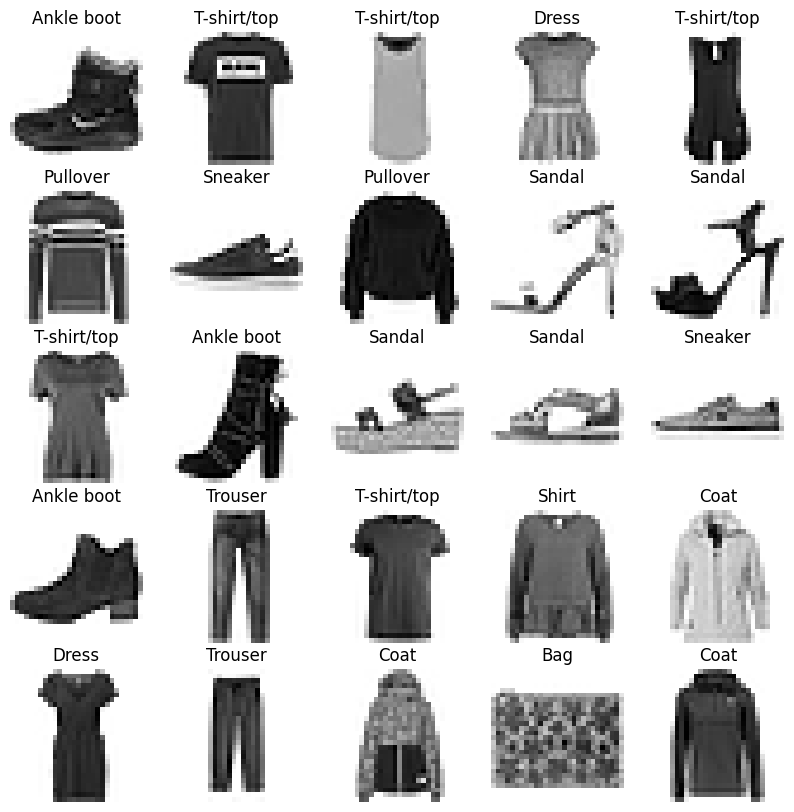

In [2]:
(
    (train_images, train_labels),
    (test_images, test_labels),
) = tf.keras.datasets.fashion_mnist.load_data()

# normalize images so values are between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
num_classes = len(class_names)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])

## Non-spiking model

Next we'll build and train the non-spiking model (this is identical to the
[original TensorFlow
example](https://www.tensorflow.org/tutorials/keras/classification)).

In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)


def train(input_model, train_x, test_x):
    input_model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    input_model.fit(train_x, train_labels, epochs=10)

    _, test_acc = input_model.evaluate(test_x, test_labels, verbose=2)

    print("\nTest accuracy:", test_acc)


train(model, train_images, test_images)

2023-01-09 21:22:15.533942: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 21:22:16.103757: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10784 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


Epoch 1/10


   1/1875 [..............................] - ETA: 18:25 - loss: 2.5454 - accuracy: 0.0625

  32/1875 [..............................] - ETA: 3s - loss: 1.3702 - accuracy: 0.5420   

  63/1875 [>.............................] - ETA: 2s - loss: 1.0965 - accuracy: 0.6285

  95/1875 [>.............................] - ETA: 2s - loss: 0.9751 - accuracy: 0.6711

 127/1875 [=>............................] - ETA: 2s - loss: 0.8903 - accuracy: 0.6976

 158/1875 [=>............................] - ETA: 2s - loss: 0.8441 - accuracy: 0.7114

 190/1875 [==>...........................] - ETA: 2s - loss: 0.8220 - accuracy: 0.7189

 222/1875 [==>...........................] - ETA: 2s - loss: 0.7884 - accuracy: 0.7304

 248/1875 [==>...........................] - ETA: 2s - loss: 0.7643 - accuracy: 0.7375

 280/1875 [===>..........................] - ETA: 2s - loss: 0.7435 - accuracy: 0.7454

 312/1875 [===>..........................] - ETA: 2s - loss: 0.7245 - accuracy: 0.7523

 344/1875 [====>.........................] - ETA: 2s - loss: 0.7082 - accuracy: 0.7583

 377/1875 [=====>........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.7635

 407/1875 [=====>........................] - ETA: 2s - loss: 0.6783 - accuracy: 0.7682

 439/1875 [======>.......................] - ETA: 2s - loss: 0.6685 - accuracy: 0.7723

 471/1875 [======>.......................] - ETA: 2s - loss: 0.6573 - accuracy: 0.7749

 503/1875 [=======>......................] - ETA: 2s - loss: 0.6480 - accuracy: 0.7770

 533/1875 [=======>......................] - ETA: 2s - loss: 0.6411 - accuracy: 0.7784

 564/1875 [========>.....................] - ETA: 2s - loss: 0.6315 - accuracy: 0.7821

 595/1875 [========>.....................] - ETA: 2s - loss: 0.6246 - accuracy: 0.7849

 626/1875 [=========>....................] - ETA: 2s - loss: 0.6164 - accuracy: 0.7868

 657/1875 [=========>....................] - ETA: 1s - loss: 0.6092 - accuracy: 0.7892

 687/1875 [=========>....................] - ETA: 1s - loss: 0.6040 - accuracy: 0.7913

 718/1875 [==========>...................] - ETA: 1s - loss: 0.5991 - accuracy: 0.7926

 749/1875 [==========>...................] - ETA: 1s - loss: 0.5933 - accuracy: 0.7939

 780/1875 [===========>..................] - ETA: 1s - loss: 0.5888 - accuracy: 0.7950

 810/1875 [===========>..................] - ETA: 1s - loss: 0.5849 - accuracy: 0.7963

 841/1875 [============>.................] - ETA: 1s - loss: 0.5814 - accuracy: 0.7972

 872/1875 [============>.................] - ETA: 1s - loss: 0.5779 - accuracy: 0.7990

 903/1875 [=============>................] - ETA: 1s - loss: 0.5745 - accuracy: 0.7999

 934/1875 [=============>................] - ETA: 1s - loss: 0.5721 - accuracy: 0.8011

 962/1875 [==============>...............] - ETA: 1s - loss: 0.5684 - accuracy: 0.8025

 993/1875 [==============>...............] - ETA: 1s - loss: 0.5646 - accuracy: 0.8042

1024/1875 [===============>..............] - ETA: 1s - loss: 0.5613 - accuracy: 0.8053

1055/1875 [===============>..............] - ETA: 1s - loss: 0.5587 - accuracy: 0.8065

1086/1875 [================>.............] - ETA: 1s - loss: 0.5553 - accuracy: 0.8075

1118/1875 [================>.............] - ETA: 1s - loss: 0.5526 - accuracy: 0.8085

1149/1875 [=================>............] - ETA: 1s - loss: 0.5494 - accuracy: 0.8096

1180/1875 [=================>............] - ETA: 1s - loss: 0.5466 - accuracy: 0.8102

1207/1875 [==================>...........] - ETA: 1s - loss: 0.5443 - accuracy: 0.8111

1234/1875 [==================>...........] - ETA: 1s - loss: 0.5414 - accuracy: 0.8123

1264/1875 [===================>..........] - ETA: 1s - loss: 0.5389 - accuracy: 0.8127

1294/1875 [===================>..........] - ETA: 0s - loss: 0.5361 - accuracy: 0.8135

1323/1875 [====================>.........] - ETA: 0s - loss: 0.5324 - accuracy: 0.8145

1353/1875 [====================>.........] - ETA: 0s - loss: 0.5299 - accuracy: 0.8152

1384/1875 [=====================>........] - ETA: 0s - loss: 0.5275 - accuracy: 0.8159

1415/1875 [=====================>........] - ETA: 0s - loss: 0.5261 - accuracy: 0.8159

1446/1875 [======================>.......] - ETA: 0s - loss: 0.5245 - accuracy: 0.8163

1477/1875 [======================>.......] - ETA: 0s - loss: 0.5235 - accuracy: 0.8167

1507/1875 [=======================>......] - ETA: 0s - loss: 0.5208 - accuracy: 0.8175

1538/1875 [=======================>......] - ETA: 0s - loss: 0.5186 - accuracy: 0.8183

1569/1875 [========================>.....] - ETA: 0s - loss: 0.5169 - accuracy: 0.8189

1599/1875 [========================>.....] - ETA: 0s - loss: 0.5148 - accuracy: 0.8196

1630/1875 [=========================>....] - ETA: 0s - loss: 0.5128 - accuracy: 0.8202

1661/1875 [=========================>....] - ETA: 0s - loss: 0.5111 - accuracy: 0.8207

1692/1875 [==========================>...] - ETA: 0s - loss: 0.5096 - accuracy: 0.8213

1722/1875 [==========================>...] - ETA: 0s - loss: 0.5078 - accuracy: 0.8218

1752/1875 [===========================>..] - ETA: 0s - loss: 0.5064 - accuracy: 0.8222

1781/1875 [===========================>..] - ETA: 0s - loss: 0.5043 - accuracy: 0.8229

1812/1875 [===========================>..] - ETA: 0s - loss: 0.5033 - accuracy: 0.8233

1842/1875 [============================>.] - ETA: 0s - loss: 0.5012 - accuracy: 0.8238

1873/1875 [============================>.] - ETA: 0s - loss: 0.5004 - accuracy: 0.8241

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5004 - accuracy: 0.8241


Epoch 2/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2725 - accuracy: 0.8750

  31/1875 [..............................] - ETA: 3s - loss: 0.4094 - accuracy: 0.8417

  62/1875 [..............................] - ETA: 3s - loss: 0.3903 - accuracy: 0.8523

  91/1875 [>.............................] - ETA: 3s - loss: 0.3876 - accuracy: 0.8558

 121/1875 [>.............................] - ETA: 2s - loss: 0.3932 - accuracy: 0.8549

 152/1875 [=>............................] - ETA: 2s - loss: 0.3949 - accuracy: 0.8561

 183/1875 [=>............................] - ETA: 2s - loss: 0.3964 - accuracy: 0.8567

 214/1875 [==>...........................] - ETA: 2s - loss: 0.3969 - accuracy: 0.8573

 245/1875 [==>...........................] - ETA: 2s - loss: 0.3981 - accuracy: 0.8569

 276/1875 [===>..........................] - ETA: 2s - loss: 0.3915 - accuracy: 0.8593

 307/1875 [===>..........................] - ETA: 2s - loss: 0.3920 - accuracy: 0.8587

 337/1875 [====>.........................] - ETA: 2s - loss: 0.3907 - accuracy: 0.8591

 368/1875 [====>.........................] - ETA: 2s - loss: 0.3910 - accuracy: 0.8589

 399/1875 [=====>........................] - ETA: 2s - loss: 0.3892 - accuracy: 0.8602

 430/1875 [=====>........................] - ETA: 2s - loss: 0.3898 - accuracy: 0.8600

 460/1875 [======>.......................] - ETA: 2s - loss: 0.3893 - accuracy: 0.8605

 491/1875 [======>.......................] - ETA: 2s - loss: 0.3907 - accuracy: 0.8601

 522/1875 [=======>......................] - ETA: 2s - loss: 0.3896 - accuracy: 0.8597

 549/1875 [=======>......................] - ETA: 2s - loss: 0.3912 - accuracy: 0.8589

 580/1875 [========>.....................] - ETA: 2s - loss: 0.3915 - accuracy: 0.8588

 611/1875 [========>.....................] - ETA: 2s - loss: 0.3904 - accuracy: 0.8589

 642/1875 [=========>....................] - ETA: 2s - loss: 0.3888 - accuracy: 0.8595

 673/1875 [=========>....................] - ETA: 1s - loss: 0.3873 - accuracy: 0.8606

 704/1875 [==========>...................] - ETA: 1s - loss: 0.3853 - accuracy: 0.8612

 735/1875 [==========>...................] - ETA: 1s - loss: 0.3844 - accuracy: 0.8613

 766/1875 [===========>..................] - ETA: 1s - loss: 0.3838 - accuracy: 0.8616

 797/1875 [===========>..................] - ETA: 1s - loss: 0.3835 - accuracy: 0.8617

 827/1875 [============>.................] - ETA: 1s - loss: 0.3850 - accuracy: 0.8612

 857/1875 [============>.................] - ETA: 1s - loss: 0.3857 - accuracy: 0.8609

 887/1875 [=============>................] - ETA: 1s - loss: 0.3847 - accuracy: 0.8611

 919/1875 [=============>................] - ETA: 1s - loss: 0.3827 - accuracy: 0.8619

 950/1875 [==============>...............] - ETA: 1s - loss: 0.3826 - accuracy: 0.8619

 981/1875 [==============>...............] - ETA: 1s - loss: 0.3827 - accuracy: 0.8618

1012/1875 [===============>..............] - ETA: 1s - loss: 0.3813 - accuracy: 0.8623

1042/1875 [===============>..............] - ETA: 1s - loss: 0.3810 - accuracy: 0.8624

1073/1875 [================>.............] - ETA: 1s - loss: 0.3803 - accuracy: 0.8624

1104/1875 [================>.............] - ETA: 1s - loss: 0.3802 - accuracy: 0.8627

1135/1875 [=================>............] - ETA: 1s - loss: 0.3799 - accuracy: 0.8631

1166/1875 [=================>............] - ETA: 1s - loss: 0.3804 - accuracy: 0.8624

1197/1875 [==================>...........] - ETA: 1s - loss: 0.3797 - accuracy: 0.8628

1228/1875 [==================>...........] - ETA: 1s - loss: 0.3783 - accuracy: 0.8632

1259/1875 [===================>..........] - ETA: 1s - loss: 0.3783 - accuracy: 0.8633

1290/1875 [===================>..........] - ETA: 0s - loss: 0.3778 - accuracy: 0.8636

1321/1875 [====================>.........] - ETA: 0s - loss: 0.3778 - accuracy: 0.8634

1352/1875 [====================>.........] - ETA: 0s - loss: 0.3786 - accuracy: 0.8634

1383/1875 [=====================>........] - ETA: 0s - loss: 0.3778 - accuracy: 0.8637

1414/1875 [=====================>........] - ETA: 0s - loss: 0.3769 - accuracy: 0.8640

1446/1875 [======================>.......] - ETA: 0s - loss: 0.3763 - accuracy: 0.8641

1476/1875 [======================>.......] - ETA: 0s - loss: 0.3761 - accuracy: 0.8640

1507/1875 [=======================>......] - ETA: 0s - loss: 0.3765 - accuracy: 0.8641

1538/1875 [=======================>......] - ETA: 0s - loss: 0.3761 - accuracy: 0.8643

1569/1875 [========================>.....] - ETA: 0s - loss: 0.3761 - accuracy: 0.8645

1600/1875 [========================>.....] - ETA: 0s - loss: 0.3754 - accuracy: 0.8648

1631/1875 [=========================>....] - ETA: 0s - loss: 0.3753 - accuracy: 0.8649

1661/1875 [=========================>....] - ETA: 0s - loss: 0.3746 - accuracy: 0.8652

1693/1875 [==========================>...] - ETA: 0s - loss: 0.3746 - accuracy: 0.8653

1724/1875 [==========================>...] - ETA: 0s - loss: 0.3740 - accuracy: 0.8654

1755/1875 [===========================>..] - ETA: 0s - loss: 0.3735 - accuracy: 0.8657

1786/1875 [===========================>..] - ETA: 0s - loss: 0.3730 - accuracy: 0.8659

1817/1875 [============================>.] - ETA: 0s - loss: 0.3733 - accuracy: 0.8658

1848/1875 [============================>.] - ETA: 0s - loss: 0.3723 - accuracy: 0.8661

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3723 - accuracy: 0.8660


Epoch 3/10


   1/1875 [..............................] - ETA: 4s - loss: 0.4462 - accuracy: 0.9375

  32/1875 [..............................] - ETA: 3s - loss: 0.3278 - accuracy: 0.8906

  63/1875 [>.............................] - ETA: 2s - loss: 0.3500 - accuracy: 0.8770

  95/1875 [>.............................] - ETA: 2s - loss: 0.3403 - accuracy: 0.8813

 124/1875 [>.............................] - ETA: 2s - loss: 0.3369 - accuracy: 0.8833

 155/1875 [=>............................] - ETA: 2s - loss: 0.3336 - accuracy: 0.8833

 185/1875 [=>............................] - ETA: 2s - loss: 0.3375 - accuracy: 0.8804

 216/1875 [==>...........................] - ETA: 2s - loss: 0.3360 - accuracy: 0.8789

 247/1875 [==>...........................] - ETA: 2s - loss: 0.3351 - accuracy: 0.8801

 278/1875 [===>..........................] - ETA: 2s - loss: 0.3435 - accuracy: 0.8771

 309/1875 [===>..........................] - ETA: 2s - loss: 0.3452 - accuracy: 0.8768

 340/1875 [====>.........................] - ETA: 2s - loss: 0.3482 - accuracy: 0.8759

 372/1875 [====>.........................] - ETA: 2s - loss: 0.3502 - accuracy: 0.8745

 398/1875 [=====>........................] - ETA: 2s - loss: 0.3478 - accuracy: 0.8752

 429/1875 [=====>........................] - ETA: 2s - loss: 0.3471 - accuracy: 0.8749

 459/1875 [======>.......................] - ETA: 2s - loss: 0.3435 - accuracy: 0.8761

 490/1875 [======>.......................] - ETA: 2s - loss: 0.3399 - accuracy: 0.8772

 521/1875 [=======>......................] - ETA: 2s - loss: 0.3402 - accuracy: 0.8772

 552/1875 [=======>......................] - ETA: 2s - loss: 0.3401 - accuracy: 0.8772

 581/1875 [========>.....................] - ETA: 2s - loss: 0.3412 - accuracy: 0.8763

 612/1875 [========>.....................] - ETA: 2s - loss: 0.3413 - accuracy: 0.8763

 643/1875 [=========>....................] - ETA: 2s - loss: 0.3411 - accuracy: 0.8762

 674/1875 [=========>....................] - ETA: 2s - loss: 0.3427 - accuracy: 0.8754

 704/1875 [==========>...................] - ETA: 1s - loss: 0.3447 - accuracy: 0.8746

 734/1875 [==========>...................] - ETA: 1s - loss: 0.3439 - accuracy: 0.8744

 765/1875 [===========>..................] - ETA: 1s - loss: 0.3413 - accuracy: 0.8752

 796/1875 [===========>..................] - ETA: 1s - loss: 0.3389 - accuracy: 0.8764

 827/1875 [============>.................] - ETA: 1s - loss: 0.3387 - accuracy: 0.8766

 858/1875 [============>.................] - ETA: 1s - loss: 0.3401 - accuracy: 0.8759

 887/1875 [=============>................] - ETA: 1s - loss: 0.3387 - accuracy: 0.8765

 918/1875 [=============>................] - ETA: 1s - loss: 0.3382 - accuracy: 0.8765

 947/1875 [==============>...............] - ETA: 1s - loss: 0.3386 - accuracy: 0.8766

 978/1875 [==============>...............] - ETA: 1s - loss: 0.3368 - accuracy: 0.8772

1009/1875 [===============>..............] - ETA: 1s - loss: 0.3369 - accuracy: 0.8773

1040/1875 [===============>..............] - ETA: 1s - loss: 0.3372 - accuracy: 0.8773

1071/1875 [================>.............] - ETA: 1s - loss: 0.3372 - accuracy: 0.8775

1102/1875 [================>.............] - ETA: 1s - loss: 0.3378 - accuracy: 0.8773

1133/1875 [=================>............] - ETA: 1s - loss: 0.3366 - accuracy: 0.8775

1163/1875 [=================>............] - ETA: 1s - loss: 0.3366 - accuracy: 0.8776

1194/1875 [==================>...........] - ETA: 1s - loss: 0.3371 - accuracy: 0.8773

1225/1875 [==================>...........] - ETA: 1s - loss: 0.3367 - accuracy: 0.8773

1255/1875 [===================>..........] - ETA: 1s - loss: 0.3369 - accuracy: 0.8771

1285/1875 [===================>..........] - ETA: 0s - loss: 0.3368 - accuracy: 0.8771

1314/1875 [====================>.........] - ETA: 0s - loss: 0.3365 - accuracy: 0.8774

1345/1875 [====================>.........] - ETA: 0s - loss: 0.3369 - accuracy: 0.8772

1375/1875 [=====================>........] - ETA: 0s - loss: 0.3371 - accuracy: 0.8772

1406/1875 [=====================>........] - ETA: 0s - loss: 0.3383 - accuracy: 0.8768

1436/1875 [=====================>........] - ETA: 0s - loss: 0.3385 - accuracy: 0.8769

1467/1875 [======================>.......] - ETA: 0s - loss: 0.3381 - accuracy: 0.8771

1497/1875 [======================>.......] - ETA: 0s - loss: 0.3373 - accuracy: 0.8774

1528/1875 [=======================>......] - ETA: 0s - loss: 0.3369 - accuracy: 0.8776

1557/1875 [=======================>......] - ETA: 0s - loss: 0.3366 - accuracy: 0.8778

1587/1875 [========================>.....] - ETA: 0s - loss: 0.3368 - accuracy: 0.8777

1616/1875 [========================>.....] - ETA: 0s - loss: 0.3369 - accuracy: 0.8776

1645/1875 [=========================>....] - ETA: 0s - loss: 0.3368 - accuracy: 0.8777

1675/1875 [=========================>....] - ETA: 0s - loss: 0.3363 - accuracy: 0.8777

1706/1875 [==========================>...] - ETA: 0s - loss: 0.3358 - accuracy: 0.8779

1736/1875 [==========================>...] - ETA: 0s - loss: 0.3358 - accuracy: 0.8778

1767/1875 [===========================>..] - ETA: 0s - loss: 0.3358 - accuracy: 0.8776

1796/1875 [===========================>..] - ETA: 0s - loss: 0.3364 - accuracy: 0.8774

1828/1875 [============================>.] - ETA: 0s - loss: 0.3350 - accuracy: 0.8779

1858/1875 [============================>.] - ETA: 0s - loss: 0.3341 - accuracy: 0.8780

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3341 - accuracy: 0.8780


Epoch 4/10


   1/1875 [..............................] - ETA: 4s - loss: 0.3634 - accuracy: 0.8750

  32/1875 [..............................] - ETA: 3s - loss: 0.3197 - accuracy: 0.8857

  61/1875 [..............................] - ETA: 3s - loss: 0.3214 - accuracy: 0.8888

  91/1875 [>.............................] - ETA: 3s - loss: 0.3206 - accuracy: 0.8884

 122/1875 [>.............................] - ETA: 2s - loss: 0.3183 - accuracy: 0.8893

 152/1875 [=>............................] - ETA: 2s - loss: 0.3281 - accuracy: 0.8849

 182/1875 [=>............................] - ETA: 2s - loss: 0.3227 - accuracy: 0.8882

 212/1875 [==>...........................] - ETA: 2s - loss: 0.3133 - accuracy: 0.8908

 243/1875 [==>...........................] - ETA: 2s - loss: 0.3133 - accuracy: 0.8911

 273/1875 [===>..........................] - ETA: 2s - loss: 0.3143 - accuracy: 0.8898

 302/1875 [===>..........................] - ETA: 2s - loss: 0.3152 - accuracy: 0.8893

 332/1875 [====>.........................] - ETA: 2s - loss: 0.3139 - accuracy: 0.8891

 363/1875 [====>.........................] - ETA: 2s - loss: 0.3179 - accuracy: 0.8869

 393/1875 [=====>........................] - ETA: 2s - loss: 0.3162 - accuracy: 0.8875

 424/1875 [=====>........................] - ETA: 2s - loss: 0.3152 - accuracy: 0.8878

 455/1875 [======>.......................] - ETA: 2s - loss: 0.3169 - accuracy: 0.8864

 484/1875 [======>.......................] - ETA: 2s - loss: 0.3156 - accuracy: 0.8868

 514/1875 [=======>......................] - ETA: 2s - loss: 0.3146 - accuracy: 0.8869

 545/1875 [=======>......................] - ETA: 2s - loss: 0.3160 - accuracy: 0.8856

 574/1875 [========>.....................] - ETA: 2s - loss: 0.3131 - accuracy: 0.8863

 604/1875 [========>.....................] - ETA: 2s - loss: 0.3131 - accuracy: 0.8862

 634/1875 [=========>....................] - ETA: 2s - loss: 0.3137 - accuracy: 0.8858

 664/1875 [=========>....................] - ETA: 2s - loss: 0.3148 - accuracy: 0.8862

 694/1875 [==========>...................] - ETA: 1s - loss: 0.3140 - accuracy: 0.8863

 725/1875 [==========>...................] - ETA: 1s - loss: 0.3135 - accuracy: 0.8866

 754/1875 [===========>..................] - ETA: 1s - loss: 0.3141 - accuracy: 0.8866

 784/1875 [===========>..................] - ETA: 1s - loss: 0.3147 - accuracy: 0.8862

 813/1875 [============>.................] - ETA: 1s - loss: 0.3150 - accuracy: 0.8860

 844/1875 [============>.................] - ETA: 1s - loss: 0.3137 - accuracy: 0.8867

 874/1875 [============>.................] - ETA: 1s - loss: 0.3132 - accuracy: 0.8870

 902/1875 [=============>................] - ETA: 1s - loss: 0.3131 - accuracy: 0.8870

 930/1875 [=============>................] - ETA: 1s - loss: 0.3126 - accuracy: 0.8873

 960/1875 [==============>...............] - ETA: 1s - loss: 0.3133 - accuracy: 0.8872

 989/1875 [==============>...............] - ETA: 1s - loss: 0.3124 - accuracy: 0.8874

1020/1875 [===============>..............] - ETA: 1s - loss: 0.3121 - accuracy: 0.8872

1051/1875 [===============>..............] - ETA: 1s - loss: 0.3117 - accuracy: 0.8871

1081/1875 [================>.............] - ETA: 1s - loss: 0.3114 - accuracy: 0.8873

1111/1875 [================>.............] - ETA: 1s - loss: 0.3111 - accuracy: 0.8874

1142/1875 [=================>............] - ETA: 1s - loss: 0.3122 - accuracy: 0.8869

1172/1875 [=================>............] - ETA: 1s - loss: 0.3111 - accuracy: 0.8874

1203/1875 [==================>...........] - ETA: 1s - loss: 0.3110 - accuracy: 0.8870

1233/1875 [==================>...........] - ETA: 1s - loss: 0.3103 - accuracy: 0.8872

1261/1875 [===================>..........] - ETA: 1s - loss: 0.3096 - accuracy: 0.8876

1291/1875 [===================>..........] - ETA: 0s - loss: 0.3088 - accuracy: 0.8878

1320/1875 [====================>.........] - ETA: 0s - loss: 0.3092 - accuracy: 0.8877

1350/1875 [====================>.........] - ETA: 0s - loss: 0.3089 - accuracy: 0.8877

1380/1875 [=====================>........] - ETA: 0s - loss: 0.3098 - accuracy: 0.8874

1410/1875 [=====================>........] - ETA: 0s - loss: 0.3100 - accuracy: 0.8875

1439/1875 [======================>.......] - ETA: 0s - loss: 0.3100 - accuracy: 0.8875

1465/1875 [======================>.......] - ETA: 0s - loss: 0.3097 - accuracy: 0.8877

1495/1875 [======================>.......] - ETA: 0s - loss: 0.3098 - accuracy: 0.8876

1525/1875 [=======================>......] - ETA: 0s - loss: 0.3096 - accuracy: 0.8878

1554/1875 [=======================>......] - ETA: 0s - loss: 0.3094 - accuracy: 0.8877

1585/1875 [========================>.....] - ETA: 0s - loss: 0.3097 - accuracy: 0.8876

1614/1875 [========================>.....] - ETA: 0s - loss: 0.3097 - accuracy: 0.8876

1645/1875 [=========================>....] - ETA: 0s - loss: 0.3085 - accuracy: 0.8879

1673/1875 [=========================>....] - ETA: 0s - loss: 0.3086 - accuracy: 0.8878

1703/1875 [==========================>...] - ETA: 0s - loss: 0.3093 - accuracy: 0.8876

1733/1875 [==========================>...] - ETA: 0s - loss: 0.3096 - accuracy: 0.8877

1764/1875 [===========================>..] - ETA: 0s - loss: 0.3098 - accuracy: 0.8876

1794/1875 [===========================>..] - ETA: 0s - loss: 0.3099 - accuracy: 0.8876

1826/1875 [============================>.] - ETA: 0s - loss: 0.3099 - accuracy: 0.8875

1852/1875 [============================>.] - ETA: 0s - loss: 0.3097 - accuracy: 0.8874

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3095 - accuracy: 0.8874


Epoch 5/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1357 - accuracy: 0.9375

  32/1875 [..............................] - ETA: 3s - loss: 0.3128 - accuracy: 0.8799

  63/1875 [>.............................] - ETA: 2s - loss: 0.3013 - accuracy: 0.8914

  93/1875 [>.............................] - ETA: 2s - loss: 0.2945 - accuracy: 0.8942

 124/1875 [>.............................] - ETA: 2s - loss: 0.2959 - accuracy: 0.8919

 153/1875 [=>............................] - ETA: 2s - loss: 0.2937 - accuracy: 0.8928

 183/1875 [=>............................] - ETA: 2s - loss: 0.2893 - accuracy: 0.8943

 213/1875 [==>...........................] - ETA: 2s - loss: 0.2901 - accuracy: 0.8951

 242/1875 [==>...........................] - ETA: 2s - loss: 0.2914 - accuracy: 0.8962

 272/1875 [===>..........................] - ETA: 2s - loss: 0.2941 - accuracy: 0.8942

 303/1875 [===>..........................] - ETA: 2s - loss: 0.2935 - accuracy: 0.8936

 331/1875 [====>.........................] - ETA: 2s - loss: 0.2954 - accuracy: 0.8928

 362/1875 [====>.........................] - ETA: 2s - loss: 0.2939 - accuracy: 0.8934

 393/1875 [=====>........................] - ETA: 2s - loss: 0.2936 - accuracy: 0.8935

 424/1875 [=====>........................] - ETA: 2s - loss: 0.2950 - accuracy: 0.8934

 454/1875 [======>.......................] - ETA: 2s - loss: 0.2939 - accuracy: 0.8943

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2921 - accuracy: 0.8947

 513/1875 [=======>......................] - ETA: 2s - loss: 0.2919 - accuracy: 0.8950

 543/1875 [=======>......................] - ETA: 2s - loss: 0.2936 - accuracy: 0.8943

 573/1875 [========>.....................] - ETA: 2s - loss: 0.2949 - accuracy: 0.8934

 603/1875 [========>.....................] - ETA: 2s - loss: 0.2935 - accuracy: 0.8940

 632/1875 [=========>....................] - ETA: 2s - loss: 0.2914 - accuracy: 0.8943

 663/1875 [=========>....................] - ETA: 2s - loss: 0.2923 - accuracy: 0.8937

 691/1875 [==========>...................] - ETA: 2s - loss: 0.2925 - accuracy: 0.8937

 722/1875 [==========>...................] - ETA: 1s - loss: 0.2919 - accuracy: 0.8940

 752/1875 [===========>..................] - ETA: 1s - loss: 0.2927 - accuracy: 0.8938

 778/1875 [===========>..................] - ETA: 1s - loss: 0.2934 - accuracy: 0.8935

 806/1875 [===========>..................] - ETA: 1s - loss: 0.2929 - accuracy: 0.8940

 837/1875 [============>.................] - ETA: 1s - loss: 0.2919 - accuracy: 0.8944

 865/1875 [============>.................] - ETA: 1s - loss: 0.2915 - accuracy: 0.8941

 896/1875 [=============>................] - ETA: 1s - loss: 0.2905 - accuracy: 0.8940

 925/1875 [=============>................] - ETA: 1s - loss: 0.2907 - accuracy: 0.8936

 956/1875 [==============>...............] - ETA: 1s - loss: 0.2913 - accuracy: 0.8936

 985/1875 [==============>...............] - ETA: 1s - loss: 0.2918 - accuracy: 0.8935

1016/1875 [===============>..............] - ETA: 1s - loss: 0.2918 - accuracy: 0.8936

1047/1875 [===============>..............] - ETA: 1s - loss: 0.2909 - accuracy: 0.8939

1078/1875 [================>.............] - ETA: 1s - loss: 0.2913 - accuracy: 0.8938

1108/1875 [================>.............] - ETA: 1s - loss: 0.2916 - accuracy: 0.8937

1138/1875 [=================>............] - ETA: 1s - loss: 0.2919 - accuracy: 0.8933

1167/1875 [=================>............] - ETA: 1s - loss: 0.2916 - accuracy: 0.8934

1198/1875 [==================>...........] - ETA: 1s - loss: 0.2911 - accuracy: 0.8936

1227/1875 [==================>...........] - ETA: 1s - loss: 0.2915 - accuracy: 0.8937

1258/1875 [===================>..........] - ETA: 1s - loss: 0.2925 - accuracy: 0.8934

1289/1875 [===================>..........] - ETA: 0s - loss: 0.2923 - accuracy: 0.8933

1320/1875 [====================>.........] - ETA: 0s - loss: 0.2915 - accuracy: 0.8938

1350/1875 [====================>.........] - ETA: 0s - loss: 0.2924 - accuracy: 0.8933

1376/1875 [=====================>........] - ETA: 0s - loss: 0.2937 - accuracy: 0.8927

1405/1875 [=====================>........] - ETA: 0s - loss: 0.2936 - accuracy: 0.8927

1435/1875 [=====================>........] - ETA: 0s - loss: 0.2935 - accuracy: 0.8926

1465/1875 [======================>.......] - ETA: 0s - loss: 0.2931 - accuracy: 0.8927

1495/1875 [======================>.......] - ETA: 0s - loss: 0.2930 - accuracy: 0.8928

1526/1875 [=======================>......] - ETA: 0s - loss: 0.2932 - accuracy: 0.8929

1557/1875 [=======================>......] - ETA: 0s - loss: 0.2927 - accuracy: 0.8930

1587/1875 [========================>.....] - ETA: 0s - loss: 0.2926 - accuracy: 0.8932

1617/1875 [========================>.....] - ETA: 0s - loss: 0.2929 - accuracy: 0.8931

1647/1875 [=========================>....] - ETA: 0s - loss: 0.2937 - accuracy: 0.8928

1678/1875 [=========================>....] - ETA: 0s - loss: 0.2935 - accuracy: 0.8930

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2938 - accuracy: 0.8929

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2937 - accuracy: 0.8931

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2943 - accuracy: 0.8928

1797/1875 [===========================>..] - ETA: 0s - loss: 0.2941 - accuracy: 0.8927

1828/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8928

1857/1875 [============================>.] - ETA: 0s - loss: 0.2939 - accuracy: 0.8924

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2937 - accuracy: 0.8925


Epoch 6/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1397 - accuracy: 0.9688

  31/1875 [..............................] - ETA: 3s - loss: 0.2882 - accuracy: 0.9042

  62/1875 [..............................] - ETA: 3s - loss: 0.2805 - accuracy: 0.9047

  92/1875 [>.............................] - ETA: 2s - loss: 0.2799 - accuracy: 0.9042

 122/1875 [>.............................] - ETA: 2s - loss: 0.2802 - accuracy: 0.9009

 152/1875 [=>............................] - ETA: 2s - loss: 0.2773 - accuracy: 0.9034

 181/1875 [=>............................] - ETA: 2s - loss: 0.2806 - accuracy: 0.9006

 212/1875 [==>...........................] - ETA: 2s - loss: 0.2791 - accuracy: 0.9005

 241/1875 [==>...........................] - ETA: 2s - loss: 0.2780 - accuracy: 0.9013

 271/1875 [===>..........................] - ETA: 2s - loss: 0.2787 - accuracy: 0.9003

 302/1875 [===>..........................] - ETA: 2s - loss: 0.2795 - accuracy: 0.8995

 333/1875 [====>.........................] - ETA: 2s - loss: 0.2812 - accuracy: 0.8977

 362/1875 [====>.........................] - ETA: 2s - loss: 0.2833 - accuracy: 0.8975

 392/1875 [=====>........................] - ETA: 2s - loss: 0.2859 - accuracy: 0.8957

 423/1875 [=====>........................] - ETA: 2s - loss: 0.2867 - accuracy: 0.8954

 453/1875 [======>.......................] - ETA: 2s - loss: 0.2860 - accuracy: 0.8956

 484/1875 [======>.......................] - ETA: 2s - loss: 0.2857 - accuracy: 0.8952

 514/1875 [=======>......................] - ETA: 2s - loss: 0.2869 - accuracy: 0.8946

 545/1875 [=======>......................] - ETA: 2s - loss: 0.2863 - accuracy: 0.8946

 573/1875 [========>.....................] - ETA: 2s - loss: 0.2862 - accuracy: 0.8946

 605/1875 [========>.....................] - ETA: 2s - loss: 0.2861 - accuracy: 0.8944

 634/1875 [=========>....................] - ETA: 2s - loss: 0.2850 - accuracy: 0.8948

 664/1875 [=========>....................] - ETA: 2s - loss: 0.2862 - accuracy: 0.8947

 693/1875 [==========>...................] - ETA: 1s - loss: 0.2856 - accuracy: 0.8951

 724/1875 [==========>...................] - ETA: 1s - loss: 0.2853 - accuracy: 0.8951

 754/1875 [===========>..................] - ETA: 1s - loss: 0.2850 - accuracy: 0.8947

 786/1875 [===========>..................] - ETA: 1s - loss: 0.2835 - accuracy: 0.8948

 816/1875 [============>.................] - ETA: 1s - loss: 0.2810 - accuracy: 0.8960

 847/1875 [============>.................] - ETA: 1s - loss: 0.2804 - accuracy: 0.8966

 875/1875 [=============>................] - ETA: 1s - loss: 0.2796 - accuracy: 0.8969

 906/1875 [=============>................] - ETA: 1s - loss: 0.2805 - accuracy: 0.8965

 936/1875 [=============>................] - ETA: 1s - loss: 0.2793 - accuracy: 0.8971

 966/1875 [==============>...............] - ETA: 1s - loss: 0.2800 - accuracy: 0.8966

 993/1875 [==============>...............] - ETA: 1s - loss: 0.2798 - accuracy: 0.8966

1024/1875 [===============>..............] - ETA: 1s - loss: 0.2793 - accuracy: 0.8968

1052/1875 [===============>..............] - ETA: 1s - loss: 0.2789 - accuracy: 0.8968

1083/1875 [================>.............] - ETA: 1s - loss: 0.2780 - accuracy: 0.8971

1107/1875 [================>.............] - ETA: 1s - loss: 0.2777 - accuracy: 0.8973

1138/1875 [=================>............] - ETA: 1s - loss: 0.2781 - accuracy: 0.8971

1168/1875 [=================>............] - ETA: 1s - loss: 0.2787 - accuracy: 0.8968

1199/1875 [==================>...........] - ETA: 1s - loss: 0.2783 - accuracy: 0.8969

1228/1875 [==================>...........] - ETA: 1s - loss: 0.2779 - accuracy: 0.8971

1259/1875 [===================>..........] - ETA: 1s - loss: 0.2778 - accuracy: 0.8973

1289/1875 [===================>..........] - ETA: 0s - loss: 0.2777 - accuracy: 0.8975

1320/1875 [====================>.........] - ETA: 0s - loss: 0.2775 - accuracy: 0.8975

1349/1875 [====================>.........] - ETA: 0s - loss: 0.2777 - accuracy: 0.8974

1379/1875 [=====================>........] - ETA: 0s - loss: 0.2773 - accuracy: 0.8976

1410/1875 [=====================>........] - ETA: 0s - loss: 0.2780 - accuracy: 0.8975

1440/1875 [======================>.......] - ETA: 0s - loss: 0.2781 - accuracy: 0.8974

1470/1875 [======================>.......] - ETA: 0s - loss: 0.2769 - accuracy: 0.8977

1501/1875 [=======================>......] - ETA: 0s - loss: 0.2769 - accuracy: 0.8978

1530/1875 [=======================>......] - ETA: 0s - loss: 0.2770 - accuracy: 0.8977

1561/1875 [=======================>......] - ETA: 0s - loss: 0.2778 - accuracy: 0.8976

1591/1875 [========================>.....] - ETA: 0s - loss: 0.2774 - accuracy: 0.8977

1621/1875 [========================>.....] - ETA: 0s - loss: 0.2768 - accuracy: 0.8979

1650/1875 [=========================>....] - ETA: 0s - loss: 0.2766 - accuracy: 0.8979

1680/1875 [=========================>....] - ETA: 0s - loss: 0.2769 - accuracy: 0.8977

1710/1875 [==========================>...] - ETA: 0s - loss: 0.2769 - accuracy: 0.8978

1739/1875 [==========================>...] - ETA: 0s - loss: 0.2772 - accuracy: 0.8976

1770/1875 [===========================>..] - ETA: 0s - loss: 0.2782 - accuracy: 0.8972

1797/1875 [===========================>..] - ETA: 0s - loss: 0.2780 - accuracy: 0.8971

1827/1875 [============================>.] - ETA: 0s - loss: 0.2781 - accuracy: 0.8971

1855/1875 [============================>.] - ETA: 0s - loss: 0.2784 - accuracy: 0.8969

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2781 - accuracy: 0.8970


Epoch 7/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2743 - accuracy: 0.8750

  32/1875 [..............................] - ETA: 3s - loss: 0.2445 - accuracy: 0.9053

  60/1875 [..............................] - ETA: 3s - loss: 0.2499 - accuracy: 0.9068

  92/1875 [>.............................] - ETA: 3s - loss: 0.2556 - accuracy: 0.9042

 121/1875 [>.............................] - ETA: 2s - loss: 0.2594 - accuracy: 0.9021

 152/1875 [=>............................] - ETA: 2s - loss: 0.2632 - accuracy: 0.9011

 183/1875 [=>............................] - ETA: 2s - loss: 0.2600 - accuracy: 0.9011

 213/1875 [==>...........................] - ETA: 2s - loss: 0.2590 - accuracy: 0.9008

 243/1875 [==>...........................] - ETA: 2s - loss: 0.2624 - accuracy: 0.8996

 273/1875 [===>..........................] - ETA: 2s - loss: 0.2643 - accuracy: 0.8989

 303/1875 [===>..........................] - ETA: 2s - loss: 0.2654 - accuracy: 0.8995

 332/1875 [====>.........................] - ETA: 2s - loss: 0.2644 - accuracy: 0.9000

 362/1875 [====>.........................] - ETA: 2s - loss: 0.2673 - accuracy: 0.8987

 393/1875 [=====>........................] - ETA: 2s - loss: 0.2670 - accuracy: 0.8995

 424/1875 [=====>........................] - ETA: 2s - loss: 0.2679 - accuracy: 0.8993

 454/1875 [======>.......................] - ETA: 2s - loss: 0.2690 - accuracy: 0.8993

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2688 - accuracy: 0.8994

 515/1875 [=======>......................] - ETA: 2s - loss: 0.2680 - accuracy: 0.8996

 540/1875 [=======>......................] - ETA: 2s - loss: 0.2673 - accuracy: 0.9005

 569/1875 [========>.....................] - ETA: 2s - loss: 0.2677 - accuracy: 0.9000

 600/1875 [========>.....................] - ETA: 2s - loss: 0.2666 - accuracy: 0.9009

 630/1875 [=========>....................] - ETA: 2s - loss: 0.2673 - accuracy: 0.9000

 658/1875 [=========>....................] - ETA: 2s - loss: 0.2683 - accuracy: 0.8998

 688/1875 [==========>...................] - ETA: 2s - loss: 0.2684 - accuracy: 0.9000

 719/1875 [==========>...................] - ETA: 1s - loss: 0.2668 - accuracy: 0.9007

 749/1875 [==========>...................] - ETA: 1s - loss: 0.2667 - accuracy: 0.9004

 779/1875 [===========>..................] - ETA: 1s - loss: 0.2669 - accuracy: 0.9002

 807/1875 [===========>..................] - ETA: 1s - loss: 0.2668 - accuracy: 0.9007

 838/1875 [============>.................] - ETA: 1s - loss: 0.2660 - accuracy: 0.9012

 869/1875 [============>.................] - ETA: 1s - loss: 0.2657 - accuracy: 0.9015

 899/1875 [=============>................] - ETA: 1s - loss: 0.2662 - accuracy: 0.9014

 929/1875 [=============>................] - ETA: 1s - loss: 0.2662 - accuracy: 0.9012

 960/1875 [==============>...............] - ETA: 1s - loss: 0.2652 - accuracy: 0.9015

 990/1875 [==============>...............] - ETA: 1s - loss: 0.2642 - accuracy: 0.9018

1020/1875 [===============>..............] - ETA: 1s - loss: 0.2643 - accuracy: 0.9019

1049/1875 [===============>..............] - ETA: 1s - loss: 0.2635 - accuracy: 0.9021

1080/1875 [================>.............] - ETA: 1s - loss: 0.2634 - accuracy: 0.9020

1110/1875 [================>.............] - ETA: 1s - loss: 0.2644 - accuracy: 0.9014

1141/1875 [=================>............] - ETA: 1s - loss: 0.2656 - accuracy: 0.9009

1171/1875 [=================>............] - ETA: 1s - loss: 0.2652 - accuracy: 0.9010

1202/1875 [==================>...........] - ETA: 1s - loss: 0.2644 - accuracy: 0.9011

1231/1875 [==================>...........] - ETA: 1s - loss: 0.2647 - accuracy: 0.9011

1261/1875 [===================>..........] - ETA: 1s - loss: 0.2647 - accuracy: 0.9009

1291/1875 [===================>..........] - ETA: 0s - loss: 0.2642 - accuracy: 0.9011

1321/1875 [====================>.........] - ETA: 0s - loss: 0.2642 - accuracy: 0.9009

1352/1875 [====================>.........] - ETA: 0s - loss: 0.2643 - accuracy: 0.9007

1383/1875 [=====================>........] - ETA: 0s - loss: 0.2653 - accuracy: 0.9007

1411/1875 [=====================>........] - ETA: 0s - loss: 0.2657 - accuracy: 0.9005

1441/1875 [======================>.......] - ETA: 0s - loss: 0.2658 - accuracy: 0.9005

1470/1875 [======================>.......] - ETA: 0s - loss: 0.2661 - accuracy: 0.9002

1501/1875 [=======================>......] - ETA: 0s - loss: 0.2664 - accuracy: 0.8999

1529/1875 [=======================>......] - ETA: 0s - loss: 0.2662 - accuracy: 0.9001

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2663 - accuracy: 0.9001

1589/1875 [========================>.....] - ETA: 0s - loss: 0.2666 - accuracy: 0.9000

1619/1875 [========================>.....] - ETA: 0s - loss: 0.2667 - accuracy: 0.8998

1649/1875 [=========================>....] - ETA: 0s - loss: 0.2661 - accuracy: 0.9001

1680/1875 [=========================>....] - ETA: 0s - loss: 0.2663 - accuracy: 0.9003

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2662 - accuracy: 0.9005

1740/1875 [==========================>...] - ETA: 0s - loss: 0.2667 - accuracy: 0.9002

1770/1875 [===========================>..] - ETA: 0s - loss: 0.2666 - accuracy: 0.9003

1801/1875 [===========================>..] - ETA: 0s - loss: 0.2674 - accuracy: 0.8999

1831/1875 [============================>.] - ETA: 0s - loss: 0.2670 - accuracy: 0.9001

1861/1875 [============================>.] - ETA: 0s - loss: 0.2674 - accuracy: 0.9001

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9003


Epoch 8/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2610 - accuracy: 0.8750

  32/1875 [..............................] - ETA: 3s - loss: 0.2330 - accuracy: 0.9092

  62/1875 [..............................] - ETA: 3s - loss: 0.2432 - accuracy: 0.9062

  93/1875 [>.............................] - ETA: 2s - loss: 0.2449 - accuracy: 0.9069

 121/1875 [>.............................] - ETA: 2s - loss: 0.2433 - accuracy: 0.9026

 152/1875 [=>............................] - ETA: 2s - loss: 0.2508 - accuracy: 0.9032

 178/1875 [=>............................] - ETA: 2s - loss: 0.2423 - accuracy: 0.9062

 209/1875 [==>...........................] - ETA: 2s - loss: 0.2419 - accuracy: 0.9058

 239/1875 [==>...........................] - ETA: 2s - loss: 0.2452 - accuracy: 0.9049

 269/1875 [===>..........................] - ETA: 2s - loss: 0.2466 - accuracy: 0.9046

 299/1875 [===>..........................] - ETA: 2s - loss: 0.2484 - accuracy: 0.9047

 330/1875 [====>.........................] - ETA: 2s - loss: 0.2467 - accuracy: 0.9059

 359/1875 [====>.........................] - ETA: 2s - loss: 0.2488 - accuracy: 0.9051

 390/1875 [=====>........................] - ETA: 2s - loss: 0.2492 - accuracy: 0.9054

 420/1875 [=====>........................] - ETA: 2s - loss: 0.2502 - accuracy: 0.9048

 450/1875 [======>.......................] - ETA: 2s - loss: 0.2489 - accuracy: 0.9056

 479/1875 [======>.......................] - ETA: 2s - loss: 0.2468 - accuracy: 0.9065

 510/1875 [=======>......................] - ETA: 2s - loss: 0.2476 - accuracy: 0.9066

 538/1875 [=======>......................] - ETA: 2s - loss: 0.2464 - accuracy: 0.9069

 568/1875 [========>.....................] - ETA: 2s - loss: 0.2463 - accuracy: 0.9071

 595/1875 [========>.....................] - ETA: 2s - loss: 0.2472 - accuracy: 0.9072

 625/1875 [=========>....................] - ETA: 2s - loss: 0.2494 - accuracy: 0.9068

 655/1875 [=========>....................] - ETA: 2s - loss: 0.2493 - accuracy: 0.9069

 686/1875 [=========>....................] - ETA: 2s - loss: 0.2508 - accuracy: 0.9067

 714/1875 [==========>...................] - ETA: 1s - loss: 0.2508 - accuracy: 0.9067

 744/1875 [==========>...................] - ETA: 1s - loss: 0.2515 - accuracy: 0.9064

 774/1875 [===========>..................] - ETA: 1s - loss: 0.2505 - accuracy: 0.9070

 805/1875 [===========>..................] - ETA: 1s - loss: 0.2512 - accuracy: 0.9067

 835/1875 [============>.................] - ETA: 1s - loss: 0.2508 - accuracy: 0.9067

 866/1875 [============>.................] - ETA: 1s - loss: 0.2519 - accuracy: 0.9061

 896/1875 [=============>................] - ETA: 1s - loss: 0.2525 - accuracy: 0.9058

 926/1875 [=============>................] - ETA: 1s - loss: 0.2528 - accuracy: 0.9057

 956/1875 [==============>...............] - ETA: 1s - loss: 0.2543 - accuracy: 0.9053

 987/1875 [==============>...............] - ETA: 1s - loss: 0.2555 - accuracy: 0.9050

1017/1875 [===============>..............] - ETA: 1s - loss: 0.2576 - accuracy: 0.9044

1047/1875 [===============>..............] - ETA: 1s - loss: 0.2586 - accuracy: 0.9039

1077/1875 [================>.............] - ETA: 1s - loss: 0.2587 - accuracy: 0.9038

1107/1875 [================>.............] - ETA: 1s - loss: 0.2585 - accuracy: 0.9035

1136/1875 [=================>............] - ETA: 1s - loss: 0.2588 - accuracy: 0.9037

1166/1875 [=================>............] - ETA: 1s - loss: 0.2586 - accuracy: 0.9040

1196/1875 [==================>...........] - ETA: 1s - loss: 0.2587 - accuracy: 0.9041

1225/1875 [==================>...........] - ETA: 1s - loss: 0.2591 - accuracy: 0.9040

1256/1875 [===================>..........] - ETA: 1s - loss: 0.2593 - accuracy: 0.9039

1282/1875 [===================>..........] - ETA: 1s - loss: 0.2591 - accuracy: 0.9041

1312/1875 [===================>..........] - ETA: 0s - loss: 0.2584 - accuracy: 0.9040

1340/1875 [====================>.........] - ETA: 0s - loss: 0.2583 - accuracy: 0.9042

1370/1875 [====================>.........] - ETA: 0s - loss: 0.2583 - accuracy: 0.9040

1398/1875 [=====================>........] - ETA: 0s - loss: 0.2583 - accuracy: 0.9040

1427/1875 [=====================>........] - ETA: 0s - loss: 0.2583 - accuracy: 0.9040

1457/1875 [======================>.......] - ETA: 0s - loss: 0.2579 - accuracy: 0.9040

1487/1875 [======================>.......] - ETA: 0s - loss: 0.2575 - accuracy: 0.9041

1515/1875 [=======================>......] - ETA: 0s - loss: 0.2569 - accuracy: 0.9044

1546/1875 [=======================>......] - ETA: 0s - loss: 0.2566 - accuracy: 0.9047

1574/1875 [========================>.....] - ETA: 0s - loss: 0.2561 - accuracy: 0.9049

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2557 - accuracy: 0.9052

1632/1875 [=========================>....] - ETA: 0s - loss: 0.2556 - accuracy: 0.9052

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2557 - accuracy: 0.9051

1688/1875 [==========================>...] - ETA: 0s - loss: 0.2558 - accuracy: 0.9050

1719/1875 [==========================>...] - ETA: 0s - loss: 0.2556 - accuracy: 0.9049

1748/1875 [==========================>...] - ETA: 0s - loss: 0.2556 - accuracy: 0.9050

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2558 - accuracy: 0.9049

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2562 - accuracy: 0.9050

1836/1875 [============================>.] - ETA: 0s - loss: 0.2561 - accuracy: 0.9051

1864/1875 [============================>.] - ETA: 0s - loss: 0.2568 - accuracy: 0.9048

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9048


Epoch 9/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2597 - accuracy: 0.8750

  31/1875 [..............................] - ETA: 3s - loss: 0.2237 - accuracy: 0.9163

  62/1875 [..............................] - ETA: 3s - loss: 0.2389 - accuracy: 0.9138

  91/1875 [>.............................] - ETA: 3s - loss: 0.2446 - accuracy: 0.9131

 117/1875 [>.............................] - ETA: 3s - loss: 0.2395 - accuracy: 0.9148

 147/1875 [=>............................] - ETA: 3s - loss: 0.2341 - accuracy: 0.9145

 176/1875 [=>............................] - ETA: 2s - loss: 0.2308 - accuracy: 0.9155

 205/1875 [==>...........................] - ETA: 2s - loss: 0.2288 - accuracy: 0.9163

 234/1875 [==>...........................] - ETA: 2s - loss: 0.2259 - accuracy: 0.9167

 263/1875 [===>..........................] - ETA: 2s - loss: 0.2299 - accuracy: 0.9153

 281/1875 [===>..........................] - ETA: 2s - loss: 0.2353 - accuracy: 0.9128

 310/1875 [===>..........................] - ETA: 2s - loss: 0.2374 - accuracy: 0.9134

 341/1875 [====>.........................] - ETA: 2s - loss: 0.2378 - accuracy: 0.9139

 370/1875 [====>.........................] - ETA: 2s - loss: 0.2391 - accuracy: 0.9129

 400/1875 [=====>........................] - ETA: 2s - loss: 0.2400 - accuracy: 0.9125

 424/1875 [=====>........................] - ETA: 2s - loss: 0.2429 - accuracy: 0.9116

 446/1875 [======>.......................] - ETA: 2s - loss: 0.2410 - accuracy: 0.9121

 475/1875 [======>.......................] - ETA: 2s - loss: 0.2402 - accuracy: 0.9120

 504/1875 [=======>......................] - ETA: 2s - loss: 0.2416 - accuracy: 0.9113

 533/1875 [=======>......................] - ETA: 2s - loss: 0.2421 - accuracy: 0.9106

 564/1875 [========>.....................] - ETA: 2s - loss: 0.2406 - accuracy: 0.9108

 589/1875 [========>.....................] - ETA: 2s - loss: 0.2411 - accuracy: 0.9102

 620/1875 [========>.....................] - ETA: 2s - loss: 0.2415 - accuracy: 0.9102

 649/1875 [=========>....................] - ETA: 2s - loss: 0.2413 - accuracy: 0.9107

 680/1875 [=========>....................] - ETA: 2s - loss: 0.2423 - accuracy: 0.9104

 707/1875 [==========>...................] - ETA: 2s - loss: 0.2417 - accuracy: 0.9107

 738/1875 [==========>...................] - ETA: 2s - loss: 0.2412 - accuracy: 0.9104

 765/1875 [===========>..................] - ETA: 2s - loss: 0.2415 - accuracy: 0.9103

 795/1875 [===========>..................] - ETA: 1s - loss: 0.2417 - accuracy: 0.9103

 822/1875 [============>.................] - ETA: 1s - loss: 0.2411 - accuracy: 0.9104

 853/1875 [============>.................] - ETA: 1s - loss: 0.2421 - accuracy: 0.9103

 879/1875 [=============>................] - ETA: 1s - loss: 0.2425 - accuracy: 0.9101

 899/1875 [=============>................] - ETA: 1s - loss: 0.2423 - accuracy: 0.9104

 927/1875 [=============>................] - ETA: 1s - loss: 0.2421 - accuracy: 0.9107

 956/1875 [==============>...............] - ETA: 1s - loss: 0.2431 - accuracy: 0.9104

 987/1875 [==============>...............] - ETA: 1s - loss: 0.2445 - accuracy: 0.9100

1010/1875 [===============>..............] - ETA: 1s - loss: 0.2453 - accuracy: 0.9097

1039/1875 [===============>..............] - ETA: 1s - loss: 0.2465 - accuracy: 0.9093

1070/1875 [================>.............] - ETA: 1s - loss: 0.2460 - accuracy: 0.9093

1100/1875 [================>.............] - ETA: 1s - loss: 0.2459 - accuracy: 0.9094

1128/1875 [=================>............] - ETA: 1s - loss: 0.2468 - accuracy: 0.9091

1158/1875 [=================>............] - ETA: 1s - loss: 0.2464 - accuracy: 0.9090

1187/1875 [=================>............] - ETA: 1s - loss: 0.2469 - accuracy: 0.9089

1207/1875 [==================>...........] - ETA: 1s - loss: 0.2471 - accuracy: 0.9089

1235/1875 [==================>...........] - ETA: 1s - loss: 0.2464 - accuracy: 0.9090

1265/1875 [===================>..........] - ETA: 1s - loss: 0.2461 - accuracy: 0.9089

1292/1875 [===================>..........] - ETA: 1s - loss: 0.2451 - accuracy: 0.9094

1322/1875 [====================>.........] - ETA: 1s - loss: 0.2442 - accuracy: 0.9095

1350/1875 [====================>.........] - ETA: 0s - loss: 0.2442 - accuracy: 0.9094

1381/1875 [=====================>........] - ETA: 0s - loss: 0.2441 - accuracy: 0.9093

1404/1875 [=====================>........] - ETA: 0s - loss: 0.2445 - accuracy: 0.9089

1435/1875 [=====================>........] - ETA: 0s - loss: 0.2454 - accuracy: 0.9085

1463/1875 [======================>.......] - ETA: 0s - loss: 0.2451 - accuracy: 0.9086

1491/1875 [======================>.......] - ETA: 0s - loss: 0.2451 - accuracy: 0.9087

1520/1875 [=======================>......] - ETA: 0s - loss: 0.2453 - accuracy: 0.9088

1550/1875 [=======================>......] - ETA: 0s - loss: 0.2460 - accuracy: 0.9085

1578/1875 [========================>.....] - ETA: 0s - loss: 0.2462 - accuracy: 0.9083

1606/1875 [========================>.....] - ETA: 0s - loss: 0.2458 - accuracy: 0.9085

1635/1875 [=========================>....] - ETA: 0s - loss: 0.2454 - accuracy: 0.9087

1666/1875 [=========================>....] - ETA: 0s - loss: 0.2449 - accuracy: 0.9090

1695/1875 [==========================>...] - ETA: 0s - loss: 0.2454 - accuracy: 0.9088

1726/1875 [==========================>...] - ETA: 0s - loss: 0.2455 - accuracy: 0.9088

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2461 - accuracy: 0.9086

1783/1875 [===========================>..] - ETA: 0s - loss: 0.2466 - accuracy: 0.9085

1812/1875 [===========================>..] - ETA: 0s - loss: 0.2465 - accuracy: 0.9085

1842/1875 [============================>.] - ETA: 0s - loss: 0.2464 - accuracy: 0.9085

1871/1875 [============================>.] - ETA: 0s - loss: 0.2461 - accuracy: 0.9087

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2459 - accuracy: 0.9087


Epoch 10/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1203 - accuracy: 0.9688

  32/1875 [..............................] - ETA: 3s - loss: 0.2237 - accuracy: 0.9180

  63/1875 [>.............................] - ETA: 2s - loss: 0.2324 - accuracy: 0.9132

  93/1875 [>.............................] - ETA: 2s - loss: 0.2292 - accuracy: 0.9170

 123/1875 [>.............................] - ETA: 2s - loss: 0.2239 - accuracy: 0.9179

 153/1875 [=>............................] - ETA: 2s - loss: 0.2277 - accuracy: 0.9146

 183/1875 [=>............................] - ETA: 2s - loss: 0.2258 - accuracy: 0.9155

 213/1875 [==>...........................] - ETA: 2s - loss: 0.2210 - accuracy: 0.9168

 240/1875 [==>...........................] - ETA: 2s - loss: 0.2229 - accuracy: 0.9163

 268/1875 [===>..........................] - ETA: 2s - loss: 0.2244 - accuracy: 0.9148

 298/1875 [===>..........................] - ETA: 2s - loss: 0.2270 - accuracy: 0.9141

 327/1875 [====>.........................] - ETA: 2s - loss: 0.2265 - accuracy: 0.9147

 357/1875 [====>.........................] - ETA: 2s - loss: 0.2290 - accuracy: 0.9142

 387/1875 [=====>........................] - ETA: 2s - loss: 0.2315 - accuracy: 0.9131

 418/1875 [=====>........................] - ETA: 2s - loss: 0.2317 - accuracy: 0.9137

 448/1875 [======>.......................] - ETA: 2s - loss: 0.2305 - accuracy: 0.9139

 477/1875 [======>.......................] - ETA: 2s - loss: 0.2291 - accuracy: 0.9147

 507/1875 [=======>......................] - ETA: 2s - loss: 0.2273 - accuracy: 0.9154

 537/1875 [=======>......................] - ETA: 2s - loss: 0.2279 - accuracy: 0.9149

 566/1875 [========>.....................] - ETA: 2s - loss: 0.2300 - accuracy: 0.9139

 597/1875 [========>.....................] - ETA: 2s - loss: 0.2299 - accuracy: 0.9139

 627/1875 [=========>....................] - ETA: 2s - loss: 0.2299 - accuracy: 0.9139

 657/1875 [=========>....................] - ETA: 2s - loss: 0.2312 - accuracy: 0.9137

 687/1875 [=========>....................] - ETA: 2s - loss: 0.2327 - accuracy: 0.9134

 718/1875 [==========>...................] - ETA: 1s - loss: 0.2316 - accuracy: 0.9137

 748/1875 [==========>...................] - ETA: 1s - loss: 0.2328 - accuracy: 0.9131

 779/1875 [===========>..................] - ETA: 1s - loss: 0.2331 - accuracy: 0.9132

 809/1875 [===========>..................] - ETA: 1s - loss: 0.2349 - accuracy: 0.9124

 840/1875 [============>.................] - ETA: 1s - loss: 0.2346 - accuracy: 0.9126

 870/1875 [============>.................] - ETA: 1s - loss: 0.2350 - accuracy: 0.9124

 900/1875 [=============>................] - ETA: 1s - loss: 0.2344 - accuracy: 0.9127

 929/1875 [=============>................] - ETA: 1s - loss: 0.2346 - accuracy: 0.9124

 959/1875 [==============>...............] - ETA: 1s - loss: 0.2353 - accuracy: 0.9120

 989/1875 [==============>...............] - ETA: 1s - loss: 0.2349 - accuracy: 0.9121

1019/1875 [===============>..............] - ETA: 1s - loss: 0.2350 - accuracy: 0.9121

1050/1875 [===============>..............] - ETA: 1s - loss: 0.2336 - accuracy: 0.9128

1081/1875 [================>.............] - ETA: 1s - loss: 0.2329 - accuracy: 0.9131

1109/1875 [================>.............] - ETA: 1s - loss: 0.2332 - accuracy: 0.9128

1139/1875 [=================>............] - ETA: 1s - loss: 0.2342 - accuracy: 0.9124

1168/1875 [=================>............] - ETA: 1s - loss: 0.2353 - accuracy: 0.9118

1197/1875 [==================>...........] - ETA: 1s - loss: 0.2356 - accuracy: 0.9117

1226/1875 [==================>...........] - ETA: 1s - loss: 0.2358 - accuracy: 0.9116

1257/1875 [===================>..........] - ETA: 1s - loss: 0.2359 - accuracy: 0.9115

1286/1875 [===================>..........] - ETA: 1s - loss: 0.2355 - accuracy: 0.9117

1317/1875 [====================>.........] - ETA: 0s - loss: 0.2345 - accuracy: 0.9121

1346/1875 [====================>.........] - ETA: 0s - loss: 0.2339 - accuracy: 0.9124

1376/1875 [=====================>........] - ETA: 0s - loss: 0.2341 - accuracy: 0.9124

1406/1875 [=====================>........] - ETA: 0s - loss: 0.2338 - accuracy: 0.9126

1437/1875 [=====================>........] - ETA: 0s - loss: 0.2341 - accuracy: 0.9126

1465/1875 [======================>.......] - ETA: 0s - loss: 0.2341 - accuracy: 0.9128

1496/1875 [======================>.......] - ETA: 0s - loss: 0.2345 - accuracy: 0.9125

1525/1875 [=======================>......] - ETA: 0s - loss: 0.2345 - accuracy: 0.9125

1555/1875 [=======================>......] - ETA: 0s - loss: 0.2355 - accuracy: 0.9123

1584/1875 [========================>.....] - ETA: 0s - loss: 0.2354 - accuracy: 0.9124

1615/1875 [========================>.....] - ETA: 0s - loss: 0.2359 - accuracy: 0.9121

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2364 - accuracy: 0.9119

1675/1875 [=========================>....] - ETA: 0s - loss: 0.2369 - accuracy: 0.9116

1706/1875 [==========================>...] - ETA: 0s - loss: 0.2380 - accuracy: 0.9117

1737/1875 [==========================>...] - ETA: 0s - loss: 0.2381 - accuracy: 0.9114

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2375 - accuracy: 0.9116

1798/1875 [===========================>..] - ETA: 0s - loss: 0.2385 - accuracy: 0.9113

1829/1875 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.9111

1858/1875 [============================>.] - ETA: 0s - loss: 0.2384 - accuracy: 0.9111

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2381 - accuracy: 0.9111


313/313 - 1s - loss: 0.3298 - accuracy: 0.8882 - 584ms/epoch - 2ms/step



Test accuracy: 0.8881999850273132


## Spiking model

Next we will create an equivalent spiking model. There are three important changes here:

1. Add a temporal dimension to the data/model.

Spiking models always run over time (i.e., each forward pass through the model will run
for some number of timesteps). This means that we need to add a temporal dimension to
the data, so instead of having shape `(batch_size, ...)` it will have shape
`(batch_size, n_steps, ...)`. For those familiar with working with RNNs, the principles
are the same; a spiking neuron accepts temporal data and computes over time, just like
an RNN.

2. Replace any activation functions with `keras_spiking.SpikingActivation`.

`keras_spiking.SpikingActivation` can encapsulate any activation function, and will
produce an equivalent spiking implementation. Neurons will spike at a rate proportional
to the output of the base activation function. For example, if the activation function
is outputting a value of 10, then the wrapped `SpikingActivation` will output spikes at
a rate of 10Hz (i.e., 10 spikes per 1 simulated second, where 1 simulated second is
equivalent to some number of timesteps, determined by the `dt` parameter of
`SpikingActivation`).

Note that for many layers, Keras combines the activation function into another layer.
For example, `tf.keras.layers.Dense(units=10, activation="relu")` is equivalent to
`tf.keras.layers.Dense(units=10) -> tf.keras.layers.Activation("relu")`. Due to the
temporal nature of `SpikingActivation` it cannot be directly used within another layer
as in the first case; we need to explicitly separate it into its own layer.

3. Pool across time

The output of our `keras_spiking.SpikingActivation` layer is also a timeseries. For
classification, we need to aggregate that temporal information somehow to generate a
final prediction. Averaging the output over time is usually a good approach (but not the
only method; we could also, e.g., look at the output on the last timestep or the time to
first spike). We add a `tf.keras.layers.GlobalAveragePooling1D` layer to average across
the temporal dimension of the data.

In [4]:
# repeat the images for n_steps
n_steps = 10
train_sequences = np.tile(train_images[:, None], (1, n_steps, 1, 1))
test_sequences = np.tile(test_images[:, None], (1, n_steps, 1, 1))

In [5]:
spiking_model = tf.keras.Sequential(
    [
        # add temporal dimension to the input shape; we can set it to None,
        # to allow the model to flexibly run for different lengths of time
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        # we can use Keras' TimeDistributed wrapper to allow the Dense layer
        # to operate on temporal data
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # replace the "relu" activation in the non-spiking model with a
        # spiking equivalent
        keras_spiking.SpikingActivation("relu", spiking_aware_training=False),
        # use average pooling layer to average spiking output over time
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

# train the model, identically to the non-spiking version,
# except using the time sequences as inputs
train(spiking_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 19:58 - loss: 2.6556 - accuracy: 0.1250

  14/1875 [..............................] - ETA: 7s - loss: 1.7307 - accuracy: 0.4196   

  27/1875 [..............................] - ETA: 7s - loss: 1.3983 - accuracy: 0.5243

  41/1875 [..............................] - ETA: 7s - loss: 1.2232 - accuracy: 0.5831

  54/1875 [..............................] - ETA: 7s - loss: 1.1394 - accuracy: 0.6042

  66/1875 [>.............................] - ETA: 7s - loss: 1.0567 - accuracy: 0.6387

  79/1875 [>.............................] - ETA: 7s - loss: 1.0201 - accuracy: 0.6531

  93/1875 [>.............................] - ETA: 7s - loss: 0.9737 - accuracy: 0.6677

 103/1875 [>.............................] - ETA: 7s - loss: 0.9521 - accuracy: 0.6735

 117/1875 [>.............................] - ETA: 7s - loss: 0.9149 - accuracy: 0.6846

 130/1875 [=>............................] - ETA: 7s - loss: 0.8847 - accuracy: 0.6957

 144/1875 [=>............................] - ETA: 6s - loss: 0.8644 - accuracy: 0.7016

 158/1875 [=>............................] - ETA: 6s - loss: 0.8449 - accuracy: 0.7067

 172/1875 [=>............................] - ETA: 6s - loss: 0.8296 - accuracy: 0.7124

 185/1875 [=>............................] - ETA: 6s - loss: 0.8235 - accuracy: 0.7145

 198/1875 [==>...........................] - ETA: 6s - loss: 0.8110 - accuracy: 0.7188

 210/1875 [==>...........................] - ETA: 6s - loss: 0.7993 - accuracy: 0.7222

 223/1875 [==>...........................] - ETA: 6s - loss: 0.7898 - accuracy: 0.7260

 236/1875 [==>...........................] - ETA: 6s - loss: 0.7768 - accuracy: 0.7304

 249/1875 [==>...........................] - ETA: 6s - loss: 0.7679 - accuracy: 0.7336

 262/1875 [===>..........................] - ETA: 6s - loss: 0.7574 - accuracy: 0.7388

 275/1875 [===>..........................] - ETA: 6s - loss: 0.7510 - accuracy: 0.7401

 288/1875 [===>..........................] - ETA: 6s - loss: 0.7401 - accuracy: 0.7441

 300/1875 [===>..........................] - ETA: 6s - loss: 0.7351 - accuracy: 0.7460

 313/1875 [====>.........................] - ETA: 6s - loss: 0.7265 - accuracy: 0.7483

 326/1875 [====>.........................] - ETA: 6s - loss: 0.7219 - accuracy: 0.7511

 340/1875 [====>.........................] - ETA: 6s - loss: 0.7135 - accuracy: 0.7535

 354/1875 [====>.........................] - ETA: 6s - loss: 0.7039 - accuracy: 0.7564

 367/1875 [====>.........................] - ETA: 5s - loss: 0.6975 - accuracy: 0.7579

 380/1875 [=====>........................] - ETA: 5s - loss: 0.6935 - accuracy: 0.7589

 394/1875 [=====>........................] - ETA: 5s - loss: 0.6880 - accuracy: 0.7609

 407/1875 [=====>........................] - ETA: 5s - loss: 0.6802 - accuracy: 0.7637

 421/1875 [=====>........................] - ETA: 5s - loss: 0.6756 - accuracy: 0.7661

 434/1875 [=====>........................] - ETA: 5s - loss: 0.6720 - accuracy: 0.7676

 448/1875 [======>.......................] - ETA: 5s - loss: 0.6667 - accuracy: 0.7688

 461/1875 [======>.......................] - ETA: 5s - loss: 0.6617 - accuracy: 0.7699

 475/1875 [======>.......................] - ETA: 5s - loss: 0.6565 - accuracy: 0.7713

 488/1875 [======>.......................] - ETA: 5s - loss: 0.6526 - accuracy: 0.7725

 502/1875 [=======>......................] - ETA: 5s - loss: 0.6496 - accuracy: 0.7733

 516/1875 [=======>......................] - ETA: 5s - loss: 0.6464 - accuracy: 0.7742

 530/1875 [=======>......................] - ETA: 5s - loss: 0.6438 - accuracy: 0.7744

 544/1875 [=======>......................] - ETA: 5s - loss: 0.6381 - accuracy: 0.7765

 558/1875 [=======>......................] - ETA: 5s - loss: 0.6350 - accuracy: 0.7776

 572/1875 [========>.....................] - ETA: 5s - loss: 0.6307 - accuracy: 0.7791

 585/1875 [========>.....................] - ETA: 5s - loss: 0.6275 - accuracy: 0.7804

 598/1875 [========>.....................] - ETA: 5s - loss: 0.6249 - accuracy: 0.7812

 611/1875 [========>.....................] - ETA: 4s - loss: 0.6216 - accuracy: 0.7821

 624/1875 [========>.....................] - ETA: 4s - loss: 0.6184 - accuracy: 0.7830

 638/1875 [=========>....................] - ETA: 4s - loss: 0.6152 - accuracy: 0.7842

 652/1875 [=========>....................] - ETA: 4s - loss: 0.6119 - accuracy: 0.7857

 665/1875 [=========>....................] - ETA: 4s - loss: 0.6101 - accuracy: 0.7862

 679/1875 [=========>....................] - ETA: 4s - loss: 0.6080 - accuracy: 0.7872

 692/1875 [==========>...................] - ETA: 4s - loss: 0.6060 - accuracy: 0.7880

 705/1875 [==========>...................] - ETA: 4s - loss: 0.6032 - accuracy: 0.7887

 718/1875 [==========>...................] - ETA: 4s - loss: 0.6013 - accuracy: 0.7892

 732/1875 [==========>...................] - ETA: 4s - loss: 0.5993 - accuracy: 0.7896

 746/1875 [==========>...................] - ETA: 4s - loss: 0.5955 - accuracy: 0.7905

 760/1875 [===========>..................] - ETA: 4s - loss: 0.5940 - accuracy: 0.7910

 773/1875 [===========>..................] - ETA: 4s - loss: 0.5913 - accuracy: 0.7918

 786/1875 [===========>..................] - ETA: 4s - loss: 0.5901 - accuracy: 0.7922

 799/1875 [===========>..................] - ETA: 4s - loss: 0.5890 - accuracy: 0.7927

 813/1875 [============>.................] - ETA: 4s - loss: 0.5865 - accuracy: 0.7933

 826/1875 [============>.................] - ETA: 4s - loss: 0.5858 - accuracy: 0.7934

 839/1875 [============>.................] - ETA: 4s - loss: 0.5841 - accuracy: 0.7941

 851/1875 [============>.................] - ETA: 4s - loss: 0.5823 - accuracy: 0.7948

 863/1875 [============>.................] - ETA: 3s - loss: 0.5813 - accuracy: 0.7953

 877/1875 [=============>................] - ETA: 3s - loss: 0.5798 - accuracy: 0.7957

 891/1875 [=============>................] - ETA: 3s - loss: 0.5784 - accuracy: 0.7962

 905/1875 [=============>................] - ETA: 3s - loss: 0.5765 - accuracy: 0.7966

 918/1875 [=============>................] - ETA: 3s - loss: 0.5768 - accuracy: 0.7969

 932/1875 [=============>................] - ETA: 3s - loss: 0.5748 - accuracy: 0.7977

 945/1875 [==============>...............] - ETA: 3s - loss: 0.5731 - accuracy: 0.7979

 959/1875 [==============>...............] - ETA: 3s - loss: 0.5717 - accuracy: 0.7986

 972/1875 [==============>...............] - ETA: 3s - loss: 0.5709 - accuracy: 0.7987

 985/1875 [==============>...............] - ETA: 3s - loss: 0.5687 - accuracy: 0.7996

 998/1875 [==============>...............] - ETA: 3s - loss: 0.5677 - accuracy: 0.8001

1012/1875 [===============>..............] - ETA: 3s - loss: 0.5662 - accuracy: 0.8005

1025/1875 [===============>..............] - ETA: 3s - loss: 0.5644 - accuracy: 0.8013

1038/1875 [===============>..............] - ETA: 3s - loss: 0.5640 - accuracy: 0.8015

1051/1875 [===============>..............] - ETA: 3s - loss: 0.5626 - accuracy: 0.8020

1065/1875 [================>.............] - ETA: 3s - loss: 0.5608 - accuracy: 0.8028

1078/1875 [================>.............] - ETA: 3s - loss: 0.5597 - accuracy: 0.8029

1092/1875 [================>.............] - ETA: 3s - loss: 0.5583 - accuracy: 0.8034

1104/1875 [================>.............] - ETA: 3s - loss: 0.5569 - accuracy: 0.8040

1118/1875 [================>.............] - ETA: 2s - loss: 0.5559 - accuracy: 0.8045

1131/1875 [=================>............] - ETA: 2s - loss: 0.5545 - accuracy: 0.8050

1145/1875 [=================>............] - ETA: 2s - loss: 0.5525 - accuracy: 0.8059

1158/1875 [=================>............] - ETA: 2s - loss: 0.5511 - accuracy: 0.8065

1172/1875 [=================>............] - ETA: 2s - loss: 0.5499 - accuracy: 0.8067

1186/1875 [=================>............] - ETA: 2s - loss: 0.5494 - accuracy: 0.8069

1199/1875 [==================>...........] - ETA: 2s - loss: 0.5480 - accuracy: 0.8076

1213/1875 [==================>...........] - ETA: 2s - loss: 0.5470 - accuracy: 0.8080

1226/1875 [==================>...........] - ETA: 2s - loss: 0.5448 - accuracy: 0.8087

1239/1875 [==================>...........] - ETA: 2s - loss: 0.5438 - accuracy: 0.8092

1251/1875 [===================>..........] - ETA: 2s - loss: 0.5431 - accuracy: 0.8093

1265/1875 [===================>..........] - ETA: 2s - loss: 0.5417 - accuracy: 0.8096

1277/1875 [===================>..........] - ETA: 2s - loss: 0.5403 - accuracy: 0.8102

1291/1875 [===================>..........] - ETA: 2s - loss: 0.5392 - accuracy: 0.8104

1304/1875 [===================>..........] - ETA: 2s - loss: 0.5378 - accuracy: 0.8109

1318/1875 [====================>.........] - ETA: 2s - loss: 0.5358 - accuracy: 0.8115

1331/1875 [====================>.........] - ETA: 2s - loss: 0.5345 - accuracy: 0.8118

1344/1875 [====================>.........] - ETA: 2s - loss: 0.5342 - accuracy: 0.8118

1357/1875 [====================>.........] - ETA: 2s - loss: 0.5329 - accuracy: 0.8121

1371/1875 [====================>.........] - ETA: 1s - loss: 0.5318 - accuracy: 0.8124

1384/1875 [=====================>........] - ETA: 1s - loss: 0.5312 - accuracy: 0.8124

1398/1875 [=====================>........] - ETA: 1s - loss: 0.5309 - accuracy: 0.8124

1411/1875 [=====================>........] - ETA: 1s - loss: 0.5300 - accuracy: 0.8127

1425/1875 [=====================>........] - ETA: 1s - loss: 0.5297 - accuracy: 0.8129

1438/1875 [======================>.......] - ETA: 1s - loss: 0.5291 - accuracy: 0.8131

1451/1875 [======================>.......] - ETA: 1s - loss: 0.5275 - accuracy: 0.8137

1464/1875 [======================>.......] - ETA: 1s - loss: 0.5272 - accuracy: 0.8137

1477/1875 [======================>.......] - ETA: 1s - loss: 0.5269 - accuracy: 0.8139

1489/1875 [======================>.......] - ETA: 1s - loss: 0.5259 - accuracy: 0.8143

1502/1875 [=======================>......] - ETA: 1s - loss: 0.5246 - accuracy: 0.8148

1513/1875 [=======================>......] - ETA: 1s - loss: 0.5239 - accuracy: 0.8149

1524/1875 [=======================>......] - ETA: 1s - loss: 0.5229 - accuracy: 0.8152

1536/1875 [=======================>......] - ETA: 1s - loss: 0.5224 - accuracy: 0.8154

1549/1875 [=======================>......] - ETA: 1s - loss: 0.5218 - accuracy: 0.8156

1563/1875 [========================>.....] - ETA: 1s - loss: 0.5208 - accuracy: 0.8160

1575/1875 [========================>.....] - ETA: 1s - loss: 0.5205 - accuracy: 0.8161

1589/1875 [========================>.....] - ETA: 1s - loss: 0.5199 - accuracy: 0.8163

1602/1875 [========================>.....] - ETA: 1s - loss: 0.5187 - accuracy: 0.8167

1616/1875 [========================>.....] - ETA: 1s - loss: 0.5173 - accuracy: 0.8171

1628/1875 [=========================>....] - ETA: 0s - loss: 0.5168 - accuracy: 0.8174

1642/1875 [=========================>....] - ETA: 0s - loss: 0.5157 - accuracy: 0.8176

1654/1875 [=========================>....] - ETA: 0s - loss: 0.5151 - accuracy: 0.8178

1668/1875 [=========================>....] - ETA: 0s - loss: 0.5144 - accuracy: 0.8181

1680/1875 [=========================>....] - ETA: 0s - loss: 0.5140 - accuracy: 0.8182

1694/1875 [==========================>...] - ETA: 0s - loss: 0.5136 - accuracy: 0.8184

1707/1875 [==========================>...] - ETA: 0s - loss: 0.5129 - accuracy: 0.8186

1717/1875 [==========================>...] - ETA: 0s - loss: 0.5120 - accuracy: 0.8190

1731/1875 [==========================>...] - ETA: 0s - loss: 0.5112 - accuracy: 0.8191

1744/1875 [==========================>...] - ETA: 0s - loss: 0.5109 - accuracy: 0.8191

1757/1875 [===========================>..] - ETA: 0s - loss: 0.5099 - accuracy: 0.8194

1771/1875 [===========================>..] - ETA: 0s - loss: 0.5090 - accuracy: 0.8197

1785/1875 [===========================>..] - ETA: 0s - loss: 0.5082 - accuracy: 0.8200

1798/1875 [===========================>..] - ETA: 0s - loss: 0.5080 - accuracy: 0.8203

1812/1875 [===========================>..] - ETA: 0s - loss: 0.5072 - accuracy: 0.8205

1826/1875 [============================>.] - ETA: 0s - loss: 0.5067 - accuracy: 0.8204

1839/1875 [============================>.] - ETA: 0s - loss: 0.5053 - accuracy: 0.8209

1853/1875 [============================>.] - ETA: 0s - loss: 0.5047 - accuracy: 0.8212

1867/1875 [============================>.] - ETA: 0s - loss: 0.5049 - accuracy: 0.8211

1875/1875 [==============================] - 8s 4ms/step - loss: 0.5044 - accuracy: 0.8214


Epoch 2/10


   1/1875 [..............................] - ETA: 8s - loss: 0.2980 - accuracy: 0.8125

  14/1875 [..............................] - ETA: 7s - loss: 0.4100 - accuracy: 0.8393

  26/1875 [..............................] - ETA: 7s - loss: 0.3994 - accuracy: 0.8462

  40/1875 [..............................] - ETA: 7s - loss: 0.4098 - accuracy: 0.8523

  52/1875 [..............................] - ETA: 7s - loss: 0.4043 - accuracy: 0.8534

  66/1875 [>.............................] - ETA: 7s - loss: 0.3962 - accuracy: 0.8556

  80/1875 [>.............................] - ETA: 7s - loss: 0.3926 - accuracy: 0.8551

  94/1875 [>.............................] - ETA: 7s - loss: 0.3940 - accuracy: 0.8564

 108/1875 [>.............................] - ETA: 6s - loss: 0.3942 - accuracy: 0.8556

 122/1875 [>.............................] - ETA: 6s - loss: 0.3958 - accuracy: 0.8571

 135/1875 [=>............................] - ETA: 6s - loss: 0.3990 - accuracy: 0.8572

 149/1875 [=>............................] - ETA: 6s - loss: 0.3964 - accuracy: 0.8574

 161/1875 [=>............................] - ETA: 6s - loss: 0.3995 - accuracy: 0.8556

 175/1875 [=>............................] - ETA: 6s - loss: 0.3959 - accuracy: 0.8573

 188/1875 [==>...........................] - ETA: 6s - loss: 0.3933 - accuracy: 0.8587

 202/1875 [==>...........................] - ETA: 6s - loss: 0.3951 - accuracy: 0.8586

 215/1875 [==>...........................] - ETA: 6s - loss: 0.3955 - accuracy: 0.8581

 229/1875 [==>...........................] - ETA: 6s - loss: 0.3934 - accuracy: 0.8594

 243/1875 [==>...........................] - ETA: 6s - loss: 0.3996 - accuracy: 0.8569

 257/1875 [===>..........................] - ETA: 6s - loss: 0.3965 - accuracy: 0.8579

 270/1875 [===>..........................] - ETA: 6s - loss: 0.3948 - accuracy: 0.8590

 283/1875 [===>..........................] - ETA: 6s - loss: 0.3918 - accuracy: 0.8600

 297/1875 [===>..........................] - ETA: 6s - loss: 0.3918 - accuracy: 0.8608

 311/1875 [===>..........................] - ETA: 6s - loss: 0.3935 - accuracy: 0.8605

 325/1875 [====>.........................] - ETA: 6s - loss: 0.3960 - accuracy: 0.8604

 338/1875 [====>.........................] - ETA: 5s - loss: 0.3963 - accuracy: 0.8603

 352/1875 [====>.........................] - ETA: 5s - loss: 0.3959 - accuracy: 0.8608

 366/1875 [====>.........................] - ETA: 5s - loss: 0.3971 - accuracy: 0.8599

 380/1875 [=====>........................] - ETA: 5s - loss: 0.3948 - accuracy: 0.8601

 393/1875 [=====>........................] - ETA: 5s - loss: 0.3935 - accuracy: 0.8604

 407/1875 [=====>........................] - ETA: 5s - loss: 0.3922 - accuracy: 0.8609

 420/1875 [=====>........................] - ETA: 5s - loss: 0.3951 - accuracy: 0.8604

 433/1875 [=====>........................] - ETA: 5s - loss: 0.3943 - accuracy: 0.8607

 445/1875 [======>.......................] - ETA: 5s - loss: 0.3929 - accuracy: 0.8612

 459/1875 [======>.......................] - ETA: 5s - loss: 0.3938 - accuracy: 0.8612

 471/1875 [======>.......................] - ETA: 5s - loss: 0.3952 - accuracy: 0.8606

 485/1875 [======>.......................] - ETA: 5s - loss: 0.3965 - accuracy: 0.8598

 499/1875 [======>.......................] - ETA: 5s - loss: 0.3957 - accuracy: 0.8597

 512/1875 [=======>......................] - ETA: 5s - loss: 0.3955 - accuracy: 0.8593

 525/1875 [=======>......................] - ETA: 5s - loss: 0.3955 - accuracy: 0.8593

 539/1875 [=======>......................] - ETA: 5s - loss: 0.3957 - accuracy: 0.8594

 551/1875 [=======>......................] - ETA: 5s - loss: 0.3958 - accuracy: 0.8589

 565/1875 [========>.....................] - ETA: 5s - loss: 0.3957 - accuracy: 0.8591

 579/1875 [========>.....................] - ETA: 5s - loss: 0.3960 - accuracy: 0.8592

 593/1875 [========>.....................] - ETA: 4s - loss: 0.3950 - accuracy: 0.8595

 607/1875 [========>.....................] - ETA: 4s - loss: 0.3953 - accuracy: 0.8591

 620/1875 [========>.....................] - ETA: 4s - loss: 0.3951 - accuracy: 0.8593

 634/1875 [=========>....................] - ETA: 4s - loss: 0.3943 - accuracy: 0.8594

 647/1875 [=========>....................] - ETA: 4s - loss: 0.3937 - accuracy: 0.8597

 660/1875 [=========>....................] - ETA: 4s - loss: 0.3930 - accuracy: 0.8600

 672/1875 [=========>....................] - ETA: 4s - loss: 0.3921 - accuracy: 0.8605

 686/1875 [=========>....................] - ETA: 4s - loss: 0.3904 - accuracy: 0.8612

 698/1875 [==========>...................] - ETA: 4s - loss: 0.3897 - accuracy: 0.8612

 712/1875 [==========>...................] - ETA: 4s - loss: 0.3897 - accuracy: 0.8611

 724/1875 [==========>...................] - ETA: 4s - loss: 0.3901 - accuracy: 0.8612

 738/1875 [==========>...................] - ETA: 4s - loss: 0.3892 - accuracy: 0.8615

 752/1875 [===========>..................] - ETA: 4s - loss: 0.3886 - accuracy: 0.8613

 766/1875 [===========>..................] - ETA: 4s - loss: 0.3890 - accuracy: 0.8610

 780/1875 [===========>..................] - ETA: 4s - loss: 0.3885 - accuracy: 0.8614

 794/1875 [===========>..................] - ETA: 4s - loss: 0.3879 - accuracy: 0.8614

 807/1875 [===========>..................] - ETA: 4s - loss: 0.3889 - accuracy: 0.8611

 821/1875 [============>.................] - ETA: 4s - loss: 0.3889 - accuracy: 0.8610

 835/1875 [============>.................] - ETA: 4s - loss: 0.3895 - accuracy: 0.8607

 847/1875 [============>.................] - ETA: 4s - loss: 0.3902 - accuracy: 0.8605

 860/1875 [============>.................] - ETA: 3s - loss: 0.3902 - accuracy: 0.8606

 873/1875 [============>.................] - ETA: 3s - loss: 0.3897 - accuracy: 0.8608

 886/1875 [=============>................] - ETA: 3s - loss: 0.3896 - accuracy: 0.8607

 899/1875 [=============>................] - ETA: 3s - loss: 0.3884 - accuracy: 0.8610

 912/1875 [=============>................] - ETA: 3s - loss: 0.3881 - accuracy: 0.8613

 925/1875 [=============>................] - ETA: 3s - loss: 0.3874 - accuracy: 0.8618

 938/1875 [==============>...............] - ETA: 3s - loss: 0.3871 - accuracy: 0.8620

 952/1875 [==============>...............] - ETA: 3s - loss: 0.3873 - accuracy: 0.8619

 966/1875 [==============>...............] - ETA: 3s - loss: 0.3871 - accuracy: 0.8619

 978/1875 [==============>...............] - ETA: 3s - loss: 0.3870 - accuracy: 0.8619

 991/1875 [==============>...............] - ETA: 3s - loss: 0.3866 - accuracy: 0.8619

1004/1875 [===============>..............] - ETA: 3s - loss: 0.3859 - accuracy: 0.8621

1017/1875 [===============>..............] - ETA: 3s - loss: 0.3862 - accuracy: 0.8621

1030/1875 [===============>..............] - ETA: 3s - loss: 0.3858 - accuracy: 0.8621

1044/1875 [===============>..............] - ETA: 3s - loss: 0.3860 - accuracy: 0.8619

1057/1875 [===============>..............] - ETA: 3s - loss: 0.3856 - accuracy: 0.8620

1071/1875 [================>.............] - ETA: 3s - loss: 0.3855 - accuracy: 0.8618

1084/1875 [================>.............] - ETA: 3s - loss: 0.3861 - accuracy: 0.8615

1098/1875 [================>.............] - ETA: 3s - loss: 0.3861 - accuracy: 0.8616

1112/1875 [================>.............] - ETA: 2s - loss: 0.3857 - accuracy: 0.8618

1126/1875 [=================>............] - ETA: 2s - loss: 0.3855 - accuracy: 0.8618

1140/1875 [=================>............] - ETA: 2s - loss: 0.3853 - accuracy: 0.8621

1154/1875 [=================>............] - ETA: 2s - loss: 0.3854 - accuracy: 0.8619

1168/1875 [=================>............] - ETA: 2s - loss: 0.3856 - accuracy: 0.8617

1182/1875 [=================>............] - ETA: 2s - loss: 0.3853 - accuracy: 0.8617

1195/1875 [==================>...........] - ETA: 2s - loss: 0.3850 - accuracy: 0.8619

1209/1875 [==================>...........] - ETA: 2s - loss: 0.3850 - accuracy: 0.8617

1222/1875 [==================>...........] - ETA: 2s - loss: 0.3843 - accuracy: 0.8619

1235/1875 [==================>...........] - ETA: 2s - loss: 0.3838 - accuracy: 0.8621

1248/1875 [==================>...........] - ETA: 2s - loss: 0.3838 - accuracy: 0.8624

1261/1875 [===================>..........] - ETA: 2s - loss: 0.3836 - accuracy: 0.8622

1274/1875 [===================>..........] - ETA: 2s - loss: 0.3833 - accuracy: 0.8622

1287/1875 [===================>..........] - ETA: 2s - loss: 0.3837 - accuracy: 0.8620

1301/1875 [===================>..........] - ETA: 2s - loss: 0.3834 - accuracy: 0.8619

1314/1875 [====================>.........] - ETA: 2s - loss: 0.3833 - accuracy: 0.8620

1328/1875 [====================>.........] - ETA: 2s - loss: 0.3843 - accuracy: 0.8617

1341/1875 [====================>.........] - ETA: 2s - loss: 0.3846 - accuracy: 0.8617

1355/1875 [====================>.........] - ETA: 2s - loss: 0.3848 - accuracy: 0.8616

1368/1875 [====================>.........] - ETA: 1s - loss: 0.3847 - accuracy: 0.8618

1380/1875 [=====================>........] - ETA: 1s - loss: 0.3842 - accuracy: 0.8620

1393/1875 [=====================>........] - ETA: 1s - loss: 0.3842 - accuracy: 0.8621

1407/1875 [=====================>........] - ETA: 1s - loss: 0.3842 - accuracy: 0.8620

1420/1875 [=====================>........] - ETA: 1s - loss: 0.3837 - accuracy: 0.8620

1432/1875 [=====================>........] - ETA: 1s - loss: 0.3836 - accuracy: 0.8620

1445/1875 [======================>.......] - ETA: 1s - loss: 0.3829 - accuracy: 0.8623

1457/1875 [======================>.......] - ETA: 1s - loss: 0.3830 - accuracy: 0.8624

1470/1875 [======================>.......] - ETA: 1s - loss: 0.3830 - accuracy: 0.8623

1483/1875 [======================>.......] - ETA: 1s - loss: 0.3828 - accuracy: 0.8624

1497/1875 [======================>.......] - ETA: 1s - loss: 0.3831 - accuracy: 0.8623

1510/1875 [=======================>......] - ETA: 1s - loss: 0.3830 - accuracy: 0.8624

1523/1875 [=======================>......] - ETA: 1s - loss: 0.3830 - accuracy: 0.8625

1536/1875 [=======================>......] - ETA: 1s - loss: 0.3830 - accuracy: 0.8624

1549/1875 [=======================>......] - ETA: 1s - loss: 0.3835 - accuracy: 0.8624

1562/1875 [=======================>......] - ETA: 1s - loss: 0.3834 - accuracy: 0.8624

1575/1875 [========================>.....] - ETA: 1s - loss: 0.3835 - accuracy: 0.8624

1588/1875 [========================>.....] - ETA: 1s - loss: 0.3829 - accuracy: 0.8627

1601/1875 [========================>.....] - ETA: 1s - loss: 0.3826 - accuracy: 0.8629

1613/1875 [========================>.....] - ETA: 1s - loss: 0.3825 - accuracy: 0.8629

1627/1875 [=========================>....] - ETA: 0s - loss: 0.3825 - accuracy: 0.8630

1640/1875 [=========================>....] - ETA: 0s - loss: 0.3823 - accuracy: 0.8629

1653/1875 [=========================>....] - ETA: 0s - loss: 0.3817 - accuracy: 0.8631

1666/1875 [=========================>....] - ETA: 0s - loss: 0.3813 - accuracy: 0.8633

1678/1875 [=========================>....] - ETA: 0s - loss: 0.3816 - accuracy: 0.8633

1691/1875 [==========================>...] - ETA: 0s - loss: 0.3818 - accuracy: 0.8632

1704/1875 [==========================>...] - ETA: 0s - loss: 0.3815 - accuracy: 0.8633

1717/1875 [==========================>...] - ETA: 0s - loss: 0.3812 - accuracy: 0.8634

1730/1875 [==========================>...] - ETA: 0s - loss: 0.3808 - accuracy: 0.8635

1743/1875 [==========================>...] - ETA: 0s - loss: 0.3807 - accuracy: 0.8636

1756/1875 [===========================>..] - ETA: 0s - loss: 0.3807 - accuracy: 0.8636

1770/1875 [===========================>..] - ETA: 0s - loss: 0.3802 - accuracy: 0.8637

1783/1875 [===========================>..] - ETA: 0s - loss: 0.3801 - accuracy: 0.8636

1797/1875 [===========================>..] - ETA: 0s - loss: 0.3804 - accuracy: 0.8636

1810/1875 [===========================>..] - ETA: 0s - loss: 0.3803 - accuracy: 0.8636

1822/1875 [============================>.] - ETA: 0s - loss: 0.3803 - accuracy: 0.8635

1835/1875 [============================>.] - ETA: 0s - loss: 0.3799 - accuracy: 0.8636

1849/1875 [============================>.] - ETA: 0s - loss: 0.3795 - accuracy: 0.8637

1862/1875 [============================>.] - ETA: 0s - loss: 0.3793 - accuracy: 0.8638

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3794 - accuracy: 0.8637


Epoch 3/10


   1/1875 [..............................] - ETA: 8s - loss: 0.4859 - accuracy: 0.9062

  14/1875 [..............................] - ETA: 7s - loss: 0.3210 - accuracy: 0.8862

  28/1875 [..............................] - ETA: 7s - loss: 0.3259 - accuracy: 0.8873

  41/1875 [..............................] - ETA: 7s - loss: 0.3352 - accuracy: 0.8819

  55/1875 [..............................] - ETA: 7s - loss: 0.3392 - accuracy: 0.8801

  68/1875 [>.............................] - ETA: 7s - loss: 0.3489 - accuracy: 0.8759

  80/1875 [>.............................] - ETA: 7s - loss: 0.3482 - accuracy: 0.8770

  93/1875 [>.............................] - ETA: 7s - loss: 0.3434 - accuracy: 0.8777

 107/1875 [>.............................] - ETA: 6s - loss: 0.3362 - accuracy: 0.8814

 119/1875 [>.............................] - ETA: 6s - loss: 0.3382 - accuracy: 0.8789

 133/1875 [=>............................] - ETA: 6s - loss: 0.3402 - accuracy: 0.8783

 146/1875 [=>............................] - ETA: 6s - loss: 0.3358 - accuracy: 0.8791

 159/1875 [=>............................] - ETA: 6s - loss: 0.3385 - accuracy: 0.8787

 172/1875 [=>............................] - ETA: 6s - loss: 0.3411 - accuracy: 0.8750

 185/1875 [=>............................] - ETA: 6s - loss: 0.3445 - accuracy: 0.8742

 198/1875 [==>...........................] - ETA: 6s - loss: 0.3466 - accuracy: 0.8734

 211/1875 [==>...........................] - ETA: 6s - loss: 0.3443 - accuracy: 0.8726

 224/1875 [==>...........................] - ETA: 6s - loss: 0.3434 - accuracy: 0.8733

 238/1875 [==>...........................] - ETA: 6s - loss: 0.3425 - accuracy: 0.8746

 251/1875 [===>..........................] - ETA: 6s - loss: 0.3413 - accuracy: 0.8751

 264/1875 [===>..........................] - ETA: 6s - loss: 0.3446 - accuracy: 0.8745

 278/1875 [===>..........................] - ETA: 6s - loss: 0.3502 - accuracy: 0.8726

 291/1875 [===>..........................] - ETA: 6s - loss: 0.3520 - accuracy: 0.8720

 305/1875 [===>..........................] - ETA: 6s - loss: 0.3541 - accuracy: 0.8711

 318/1875 [====>.........................] - ETA: 6s - loss: 0.3550 - accuracy: 0.8709

 331/1875 [====>.........................] - ETA: 6s - loss: 0.3541 - accuracy: 0.8710

 344/1875 [====>.........................] - ETA: 5s - loss: 0.3557 - accuracy: 0.8705

 358/1875 [====>.........................] - ETA: 5s - loss: 0.3554 - accuracy: 0.8707

 371/1875 [====>.........................] - ETA: 5s - loss: 0.3567 - accuracy: 0.8705

 385/1875 [=====>........................] - ETA: 5s - loss: 0.3568 - accuracy: 0.8707

 398/1875 [=====>........................] - ETA: 5s - loss: 0.3552 - accuracy: 0.8713

 411/1875 [=====>........................] - ETA: 5s - loss: 0.3551 - accuracy: 0.8707

 424/1875 [=====>........................] - ETA: 5s - loss: 0.3551 - accuracy: 0.8704

 438/1875 [======>.......................] - ETA: 5s - loss: 0.3547 - accuracy: 0.8708

 451/1875 [======>.......................] - ETA: 5s - loss: 0.3529 - accuracy: 0.8711

 465/1875 [======>.......................] - ETA: 5s - loss: 0.3511 - accuracy: 0.8718

 478/1875 [======>.......................] - ETA: 5s - loss: 0.3496 - accuracy: 0.8724

 492/1875 [======>.......................] - ETA: 5s - loss: 0.3473 - accuracy: 0.8729

 506/1875 [=======>......................] - ETA: 5s - loss: 0.3475 - accuracy: 0.8727

 519/1875 [=======>......................] - ETA: 5s - loss: 0.3474 - accuracy: 0.8730

 532/1875 [=======>......................] - ETA: 5s - loss: 0.3473 - accuracy: 0.8732

 546/1875 [=======>......................] - ETA: 5s - loss: 0.3480 - accuracy: 0.8729

 558/1875 [=======>......................] - ETA: 5s - loss: 0.3476 - accuracy: 0.8730

 571/1875 [========>.....................] - ETA: 5s - loss: 0.3491 - accuracy: 0.8726

 584/1875 [========>.....................] - ETA: 5s - loss: 0.3486 - accuracy: 0.8723

 596/1875 [========>.....................] - ETA: 5s - loss: 0.3496 - accuracy: 0.8719

 610/1875 [========>.....................] - ETA: 4s - loss: 0.3491 - accuracy: 0.8724

 623/1875 [========>.....................] - ETA: 4s - loss: 0.3497 - accuracy: 0.8721

 637/1875 [=========>....................] - ETA: 4s - loss: 0.3490 - accuracy: 0.8722

 650/1875 [=========>....................] - ETA: 4s - loss: 0.3493 - accuracy: 0.8719

 663/1875 [=========>....................] - ETA: 4s - loss: 0.3496 - accuracy: 0.8721

 676/1875 [=========>....................] - ETA: 4s - loss: 0.3504 - accuracy: 0.8720

 690/1875 [==========>...................] - ETA: 4s - loss: 0.3508 - accuracy: 0.8717

 703/1875 [==========>...................] - ETA: 4s - loss: 0.3520 - accuracy: 0.8713

 717/1875 [==========>...................] - ETA: 4s - loss: 0.3513 - accuracy: 0.8715

 730/1875 [==========>...................] - ETA: 4s - loss: 0.3513 - accuracy: 0.8715

 744/1875 [==========>...................] - ETA: 4s - loss: 0.3506 - accuracy: 0.8719

 758/1875 [===========>..................] - ETA: 4s - loss: 0.3493 - accuracy: 0.8724

 771/1875 [===========>..................] - ETA: 4s - loss: 0.3484 - accuracy: 0.8726

 784/1875 [===========>..................] - ETA: 4s - loss: 0.3475 - accuracy: 0.8728

 798/1875 [===========>..................] - ETA: 4s - loss: 0.3459 - accuracy: 0.8733

 811/1875 [===========>..................] - ETA: 4s - loss: 0.3464 - accuracy: 0.8732

 825/1875 [============>.................] - ETA: 4s - loss: 0.3459 - accuracy: 0.8733

 837/1875 [============>.................] - ETA: 4s - loss: 0.3468 - accuracy: 0.8728

 851/1875 [============>.................] - ETA: 3s - loss: 0.3469 - accuracy: 0.8727

 864/1875 [============>.................] - ETA: 3s - loss: 0.3463 - accuracy: 0.8731

 877/1875 [=============>................] - ETA: 3s - loss: 0.3457 - accuracy: 0.8735

 890/1875 [=============>................] - ETA: 3s - loss: 0.3450 - accuracy: 0.8737

 903/1875 [=============>................] - ETA: 3s - loss: 0.3442 - accuracy: 0.8739

 916/1875 [=============>................] - ETA: 3s - loss: 0.3454 - accuracy: 0.8735

 929/1875 [=============>................] - ETA: 3s - loss: 0.3451 - accuracy: 0.8736

 942/1875 [==============>...............] - ETA: 3s - loss: 0.3457 - accuracy: 0.8733

 955/1875 [==============>...............] - ETA: 3s - loss: 0.3448 - accuracy: 0.8739

 968/1875 [==============>...............] - ETA: 3s - loss: 0.3440 - accuracy: 0.8741

 981/1875 [==============>...............] - ETA: 3s - loss: 0.3433 - accuracy: 0.8743

 995/1875 [==============>...............] - ETA: 3s - loss: 0.3439 - accuracy: 0.8742

1009/1875 [===============>..............] - ETA: 3s - loss: 0.3439 - accuracy: 0.8742

1023/1875 [===============>..............] - ETA: 3s - loss: 0.3441 - accuracy: 0.8744

1035/1875 [===============>..............] - ETA: 3s - loss: 0.3444 - accuracy: 0.8742

1047/1875 [===============>..............] - ETA: 3s - loss: 0.3443 - accuracy: 0.8743

1060/1875 [===============>..............] - ETA: 3s - loss: 0.3445 - accuracy: 0.8742

1074/1875 [================>.............] - ETA: 3s - loss: 0.3439 - accuracy: 0.8747

1087/1875 [================>.............] - ETA: 3s - loss: 0.3438 - accuracy: 0.8745

1101/1875 [================>.............] - ETA: 3s - loss: 0.3443 - accuracy: 0.8744

1113/1875 [================>.............] - ETA: 2s - loss: 0.3439 - accuracy: 0.8745

1127/1875 [=================>............] - ETA: 2s - loss: 0.3434 - accuracy: 0.8748

1140/1875 [=================>............] - ETA: 2s - loss: 0.3432 - accuracy: 0.8747

1154/1875 [=================>............] - ETA: 2s - loss: 0.3431 - accuracy: 0.8749

1166/1875 [=================>............] - ETA: 2s - loss: 0.3429 - accuracy: 0.8749

1180/1875 [=================>............] - ETA: 2s - loss: 0.3429 - accuracy: 0.8746

1193/1875 [==================>...........] - ETA: 2s - loss: 0.3433 - accuracy: 0.8744

1206/1875 [==================>...........] - ETA: 2s - loss: 0.3430 - accuracy: 0.8744

1219/1875 [==================>...........] - ETA: 2s - loss: 0.3426 - accuracy: 0.8746

1233/1875 [==================>...........] - ETA: 2s - loss: 0.3429 - accuracy: 0.8747

1247/1875 [==================>...........] - ETA: 2s - loss: 0.3423 - accuracy: 0.8749

1260/1875 [===================>..........] - ETA: 2s - loss: 0.3425 - accuracy: 0.8747

1273/1875 [===================>..........] - ETA: 2s - loss: 0.3429 - accuracy: 0.8744

1287/1875 [===================>..........] - ETA: 2s - loss: 0.3426 - accuracy: 0.8745

1301/1875 [===================>..........] - ETA: 2s - loss: 0.3424 - accuracy: 0.8749

1314/1875 [====================>.........] - ETA: 2s - loss: 0.3421 - accuracy: 0.8751

1327/1875 [====================>.........] - ETA: 2s - loss: 0.3418 - accuracy: 0.8751

1340/1875 [====================>.........] - ETA: 2s - loss: 0.3416 - accuracy: 0.8752

1353/1875 [====================>.........] - ETA: 2s - loss: 0.3427 - accuracy: 0.8749

1366/1875 [====================>.........] - ETA: 1s - loss: 0.3424 - accuracy: 0.8750

1380/1875 [=====================>........] - ETA: 1s - loss: 0.3428 - accuracy: 0.8751

1394/1875 [=====================>........] - ETA: 1s - loss: 0.3430 - accuracy: 0.8750

1408/1875 [=====================>........] - ETA: 1s - loss: 0.3435 - accuracy: 0.8750

1418/1875 [=====================>........] - ETA: 1s - loss: 0.3435 - accuracy: 0.8751

1432/1875 [=====================>........] - ETA: 1s - loss: 0.3435 - accuracy: 0.8752

1445/1875 [======================>.......] - ETA: 1s - loss: 0.3435 - accuracy: 0.8752

1458/1875 [======================>.......] - ETA: 1s - loss: 0.3433 - accuracy: 0.8753

1471/1875 [======================>.......] - ETA: 1s - loss: 0.3432 - accuracy: 0.8755

1485/1875 [======================>.......] - ETA: 1s - loss: 0.3431 - accuracy: 0.8755

1498/1875 [======================>.......] - ETA: 1s - loss: 0.3426 - accuracy: 0.8757

1512/1875 [=======================>......] - ETA: 1s - loss: 0.3429 - accuracy: 0.8756

1525/1875 [=======================>......] - ETA: 1s - loss: 0.3422 - accuracy: 0.8758

1538/1875 [=======================>......] - ETA: 1s - loss: 0.3418 - accuracy: 0.8759

1551/1875 [=======================>......] - ETA: 1s - loss: 0.3420 - accuracy: 0.8759

1565/1875 [========================>.....] - ETA: 1s - loss: 0.3418 - accuracy: 0.8760

1578/1875 [========================>.....] - ETA: 1s - loss: 0.3422 - accuracy: 0.8757

1591/1875 [========================>.....] - ETA: 1s - loss: 0.3422 - accuracy: 0.8756

1604/1875 [========================>.....] - ETA: 1s - loss: 0.3419 - accuracy: 0.8758

1616/1875 [========================>.....] - ETA: 1s - loss: 0.3421 - accuracy: 0.8757

1630/1875 [=========================>....] - ETA: 0s - loss: 0.3416 - accuracy: 0.8758

1644/1875 [=========================>....] - ETA: 0s - loss: 0.3420 - accuracy: 0.8758

1658/1875 [=========================>....] - ETA: 0s - loss: 0.3419 - accuracy: 0.8757

1671/1875 [=========================>....] - ETA: 0s - loss: 0.3414 - accuracy: 0.8757

1684/1875 [=========================>....] - ETA: 0s - loss: 0.3413 - accuracy: 0.8759

1697/1875 [==========================>...] - ETA: 0s - loss: 0.3413 - accuracy: 0.8758

1711/1875 [==========================>...] - ETA: 0s - loss: 0.3408 - accuracy: 0.8759

1723/1875 [==========================>...] - ETA: 0s - loss: 0.3409 - accuracy: 0.8760

1737/1875 [==========================>...] - ETA: 0s - loss: 0.3409 - accuracy: 0.8759

1749/1875 [==========================>...] - ETA: 0s - loss: 0.3407 - accuracy: 0.8759

1763/1875 [===========================>..] - ETA: 0s - loss: 0.3411 - accuracy: 0.8759

1776/1875 [===========================>..] - ETA: 0s - loss: 0.3413 - accuracy: 0.8758

1790/1875 [===========================>..] - ETA: 0s - loss: 0.3414 - accuracy: 0.8758

1804/1875 [===========================>..] - ETA: 0s - loss: 0.3413 - accuracy: 0.8758

1818/1875 [============================>.] - ETA: 0s - loss: 0.3406 - accuracy: 0.8762

1831/1875 [============================>.] - ETA: 0s - loss: 0.3400 - accuracy: 0.8764

1845/1875 [============================>.] - ETA: 0s - loss: 0.3399 - accuracy: 0.8764

1858/1875 [============================>.] - ETA: 0s - loss: 0.3395 - accuracy: 0.8766

1872/1875 [============================>.] - ETA: 0s - loss: 0.3393 - accuracy: 0.8767

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3395 - accuracy: 0.8766


Epoch 4/10


   1/1875 [..............................] - ETA: 9s - loss: 0.3847 - accuracy: 0.9062

  14/1875 [..............................] - ETA: 7s - loss: 0.2987 - accuracy: 0.8973

  25/1875 [..............................] - ETA: 8s - loss: 0.3371 - accuracy: 0.8825

  34/1875 [..............................] - ETA: 8s - loss: 0.3352 - accuracy: 0.8814

  46/1875 [..............................] - ETA: 8s - loss: 0.3371 - accuracy: 0.8845

  58/1875 [..............................] - ETA: 8s - loss: 0.3262 - accuracy: 0.8895

  70/1875 [>.............................] - ETA: 8s - loss: 0.3256 - accuracy: 0.8871

  81/1875 [>.............................] - ETA: 8s - loss: 0.3265 - accuracy: 0.8873

  93/1875 [>.............................] - ETA: 7s - loss: 0.3291 - accuracy: 0.8871

 105/1875 [>.............................] - ETA: 7s - loss: 0.3275 - accuracy: 0.8863

 118/1875 [>.............................] - ETA: 7s - loss: 0.3250 - accuracy: 0.8874

 131/1875 [=>............................] - ETA: 7s - loss: 0.3296 - accuracy: 0.8869

 145/1875 [=>............................] - ETA: 7s - loss: 0.3316 - accuracy: 0.8853

 158/1875 [=>............................] - ETA: 7s - loss: 0.3318 - accuracy: 0.8847

 171/1875 [=>............................] - ETA: 7s - loss: 0.3329 - accuracy: 0.8840

 185/1875 [=>............................] - ETA: 7s - loss: 0.3266 - accuracy: 0.8860

 198/1875 [==>...........................] - ETA: 7s - loss: 0.3225 - accuracy: 0.8867

 211/1875 [==>...........................] - ETA: 6s - loss: 0.3202 - accuracy: 0.8867

 223/1875 [==>...........................] - ETA: 6s - loss: 0.3174 - accuracy: 0.8871

 236/1875 [==>...........................] - ETA: 6s - loss: 0.3185 - accuracy: 0.8870

 249/1875 [==>...........................] - ETA: 6s - loss: 0.3205 - accuracy: 0.8864

 261/1875 [===>..........................] - ETA: 6s - loss: 0.3197 - accuracy: 0.8866

 273/1875 [===>..........................] - ETA: 6s - loss: 0.3213 - accuracy: 0.8851

 287/1875 [===>..........................] - ETA: 6s - loss: 0.3231 - accuracy: 0.8838

 300/1875 [===>..........................] - ETA: 6s - loss: 0.3220 - accuracy: 0.8842

 314/1875 [====>.........................] - ETA: 6s - loss: 0.3222 - accuracy: 0.8839

 328/1875 [====>.........................] - ETA: 6s - loss: 0.3208 - accuracy: 0.8838

 342/1875 [====>.........................] - ETA: 6s - loss: 0.3235 - accuracy: 0.8819

 355/1875 [====>.........................] - ETA: 6s - loss: 0.3245 - accuracy: 0.8815

 369/1875 [====>.........................] - ETA: 6s - loss: 0.3247 - accuracy: 0.8810

 380/1875 [=====>........................] - ETA: 6s - loss: 0.3243 - accuracy: 0.8813

 394/1875 [=====>........................] - ETA: 6s - loss: 0.3224 - accuracy: 0.8817

 407/1875 [=====>........................] - ETA: 6s - loss: 0.3229 - accuracy: 0.8818

 420/1875 [=====>........................] - ETA: 5s - loss: 0.3215 - accuracy: 0.8821

 433/1875 [=====>........................] - ETA: 5s - loss: 0.3210 - accuracy: 0.8821

 446/1875 [======>.......................] - ETA: 5s - loss: 0.3231 - accuracy: 0.8817

 459/1875 [======>.......................] - ETA: 5s - loss: 0.3220 - accuracy: 0.8824

 473/1875 [======>.......................] - ETA: 5s - loss: 0.3212 - accuracy: 0.8829

 485/1875 [======>.......................] - ETA: 5s - loss: 0.3226 - accuracy: 0.8822

 498/1875 [======>.......................] - ETA: 5s - loss: 0.3207 - accuracy: 0.8829

 511/1875 [=======>......................] - ETA: 5s - loss: 0.3207 - accuracy: 0.8829

 524/1875 [=======>......................] - ETA: 5s - loss: 0.3221 - accuracy: 0.8826

 537/1875 [=======>......................] - ETA: 5s - loss: 0.3231 - accuracy: 0.8822

 551/1875 [=======>......................] - ETA: 5s - loss: 0.3219 - accuracy: 0.8825

 564/1875 [========>.....................] - ETA: 5s - loss: 0.3207 - accuracy: 0.8828

 577/1875 [========>.....................] - ETA: 5s - loss: 0.3199 - accuracy: 0.8827

 590/1875 [========>.....................] - ETA: 5s - loss: 0.3192 - accuracy: 0.8831

 603/1875 [========>.....................] - ETA: 5s - loss: 0.3197 - accuracy: 0.8827

 615/1875 [========>.....................] - ETA: 5s - loss: 0.3194 - accuracy: 0.8826

 628/1875 [=========>....................] - ETA: 5s - loss: 0.3193 - accuracy: 0.8830

 642/1875 [=========>....................] - ETA: 4s - loss: 0.3199 - accuracy: 0.8827

 655/1875 [=========>....................] - ETA: 4s - loss: 0.3205 - accuracy: 0.8828

 668/1875 [=========>....................] - ETA: 4s - loss: 0.3201 - accuracy: 0.8833

 681/1875 [=========>....................] - ETA: 4s - loss: 0.3195 - accuracy: 0.8834

 694/1875 [==========>...................] - ETA: 4s - loss: 0.3190 - accuracy: 0.8835

 707/1875 [==========>...................] - ETA: 4s - loss: 0.3186 - accuracy: 0.8837

 720/1875 [==========>...................] - ETA: 4s - loss: 0.3188 - accuracy: 0.8834

 732/1875 [==========>...................] - ETA: 4s - loss: 0.3188 - accuracy: 0.8836

 744/1875 [==========>...................] - ETA: 4s - loss: 0.3183 - accuracy: 0.8837

 757/1875 [===========>..................] - ETA: 4s - loss: 0.3183 - accuracy: 0.8839

 769/1875 [===========>..................] - ETA: 4s - loss: 0.3190 - accuracy: 0.8837

 782/1875 [===========>..................] - ETA: 4s - loss: 0.3198 - accuracy: 0.8833

 796/1875 [===========>..................] - ETA: 4s - loss: 0.3190 - accuracy: 0.8838

 810/1875 [===========>..................] - ETA: 4s - loss: 0.3194 - accuracy: 0.8837

 824/1875 [============>.................] - ETA: 4s - loss: 0.3200 - accuracy: 0.8834

 837/1875 [============>.................] - ETA: 4s - loss: 0.3187 - accuracy: 0.8840

 851/1875 [============>.................] - ETA: 4s - loss: 0.3180 - accuracy: 0.8843

 864/1875 [============>.................] - ETA: 4s - loss: 0.3186 - accuracy: 0.8841

 877/1875 [=============>................] - ETA: 4s - loss: 0.3177 - accuracy: 0.8844

 890/1875 [=============>................] - ETA: 3s - loss: 0.3184 - accuracy: 0.8843

 903/1875 [=============>................] - ETA: 3s - loss: 0.3176 - accuracy: 0.8845

 917/1875 [=============>................] - ETA: 3s - loss: 0.3178 - accuracy: 0.8843

 930/1875 [=============>................] - ETA: 3s - loss: 0.3174 - accuracy: 0.8846

 943/1875 [==============>...............] - ETA: 3s - loss: 0.3172 - accuracy: 0.8845

 957/1875 [==============>...............] - ETA: 3s - loss: 0.3179 - accuracy: 0.8845

 970/1875 [==============>...............] - ETA: 3s - loss: 0.3180 - accuracy: 0.8844

 983/1875 [==============>...............] - ETA: 3s - loss: 0.3173 - accuracy: 0.8849

 997/1875 [==============>...............] - ETA: 3s - loss: 0.3173 - accuracy: 0.8846

1010/1875 [===============>..............] - ETA: 3s - loss: 0.3173 - accuracy: 0.8844

1022/1875 [===============>..............] - ETA: 3s - loss: 0.3162 - accuracy: 0.8848

1034/1875 [===============>..............] - ETA: 3s - loss: 0.3162 - accuracy: 0.8849

1047/1875 [===============>..............] - ETA: 3s - loss: 0.3163 - accuracy: 0.8848

1060/1875 [===============>..............] - ETA: 3s - loss: 0.3160 - accuracy: 0.8850

1073/1875 [================>.............] - ETA: 3s - loss: 0.3156 - accuracy: 0.8850

1087/1875 [================>.............] - ETA: 3s - loss: 0.3154 - accuracy: 0.8850

1100/1875 [================>.............] - ETA: 3s - loss: 0.3149 - accuracy: 0.8853

1113/1875 [================>.............] - ETA: 3s - loss: 0.3148 - accuracy: 0.8853

1127/1875 [=================>............] - ETA: 3s - loss: 0.3162 - accuracy: 0.8847

1141/1875 [=================>............] - ETA: 2s - loss: 0.3161 - accuracy: 0.8847

1154/1875 [=================>............] - ETA: 2s - loss: 0.3157 - accuracy: 0.8847

1168/1875 [=================>............] - ETA: 2s - loss: 0.3152 - accuracy: 0.8850

1182/1875 [=================>............] - ETA: 2s - loss: 0.3151 - accuracy: 0.8848

1196/1875 [==================>...........] - ETA: 2s - loss: 0.3149 - accuracy: 0.8848

1210/1875 [==================>...........] - ETA: 2s - loss: 0.3148 - accuracy: 0.8849

1224/1875 [==================>...........] - ETA: 2s - loss: 0.3143 - accuracy: 0.8850

1236/1875 [==================>...........] - ETA: 2s - loss: 0.3148 - accuracy: 0.8848

1249/1875 [==================>...........] - ETA: 2s - loss: 0.3143 - accuracy: 0.8849

1262/1875 [===================>..........] - ETA: 2s - loss: 0.3138 - accuracy: 0.8852

1276/1875 [===================>..........] - ETA: 2s - loss: 0.3130 - accuracy: 0.8856

1289/1875 [===================>..........] - ETA: 2s - loss: 0.3134 - accuracy: 0.8852

1303/1875 [===================>..........] - ETA: 2s - loss: 0.3134 - accuracy: 0.8852

1316/1875 [====================>.........] - ETA: 2s - loss: 0.3134 - accuracy: 0.8852

1329/1875 [====================>.........] - ETA: 2s - loss: 0.3132 - accuracy: 0.8852

1342/1875 [====================>.........] - ETA: 2s - loss: 0.3133 - accuracy: 0.8853

1356/1875 [====================>.........] - ETA: 2s - loss: 0.3136 - accuracy: 0.8854

1370/1875 [====================>.........] - ETA: 2s - loss: 0.3136 - accuracy: 0.8854

1384/1875 [=====================>........] - ETA: 1s - loss: 0.3142 - accuracy: 0.8852

1398/1875 [=====================>........] - ETA: 1s - loss: 0.3143 - accuracy: 0.8851

1411/1875 [=====================>........] - ETA: 1s - loss: 0.3142 - accuracy: 0.8852

1425/1875 [=====================>........] - ETA: 1s - loss: 0.3138 - accuracy: 0.8854

1438/1875 [======================>.......] - ETA: 1s - loss: 0.3143 - accuracy: 0.8852

1450/1875 [======================>.......] - ETA: 1s - loss: 0.3141 - accuracy: 0.8853

1463/1875 [======================>.......] - ETA: 1s - loss: 0.3142 - accuracy: 0.8853

1476/1875 [======================>.......] - ETA: 1s - loss: 0.3142 - accuracy: 0.8854

1489/1875 [======================>.......] - ETA: 1s - loss: 0.3143 - accuracy: 0.8854

1501/1875 [=======================>......] - ETA: 1s - loss: 0.3142 - accuracy: 0.8855

1515/1875 [=======================>......] - ETA: 1s - loss: 0.3137 - accuracy: 0.8856

1529/1875 [=======================>......] - ETA: 1s - loss: 0.3139 - accuracy: 0.8854

1542/1875 [=======================>......] - ETA: 1s - loss: 0.3142 - accuracy: 0.8853

1556/1875 [=======================>......] - ETA: 1s - loss: 0.3141 - accuracy: 0.8855

1570/1875 [========================>.....] - ETA: 1s - loss: 0.3143 - accuracy: 0.8855

1582/1875 [========================>.....] - ETA: 1s - loss: 0.3142 - accuracy: 0.8855

1596/1875 [========================>.....] - ETA: 1s - loss: 0.3138 - accuracy: 0.8856

1609/1875 [========================>.....] - ETA: 1s - loss: 0.3145 - accuracy: 0.8854

1623/1875 [========================>.....] - ETA: 1s - loss: 0.3139 - accuracy: 0.8856

1636/1875 [=========================>....] - ETA: 0s - loss: 0.3137 - accuracy: 0.8855

1649/1875 [=========================>....] - ETA: 0s - loss: 0.3136 - accuracy: 0.8857

1663/1875 [=========================>....] - ETA: 0s - loss: 0.3133 - accuracy: 0.8857

1677/1875 [=========================>....] - ETA: 0s - loss: 0.3137 - accuracy: 0.8856

1691/1875 [==========================>...] - ETA: 0s - loss: 0.3143 - accuracy: 0.8855

1704/1875 [==========================>...] - ETA: 0s - loss: 0.3144 - accuracy: 0.8855

1718/1875 [==========================>...] - ETA: 0s - loss: 0.3144 - accuracy: 0.8855

1732/1875 [==========================>...] - ETA: 0s - loss: 0.3147 - accuracy: 0.8855

1744/1875 [==========================>...] - ETA: 0s - loss: 0.3150 - accuracy: 0.8853

1753/1875 [===========================>..] - ETA: 0s - loss: 0.3149 - accuracy: 0.8853

1766/1875 [===========================>..] - ETA: 0s - loss: 0.3149 - accuracy: 0.8854

1779/1875 [===========================>..] - ETA: 0s - loss: 0.3151 - accuracy: 0.8854

1792/1875 [===========================>..] - ETA: 0s - loss: 0.3148 - accuracy: 0.8854

1805/1875 [===========================>..] - ETA: 0s - loss: 0.3148 - accuracy: 0.8854

1819/1875 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8854

1833/1875 [============================>.] - ETA: 0s - loss: 0.3146 - accuracy: 0.8853

1845/1875 [============================>.] - ETA: 0s - loss: 0.3145 - accuracy: 0.8854

1859/1875 [============================>.] - ETA: 0s - loss: 0.3145 - accuracy: 0.8853

1872/1875 [============================>.] - ETA: 0s - loss: 0.3144 - accuracy: 0.8854

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3143 - accuracy: 0.8855


Epoch 5/10


   1/1875 [..............................] - ETA: 7s - loss: 0.1236 - accuracy: 0.9688

  13/1875 [..............................] - ETA: 7s - loss: 0.3141 - accuracy: 0.8822

  26/1875 [..............................] - ETA: 7s - loss: 0.3135 - accuracy: 0.8810

  40/1875 [..............................] - ETA: 7s - loss: 0.3254 - accuracy: 0.8789

  53/1875 [..............................] - ETA: 7s - loss: 0.3209 - accuracy: 0.8844

  66/1875 [>.............................] - ETA: 7s - loss: 0.3171 - accuracy: 0.8864

  80/1875 [>.............................] - ETA: 7s - loss: 0.3047 - accuracy: 0.8918

  94/1875 [>.............................] - ETA: 6s - loss: 0.3080 - accuracy: 0.8906

 107/1875 [>.............................] - ETA: 6s - loss: 0.3061 - accuracy: 0.8908

 120/1875 [>.............................] - ETA: 6s - loss: 0.3022 - accuracy: 0.8919

 133/1875 [=>............................] - ETA: 6s - loss: 0.3063 - accuracy: 0.8884

 146/1875 [=>............................] - ETA: 6s - loss: 0.3022 - accuracy: 0.8911

 160/1875 [=>............................] - ETA: 6s - loss: 0.3022 - accuracy: 0.8914

 172/1875 [=>............................] - ETA: 6s - loss: 0.3002 - accuracy: 0.8926

 185/1875 [=>............................] - ETA: 6s - loss: 0.2977 - accuracy: 0.8932

 198/1875 [==>...........................] - ETA: 6s - loss: 0.2971 - accuracy: 0.8933

 212/1875 [==>...........................] - ETA: 6s - loss: 0.2990 - accuracy: 0.8914

 224/1875 [==>...........................] - ETA: 6s - loss: 0.2991 - accuracy: 0.8916

 232/1875 [==>...........................] - ETA: 6s - loss: 0.3009 - accuracy: 0.8912

 245/1875 [==>...........................] - ETA: 6s - loss: 0.3001 - accuracy: 0.8912

 257/1875 [===>..........................] - ETA: 6s - loss: 0.3012 - accuracy: 0.8908

 271/1875 [===>..........................] - ETA: 6s - loss: 0.3002 - accuracy: 0.8908

 283/1875 [===>..........................] - ETA: 6s - loss: 0.3012 - accuracy: 0.8900

 294/1875 [===>..........................] - ETA: 6s - loss: 0.2991 - accuracy: 0.8907

 307/1875 [===>..........................] - ETA: 6s - loss: 0.3005 - accuracy: 0.8902

 318/1875 [====>.........................] - ETA: 6s - loss: 0.3020 - accuracy: 0.8892

 330/1875 [====>.........................] - ETA: 6s - loss: 0.3024 - accuracy: 0.8898

 343/1875 [====>.........................] - ETA: 6s - loss: 0.3024 - accuracy: 0.8893

 356/1875 [====>.........................] - ETA: 6s - loss: 0.3003 - accuracy: 0.8900

 369/1875 [====>.........................] - ETA: 6s - loss: 0.2987 - accuracy: 0.8908

 382/1875 [=====>........................] - ETA: 6s - loss: 0.2984 - accuracy: 0.8912

 396/1875 [=====>........................] - ETA: 6s - loss: 0.2992 - accuracy: 0.8913

 409/1875 [=====>........................] - ETA: 5s - loss: 0.2997 - accuracy: 0.8907

 419/1875 [=====>........................] - ETA: 5s - loss: 0.2994 - accuracy: 0.8909

 432/1875 [=====>........................] - ETA: 5s - loss: 0.3009 - accuracy: 0.8903

 445/1875 [======>.......................] - ETA: 5s - loss: 0.3020 - accuracy: 0.8905

 457/1875 [======>.......................] - ETA: 5s - loss: 0.2999 - accuracy: 0.8910

 471/1875 [======>.......................] - ETA: 5s - loss: 0.2991 - accuracy: 0.8912

 485/1875 [======>.......................] - ETA: 5s - loss: 0.2988 - accuracy: 0.8912

 498/1875 [======>.......................] - ETA: 5s - loss: 0.2990 - accuracy: 0.8909

 512/1875 [=======>......................] - ETA: 5s - loss: 0.2991 - accuracy: 0.8910

 525/1875 [=======>......................] - ETA: 5s - loss: 0.3000 - accuracy: 0.8908

 539/1875 [=======>......................] - ETA: 5s - loss: 0.3007 - accuracy: 0.8905

 550/1875 [=======>......................] - ETA: 5s - loss: 0.2995 - accuracy: 0.8913

 564/1875 [========>.....................] - ETA: 5s - loss: 0.3003 - accuracy: 0.8906

 578/1875 [========>.....................] - ETA: 5s - loss: 0.3000 - accuracy: 0.8909

 592/1875 [========>.....................] - ETA: 5s - loss: 0.2999 - accuracy: 0.8908

 605/1875 [========>.....................] - ETA: 5s - loss: 0.2990 - accuracy: 0.8909

 618/1875 [========>.....................] - ETA: 5s - loss: 0.2972 - accuracy: 0.8918

 631/1875 [=========>....................] - ETA: 5s - loss: 0.2970 - accuracy: 0.8916

 645/1875 [=========>....................] - ETA: 4s - loss: 0.2978 - accuracy: 0.8912

 658/1875 [=========>....................] - ETA: 4s - loss: 0.2980 - accuracy: 0.8907

 672/1875 [=========>....................] - ETA: 4s - loss: 0.2979 - accuracy: 0.8910

 685/1875 [=========>....................] - ETA: 4s - loss: 0.2985 - accuracy: 0.8908

 698/1875 [==========>...................] - ETA: 4s - loss: 0.2983 - accuracy: 0.8910

 711/1875 [==========>...................] - ETA: 4s - loss: 0.2975 - accuracy: 0.8915

 724/1875 [==========>...................] - ETA: 4s - loss: 0.2972 - accuracy: 0.8916

 738/1875 [==========>...................] - ETA: 4s - loss: 0.2978 - accuracy: 0.8914

 752/1875 [===========>..................] - ETA: 4s - loss: 0.2983 - accuracy: 0.8908

 766/1875 [===========>..................] - ETA: 4s - loss: 0.2986 - accuracy: 0.8907

 779/1875 [===========>..................] - ETA: 4s - loss: 0.2986 - accuracy: 0.8906

 792/1875 [===========>..................] - ETA: 4s - loss: 0.2980 - accuracy: 0.8907

 805/1875 [===========>..................] - ETA: 4s - loss: 0.2977 - accuracy: 0.8911

 819/1875 [============>.................] - ETA: 4s - loss: 0.2975 - accuracy: 0.8913

 832/1875 [============>.................] - ETA: 4s - loss: 0.2972 - accuracy: 0.8915

 845/1875 [============>.................] - ETA: 4s - loss: 0.2967 - accuracy: 0.8915

 856/1875 [============>.................] - ETA: 4s - loss: 0.2963 - accuracy: 0.8914

 867/1875 [============>.................] - ETA: 4s - loss: 0.2958 - accuracy: 0.8917

 880/1875 [=============>................] - ETA: 4s - loss: 0.2954 - accuracy: 0.8918

 893/1875 [=============>................] - ETA: 3s - loss: 0.2953 - accuracy: 0.8916

 905/1875 [=============>................] - ETA: 3s - loss: 0.2955 - accuracy: 0.8915

 918/1875 [=============>................] - ETA: 3s - loss: 0.2959 - accuracy: 0.8910

 931/1875 [=============>................] - ETA: 3s - loss: 0.2951 - accuracy: 0.8914

 945/1875 [==============>...............] - ETA: 3s - loss: 0.2956 - accuracy: 0.8916

 958/1875 [==============>...............] - ETA: 3s - loss: 0.2959 - accuracy: 0.8916

 972/1875 [==============>...............] - ETA: 3s - loss: 0.2957 - accuracy: 0.8917

 986/1875 [==============>...............] - ETA: 3s - loss: 0.2966 - accuracy: 0.8913

 999/1875 [==============>...............] - ETA: 3s - loss: 0.2974 - accuracy: 0.8912

1012/1875 [===============>..............] - ETA: 3s - loss: 0.2967 - accuracy: 0.8916

1025/1875 [===============>..............] - ETA: 3s - loss: 0.2962 - accuracy: 0.8917

1037/1875 [===============>..............] - ETA: 3s - loss: 0.2960 - accuracy: 0.8918

1050/1875 [===============>..............] - ETA: 3s - loss: 0.2961 - accuracy: 0.8920

1064/1875 [================>.............] - ETA: 3s - loss: 0.2972 - accuracy: 0.8916

1078/1875 [================>.............] - ETA: 3s - loss: 0.2964 - accuracy: 0.8918

1092/1875 [================>.............] - ETA: 3s - loss: 0.2962 - accuracy: 0.8918

1105/1875 [================>.............] - ETA: 3s - loss: 0.2968 - accuracy: 0.8914

1118/1875 [================>.............] - ETA: 3s - loss: 0.2970 - accuracy: 0.8912

1129/1875 [=================>............] - ETA: 2s - loss: 0.2970 - accuracy: 0.8912

1143/1875 [=================>............] - ETA: 2s - loss: 0.2967 - accuracy: 0.8913

1156/1875 [=================>............] - ETA: 2s - loss: 0.2961 - accuracy: 0.8916

1169/1875 [=================>............] - ETA: 2s - loss: 0.2965 - accuracy: 0.8914

1183/1875 [=================>............] - ETA: 2s - loss: 0.2962 - accuracy: 0.8914

1196/1875 [==================>...........] - ETA: 2s - loss: 0.2955 - accuracy: 0.8916

1209/1875 [==================>...........] - ETA: 2s - loss: 0.2958 - accuracy: 0.8916

1222/1875 [==================>...........] - ETA: 2s - loss: 0.2964 - accuracy: 0.8915

1235/1875 [==================>...........] - ETA: 2s - loss: 0.2968 - accuracy: 0.8914

1249/1875 [==================>...........] - ETA: 2s - loss: 0.2972 - accuracy: 0.8911

1262/1875 [===================>..........] - ETA: 2s - loss: 0.2974 - accuracy: 0.8911

1276/1875 [===================>..........] - ETA: 2s - loss: 0.2972 - accuracy: 0.8912

1289/1875 [===================>..........] - ETA: 2s - loss: 0.2965 - accuracy: 0.8914

1303/1875 [===================>..........] - ETA: 2s - loss: 0.2966 - accuracy: 0.8914

1317/1875 [====================>.........] - ETA: 2s - loss: 0.2961 - accuracy: 0.8916

1331/1875 [====================>.........] - ETA: 2s - loss: 0.2963 - accuracy: 0.8914

1345/1875 [====================>.........] - ETA: 2s - loss: 0.2964 - accuracy: 0.8913

1358/1875 [====================>.........] - ETA: 2s - loss: 0.2977 - accuracy: 0.8909

1372/1875 [====================>.........] - ETA: 2s - loss: 0.2980 - accuracy: 0.8907

1385/1875 [=====================>........] - ETA: 1s - loss: 0.2978 - accuracy: 0.8908

1398/1875 [=====================>........] - ETA: 1s - loss: 0.2974 - accuracy: 0.8910

1411/1875 [=====================>........] - ETA: 1s - loss: 0.2972 - accuracy: 0.8910

1425/1875 [=====================>........] - ETA: 1s - loss: 0.2971 - accuracy: 0.8909

1438/1875 [======================>.......] - ETA: 1s - loss: 0.2973 - accuracy: 0.8908

1452/1875 [======================>.......] - ETA: 1s - loss: 0.2970 - accuracy: 0.8910

1465/1875 [======================>.......] - ETA: 1s - loss: 0.2969 - accuracy: 0.8910

1479/1875 [======================>.......] - ETA: 1s - loss: 0.2967 - accuracy: 0.8910

1492/1875 [======================>.......] - ETA: 1s - loss: 0.2969 - accuracy: 0.8911

1506/1875 [=======================>......] - ETA: 1s - loss: 0.2969 - accuracy: 0.8910

1519/1875 [=======================>......] - ETA: 1s - loss: 0.2974 - accuracy: 0.8909

1533/1875 [=======================>......] - ETA: 1s - loss: 0.2976 - accuracy: 0.8908

1547/1875 [=======================>......] - ETA: 1s - loss: 0.2972 - accuracy: 0.8908

1561/1875 [=======================>......] - ETA: 1s - loss: 0.2973 - accuracy: 0.8909

1575/1875 [========================>.....] - ETA: 1s - loss: 0.2972 - accuracy: 0.8909

1589/1875 [========================>.....] - ETA: 1s - loss: 0.2971 - accuracy: 0.8909

1602/1875 [========================>.....] - ETA: 1s - loss: 0.2973 - accuracy: 0.8908

1615/1875 [========================>.....] - ETA: 1s - loss: 0.2971 - accuracy: 0.8908

1628/1875 [=========================>....] - ETA: 0s - loss: 0.2974 - accuracy: 0.8905

1637/1875 [=========================>....] - ETA: 0s - loss: 0.2977 - accuracy: 0.8903

1650/1875 [=========================>....] - ETA: 0s - loss: 0.2977 - accuracy: 0.8903

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2974 - accuracy: 0.8905

1676/1875 [=========================>....] - ETA: 0s - loss: 0.2976 - accuracy: 0.8905

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2980 - accuracy: 0.8903

1702/1875 [==========================>...] - ETA: 0s - loss: 0.2980 - accuracy: 0.8903

1713/1875 [==========================>...] - ETA: 0s - loss: 0.2980 - accuracy: 0.8903

1727/1875 [==========================>...] - ETA: 0s - loss: 0.2978 - accuracy: 0.8904

1740/1875 [==========================>...] - ETA: 0s - loss: 0.2979 - accuracy: 0.8904

1754/1875 [===========================>..] - ETA: 0s - loss: 0.2980 - accuracy: 0.8905

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2983 - accuracy: 0.8904

1780/1875 [===========================>..] - ETA: 0s - loss: 0.2981 - accuracy: 0.8903

1793/1875 [===========================>..] - ETA: 0s - loss: 0.2981 - accuracy: 0.8903

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2980 - accuracy: 0.8903

1820/1875 [============================>.] - ETA: 0s - loss: 0.2977 - accuracy: 0.8904

1831/1875 [============================>.] - ETA: 0s - loss: 0.2976 - accuracy: 0.8905

1844/1875 [============================>.] - ETA: 0s - loss: 0.2977 - accuracy: 0.8905

1858/1875 [============================>.] - ETA: 0s - loss: 0.2977 - accuracy: 0.8904

1870/1875 [============================>.] - ETA: 0s - loss: 0.2976 - accuracy: 0.8904

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2975 - accuracy: 0.8905


Epoch 6/10


   1/1875 [..............................] - ETA: 8s - loss: 0.1570 - accuracy: 0.9375

  14/1875 [..............................] - ETA: 7s - loss: 0.2628 - accuracy: 0.9196

  28/1875 [..............................] - ETA: 6s - loss: 0.2640 - accuracy: 0.9129

  42/1875 [..............................] - ETA: 6s - loss: 0.2669 - accuracy: 0.9100

  55/1875 [..............................] - ETA: 6s - loss: 0.2713 - accuracy: 0.9080

  68/1875 [>.............................] - ETA: 6s - loss: 0.2772 - accuracy: 0.9035

  81/1875 [>.............................] - ETA: 6s - loss: 0.2815 - accuracy: 0.9008

  94/1875 [>.............................] - ETA: 6s - loss: 0.2803 - accuracy: 0.9029

 107/1875 [>.............................] - ETA: 6s - loss: 0.2766 - accuracy: 0.9039

 121/1875 [>.............................] - ETA: 6s - loss: 0.2819 - accuracy: 0.9019

 134/1875 [=>............................] - ETA: 6s - loss: 0.2844 - accuracy: 0.9009

 148/1875 [=>............................] - ETA: 6s - loss: 0.2799 - accuracy: 0.9037

 162/1875 [=>............................] - ETA: 6s - loss: 0.2823 - accuracy: 0.9007

 175/1875 [=>............................] - ETA: 6s - loss: 0.2827 - accuracy: 0.8989

 187/1875 [=>............................] - ETA: 6s - loss: 0.2850 - accuracy: 0.8981

 201/1875 [==>...........................] - ETA: 6s - loss: 0.2834 - accuracy: 0.8979

 215/1875 [==>...........................] - ETA: 6s - loss: 0.2815 - accuracy: 0.8984

 229/1875 [==>...........................] - ETA: 6s - loss: 0.2814 - accuracy: 0.8992

 241/1875 [==>...........................] - ETA: 6s - loss: 0.2808 - accuracy: 0.8990

 254/1875 [===>..........................] - ETA: 6s - loss: 0.2818 - accuracy: 0.8991

 267/1875 [===>..........................] - ETA: 6s - loss: 0.2802 - accuracy: 0.8996

 279/1875 [===>..........................] - ETA: 6s - loss: 0.2817 - accuracy: 0.8989

 292/1875 [===>..........................] - ETA: 6s - loss: 0.2824 - accuracy: 0.8987

 305/1875 [===>..........................] - ETA: 6s - loss: 0.2820 - accuracy: 0.8984

 318/1875 [====>.........................] - ETA: 6s - loss: 0.2818 - accuracy: 0.8984

 332/1875 [====>.........................] - ETA: 6s - loss: 0.2842 - accuracy: 0.8969

 343/1875 [====>.........................] - ETA: 6s - loss: 0.2860 - accuracy: 0.8966

 357/1875 [====>.........................] - ETA: 5s - loss: 0.2856 - accuracy: 0.8971

 370/1875 [====>.........................] - ETA: 5s - loss: 0.2877 - accuracy: 0.8965

 383/1875 [=====>........................] - ETA: 5s - loss: 0.2884 - accuracy: 0.8963

 395/1875 [=====>........................] - ETA: 5s - loss: 0.2896 - accuracy: 0.8953

 408/1875 [=====>........................] - ETA: 5s - loss: 0.2902 - accuracy: 0.8948

 421/1875 [=====>........................] - ETA: 5s - loss: 0.2903 - accuracy: 0.8943

 435/1875 [=====>........................] - ETA: 5s - loss: 0.2900 - accuracy: 0.8948

 448/1875 [======>.......................] - ETA: 5s - loss: 0.2895 - accuracy: 0.8945

 462/1875 [======>.......................] - ETA: 5s - loss: 0.2914 - accuracy: 0.8939

 476/1875 [======>.......................] - ETA: 5s - loss: 0.2906 - accuracy: 0.8939

 489/1875 [======>.......................] - ETA: 5s - loss: 0.2901 - accuracy: 0.8941

 503/1875 [=======>......................] - ETA: 5s - loss: 0.2900 - accuracy: 0.8945

 515/1875 [=======>......................] - ETA: 5s - loss: 0.2905 - accuracy: 0.8943

 529/1875 [=======>......................] - ETA: 5s - loss: 0.2913 - accuracy: 0.8941

 542/1875 [=======>......................] - ETA: 5s - loss: 0.2898 - accuracy: 0.8943

 556/1875 [=======>......................] - ETA: 5s - loss: 0.2892 - accuracy: 0.8947

 568/1875 [========>.....................] - ETA: 5s - loss: 0.2889 - accuracy: 0.8944

 581/1875 [========>.....................] - ETA: 5s - loss: 0.2882 - accuracy: 0.8945

 595/1875 [========>.....................] - ETA: 5s - loss: 0.2886 - accuracy: 0.8944

 609/1875 [========>.....................] - ETA: 4s - loss: 0.2889 - accuracy: 0.8940

 623/1875 [========>.....................] - ETA: 4s - loss: 0.2880 - accuracy: 0.8946

 637/1875 [=========>....................] - ETA: 4s - loss: 0.2871 - accuracy: 0.8952

 650/1875 [=========>....................] - ETA: 4s - loss: 0.2877 - accuracy: 0.8949

 664/1875 [=========>....................] - ETA: 4s - loss: 0.2885 - accuracy: 0.8949

 677/1875 [=========>....................] - ETA: 4s - loss: 0.2892 - accuracy: 0.8949

 691/1875 [==========>...................] - ETA: 4s - loss: 0.2880 - accuracy: 0.8954

 704/1875 [==========>...................] - ETA: 4s - loss: 0.2877 - accuracy: 0.8953

 718/1875 [==========>...................] - ETA: 4s - loss: 0.2888 - accuracy: 0.8950

 730/1875 [==========>...................] - ETA: 4s - loss: 0.2882 - accuracy: 0.8953

 744/1875 [==========>...................] - ETA: 4s - loss: 0.2883 - accuracy: 0.8952

 757/1875 [===========>..................] - ETA: 4s - loss: 0.2881 - accuracy: 0.8955

 768/1875 [===========>..................] - ETA: 4s - loss: 0.2876 - accuracy: 0.8955

 781/1875 [===========>..................] - ETA: 4s - loss: 0.2869 - accuracy: 0.8959

 795/1875 [===========>..................] - ETA: 4s - loss: 0.2861 - accuracy: 0.8961

 808/1875 [===========>..................] - ETA: 4s - loss: 0.2849 - accuracy: 0.8968

 821/1875 [============>.................] - ETA: 4s - loss: 0.2839 - accuracy: 0.8973

 835/1875 [============>.................] - ETA: 4s - loss: 0.2841 - accuracy: 0.8975

 849/1875 [============>.................] - ETA: 4s - loss: 0.2832 - accuracy: 0.8979

 860/1875 [============>.................] - ETA: 3s - loss: 0.2828 - accuracy: 0.8981

 873/1875 [============>.................] - ETA: 3s - loss: 0.2818 - accuracy: 0.8985

 886/1875 [=============>................] - ETA: 3s - loss: 0.2814 - accuracy: 0.8984

 899/1875 [=============>................] - ETA: 3s - loss: 0.2823 - accuracy: 0.8980

 912/1875 [=============>................] - ETA: 3s - loss: 0.2824 - accuracy: 0.8980

 925/1875 [=============>................] - ETA: 3s - loss: 0.2815 - accuracy: 0.8981

 939/1875 [==============>...............] - ETA: 3s - loss: 0.2810 - accuracy: 0.8982

 952/1875 [==============>...............] - ETA: 3s - loss: 0.2814 - accuracy: 0.8981

 966/1875 [==============>...............] - ETA: 3s - loss: 0.2819 - accuracy: 0.8975

 979/1875 [==============>...............] - ETA: 3s - loss: 0.2822 - accuracy: 0.8974

 993/1875 [==============>...............] - ETA: 3s - loss: 0.2817 - accuracy: 0.8975

1006/1875 [===============>..............] - ETA: 3s - loss: 0.2816 - accuracy: 0.8976

1020/1875 [===============>..............] - ETA: 3s - loss: 0.2822 - accuracy: 0.8973

1033/1875 [===============>..............] - ETA: 3s - loss: 0.2824 - accuracy: 0.8971

1047/1875 [===============>..............] - ETA: 3s - loss: 0.2817 - accuracy: 0.8973

1060/1875 [===============>..............] - ETA: 3s - loss: 0.2822 - accuracy: 0.8973

1073/1875 [================>.............] - ETA: 3s - loss: 0.2818 - accuracy: 0.8974

1085/1875 [================>.............] - ETA: 3s - loss: 0.2811 - accuracy: 0.8977

1098/1875 [================>.............] - ETA: 3s - loss: 0.2811 - accuracy: 0.8977

1110/1875 [================>.............] - ETA: 2s - loss: 0.2811 - accuracy: 0.8978

1124/1875 [================>.............] - ETA: 2s - loss: 0.2812 - accuracy: 0.8977

1137/1875 [=================>............] - ETA: 2s - loss: 0.2811 - accuracy: 0.8977

1151/1875 [=================>............] - ETA: 2s - loss: 0.2816 - accuracy: 0.8975

1163/1875 [=================>............] - ETA: 2s - loss: 0.2818 - accuracy: 0.8972

1176/1875 [=================>............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8971

1189/1875 [==================>...........] - ETA: 2s - loss: 0.2816 - accuracy: 0.8972

1201/1875 [==================>...........] - ETA: 2s - loss: 0.2817 - accuracy: 0.8973

1214/1875 [==================>...........] - ETA: 2s - loss: 0.2814 - accuracy: 0.8975

1228/1875 [==================>...........] - ETA: 2s - loss: 0.2807 - accuracy: 0.8978

1242/1875 [==================>...........] - ETA: 2s - loss: 0.2804 - accuracy: 0.8979

1255/1875 [===================>..........] - ETA: 2s - loss: 0.2802 - accuracy: 0.8979

1268/1875 [===================>..........] - ETA: 2s - loss: 0.2798 - accuracy: 0.8980

1281/1875 [===================>..........] - ETA: 2s - loss: 0.2796 - accuracy: 0.8981

1294/1875 [===================>..........] - ETA: 2s - loss: 0.2799 - accuracy: 0.8979

1307/1875 [===================>..........] - ETA: 2s - loss: 0.2799 - accuracy: 0.8980

1321/1875 [====================>.........] - ETA: 2s - loss: 0.2797 - accuracy: 0.8982

1335/1875 [====================>.........] - ETA: 2s - loss: 0.2793 - accuracy: 0.8983

1349/1875 [====================>.........] - ETA: 2s - loss: 0.2796 - accuracy: 0.8982

1363/1875 [====================>.........] - ETA: 2s - loss: 0.2793 - accuracy: 0.8983

1377/1875 [=====================>........] - ETA: 1s - loss: 0.2793 - accuracy: 0.8983

1390/1875 [=====================>........] - ETA: 1s - loss: 0.2792 - accuracy: 0.8981

1404/1875 [=====================>........] - ETA: 1s - loss: 0.2799 - accuracy: 0.8979

1417/1875 [=====================>........] - ETA: 1s - loss: 0.2801 - accuracy: 0.8978

1431/1875 [=====================>........] - ETA: 1s - loss: 0.2803 - accuracy: 0.8976

1445/1875 [======================>.......] - ETA: 1s - loss: 0.2804 - accuracy: 0.8974

1459/1875 [======================>.......] - ETA: 1s - loss: 0.2795 - accuracy: 0.8978

1472/1875 [======================>.......] - ETA: 1s - loss: 0.2794 - accuracy: 0.8979

1486/1875 [======================>.......] - ETA: 1s - loss: 0.2793 - accuracy: 0.8978

1500/1875 [=======================>......] - ETA: 1s - loss: 0.2794 - accuracy: 0.8980

1513/1875 [=======================>......] - ETA: 1s - loss: 0.2790 - accuracy: 0.8981

1526/1875 [=======================>......] - ETA: 1s - loss: 0.2793 - accuracy: 0.8979

1539/1875 [=======================>......] - ETA: 1s - loss: 0.2797 - accuracy: 0.8976

1553/1875 [=======================>......] - ETA: 1s - loss: 0.2798 - accuracy: 0.8977

1566/1875 [========================>.....] - ETA: 1s - loss: 0.2798 - accuracy: 0.8977

1579/1875 [========================>.....] - ETA: 1s - loss: 0.2795 - accuracy: 0.8978

1592/1875 [========================>.....] - ETA: 1s - loss: 0.2793 - accuracy: 0.8978

1606/1875 [========================>.....] - ETA: 1s - loss: 0.2789 - accuracy: 0.8979

1619/1875 [========================>.....] - ETA: 1s - loss: 0.2787 - accuracy: 0.8979

1633/1875 [=========================>....] - ETA: 0s - loss: 0.2785 - accuracy: 0.8979

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2783 - accuracy: 0.8980

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2784 - accuracy: 0.8980

1673/1875 [=========================>....] - ETA: 0s - loss: 0.2788 - accuracy: 0.8978

1687/1875 [=========================>....] - ETA: 0s - loss: 0.2789 - accuracy: 0.8975

1700/1875 [==========================>...] - ETA: 0s - loss: 0.2789 - accuracy: 0.8976

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2790 - accuracy: 0.8975

1727/1875 [==========================>...] - ETA: 0s - loss: 0.2794 - accuracy: 0.8973

1741/1875 [==========================>...] - ETA: 0s - loss: 0.2793 - accuracy: 0.8974

1754/1875 [===========================>..] - ETA: 0s - loss: 0.2795 - accuracy: 0.8973

1768/1875 [===========================>..] - ETA: 0s - loss: 0.2802 - accuracy: 0.8971

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2798 - accuracy: 0.8972

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2798 - accuracy: 0.8970

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2800 - accuracy: 0.8969

1820/1875 [============================>.] - ETA: 0s - loss: 0.2800 - accuracy: 0.8970

1833/1875 [============================>.] - ETA: 0s - loss: 0.2799 - accuracy: 0.8971

1846/1875 [============================>.] - ETA: 0s - loss: 0.2802 - accuracy: 0.8970

1860/1875 [============================>.] - ETA: 0s - loss: 0.2803 - accuracy: 0.8969

1873/1875 [============================>.] - ETA: 0s - loss: 0.2800 - accuracy: 0.8970

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2801 - accuracy: 0.8970


Epoch 7/10


   1/1875 [..............................] - ETA: 8s - loss: 0.2788 - accuracy: 0.8750

  15/1875 [..............................] - ETA: 6s - loss: 0.2587 - accuracy: 0.9062

  28/1875 [..............................] - ETA: 7s - loss: 0.2507 - accuracy: 0.9118

  42/1875 [..............................] - ETA: 6s - loss: 0.2588 - accuracy: 0.9048

  52/1875 [..............................] - ETA: 7s - loss: 0.2555 - accuracy: 0.9099

  66/1875 [>.............................] - ETA: 7s - loss: 0.2642 - accuracy: 0.9044

  80/1875 [>.............................] - ETA: 7s - loss: 0.2640 - accuracy: 0.9051

  94/1875 [>.............................] - ETA: 6s - loss: 0.2601 - accuracy: 0.9089

 106/1875 [>.............................] - ETA: 6s - loss: 0.2580 - accuracy: 0.9092

 119/1875 [>.............................] - ETA: 6s - loss: 0.2588 - accuracy: 0.9073

 129/1875 [=>............................] - ETA: 7s - loss: 0.2596 - accuracy: 0.9060

 142/1875 [=>............................] - ETA: 7s - loss: 0.2610 - accuracy: 0.9049

 155/1875 [=>............................] - ETA: 6s - loss: 0.2615 - accuracy: 0.9040

 167/1875 [=>............................] - ETA: 7s - loss: 0.2597 - accuracy: 0.9046

 179/1875 [=>............................] - ETA: 7s - loss: 0.2573 - accuracy: 0.9049

 193/1875 [==>...........................] - ETA: 6s - loss: 0.2585 - accuracy: 0.9038

 205/1875 [==>...........................] - ETA: 6s - loss: 0.2580 - accuracy: 0.9038

 218/1875 [==>...........................] - ETA: 6s - loss: 0.2577 - accuracy: 0.9040

 232/1875 [==>...........................] - ETA: 6s - loss: 0.2608 - accuracy: 0.9034

 245/1875 [==>...........................] - ETA: 6s - loss: 0.2645 - accuracy: 0.9026

 259/1875 [===>..........................] - ETA: 6s - loss: 0.2603 - accuracy: 0.9040

 272/1875 [===>..........................] - ETA: 6s - loss: 0.2640 - accuracy: 0.9027

 286/1875 [===>..........................] - ETA: 6s - loss: 0.2624 - accuracy: 0.9032

 299/1875 [===>..........................] - ETA: 6s - loss: 0.2643 - accuracy: 0.9032

 313/1875 [====>.........................] - ETA: 6s - loss: 0.2677 - accuracy: 0.9022

 326/1875 [====>.........................] - ETA: 6s - loss: 0.2667 - accuracy: 0.9025

 340/1875 [====>.........................] - ETA: 6s - loss: 0.2672 - accuracy: 0.9022

 354/1875 [====>.........................] - ETA: 6s - loss: 0.2677 - accuracy: 0.9016

 368/1875 [====>.........................] - ETA: 6s - loss: 0.2672 - accuracy: 0.9020

 381/1875 [=====>........................] - ETA: 5s - loss: 0.2678 - accuracy: 0.9018

 395/1875 [=====>........................] - ETA: 5s - loss: 0.2687 - accuracy: 0.9016

 409/1875 [=====>........................] - ETA: 5s - loss: 0.2690 - accuracy: 0.9014

 423/1875 [=====>........................] - ETA: 5s - loss: 0.2693 - accuracy: 0.9012

 436/1875 [=====>........................] - ETA: 5s - loss: 0.2698 - accuracy: 0.9007

 450/1875 [======>.......................] - ETA: 5s - loss: 0.2694 - accuracy: 0.9013

 464/1875 [======>.......................] - ETA: 5s - loss: 0.2689 - accuracy: 0.9012

 474/1875 [======>.......................] - ETA: 5s - loss: 0.2688 - accuracy: 0.9011

 488/1875 [======>.......................] - ETA: 5s - loss: 0.2689 - accuracy: 0.9012

 501/1875 [=======>......................] - ETA: 5s - loss: 0.2691 - accuracy: 0.9005

 514/1875 [=======>......................] - ETA: 5s - loss: 0.2680 - accuracy: 0.9010

 528/1875 [=======>......................] - ETA: 5s - loss: 0.2679 - accuracy: 0.9012

 542/1875 [=======>......................] - ETA: 5s - loss: 0.2672 - accuracy: 0.9017

 555/1875 [=======>......................] - ETA: 5s - loss: 0.2675 - accuracy: 0.9016

 569/1875 [========>.....................] - ETA: 5s - loss: 0.2672 - accuracy: 0.9013

 582/1875 [========>.....................] - ETA: 5s - loss: 0.2663 - accuracy: 0.9016

 596/1875 [========>.....................] - ETA: 5s - loss: 0.2656 - accuracy: 0.9021

 609/1875 [========>.....................] - ETA: 5s - loss: 0.2670 - accuracy: 0.9013

 618/1875 [========>.....................] - ETA: 5s - loss: 0.2670 - accuracy: 0.9014

 630/1875 [=========>....................] - ETA: 4s - loss: 0.2667 - accuracy: 0.9010

 644/1875 [=========>....................] - ETA: 4s - loss: 0.2672 - accuracy: 0.9006

 656/1875 [=========>....................] - ETA: 4s - loss: 0.2674 - accuracy: 0.9007

 669/1875 [=========>....................] - ETA: 4s - loss: 0.2677 - accuracy: 0.9005

 681/1875 [=========>....................] - ETA: 4s - loss: 0.2676 - accuracy: 0.9006

 695/1875 [==========>...................] - ETA: 4s - loss: 0.2669 - accuracy: 0.9009

 707/1875 [==========>...................] - ETA: 4s - loss: 0.2659 - accuracy: 0.9013

 720/1875 [==========>...................] - ETA: 4s - loss: 0.2658 - accuracy: 0.9015

 734/1875 [==========>...................] - ETA: 4s - loss: 0.2651 - accuracy: 0.9019

 748/1875 [==========>...................] - ETA: 4s - loss: 0.2655 - accuracy: 0.9016

 762/1875 [===========>..................] - ETA: 4s - loss: 0.2659 - accuracy: 0.9015

 776/1875 [===========>..................] - ETA: 4s - loss: 0.2657 - accuracy: 0.9015

 788/1875 [===========>..................] - ETA: 4s - loss: 0.2658 - accuracy: 0.9014

 802/1875 [===========>..................] - ETA: 4s - loss: 0.2657 - accuracy: 0.9014

 816/1875 [============>.................] - ETA: 4s - loss: 0.2653 - accuracy: 0.9013

 830/1875 [============>.................] - ETA: 4s - loss: 0.2650 - accuracy: 0.9017

 844/1875 [============>.................] - ETA: 4s - loss: 0.2649 - accuracy: 0.9020

 857/1875 [============>.................] - ETA: 4s - loss: 0.2649 - accuracy: 0.9019

 870/1875 [============>.................] - ETA: 3s - loss: 0.2647 - accuracy: 0.9021

 884/1875 [=============>................] - ETA: 3s - loss: 0.2640 - accuracy: 0.9024

 898/1875 [=============>................] - ETA: 3s - loss: 0.2652 - accuracy: 0.9019

 911/1875 [=============>................] - ETA: 3s - loss: 0.2656 - accuracy: 0.9016

 924/1875 [=============>................] - ETA: 3s - loss: 0.2657 - accuracy: 0.9016

 937/1875 [=============>................] - ETA: 3s - loss: 0.2656 - accuracy: 0.9018

 951/1875 [==============>...............] - ETA: 3s - loss: 0.2654 - accuracy: 0.9018

 964/1875 [==============>...............] - ETA: 3s - loss: 0.2646 - accuracy: 0.9021

 978/1875 [==============>...............] - ETA: 3s - loss: 0.2639 - accuracy: 0.9023

 991/1875 [==============>...............] - ETA: 3s - loss: 0.2641 - accuracy: 0.9021

1005/1875 [===============>..............] - ETA: 3s - loss: 0.2640 - accuracy: 0.9021

1018/1875 [===============>..............] - ETA: 3s - loss: 0.2641 - accuracy: 0.9021

1030/1875 [===============>..............] - ETA: 3s - loss: 0.2639 - accuracy: 0.9021

1044/1875 [===============>..............] - ETA: 3s - loss: 0.2637 - accuracy: 0.9020

1058/1875 [===============>..............] - ETA: 3s - loss: 0.2635 - accuracy: 0.9020

1072/1875 [================>.............] - ETA: 3s - loss: 0.2630 - accuracy: 0.9021

1086/1875 [================>.............] - ETA: 3s - loss: 0.2636 - accuracy: 0.9019

1100/1875 [================>.............] - ETA: 3s - loss: 0.2638 - accuracy: 0.9016

1114/1875 [================>.............] - ETA: 3s - loss: 0.2643 - accuracy: 0.9014

1128/1875 [=================>............] - ETA: 2s - loss: 0.2652 - accuracy: 0.9010

1140/1875 [=================>............] - ETA: 2s - loss: 0.2652 - accuracy: 0.9009

1154/1875 [=================>............] - ETA: 2s - loss: 0.2648 - accuracy: 0.9012

1167/1875 [=================>............] - ETA: 2s - loss: 0.2648 - accuracy: 0.9012

1180/1875 [=================>............] - ETA: 2s - loss: 0.2644 - accuracy: 0.9012

1193/1875 [==================>...........] - ETA: 2s - loss: 0.2642 - accuracy: 0.9011

1207/1875 [==================>...........] - ETA: 2s - loss: 0.2648 - accuracy: 0.9008

1220/1875 [==================>...........] - ETA: 2s - loss: 0.2646 - accuracy: 0.9009

1234/1875 [==================>...........] - ETA: 2s - loss: 0.2650 - accuracy: 0.9006

1246/1875 [==================>...........] - ETA: 2s - loss: 0.2651 - accuracy: 0.9005

1260/1875 [===================>..........] - ETA: 2s - loss: 0.2649 - accuracy: 0.9005

1273/1875 [===================>..........] - ETA: 2s - loss: 0.2649 - accuracy: 0.9004

1287/1875 [===================>..........] - ETA: 2s - loss: 0.2648 - accuracy: 0.9006

1301/1875 [===================>..........] - ETA: 2s - loss: 0.2648 - accuracy: 0.9007

1315/1875 [====================>.........] - ETA: 2s - loss: 0.2649 - accuracy: 0.9008

1329/1875 [====================>.........] - ETA: 2s - loss: 0.2644 - accuracy: 0.9009

1342/1875 [====================>.........] - ETA: 2s - loss: 0.2646 - accuracy: 0.9008

1355/1875 [====================>.........] - ETA: 2s - loss: 0.2648 - accuracy: 0.9007

1368/1875 [====================>.........] - ETA: 1s - loss: 0.2655 - accuracy: 0.9005

1382/1875 [=====================>........] - ETA: 1s - loss: 0.2661 - accuracy: 0.9004

1395/1875 [=====================>........] - ETA: 1s - loss: 0.2666 - accuracy: 0.9003

1409/1875 [=====================>........] - ETA: 1s - loss: 0.2668 - accuracy: 0.9001

1422/1875 [=====================>........] - ETA: 1s - loss: 0.2668 - accuracy: 0.9001

1436/1875 [=====================>........] - ETA: 1s - loss: 0.2668 - accuracy: 0.8999

1447/1875 [======================>.......] - ETA: 1s - loss: 0.2668 - accuracy: 0.9000

1461/1875 [======================>.......] - ETA: 1s - loss: 0.2671 - accuracy: 0.8998

1475/1875 [======================>.......] - ETA: 1s - loss: 0.2672 - accuracy: 0.8996

1487/1875 [======================>.......] - ETA: 1s - loss: 0.2675 - accuracy: 0.8995

1500/1875 [=======================>......] - ETA: 1s - loss: 0.2679 - accuracy: 0.8994

1513/1875 [=======================>......] - ETA: 1s - loss: 0.2677 - accuracy: 0.8995

1526/1875 [=======================>......] - ETA: 1s - loss: 0.2680 - accuracy: 0.8995

1539/1875 [=======================>......] - ETA: 1s - loss: 0.2679 - accuracy: 0.8995

1552/1875 [=======================>......] - ETA: 1s - loss: 0.2679 - accuracy: 0.8997

1565/1875 [========================>.....] - ETA: 1s - loss: 0.2683 - accuracy: 0.8996

1577/1875 [========================>.....] - ETA: 1s - loss: 0.2685 - accuracy: 0.8995

1591/1875 [========================>.....] - ETA: 1s - loss: 0.2687 - accuracy: 0.8994

1604/1875 [========================>.....] - ETA: 1s - loss: 0.2688 - accuracy: 0.8994

1617/1875 [========================>.....] - ETA: 1s - loss: 0.2688 - accuracy: 0.8994

1629/1875 [=========================>....] - ETA: 0s - loss: 0.2683 - accuracy: 0.8995

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2680 - accuracy: 0.8996

1655/1875 [=========================>....] - ETA: 0s - loss: 0.2680 - accuracy: 0.8997

1669/1875 [=========================>....] - ETA: 0s - loss: 0.2682 - accuracy: 0.8996

1682/1875 [=========================>....] - ETA: 0s - loss: 0.2681 - accuracy: 0.8996

1696/1875 [==========================>...] - ETA: 0s - loss: 0.2680 - accuracy: 0.8997

1710/1875 [==========================>...] - ETA: 0s - loss: 0.2681 - accuracy: 0.8997

1723/1875 [==========================>...] - ETA: 0s - loss: 0.2683 - accuracy: 0.8997

1736/1875 [==========================>...] - ETA: 0s - loss: 0.2686 - accuracy: 0.8996

1749/1875 [==========================>...] - ETA: 0s - loss: 0.2686 - accuracy: 0.8995

1762/1875 [===========================>..] - ETA: 0s - loss: 0.2682 - accuracy: 0.8997

1775/1875 [===========================>..] - ETA: 0s - loss: 0.2683 - accuracy: 0.8996

1788/1875 [===========================>..] - ETA: 0s - loss: 0.2683 - accuracy: 0.8996

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2695 - accuracy: 0.8993

1814/1875 [============================>.] - ETA: 0s - loss: 0.2698 - accuracy: 0.8992

1825/1875 [============================>.] - ETA: 0s - loss: 0.2698 - accuracy: 0.8991

1839/1875 [============================>.] - ETA: 0s - loss: 0.2698 - accuracy: 0.8991

1853/1875 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.8989

1866/1875 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.8989

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2701 - accuracy: 0.8990


Epoch 8/10


   1/1875 [..............................] - ETA: 9s - loss: 0.2804 - accuracy: 0.9062

  14/1875 [..............................] - ETA: 7s - loss: 0.2434 - accuracy: 0.9129

  27/1875 [..............................] - ETA: 7s - loss: 0.2412 - accuracy: 0.9167

  41/1875 [..............................] - ETA: 7s - loss: 0.2473 - accuracy: 0.9116

  54/1875 [..............................] - ETA: 7s - loss: 0.2397 - accuracy: 0.9120

  68/1875 [>.............................] - ETA: 7s - loss: 0.2435 - accuracy: 0.9141

  81/1875 [>.............................] - ETA: 7s - loss: 0.2544 - accuracy: 0.9090

  92/1875 [>.............................] - ETA: 7s - loss: 0.2486 - accuracy: 0.9110

 105/1875 [>.............................] - ETA: 7s - loss: 0.2482 - accuracy: 0.9089

 119/1875 [>.............................] - ETA: 6s - loss: 0.2430 - accuracy: 0.9107

 131/1875 [=>............................] - ETA: 6s - loss: 0.2454 - accuracy: 0.9091

 144/1875 [=>............................] - ETA: 6s - loss: 0.2524 - accuracy: 0.9065

 157/1875 [=>............................] - ETA: 6s - loss: 0.2513 - accuracy: 0.9064

 171/1875 [=>............................] - ETA: 6s - loss: 0.2462 - accuracy: 0.9073

 185/1875 [=>............................] - ETA: 6s - loss: 0.2465 - accuracy: 0.9068

 199/1875 [==>...........................] - ETA: 6s - loss: 0.2463 - accuracy: 0.9062

 212/1875 [==>...........................] - ETA: 6s - loss: 0.2464 - accuracy: 0.9054

 226/1875 [==>...........................] - ETA: 6s - loss: 0.2459 - accuracy: 0.9057

 240/1875 [==>...........................] - ETA: 6s - loss: 0.2488 - accuracy: 0.9043

 253/1875 [===>..........................] - ETA: 6s - loss: 0.2510 - accuracy: 0.9039

 266/1875 [===>..........................] - ETA: 6s - loss: 0.2498 - accuracy: 0.9047

 279/1875 [===>..........................] - ETA: 6s - loss: 0.2510 - accuracy: 0.9042

 293/1875 [===>..........................] - ETA: 6s - loss: 0.2514 - accuracy: 0.9040

 306/1875 [===>..........................] - ETA: 6s - loss: 0.2505 - accuracy: 0.9042

 319/1875 [====>.........................] - ETA: 6s - loss: 0.2491 - accuracy: 0.9048

 332/1875 [====>.........................] - ETA: 6s - loss: 0.2489 - accuracy: 0.9053

 346/1875 [====>.........................] - ETA: 5s - loss: 0.2498 - accuracy: 0.9045

 358/1875 [====>.........................] - ETA: 5s - loss: 0.2504 - accuracy: 0.9049

 367/1875 [====>.........................] - ETA: 6s - loss: 0.2511 - accuracy: 0.9051

 380/1875 [=====>........................] - ETA: 5s - loss: 0.2510 - accuracy: 0.9048

 393/1875 [=====>........................] - ETA: 5s - loss: 0.2512 - accuracy: 0.9045

 406/1875 [=====>........................] - ETA: 5s - loss: 0.2526 - accuracy: 0.9043

 420/1875 [=====>........................] - ETA: 5s - loss: 0.2524 - accuracy: 0.9039

 433/1875 [=====>........................] - ETA: 5s - loss: 0.2526 - accuracy: 0.9037

 447/1875 [======>.......................] - ETA: 5s - loss: 0.2522 - accuracy: 0.9035

 461/1875 [======>.......................] - ETA: 5s - loss: 0.2521 - accuracy: 0.9035

 475/1875 [======>.......................] - ETA: 5s - loss: 0.2509 - accuracy: 0.9042

 489/1875 [======>.......................] - ETA: 5s - loss: 0.2501 - accuracy: 0.9047

 503/1875 [=======>......................] - ETA: 5s - loss: 0.2514 - accuracy: 0.9041

 517/1875 [=======>......................] - ETA: 5s - loss: 0.2503 - accuracy: 0.9046

 529/1875 [=======>......................] - ETA: 5s - loss: 0.2499 - accuracy: 0.9045

 543/1875 [=======>......................] - ETA: 5s - loss: 0.2502 - accuracy: 0.9042

 556/1875 [=======>......................] - ETA: 5s - loss: 0.2493 - accuracy: 0.9047

 570/1875 [========>.....................] - ETA: 5s - loss: 0.2497 - accuracy: 0.9049

 584/1875 [========>.....................] - ETA: 5s - loss: 0.2500 - accuracy: 0.9052

 598/1875 [========>.....................] - ETA: 5s - loss: 0.2495 - accuracy: 0.9054

 611/1875 [========>.....................] - ETA: 4s - loss: 0.2503 - accuracy: 0.9053

 624/1875 [========>.....................] - ETA: 4s - loss: 0.2505 - accuracy: 0.9052

 637/1875 [=========>....................] - ETA: 4s - loss: 0.2509 - accuracy: 0.9053

 651/1875 [=========>....................] - ETA: 4s - loss: 0.2509 - accuracy: 0.9053

 664/1875 [=========>....................] - ETA: 4s - loss: 0.2515 - accuracy: 0.9051

 675/1875 [=========>....................] - ETA: 4s - loss: 0.2521 - accuracy: 0.9052

 688/1875 [==========>...................] - ETA: 4s - loss: 0.2521 - accuracy: 0.9051

 701/1875 [==========>...................] - ETA: 4s - loss: 0.2519 - accuracy: 0.9052

 714/1875 [==========>...................] - ETA: 4s - loss: 0.2523 - accuracy: 0.9050

 728/1875 [==========>...................] - ETA: 4s - loss: 0.2527 - accuracy: 0.9049

 741/1875 [==========>...................] - ETA: 4s - loss: 0.2534 - accuracy: 0.9047

 755/1875 [===========>..................] - ETA: 4s - loss: 0.2526 - accuracy: 0.9050

 768/1875 [===========>..................] - ETA: 4s - loss: 0.2522 - accuracy: 0.9052

 781/1875 [===========>..................] - ETA: 4s - loss: 0.2521 - accuracy: 0.9052

 794/1875 [===========>..................] - ETA: 4s - loss: 0.2521 - accuracy: 0.9052

 807/1875 [===========>..................] - ETA: 4s - loss: 0.2519 - accuracy: 0.9054

 821/1875 [============>.................] - ETA: 4s - loss: 0.2521 - accuracy: 0.9053

 834/1875 [============>.................] - ETA: 4s - loss: 0.2519 - accuracy: 0.9054

 847/1875 [============>.................] - ETA: 4s - loss: 0.2524 - accuracy: 0.9053

 860/1875 [============>.................] - ETA: 4s - loss: 0.2526 - accuracy: 0.9053

 874/1875 [============>.................] - ETA: 3s - loss: 0.2539 - accuracy: 0.9046

 887/1875 [=============>................] - ETA: 3s - loss: 0.2542 - accuracy: 0.9043

 899/1875 [=============>................] - ETA: 3s - loss: 0.2546 - accuracy: 0.9042

 912/1875 [=============>................] - ETA: 3s - loss: 0.2545 - accuracy: 0.9045

 926/1875 [=============>................] - ETA: 3s - loss: 0.2547 - accuracy: 0.9043

 938/1875 [==============>...............] - ETA: 3s - loss: 0.2551 - accuracy: 0.9044

 952/1875 [==============>...............] - ETA: 3s - loss: 0.2562 - accuracy: 0.9040

 965/1875 [==============>...............] - ETA: 3s - loss: 0.2568 - accuracy: 0.9038

 979/1875 [==============>...............] - ETA: 3s - loss: 0.2563 - accuracy: 0.9040

 992/1875 [==============>...............] - ETA: 3s - loss: 0.2571 - accuracy: 0.9037

1006/1875 [===============>..............] - ETA: 3s - loss: 0.2585 - accuracy: 0.9033

1019/1875 [===============>..............] - ETA: 3s - loss: 0.2597 - accuracy: 0.9030

1033/1875 [===============>..............] - ETA: 3s - loss: 0.2599 - accuracy: 0.9029

1046/1875 [===============>..............] - ETA: 3s - loss: 0.2601 - accuracy: 0.9028

1060/1875 [===============>..............] - ETA: 3s - loss: 0.2604 - accuracy: 0.9027

1073/1875 [================>.............] - ETA: 3s - loss: 0.2600 - accuracy: 0.9028

1087/1875 [================>.............] - ETA: 3s - loss: 0.2602 - accuracy: 0.9025

1100/1875 [================>.............] - ETA: 3s - loss: 0.2599 - accuracy: 0.9025

1114/1875 [================>.............] - ETA: 2s - loss: 0.2592 - accuracy: 0.9028

1124/1875 [================>.............] - ETA: 2s - loss: 0.2591 - accuracy: 0.9029

1137/1875 [=================>............] - ETA: 2s - loss: 0.2595 - accuracy: 0.9030

1151/1875 [=================>............] - ETA: 2s - loss: 0.2590 - accuracy: 0.9031

1163/1875 [=================>............] - ETA: 2s - loss: 0.2592 - accuracy: 0.9031

1176/1875 [=================>............] - ETA: 2s - loss: 0.2593 - accuracy: 0.9032

1186/1875 [=================>............] - ETA: 2s - loss: 0.2594 - accuracy: 0.9033

1192/1875 [==================>...........] - ETA: 2s - loss: 0.2592 - accuracy: 0.9034

1201/1875 [==================>...........] - ETA: 2s - loss: 0.2594 - accuracy: 0.9033

1214/1875 [==================>...........] - ETA: 2s - loss: 0.2593 - accuracy: 0.9031

1227/1875 [==================>...........] - ETA: 2s - loss: 0.2599 - accuracy: 0.9029

1241/1875 [==================>...........] - ETA: 2s - loss: 0.2602 - accuracy: 0.9029

1254/1875 [===================>..........] - ETA: 2s - loss: 0.2601 - accuracy: 0.9030

1268/1875 [===================>..........] - ETA: 2s - loss: 0.2599 - accuracy: 0.9031

1281/1875 [===================>..........] - ETA: 2s - loss: 0.2597 - accuracy: 0.9032

1294/1875 [===================>..........] - ETA: 2s - loss: 0.2598 - accuracy: 0.9031

1307/1875 [===================>..........] - ETA: 2s - loss: 0.2595 - accuracy: 0.9032

1319/1875 [====================>.........] - ETA: 2s - loss: 0.2589 - accuracy: 0.9034

1332/1875 [====================>.........] - ETA: 2s - loss: 0.2585 - accuracy: 0.9036

1345/1875 [====================>.........] - ETA: 2s - loss: 0.2591 - accuracy: 0.9033

1357/1875 [====================>.........] - ETA: 2s - loss: 0.2586 - accuracy: 0.9035

1370/1875 [====================>.........] - ETA: 2s - loss: 0.2589 - accuracy: 0.9034

1382/1875 [=====================>........] - ETA: 1s - loss: 0.2588 - accuracy: 0.9034

1395/1875 [=====================>........] - ETA: 1s - loss: 0.2587 - accuracy: 0.9033

1406/1875 [=====================>........] - ETA: 1s - loss: 0.2589 - accuracy: 0.9032

1419/1875 [=====================>........] - ETA: 1s - loss: 0.2590 - accuracy: 0.9032

1433/1875 [=====================>........] - ETA: 1s - loss: 0.2592 - accuracy: 0.9030

1446/1875 [======================>.......] - ETA: 1s - loss: 0.2592 - accuracy: 0.9031

1460/1875 [======================>.......] - ETA: 1s - loss: 0.2590 - accuracy: 0.9032

1473/1875 [======================>.......] - ETA: 1s - loss: 0.2589 - accuracy: 0.9034

1486/1875 [======================>.......] - ETA: 1s - loss: 0.2585 - accuracy: 0.9035

1499/1875 [======================>.......] - ETA: 1s - loss: 0.2586 - accuracy: 0.9034

1512/1875 [=======================>......] - ETA: 1s - loss: 0.2580 - accuracy: 0.9037

1525/1875 [=======================>......] - ETA: 1s - loss: 0.2576 - accuracy: 0.9038

1539/1875 [=======================>......] - ETA: 1s - loss: 0.2575 - accuracy: 0.9038

1553/1875 [=======================>......] - ETA: 1s - loss: 0.2575 - accuracy: 0.9038

1567/1875 [========================>.....] - ETA: 1s - loss: 0.2570 - accuracy: 0.9039

1580/1875 [========================>.....] - ETA: 1s - loss: 0.2568 - accuracy: 0.9040

1594/1875 [========================>.....] - ETA: 1s - loss: 0.2566 - accuracy: 0.9041

1607/1875 [========================>.....] - ETA: 1s - loss: 0.2564 - accuracy: 0.9043

1621/1875 [========================>.....] - ETA: 1s - loss: 0.2562 - accuracy: 0.9043

1635/1875 [=========================>....] - ETA: 0s - loss: 0.2563 - accuracy: 0.9042

1649/1875 [=========================>....] - ETA: 0s - loss: 0.2563 - accuracy: 0.9041

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2564 - accuracy: 0.9039

1676/1875 [=========================>....] - ETA: 0s - loss: 0.2569 - accuracy: 0.9037

1690/1875 [==========================>...] - ETA: 0s - loss: 0.2570 - accuracy: 0.9036

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2566 - accuracy: 0.9038

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2570 - accuracy: 0.9037

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2565 - accuracy: 0.9040

1743/1875 [==========================>...] - ETA: 0s - loss: 0.2568 - accuracy: 0.9039

1757/1875 [===========================>..] - ETA: 0s - loss: 0.2569 - accuracy: 0.9039

1771/1875 [===========================>..] - ETA: 0s - loss: 0.2572 - accuracy: 0.9038

1784/1875 [===========================>..] - ETA: 0s - loss: 0.2579 - accuracy: 0.9036

1798/1875 [===========================>..] - ETA: 0s - loss: 0.2581 - accuracy: 0.9036

1811/1875 [===========================>..] - ETA: 0s - loss: 0.2577 - accuracy: 0.9038

1825/1875 [============================>.] - ETA: 0s - loss: 0.2581 - accuracy: 0.9038

1838/1875 [============================>.] - ETA: 0s - loss: 0.2577 - accuracy: 0.9039

1852/1875 [============================>.] - ETA: 0s - loss: 0.2578 - accuracy: 0.9039

1863/1875 [============================>.] - ETA: 0s - loss: 0.2582 - accuracy: 0.9038

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2582 - accuracy: 0.9038


Epoch 9/10


   1/1875 [..............................] - ETA: 8s - loss: 0.2096 - accuracy: 0.9062

  14/1875 [..............................] - ETA: 7s - loss: 0.2198 - accuracy: 0.9152

  28/1875 [..............................] - ETA: 7s - loss: 0.2276 - accuracy: 0.9163

  41/1875 [..............................] - ETA: 7s - loss: 0.2344 - accuracy: 0.9162

  54/1875 [..............................] - ETA: 7s - loss: 0.2282 - accuracy: 0.9190

  67/1875 [>.............................] - ETA: 7s - loss: 0.2411 - accuracy: 0.9170

  80/1875 [>.............................] - ETA: 7s - loss: 0.2448 - accuracy: 0.9160

  91/1875 [>.............................] - ETA: 7s - loss: 0.2463 - accuracy: 0.9152

 105/1875 [>.............................] - ETA: 7s - loss: 0.2451 - accuracy: 0.9149

 118/1875 [>.............................] - ETA: 7s - loss: 0.2425 - accuracy: 0.9155

 131/1875 [=>............................] - ETA: 7s - loss: 0.2380 - accuracy: 0.9172

 145/1875 [=>............................] - ETA: 6s - loss: 0.2354 - accuracy: 0.9166

 158/1875 [=>............................] - ETA: 6s - loss: 0.2343 - accuracy: 0.9144

 170/1875 [=>............................] - ETA: 6s - loss: 0.2310 - accuracy: 0.9162

 183/1875 [=>............................] - ETA: 6s - loss: 0.2315 - accuracy: 0.9160

 197/1875 [==>...........................] - ETA: 6s - loss: 0.2308 - accuracy: 0.9158

 210/1875 [==>...........................] - ETA: 6s - loss: 0.2256 - accuracy: 0.9180

 224/1875 [==>...........................] - ETA: 6s - loss: 0.2261 - accuracy: 0.9174

 237/1875 [==>...........................] - ETA: 6s - loss: 0.2279 - accuracy: 0.9167

 251/1875 [===>..........................] - ETA: 6s - loss: 0.2287 - accuracy: 0.9157

 263/1875 [===>..........................] - ETA: 6s - loss: 0.2318 - accuracy: 0.9146

 277/1875 [===>..........................] - ETA: 6s - loss: 0.2358 - accuracy: 0.9127

 290/1875 [===>..........................] - ETA: 6s - loss: 0.2387 - accuracy: 0.9112

 303/1875 [===>..........................] - ETA: 6s - loss: 0.2399 - accuracy: 0.9111

 316/1875 [====>.........................] - ETA: 6s - loss: 0.2403 - accuracy: 0.9113

 330/1875 [====>.........................] - ETA: 6s - loss: 0.2399 - accuracy: 0.9112

 343/1875 [====>.........................] - ETA: 6s - loss: 0.2396 - accuracy: 0.9122

 357/1875 [====>.........................] - ETA: 6s - loss: 0.2400 - accuracy: 0.9125

 370/1875 [====>.........................] - ETA: 5s - loss: 0.2408 - accuracy: 0.9116

 383/1875 [=====>........................] - ETA: 5s - loss: 0.2406 - accuracy: 0.9114

 397/1875 [=====>........................] - ETA: 5s - loss: 0.2411 - accuracy: 0.9107

 410/1875 [=====>........................] - ETA: 5s - loss: 0.2411 - accuracy: 0.9106

 423/1875 [=====>........................] - ETA: 5s - loss: 0.2437 - accuracy: 0.9098

 436/1875 [=====>........................] - ETA: 5s - loss: 0.2415 - accuracy: 0.9102

 450/1875 [======>.......................] - ETA: 5s - loss: 0.2426 - accuracy: 0.9102

 463/1875 [======>.......................] - ETA: 5s - loss: 0.2416 - accuracy: 0.9104

 477/1875 [======>.......................] - ETA: 5s - loss: 0.2411 - accuracy: 0.9106

 491/1875 [======>.......................] - ETA: 5s - loss: 0.2411 - accuracy: 0.9104

 505/1875 [=======>......................] - ETA: 5s - loss: 0.2414 - accuracy: 0.9098

 518/1875 [=======>......................] - ETA: 5s - loss: 0.2406 - accuracy: 0.9102

 531/1875 [=======>......................] - ETA: 5s - loss: 0.2413 - accuracy: 0.9101

 544/1875 [=======>......................] - ETA: 5s - loss: 0.2417 - accuracy: 0.9103

 557/1875 [=======>......................] - ETA: 5s - loss: 0.2420 - accuracy: 0.9101

 570/1875 [========>.....................] - ETA: 5s - loss: 0.2423 - accuracy: 0.9100

 581/1875 [========>.....................] - ETA: 5s - loss: 0.2419 - accuracy: 0.9101

 594/1875 [========>.....................] - ETA: 5s - loss: 0.2421 - accuracy: 0.9099

 608/1875 [========>.....................] - ETA: 5s - loss: 0.2418 - accuracy: 0.9102

 621/1875 [========>.....................] - ETA: 4s - loss: 0.2424 - accuracy: 0.9099

 635/1875 [=========>....................] - ETA: 4s - loss: 0.2423 - accuracy: 0.9102

 649/1875 [=========>....................] - ETA: 4s - loss: 0.2429 - accuracy: 0.9099

 663/1875 [=========>....................] - ETA: 4s - loss: 0.2436 - accuracy: 0.9097

 677/1875 [=========>....................] - ETA: 4s - loss: 0.2447 - accuracy: 0.9093

 690/1875 [==========>...................] - ETA: 4s - loss: 0.2438 - accuracy: 0.9098

 704/1875 [==========>...................] - ETA: 4s - loss: 0.2442 - accuracy: 0.9095

 717/1875 [==========>...................] - ETA: 4s - loss: 0.2443 - accuracy: 0.9095

 731/1875 [==========>...................] - ETA: 4s - loss: 0.2437 - accuracy: 0.9096

 744/1875 [==========>...................] - ETA: 4s - loss: 0.2439 - accuracy: 0.9095

 758/1875 [===========>..................] - ETA: 4s - loss: 0.2440 - accuracy: 0.9092

 771/1875 [===========>..................] - ETA: 4s - loss: 0.2440 - accuracy: 0.9092

 785/1875 [===========>..................] - ETA: 4s - loss: 0.2438 - accuracy: 0.9094

 798/1875 [===========>..................] - ETA: 4s - loss: 0.2437 - accuracy: 0.9092

 811/1875 [===========>..................] - ETA: 4s - loss: 0.2436 - accuracy: 0.9092

 823/1875 [============>.................] - ETA: 4s - loss: 0.2431 - accuracy: 0.9093

 836/1875 [============>.................] - ETA: 4s - loss: 0.2438 - accuracy: 0.9090

 848/1875 [============>.................] - ETA: 4s - loss: 0.2436 - accuracy: 0.9091

 862/1875 [============>.................] - ETA: 3s - loss: 0.2440 - accuracy: 0.9088

 875/1875 [=============>................] - ETA: 3s - loss: 0.2441 - accuracy: 0.9087

 888/1875 [=============>................] - ETA: 3s - loss: 0.2440 - accuracy: 0.9089

 901/1875 [=============>................] - ETA: 3s - loss: 0.2441 - accuracy: 0.9091

 915/1875 [=============>................] - ETA: 3s - loss: 0.2436 - accuracy: 0.9093

 928/1875 [=============>................] - ETA: 3s - loss: 0.2434 - accuracy: 0.9094

 942/1875 [==============>...............] - ETA: 3s - loss: 0.2441 - accuracy: 0.9093

 955/1875 [==============>...............] - ETA: 3s - loss: 0.2445 - accuracy: 0.9092

 968/1875 [==============>...............] - ETA: 3s - loss: 0.2443 - accuracy: 0.9093

 981/1875 [==============>...............] - ETA: 3s - loss: 0.2452 - accuracy: 0.9092

 994/1875 [==============>...............] - ETA: 3s - loss: 0.2462 - accuracy: 0.9087

1007/1875 [===============>..............] - ETA: 3s - loss: 0.2463 - accuracy: 0.9085

1020/1875 [===============>..............] - ETA: 3s - loss: 0.2475 - accuracy: 0.9080

1032/1875 [===============>..............] - ETA: 3s - loss: 0.2474 - accuracy: 0.9079

1045/1875 [===============>..............] - ETA: 3s - loss: 0.2471 - accuracy: 0.9081

1059/1875 [===============>..............] - ETA: 3s - loss: 0.2467 - accuracy: 0.9082

1071/1875 [================>.............] - ETA: 3s - loss: 0.2472 - accuracy: 0.9079

1084/1875 [================>.............] - ETA: 3s - loss: 0.2473 - accuracy: 0.9079

1098/1875 [================>.............] - ETA: 3s - loss: 0.2472 - accuracy: 0.9080

1112/1875 [================>.............] - ETA: 3s - loss: 0.2475 - accuracy: 0.9077

1122/1875 [================>.............] - ETA: 2s - loss: 0.2481 - accuracy: 0.9077

1136/1875 [=================>............] - ETA: 2s - loss: 0.2482 - accuracy: 0.9076

1149/1875 [=================>............] - ETA: 2s - loss: 0.2478 - accuracy: 0.9075

1163/1875 [=================>............] - ETA: 2s - loss: 0.2477 - accuracy: 0.9075

1176/1875 [=================>............] - ETA: 2s - loss: 0.2479 - accuracy: 0.9076

1190/1875 [==================>...........] - ETA: 2s - loss: 0.2484 - accuracy: 0.9075

1203/1875 [==================>...........] - ETA: 2s - loss: 0.2486 - accuracy: 0.9074

1217/1875 [==================>...........] - ETA: 2s - loss: 0.2490 - accuracy: 0.9072

1230/1875 [==================>...........] - ETA: 2s - loss: 0.2483 - accuracy: 0.9073

1244/1875 [==================>...........] - ETA: 2s - loss: 0.2480 - accuracy: 0.9075

1258/1875 [===================>..........] - ETA: 2s - loss: 0.2479 - accuracy: 0.9075

1272/1875 [===================>..........] - ETA: 2s - loss: 0.2471 - accuracy: 0.9078

1285/1875 [===================>..........] - ETA: 2s - loss: 0.2468 - accuracy: 0.9079

1299/1875 [===================>..........] - ETA: 2s - loss: 0.2464 - accuracy: 0.9080

1312/1875 [===================>..........] - ETA: 2s - loss: 0.2458 - accuracy: 0.9082

1325/1875 [====================>.........] - ETA: 2s - loss: 0.2453 - accuracy: 0.9082

1338/1875 [====================>.........] - ETA: 2s - loss: 0.2451 - accuracy: 0.9083

1351/1875 [====================>.........] - ETA: 2s - loss: 0.2454 - accuracy: 0.9082

1364/1875 [====================>.........] - ETA: 2s - loss: 0.2451 - accuracy: 0.9082

1377/1875 [=====================>........] - ETA: 1s - loss: 0.2455 - accuracy: 0.9080

1391/1875 [=====================>........] - ETA: 1s - loss: 0.2456 - accuracy: 0.9080

1405/1875 [=====================>........] - ETA: 1s - loss: 0.2458 - accuracy: 0.9079

1419/1875 [=====================>........] - ETA: 1s - loss: 0.2461 - accuracy: 0.9077

1432/1875 [=====================>........] - ETA: 1s - loss: 0.2464 - accuracy: 0.9076

1446/1875 [======================>.......] - ETA: 1s - loss: 0.2462 - accuracy: 0.9076

1459/1875 [======================>.......] - ETA: 1s - loss: 0.2465 - accuracy: 0.9075

1473/1875 [======================>.......] - ETA: 1s - loss: 0.2466 - accuracy: 0.9075

1486/1875 [======================>.......] - ETA: 1s - loss: 0.2466 - accuracy: 0.9075

1500/1875 [=======================>......] - ETA: 1s - loss: 0.2468 - accuracy: 0.9075

1513/1875 [=======================>......] - ETA: 1s - loss: 0.2466 - accuracy: 0.9077

1527/1875 [=======================>......] - ETA: 1s - loss: 0.2465 - accuracy: 0.9077

1541/1875 [=======================>......] - ETA: 1s - loss: 0.2469 - accuracy: 0.9075

1554/1875 [=======================>......] - ETA: 1s - loss: 0.2472 - accuracy: 0.9075

1567/1875 [========================>.....] - ETA: 1s - loss: 0.2476 - accuracy: 0.9072

1580/1875 [========================>.....] - ETA: 1s - loss: 0.2473 - accuracy: 0.9073

1593/1875 [========================>.....] - ETA: 1s - loss: 0.2470 - accuracy: 0.9074

1606/1875 [========================>.....] - ETA: 1s - loss: 0.2468 - accuracy: 0.9075

1619/1875 [========================>.....] - ETA: 1s - loss: 0.2467 - accuracy: 0.9076

1632/1875 [=========================>....] - ETA: 0s - loss: 0.2467 - accuracy: 0.9075

1645/1875 [=========================>....] - ETA: 0s - loss: 0.2465 - accuracy: 0.9077

1659/1875 [=========================>....] - ETA: 0s - loss: 0.2461 - accuracy: 0.9077

1672/1875 [=========================>....] - ETA: 0s - loss: 0.2462 - accuracy: 0.9077

1685/1875 [=========================>....] - ETA: 0s - loss: 0.2463 - accuracy: 0.9077

1698/1875 [==========================>...] - ETA: 0s - loss: 0.2464 - accuracy: 0.9076

1712/1875 [==========================>...] - ETA: 0s - loss: 0.2462 - accuracy: 0.9077

1726/1875 [==========================>...] - ETA: 0s - loss: 0.2464 - accuracy: 0.9076

1739/1875 [==========================>...] - ETA: 0s - loss: 0.2467 - accuracy: 0.9075

1753/1875 [===========================>..] - ETA: 0s - loss: 0.2467 - accuracy: 0.9075

1766/1875 [===========================>..] - ETA: 0s - loss: 0.2469 - accuracy: 0.9074

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2470 - accuracy: 0.9074

1790/1875 [===========================>..] - ETA: 0s - loss: 0.2472 - accuracy: 0.9074

1804/1875 [===========================>..] - ETA: 0s - loss: 0.2471 - accuracy: 0.9074

1817/1875 [============================>.] - ETA: 0s - loss: 0.2470 - accuracy: 0.9075

1829/1875 [============================>.] - ETA: 0s - loss: 0.2471 - accuracy: 0.9074

1842/1875 [============================>.] - ETA: 0s - loss: 0.2471 - accuracy: 0.9074

1855/1875 [============================>.] - ETA: 0s - loss: 0.2468 - accuracy: 0.9075

1867/1875 [============================>.] - ETA: 0s - loss: 0.2467 - accuracy: 0.9075

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2466 - accuracy: 0.9075


Epoch 10/10


   1/1875 [..............................] - ETA: 8s - loss: 0.1387 - accuracy: 0.9688

  14/1875 [..............................] - ETA: 7s - loss: 0.2192 - accuracy: 0.9196

  27/1875 [..............................] - ETA: 7s - loss: 0.2210 - accuracy: 0.9132

  40/1875 [..............................] - ETA: 7s - loss: 0.2345 - accuracy: 0.9109

  54/1875 [..............................] - ETA: 7s - loss: 0.2332 - accuracy: 0.9103

  66/1875 [>.............................] - ETA: 7s - loss: 0.2391 - accuracy: 0.9062

  79/1875 [>.............................] - ETA: 7s - loss: 0.2394 - accuracy: 0.9090

  91/1875 [>.............................] - ETA: 7s - loss: 0.2363 - accuracy: 0.9104

 104/1875 [>.............................] - ETA: 7s - loss: 0.2312 - accuracy: 0.9129

 117/1875 [>.............................] - ETA: 6s - loss: 0.2344 - accuracy: 0.9119

 131/1875 [=>............................] - ETA: 6s - loss: 0.2354 - accuracy: 0.9110

 145/1875 [=>............................] - ETA: 6s - loss: 0.2351 - accuracy: 0.9106

 159/1875 [=>............................] - ETA: 6s - loss: 0.2354 - accuracy: 0.9102

 172/1875 [=>............................] - ETA: 6s - loss: 0.2353 - accuracy: 0.9110

 186/1875 [=>............................] - ETA: 6s - loss: 0.2321 - accuracy: 0.9113

 198/1875 [==>...........................] - ETA: 6s - loss: 0.2309 - accuracy: 0.9122

 212/1875 [==>...........................] - ETA: 6s - loss: 0.2266 - accuracy: 0.9139

 225/1875 [==>...........................] - ETA: 6s - loss: 0.2273 - accuracy: 0.9124

 239/1875 [==>...........................] - ETA: 6s - loss: 0.2260 - accuracy: 0.9133

 252/1875 [===>..........................] - ETA: 6s - loss: 0.2258 - accuracy: 0.9132

 266/1875 [===>..........................] - ETA: 6s - loss: 0.2275 - accuracy: 0.9122

 280/1875 [===>..........................] - ETA: 6s - loss: 0.2281 - accuracy: 0.9115

 294/1875 [===>..........................] - ETA: 6s - loss: 0.2279 - accuracy: 0.9116

 308/1875 [===>..........................] - ETA: 6s - loss: 0.2276 - accuracy: 0.9117

 320/1875 [====>.........................] - ETA: 6s - loss: 0.2273 - accuracy: 0.9119

 334/1875 [====>.........................] - ETA: 6s - loss: 0.2282 - accuracy: 0.9125

 347/1875 [====>.........................] - ETA: 5s - loss: 0.2296 - accuracy: 0.9121

 360/1875 [====>.........................] - ETA: 5s - loss: 0.2307 - accuracy: 0.9115

 374/1875 [====>.........................] - ETA: 5s - loss: 0.2309 - accuracy: 0.9116

 388/1875 [=====>........................] - ETA: 5s - loss: 0.2336 - accuracy: 0.9105

 401/1875 [=====>........................] - ETA: 5s - loss: 0.2333 - accuracy: 0.9108

 415/1875 [=====>........................] - ETA: 5s - loss: 0.2336 - accuracy: 0.9113

 428/1875 [=====>........................] - ETA: 5s - loss: 0.2341 - accuracy: 0.9111

 440/1875 [======>.......................] - ETA: 5s - loss: 0.2332 - accuracy: 0.9116

 453/1875 [======>.......................] - ETA: 5s - loss: 0.2315 - accuracy: 0.9123

 466/1875 [======>.......................] - ETA: 5s - loss: 0.2309 - accuracy: 0.9129

 479/1875 [======>.......................] - ETA: 5s - loss: 0.2298 - accuracy: 0.9134

 493/1875 [======>.......................] - ETA: 5s - loss: 0.2286 - accuracy: 0.9138

 506/1875 [=======>......................] - ETA: 5s - loss: 0.2276 - accuracy: 0.9143

 520/1875 [=======>......................] - ETA: 5s - loss: 0.2288 - accuracy: 0.9137

 533/1875 [=======>......................] - ETA: 5s - loss: 0.2283 - accuracy: 0.9139

 546/1875 [=======>......................] - ETA: 5s - loss: 0.2294 - accuracy: 0.9135

 560/1875 [=======>......................] - ETA: 5s - loss: 0.2304 - accuracy: 0.9131

 574/1875 [========>.....................] - ETA: 5s - loss: 0.2319 - accuracy: 0.9128

 588/1875 [========>.....................] - ETA: 5s - loss: 0.2318 - accuracy: 0.9128

 601/1875 [========>.....................] - ETA: 4s - loss: 0.2312 - accuracy: 0.9130

 615/1875 [========>.....................] - ETA: 4s - loss: 0.2309 - accuracy: 0.9132

 628/1875 [=========>....................] - ETA: 4s - loss: 0.2313 - accuracy: 0.9129

 642/1875 [=========>....................] - ETA: 4s - loss: 0.2318 - accuracy: 0.9127

 655/1875 [=========>....................] - ETA: 4s - loss: 0.2325 - accuracy: 0.9124

 669/1875 [=========>....................] - ETA: 4s - loss: 0.2336 - accuracy: 0.9121

 681/1875 [=========>....................] - ETA: 4s - loss: 0.2337 - accuracy: 0.9123

 695/1875 [==========>...................] - ETA: 4s - loss: 0.2337 - accuracy: 0.9124

 708/1875 [==========>...................] - ETA: 4s - loss: 0.2324 - accuracy: 0.9130

 722/1875 [==========>...................] - ETA: 4s - loss: 0.2324 - accuracy: 0.9130

 735/1875 [==========>...................] - ETA: 4s - loss: 0.2322 - accuracy: 0.9131

 749/1875 [==========>...................] - ETA: 4s - loss: 0.2329 - accuracy: 0.9128

 762/1875 [===========>..................] - ETA: 4s - loss: 0.2322 - accuracy: 0.9132

 776/1875 [===========>..................] - ETA: 4s - loss: 0.2333 - accuracy: 0.9130

 790/1875 [===========>..................] - ETA: 4s - loss: 0.2346 - accuracy: 0.9127

 804/1875 [===========>..................] - ETA: 4s - loss: 0.2344 - accuracy: 0.9126

 818/1875 [============>.................] - ETA: 4s - loss: 0.2344 - accuracy: 0.9126

 832/1875 [============>.................] - ETA: 4s - loss: 0.2352 - accuracy: 0.9124

 846/1875 [============>.................] - ETA: 3s - loss: 0.2349 - accuracy: 0.9125

 860/1875 [============>.................] - ETA: 3s - loss: 0.2347 - accuracy: 0.9125

 874/1875 [============>.................] - ETA: 3s - loss: 0.2349 - accuracy: 0.9125

 886/1875 [=============>................] - ETA: 3s - loss: 0.2348 - accuracy: 0.9127

 899/1875 [=============>................] - ETA: 3s - loss: 0.2344 - accuracy: 0.9128

 913/1875 [=============>................] - ETA: 3s - loss: 0.2350 - accuracy: 0.9128

 926/1875 [=============>................] - ETA: 3s - loss: 0.2347 - accuracy: 0.9127

 939/1875 [==============>...............] - ETA: 3s - loss: 0.2346 - accuracy: 0.9126

 953/1875 [==============>...............] - ETA: 3s - loss: 0.2350 - accuracy: 0.9124

 967/1875 [==============>...............] - ETA: 3s - loss: 0.2353 - accuracy: 0.9123

 981/1875 [==============>...............] - ETA: 3s - loss: 0.2349 - accuracy: 0.9124

 995/1875 [==============>...............] - ETA: 3s - loss: 0.2358 - accuracy: 0.9121

1003/1875 [===============>..............] - ETA: 3s - loss: 0.2359 - accuracy: 0.9121

1016/1875 [===============>..............] - ETA: 3s - loss: 0.2356 - accuracy: 0.9121

1030/1875 [===============>..............] - ETA: 3s - loss: 0.2351 - accuracy: 0.9124

1043/1875 [===============>..............] - ETA: 3s - loss: 0.2345 - accuracy: 0.9125

1056/1875 [===============>..............] - ETA: 3s - loss: 0.2337 - accuracy: 0.9128

1069/1875 [================>.............] - ETA: 3s - loss: 0.2335 - accuracy: 0.9127

1083/1875 [================>.............] - ETA: 3s - loss: 0.2335 - accuracy: 0.9128

1096/1875 [================>.............] - ETA: 3s - loss: 0.2337 - accuracy: 0.9128

1110/1875 [================>.............] - ETA: 2s - loss: 0.2345 - accuracy: 0.9125

1123/1875 [================>.............] - ETA: 2s - loss: 0.2351 - accuracy: 0.9123

1136/1875 [=================>............] - ETA: 2s - loss: 0.2348 - accuracy: 0.9124

1150/1875 [=================>............] - ETA: 2s - loss: 0.2356 - accuracy: 0.9121

1164/1875 [=================>............] - ETA: 2s - loss: 0.2361 - accuracy: 0.9119

1178/1875 [=================>............] - ETA: 2s - loss: 0.2363 - accuracy: 0.9117

1192/1875 [==================>...........] - ETA: 2s - loss: 0.2363 - accuracy: 0.9115

1206/1875 [==================>...........] - ETA: 2s - loss: 0.2359 - accuracy: 0.9117

1218/1875 [==================>...........] - ETA: 2s - loss: 0.2364 - accuracy: 0.9116

1232/1875 [==================>...........] - ETA: 2s - loss: 0.2364 - accuracy: 0.9117

1245/1875 [==================>...........] - ETA: 2s - loss: 0.2369 - accuracy: 0.9114

1256/1875 [===================>..........] - ETA: 2s - loss: 0.2365 - accuracy: 0.9115

1267/1875 [===================>..........] - ETA: 2s - loss: 0.2367 - accuracy: 0.9114

1277/1875 [===================>..........] - ETA: 2s - loss: 0.2370 - accuracy: 0.9113

1289/1875 [===================>..........] - ETA: 2s - loss: 0.2368 - accuracy: 0.9113

1303/1875 [===================>..........] - ETA: 2s - loss: 0.2362 - accuracy: 0.9116

1315/1875 [====================>.........] - ETA: 2s - loss: 0.2361 - accuracy: 0.9116

1328/1875 [====================>.........] - ETA: 2s - loss: 0.2360 - accuracy: 0.9117

1341/1875 [====================>.........] - ETA: 2s - loss: 0.2356 - accuracy: 0.9119

1354/1875 [====================>.........] - ETA: 2s - loss: 0.2356 - accuracy: 0.9119

1368/1875 [====================>.........] - ETA: 1s - loss: 0.2362 - accuracy: 0.9116

1382/1875 [=====================>........] - ETA: 1s - loss: 0.2358 - accuracy: 0.9118

1396/1875 [=====================>........] - ETA: 1s - loss: 0.2355 - accuracy: 0.9120

1410/1875 [=====================>........] - ETA: 1s - loss: 0.2352 - accuracy: 0.9122

1424/1875 [=====================>........] - ETA: 1s - loss: 0.2349 - accuracy: 0.9124

1437/1875 [=====================>........] - ETA: 1s - loss: 0.2356 - accuracy: 0.9122

1450/1875 [======================>.......] - ETA: 1s - loss: 0.2354 - accuracy: 0.9123

1463/1875 [======================>.......] - ETA: 1s - loss: 0.2359 - accuracy: 0.9123

1477/1875 [======================>.......] - ETA: 1s - loss: 0.2360 - accuracy: 0.9122

1491/1875 [======================>.......] - ETA: 1s - loss: 0.2361 - accuracy: 0.9122

1505/1875 [=======================>......] - ETA: 1s - loss: 0.2358 - accuracy: 0.9124

1518/1875 [=======================>......] - ETA: 1s - loss: 0.2360 - accuracy: 0.9124

1532/1875 [=======================>......] - ETA: 1s - loss: 0.2363 - accuracy: 0.9123

1545/1875 [=======================>......] - ETA: 1s - loss: 0.2368 - accuracy: 0.9122

1558/1875 [=======================>......] - ETA: 1s - loss: 0.2367 - accuracy: 0.9123

1572/1875 [========================>.....] - ETA: 1s - loss: 0.2367 - accuracy: 0.9124

1586/1875 [========================>.....] - ETA: 1s - loss: 0.2367 - accuracy: 0.9124

1600/1875 [========================>.....] - ETA: 1s - loss: 0.2366 - accuracy: 0.9124

1614/1875 [========================>.....] - ETA: 1s - loss: 0.2370 - accuracy: 0.9122

1628/1875 [=========================>....] - ETA: 0s - loss: 0.2373 - accuracy: 0.9122

1641/1875 [=========================>....] - ETA: 0s - loss: 0.2373 - accuracy: 0.9122

1655/1875 [=========================>....] - ETA: 0s - loss: 0.2374 - accuracy: 0.9122

1669/1875 [=========================>....] - ETA: 0s - loss: 0.2373 - accuracy: 0.9123

1681/1875 [=========================>....] - ETA: 0s - loss: 0.2378 - accuracy: 0.9122

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2385 - accuracy: 0.9120

1708/1875 [==========================>...] - ETA: 0s - loss: 0.2385 - accuracy: 0.9121

1721/1875 [==========================>...] - ETA: 0s - loss: 0.2387 - accuracy: 0.9120

1735/1875 [==========================>...] - ETA: 0s - loss: 0.2387 - accuracy: 0.9120

1749/1875 [==========================>...] - ETA: 0s - loss: 0.2386 - accuracy: 0.9119

1763/1875 [===========================>..] - ETA: 0s - loss: 0.2384 - accuracy: 0.9120

1776/1875 [===========================>..] - ETA: 0s - loss: 0.2386 - accuracy: 0.9119

1789/1875 [===========================>..] - ETA: 0s - loss: 0.2391 - accuracy: 0.9116

1803/1875 [===========================>..] - ETA: 0s - loss: 0.2395 - accuracy: 0.9115

1816/1875 [============================>.] - ETA: 0s - loss: 0.2396 - accuracy: 0.9116

1830/1875 [============================>.] - ETA: 0s - loss: 0.2393 - accuracy: 0.9116

1843/1875 [============================>.] - ETA: 0s - loss: 0.2393 - accuracy: 0.9116

1857/1875 [============================>.] - ETA: 0s - loss: 0.2394 - accuracy: 0.9115

1870/1875 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.9116

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2390 - accuracy: 0.9117


313/313 - 1s - loss: 10.9516 - accuracy: 0.2052 - 943ms/epoch - 3ms/step



Test accuracy: 0.20520000159740448


We can see that while the training accuracy is as good as we expect, the test accuracy
is not. This is due to a unique feature of `SpikingActivation`; it will automatically
swap the behaviour of the spiking neurons during training. Because spiking neurons are
(in general) not differentiable, we cannot directly use the spiking activation function
during training. Instead, SpikingActivation will use the base (non-spiking) activation
during training, and the spiking version during inference. So during training above we
are seeing the performance of the non-spiking model, but during evaluation we are seeing
the performance of the spiking model.

So the question is, why is the performance of the spiking model so much worse than the
non-spiking equivalent, and what can we do to fix that?

## Simulation time

Let's visualize the output of the spiking model, to get a better sense of what is going
on.

In [6]:
def check_output(seq_model, modify_dt=None):
    """
    This code is only used for plotting purposes, and isn't necessary to
    understand the rest of this example; feel free to skip it
    if you just want to see the results.
    """

    # rebuild the model with the functional API, so that we can
    # access the output of intermediate layers
    inp = x = tf.keras.Input(batch_shape=seq_model.layers[0].input_shape)

    has_global_average_pooling = False
    for layer in seq_model.layers:
        if isinstance(layer, tf.keras.layers.GlobalAveragePooling1D):
            # remove the pooling so that we can see the model's
            # output over time
            has_global_average_pooling = True
            continue

        if isinstance(layer, (keras_spiking.SpikingActivation, keras_spiking.Lowpass)):
            cfg = layer.get_config()
            # update dt, if specified
            if modify_dt is not None:
                cfg["dt"] = modify_dt
            # always return the full time series so we can visualize it
            cfg["return_sequences"] = True

            layer = type(layer)(**cfg)

        if isinstance(layer, keras_spiking.SpikingActivation):
            # save this layer so we can access it later
            spike_layer = layer

        x = layer(x)

    func_model = tf.keras.Model(inp, [x, spike_layer.output])

    # copy weights to new model
    func_model.set_weights(seq_model.get_weights())

    # run model
    output, spikes = func_model.predict(test_sequences)

    if has_global_average_pooling:
        # check test accuracy using average output over all timesteps
        predictions = np.argmax(output.mean(axis=1), axis=-1)
    else:
        # check test accuracy using output from only the last timestep
        predictions = np.argmax(output[:, -1], axis=-1)
    accuracy = np.equal(predictions, test_labels).mean()
    print(f"Test accuracy: {100 * accuracy:.2f}%")

    time = test_sequences.shape[1] * spike_layer.dt
    n_spikes = spikes * spike_layer.dt
    rates = np.sum(n_spikes, axis=1) / time

    print(
        f"Spike rate per neuron (Hz): min={np.min(rates):.2f} "
        f"mean={np.mean(rates):.2f} max={np.max(rates):.2f}"
    )

    # plot output
    for ii in range(4):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.title(class_names[test_labels[ii]])
        plt.imshow(test_images[ii], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Spikes per neuron per timestep")
        bin_edges = np.arange(int(np.max(n_spikes[ii])) + 2) - 0.5
        plt.hist(np.ravel(n_spikes[ii]), bins=bin_edges)
        x_ticks = plt.xticks()[0]
        plt.xticks(
            x_ticks[(np.abs(x_ticks - np.round(x_ticks)) < 1e-8) & (x_ticks > -1e-8)]
        )
        plt.xlabel("# of spikes")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 3)
        plt.title("Output predictions")
        plt.plot(
            np.arange(test_sequences.shape[1]) * spike_layer.dt,
            tf.nn.softmax(output[ii]),
        )
        plt.legend(class_names, loc="upper left")
        plt.xlabel("Time (s)")
        plt.ylabel("Probability")
        plt.ylim([-0.05, 1.05])

        plt.tight_layout()

  1/313 [..............................] - ETA: 58s

 23/313 [=>............................] - ETA: 0s 

 45/313 [===>..........................] - ETA: 0s

 67/313 [=====>........................] - ETA: 0s

 90/313 [=======>......................] - ETA: 0s

113/313 [=========>....................] - ETA: 0s

135/313 [===========>..................] - ETA: 0s

157/313 [==============>...............] - ETA: 0s

180/313 [================>.............] - ETA: 0s

198/313 [=================>............] - ETA: 0s

215/313 [===================>..........] - ETA: 0s

238/313 [=====================>........] - ETA: 0s

261/313 [========================>.....] - ETA: 0s

284/313 [==========================>...] - ETA: 0s

307/313 [============================>.] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 20.52%
Spike rate per neuron (Hz): min=0.00 mean=0.56 max=100.00


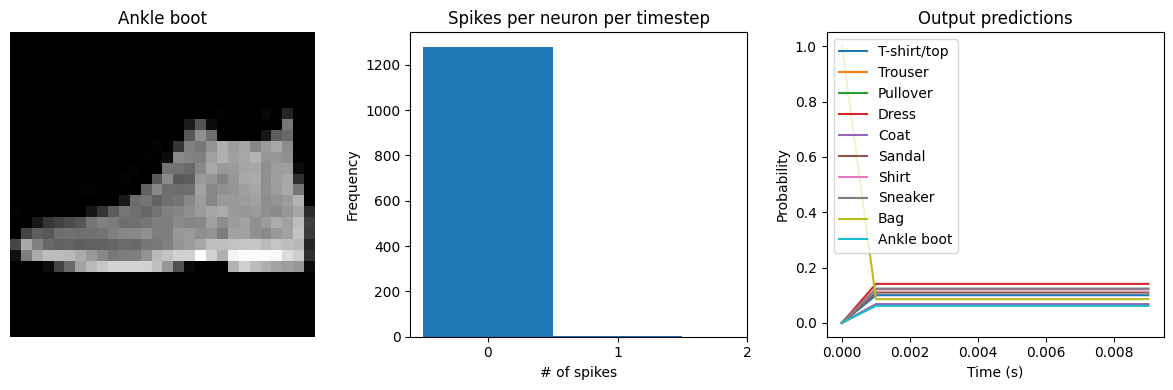

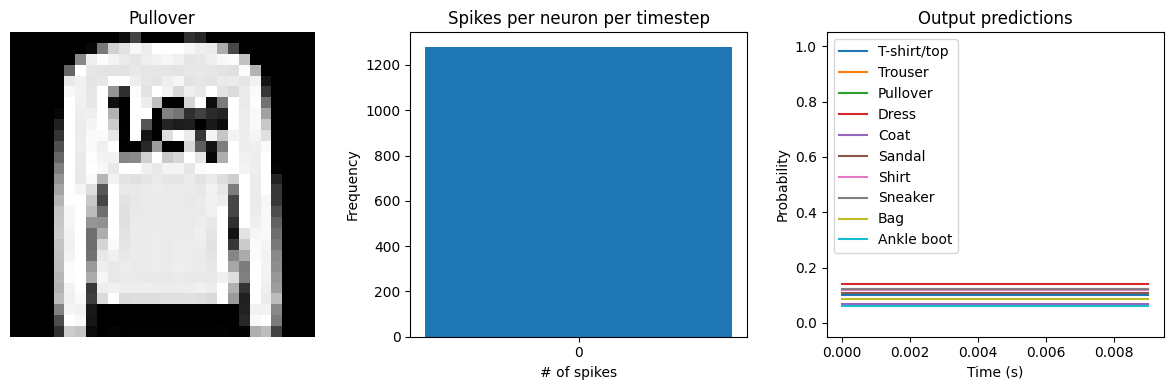

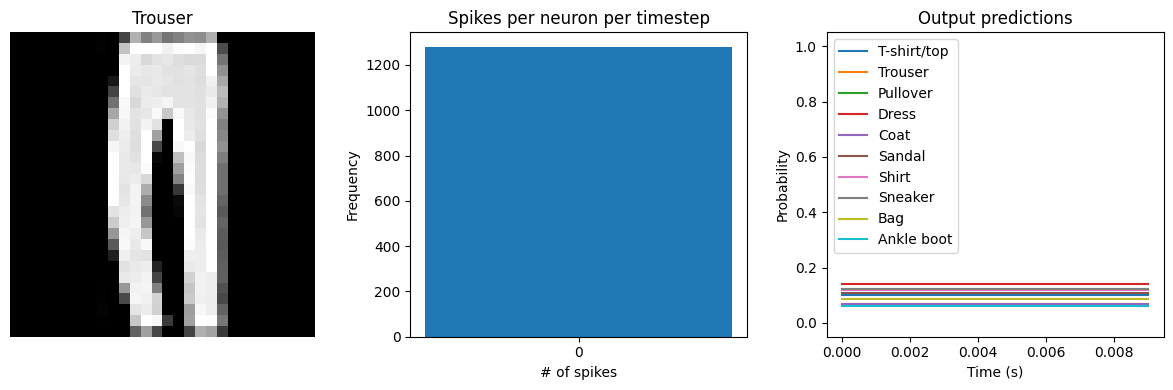

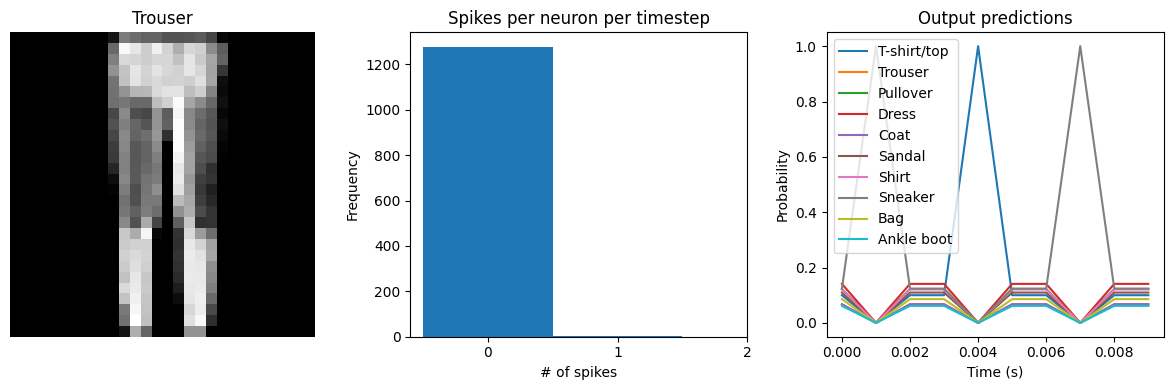

In [7]:
check_output(spiking_model)

We can see an immediate problem: the neurons are hardly spiking at all. The mean number
of spikes we're getting out of each neuron in our SpikingActivation layer is much less
than one, and as a result the output is mostly flat.

To help understand why, we need to think more about the temporal nature of spiking
neurons. Recall that the layer is set up such that if the base activation function were
to be outputting a value of 1, the spiking equivalent would be spiking at 1Hz (i.e.,
emitting one spike per second). In the above example we are simulating for 10 timesteps,
with the default `dt` of 0.001s, so we're simulating a total of 0.01s. If our neurons
aren't spiking very rapidly, and we're only simulating for 0.01s, then it's not
surprising that we aren't getting any spikes in that time window.

We can increase the value of `dt`, effectively running the spiking neurons for longer,
in order to get a more accurate measure of the neuron's output. Basically this allows us
to collect more spikes from each neuron, giving us a better estimate of the neuron's
actual spike rate. We can see how the number of spikes and accuracy change as we
increase `dt`:

  1/313 [..............................] - ETA: 52s

 20/313 [>.............................] - ETA: 0s 

 39/313 [==>...........................] - ETA: 0s

 59/313 [====>.........................] - ETA: 0s

 82/313 [======>.......................] - ETA: 0s

104/313 [========>.....................] - ETA: 0s

126/313 [===========>..................] - ETA: 0s

148/313 [=============>................] - ETA: 0s

171/313 [===============>..............] - ETA: 0s

193/313 [=================>............] - ETA: 0s

216/313 [===================>..........] - ETA: 0s

236/313 [=====================>........] - ETA: 0s

257/313 [=======================>......] - ETA: 0s

280/313 [=========================>....] - ETA: 0s

303/313 [============================>.] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 64.95%
Spike rate per neuron (Hz): min=0.00 mean=0.56 max=20.00


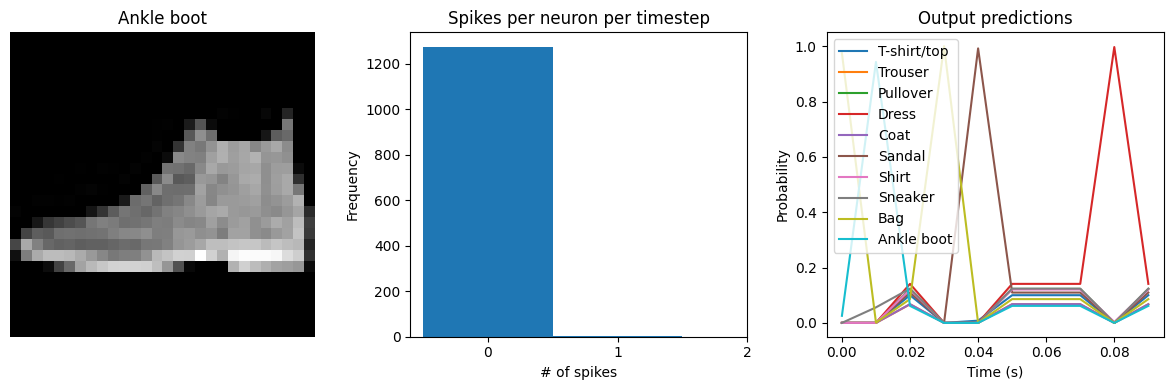

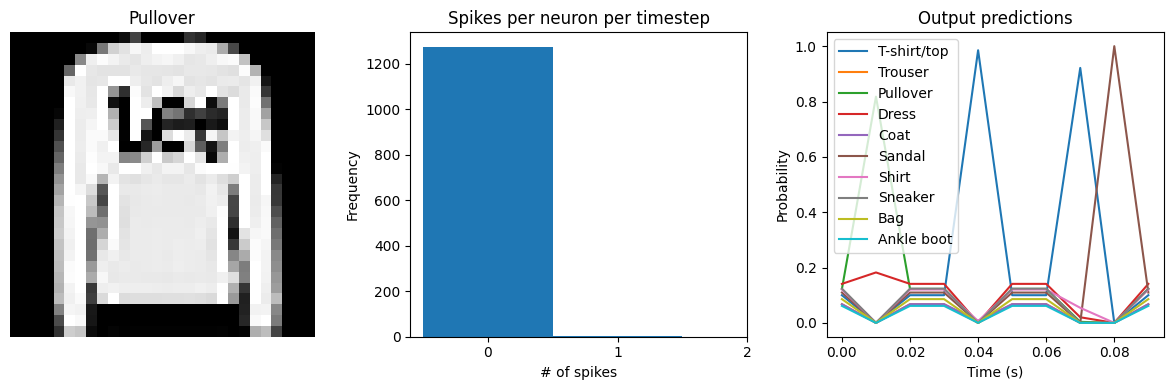

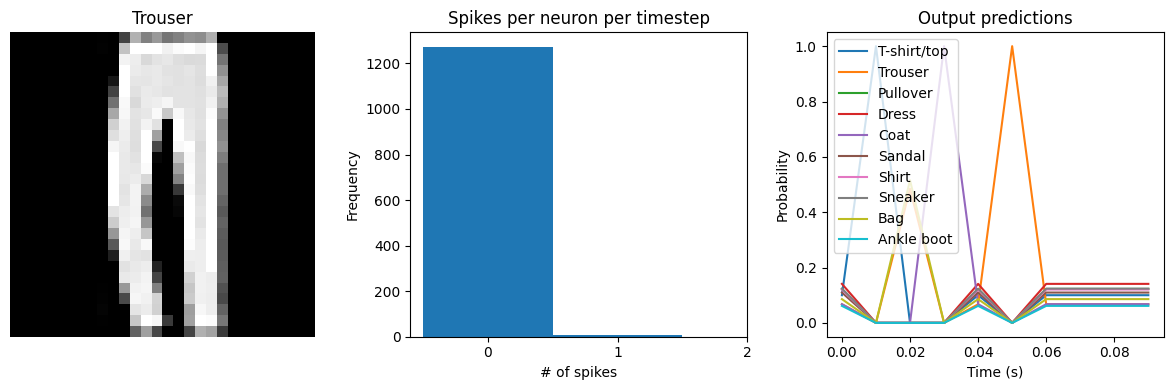

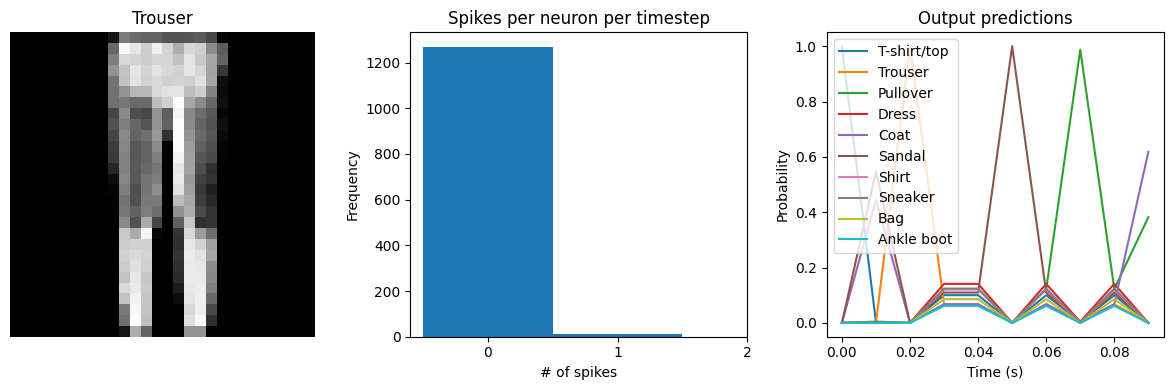

In [8]:
# dt=0.01 * 10 timesteps is equivalent to 0.1s of simulated time
check_output(spiking_model, modify_dt=0.01)

  1/313 [..............................] - ETA: 51s

 23/313 [=>............................] - ETA: 0s 

 45/313 [===>..........................] - ETA: 0s

 67/313 [=====>........................] - ETA: 0s

 89/313 [=======>......................] - ETA: 0s

111/313 [=========>....................] - ETA: 0s

134/313 [===========>..................] - ETA: 0s

157/313 [==============>...............] - ETA: 0s

180/313 [================>.............] - ETA: 0s

202/313 [==================>...........] - ETA: 0s

224/313 [====================>.........] - ETA: 0s

246/313 [======================>.......] - ETA: 0s

268/313 [========================>.....] - ETA: 0s

290/313 [==========================>...] - ETA: 0s

312/313 [============================>.] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 88.06%
Spike rate per neuron (Hz): min=0.00 mean=0.56 max=19.00


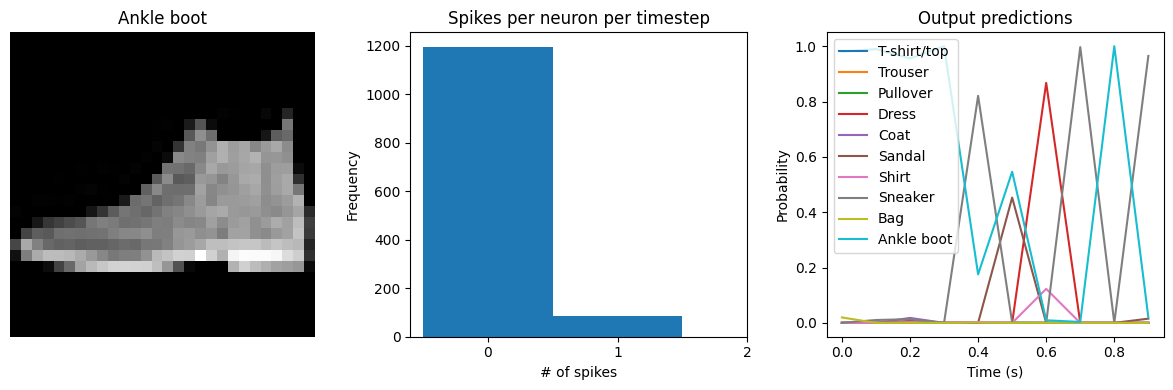

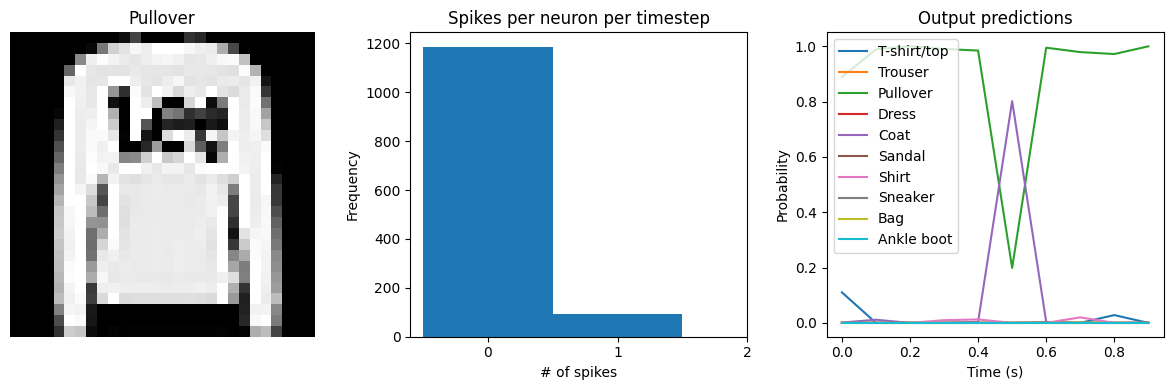

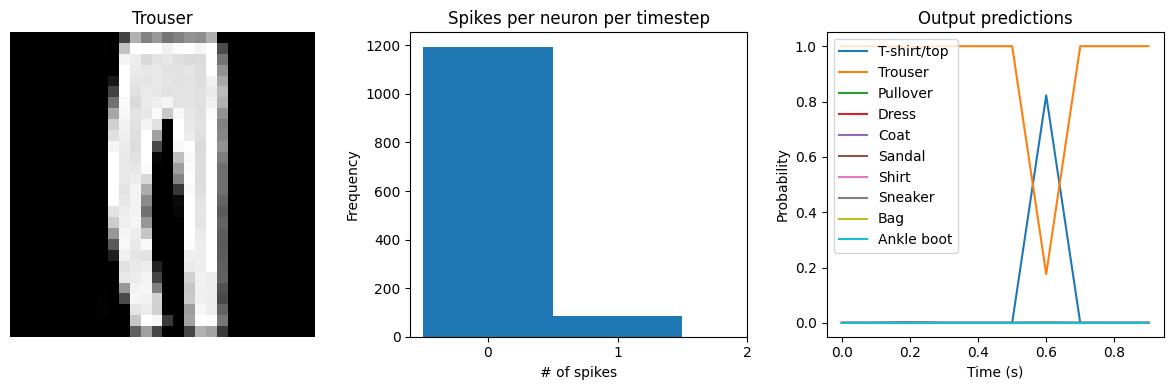

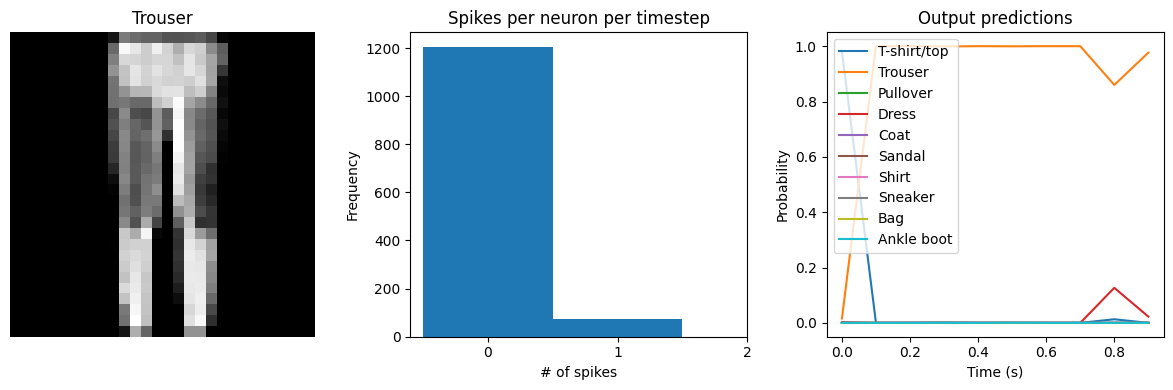

In [9]:
check_output(spiking_model, modify_dt=0.1)

  1/313 [..............................] - ETA: 50s

 22/313 [=>............................] - ETA: 0s 

 46/313 [===>..........................] - ETA: 0s

 70/313 [=====>........................] - ETA: 0s

 94/313 [========>.....................] - ETA: 0s

118/313 [==========>...................] - ETA: 0s

138/313 [============>.................] - ETA: 0s

162/313 [==============>...............] - ETA: 0s

184/313 [================>.............] - ETA: 0s

206/313 [==================>...........] - ETA: 0s

229/313 [====================>.........] - ETA: 0s

252/313 [=======================>......] - ETA: 0s

275/313 [=========================>....] - ETA: 0s

300/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 88.37%
Spike rate per neuron (Hz): min=0.00 mean=0.56 max=18.50


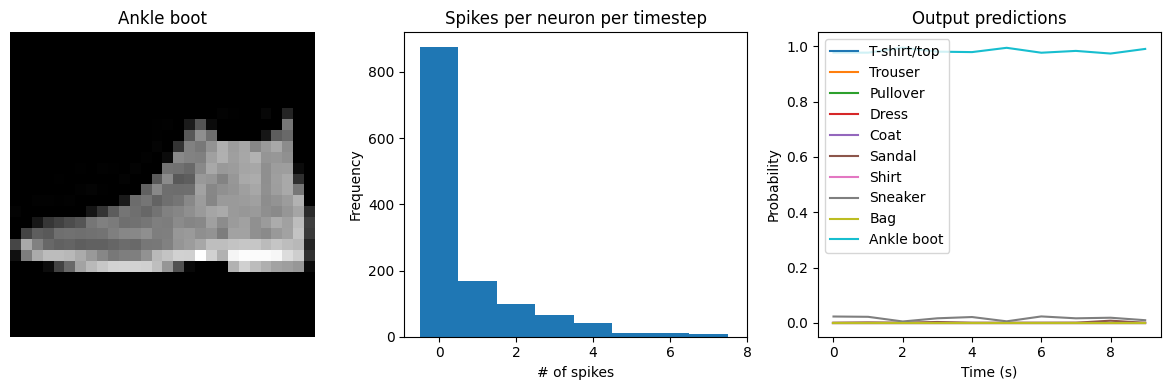

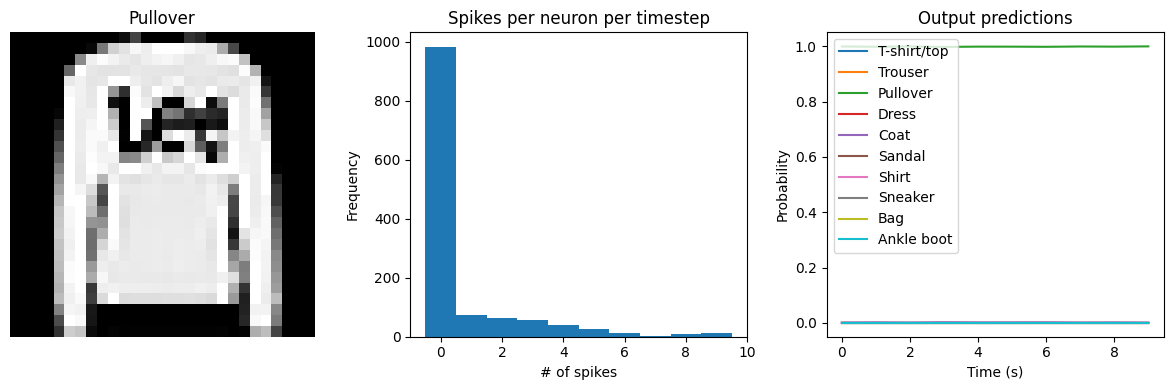

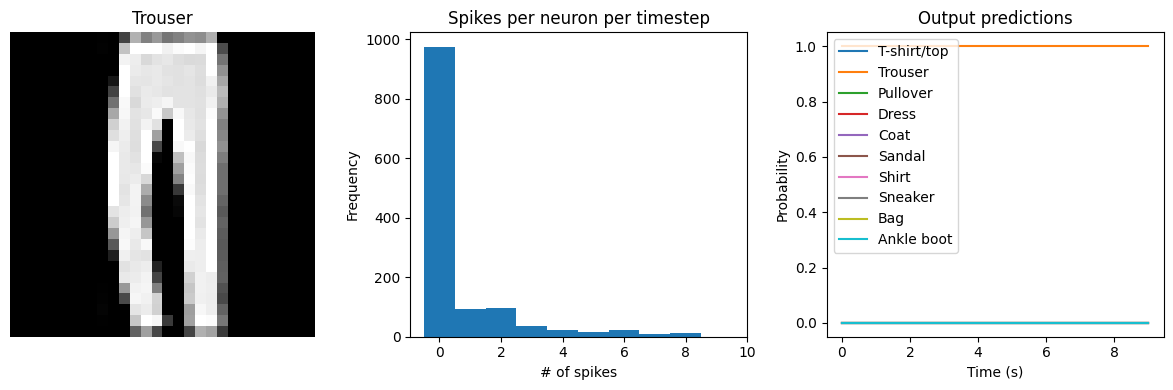

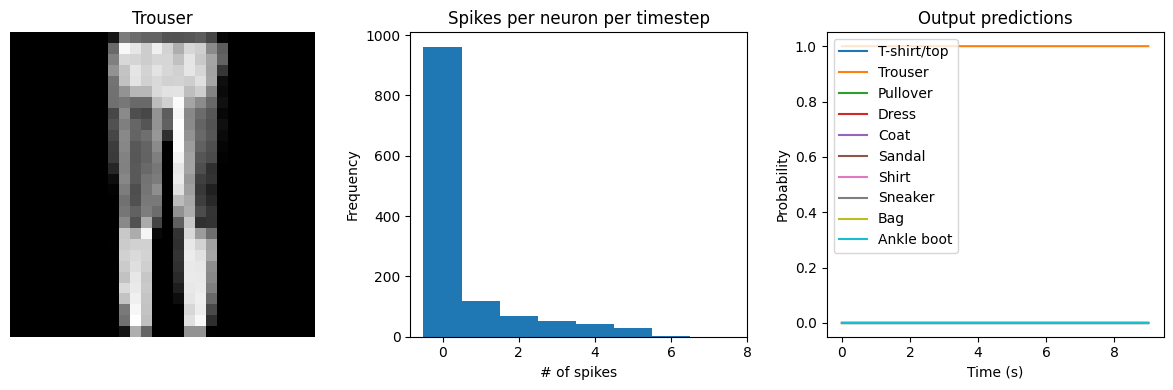

In [10]:
check_output(spiking_model, modify_dt=1)

We can see that as we increase `dt` the performance of the spiking model increasingly
approaches the non-spiking performance. In addition, as `dt` increases, the number of
spikes is increasing. To understand why this improves accuracy, keep in mind that
although the simulated time is increasing, the actual number of timesteps is still 10 in
all cases. We're effectively binning all the spikes that occur on each time step. So as
our bin sizes get larger (increasing `dt`), the spike counts will more closely
approximate the "true" output of the underlying non-spiking activation function.

One might be tempted to simply increase `dt` to a very large value, and thereby always
get great performance. But keep in mind that when we do that we have likely lost any of
the advantages that were motivating us to investigate spiking models in the first place.
For example, one prominent advantage of spiking models is temporal sparsity (we only
need to communicate occasional spikes, rather than continuous values). However, with
large `dt` the neurons are likely spiking every simulation time step (or multiple times
per timestep), so the activity is no longer temporally sparse.

Thus setting `dt` represents a trade-off between accuracy and temporal sparsity.
Choosing the appropriate value will depend on the demands of your application.

In some cases it can be useful to modify `dt` over the course of training. For example,
we could start with a large `dt` and then gradually decrease it over time. See
`keras_spiking.callbacks.DtScheduler` for more details.

## Spiking aware training

As mentioned above, by default SpikingActivation layers will use the non-spiking
activation function during training and the spiking version during inference. However,
similar to the idea of
[quantization aware
training](https://www.tensorflow.org/model_optimization/guide/quantization/training),
often we can improve performance by partially incorporating spiking behaviour during
training. Specifically, we will use the spiking activation on the forward pass, while
still using the non-spiking version on the backwards pass. This allows the model to
learn weights that account for the discrete, temporal nature of the spiking activities.

In [11]:
spikeaware_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # set spiking_aware training and a moderate dt
        keras_spiking.SpikingActivation("relu", dt=0.01, spiking_aware_training=True),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(spikeaware_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 21:08 - loss: 4.9076 - accuracy: 0.0000e+00

  13/1875 [..............................] - ETA: 8s - loss: 3.6573 - accuracy: 0.1562       

  25/1875 [..............................] - ETA: 7s - loss: 3.3674 - accuracy: 0.2188

  38/1875 [..............................] - ETA: 7s - loss: 3.1614 - accuracy: 0.2780

  50/1875 [..............................] - ETA: 7s - loss: 3.0260 - accuracy: 0.3063

  63/1875 [>.............................] - ETA: 7s - loss: 2.9360 - accuracy: 0.3442

  75/1875 [>.............................] - ETA: 7s - loss: 2.8854 - accuracy: 0.3562

  87/1875 [>.............................] - ETA: 7s - loss: 2.8326 - accuracy: 0.3761

  99/1875 [>.............................] - ETA: 7s - loss: 2.7750 - accuracy: 0.3908

 111/1875 [>.............................] - ETA: 7s - loss: 2.7320 - accuracy: 0.4077

 123/1875 [>.............................] - ETA: 7s - loss: 2.7053 - accuracy: 0.4200

 135/1875 [=>............................] - ETA: 7s - loss: 2.6661 - accuracy: 0.4317

 147/1875 [=>............................] - ETA: 7s - loss: 2.6153 - accuracy: 0.4411

 159/1875 [=>............................] - ETA: 7s - loss: 2.5913 - accuracy: 0.4501

 171/1875 [=>............................] - ETA: 7s - loss: 2.5635 - accuracy: 0.4561

 183/1875 [=>............................] - ETA: 7s - loss: 2.5609 - accuracy: 0.4619

 195/1875 [==>...........................] - ETA: 7s - loss: 2.5112 - accuracy: 0.4694

 208/1875 [==>...........................] - ETA: 7s - loss: 2.4633 - accuracy: 0.4770

 220/1875 [==>...........................] - ETA: 7s - loss: 2.4327 - accuracy: 0.4831

 232/1875 [==>...........................] - ETA: 7s - loss: 2.4058 - accuracy: 0.4879

 244/1875 [==>...........................] - ETA: 7s - loss: 2.3730 - accuracy: 0.4918

 256/1875 [===>..........................] - ETA: 7s - loss: 2.3518 - accuracy: 0.4966

 268/1875 [===>..........................] - ETA: 6s - loss: 2.3286 - accuracy: 0.4999

 280/1875 [===>..........................] - ETA: 6s - loss: 2.3075 - accuracy: 0.5049

 292/1875 [===>..........................] - ETA: 6s - loss: 2.2753 - accuracy: 0.5113

 302/1875 [===>..........................] - ETA: 6s - loss: 2.2579 - accuracy: 0.5143

 314/1875 [====>.........................] - ETA: 6s - loss: 2.2361 - accuracy: 0.5186

 327/1875 [====>.........................] - ETA: 6s - loss: 2.2145 - accuracy: 0.5231

 339/1875 [====>.........................] - ETA: 6s - loss: 2.1863 - accuracy: 0.5270

 352/1875 [====>.........................] - ETA: 6s - loss: 2.1549 - accuracy: 0.5311

 364/1875 [====>.........................] - ETA: 6s - loss: 2.1353 - accuracy: 0.5349

 376/1875 [=====>........................] - ETA: 6s - loss: 2.1119 - accuracy: 0.5389

 387/1875 [=====>........................] - ETA: 6s - loss: 2.0971 - accuracy: 0.5411

 399/1875 [=====>........................] - ETA: 6s - loss: 2.0804 - accuracy: 0.5436

 412/1875 [=====>........................] - ETA: 6s - loss: 2.0573 - accuracy: 0.5482

 425/1875 [=====>........................] - ETA: 6s - loss: 2.0388 - accuracy: 0.5521

 437/1875 [=====>........................] - ETA: 6s - loss: 2.0183 - accuracy: 0.5554

 449/1875 [======>.......................] - ETA: 6s - loss: 2.0021 - accuracy: 0.5580

 461/1875 [======>.......................] - ETA: 6s - loss: 1.9862 - accuracy: 0.5601

 473/1875 [======>.......................] - ETA: 6s - loss: 1.9652 - accuracy: 0.5633

 485/1875 [======>.......................] - ETA: 6s - loss: 1.9478 - accuracy: 0.5660

 496/1875 [======>.......................] - ETA: 5s - loss: 1.9349 - accuracy: 0.5684

 508/1875 [=======>......................] - ETA: 5s - loss: 1.9210 - accuracy: 0.5706

 519/1875 [=======>......................] - ETA: 5s - loss: 1.9098 - accuracy: 0.5721

 531/1875 [=======>......................] - ETA: 5s - loss: 1.8974 - accuracy: 0.5736

 542/1875 [=======>......................] - ETA: 5s - loss: 1.8802 - accuracy: 0.5759

 554/1875 [=======>......................] - ETA: 5s - loss: 1.8645 - accuracy: 0.5784

 567/1875 [========>.....................] - ETA: 5s - loss: 1.8490 - accuracy: 0.5804

 579/1875 [========>.....................] - ETA: 5s - loss: 1.8340 - accuracy: 0.5824

 591/1875 [========>.....................] - ETA: 5s - loss: 1.8235 - accuracy: 0.5836

 603/1875 [========>.....................] - ETA: 5s - loss: 1.8100 - accuracy: 0.5856

 615/1875 [========>.....................] - ETA: 5s - loss: 1.7977 - accuracy: 0.5868

 627/1875 [=========>....................] - ETA: 5s - loss: 1.7859 - accuracy: 0.5885

 639/1875 [=========>....................] - ETA: 5s - loss: 1.7738 - accuracy: 0.5899

 650/1875 [=========>....................] - ETA: 5s - loss: 1.7629 - accuracy: 0.5914

 662/1875 [=========>....................] - ETA: 5s - loss: 1.7506 - accuracy: 0.5937

 674/1875 [=========>....................] - ETA: 5s - loss: 1.7378 - accuracy: 0.5957

 685/1875 [=========>....................] - ETA: 5s - loss: 1.7251 - accuracy: 0.5978

 697/1875 [==========>...................] - ETA: 5s - loss: 1.7156 - accuracy: 0.5991

 709/1875 [==========>...................] - ETA: 5s - loss: 1.7051 - accuracy: 0.6006

 721/1875 [==========>...................] - ETA: 5s - loss: 1.6955 - accuracy: 0.6013

 734/1875 [==========>...................] - ETA: 4s - loss: 1.6828 - accuracy: 0.6029

 746/1875 [==========>...................] - ETA: 4s - loss: 1.6731 - accuracy: 0.6042

 758/1875 [===========>..................] - ETA: 4s - loss: 1.6634 - accuracy: 0.6053

 770/1875 [===========>..................] - ETA: 4s - loss: 1.6498 - accuracy: 0.6073

 782/1875 [===========>..................] - ETA: 4s - loss: 1.6396 - accuracy: 0.6089

 794/1875 [===========>..................] - ETA: 4s - loss: 1.6294 - accuracy: 0.6102

 806/1875 [===========>..................] - ETA: 4s - loss: 1.6201 - accuracy: 0.6110

 818/1875 [============>.................] - ETA: 4s - loss: 1.6101 - accuracy: 0.6120

 830/1875 [============>.................] - ETA: 4s - loss: 1.6028 - accuracy: 0.6130

 842/1875 [============>.................] - ETA: 4s - loss: 1.5930 - accuracy: 0.6143

 854/1875 [============>.................] - ETA: 4s - loss: 1.5822 - accuracy: 0.6156

 866/1875 [============>.................] - ETA: 4s - loss: 1.5730 - accuracy: 0.6169

 878/1875 [=============>................] - ETA: 4s - loss: 1.5656 - accuracy: 0.6178

 890/1875 [=============>................] - ETA: 4s - loss: 1.5552 - accuracy: 0.6193

 898/1875 [=============>................] - ETA: 4s - loss: 1.5497 - accuracy: 0.6200

 910/1875 [=============>................] - ETA: 4s - loss: 1.5425 - accuracy: 0.6207

 922/1875 [=============>................] - ETA: 4s - loss: 1.5348 - accuracy: 0.6217

 934/1875 [=============>................] - ETA: 4s - loss: 1.5265 - accuracy: 0.6228

 946/1875 [==============>...............] - ETA: 4s - loss: 1.5179 - accuracy: 0.6241

 958/1875 [==============>...............] - ETA: 4s - loss: 1.5111 - accuracy: 0.6249

 970/1875 [==============>...............] - ETA: 3s - loss: 1.5029 - accuracy: 0.6263

 981/1875 [==============>...............] - ETA: 3s - loss: 1.4963 - accuracy: 0.6269

 992/1875 [==============>...............] - ETA: 3s - loss: 1.4894 - accuracy: 0.6277

1003/1875 [===============>..............] - ETA: 3s - loss: 1.4831 - accuracy: 0.6280

1016/1875 [===============>..............] - ETA: 3s - loss: 1.4748 - accuracy: 0.6291

1028/1875 [===============>..............] - ETA: 3s - loss: 1.4673 - accuracy: 0.6304

1040/1875 [===============>..............] - ETA: 3s - loss: 1.4588 - accuracy: 0.6318

1053/1875 [===============>..............] - ETA: 3s - loss: 1.4513 - accuracy: 0.6327

1065/1875 [================>.............] - ETA: 3s - loss: 1.4443 - accuracy: 0.6333

1077/1875 [================>.............] - ETA: 3s - loss: 1.4371 - accuracy: 0.6344

1089/1875 [================>.............] - ETA: 3s - loss: 1.4310 - accuracy: 0.6351

1102/1875 [================>.............] - ETA: 3s - loss: 1.4238 - accuracy: 0.6362

1110/1875 [================>.............] - ETA: 3s - loss: 1.4189 - accuracy: 0.6369

1122/1875 [================>.............] - ETA: 3s - loss: 1.4128 - accuracy: 0.6377

1134/1875 [=================>............] - ETA: 3s - loss: 1.4068 - accuracy: 0.6387

1147/1875 [=================>............] - ETA: 3s - loss: 1.4002 - accuracy: 0.6395

1159/1875 [=================>............] - ETA: 3s - loss: 1.3936 - accuracy: 0.6408

1171/1875 [=================>............] - ETA: 3s - loss: 1.3873 - accuracy: 0.6415

1183/1875 [=================>............] - ETA: 3s - loss: 1.3818 - accuracy: 0.6420

1196/1875 [==================>...........] - ETA: 2s - loss: 1.3747 - accuracy: 0.6430

1206/1875 [==================>...........] - ETA: 2s - loss: 1.3695 - accuracy: 0.6437

1218/1875 [==================>...........] - ETA: 2s - loss: 1.3637 - accuracy: 0.6447

1230/1875 [==================>...........] - ETA: 2s - loss: 1.3577 - accuracy: 0.6456

1242/1875 [==================>...........] - ETA: 2s - loss: 1.3534 - accuracy: 0.6461

1254/1875 [===================>..........] - ETA: 2s - loss: 1.3480 - accuracy: 0.6467

1266/1875 [===================>..........] - ETA: 2s - loss: 1.3419 - accuracy: 0.6474

1278/1875 [===================>..........] - ETA: 2s - loss: 1.3364 - accuracy: 0.6481

1290/1875 [===================>..........] - ETA: 2s - loss: 1.3312 - accuracy: 0.6489

1302/1875 [===================>..........] - ETA: 2s - loss: 1.3260 - accuracy: 0.6496

1313/1875 [====================>.........] - ETA: 2s - loss: 1.3204 - accuracy: 0.6503

1325/1875 [====================>.........] - ETA: 2s - loss: 1.3153 - accuracy: 0.6511

1337/1875 [====================>.........] - ETA: 2s - loss: 1.3115 - accuracy: 0.6512

1349/1875 [====================>.........] - ETA: 2s - loss: 1.3067 - accuracy: 0.6520

1361/1875 [====================>.........] - ETA: 2s - loss: 1.3015 - accuracy: 0.6527

1373/1875 [====================>.........] - ETA: 2s - loss: 1.2972 - accuracy: 0.6534

1385/1875 [=====================>........] - ETA: 2s - loss: 1.2922 - accuracy: 0.6539

1397/1875 [=====================>........] - ETA: 2s - loss: 1.2878 - accuracy: 0.6545

1409/1875 [=====================>........] - ETA: 2s - loss: 1.2828 - accuracy: 0.6552

1421/1875 [=====================>........] - ETA: 1s - loss: 1.2786 - accuracy: 0.6560

1433/1875 [=====================>........] - ETA: 1s - loss: 1.2746 - accuracy: 0.6565

1445/1875 [======================>.......] - ETA: 1s - loss: 1.2685 - accuracy: 0.6575

1457/1875 [======================>.......] - ETA: 1s - loss: 1.2639 - accuracy: 0.6584

1469/1875 [======================>.......] - ETA: 1s - loss: 1.2602 - accuracy: 0.6585

1481/1875 [======================>.......] - ETA: 1s - loss: 1.2564 - accuracy: 0.6591

1493/1875 [======================>.......] - ETA: 1s - loss: 1.2519 - accuracy: 0.6599

1505/1875 [=======================>......] - ETA: 1s - loss: 1.2471 - accuracy: 0.6609

1517/1875 [=======================>......] - ETA: 1s - loss: 1.2434 - accuracy: 0.6614

1529/1875 [=======================>......] - ETA: 1s - loss: 1.2390 - accuracy: 0.6618

1541/1875 [=======================>......] - ETA: 1s - loss: 1.2352 - accuracy: 0.6624

1553/1875 [=======================>......] - ETA: 1s - loss: 1.2312 - accuracy: 0.6630

1565/1875 [========================>.....] - ETA: 1s - loss: 1.2272 - accuracy: 0.6636

1577/1875 [========================>.....] - ETA: 1s - loss: 1.2240 - accuracy: 0.6640

1590/1875 [========================>.....] - ETA: 1s - loss: 1.2207 - accuracy: 0.6644

1602/1875 [========================>.....] - ETA: 1s - loss: 1.2170 - accuracy: 0.6649

1614/1875 [========================>.....] - ETA: 1s - loss: 1.2126 - accuracy: 0.6656

1626/1875 [=========================>....] - ETA: 1s - loss: 1.2094 - accuracy: 0.6663

1638/1875 [=========================>....] - ETA: 1s - loss: 1.2056 - accuracy: 0.6670

1650/1875 [=========================>....] - ETA: 0s - loss: 1.2020 - accuracy: 0.6675

1662/1875 [=========================>....] - ETA: 0s - loss: 1.1984 - accuracy: 0.6680

1673/1875 [=========================>....] - ETA: 0s - loss: 1.1960 - accuracy: 0.6684

1684/1875 [=========================>....] - ETA: 0s - loss: 1.1925 - accuracy: 0.6691

1696/1875 [==========================>...] - ETA: 0s - loss: 1.1895 - accuracy: 0.6694

1708/1875 [==========================>...] - ETA: 0s - loss: 1.1866 - accuracy: 0.6698

1721/1875 [==========================>...] - ETA: 0s - loss: 1.1830 - accuracy: 0.6702

1733/1875 [==========================>...] - ETA: 0s - loss: 1.1796 - accuracy: 0.6707

1745/1875 [==========================>...] - ETA: 0s - loss: 1.1761 - accuracy: 0.6714

1757/1875 [===========================>..] - ETA: 0s - loss: 1.1728 - accuracy: 0.6718

1769/1875 [===========================>..] - ETA: 0s - loss: 1.1697 - accuracy: 0.6723

1781/1875 [===========================>..] - ETA: 0s - loss: 1.1661 - accuracy: 0.6731

1793/1875 [===========================>..] - ETA: 0s - loss: 1.1636 - accuracy: 0.6733

1805/1875 [===========================>..] - ETA: 0s - loss: 1.1599 - accuracy: 0.6741

1817/1875 [============================>.] - ETA: 0s - loss: 1.1570 - accuracy: 0.6745

1829/1875 [============================>.] - ETA: 0s - loss: 1.1534 - accuracy: 0.6751

1841/1875 [============================>.] - ETA: 0s - loss: 1.1494 - accuracy: 0.6758

1853/1875 [============================>.] - ETA: 0s - loss: 1.1466 - accuracy: 0.6762

1865/1875 [============================>.] - ETA: 0s - loss: 1.1448 - accuracy: 0.6764

1875/1875 [==============================] - 9s 4ms/step - loss: 1.1422 - accuracy: 0.6770


Epoch 2/10


   1/1875 [..............................] - ETA: 8s - loss: 0.5321 - accuracy: 0.8125

  13/1875 [..............................] - ETA: 8s - loss: 0.6995 - accuracy: 0.7356

  25/1875 [..............................] - ETA: 8s - loss: 0.6847 - accuracy: 0.7513

  37/1875 [..............................] - ETA: 8s - loss: 0.7057 - accuracy: 0.7432

  49/1875 [..............................] - ETA: 7s - loss: 0.7159 - accuracy: 0.7404

  62/1875 [..............................] - ETA: 7s - loss: 0.7038 - accuracy: 0.7424

  73/1875 [>.............................] - ETA: 7s - loss: 0.6967 - accuracy: 0.7432

  85/1875 [>.............................] - ETA: 7s - loss: 0.6890 - accuracy: 0.7456

  98/1875 [>.............................] - ETA: 7s - loss: 0.6919 - accuracy: 0.7455

 110/1875 [>.............................] - ETA: 7s - loss: 0.6893 - accuracy: 0.7469

 122/1875 [>.............................] - ETA: 7s - loss: 0.6965 - accuracy: 0.7472

 134/1875 [=>............................] - ETA: 7s - loss: 0.6989 - accuracy: 0.7474

 146/1875 [=>............................] - ETA: 7s - loss: 0.6981 - accuracy: 0.7476

 157/1875 [=>............................] - ETA: 7s - loss: 0.6946 - accuracy: 0.7500

 169/1875 [=>............................] - ETA: 7s - loss: 0.6993 - accuracy: 0.7487

 181/1875 [=>............................] - ETA: 7s - loss: 0.6931 - accuracy: 0.7524

 193/1875 [==>...........................] - ETA: 7s - loss: 0.6957 - accuracy: 0.7497

 201/1875 [==>...........................] - ETA: 7s - loss: 0.6954 - accuracy: 0.7494

 213/1875 [==>...........................] - ETA: 7s - loss: 0.6945 - accuracy: 0.7491

 225/1875 [==>...........................] - ETA: 7s - loss: 0.6886 - accuracy: 0.7511

 237/1875 [==>...........................] - ETA: 7s - loss: 0.6881 - accuracy: 0.7517

 249/1875 [==>...........................] - ETA: 7s - loss: 0.6907 - accuracy: 0.7509

 261/1875 [===>..........................] - ETA: 7s - loss: 0.6913 - accuracy: 0.7507

 273/1875 [===>..........................] - ETA: 7s - loss: 0.6872 - accuracy: 0.7521

 281/1875 [===>..........................] - ETA: 7s - loss: 0.6899 - accuracy: 0.7511

 292/1875 [===>..........................] - ETA: 7s - loss: 0.6878 - accuracy: 0.7524

 299/1875 [===>..........................] - ETA: 7s - loss: 0.6872 - accuracy: 0.7519

 307/1875 [===>..........................] - ETA: 7s - loss: 0.6887 - accuracy: 0.7514

 316/1875 [====>.........................] - ETA: 7s - loss: 0.6858 - accuracy: 0.7531

 328/1875 [====>.........................] - ETA: 7s - loss: 0.6824 - accuracy: 0.7548

 339/1875 [====>.........................] - ETA: 7s - loss: 0.6818 - accuracy: 0.7554

 351/1875 [====>.........................] - ETA: 7s - loss: 0.6804 - accuracy: 0.7558

 363/1875 [====>.........................] - ETA: 6s - loss: 0.6812 - accuracy: 0.7553

 375/1875 [=====>........................] - ETA: 6s - loss: 0.6794 - accuracy: 0.7564

 387/1875 [=====>........................] - ETA: 6s - loss: 0.6783 - accuracy: 0.7565

 399/1875 [=====>........................] - ETA: 6s - loss: 0.6773 - accuracy: 0.7564

 410/1875 [=====>........................] - ETA: 6s - loss: 0.6764 - accuracy: 0.7569

 421/1875 [=====>........................] - ETA: 6s - loss: 0.6769 - accuracy: 0.7568

 433/1875 [=====>........................] - ETA: 6s - loss: 0.6763 - accuracy: 0.7572

 446/1875 [======>.......................] - ETA: 6s - loss: 0.6753 - accuracy: 0.7574

 458/1875 [======>.......................] - ETA: 6s - loss: 0.6749 - accuracy: 0.7583

 470/1875 [======>.......................] - ETA: 6s - loss: 0.6769 - accuracy: 0.7578

 482/1875 [======>.......................] - ETA: 6s - loss: 0.6767 - accuracy: 0.7577

 494/1875 [======>.......................] - ETA: 6s - loss: 0.6753 - accuracy: 0.7580

 506/1875 [=======>......................] - ETA: 6s - loss: 0.6770 - accuracy: 0.7574

 518/1875 [=======>......................] - ETA: 6s - loss: 0.6737 - accuracy: 0.7587

 530/1875 [=======>......................] - ETA: 6s - loss: 0.6743 - accuracy: 0.7583

 542/1875 [=======>......................] - ETA: 6s - loss: 0.6733 - accuracy: 0.7586

 554/1875 [=======>......................] - ETA: 5s - loss: 0.6720 - accuracy: 0.7587

 566/1875 [========>.....................] - ETA: 5s - loss: 0.6728 - accuracy: 0.7583

 577/1875 [========>.....................] - ETA: 5s - loss: 0.6722 - accuracy: 0.7583

 589/1875 [========>.....................] - ETA: 5s - loss: 0.6735 - accuracy: 0.7579

 601/1875 [========>.....................] - ETA: 5s - loss: 0.6730 - accuracy: 0.7580

 613/1875 [========>.....................] - ETA: 5s - loss: 0.6708 - accuracy: 0.7586

 625/1875 [=========>....................] - ETA: 5s - loss: 0.6705 - accuracy: 0.7588

 637/1875 [=========>....................] - ETA: 5s - loss: 0.6701 - accuracy: 0.7589

 649/1875 [=========>....................] - ETA: 5s - loss: 0.6707 - accuracy: 0.7587

 661/1875 [=========>....................] - ETA: 5s - loss: 0.6703 - accuracy: 0.7586

 673/1875 [=========>....................] - ETA: 5s - loss: 0.6701 - accuracy: 0.7585

 684/1875 [=========>....................] - ETA: 5s - loss: 0.6696 - accuracy: 0.7590

 696/1875 [==========>...................] - ETA: 5s - loss: 0.6688 - accuracy: 0.7593

 708/1875 [==========>...................] - ETA: 5s - loss: 0.6681 - accuracy: 0.7593

 720/1875 [==========>...................] - ETA: 5s - loss: 0.6681 - accuracy: 0.7597

 732/1875 [==========>...................] - ETA: 5s - loss: 0.6675 - accuracy: 0.7600

 744/1875 [==========>...................] - ETA: 5s - loss: 0.6661 - accuracy: 0.7608

 756/1875 [===========>..................] - ETA: 5s - loss: 0.6658 - accuracy: 0.7609

 768/1875 [===========>..................] - ETA: 4s - loss: 0.6657 - accuracy: 0.7609

 781/1875 [===========>..................] - ETA: 4s - loss: 0.6657 - accuracy: 0.7612

 793/1875 [===========>..................] - ETA: 4s - loss: 0.6647 - accuracy: 0.7612

 805/1875 [===========>..................] - ETA: 4s - loss: 0.6648 - accuracy: 0.7610

 817/1875 [============>.................] - ETA: 4s - loss: 0.6638 - accuracy: 0.7611

 829/1875 [============>.................] - ETA: 4s - loss: 0.6647 - accuracy: 0.7612

 840/1875 [============>.................] - ETA: 4s - loss: 0.6647 - accuracy: 0.7614

 852/1875 [============>.................] - ETA: 4s - loss: 0.6652 - accuracy: 0.7615

 864/1875 [============>.................] - ETA: 4s - loss: 0.6650 - accuracy: 0.7617

 876/1875 [=============>................] - ETA: 4s - loss: 0.6642 - accuracy: 0.7619

 888/1875 [=============>................] - ETA: 4s - loss: 0.6633 - accuracy: 0.7621

 900/1875 [=============>................] - ETA: 4s - loss: 0.6620 - accuracy: 0.7626

 911/1875 [=============>................] - ETA: 4s - loss: 0.6608 - accuracy: 0.7630

 923/1875 [=============>................] - ETA: 4s - loss: 0.6598 - accuracy: 0.7637

 935/1875 [=============>................] - ETA: 4s - loss: 0.6589 - accuracy: 0.7641

 947/1875 [==============>...............] - ETA: 4s - loss: 0.6590 - accuracy: 0.7640

 959/1875 [==============>...............] - ETA: 4s - loss: 0.6579 - accuracy: 0.7643

 971/1875 [==============>...............] - ETA: 4s - loss: 0.6583 - accuracy: 0.7643

 983/1875 [==============>...............] - ETA: 3s - loss: 0.6584 - accuracy: 0.7644

 995/1875 [==============>...............] - ETA: 3s - loss: 0.6578 - accuracy: 0.7647

1007/1875 [===============>..............] - ETA: 3s - loss: 0.6572 - accuracy: 0.7650

1019/1875 [===============>..............] - ETA: 3s - loss: 0.6579 - accuracy: 0.7647

1031/1875 [===============>..............] - ETA: 3s - loss: 0.6568 - accuracy: 0.7650

1043/1875 [===============>..............] - ETA: 3s - loss: 0.6566 - accuracy: 0.7652

1055/1875 [===============>..............] - ETA: 3s - loss: 0.6559 - accuracy: 0.7654

1067/1875 [================>.............] - ETA: 3s - loss: 0.6551 - accuracy: 0.7658

1080/1875 [================>.............] - ETA: 3s - loss: 0.6551 - accuracy: 0.7654

1091/1875 [================>.............] - ETA: 3s - loss: 0.6550 - accuracy: 0.7657

1103/1875 [================>.............] - ETA: 3s - loss: 0.6541 - accuracy: 0.7660

1115/1875 [================>.............] - ETA: 3s - loss: 0.6543 - accuracy: 0.7661

1128/1875 [=================>............] - ETA: 3s - loss: 0.6531 - accuracy: 0.7665

1140/1875 [=================>............] - ETA: 3s - loss: 0.6538 - accuracy: 0.7663

1153/1875 [=================>............] - ETA: 3s - loss: 0.6535 - accuracy: 0.7663

1165/1875 [=================>............] - ETA: 3s - loss: 0.6539 - accuracy: 0.7661

1177/1875 [=================>............] - ETA: 3s - loss: 0.6537 - accuracy: 0.7663

1189/1875 [==================>...........] - ETA: 3s - loss: 0.6538 - accuracy: 0.7665

1201/1875 [==================>...........] - ETA: 2s - loss: 0.6529 - accuracy: 0.7668

1213/1875 [==================>...........] - ETA: 2s - loss: 0.6522 - accuracy: 0.7671

1225/1875 [==================>...........] - ETA: 2s - loss: 0.6507 - accuracy: 0.7674

1237/1875 [==================>...........] - ETA: 2s - loss: 0.6506 - accuracy: 0.7676

1249/1875 [==================>...........] - ETA: 2s - loss: 0.6507 - accuracy: 0.7677

1261/1875 [===================>..........] - ETA: 2s - loss: 0.6500 - accuracy: 0.7677

1273/1875 [===================>..........] - ETA: 2s - loss: 0.6497 - accuracy: 0.7675

1285/1875 [===================>..........] - ETA: 2s - loss: 0.6495 - accuracy: 0.7678

1297/1875 [===================>..........] - ETA: 2s - loss: 0.6490 - accuracy: 0.7679

1309/1875 [===================>..........] - ETA: 2s - loss: 0.6487 - accuracy: 0.7679

1321/1875 [====================>.........] - ETA: 2s - loss: 0.6497 - accuracy: 0.7675

1333/1875 [====================>.........] - ETA: 2s - loss: 0.6494 - accuracy: 0.7675

1345/1875 [====================>.........] - ETA: 2s - loss: 0.6500 - accuracy: 0.7673

1357/1875 [====================>.........] - ETA: 2s - loss: 0.6490 - accuracy: 0.7675

1369/1875 [====================>.........] - ETA: 2s - loss: 0.6489 - accuracy: 0.7677

1381/1875 [=====================>........] - ETA: 2s - loss: 0.6484 - accuracy: 0.7679

1393/1875 [=====================>........] - ETA: 2s - loss: 0.6478 - accuracy: 0.7681

1403/1875 [=====================>........] - ETA: 2s - loss: 0.6475 - accuracy: 0.7682

1415/1875 [=====================>........] - ETA: 2s - loss: 0.6466 - accuracy: 0.7685

1427/1875 [=====================>........] - ETA: 1s - loss: 0.6461 - accuracy: 0.7687

1439/1875 [======================>.......] - ETA: 1s - loss: 0.6454 - accuracy: 0.7691

1451/1875 [======================>.......] - ETA: 1s - loss: 0.6450 - accuracy: 0.7693

1463/1875 [======================>.......] - ETA: 1s - loss: 0.6448 - accuracy: 0.7693

1475/1875 [======================>.......] - ETA: 1s - loss: 0.6445 - accuracy: 0.7694

1486/1875 [======================>.......] - ETA: 1s - loss: 0.6444 - accuracy: 0.7695

1497/1875 [======================>.......] - ETA: 1s - loss: 0.6441 - accuracy: 0.7697

1509/1875 [=======================>......] - ETA: 1s - loss: 0.6439 - accuracy: 0.7698

1521/1875 [=======================>......] - ETA: 1s - loss: 0.6438 - accuracy: 0.7699

1532/1875 [=======================>......] - ETA: 1s - loss: 0.6441 - accuracy: 0.7700

1544/1875 [=======================>......] - ETA: 1s - loss: 0.6444 - accuracy: 0.7699

1555/1875 [=======================>......] - ETA: 1s - loss: 0.6438 - accuracy: 0.7701

1567/1875 [========================>.....] - ETA: 1s - loss: 0.6432 - accuracy: 0.7703

1579/1875 [========================>.....] - ETA: 1s - loss: 0.6430 - accuracy: 0.7704

1591/1875 [========================>.....] - ETA: 1s - loss: 0.6418 - accuracy: 0.7710

1603/1875 [========================>.....] - ETA: 1s - loss: 0.6408 - accuracy: 0.7712

1615/1875 [========================>.....] - ETA: 1s - loss: 0.6407 - accuracy: 0.7712

1627/1875 [=========================>....] - ETA: 1s - loss: 0.6406 - accuracy: 0.7714

1638/1875 [=========================>....] - ETA: 1s - loss: 0.6405 - accuracy: 0.7714

1650/1875 [=========================>....] - ETA: 0s - loss: 0.6401 - accuracy: 0.7715

1662/1875 [=========================>....] - ETA: 0s - loss: 0.6393 - accuracy: 0.7719

1674/1875 [=========================>....] - ETA: 0s - loss: 0.6390 - accuracy: 0.7720

1685/1875 [=========================>....] - ETA: 0s - loss: 0.6390 - accuracy: 0.7720

1697/1875 [==========================>...] - ETA: 0s - loss: 0.6390 - accuracy: 0.7722

1709/1875 [==========================>...] - ETA: 0s - loss: 0.6384 - accuracy: 0.7723

1721/1875 [==========================>...] - ETA: 0s - loss: 0.6378 - accuracy: 0.7723

1733/1875 [==========================>...] - ETA: 0s - loss: 0.6373 - accuracy: 0.7726

1746/1875 [==========================>...] - ETA: 0s - loss: 0.6373 - accuracy: 0.7726

1758/1875 [===========================>..] - ETA: 0s - loss: 0.6373 - accuracy: 0.7725

1770/1875 [===========================>..] - ETA: 0s - loss: 0.6365 - accuracy: 0.7727

1782/1875 [===========================>..] - ETA: 0s - loss: 0.6366 - accuracy: 0.7727

1794/1875 [===========================>..] - ETA: 0s - loss: 0.6366 - accuracy: 0.7726

1806/1875 [===========================>..] - ETA: 0s - loss: 0.6362 - accuracy: 0.7727

1818/1875 [============================>.] - ETA: 0s - loss: 0.6360 - accuracy: 0.7728

1830/1875 [============================>.] - ETA: 0s - loss: 0.6353 - accuracy: 0.7729

1842/1875 [============================>.] - ETA: 0s - loss: 0.6350 - accuracy: 0.7731

1854/1875 [============================>.] - ETA: 0s - loss: 0.6346 - accuracy: 0.7732

1866/1875 [============================>.] - ETA: 0s - loss: 0.6339 - accuracy: 0.7735

1875/1875 [==============================] - 8s 4ms/step - loss: 0.6337 - accuracy: 0.7736


Epoch 3/10


   1/1875 [..............................] - ETA: 9s - loss: 0.4901 - accuracy: 0.8750

  13/1875 [..............................] - ETA: 8s - loss: 0.5543 - accuracy: 0.8101

  25/1875 [..............................] - ETA: 8s - loss: 0.5568 - accuracy: 0.8062

  37/1875 [..............................] - ETA: 8s - loss: 0.5680 - accuracy: 0.7948

  49/1875 [..............................] - ETA: 7s - loss: 0.5772 - accuracy: 0.7902

  62/1875 [..............................] - ETA: 7s - loss: 0.5993 - accuracy: 0.7818

  74/1875 [>.............................] - ETA: 7s - loss: 0.5954 - accuracy: 0.7834

  86/1875 [>.............................] - ETA: 7s - loss: 0.5984 - accuracy: 0.7809

  97/1875 [>.............................] - ETA: 7s - loss: 0.5866 - accuracy: 0.7854

 108/1875 [>.............................] - ETA: 7s - loss: 0.5802 - accuracy: 0.7902

 120/1875 [>.............................] - ETA: 7s - loss: 0.5875 - accuracy: 0.7859

 132/1875 [=>............................] - ETA: 7s - loss: 0.5919 - accuracy: 0.7857

 144/1875 [=>............................] - ETA: 7s - loss: 0.5794 - accuracy: 0.7901

 155/1875 [=>............................] - ETA: 7s - loss: 0.5814 - accuracy: 0.7911

 167/1875 [=>............................] - ETA: 7s - loss: 0.5879 - accuracy: 0.7885

 178/1875 [=>............................] - ETA: 7s - loss: 0.5880 - accuracy: 0.7877

 190/1875 [==>...........................] - ETA: 7s - loss: 0.5884 - accuracy: 0.7882

 201/1875 [==>...........................] - ETA: 7s - loss: 0.5811 - accuracy: 0.7901

 213/1875 [==>...........................] - ETA: 7s - loss: 0.5804 - accuracy: 0.7895

 225/1875 [==>...........................] - ETA: 7s - loss: 0.5823 - accuracy: 0.7874

 236/1875 [==>...........................] - ETA: 7s - loss: 0.5807 - accuracy: 0.7891

 248/1875 [==>...........................] - ETA: 7s - loss: 0.5791 - accuracy: 0.7897

 260/1875 [===>..........................] - ETA: 7s - loss: 0.5834 - accuracy: 0.7887

 272/1875 [===>..........................] - ETA: 7s - loss: 0.5901 - accuracy: 0.7875

 285/1875 [===>..........................] - ETA: 7s - loss: 0.5887 - accuracy: 0.7879

 298/1875 [===>..........................] - ETA: 6s - loss: 0.5905 - accuracy: 0.7885

 310/1875 [===>..........................] - ETA: 6s - loss: 0.5891 - accuracy: 0.7891

 322/1875 [====>.........................] - ETA: 6s - loss: 0.5919 - accuracy: 0.7887

 334/1875 [====>.........................] - ETA: 6s - loss: 0.5898 - accuracy: 0.7881

 345/1875 [====>.........................] - ETA: 6s - loss: 0.5947 - accuracy: 0.7872

 357/1875 [====>.........................] - ETA: 6s - loss: 0.5916 - accuracy: 0.7882

 369/1875 [====>.........................] - ETA: 6s - loss: 0.5918 - accuracy: 0.7879

 381/1875 [=====>........................] - ETA: 6s - loss: 0.5917 - accuracy: 0.7879

 393/1875 [=====>........................] - ETA: 6s - loss: 0.5918 - accuracy: 0.7877

 405/1875 [=====>........................] - ETA: 6s - loss: 0.5930 - accuracy: 0.7873

 417/1875 [=====>........................] - ETA: 6s - loss: 0.5935 - accuracy: 0.7866

 429/1875 [=====>........................] - ETA: 6s - loss: 0.5911 - accuracy: 0.7875

 440/1875 [======>.......................] - ETA: 6s - loss: 0.5893 - accuracy: 0.7883

 452/1875 [======>.......................] - ETA: 6s - loss: 0.5868 - accuracy: 0.7893

 464/1875 [======>.......................] - ETA: 6s - loss: 0.5854 - accuracy: 0.7894

 476/1875 [======>.......................] - ETA: 6s - loss: 0.5837 - accuracy: 0.7903

 488/1875 [======>.......................] - ETA: 6s - loss: 0.5818 - accuracy: 0.7910

 500/1875 [=======>......................] - ETA: 6s - loss: 0.5821 - accuracy: 0.7912

 512/1875 [=======>......................] - ETA: 5s - loss: 0.5830 - accuracy: 0.7904

 524/1875 [=======>......................] - ETA: 5s - loss: 0.5828 - accuracy: 0.7907

 536/1875 [=======>......................] - ETA: 5s - loss: 0.5816 - accuracy: 0.7910

 548/1875 [=======>......................] - ETA: 5s - loss: 0.5814 - accuracy: 0.7909

 560/1875 [=======>......................] - ETA: 5s - loss: 0.5809 - accuracy: 0.7906

 571/1875 [========>.....................] - ETA: 5s - loss: 0.5819 - accuracy: 0.7906

 583/1875 [========>.....................] - ETA: 5s - loss: 0.5819 - accuracy: 0.7907

 595/1875 [========>.....................] - ETA: 5s - loss: 0.5824 - accuracy: 0.7902

 607/1875 [========>.....................] - ETA: 5s - loss: 0.5819 - accuracy: 0.7910

 619/1875 [========>.....................] - ETA: 5s - loss: 0.5822 - accuracy: 0.7909

 631/1875 [=========>....................] - ETA: 5s - loss: 0.5804 - accuracy: 0.7906

 643/1875 [=========>....................] - ETA: 5s - loss: 0.5800 - accuracy: 0.7902

 655/1875 [=========>....................] - ETA: 5s - loss: 0.5799 - accuracy: 0.7898

 667/1875 [=========>....................] - ETA: 5s - loss: 0.5794 - accuracy: 0.7900

 679/1875 [=========>....................] - ETA: 5s - loss: 0.5810 - accuracy: 0.7895

 689/1875 [==========>...................] - ETA: 5s - loss: 0.5825 - accuracy: 0.7893

 701/1875 [==========>...................] - ETA: 5s - loss: 0.5839 - accuracy: 0.7888

 713/1875 [==========>...................] - ETA: 5s - loss: 0.5839 - accuracy: 0.7891

 725/1875 [==========>...................] - ETA: 5s - loss: 0.5834 - accuracy: 0.7897

 737/1875 [==========>...................] - ETA: 4s - loss: 0.5828 - accuracy: 0.7899

 749/1875 [==========>...................] - ETA: 4s - loss: 0.5804 - accuracy: 0.7909

 761/1875 [===========>..................] - ETA: 4s - loss: 0.5792 - accuracy: 0.7913

 773/1875 [===========>..................] - ETA: 4s - loss: 0.5781 - accuracy: 0.7915

 785/1875 [===========>..................] - ETA: 4s - loss: 0.5771 - accuracy: 0.7917

 797/1875 [===========>..................] - ETA: 4s - loss: 0.5764 - accuracy: 0.7919

 809/1875 [===========>..................] - ETA: 4s - loss: 0.5751 - accuracy: 0.7925

 821/1875 [============>.................] - ETA: 4s - loss: 0.5747 - accuracy: 0.7925

 833/1875 [============>.................] - ETA: 4s - loss: 0.5762 - accuracy: 0.7923

 843/1875 [============>.................] - ETA: 4s - loss: 0.5767 - accuracy: 0.7923

 855/1875 [============>.................] - ETA: 4s - loss: 0.5760 - accuracy: 0.7925

 867/1875 [============>.................] - ETA: 4s - loss: 0.5741 - accuracy: 0.7932

 879/1875 [=============>................] - ETA: 4s - loss: 0.5735 - accuracy: 0.7934

 890/1875 [=============>................] - ETA: 4s - loss: 0.5728 - accuracy: 0.7935

 902/1875 [=============>................] - ETA: 4s - loss: 0.5724 - accuracy: 0.7933

 914/1875 [=============>................] - ETA: 4s - loss: 0.5730 - accuracy: 0.7929

 924/1875 [=============>................] - ETA: 4s - loss: 0.5733 - accuracy: 0.7933

 935/1875 [=============>................] - ETA: 4s - loss: 0.5731 - accuracy: 0.7934

 947/1875 [==============>...............] - ETA: 4s - loss: 0.5734 - accuracy: 0.7935

 959/1875 [==============>...............] - ETA: 4s - loss: 0.5725 - accuracy: 0.7940

 971/1875 [==============>...............] - ETA: 3s - loss: 0.5721 - accuracy: 0.7940

 983/1875 [==============>...............] - ETA: 3s - loss: 0.5713 - accuracy: 0.7940

 994/1875 [==============>...............] - ETA: 3s - loss: 0.5714 - accuracy: 0.7943

1006/1875 [===============>..............] - ETA: 3s - loss: 0.5719 - accuracy: 0.7941

1019/1875 [===============>..............] - ETA: 3s - loss: 0.5710 - accuracy: 0.7944

1029/1875 [===============>..............] - ETA: 3s - loss: 0.5714 - accuracy: 0.7943

1041/1875 [===============>..............] - ETA: 3s - loss: 0.5713 - accuracy: 0.7942

1053/1875 [===============>..............] - ETA: 3s - loss: 0.5717 - accuracy: 0.7940

1065/1875 [================>.............] - ETA: 3s - loss: 0.5718 - accuracy: 0.7940

1077/1875 [================>.............] - ETA: 3s - loss: 0.5701 - accuracy: 0.7947

1089/1875 [================>.............] - ETA: 3s - loss: 0.5692 - accuracy: 0.7949

1101/1875 [================>.............] - ETA: 3s - loss: 0.5699 - accuracy: 0.7948

1113/1875 [================>.............] - ETA: 3s - loss: 0.5693 - accuracy: 0.7951

1125/1875 [=================>............] - ETA: 3s - loss: 0.5687 - accuracy: 0.7953

1137/1875 [=================>............] - ETA: 3s - loss: 0.5686 - accuracy: 0.7953

1149/1875 [=================>............] - ETA: 3s - loss: 0.5682 - accuracy: 0.7955

1161/1875 [=================>............] - ETA: 3s - loss: 0.5671 - accuracy: 0.7958

1173/1875 [=================>............] - ETA: 3s - loss: 0.5671 - accuracy: 0.7958

1185/1875 [=================>............] - ETA: 3s - loss: 0.5674 - accuracy: 0.7958

1197/1875 [==================>...........] - ETA: 2s - loss: 0.5676 - accuracy: 0.7957

1206/1875 [==================>...........] - ETA: 2s - loss: 0.5672 - accuracy: 0.7958

1218/1875 [==================>...........] - ETA: 2s - loss: 0.5669 - accuracy: 0.7960

1230/1875 [==================>...........] - ETA: 2s - loss: 0.5665 - accuracy: 0.7961

1242/1875 [==================>...........] - ETA: 2s - loss: 0.5667 - accuracy: 0.7960

1254/1875 [===================>..........] - ETA: 2s - loss: 0.5667 - accuracy: 0.7961

1266/1875 [===================>..........] - ETA: 2s - loss: 0.5678 - accuracy: 0.7956

1278/1875 [===================>..........] - ETA: 2s - loss: 0.5673 - accuracy: 0.7958

1290/1875 [===================>..........] - ETA: 2s - loss: 0.5675 - accuracy: 0.7960

1302/1875 [===================>..........] - ETA: 2s - loss: 0.5667 - accuracy: 0.7963

1314/1875 [====================>.........] - ETA: 2s - loss: 0.5659 - accuracy: 0.7965

1326/1875 [====================>.........] - ETA: 2s - loss: 0.5653 - accuracy: 0.7968

1339/1875 [====================>.........] - ETA: 2s - loss: 0.5647 - accuracy: 0.7970

1350/1875 [====================>.........] - ETA: 2s - loss: 0.5658 - accuracy: 0.7968

1362/1875 [====================>.........] - ETA: 2s - loss: 0.5656 - accuracy: 0.7967

1374/1875 [====================>.........] - ETA: 2s - loss: 0.5662 - accuracy: 0.7966

1386/1875 [=====================>........] - ETA: 2s - loss: 0.5663 - accuracy: 0.7967

1398/1875 [=====================>........] - ETA: 2s - loss: 0.5666 - accuracy: 0.7964

1410/1875 [=====================>........] - ETA: 2s - loss: 0.5667 - accuracy: 0.7965

1422/1875 [=====================>........] - ETA: 1s - loss: 0.5667 - accuracy: 0.7964

1434/1875 [=====================>........] - ETA: 1s - loss: 0.5661 - accuracy: 0.7967

1446/1875 [======================>.......] - ETA: 1s - loss: 0.5656 - accuracy: 0.7968

1458/1875 [======================>.......] - ETA: 1s - loss: 0.5650 - accuracy: 0.7970

1470/1875 [======================>.......] - ETA: 1s - loss: 0.5652 - accuracy: 0.7969

1482/1875 [======================>.......] - ETA: 1s - loss: 0.5653 - accuracy: 0.7970

1494/1875 [======================>.......] - ETA: 1s - loss: 0.5645 - accuracy: 0.7971

1506/1875 [=======================>......] - ETA: 1s - loss: 0.5644 - accuracy: 0.7972

1518/1875 [=======================>......] - ETA: 1s - loss: 0.5640 - accuracy: 0.7972

1530/1875 [=======================>......] - ETA: 1s - loss: 0.5635 - accuracy: 0.7974

1541/1875 [=======================>......] - ETA: 1s - loss: 0.5631 - accuracy: 0.7975

1553/1875 [=======================>......] - ETA: 1s - loss: 0.5631 - accuracy: 0.7977

1565/1875 [========================>.....] - ETA: 1s - loss: 0.5629 - accuracy: 0.7977

1577/1875 [========================>.....] - ETA: 1s - loss: 0.5635 - accuracy: 0.7975

1590/1875 [========================>.....] - ETA: 1s - loss: 0.5640 - accuracy: 0.7974

1603/1875 [========================>.....] - ETA: 1s - loss: 0.5631 - accuracy: 0.7977

1615/1875 [========================>.....] - ETA: 1s - loss: 0.5634 - accuracy: 0.7978

1627/1875 [=========================>....] - ETA: 1s - loss: 0.5631 - accuracy: 0.7979

1639/1875 [=========================>....] - ETA: 1s - loss: 0.5633 - accuracy: 0.7979

1651/1875 [=========================>....] - ETA: 0s - loss: 0.5631 - accuracy: 0.7979

1663/1875 [=========================>....] - ETA: 0s - loss: 0.5629 - accuracy: 0.7980

1675/1875 [=========================>....] - ETA: 0s - loss: 0.5622 - accuracy: 0.7983

1687/1875 [=========================>....] - ETA: 0s - loss: 0.5620 - accuracy: 0.7984

1699/1875 [==========================>...] - ETA: 0s - loss: 0.5612 - accuracy: 0.7986

1711/1875 [==========================>...] - ETA: 0s - loss: 0.5604 - accuracy: 0.7987

1723/1875 [==========================>...] - ETA: 0s - loss: 0.5601 - accuracy: 0.7989

1735/1875 [==========================>...] - ETA: 0s - loss: 0.5600 - accuracy: 0.7988

1746/1875 [==========================>...] - ETA: 0s - loss: 0.5596 - accuracy: 0.7989

1756/1875 [===========================>..] - ETA: 0s - loss: 0.5597 - accuracy: 0.7988

1768/1875 [===========================>..] - ETA: 0s - loss: 0.5593 - accuracy: 0.7989

1780/1875 [===========================>..] - ETA: 0s - loss: 0.5593 - accuracy: 0.7990

1792/1875 [===========================>..] - ETA: 0s - loss: 0.5593 - accuracy: 0.7991

1804/1875 [===========================>..] - ETA: 0s - loss: 0.5591 - accuracy: 0.7990

1816/1875 [============================>.] - ETA: 0s - loss: 0.5581 - accuracy: 0.7994

1829/1875 [============================>.] - ETA: 0s - loss: 0.5575 - accuracy: 0.7995

1841/1875 [============================>.] - ETA: 0s - loss: 0.5571 - accuracy: 0.7997

1853/1875 [============================>.] - ETA: 0s - loss: 0.5567 - accuracy: 0.7998

1865/1875 [============================>.] - ETA: 0s - loss: 0.5563 - accuracy: 0.7999

1875/1875 [==============================] - 8s 4ms/step - loss: 0.5564 - accuracy: 0.7998


Epoch 4/10


   1/1875 [..............................] - ETA: 9s - loss: 0.5742 - accuracy: 0.7500

  13/1875 [..............................] - ETA: 8s - loss: 0.5180 - accuracy: 0.8053

  25/1875 [..............................] - ETA: 7s - loss: 0.5470 - accuracy: 0.7987

  37/1875 [..............................] - ETA: 7s - loss: 0.5408 - accuracy: 0.8083

  49/1875 [..............................] - ETA: 7s - loss: 0.5592 - accuracy: 0.8074

  61/1875 [..............................] - ETA: 7s - loss: 0.5471 - accuracy: 0.8099

  73/1875 [>.............................] - ETA: 7s - loss: 0.5449 - accuracy: 0.8108

  85/1875 [>.............................] - ETA: 7s - loss: 0.5471 - accuracy: 0.8121

  97/1875 [>.............................] - ETA: 7s - loss: 0.5508 - accuracy: 0.8093

 110/1875 [>.............................] - ETA: 7s - loss: 0.5459 - accuracy: 0.8102

 122/1875 [>.............................] - ETA: 7s - loss: 0.5398 - accuracy: 0.8112

 134/1875 [=>............................] - ETA: 7s - loss: 0.5451 - accuracy: 0.8090

 146/1875 [=>............................] - ETA: 7s - loss: 0.5496 - accuracy: 0.8086

 158/1875 [=>............................] - ETA: 7s - loss: 0.5480 - accuracy: 0.8085

 169/1875 [=>............................] - ETA: 7s - loss: 0.5494 - accuracy: 0.8079

 180/1875 [=>............................] - ETA: 7s - loss: 0.5495 - accuracy: 0.8075

 192/1875 [==>...........................] - ETA: 7s - loss: 0.5418 - accuracy: 0.8089

 204/1875 [==>...........................] - ETA: 7s - loss: 0.5426 - accuracy: 0.8090

 216/1875 [==>...........................] - ETA: 7s - loss: 0.5414 - accuracy: 0.8086

 228/1875 [==>...........................] - ETA: 7s - loss: 0.5403 - accuracy: 0.8089

 240/1875 [==>...........................] - ETA: 7s - loss: 0.5421 - accuracy: 0.8096

 252/1875 [===>..........................] - ETA: 6s - loss: 0.5388 - accuracy: 0.8106

 264/1875 [===>..........................] - ETA: 6s - loss: 0.5388 - accuracy: 0.8110

 276/1875 [===>..........................] - ETA: 6s - loss: 0.5384 - accuracy: 0.8103

 288/1875 [===>..........................] - ETA: 6s - loss: 0.5428 - accuracy: 0.8081

 301/1875 [===>..........................] - ETA: 6s - loss: 0.5422 - accuracy: 0.8078

 313/1875 [====>.........................] - ETA: 6s - loss: 0.5410 - accuracy: 0.8072

 325/1875 [====>.........................] - ETA: 6s - loss: 0.5378 - accuracy: 0.8078

 337/1875 [====>.........................] - ETA: 6s - loss: 0.5370 - accuracy: 0.8077

 348/1875 [====>.........................] - ETA: 6s - loss: 0.5370 - accuracy: 0.8077

 360/1875 [====>.........................] - ETA: 6s - loss: 0.5353 - accuracy: 0.8084

 372/1875 [====>.........................] - ETA: 6s - loss: 0.5357 - accuracy: 0.8077

 385/1875 [=====>........................] - ETA: 6s - loss: 0.5345 - accuracy: 0.8072

 397/1875 [=====>........................] - ETA: 6s - loss: 0.5330 - accuracy: 0.8074

 410/1875 [=====>........................] - ETA: 6s - loss: 0.5316 - accuracy: 0.8075

 422/1875 [=====>........................] - ETA: 6s - loss: 0.5323 - accuracy: 0.8078

 434/1875 [=====>........................] - ETA: 6s - loss: 0.5316 - accuracy: 0.8078

 446/1875 [======>.......................] - ETA: 6s - loss: 0.5335 - accuracy: 0.8072

 458/1875 [======>.......................] - ETA: 6s - loss: 0.5335 - accuracy: 0.8079

 470/1875 [======>.......................] - ETA: 6s - loss: 0.5336 - accuracy: 0.8078

 482/1875 [======>.......................] - ETA: 5s - loss: 0.5334 - accuracy: 0.8078

 494/1875 [======>.......................] - ETA: 5s - loss: 0.5319 - accuracy: 0.8084

 506/1875 [=======>......................] - ETA: 5s - loss: 0.5316 - accuracy: 0.8091

 519/1875 [=======>......................] - ETA: 5s - loss: 0.5325 - accuracy: 0.8087

 532/1875 [=======>......................] - ETA: 5s - loss: 0.5334 - accuracy: 0.8087

 544/1875 [=======>......................] - ETA: 5s - loss: 0.5329 - accuracy: 0.8085

 555/1875 [=======>......................] - ETA: 5s - loss: 0.5311 - accuracy: 0.8090

 565/1875 [========>.....................] - ETA: 5s - loss: 0.5288 - accuracy: 0.8101

 577/1875 [========>.....................] - ETA: 5s - loss: 0.5281 - accuracy: 0.8102

 589/1875 [========>.....................] - ETA: 5s - loss: 0.5271 - accuracy: 0.8106

 601/1875 [========>.....................] - ETA: 5s - loss: 0.5273 - accuracy: 0.8108

 613/1875 [========>.....................] - ETA: 5s - loss: 0.5272 - accuracy: 0.8105

 625/1875 [=========>....................] - ETA: 5s - loss: 0.5271 - accuracy: 0.8105

 637/1875 [=========>....................] - ETA: 5s - loss: 0.5268 - accuracy: 0.8105

 649/1875 [=========>....................] - ETA: 5s - loss: 0.5275 - accuracy: 0.8100

 661/1875 [=========>....................] - ETA: 5s - loss: 0.5277 - accuracy: 0.8099

 673/1875 [=========>....................] - ETA: 5s - loss: 0.5283 - accuracy: 0.8099

 685/1875 [=========>....................] - ETA: 5s - loss: 0.5280 - accuracy: 0.8107

 697/1875 [==========>...................] - ETA: 5s - loss: 0.5278 - accuracy: 0.8110

 709/1875 [==========>...................] - ETA: 5s - loss: 0.5272 - accuracy: 0.8111

 720/1875 [==========>...................] - ETA: 4s - loss: 0.5271 - accuracy: 0.8107

 732/1875 [==========>...................] - ETA: 4s - loss: 0.5274 - accuracy: 0.8106

 744/1875 [==========>...................] - ETA: 4s - loss: 0.5274 - accuracy: 0.8104

 755/1875 [===========>..................] - ETA: 4s - loss: 0.5275 - accuracy: 0.8105

 767/1875 [===========>..................] - ETA: 4s - loss: 0.5287 - accuracy: 0.8102

 779/1875 [===========>..................] - ETA: 4s - loss: 0.5290 - accuracy: 0.8100

 791/1875 [===========>..................] - ETA: 4s - loss: 0.5298 - accuracy: 0.8100

 803/1875 [===========>..................] - ETA: 4s - loss: 0.5293 - accuracy: 0.8103

 815/1875 [============>.................] - ETA: 4s - loss: 0.5292 - accuracy: 0.8101

 827/1875 [============>.................] - ETA: 4s - loss: 0.5287 - accuracy: 0.8101

 839/1875 [============>.................] - ETA: 4s - loss: 0.5277 - accuracy: 0.8105

 851/1875 [============>.................] - ETA: 4s - loss: 0.5270 - accuracy: 0.8108

 863/1875 [============>.................] - ETA: 4s - loss: 0.5271 - accuracy: 0.8110

 875/1875 [=============>................] - ETA: 4s - loss: 0.5260 - accuracy: 0.8114

 886/1875 [=============>................] - ETA: 4s - loss: 0.5259 - accuracy: 0.8113

 898/1875 [=============>................] - ETA: 4s - loss: 0.5252 - accuracy: 0.8116

 910/1875 [=============>................] - ETA: 4s - loss: 0.5244 - accuracy: 0.8119

 922/1875 [=============>................] - ETA: 4s - loss: 0.5244 - accuracy: 0.8119

 935/1875 [=============>................] - ETA: 4s - loss: 0.5236 - accuracy: 0.8124

 947/1875 [==============>...............] - ETA: 4s - loss: 0.5251 - accuracy: 0.8116

 959/1875 [==============>...............] - ETA: 3s - loss: 0.5256 - accuracy: 0.8115

 971/1875 [==============>...............] - ETA: 3s - loss: 0.5254 - accuracy: 0.8112

 983/1875 [==============>...............] - ETA: 3s - loss: 0.5247 - accuracy: 0.8116

 995/1875 [==============>...............] - ETA: 3s - loss: 0.5239 - accuracy: 0.8121

1007/1875 [===============>..............] - ETA: 3s - loss: 0.5243 - accuracy: 0.8118

1020/1875 [===============>..............] - ETA: 3s - loss: 0.5234 - accuracy: 0.8122

1032/1875 [===============>..............] - ETA: 3s - loss: 0.5235 - accuracy: 0.8121

1044/1875 [===============>..............] - ETA: 3s - loss: 0.5233 - accuracy: 0.8121

1056/1875 [===============>..............] - ETA: 3s - loss: 0.5221 - accuracy: 0.8124

1068/1875 [================>.............] - ETA: 3s - loss: 0.5218 - accuracy: 0.8127

1080/1875 [================>.............] - ETA: 3s - loss: 0.5213 - accuracy: 0.8127

1092/1875 [================>.............] - ETA: 3s - loss: 0.5205 - accuracy: 0.8130

1104/1875 [================>.............] - ETA: 3s - loss: 0.5193 - accuracy: 0.8133

1117/1875 [================>.............] - ETA: 3s - loss: 0.5198 - accuracy: 0.8130

1129/1875 [=================>............] - ETA: 3s - loss: 0.5209 - accuracy: 0.8130

1142/1875 [=================>............] - ETA: 3s - loss: 0.5207 - accuracy: 0.8130

1153/1875 [=================>............] - ETA: 3s - loss: 0.5201 - accuracy: 0.8133

1164/1875 [=================>............] - ETA: 3s - loss: 0.5192 - accuracy: 0.8135

1173/1875 [=================>............] - ETA: 3s - loss: 0.5189 - accuracy: 0.8135

1185/1875 [=================>............] - ETA: 2s - loss: 0.5182 - accuracy: 0.8138

1196/1875 [==================>...........] - ETA: 2s - loss: 0.5180 - accuracy: 0.8138

1208/1875 [==================>...........] - ETA: 2s - loss: 0.5181 - accuracy: 0.8139

1220/1875 [==================>...........] - ETA: 2s - loss: 0.5177 - accuracy: 0.8140

1232/1875 [==================>...........] - ETA: 2s - loss: 0.5173 - accuracy: 0.8140

1243/1875 [==================>...........] - ETA: 2s - loss: 0.5180 - accuracy: 0.8138

1255/1875 [===================>..........] - ETA: 2s - loss: 0.5175 - accuracy: 0.8142

1267/1875 [===================>..........] - ETA: 2s - loss: 0.5169 - accuracy: 0.8143

1279/1875 [===================>..........] - ETA: 2s - loss: 0.5165 - accuracy: 0.8146

1291/1875 [===================>..........] - ETA: 2s - loss: 0.5170 - accuracy: 0.8145

1303/1875 [===================>..........] - ETA: 2s - loss: 0.5172 - accuracy: 0.8145

1315/1875 [====================>.........] - ETA: 2s - loss: 0.5169 - accuracy: 0.8145

1326/1875 [====================>.........] - ETA: 2s - loss: 0.5167 - accuracy: 0.8145

1337/1875 [====================>.........] - ETA: 2s - loss: 0.5170 - accuracy: 0.8143

1348/1875 [====================>.........] - ETA: 2s - loss: 0.5176 - accuracy: 0.8142

1359/1875 [====================>.........] - ETA: 2s - loss: 0.5183 - accuracy: 0.8140

1370/1875 [====================>.........] - ETA: 2s - loss: 0.5180 - accuracy: 0.8141

1380/1875 [=====================>........] - ETA: 2s - loss: 0.5186 - accuracy: 0.8139

1392/1875 [=====================>........] - ETA: 2s - loss: 0.5189 - accuracy: 0.8139

1404/1875 [=====================>........] - ETA: 2s - loss: 0.5184 - accuracy: 0.8141

1416/1875 [=====================>........] - ETA: 1s - loss: 0.5172 - accuracy: 0.8146

1428/1875 [=====================>........] - ETA: 1s - loss: 0.5170 - accuracy: 0.8146

1440/1875 [======================>.......] - ETA: 1s - loss: 0.5167 - accuracy: 0.8148

1452/1875 [======================>.......] - ETA: 1s - loss: 0.5163 - accuracy: 0.8151

1464/1875 [======================>.......] - ETA: 1s - loss: 0.5164 - accuracy: 0.8153

1476/1875 [======================>.......] - ETA: 1s - loss: 0.5168 - accuracy: 0.8150

1488/1875 [======================>.......] - ETA: 1s - loss: 0.5168 - accuracy: 0.8149

1500/1875 [=======================>......] - ETA: 1s - loss: 0.5165 - accuracy: 0.8149

1512/1875 [=======================>......] - ETA: 1s - loss: 0.5160 - accuracy: 0.8151

1524/1875 [=======================>......] - ETA: 1s - loss: 0.5157 - accuracy: 0.8151

1535/1875 [=======================>......] - ETA: 1s - loss: 0.5156 - accuracy: 0.8150

1547/1875 [=======================>......] - ETA: 1s - loss: 0.5156 - accuracy: 0.8151

1559/1875 [=======================>......] - ETA: 1s - loss: 0.5156 - accuracy: 0.8151

1571/1875 [========================>.....] - ETA: 1s - loss: 0.5155 - accuracy: 0.8150

1583/1875 [========================>.....] - ETA: 1s - loss: 0.5159 - accuracy: 0.8148

1595/1875 [========================>.....] - ETA: 1s - loss: 0.5150 - accuracy: 0.8152

1607/1875 [========================>.....] - ETA: 1s - loss: 0.5158 - accuracy: 0.8150

1619/1875 [========================>.....] - ETA: 1s - loss: 0.5153 - accuracy: 0.8150

1631/1875 [=========================>....] - ETA: 1s - loss: 0.5145 - accuracy: 0.8153

1644/1875 [=========================>....] - ETA: 1s - loss: 0.5141 - accuracy: 0.8153

1656/1875 [=========================>....] - ETA: 0s - loss: 0.5139 - accuracy: 0.8153

1668/1875 [=========================>....] - ETA: 0s - loss: 0.5142 - accuracy: 0.8153

1680/1875 [=========================>....] - ETA: 0s - loss: 0.5142 - accuracy: 0.8153

1691/1875 [==========================>...] - ETA: 0s - loss: 0.5148 - accuracy: 0.8152

1703/1875 [==========================>...] - ETA: 0s - loss: 0.5145 - accuracy: 0.8152

1715/1875 [==========================>...] - ETA: 0s - loss: 0.5141 - accuracy: 0.8155

1727/1875 [==========================>...] - ETA: 0s - loss: 0.5150 - accuracy: 0.8151

1739/1875 [==========================>...] - ETA: 0s - loss: 0.5149 - accuracy: 0.8151

1751/1875 [===========================>..] - ETA: 0s - loss: 0.5154 - accuracy: 0.8149

1763/1875 [===========================>..] - ETA: 0s - loss: 0.5151 - accuracy: 0.8150

1775/1875 [===========================>..] - ETA: 0s - loss: 0.5148 - accuracy: 0.8151

1787/1875 [===========================>..] - ETA: 0s - loss: 0.5144 - accuracy: 0.8153

1799/1875 [===========================>..] - ETA: 0s - loss: 0.5147 - accuracy: 0.8151

1811/1875 [===========================>..] - ETA: 0s - loss: 0.5141 - accuracy: 0.8153

1823/1875 [============================>.] - ETA: 0s - loss: 0.5139 - accuracy: 0.8154

1833/1875 [============================>.] - ETA: 0s - loss: 0.5137 - accuracy: 0.8154

1845/1875 [============================>.] - ETA: 0s - loss: 0.5132 - accuracy: 0.8155

1857/1875 [============================>.] - ETA: 0s - loss: 0.5131 - accuracy: 0.8155

1869/1875 [============================>.] - ETA: 0s - loss: 0.5128 - accuracy: 0.8156

1875/1875 [==============================] - 8s 4ms/step - loss: 0.5127 - accuracy: 0.8156


Epoch 5/10


   1/1875 [..............................] - ETA: 9s - loss: 0.3608 - accuracy: 0.8438

  13/1875 [..............................] - ETA: 8s - loss: 0.4720 - accuracy: 0.8365

  25/1875 [..............................] - ETA: 8s - loss: 0.4690 - accuracy: 0.8350

  37/1875 [..............................] - ETA: 7s - loss: 0.5134 - accuracy: 0.8235

  49/1875 [..............................] - ETA: 7s - loss: 0.5137 - accuracy: 0.8214

  61/1875 [..............................] - ETA: 7s - loss: 0.5122 - accuracy: 0.8253

  73/1875 [>.............................] - ETA: 7s - loss: 0.5042 - accuracy: 0.8258

  85/1875 [>.............................] - ETA: 7s - loss: 0.4926 - accuracy: 0.8287

  97/1875 [>.............................] - ETA: 7s - loss: 0.4936 - accuracy: 0.8305

 109/1875 [>.............................] - ETA: 7s - loss: 0.4922 - accuracy: 0.8311

 120/1875 [>.............................] - ETA: 7s - loss: 0.4900 - accuracy: 0.8315

 130/1875 [=>............................] - ETA: 7s - loss: 0.5005 - accuracy: 0.8293

 142/1875 [=>............................] - ETA: 7s - loss: 0.4959 - accuracy: 0.8288

 155/1875 [=>............................] - ETA: 7s - loss: 0.4946 - accuracy: 0.8280

 167/1875 [=>............................] - ETA: 7s - loss: 0.4930 - accuracy: 0.8286

 176/1875 [=>............................] - ETA: 7s - loss: 0.4929 - accuracy: 0.8279

 187/1875 [=>............................] - ETA: 7s - loss: 0.4907 - accuracy: 0.8280

 199/1875 [==>...........................] - ETA: 7s - loss: 0.4877 - accuracy: 0.8293

 211/1875 [==>...........................] - ETA: 7s - loss: 0.4853 - accuracy: 0.8301

 223/1875 [==>...........................] - ETA: 7s - loss: 0.4906 - accuracy: 0.8295

 235/1875 [==>...........................] - ETA: 7s - loss: 0.4975 - accuracy: 0.8286

 247/1875 [==>...........................] - ETA: 7s - loss: 0.4983 - accuracy: 0.8277

 259/1875 [===>..........................] - ETA: 7s - loss: 0.4962 - accuracy: 0.8285

 271/1875 [===>..........................] - ETA: 7s - loss: 0.4969 - accuracy: 0.8275

 283/1875 [===>..........................] - ETA: 7s - loss: 0.4972 - accuracy: 0.8263

 295/1875 [===>..........................] - ETA: 6s - loss: 0.4945 - accuracy: 0.8271

 307/1875 [===>..........................] - ETA: 6s - loss: 0.4964 - accuracy: 0.8261

 319/1875 [====>.........................] - ETA: 6s - loss: 0.4953 - accuracy: 0.8271

 331/1875 [====>.........................] - ETA: 6s - loss: 0.4938 - accuracy: 0.8276

 343/1875 [====>.........................] - ETA: 6s - loss: 0.4937 - accuracy: 0.8273

 355/1875 [====>.........................] - ETA: 6s - loss: 0.4921 - accuracy: 0.8278

 367/1875 [====>.........................] - ETA: 6s - loss: 0.4904 - accuracy: 0.8277

 379/1875 [=====>........................] - ETA: 6s - loss: 0.4895 - accuracy: 0.8275

 391/1875 [=====>........................] - ETA: 6s - loss: 0.4890 - accuracy: 0.8274

 403/1875 [=====>........................] - ETA: 6s - loss: 0.4898 - accuracy: 0.8263

 415/1875 [=====>........................] - ETA: 6s - loss: 0.4890 - accuracy: 0.8264

 427/1875 [=====>........................] - ETA: 6s - loss: 0.4913 - accuracy: 0.8257

 439/1875 [======>.......................] - ETA: 6s - loss: 0.4918 - accuracy: 0.8256

 451/1875 [======>.......................] - ETA: 6s - loss: 0.4924 - accuracy: 0.8250

 463/1875 [======>.......................] - ETA: 6s - loss: 0.4908 - accuracy: 0.8254

 475/1875 [======>.......................] - ETA: 6s - loss: 0.4898 - accuracy: 0.8253

 487/1875 [======>.......................] - ETA: 6s - loss: 0.4896 - accuracy: 0.8251

 499/1875 [======>.......................] - ETA: 6s - loss: 0.4882 - accuracy: 0.8260

 511/1875 [=======>......................] - ETA: 5s - loss: 0.4878 - accuracy: 0.8259

 523/1875 [=======>......................] - ETA: 5s - loss: 0.4888 - accuracy: 0.8255

 535/1875 [=======>......................] - ETA: 5s - loss: 0.4896 - accuracy: 0.8251

 547/1875 [=======>......................] - ETA: 5s - loss: 0.4883 - accuracy: 0.8255

 559/1875 [=======>......................] - ETA: 5s - loss: 0.4885 - accuracy: 0.8256

 571/1875 [========>.....................] - ETA: 5s - loss: 0.4892 - accuracy: 0.8250

 583/1875 [========>.....................] - ETA: 5s - loss: 0.4893 - accuracy: 0.8249

 595/1875 [========>.....................] - ETA: 5s - loss: 0.4892 - accuracy: 0.8251

 607/1875 [========>.....................] - ETA: 5s - loss: 0.4874 - accuracy: 0.8256

 619/1875 [========>.....................] - ETA: 5s - loss: 0.4852 - accuracy: 0.8260

 631/1875 [=========>....................] - ETA: 5s - loss: 0.4861 - accuracy: 0.8258

 643/1875 [=========>....................] - ETA: 5s - loss: 0.4869 - accuracy: 0.8254

 655/1875 [=========>....................] - ETA: 5s - loss: 0.4873 - accuracy: 0.8251

 667/1875 [=========>....................] - ETA: 5s - loss: 0.4868 - accuracy: 0.8251

 678/1875 [=========>....................] - ETA: 5s - loss: 0.4872 - accuracy: 0.8251

 690/1875 [==========>...................] - ETA: 5s - loss: 0.4872 - accuracy: 0.8251

 703/1875 [==========>...................] - ETA: 5s - loss: 0.4869 - accuracy: 0.8253

 715/1875 [==========>...................] - ETA: 5s - loss: 0.4855 - accuracy: 0.8253

 727/1875 [==========>...................] - ETA: 5s - loss: 0.4854 - accuracy: 0.8254

 739/1875 [==========>...................] - ETA: 4s - loss: 0.4852 - accuracy: 0.8254

 750/1875 [===========>..................] - ETA: 4s - loss: 0.4860 - accuracy: 0.8253

 762/1875 [===========>..................] - ETA: 4s - loss: 0.4868 - accuracy: 0.8254

 774/1875 [===========>..................] - ETA: 4s - loss: 0.4883 - accuracy: 0.8249

 786/1875 [===========>..................] - ETA: 4s - loss: 0.4884 - accuracy: 0.8250

 798/1875 [===========>..................] - ETA: 4s - loss: 0.4865 - accuracy: 0.8257

 810/1875 [===========>..................] - ETA: 4s - loss: 0.4874 - accuracy: 0.8254

 822/1875 [============>.................] - ETA: 4s - loss: 0.4869 - accuracy: 0.8257

 834/1875 [============>.................] - ETA: 4s - loss: 0.4878 - accuracy: 0.8257

 846/1875 [============>.................] - ETA: 4s - loss: 0.4876 - accuracy: 0.8258

 858/1875 [============>.................] - ETA: 4s - loss: 0.4877 - accuracy: 0.8256

 870/1875 [============>.................] - ETA: 4s - loss: 0.4872 - accuracy: 0.8260

 882/1875 [=============>................] - ETA: 4s - loss: 0.4865 - accuracy: 0.8260

 894/1875 [=============>................] - ETA: 4s - loss: 0.4856 - accuracy: 0.8261

 906/1875 [=============>................] - ETA: 4s - loss: 0.4862 - accuracy: 0.8258

 918/1875 [=============>................] - ETA: 4s - loss: 0.4866 - accuracy: 0.8258

 930/1875 [=============>................] - ETA: 4s - loss: 0.4853 - accuracy: 0.8262

 942/1875 [==============>...............] - ETA: 4s - loss: 0.4858 - accuracy: 0.8259

 954/1875 [==============>...............] - ETA: 4s - loss: 0.4863 - accuracy: 0.8257

 965/1875 [==============>...............] - ETA: 3s - loss: 0.4871 - accuracy: 0.8255

 976/1875 [==============>...............] - ETA: 3s - loss: 0.4870 - accuracy: 0.8253

 987/1875 [==============>...............] - ETA: 3s - loss: 0.4873 - accuracy: 0.8253

 999/1875 [==============>...............] - ETA: 3s - loss: 0.4882 - accuracy: 0.8253

1011/1875 [===============>..............] - ETA: 3s - loss: 0.4873 - accuracy: 0.8256

1023/1875 [===============>..............] - ETA: 3s - loss: 0.4866 - accuracy: 0.8259

1035/1875 [===============>..............] - ETA: 3s - loss: 0.4867 - accuracy: 0.8258

1046/1875 [===============>..............] - ETA: 3s - loss: 0.4865 - accuracy: 0.8258

1058/1875 [===============>..............] - ETA: 3s - loss: 0.4868 - accuracy: 0.8259

1070/1875 [================>.............] - ETA: 3s - loss: 0.4862 - accuracy: 0.8262

1082/1875 [================>.............] - ETA: 3s - loss: 0.4860 - accuracy: 0.8264

1094/1875 [================>.............] - ETA: 3s - loss: 0.4857 - accuracy: 0.8266

1106/1875 [================>.............] - ETA: 3s - loss: 0.4865 - accuracy: 0.8263

1117/1875 [================>.............] - ETA: 3s - loss: 0.4863 - accuracy: 0.8265

1129/1875 [=================>............] - ETA: 3s - loss: 0.4861 - accuracy: 0.8264

1142/1875 [=================>............] - ETA: 3s - loss: 0.4860 - accuracy: 0.8262

1153/1875 [=================>............] - ETA: 3s - loss: 0.4860 - accuracy: 0.8261

1164/1875 [=================>............] - ETA: 3s - loss: 0.4858 - accuracy: 0.8262

1176/1875 [=================>............] - ETA: 3s - loss: 0.4865 - accuracy: 0.8260

1188/1875 [==================>...........] - ETA: 3s - loss: 0.4852 - accuracy: 0.8265

1200/1875 [==================>...........] - ETA: 2s - loss: 0.4850 - accuracy: 0.8265

1212/1875 [==================>...........] - ETA: 2s - loss: 0.4858 - accuracy: 0.8264

1224/1875 [==================>...........] - ETA: 2s - loss: 0.4856 - accuracy: 0.8263

1237/1875 [==================>...........] - ETA: 2s - loss: 0.4864 - accuracy: 0.8261

1248/1875 [==================>...........] - ETA: 2s - loss: 0.4863 - accuracy: 0.8261

1260/1875 [===================>..........] - ETA: 2s - loss: 0.4859 - accuracy: 0.8261

1272/1875 [===================>..........] - ETA: 2s - loss: 0.4861 - accuracy: 0.8259

1284/1875 [===================>..........] - ETA: 2s - loss: 0.4866 - accuracy: 0.8258

1296/1875 [===================>..........] - ETA: 2s - loss: 0.4871 - accuracy: 0.8257

1308/1875 [===================>..........] - ETA: 2s - loss: 0.4864 - accuracy: 0.8260

1320/1875 [====================>.........] - ETA: 2s - loss: 0.4860 - accuracy: 0.8262

1332/1875 [====================>.........] - ETA: 2s - loss: 0.4864 - accuracy: 0.8260

1344/1875 [====================>.........] - ETA: 2s - loss: 0.4858 - accuracy: 0.8261

1356/1875 [====================>.........] - ETA: 2s - loss: 0.4873 - accuracy: 0.8259

1368/1875 [====================>.........] - ETA: 2s - loss: 0.4870 - accuracy: 0.8260

1380/1875 [=====================>........] - ETA: 2s - loss: 0.4863 - accuracy: 0.8263

1392/1875 [=====================>........] - ETA: 2s - loss: 0.4857 - accuracy: 0.8262

1404/1875 [=====================>........] - ETA: 2s - loss: 0.4852 - accuracy: 0.8264

1416/1875 [=====================>........] - ETA: 1s - loss: 0.4852 - accuracy: 0.8264

1428/1875 [=====================>........] - ETA: 1s - loss: 0.4848 - accuracy: 0.8265

1438/1875 [======================>.......] - ETA: 1s - loss: 0.4845 - accuracy: 0.8266

1450/1875 [======================>.......] - ETA: 1s - loss: 0.4844 - accuracy: 0.8268

1461/1875 [======================>.......] - ETA: 1s - loss: 0.4839 - accuracy: 0.8269

1473/1875 [======================>.......] - ETA: 1s - loss: 0.4832 - accuracy: 0.8270

1485/1875 [======================>.......] - ETA: 1s - loss: 0.4833 - accuracy: 0.8268

1497/1875 [======================>.......] - ETA: 1s - loss: 0.4838 - accuracy: 0.8268

1510/1875 [=======================>......] - ETA: 1s - loss: 0.4840 - accuracy: 0.8266

1522/1875 [=======================>......] - ETA: 1s - loss: 0.4840 - accuracy: 0.8268

1534/1875 [=======================>......] - ETA: 1s - loss: 0.4837 - accuracy: 0.8267

1546/1875 [=======================>......] - ETA: 1s - loss: 0.4833 - accuracy: 0.8268

1558/1875 [=======================>......] - ETA: 1s - loss: 0.4835 - accuracy: 0.8268

1570/1875 [========================>.....] - ETA: 1s - loss: 0.4830 - accuracy: 0.8269

1582/1875 [========================>.....] - ETA: 1s - loss: 0.4829 - accuracy: 0.8269

1594/1875 [========================>.....] - ETA: 1s - loss: 0.4828 - accuracy: 0.8269

1606/1875 [========================>.....] - ETA: 1s - loss: 0.4827 - accuracy: 0.8269

1617/1875 [========================>.....] - ETA: 1s - loss: 0.4830 - accuracy: 0.8267

1629/1875 [=========================>....] - ETA: 1s - loss: 0.4830 - accuracy: 0.8267

1641/1875 [=========================>....] - ETA: 1s - loss: 0.4834 - accuracy: 0.8265

1653/1875 [=========================>....] - ETA: 0s - loss: 0.4836 - accuracy: 0.8265

1663/1875 [=========================>....] - ETA: 0s - loss: 0.4831 - accuracy: 0.8266

1675/1875 [=========================>....] - ETA: 0s - loss: 0.4832 - accuracy: 0.8267

1687/1875 [=========================>....] - ETA: 0s - loss: 0.4832 - accuracy: 0.8266

1699/1875 [==========================>...] - ETA: 0s - loss: 0.4829 - accuracy: 0.8264

1711/1875 [==========================>...] - ETA: 0s - loss: 0.4831 - accuracy: 0.8265

1723/1875 [==========================>...] - ETA: 0s - loss: 0.4827 - accuracy: 0.8267

1735/1875 [==========================>...] - ETA: 0s - loss: 0.4826 - accuracy: 0.8269

1747/1875 [==========================>...] - ETA: 0s - loss: 0.4829 - accuracy: 0.8267

1757/1875 [===========================>..] - ETA: 0s - loss: 0.4832 - accuracy: 0.8268

1769/1875 [===========================>..] - ETA: 0s - loss: 0.4834 - accuracy: 0.8267

1781/1875 [===========================>..] - ETA: 0s - loss: 0.4829 - accuracy: 0.8269

1793/1875 [===========================>..] - ETA: 0s - loss: 0.4829 - accuracy: 0.8269

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4823 - accuracy: 0.8270

1817/1875 [============================>.] - ETA: 0s - loss: 0.4826 - accuracy: 0.8270

1829/1875 [============================>.] - ETA: 0s - loss: 0.4824 - accuracy: 0.8269

1841/1875 [============================>.] - ETA: 0s - loss: 0.4825 - accuracy: 0.8267

1853/1875 [============================>.] - ETA: 0s - loss: 0.4828 - accuracy: 0.8268

1865/1875 [============================>.] - ETA: 0s - loss: 0.4826 - accuracy: 0.8267

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4824 - accuracy: 0.8268


Epoch 6/10


   1/1875 [..............................] - ETA: 8s - loss: 0.5181 - accuracy: 0.8125

  13/1875 [..............................] - ETA: 7s - loss: 0.5401 - accuracy: 0.8197

  25/1875 [..............................] - ETA: 7s - loss: 0.5020 - accuracy: 0.8388

  37/1875 [..............................] - ETA: 7s - loss: 0.5211 - accuracy: 0.8260

  49/1875 [..............................] - ETA: 7s - loss: 0.5054 - accuracy: 0.8233

  61/1875 [..............................] - ETA: 7s - loss: 0.5026 - accuracy: 0.8263

  73/1875 [>.............................] - ETA: 7s - loss: 0.5050 - accuracy: 0.8262

  84/1875 [>.............................] - ETA: 7s - loss: 0.4967 - accuracy: 0.8255

  96/1875 [>.............................] - ETA: 7s - loss: 0.4888 - accuracy: 0.8258

 108/1875 [>.............................] - ETA: 7s - loss: 0.4827 - accuracy: 0.8287

 120/1875 [>.............................] - ETA: 7s - loss: 0.4815 - accuracy: 0.8260

 132/1875 [=>............................] - ETA: 7s - loss: 0.4788 - accuracy: 0.8272

 143/1875 [=>............................] - ETA: 7s - loss: 0.4768 - accuracy: 0.8285

 155/1875 [=>............................] - ETA: 7s - loss: 0.4753 - accuracy: 0.8274

 167/1875 [=>............................] - ETA: 7s - loss: 0.4719 - accuracy: 0.8263

 178/1875 [=>............................] - ETA: 7s - loss: 0.4740 - accuracy: 0.8258

 189/1875 [==>...........................] - ETA: 7s - loss: 0.4769 - accuracy: 0.8261

 201/1875 [==>...........................] - ETA: 7s - loss: 0.4744 - accuracy: 0.8274

 213/1875 [==>...........................] - ETA: 7s - loss: 0.4713 - accuracy: 0.8288

 225/1875 [==>...........................] - ETA: 7s - loss: 0.4714 - accuracy: 0.8288

 237/1875 [==>...........................] - ETA: 7s - loss: 0.4664 - accuracy: 0.8304

 249/1875 [==>...........................] - ETA: 7s - loss: 0.4639 - accuracy: 0.8320

 261/1875 [===>..........................] - ETA: 7s - loss: 0.4636 - accuracy: 0.8325

 273/1875 [===>..........................] - ETA: 7s - loss: 0.4628 - accuracy: 0.8320

 285/1875 [===>..........................] - ETA: 6s - loss: 0.4595 - accuracy: 0.8330

 297/1875 [===>..........................] - ETA: 6s - loss: 0.4596 - accuracy: 0.8333

 309/1875 [===>..........................] - ETA: 6s - loss: 0.4583 - accuracy: 0.8339

 321/1875 [====>.........................] - ETA: 6s - loss: 0.4591 - accuracy: 0.8333

 333/1875 [====>.........................] - ETA: 6s - loss: 0.4637 - accuracy: 0.8314

 345/1875 [====>.........................] - ETA: 6s - loss: 0.4646 - accuracy: 0.8312

 357/1875 [====>.........................] - ETA: 6s - loss: 0.4654 - accuracy: 0.8310

 369/1875 [====>.........................] - ETA: 6s - loss: 0.4667 - accuracy: 0.8302

 381/1875 [=====>........................] - ETA: 6s - loss: 0.4682 - accuracy: 0.8297

 393/1875 [=====>........................] - ETA: 6s - loss: 0.4709 - accuracy: 0.8283

 404/1875 [=====>........................] - ETA: 6s - loss: 0.4706 - accuracy: 0.8283

 416/1875 [=====>........................] - ETA: 6s - loss: 0.4704 - accuracy: 0.8286

 428/1875 [=====>........................] - ETA: 6s - loss: 0.4700 - accuracy: 0.8286

 440/1875 [======>.......................] - ETA: 6s - loss: 0.4696 - accuracy: 0.8286

 452/1875 [======>.......................] - ETA: 6s - loss: 0.4681 - accuracy: 0.8296

 463/1875 [======>.......................] - ETA: 6s - loss: 0.4698 - accuracy: 0.8295

 475/1875 [======>.......................] - ETA: 6s - loss: 0.4675 - accuracy: 0.8301

 488/1875 [======>.......................] - ETA: 6s - loss: 0.4657 - accuracy: 0.8304

 500/1875 [=======>......................] - ETA: 5s - loss: 0.4666 - accuracy: 0.8303

 512/1875 [=======>......................] - ETA: 5s - loss: 0.4677 - accuracy: 0.8299

 524/1875 [=======>......................] - ETA: 5s - loss: 0.4687 - accuracy: 0.8294

 536/1875 [=======>......................] - ETA: 5s - loss: 0.4671 - accuracy: 0.8296

 548/1875 [=======>......................] - ETA: 5s - loss: 0.4673 - accuracy: 0.8290

 560/1875 [=======>......................] - ETA: 5s - loss: 0.4665 - accuracy: 0.8294

 572/1875 [========>.....................] - ETA: 5s - loss: 0.4673 - accuracy: 0.8291

 584/1875 [========>.....................] - ETA: 5s - loss: 0.4662 - accuracy: 0.8292

 596/1875 [========>.....................] - ETA: 5s - loss: 0.4656 - accuracy: 0.8293

 608/1875 [========>.....................] - ETA: 5s - loss: 0.4657 - accuracy: 0.8292

 621/1875 [========>.....................] - ETA: 5s - loss: 0.4649 - accuracy: 0.8294

 633/1875 [=========>....................] - ETA: 5s - loss: 0.4636 - accuracy: 0.8299

 645/1875 [=========>....................] - ETA: 5s - loss: 0.4646 - accuracy: 0.8292

 657/1875 [=========>....................] - ETA: 5s - loss: 0.4641 - accuracy: 0.8294

 669/1875 [=========>....................] - ETA: 5s - loss: 0.4655 - accuracy: 0.8289

 681/1875 [=========>....................] - ETA: 5s - loss: 0.4658 - accuracy: 0.8287

 693/1875 [==========>...................] - ETA: 5s - loss: 0.4657 - accuracy: 0.8290

 705/1875 [==========>...................] - ETA: 5s - loss: 0.4651 - accuracy: 0.8291

 717/1875 [==========>...................] - ETA: 5s - loss: 0.4651 - accuracy: 0.8292

 729/1875 [==========>...................] - ETA: 4s - loss: 0.4644 - accuracy: 0.8297

 741/1875 [==========>...................] - ETA: 4s - loss: 0.4648 - accuracy: 0.8292

 752/1875 [===========>..................] - ETA: 4s - loss: 0.4653 - accuracy: 0.8290

 764/1875 [===========>..................] - ETA: 4s - loss: 0.4642 - accuracy: 0.8296

 776/1875 [===========>..................] - ETA: 4s - loss: 0.4640 - accuracy: 0.8297

 788/1875 [===========>..................] - ETA: 4s - loss: 0.4633 - accuracy: 0.8301

 800/1875 [===========>..................] - ETA: 4s - loss: 0.4620 - accuracy: 0.8303

 812/1875 [===========>..................] - ETA: 4s - loss: 0.4604 - accuracy: 0.8309

 824/1875 [============>.................] - ETA: 4s - loss: 0.4607 - accuracy: 0.8311

 836/1875 [============>.................] - ETA: 4s - loss: 0.4612 - accuracy: 0.8314

 848/1875 [============>.................] - ETA: 4s - loss: 0.4600 - accuracy: 0.8320

 859/1875 [============>.................] - ETA: 4s - loss: 0.4596 - accuracy: 0.8322

 871/1875 [============>.................] - ETA: 4s - loss: 0.4583 - accuracy: 0.8328

 883/1875 [=============>................] - ETA: 4s - loss: 0.4576 - accuracy: 0.8331

 895/1875 [=============>................] - ETA: 4s - loss: 0.4580 - accuracy: 0.8331

 907/1875 [=============>................] - ETA: 4s - loss: 0.4578 - accuracy: 0.8332

 919/1875 [=============>................] - ETA: 4s - loss: 0.4576 - accuracy: 0.8337

 931/1875 [=============>................] - ETA: 4s - loss: 0.4582 - accuracy: 0.8335

 943/1875 [==============>...............] - ETA: 4s - loss: 0.4572 - accuracy: 0.8338

 953/1875 [==============>...............] - ETA: 4s - loss: 0.4577 - accuracy: 0.8336

 965/1875 [==============>...............] - ETA: 3s - loss: 0.4589 - accuracy: 0.8330

 976/1875 [==============>...............] - ETA: 3s - loss: 0.4593 - accuracy: 0.8328

 988/1875 [==============>...............] - ETA: 3s - loss: 0.4598 - accuracy: 0.8324

1000/1875 [===============>..............] - ETA: 3s - loss: 0.4598 - accuracy: 0.8324

1013/1875 [===============>..............] - ETA: 3s - loss: 0.4597 - accuracy: 0.8326

1025/1875 [===============>..............] - ETA: 3s - loss: 0.4595 - accuracy: 0.8329

1037/1875 [===============>..............] - ETA: 3s - loss: 0.4601 - accuracy: 0.8324

1049/1875 [===============>..............] - ETA: 3s - loss: 0.4593 - accuracy: 0.8329

1061/1875 [===============>..............] - ETA: 3s - loss: 0.4588 - accuracy: 0.8330

1073/1875 [================>.............] - ETA: 3s - loss: 0.4583 - accuracy: 0.8332

1085/1875 [================>.............] - ETA: 3s - loss: 0.4578 - accuracy: 0.8333

1097/1875 [================>.............] - ETA: 3s - loss: 0.4570 - accuracy: 0.8337

1109/1875 [================>.............] - ETA: 3s - loss: 0.4571 - accuracy: 0.8339

1120/1875 [================>.............] - ETA: 3s - loss: 0.4577 - accuracy: 0.8340

1132/1875 [=================>............] - ETA: 3s - loss: 0.4582 - accuracy: 0.8337

1144/1875 [=================>............] - ETA: 3s - loss: 0.4590 - accuracy: 0.8333

1156/1875 [=================>............] - ETA: 3s - loss: 0.4596 - accuracy: 0.8332

1168/1875 [=================>............] - ETA: 3s - loss: 0.4598 - accuracy: 0.8332

1180/1875 [=================>............] - ETA: 3s - loss: 0.4603 - accuracy: 0.8330

1192/1875 [==================>...........] - ETA: 2s - loss: 0.4596 - accuracy: 0.8333

1204/1875 [==================>...........] - ETA: 2s - loss: 0.4594 - accuracy: 0.8333

1215/1875 [==================>...........] - ETA: 2s - loss: 0.4588 - accuracy: 0.8334

1227/1875 [==================>...........] - ETA: 2s - loss: 0.4580 - accuracy: 0.8337

1238/1875 [==================>...........] - ETA: 2s - loss: 0.4576 - accuracy: 0.8340

1249/1875 [==================>...........] - ETA: 2s - loss: 0.4579 - accuracy: 0.8338

1261/1875 [===================>..........] - ETA: 2s - loss: 0.4578 - accuracy: 0.8341

1273/1875 [===================>..........] - ETA: 2s - loss: 0.4580 - accuracy: 0.8339

1285/1875 [===================>..........] - ETA: 2s - loss: 0.4579 - accuracy: 0.8338

1295/1875 [===================>..........] - ETA: 2s - loss: 0.4582 - accuracy: 0.8338

1307/1875 [===================>..........] - ETA: 2s - loss: 0.4584 - accuracy: 0.8336

1319/1875 [====================>.........] - ETA: 2s - loss: 0.4591 - accuracy: 0.8335

1331/1875 [====================>.........] - ETA: 2s - loss: 0.4584 - accuracy: 0.8337

1343/1875 [====================>.........] - ETA: 2s - loss: 0.4588 - accuracy: 0.8335

1355/1875 [====================>.........] - ETA: 2s - loss: 0.4581 - accuracy: 0.8336

1367/1875 [====================>.........] - ETA: 2s - loss: 0.4581 - accuracy: 0.8337

1379/1875 [=====================>........] - ETA: 2s - loss: 0.4583 - accuracy: 0.8336

1391/1875 [=====================>........] - ETA: 2s - loss: 0.4579 - accuracy: 0.8337

1403/1875 [=====================>........] - ETA: 2s - loss: 0.4582 - accuracy: 0.8336

1415/1875 [=====================>........] - ETA: 2s - loss: 0.4587 - accuracy: 0.8335

1427/1875 [=====================>........] - ETA: 1s - loss: 0.4584 - accuracy: 0.8336

1439/1875 [======================>.......] - ETA: 1s - loss: 0.4584 - accuracy: 0.8337

1451/1875 [======================>.......] - ETA: 1s - loss: 0.4578 - accuracy: 0.8340

1463/1875 [======================>.......] - ETA: 1s - loss: 0.4572 - accuracy: 0.8341

1475/1875 [======================>.......] - ETA: 1s - loss: 0.4571 - accuracy: 0.8341

1487/1875 [======================>.......] - ETA: 1s - loss: 0.4567 - accuracy: 0.8342

1498/1875 [======================>.......] - ETA: 1s - loss: 0.4569 - accuracy: 0.8341

1510/1875 [=======================>......] - ETA: 1s - loss: 0.4567 - accuracy: 0.8342

1521/1875 [=======================>......] - ETA: 1s - loss: 0.4564 - accuracy: 0.8343

1533/1875 [=======================>......] - ETA: 1s - loss: 0.4565 - accuracy: 0.8343

1545/1875 [=======================>......] - ETA: 1s - loss: 0.4564 - accuracy: 0.8343

1557/1875 [=======================>......] - ETA: 1s - loss: 0.4567 - accuracy: 0.8344

1569/1875 [========================>.....] - ETA: 1s - loss: 0.4564 - accuracy: 0.8345

1581/1875 [========================>.....] - ETA: 1s - loss: 0.4566 - accuracy: 0.8344

1593/1875 [========================>.....] - ETA: 1s - loss: 0.4562 - accuracy: 0.8346

1605/1875 [========================>.....] - ETA: 1s - loss: 0.4560 - accuracy: 0.8347

1617/1875 [========================>.....] - ETA: 1s - loss: 0.4562 - accuracy: 0.8346

1629/1875 [=========================>....] - ETA: 1s - loss: 0.4560 - accuracy: 0.8347

1641/1875 [=========================>....] - ETA: 1s - loss: 0.4558 - accuracy: 0.8348

1653/1875 [=========================>....] - ETA: 0s - loss: 0.4559 - accuracy: 0.8347

1665/1875 [=========================>....] - ETA: 0s - loss: 0.4559 - accuracy: 0.8347

1677/1875 [=========================>....] - ETA: 0s - loss: 0.4566 - accuracy: 0.8345

1688/1875 [==========================>...] - ETA: 0s - loss: 0.4569 - accuracy: 0.8343

1700/1875 [==========================>...] - ETA: 0s - loss: 0.4566 - accuracy: 0.8343

1713/1875 [==========================>...] - ETA: 0s - loss: 0.4569 - accuracy: 0.8342

1725/1875 [==========================>...] - ETA: 0s - loss: 0.4570 - accuracy: 0.8343

1737/1875 [==========================>...] - ETA: 0s - loss: 0.4566 - accuracy: 0.8346

1749/1875 [==========================>...] - ETA: 0s - loss: 0.4569 - accuracy: 0.8342

1761/1875 [===========================>..] - ETA: 0s - loss: 0.4571 - accuracy: 0.8342

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4573 - accuracy: 0.8341

1785/1875 [===========================>..] - ETA: 0s - loss: 0.4577 - accuracy: 0.8339

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4575 - accuracy: 0.8339

1809/1875 [===========================>..] - ETA: 0s - loss: 0.4578 - accuracy: 0.8340

1821/1875 [============================>.] - ETA: 0s - loss: 0.4575 - accuracy: 0.8340

1833/1875 [============================>.] - ETA: 0s - loss: 0.4580 - accuracy: 0.8340

1845/1875 [============================>.] - ETA: 0s - loss: 0.4580 - accuracy: 0.8339

1857/1875 [============================>.] - ETA: 0s - loss: 0.4579 - accuracy: 0.8339

1869/1875 [============================>.] - ETA: 0s - loss: 0.4578 - accuracy: 0.8340

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4577 - accuracy: 0.8340


Epoch 7/10


   1/1875 [..............................] - ETA: 8s - loss: 0.4439 - accuracy: 0.7500

  14/1875 [..............................] - ETA: 7s - loss: 0.4026 - accuracy: 0.8460

  26/1875 [..............................] - ETA: 7s - loss: 0.3993 - accuracy: 0.8558

  36/1875 [..............................] - ETA: 8s - loss: 0.4120 - accuracy: 0.8498

  48/1875 [..............................] - ETA: 8s - loss: 0.4159 - accuracy: 0.8483

  60/1875 [..............................] - ETA: 8s - loss: 0.4185 - accuracy: 0.8469

  72/1875 [>.............................] - ETA: 7s - loss: 0.4434 - accuracy: 0.8355

  84/1875 [>.............................] - ETA: 7s - loss: 0.4436 - accuracy: 0.8359

  96/1875 [>.............................] - ETA: 7s - loss: 0.4383 - accuracy: 0.8379

 108/1875 [>.............................] - ETA: 7s - loss: 0.4404 - accuracy: 0.8403

 120/1875 [>.............................] - ETA: 7s - loss: 0.4418 - accuracy: 0.8393

 132/1875 [=>............................] - ETA: 7s - loss: 0.4444 - accuracy: 0.8388

 144/1875 [=>............................] - ETA: 7s - loss: 0.4489 - accuracy: 0.8375

 157/1875 [=>............................] - ETA: 7s - loss: 0.4470 - accuracy: 0.8380

 169/1875 [=>............................] - ETA: 7s - loss: 0.4446 - accuracy: 0.8380

 181/1875 [=>............................] - ETA: 7s - loss: 0.4407 - accuracy: 0.8391

 193/1875 [==>...........................] - ETA: 7s - loss: 0.4394 - accuracy: 0.8405

 205/1875 [==>...........................] - ETA: 7s - loss: 0.4369 - accuracy: 0.8407

 216/1875 [==>...........................] - ETA: 7s - loss: 0.4353 - accuracy: 0.8416

 226/1875 [==>...........................] - ETA: 7s - loss: 0.4331 - accuracy: 0.8432

 238/1875 [==>...........................] - ETA: 7s - loss: 0.4354 - accuracy: 0.8418

 246/1875 [==>...........................] - ETA: 7s - loss: 0.4388 - accuracy: 0.8406

 254/1875 [===>..........................] - ETA: 7s - loss: 0.4376 - accuracy: 0.8413

 266/1875 [===>..........................] - ETA: 7s - loss: 0.4394 - accuracy: 0.8412

 278/1875 [===>..........................] - ETA: 7s - loss: 0.4412 - accuracy: 0.8411

 289/1875 [===>..........................] - ETA: 7s - loss: 0.4432 - accuracy: 0.8403

 301/1875 [===>..........................] - ETA: 7s - loss: 0.4453 - accuracy: 0.8400

 313/1875 [====>.........................] - ETA: 7s - loss: 0.4496 - accuracy: 0.8389

 325/1875 [====>.........................] - ETA: 7s - loss: 0.4477 - accuracy: 0.8390

 337/1875 [====>.........................] - ETA: 6s - loss: 0.4470 - accuracy: 0.8391

 349/1875 [====>.........................] - ETA: 6s - loss: 0.4481 - accuracy: 0.8381

 361/1875 [====>.........................] - ETA: 6s - loss: 0.4464 - accuracy: 0.8386

 374/1875 [====>.........................] - ETA: 6s - loss: 0.4454 - accuracy: 0.8396

 386/1875 [=====>........................] - ETA: 6s - loss: 0.4460 - accuracy: 0.8388

 399/1875 [=====>........................] - ETA: 6s - loss: 0.4471 - accuracy: 0.8381

 411/1875 [=====>........................] - ETA: 6s - loss: 0.4479 - accuracy: 0.8374

 423/1875 [=====>........................] - ETA: 6s - loss: 0.4472 - accuracy: 0.8375

 435/1875 [=====>........................] - ETA: 6s - loss: 0.4485 - accuracy: 0.8371

 447/1875 [======>.......................] - ETA: 6s - loss: 0.4486 - accuracy: 0.8371

 459/1875 [======>.......................] - ETA: 6s - loss: 0.4469 - accuracy: 0.8376

 471/1875 [======>.......................] - ETA: 6s - loss: 0.4473 - accuracy: 0.8375

 482/1875 [======>.......................] - ETA: 6s - loss: 0.4487 - accuracy: 0.8377

 494/1875 [======>.......................] - ETA: 6s - loss: 0.4495 - accuracy: 0.8372

 506/1875 [=======>......................] - ETA: 6s - loss: 0.4495 - accuracy: 0.8373

 519/1875 [=======>......................] - ETA: 6s - loss: 0.4489 - accuracy: 0.8377

 530/1875 [=======>......................] - ETA: 5s - loss: 0.4474 - accuracy: 0.8386

 541/1875 [=======>......................] - ETA: 5s - loss: 0.4458 - accuracy: 0.8394

 551/1875 [=======>......................] - ETA: 5s - loss: 0.4445 - accuracy: 0.8400

 561/1875 [=======>......................] - ETA: 5s - loss: 0.4459 - accuracy: 0.8397

 572/1875 [========>.....................] - ETA: 5s - loss: 0.4455 - accuracy: 0.8400

 584/1875 [========>.....................] - ETA: 5s - loss: 0.4428 - accuracy: 0.8405

 596/1875 [========>.....................] - ETA: 5s - loss: 0.4428 - accuracy: 0.8409

 607/1875 [========>.....................] - ETA: 5s - loss: 0.4450 - accuracy: 0.8401

 619/1875 [========>.....................] - ETA: 5s - loss: 0.4450 - accuracy: 0.8405

 631/1875 [=========>....................] - ETA: 5s - loss: 0.4439 - accuracy: 0.8404

 643/1875 [=========>....................] - ETA: 5s - loss: 0.4437 - accuracy: 0.8402

 656/1875 [=========>....................] - ETA: 5s - loss: 0.4442 - accuracy: 0.8400

 668/1875 [=========>....................] - ETA: 5s - loss: 0.4459 - accuracy: 0.8400

 680/1875 [=========>....................] - ETA: 5s - loss: 0.4446 - accuracy: 0.8402

 692/1875 [==========>...................] - ETA: 5s - loss: 0.4439 - accuracy: 0.8404

 704/1875 [==========>...................] - ETA: 5s - loss: 0.4441 - accuracy: 0.8405

 714/1875 [==========>...................] - ETA: 5s - loss: 0.4427 - accuracy: 0.8409

 726/1875 [==========>...................] - ETA: 5s - loss: 0.4420 - accuracy: 0.8406

 737/1875 [==========>...................] - ETA: 5s - loss: 0.4421 - accuracy: 0.8403

 749/1875 [==========>...................] - ETA: 5s - loss: 0.4411 - accuracy: 0.8404

 761/1875 [===========>..................] - ETA: 4s - loss: 0.4422 - accuracy: 0.8399

 773/1875 [===========>..................] - ETA: 4s - loss: 0.4414 - accuracy: 0.8399

 785/1875 [===========>..................] - ETA: 4s - loss: 0.4418 - accuracy: 0.8397

 796/1875 [===========>..................] - ETA: 4s - loss: 0.4421 - accuracy: 0.8397

 808/1875 [===========>..................] - ETA: 4s - loss: 0.4421 - accuracy: 0.8395

 820/1875 [============>.................] - ETA: 4s - loss: 0.4431 - accuracy: 0.8396

 832/1875 [============>.................] - ETA: 4s - loss: 0.4428 - accuracy: 0.8398

 844/1875 [============>.................] - ETA: 4s - loss: 0.4436 - accuracy: 0.8396

 856/1875 [============>.................] - ETA: 4s - loss: 0.4436 - accuracy: 0.8398

 868/1875 [============>.................] - ETA: 4s - loss: 0.4438 - accuracy: 0.8394

 880/1875 [=============>................] - ETA: 4s - loss: 0.4434 - accuracy: 0.8397

 892/1875 [=============>................] - ETA: 4s - loss: 0.4433 - accuracy: 0.8399

 904/1875 [=============>................] - ETA: 4s - loss: 0.4443 - accuracy: 0.8397

 916/1875 [=============>................] - ETA: 4s - loss: 0.4450 - accuracy: 0.8396

 927/1875 [=============>................] - ETA: 4s - loss: 0.4450 - accuracy: 0.8398

 937/1875 [=============>................] - ETA: 4s - loss: 0.4447 - accuracy: 0.8401

 948/1875 [==============>...............] - ETA: 4s - loss: 0.4441 - accuracy: 0.8401

 960/1875 [==============>...............] - ETA: 4s - loss: 0.4440 - accuracy: 0.8403

 971/1875 [==============>...............] - ETA: 4s - loss: 0.4427 - accuracy: 0.8405

 983/1875 [==============>...............] - ETA: 3s - loss: 0.4423 - accuracy: 0.8410

 995/1875 [==============>...............] - ETA: 3s - loss: 0.4425 - accuracy: 0.8411

1006/1875 [===============>..............] - ETA: 3s - loss: 0.4424 - accuracy: 0.8411

1018/1875 [===============>..............] - ETA: 3s - loss: 0.4425 - accuracy: 0.8412

1030/1875 [===============>..............] - ETA: 3s - loss: 0.4419 - accuracy: 0.8415

1042/1875 [===============>..............] - ETA: 3s - loss: 0.4421 - accuracy: 0.8415

1054/1875 [===============>..............] - ETA: 3s - loss: 0.4415 - accuracy: 0.8416

1067/1875 [================>.............] - ETA: 3s - loss: 0.4415 - accuracy: 0.8417

1079/1875 [================>.............] - ETA: 3s - loss: 0.4417 - accuracy: 0.8418

1091/1875 [================>.............] - ETA: 3s - loss: 0.4424 - accuracy: 0.8413

1103/1875 [================>.............] - ETA: 3s - loss: 0.4422 - accuracy: 0.8413

1115/1875 [================>.............] - ETA: 3s - loss: 0.4429 - accuracy: 0.8410

1126/1875 [=================>............] - ETA: 3s - loss: 0.4443 - accuracy: 0.8406

1138/1875 [=================>............] - ETA: 3s - loss: 0.4445 - accuracy: 0.8405

1150/1875 [=================>............] - ETA: 3s - loss: 0.4437 - accuracy: 0.8410

1160/1875 [=================>............] - ETA: 3s - loss: 0.4429 - accuracy: 0.8411

1172/1875 [=================>............] - ETA: 3s - loss: 0.4428 - accuracy: 0.8412

1184/1875 [=================>............] - ETA: 3s - loss: 0.4428 - accuracy: 0.8414

1196/1875 [==================>...........] - ETA: 3s - loss: 0.4423 - accuracy: 0.8414

1208/1875 [==================>...........] - ETA: 2s - loss: 0.4428 - accuracy: 0.8414

1220/1875 [==================>...........] - ETA: 2s - loss: 0.4424 - accuracy: 0.8415

1232/1875 [==================>...........] - ETA: 2s - loss: 0.4425 - accuracy: 0.8415

1244/1875 [==================>...........] - ETA: 2s - loss: 0.4426 - accuracy: 0.8413

1256/1875 [===================>..........] - ETA: 2s - loss: 0.4424 - accuracy: 0.8412

1268/1875 [===================>..........] - ETA: 2s - loss: 0.4423 - accuracy: 0.8411

1280/1875 [===================>..........] - ETA: 2s - loss: 0.4424 - accuracy: 0.8409

1292/1875 [===================>..........] - ETA: 2s - loss: 0.4423 - accuracy: 0.8411

1304/1875 [===================>..........] - ETA: 2s - loss: 0.4421 - accuracy: 0.8412

1316/1875 [====================>.........] - ETA: 2s - loss: 0.4420 - accuracy: 0.8411

1329/1875 [====================>.........] - ETA: 2s - loss: 0.4422 - accuracy: 0.8410

1342/1875 [====================>.........] - ETA: 2s - loss: 0.4423 - accuracy: 0.8408

1354/1875 [====================>.........] - ETA: 2s - loss: 0.4428 - accuracy: 0.8407

1366/1875 [====================>.........] - ETA: 2s - loss: 0.4428 - accuracy: 0.8406

1378/1875 [=====================>........] - ETA: 2s - loss: 0.4428 - accuracy: 0.8407

1389/1875 [=====================>........] - ETA: 2s - loss: 0.4427 - accuracy: 0.8406

1400/1875 [=====================>........] - ETA: 2s - loss: 0.4431 - accuracy: 0.8404

1412/1875 [=====================>........] - ETA: 2s - loss: 0.4426 - accuracy: 0.8406

1423/1875 [=====================>........] - ETA: 2s - loss: 0.4429 - accuracy: 0.8403

1435/1875 [=====================>........] - ETA: 1s - loss: 0.4429 - accuracy: 0.8402

1447/1875 [======================>.......] - ETA: 1s - loss: 0.4429 - accuracy: 0.8402

1459/1875 [======================>.......] - ETA: 1s - loss: 0.4429 - accuracy: 0.8401

1471/1875 [======================>.......] - ETA: 1s - loss: 0.4435 - accuracy: 0.8398

1484/1875 [======================>.......] - ETA: 1s - loss: 0.4446 - accuracy: 0.8395

1496/1875 [======================>.......] - ETA: 1s - loss: 0.4446 - accuracy: 0.8394

1508/1875 [=======================>......] - ETA: 1s - loss: 0.4443 - accuracy: 0.8395

1520/1875 [=======================>......] - ETA: 1s - loss: 0.4446 - accuracy: 0.8395

1532/1875 [=======================>......] - ETA: 1s - loss: 0.4438 - accuracy: 0.8396

1544/1875 [=======================>......] - ETA: 1s - loss: 0.4437 - accuracy: 0.8398

1556/1875 [=======================>......] - ETA: 1s - loss: 0.4436 - accuracy: 0.8401

1568/1875 [========================>.....] - ETA: 1s - loss: 0.4441 - accuracy: 0.8399

1580/1875 [========================>.....] - ETA: 1s - loss: 0.4443 - accuracy: 0.8399

1592/1875 [========================>.....] - ETA: 1s - loss: 0.4441 - accuracy: 0.8398

1604/1875 [========================>.....] - ETA: 1s - loss: 0.4437 - accuracy: 0.8399

1615/1875 [========================>.....] - ETA: 1s - loss: 0.4444 - accuracy: 0.8396

1627/1875 [=========================>....] - ETA: 1s - loss: 0.4439 - accuracy: 0.8398

1638/1875 [=========================>....] - ETA: 1s - loss: 0.4435 - accuracy: 0.8399

1650/1875 [=========================>....] - ETA: 0s - loss: 0.4433 - accuracy: 0.8401

1662/1875 [=========================>....] - ETA: 0s - loss: 0.4434 - accuracy: 0.8401

1674/1875 [=========================>....] - ETA: 0s - loss: 0.4441 - accuracy: 0.8400

1686/1875 [=========================>....] - ETA: 0s - loss: 0.4438 - accuracy: 0.8401

1698/1875 [==========================>...] - ETA: 0s - loss: 0.4435 - accuracy: 0.8403

1710/1875 [==========================>...] - ETA: 0s - loss: 0.4432 - accuracy: 0.8404

1721/1875 [==========================>...] - ETA: 0s - loss: 0.4434 - accuracy: 0.8403

1732/1875 [==========================>...] - ETA: 0s - loss: 0.4435 - accuracy: 0.8403

1744/1875 [==========================>...] - ETA: 0s - loss: 0.4435 - accuracy: 0.8403

1757/1875 [===========================>..] - ETA: 0s - loss: 0.4433 - accuracy: 0.8405

1769/1875 [===========================>..] - ETA: 0s - loss: 0.4435 - accuracy: 0.8404

1781/1875 [===========================>..] - ETA: 0s - loss: 0.4432 - accuracy: 0.8406

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4439 - accuracy: 0.8404

1804/1875 [===========================>..] - ETA: 0s - loss: 0.4447 - accuracy: 0.8401

1816/1875 [============================>.] - ETA: 0s - loss: 0.4447 - accuracy: 0.8401

1827/1875 [============================>.] - ETA: 0s - loss: 0.4446 - accuracy: 0.8402

1839/1875 [============================>.] - ETA: 0s - loss: 0.4447 - accuracy: 0.8401

1850/1875 [============================>.] - ETA: 0s - loss: 0.4449 - accuracy: 0.8402

1859/1875 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.8402

1871/1875 [============================>.] - ETA: 0s - loss: 0.4449 - accuracy: 0.8403

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4448 - accuracy: 0.8404


Epoch 8/10


   1/1875 [..............................] - ETA: 8s - loss: 0.5142 - accuracy: 0.8125

  13/1875 [..............................] - ETA: 8s - loss: 0.4266 - accuracy: 0.8413

  25/1875 [..............................] - ETA: 7s - loss: 0.4181 - accuracy: 0.8413

  37/1875 [..............................] - ETA: 7s - loss: 0.4419 - accuracy: 0.8353

  49/1875 [..............................] - ETA: 7s - loss: 0.4226 - accuracy: 0.8361

  61/1875 [..............................] - ETA: 7s - loss: 0.4268 - accuracy: 0.8330

  73/1875 [>.............................] - ETA: 7s - loss: 0.4241 - accuracy: 0.8348

  85/1875 [>.............................] - ETA: 7s - loss: 0.4314 - accuracy: 0.8331

  96/1875 [>.............................] - ETA: 7s - loss: 0.4248 - accuracy: 0.8359

 108/1875 [>.............................] - ETA: 7s - loss: 0.4251 - accuracy: 0.8388

 121/1875 [>.............................] - ETA: 7s - loss: 0.4196 - accuracy: 0.8396

 133/1875 [=>............................] - ETA: 7s - loss: 0.4249 - accuracy: 0.8395

 145/1875 [=>............................] - ETA: 7s - loss: 0.4275 - accuracy: 0.8409

 158/1875 [=>............................] - ETA: 7s - loss: 0.4319 - accuracy: 0.8390

 170/1875 [=>............................] - ETA: 7s - loss: 0.4283 - accuracy: 0.8408

 182/1875 [=>............................] - ETA: 7s - loss: 0.4292 - accuracy: 0.8407

 193/1875 [==>...........................] - ETA: 7s - loss: 0.4314 - accuracy: 0.8412

 203/1875 [==>...........................] - ETA: 7s - loss: 0.4315 - accuracy: 0.8404

 214/1875 [==>...........................] - ETA: 7s - loss: 0.4307 - accuracy: 0.8414

 225/1875 [==>...........................] - ETA: 7s - loss: 0.4273 - accuracy: 0.8422

 237/1875 [==>...........................] - ETA: 7s - loss: 0.4311 - accuracy: 0.8415

 248/1875 [==>...........................] - ETA: 7s - loss: 0.4344 - accuracy: 0.8407

 260/1875 [===>..........................] - ETA: 7s - loss: 0.4338 - accuracy: 0.8406

 272/1875 [===>..........................] - ETA: 7s - loss: 0.4340 - accuracy: 0.8413

 284/1875 [===>..........................] - ETA: 6s - loss: 0.4373 - accuracy: 0.8407

 296/1875 [===>..........................] - ETA: 6s - loss: 0.4357 - accuracy: 0.8411

 308/1875 [===>..........................] - ETA: 6s - loss: 0.4345 - accuracy: 0.8415

 320/1875 [====>.........................] - ETA: 6s - loss: 0.4329 - accuracy: 0.8422

 332/1875 [====>.........................] - ETA: 6s - loss: 0.4325 - accuracy: 0.8421

 344/1875 [====>.........................] - ETA: 6s - loss: 0.4320 - accuracy: 0.8427

 357/1875 [====>.........................] - ETA: 6s - loss: 0.4361 - accuracy: 0.8413

 369/1875 [====>.........................] - ETA: 6s - loss: 0.4375 - accuracy: 0.8409

 381/1875 [=====>........................] - ETA: 6s - loss: 0.4361 - accuracy: 0.8410

 393/1875 [=====>........................] - ETA: 6s - loss: 0.4345 - accuracy: 0.8413

 405/1875 [=====>........................] - ETA: 6s - loss: 0.4353 - accuracy: 0.8416

 417/1875 [=====>........................] - ETA: 6s - loss: 0.4352 - accuracy: 0.8411

 428/1875 [=====>........................] - ETA: 6s - loss: 0.4342 - accuracy: 0.8415

 440/1875 [======>.......................] - ETA: 6s - loss: 0.4334 - accuracy: 0.8418

 452/1875 [======>.......................] - ETA: 6s - loss: 0.4330 - accuracy: 0.8424

 463/1875 [======>.......................] - ETA: 6s - loss: 0.4315 - accuracy: 0.8427

 475/1875 [======>.......................] - ETA: 6s - loss: 0.4296 - accuracy: 0.8429

 487/1875 [======>.......................] - ETA: 6s - loss: 0.4286 - accuracy: 0.8434

 499/1875 [======>.......................] - ETA: 6s - loss: 0.4292 - accuracy: 0.8431

 511/1875 [=======>......................] - ETA: 5s - loss: 0.4292 - accuracy: 0.8434

 523/1875 [=======>......................] - ETA: 5s - loss: 0.4275 - accuracy: 0.8439

 535/1875 [=======>......................] - ETA: 5s - loss: 0.4270 - accuracy: 0.8437

 547/1875 [=======>......................] - ETA: 5s - loss: 0.4273 - accuracy: 0.8434

 559/1875 [=======>......................] - ETA: 5s - loss: 0.4265 - accuracy: 0.8441

 570/1875 [========>.....................] - ETA: 5s - loss: 0.4263 - accuracy: 0.8444

 582/1875 [========>.....................] - ETA: 5s - loss: 0.4258 - accuracy: 0.8448

 594/1875 [========>.....................] - ETA: 5s - loss: 0.4265 - accuracy: 0.8448

 606/1875 [========>.....................] - ETA: 5s - loss: 0.4279 - accuracy: 0.8440

 618/1875 [========>.....................] - ETA: 5s - loss: 0.4276 - accuracy: 0.8443

 629/1875 [=========>....................] - ETA: 5s - loss: 0.4285 - accuracy: 0.8435

 640/1875 [=========>....................] - ETA: 5s - loss: 0.4283 - accuracy: 0.8431

 651/1875 [=========>....................] - ETA: 5s - loss: 0.4271 - accuracy: 0.8434

 663/1875 [=========>....................] - ETA: 5s - loss: 0.4266 - accuracy: 0.8437

 675/1875 [=========>....................] - ETA: 5s - loss: 0.4272 - accuracy: 0.8438

 687/1875 [=========>....................] - ETA: 5s - loss: 0.4268 - accuracy: 0.8435

 698/1875 [==========>...................] - ETA: 5s - loss: 0.4266 - accuracy: 0.8436

 710/1875 [==========>...................] - ETA: 5s - loss: 0.4270 - accuracy: 0.8437

 722/1875 [==========>...................] - ETA: 5s - loss: 0.4270 - accuracy: 0.8438

 734/1875 [==========>...................] - ETA: 4s - loss: 0.4281 - accuracy: 0.8433

 747/1875 [==========>...................] - ETA: 4s - loss: 0.4286 - accuracy: 0.8435

 760/1875 [===========>..................] - ETA: 4s - loss: 0.4278 - accuracy: 0.8438

 771/1875 [===========>..................] - ETA: 4s - loss: 0.4273 - accuracy: 0.8437

 783/1875 [===========>..................] - ETA: 4s - loss: 0.4280 - accuracy: 0.8433

 795/1875 [===========>..................] - ETA: 4s - loss: 0.4276 - accuracy: 0.8432

 807/1875 [===========>..................] - ETA: 4s - loss: 0.4275 - accuracy: 0.8435

 819/1875 [============>.................] - ETA: 4s - loss: 0.4274 - accuracy: 0.8438

 831/1875 [============>.................] - ETA: 4s - loss: 0.4270 - accuracy: 0.8443

 843/1875 [============>.................] - ETA: 4s - loss: 0.4274 - accuracy: 0.8442

 855/1875 [============>.................] - ETA: 4s - loss: 0.4285 - accuracy: 0.8437

 867/1875 [============>.................] - ETA: 4s - loss: 0.4294 - accuracy: 0.8434

 878/1875 [=============>................] - ETA: 4s - loss: 0.4305 - accuracy: 0.8430

 890/1875 [=============>................] - ETA: 4s - loss: 0.4309 - accuracy: 0.8434

 902/1875 [=============>................] - ETA: 4s - loss: 0.4305 - accuracy: 0.8436

 914/1875 [=============>................] - ETA: 4s - loss: 0.4301 - accuracy: 0.8438

 926/1875 [=============>................] - ETA: 4s - loss: 0.4301 - accuracy: 0.8436

 938/1875 [==============>...............] - ETA: 4s - loss: 0.4302 - accuracy: 0.8437

 950/1875 [==============>...............] - ETA: 4s - loss: 0.4313 - accuracy: 0.8432

 962/1875 [==============>...............] - ETA: 3s - loss: 0.4318 - accuracy: 0.8430

 974/1875 [==============>...............] - ETA: 3s - loss: 0.4322 - accuracy: 0.8430

 986/1875 [==============>...............] - ETA: 3s - loss: 0.4324 - accuracy: 0.8429

 997/1875 [==============>...............] - ETA: 3s - loss: 0.4332 - accuracy: 0.8427

1009/1875 [===============>..............] - ETA: 3s - loss: 0.4342 - accuracy: 0.8425

1022/1875 [===============>..............] - ETA: 3s - loss: 0.4342 - accuracy: 0.8425

1034/1875 [===============>..............] - ETA: 3s - loss: 0.4341 - accuracy: 0.8424

1047/1875 [===============>..............] - ETA: 3s - loss: 0.4343 - accuracy: 0.8425

1059/1875 [===============>..............] - ETA: 3s - loss: 0.4345 - accuracy: 0.8425

1071/1875 [================>.............] - ETA: 3s - loss: 0.4344 - accuracy: 0.8424

1083/1875 [================>.............] - ETA: 3s - loss: 0.4342 - accuracy: 0.8423

1095/1875 [================>.............] - ETA: 3s - loss: 0.4336 - accuracy: 0.8424

1107/1875 [================>.............] - ETA: 3s - loss: 0.4336 - accuracy: 0.8421

1119/1875 [================>.............] - ETA: 3s - loss: 0.4335 - accuracy: 0.8421

1131/1875 [=================>............] - ETA: 3s - loss: 0.4333 - accuracy: 0.8423

1143/1875 [=================>............] - ETA: 3s - loss: 0.4331 - accuracy: 0.8426

1155/1875 [=================>............] - ETA: 3s - loss: 0.4327 - accuracy: 0.8425

1168/1875 [=================>............] - ETA: 3s - loss: 0.4332 - accuracy: 0.8425

1180/1875 [=================>............] - ETA: 3s - loss: 0.4336 - accuracy: 0.8425

1192/1875 [==================>...........] - ETA: 2s - loss: 0.4338 - accuracy: 0.8425

1204/1875 [==================>...........] - ETA: 2s - loss: 0.4351 - accuracy: 0.8421

1216/1875 [==================>...........] - ETA: 2s - loss: 0.4348 - accuracy: 0.8423

1228/1875 [==================>...........] - ETA: 2s - loss: 0.4347 - accuracy: 0.8424

1240/1875 [==================>...........] - ETA: 2s - loss: 0.4354 - accuracy: 0.8421

1252/1875 [===================>..........] - ETA: 2s - loss: 0.4354 - accuracy: 0.8421

1264/1875 [===================>..........] - ETA: 2s - loss: 0.4355 - accuracy: 0.8422

1276/1875 [===================>..........] - ETA: 2s - loss: 0.4360 - accuracy: 0.8419

1288/1875 [===================>..........] - ETA: 2s - loss: 0.4357 - accuracy: 0.8421

1300/1875 [===================>..........] - ETA: 2s - loss: 0.4361 - accuracy: 0.8420

1310/1875 [===================>..........] - ETA: 2s - loss: 0.4357 - accuracy: 0.8420

1322/1875 [====================>.........] - ETA: 2s - loss: 0.4351 - accuracy: 0.8421

1333/1875 [====================>.........] - ETA: 2s - loss: 0.4342 - accuracy: 0.8426

1344/1875 [====================>.........] - ETA: 2s - loss: 0.4349 - accuracy: 0.8425

1356/1875 [====================>.........] - ETA: 2s - loss: 0.4345 - accuracy: 0.8427

1368/1875 [====================>.........] - ETA: 2s - loss: 0.4350 - accuracy: 0.8426

1380/1875 [=====================>........] - ETA: 2s - loss: 0.4345 - accuracy: 0.8428

1392/1875 [=====================>........] - ETA: 2s - loss: 0.4346 - accuracy: 0.8428

1405/1875 [=====================>........] - ETA: 2s - loss: 0.4344 - accuracy: 0.8429

1417/1875 [=====================>........] - ETA: 1s - loss: 0.4340 - accuracy: 0.8430

1429/1875 [=====================>........] - ETA: 1s - loss: 0.4343 - accuracy: 0.8429

1441/1875 [======================>.......] - ETA: 1s - loss: 0.4344 - accuracy: 0.8429

1449/1875 [======================>.......] - ETA: 1s - loss: 0.4342 - accuracy: 0.8429

1461/1875 [======================>.......] - ETA: 1s - loss: 0.4337 - accuracy: 0.8430

1473/1875 [======================>.......] - ETA: 1s - loss: 0.4337 - accuracy: 0.8429

1485/1875 [======================>.......] - ETA: 1s - loss: 0.4334 - accuracy: 0.8429

1496/1875 [======================>.......] - ETA: 1s - loss: 0.4336 - accuracy: 0.8430

1508/1875 [=======================>......] - ETA: 1s - loss: 0.4326 - accuracy: 0.8433

1519/1875 [=======================>......] - ETA: 1s - loss: 0.4323 - accuracy: 0.8434

1531/1875 [=======================>......] - ETA: 1s - loss: 0.4322 - accuracy: 0.8433

1543/1875 [=======================>......] - ETA: 1s - loss: 0.4327 - accuracy: 0.8432

1555/1875 [=======================>......] - ETA: 1s - loss: 0.4325 - accuracy: 0.8431

1566/1875 [========================>.....] - ETA: 1s - loss: 0.4319 - accuracy: 0.8434

1578/1875 [========================>.....] - ETA: 1s - loss: 0.4318 - accuracy: 0.8435

1590/1875 [========================>.....] - ETA: 1s - loss: 0.4312 - accuracy: 0.8436

1602/1875 [========================>.....] - ETA: 1s - loss: 0.4312 - accuracy: 0.8436

1614/1875 [========================>.....] - ETA: 1s - loss: 0.4314 - accuracy: 0.8436

1626/1875 [=========================>....] - ETA: 1s - loss: 0.4318 - accuracy: 0.8434

1638/1875 [=========================>....] - ETA: 1s - loss: 0.4314 - accuracy: 0.8436

1650/1875 [=========================>....] - ETA: 0s - loss: 0.4314 - accuracy: 0.8436

1662/1875 [=========================>....] - ETA: 0s - loss: 0.4313 - accuracy: 0.8438

1674/1875 [=========================>....] - ETA: 0s - loss: 0.4316 - accuracy: 0.8436

1686/1875 [=========================>....] - ETA: 0s - loss: 0.4318 - accuracy: 0.8436

1698/1875 [==========================>...] - ETA: 0s - loss: 0.4315 - accuracy: 0.8436

1709/1875 [==========================>...] - ETA: 0s - loss: 0.4312 - accuracy: 0.8437

1720/1875 [==========================>...] - ETA: 0s - loss: 0.4315 - accuracy: 0.8438

1731/1875 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.8439

1743/1875 [==========================>...] - ETA: 0s - loss: 0.4313 - accuracy: 0.8438

1755/1875 [===========================>..] - ETA: 0s - loss: 0.4313 - accuracy: 0.8437

1767/1875 [===========================>..] - ETA: 0s - loss: 0.4315 - accuracy: 0.8436

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4318 - accuracy: 0.8435

1789/1875 [===========================>..] - ETA: 0s - loss: 0.4323 - accuracy: 0.8434

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4319 - accuracy: 0.8436

1813/1875 [============================>.] - ETA: 0s - loss: 0.4317 - accuracy: 0.8437

1825/1875 [============================>.] - ETA: 0s - loss: 0.4318 - accuracy: 0.8438

1837/1875 [============================>.] - ETA: 0s - loss: 0.4313 - accuracy: 0.8440

1849/1875 [============================>.] - ETA: 0s - loss: 0.4311 - accuracy: 0.8441

1861/1875 [============================>.] - ETA: 0s - loss: 0.4314 - accuracy: 0.8440

1873/1875 [============================>.] - ETA: 0s - loss: 0.4317 - accuracy: 0.8439

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4316 - accuracy: 0.8439


Epoch 9/10


   1/1875 [..............................] - ETA: 8s - loss: 0.3374 - accuracy: 0.8125

  13/1875 [..............................] - ETA: 7s - loss: 0.3579 - accuracy: 0.8606

  25/1875 [..............................] - ETA: 7s - loss: 0.3901 - accuracy: 0.8625

  37/1875 [..............................] - ETA: 7s - loss: 0.3916 - accuracy: 0.8606

  49/1875 [..............................] - ETA: 7s - loss: 0.3883 - accuracy: 0.8629

  61/1875 [..............................] - ETA: 7s - loss: 0.4038 - accuracy: 0.8540

  73/1875 [>.............................] - ETA: 7s - loss: 0.4264 - accuracy: 0.8485

  85/1875 [>.............................] - ETA: 7s - loss: 0.4314 - accuracy: 0.8456

  97/1875 [>.............................] - ETA: 7s - loss: 0.4393 - accuracy: 0.8441

 109/1875 [>.............................] - ETA: 7s - loss: 0.4373 - accuracy: 0.8435

 121/1875 [>.............................] - ETA: 7s - loss: 0.4325 - accuracy: 0.8461

 133/1875 [=>............................] - ETA: 7s - loss: 0.4282 - accuracy: 0.8482

 144/1875 [=>............................] - ETA: 7s - loss: 0.4226 - accuracy: 0.8496

 156/1875 [=>............................] - ETA: 7s - loss: 0.4219 - accuracy: 0.8494

 167/1875 [=>............................] - ETA: 7s - loss: 0.4190 - accuracy: 0.8497

 179/1875 [=>............................] - ETA: 7s - loss: 0.4170 - accuracy: 0.8499

 191/1875 [==>...........................] - ETA: 7s - loss: 0.4171 - accuracy: 0.8495

 203/1875 [==>...........................] - ETA: 7s - loss: 0.4128 - accuracy: 0.8505

 215/1875 [==>...........................] - ETA: 7s - loss: 0.4126 - accuracy: 0.8507

 227/1875 [==>...........................] - ETA: 7s - loss: 0.4113 - accuracy: 0.8506

 239/1875 [==>...........................] - ETA: 7s - loss: 0.4121 - accuracy: 0.8504

 250/1875 [===>..........................] - ETA: 7s - loss: 0.4140 - accuracy: 0.8495

 262/1875 [===>..........................] - ETA: 7s - loss: 0.4156 - accuracy: 0.8495

 273/1875 [===>..........................] - ETA: 7s - loss: 0.4157 - accuracy: 0.8494

 285/1875 [===>..........................] - ETA: 6s - loss: 0.4215 - accuracy: 0.8476

 297/1875 [===>..........................] - ETA: 6s - loss: 0.4227 - accuracy: 0.8476

 309/1875 [===>..........................] - ETA: 6s - loss: 0.4215 - accuracy: 0.8482

 321/1875 [====>.........................] - ETA: 6s - loss: 0.4239 - accuracy: 0.8476

 333/1875 [====>.........................] - ETA: 6s - loss: 0.4241 - accuracy: 0.8469

 344/1875 [====>.........................] - ETA: 6s - loss: 0.4240 - accuracy: 0.8467

 356/1875 [====>.........................] - ETA: 6s - loss: 0.4246 - accuracy: 0.8470

 368/1875 [====>.........................] - ETA: 6s - loss: 0.4238 - accuracy: 0.8470

 379/1875 [=====>........................] - ETA: 6s - loss: 0.4238 - accuracy: 0.8467

 391/1875 [=====>........................] - ETA: 6s - loss: 0.4239 - accuracy: 0.8464

 403/1875 [=====>........................] - ETA: 6s - loss: 0.4228 - accuracy: 0.8465

 414/1875 [=====>........................] - ETA: 6s - loss: 0.4232 - accuracy: 0.8461

 426/1875 [=====>........................] - ETA: 6s - loss: 0.4243 - accuracy: 0.8458

 437/1875 [=====>........................] - ETA: 6s - loss: 0.4242 - accuracy: 0.8463

 449/1875 [======>.......................] - ETA: 6s - loss: 0.4229 - accuracy: 0.8465

 461/1875 [======>.......................] - ETA: 6s - loss: 0.4223 - accuracy: 0.8463

 473/1875 [======>.......................] - ETA: 6s - loss: 0.4215 - accuracy: 0.8467

 485/1875 [======>.......................] - ETA: 6s - loss: 0.4208 - accuracy: 0.8473

 497/1875 [======>.......................] - ETA: 6s - loss: 0.4212 - accuracy: 0.8470

 509/1875 [=======>......................] - ETA: 6s - loss: 0.4209 - accuracy: 0.8468

 521/1875 [=======>......................] - ETA: 5s - loss: 0.4208 - accuracy: 0.8467

 533/1875 [=======>......................] - ETA: 5s - loss: 0.4212 - accuracy: 0.8464

 546/1875 [=======>......................] - ETA: 5s - loss: 0.4221 - accuracy: 0.8460

 557/1875 [=======>......................] - ETA: 5s - loss: 0.4215 - accuracy: 0.8463

 569/1875 [========>.....................] - ETA: 5s - loss: 0.4216 - accuracy: 0.8456

 580/1875 [========>.....................] - ETA: 5s - loss: 0.4209 - accuracy: 0.8456

 592/1875 [========>.....................] - ETA: 5s - loss: 0.4204 - accuracy: 0.8455

 603/1875 [========>.....................] - ETA: 5s - loss: 0.4215 - accuracy: 0.8454

 615/1875 [========>.....................] - ETA: 5s - loss: 0.4208 - accuracy: 0.8455

 627/1875 [=========>....................] - ETA: 5s - loss: 0.4208 - accuracy: 0.8454

 639/1875 [=========>....................] - ETA: 5s - loss: 0.4221 - accuracy: 0.8449

 650/1875 [=========>....................] - ETA: 5s - loss: 0.4222 - accuracy: 0.8451

 662/1875 [=========>....................] - ETA: 5s - loss: 0.4231 - accuracy: 0.8447

 674/1875 [=========>....................] - ETA: 5s - loss: 0.4234 - accuracy: 0.8449

 686/1875 [=========>....................] - ETA: 5s - loss: 0.4235 - accuracy: 0.8449

 698/1875 [==========>...................] - ETA: 5s - loss: 0.4239 - accuracy: 0.8449

 710/1875 [==========>...................] - ETA: 5s - loss: 0.4237 - accuracy: 0.8451

 722/1875 [==========>...................] - ETA: 5s - loss: 0.4234 - accuracy: 0.8451

 734/1875 [==========>...................] - ETA: 5s - loss: 0.4231 - accuracy: 0.8451

 746/1875 [==========>...................] - ETA: 4s - loss: 0.4224 - accuracy: 0.8456

 758/1875 [===========>..................] - ETA: 4s - loss: 0.4225 - accuracy: 0.8458

 770/1875 [===========>..................] - ETA: 4s - loss: 0.4219 - accuracy: 0.8461

 782/1875 [===========>..................] - ETA: 4s - loss: 0.4218 - accuracy: 0.8464

 793/1875 [===========>..................] - ETA: 4s - loss: 0.4220 - accuracy: 0.8463

 805/1875 [===========>..................] - ETA: 4s - loss: 0.4225 - accuracy: 0.8457

 817/1875 [============>.................] - ETA: 4s - loss: 0.4210 - accuracy: 0.8461

 827/1875 [============>.................] - ETA: 4s - loss: 0.4220 - accuracy: 0.8461

 839/1875 [============>.................] - ETA: 4s - loss: 0.4219 - accuracy: 0.8461

 851/1875 [============>.................] - ETA: 4s - loss: 0.4222 - accuracy: 0.8460

 863/1875 [============>.................] - ETA: 4s - loss: 0.4220 - accuracy: 0.8462

 875/1875 [=============>................] - ETA: 4s - loss: 0.4214 - accuracy: 0.8465

 887/1875 [=============>................] - ETA: 4s - loss: 0.4214 - accuracy: 0.8470

 899/1875 [=============>................] - ETA: 4s - loss: 0.4212 - accuracy: 0.8469

 911/1875 [=============>................] - ETA: 4s - loss: 0.4204 - accuracy: 0.8470

 923/1875 [=============>................] - ETA: 4s - loss: 0.4202 - accuracy: 0.8473

 935/1875 [=============>................] - ETA: 4s - loss: 0.4206 - accuracy: 0.8470

 947/1875 [==============>...............] - ETA: 4s - loss: 0.4205 - accuracy: 0.8470

 959/1875 [==============>...............] - ETA: 4s - loss: 0.4209 - accuracy: 0.8466

 965/1875 [==============>...............] - ETA: 4s - loss: 0.4206 - accuracy: 0.8469

 976/1875 [==============>...............] - ETA: 3s - loss: 0.4203 - accuracy: 0.8472

 987/1875 [==============>...............] - ETA: 3s - loss: 0.4224 - accuracy: 0.8467

 999/1875 [==============>...............] - ETA: 3s - loss: 0.4218 - accuracy: 0.8469

1011/1875 [===============>..............] - ETA: 3s - loss: 0.4224 - accuracy: 0.8469

1023/1875 [===============>..............] - ETA: 3s - loss: 0.4233 - accuracy: 0.8467

1035/1875 [===============>..............] - ETA: 3s - loss: 0.4228 - accuracy: 0.8466

1047/1875 [===============>..............] - ETA: 3s - loss: 0.4222 - accuracy: 0.8467

1059/1875 [===============>..............] - ETA: 3s - loss: 0.4218 - accuracy: 0.8468

1071/1875 [================>.............] - ETA: 3s - loss: 0.4225 - accuracy: 0.8466

1083/1875 [================>.............] - ETA: 3s - loss: 0.4231 - accuracy: 0.8463

1095/1875 [================>.............] - ETA: 3s - loss: 0.4233 - accuracy: 0.8465

1107/1875 [================>.............] - ETA: 3s - loss: 0.4229 - accuracy: 0.8467

1119/1875 [================>.............] - ETA: 3s - loss: 0.4233 - accuracy: 0.8465

1130/1875 [=================>............] - ETA: 3s - loss: 0.4238 - accuracy: 0.8462

1143/1875 [=================>............] - ETA: 3s - loss: 0.4232 - accuracy: 0.8463

1156/1875 [=================>............] - ETA: 3s - loss: 0.4220 - accuracy: 0.8467

1169/1875 [=================>............] - ETA: 3s - loss: 0.4219 - accuracy: 0.8468

1181/1875 [=================>............] - ETA: 3s - loss: 0.4217 - accuracy: 0.8470

1193/1875 [==================>...........] - ETA: 3s - loss: 0.4214 - accuracy: 0.8470

1205/1875 [==================>...........] - ETA: 2s - loss: 0.4209 - accuracy: 0.8471

1217/1875 [==================>...........] - ETA: 2s - loss: 0.4212 - accuracy: 0.8471

1229/1875 [==================>...........] - ETA: 2s - loss: 0.4204 - accuracy: 0.8474

1241/1875 [==================>...........] - ETA: 2s - loss: 0.4197 - accuracy: 0.8477

1254/1875 [===================>..........] - ETA: 2s - loss: 0.4197 - accuracy: 0.8476

1267/1875 [===================>..........] - ETA: 2s - loss: 0.4196 - accuracy: 0.8475

1279/1875 [===================>..........] - ETA: 2s - loss: 0.4191 - accuracy: 0.8475

1289/1875 [===================>..........] - ETA: 2s - loss: 0.4188 - accuracy: 0.8476

1300/1875 [===================>..........] - ETA: 2s - loss: 0.4186 - accuracy: 0.8477

1312/1875 [===================>..........] - ETA: 2s - loss: 0.4179 - accuracy: 0.8479

1324/1875 [====================>.........] - ETA: 2s - loss: 0.4174 - accuracy: 0.8479

1336/1875 [====================>.........] - ETA: 2s - loss: 0.4173 - accuracy: 0.8480

1347/1875 [====================>.........] - ETA: 2s - loss: 0.4174 - accuracy: 0.8480

1359/1875 [====================>.........] - ETA: 2s - loss: 0.4177 - accuracy: 0.8478

1371/1875 [====================>.........] - ETA: 2s - loss: 0.4182 - accuracy: 0.8477

1383/1875 [=====================>........] - ETA: 2s - loss: 0.4185 - accuracy: 0.8476

1395/1875 [=====================>........] - ETA: 2s - loss: 0.4189 - accuracy: 0.8474

1406/1875 [=====================>........] - ETA: 2s - loss: 0.4191 - accuracy: 0.8472

1415/1875 [=====================>........] - ETA: 2s - loss: 0.4193 - accuracy: 0.8471

1426/1875 [=====================>........] - ETA: 1s - loss: 0.4195 - accuracy: 0.8470

1438/1875 [======================>.......] - ETA: 1s - loss: 0.4195 - accuracy: 0.8471

1449/1875 [======================>.......] - ETA: 1s - loss: 0.4190 - accuracy: 0.8472

1461/1875 [======================>.......] - ETA: 1s - loss: 0.4194 - accuracy: 0.8470

1473/1875 [======================>.......] - ETA: 1s - loss: 0.4196 - accuracy: 0.8470

1485/1875 [======================>.......] - ETA: 1s - loss: 0.4192 - accuracy: 0.8470

1495/1875 [======================>.......] - ETA: 1s - loss: 0.4194 - accuracy: 0.8470

1506/1875 [=======================>......] - ETA: 1s - loss: 0.4198 - accuracy: 0.8469

1518/1875 [=======================>......] - ETA: 1s - loss: 0.4195 - accuracy: 0.8469

1530/1875 [=======================>......] - ETA: 1s - loss: 0.4197 - accuracy: 0.8466

1542/1875 [=======================>......] - ETA: 1s - loss: 0.4197 - accuracy: 0.8467

1554/1875 [=======================>......] - ETA: 1s - loss: 0.4201 - accuracy: 0.8466

1566/1875 [========================>.....] - ETA: 1s - loss: 0.4204 - accuracy: 0.8465

1578/1875 [========================>.....] - ETA: 1s - loss: 0.4200 - accuracy: 0.8467

1590/1875 [========================>.....] - ETA: 1s - loss: 0.4198 - accuracy: 0.8469

1602/1875 [========================>.....] - ETA: 1s - loss: 0.4196 - accuracy: 0.8469

1614/1875 [========================>.....] - ETA: 1s - loss: 0.4190 - accuracy: 0.8471

1626/1875 [=========================>....] - ETA: 1s - loss: 0.4185 - accuracy: 0.8472

1638/1875 [=========================>....] - ETA: 1s - loss: 0.4183 - accuracy: 0.8472

1650/1875 [=========================>....] - ETA: 0s - loss: 0.4184 - accuracy: 0.8471

1662/1875 [=========================>....] - ETA: 0s - loss: 0.4180 - accuracy: 0.8471

1674/1875 [=========================>....] - ETA: 0s - loss: 0.4184 - accuracy: 0.8471

1686/1875 [=========================>....] - ETA: 0s - loss: 0.4183 - accuracy: 0.8472

1698/1875 [==========================>...] - ETA: 0s - loss: 0.4185 - accuracy: 0.8473

1710/1875 [==========================>...] - ETA: 0s - loss: 0.4180 - accuracy: 0.8474

1722/1875 [==========================>...] - ETA: 0s - loss: 0.4183 - accuracy: 0.8473

1733/1875 [==========================>...] - ETA: 0s - loss: 0.4181 - accuracy: 0.8475

1745/1875 [==========================>...] - ETA: 0s - loss: 0.4185 - accuracy: 0.8473

1757/1875 [===========================>..] - ETA: 0s - loss: 0.4186 - accuracy: 0.8473

1769/1875 [===========================>..] - ETA: 0s - loss: 0.4187 - accuracy: 0.8473

1781/1875 [===========================>..] - ETA: 0s - loss: 0.4188 - accuracy: 0.8472

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4190 - accuracy: 0.8473

1804/1875 [===========================>..] - ETA: 0s - loss: 0.4187 - accuracy: 0.8473

1816/1875 [============================>.] - ETA: 0s - loss: 0.4184 - accuracy: 0.8474

1829/1875 [============================>.] - ETA: 0s - loss: 0.4183 - accuracy: 0.8475

1841/1875 [============================>.] - ETA: 0s - loss: 0.4182 - accuracy: 0.8475

1853/1875 [============================>.] - ETA: 0s - loss: 0.4179 - accuracy: 0.8475

1865/1875 [============================>.] - ETA: 0s - loss: 0.4174 - accuracy: 0.8476

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4173 - accuracy: 0.8476


Epoch 10/10


   1/1875 [..............................] - ETA: 10s - loss: 0.2737 - accuracy: 0.8438

  13/1875 [..............................] - ETA: 7s - loss: 0.4002 - accuracy: 0.8462 

  25/1875 [..............................] - ETA: 7s - loss: 0.4412 - accuracy: 0.8325

  37/1875 [..............................] - ETA: 7s - loss: 0.4191 - accuracy: 0.8378

  49/1875 [..............................] - ETA: 7s - loss: 0.4333 - accuracy: 0.8374

  61/1875 [..............................] - ETA: 7s - loss: 0.4265 - accuracy: 0.8397

  74/1875 [>.............................] - ETA: 7s - loss: 0.4142 - accuracy: 0.8454

  86/1875 [>.............................] - ETA: 7s - loss: 0.4087 - accuracy: 0.8474

  97/1875 [>.............................] - ETA: 7s - loss: 0.4082 - accuracy: 0.8499

 109/1875 [>.............................] - ETA: 7s - loss: 0.4043 - accuracy: 0.8512

 121/1875 [>.............................] - ETA: 7s - loss: 0.4058 - accuracy: 0.8502

 132/1875 [=>............................] - ETA: 7s - loss: 0.4066 - accuracy: 0.8494

 144/1875 [=>............................] - ETA: 7s - loss: 0.4087 - accuracy: 0.8507

 156/1875 [=>............................] - ETA: 7s - loss: 0.4105 - accuracy: 0.8508

 168/1875 [=>............................] - ETA: 7s - loss: 0.4077 - accuracy: 0.8510

 180/1875 [=>............................] - ETA: 7s - loss: 0.4066 - accuracy: 0.8523

 191/1875 [==>...........................] - ETA: 7s - loss: 0.4068 - accuracy: 0.8513

 203/1875 [==>...........................] - ETA: 7s - loss: 0.4034 - accuracy: 0.8521

 215/1875 [==>...........................] - ETA: 7s - loss: 0.3995 - accuracy: 0.8528

 227/1875 [==>...........................] - ETA: 7s - loss: 0.4007 - accuracy: 0.8532

 239/1875 [==>...........................] - ETA: 7s - loss: 0.4018 - accuracy: 0.8528

 251/1875 [===>..........................] - ETA: 7s - loss: 0.4025 - accuracy: 0.8523

 264/1875 [===>..........................] - ETA: 6s - loss: 0.4003 - accuracy: 0.8529

 275/1875 [===>..........................] - ETA: 6s - loss: 0.4016 - accuracy: 0.8518

 287/1875 [===>..........................] - ETA: 6s - loss: 0.4009 - accuracy: 0.8525

 299/1875 [===>..........................] - ETA: 6s - loss: 0.4014 - accuracy: 0.8529

 311/1875 [===>..........................] - ETA: 6s - loss: 0.4006 - accuracy: 0.8530

 320/1875 [====>.........................] - ETA: 6s - loss: 0.3992 - accuracy: 0.8542

 332/1875 [====>.........................] - ETA: 6s - loss: 0.3986 - accuracy: 0.8541

 344/1875 [====>.........................] - ETA: 6s - loss: 0.4011 - accuracy: 0.8536

 356/1875 [====>.........................] - ETA: 6s - loss: 0.4027 - accuracy: 0.8526

 368/1875 [====>.........................] - ETA: 6s - loss: 0.4033 - accuracy: 0.8519

 380/1875 [=====>........................] - ETA: 6s - loss: 0.4031 - accuracy: 0.8518

 392/1875 [=====>........................] - ETA: 6s - loss: 0.4048 - accuracy: 0.8512

 404/1875 [=====>........................] - ETA: 6s - loss: 0.4050 - accuracy: 0.8513

 416/1875 [=====>........................] - ETA: 6s - loss: 0.4057 - accuracy: 0.8508

 428/1875 [=====>........................] - ETA: 6s - loss: 0.4059 - accuracy: 0.8508

 440/1875 [======>.......................] - ETA: 6s - loss: 0.4057 - accuracy: 0.8509

 452/1875 [======>.......................] - ETA: 6s - loss: 0.4055 - accuracy: 0.8507

 464/1875 [======>.......................] - ETA: 6s - loss: 0.4033 - accuracy: 0.8511

 477/1875 [======>.......................] - ETA: 6s - loss: 0.4025 - accuracy: 0.8515

 489/1875 [======>.......................] - ETA: 6s - loss: 0.4036 - accuracy: 0.8509

 501/1875 [=======>......................] - ETA: 5s - loss: 0.4015 - accuracy: 0.8517

 513/1875 [=======>......................] - ETA: 5s - loss: 0.4016 - accuracy: 0.8519

 524/1875 [=======>......................] - ETA: 5s - loss: 0.4017 - accuracy: 0.8519

 535/1875 [=======>......................] - ETA: 5s - loss: 0.4019 - accuracy: 0.8520

 547/1875 [=======>......................] - ETA: 5s - loss: 0.4029 - accuracy: 0.8513

 559/1875 [=======>......................] - ETA: 5s - loss: 0.4032 - accuracy: 0.8512

 571/1875 [========>.....................] - ETA: 5s - loss: 0.4051 - accuracy: 0.8509

 583/1875 [========>.....................] - ETA: 5s - loss: 0.4074 - accuracy: 0.8496

 595/1875 [========>.....................] - ETA: 5s - loss: 0.4063 - accuracy: 0.8499

 607/1875 [========>.....................] - ETA: 5s - loss: 0.4056 - accuracy: 0.8502

 619/1875 [========>.....................] - ETA: 5s - loss: 0.4055 - accuracy: 0.8502

 631/1875 [=========>....................] - ETA: 5s - loss: 0.4061 - accuracy: 0.8498

 643/1875 [=========>....................] - ETA: 5s - loss: 0.4075 - accuracy: 0.8495

 655/1875 [=========>....................] - ETA: 5s - loss: 0.4071 - accuracy: 0.8497

 667/1875 [=========>....................] - ETA: 5s - loss: 0.4076 - accuracy: 0.8497

 679/1875 [=========>....................] - ETA: 5s - loss: 0.4072 - accuracy: 0.8504

 691/1875 [==========>...................] - ETA: 5s - loss: 0.4074 - accuracy: 0.8504

 703/1875 [==========>...................] - ETA: 5s - loss: 0.4062 - accuracy: 0.8509

 715/1875 [==========>...................] - ETA: 5s - loss: 0.4054 - accuracy: 0.8510

 727/1875 [==========>...................] - ETA: 4s - loss: 0.4063 - accuracy: 0.8510

 739/1875 [==========>...................] - ETA: 4s - loss: 0.4066 - accuracy: 0.8512

 751/1875 [===========>..................] - ETA: 4s - loss: 0.4062 - accuracy: 0.8513

 763/1875 [===========>..................] - ETA: 4s - loss: 0.4062 - accuracy: 0.8512

 775/1875 [===========>..................] - ETA: 4s - loss: 0.4077 - accuracy: 0.8510

 787/1875 [===========>..................] - ETA: 4s - loss: 0.4085 - accuracy: 0.8508

 797/1875 [===========>..................] - ETA: 4s - loss: 0.4090 - accuracy: 0.8510

 808/1875 [===========>..................] - ETA: 4s - loss: 0.4092 - accuracy: 0.8508

 820/1875 [============>.................] - ETA: 4s - loss: 0.4090 - accuracy: 0.8507

 832/1875 [============>.................] - ETA: 4s - loss: 0.4089 - accuracy: 0.8510

 844/1875 [============>.................] - ETA: 4s - loss: 0.4085 - accuracy: 0.8513

 856/1875 [============>.................] - ETA: 4s - loss: 0.4084 - accuracy: 0.8512

 868/1875 [============>.................] - ETA: 4s - loss: 0.4094 - accuracy: 0.8513

 880/1875 [=============>................] - ETA: 4s - loss: 0.4087 - accuracy: 0.8514

 892/1875 [=============>................] - ETA: 4s - loss: 0.4088 - accuracy: 0.8513

 904/1875 [=============>................] - ETA: 4s - loss: 0.4088 - accuracy: 0.8514

 916/1875 [=============>................] - ETA: 4s - loss: 0.4088 - accuracy: 0.8516

 928/1875 [=============>................] - ETA: 4s - loss: 0.4089 - accuracy: 0.8515

 940/1875 [==============>...............] - ETA: 4s - loss: 0.4087 - accuracy: 0.8513

 952/1875 [==============>...............] - ETA: 4s - loss: 0.4101 - accuracy: 0.8511

 964/1875 [==============>...............] - ETA: 3s - loss: 0.4106 - accuracy: 0.8508

 976/1875 [==============>...............] - ETA: 3s - loss: 0.4096 - accuracy: 0.8511

 988/1875 [==============>...............] - ETA: 3s - loss: 0.4098 - accuracy: 0.8510

1000/1875 [===============>..............] - ETA: 3s - loss: 0.4105 - accuracy: 0.8505

1011/1875 [===============>..............] - ETA: 3s - loss: 0.4096 - accuracy: 0.8507

1023/1875 [===============>..............] - ETA: 3s - loss: 0.4089 - accuracy: 0.8509

1035/1875 [===============>..............] - ETA: 3s - loss: 0.4087 - accuracy: 0.8509

1047/1875 [===============>..............] - ETA: 3s - loss: 0.4073 - accuracy: 0.8514

1059/1875 [===============>..............] - ETA: 3s - loss: 0.4071 - accuracy: 0.8513

1071/1875 [================>.............] - ETA: 3s - loss: 0.4068 - accuracy: 0.8513

1083/1875 [================>.............] - ETA: 3s - loss: 0.4068 - accuracy: 0.8513

1095/1875 [================>.............] - ETA: 3s - loss: 0.4063 - accuracy: 0.8515

1107/1875 [================>.............] - ETA: 3s - loss: 0.4071 - accuracy: 0.8515

1120/1875 [================>.............] - ETA: 3s - loss: 0.4072 - accuracy: 0.8515

1132/1875 [=================>............] - ETA: 3s - loss: 0.4071 - accuracy: 0.8516

1144/1875 [=================>............] - ETA: 3s - loss: 0.4080 - accuracy: 0.8515

1156/1875 [=================>............] - ETA: 3s - loss: 0.4088 - accuracy: 0.8512

1168/1875 [=================>............] - ETA: 3s - loss: 0.4093 - accuracy: 0.8509

1180/1875 [=================>............] - ETA: 3s - loss: 0.4098 - accuracy: 0.8506

1192/1875 [==================>...........] - ETA: 2s - loss: 0.4099 - accuracy: 0.8507

1204/1875 [==================>...........] - ETA: 2s - loss: 0.4090 - accuracy: 0.8511

1217/1875 [==================>...........] - ETA: 2s - loss: 0.4090 - accuracy: 0.8511

1229/1875 [==================>...........] - ETA: 2s - loss: 0.4089 - accuracy: 0.8511

1241/1875 [==================>...........] - ETA: 2s - loss: 0.4097 - accuracy: 0.8510

1253/1875 [===================>..........] - ETA: 2s - loss: 0.4093 - accuracy: 0.8510

1265/1875 [===================>..........] - ETA: 2s - loss: 0.4094 - accuracy: 0.8510

1276/1875 [===================>..........] - ETA: 2s - loss: 0.4096 - accuracy: 0.8509

1288/1875 [===================>..........] - ETA: 2s - loss: 0.4093 - accuracy: 0.8508

1300/1875 [===================>..........] - ETA: 2s - loss: 0.4087 - accuracy: 0.8510

1313/1875 [====================>.........] - ETA: 2s - loss: 0.4085 - accuracy: 0.8512

1326/1875 [====================>.........] - ETA: 2s - loss: 0.4079 - accuracy: 0.8514

1338/1875 [====================>.........] - ETA: 2s - loss: 0.4074 - accuracy: 0.8516

1350/1875 [====================>.........] - ETA: 2s - loss: 0.4070 - accuracy: 0.8517

1362/1875 [====================>.........] - ETA: 2s - loss: 0.4071 - accuracy: 0.8516

1374/1875 [====================>.........] - ETA: 2s - loss: 0.4073 - accuracy: 0.8515

1385/1875 [=====================>........] - ETA: 2s - loss: 0.4065 - accuracy: 0.8516

1397/1875 [=====================>........] - ETA: 2s - loss: 0.4064 - accuracy: 0.8518

1407/1875 [=====================>........] - ETA: 2s - loss: 0.4066 - accuracy: 0.8517

1419/1875 [=====================>........] - ETA: 1s - loss: 0.4062 - accuracy: 0.8519

1431/1875 [=====================>........] - ETA: 1s - loss: 0.4064 - accuracy: 0.8519

1443/1875 [======================>.......] - ETA: 1s - loss: 0.4073 - accuracy: 0.8518

1455/1875 [======================>.......] - ETA: 1s - loss: 0.4069 - accuracy: 0.8519

1467/1875 [======================>.......] - ETA: 1s - loss: 0.4073 - accuracy: 0.8519

1479/1875 [======================>.......] - ETA: 1s - loss: 0.4072 - accuracy: 0.8519

1491/1875 [======================>.......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8518

1502/1875 [=======================>......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8518

1514/1875 [=======================>......] - ETA: 1s - loss: 0.4071 - accuracy: 0.8519

1526/1875 [=======================>......] - ETA: 1s - loss: 0.4076 - accuracy: 0.8518

1539/1875 [=======================>......] - ETA: 1s - loss: 0.4087 - accuracy: 0.8515

1552/1875 [=======================>......] - ETA: 1s - loss: 0.4090 - accuracy: 0.8515

1564/1875 [========================>.....] - ETA: 1s - loss: 0.4087 - accuracy: 0.8515

1576/1875 [========================>.....] - ETA: 1s - loss: 0.4087 - accuracy: 0.8516

1588/1875 [========================>.....] - ETA: 1s - loss: 0.4087 - accuracy: 0.8516

1600/1875 [========================>.....] - ETA: 1s - loss: 0.4087 - accuracy: 0.8516

1612/1875 [========================>.....] - ETA: 1s - loss: 0.4090 - accuracy: 0.8517

1624/1875 [========================>.....] - ETA: 1s - loss: 0.4090 - accuracy: 0.8518

1636/1875 [=========================>....] - ETA: 1s - loss: 0.4092 - accuracy: 0.8517

1648/1875 [=========================>....] - ETA: 0s - loss: 0.4092 - accuracy: 0.8518

1660/1875 [=========================>....] - ETA: 0s - loss: 0.4089 - accuracy: 0.8518

1672/1875 [=========================>....] - ETA: 0s - loss: 0.4090 - accuracy: 0.8518

1684/1875 [=========================>....] - ETA: 0s - loss: 0.4098 - accuracy: 0.8516

1696/1875 [==========================>...] - ETA: 0s - loss: 0.4099 - accuracy: 0.8517

1705/1875 [==========================>...] - ETA: 0s - loss: 0.4101 - accuracy: 0.8517

1717/1875 [==========================>...] - ETA: 0s - loss: 0.4101 - accuracy: 0.8516

1729/1875 [==========================>...] - ETA: 0s - loss: 0.4100 - accuracy: 0.8516

1741/1875 [==========================>...] - ETA: 0s - loss: 0.4101 - accuracy: 0.8516

1753/1875 [===========================>..] - ETA: 0s - loss: 0.4098 - accuracy: 0.8516

1765/1875 [===========================>..] - ETA: 0s - loss: 0.4100 - accuracy: 0.8515

1777/1875 [===========================>..] - ETA: 0s - loss: 0.4096 - accuracy: 0.8517

1788/1875 [===========================>..] - ETA: 0s - loss: 0.4096 - accuracy: 0.8516

1800/1875 [===========================>..] - ETA: 0s - loss: 0.4098 - accuracy: 0.8516

1813/1875 [============================>.] - ETA: 0s - loss: 0.4097 - accuracy: 0.8516

1825/1875 [============================>.] - ETA: 0s - loss: 0.4096 - accuracy: 0.8515

1836/1875 [============================>.] - ETA: 0s - loss: 0.4095 - accuracy: 0.8516

1846/1875 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8518

1858/1875 [============================>.] - ETA: 0s - loss: 0.4093 - accuracy: 0.8516

1870/1875 [============================>.] - ETA: 0s - loss: 0.4090 - accuracy: 0.8517

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4089 - accuracy: 0.8518


313/313 - 1s - loss: 0.4628 - accuracy: 0.8368 - 970ms/epoch - 3ms/step



Test accuracy: 0.8367999792098999


  1/313 [..............................] - ETA: 51s

 23/313 [=>............................] - ETA: 0s 

 46/313 [===>..........................] - ETA: 0s

 68/313 [=====>........................] - ETA: 0s

 90/313 [=======>......................] - ETA: 0s

112/313 [=========>....................] - ETA: 0s

135/313 [===========>..................] - ETA: 0s

158/313 [==============>...............] - ETA: 0s

180/313 [================>.............] - ETA: 0s

202/313 [==================>...........] - ETA: 0s

224/313 [====================>.........] - ETA: 0s

247/313 [======================>.......] - ETA: 0s

270/313 [========================>.....] - ETA: 0s

293/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 83.68%
Spike rate per neuron (Hz): min=0.00 mean=3.01 max=50.00


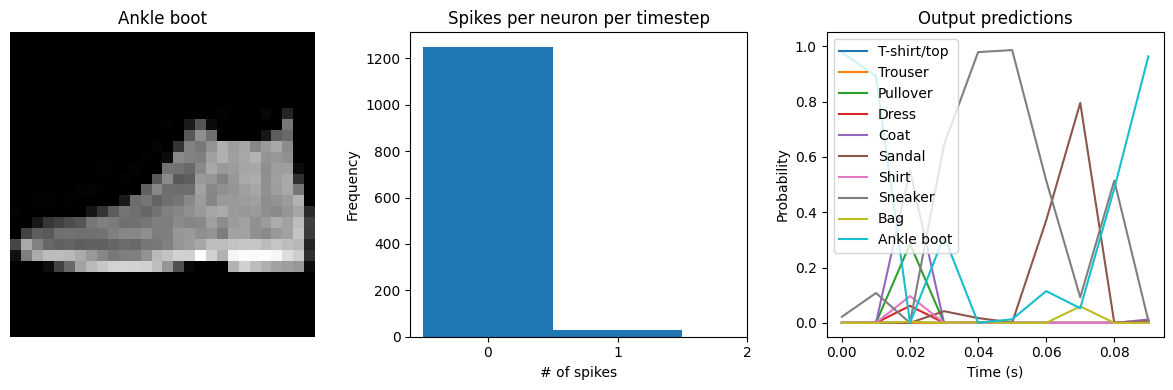

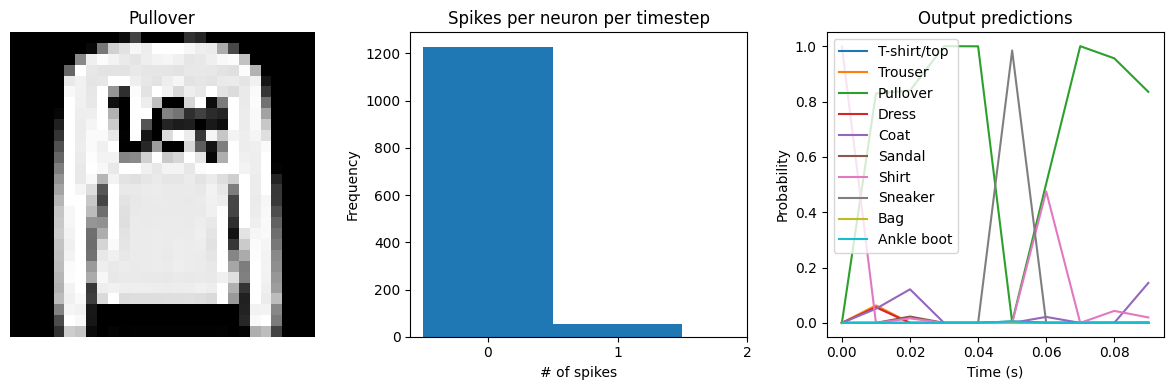

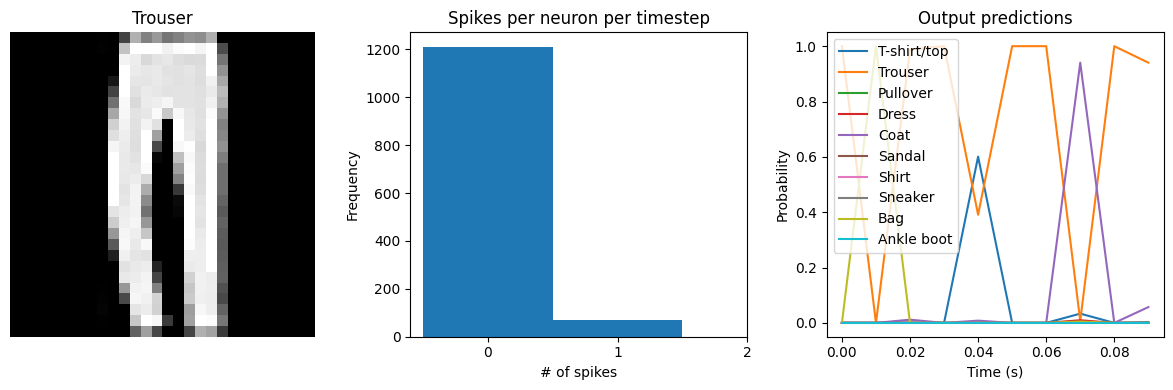

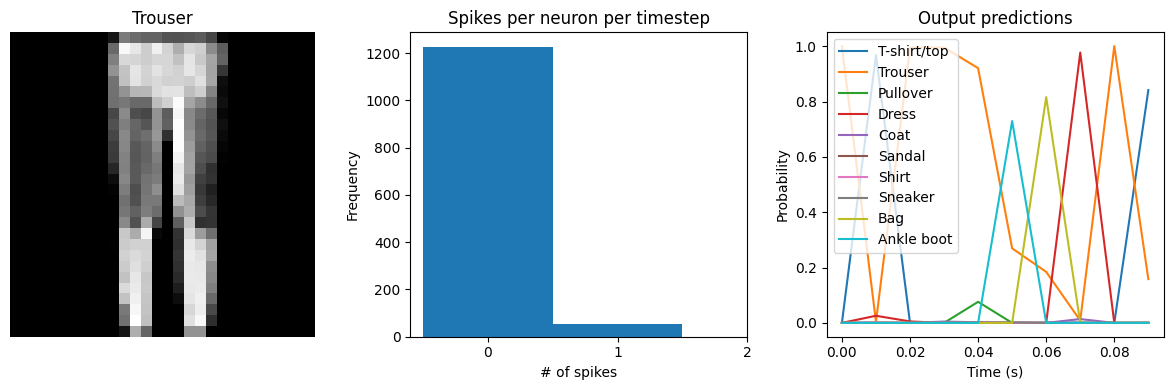

In [12]:
check_output(spikeaware_model)

We can see that with `spiking_aware_training` we're getting better performance than we
were with the equivalent `dt` value above. The model has learned weights that are less
sensitive to the discrete, sparse output produced by the spiking neurons.

## Spike rate regularization

As we saw in the [Simulation time section](#Simulation-time), the spiking rate of the
neurons is very important. If a neuron is spiking too slowly then we don't have enough
information to determine its output value. Conversely, if a neuron is spiking too
quickly then we may lose the spiking advantages we are looking for, such as temporal
sparsity.

Thus it can be helpful to more directly control the firing rates in the model by
applying regularization penalties during training. Any of the standard Keras
regularization functions can be used. KerasSpiking also includes some additional
regularizers that can be useful for this case as they allow us to specify a non-zero
reference point (so we can drive the activities towards some value greater than zero),
or a range of acceptable values.

In [13]:
regularized_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation(
            "relu",
            dt=0.01,
            spiking_aware_training=True,
            # add activity regularizer to encourage spike rates between 10 and 20 Hz
            activity_regularizer=keras_spiking.regularizers.L2(
                l2=1e-4, target=(10, 20)
            ),
        ),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(regularized_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 22:40 - loss: 20.2413 - accuracy: 0.0312

  13/1875 [..............................] - ETA: 7s - loss: 21.8506 - accuracy: 0.1635   

  25/1875 [..............................] - ETA: 7s - loss: 25.9789 - accuracy: 0.2037

  37/1875 [..............................] - ETA: 7s - loss: 29.8968 - accuracy: 0.2348

  49/1875 [..............................] - ETA: 7s - loss: 33.5168 - accuracy: 0.2653

  61/1875 [..............................] - ETA: 7s - loss: 37.1136 - accuracy: 0.2751

  73/1875 [>.............................] - ETA: 7s - loss: 40.6255 - accuracy: 0.2971

  86/1875 [>.............................] - ETA: 7s - loss: 44.0682 - accuracy: 0.3201

  98/1875 [>.............................] - ETA: 7s - loss: 47.0283 - accuracy: 0.3335

 110/1875 [>.............................] - ETA: 7s - loss: 49.6236 - accuracy: 0.3474

 121/1875 [>.............................] - ETA: 7s - loss: 51.9365 - accuracy: 0.3636

 133/1875 [=>............................] - ETA: 7s - loss: 54.0808 - accuracy: 0.3769

 144/1875 [=>............................] - ETA: 7s - loss: 56.0479 - accuracy: 0.3854

 156/1875 [=>............................] - ETA: 7s - loss: 57.8332 - accuracy: 0.3932

 168/1875 [=>............................] - ETA: 7s - loss: 59.8300 - accuracy: 0.4003

 176/1875 [=>............................] - ETA: 7s - loss: 61.0028 - accuracy: 0.4062

 187/1875 [=>............................] - ETA: 7s - loss: 62.4341 - accuracy: 0.4144

 199/1875 [==>...........................] - ETA: 7s - loss: 63.9175 - accuracy: 0.4221

 210/1875 [==>...........................] - ETA: 7s - loss: 65.1820 - accuracy: 0.4298

 222/1875 [==>...........................] - ETA: 7s - loss: 66.2253 - accuracy: 0.4367

 234/1875 [==>...........................] - ETA: 7s - loss: 67.2777 - accuracy: 0.4427

 246/1875 [==>...........................] - ETA: 7s - loss: 68.1880 - accuracy: 0.4489

 258/1875 [===>..........................] - ETA: 7s - loss: 69.2983 - accuracy: 0.4569

 270/1875 [===>..........................] - ETA: 7s - loss: 70.1245 - accuracy: 0.4625

 282/1875 [===>..........................] - ETA: 7s - loss: 70.7792 - accuracy: 0.4696

 294/1875 [===>..........................] - ETA: 6s - loss: 71.5419 - accuracy: 0.4753

 306/1875 [===>..........................] - ETA: 6s - loss: 72.3063 - accuracy: 0.4795

 318/1875 [====>.........................] - ETA: 6s - loss: 72.9942 - accuracy: 0.4832

 330/1875 [====>.........................] - ETA: 6s - loss: 73.6055 - accuracy: 0.4861

 342/1875 [====>.........................] - ETA: 6s - loss: 74.2033 - accuracy: 0.4896

 354/1875 [====>.........................] - ETA: 6s - loss: 74.7388 - accuracy: 0.4935

 366/1875 [====>.........................] - ETA: 6s - loss: 75.2335 - accuracy: 0.4974

 378/1875 [=====>........................] - ETA: 6s - loss: 75.6922 - accuracy: 0.5013

 390/1875 [=====>........................] - ETA: 6s - loss: 76.0427 - accuracy: 0.5038

 402/1875 [=====>........................] - ETA: 6s - loss: 76.4065 - accuracy: 0.5077

 413/1875 [=====>........................] - ETA: 6s - loss: 76.7952 - accuracy: 0.5109

 425/1875 [=====>........................] - ETA: 6s - loss: 77.2280 - accuracy: 0.5140

 437/1875 [=====>........................] - ETA: 6s - loss: 77.5329 - accuracy: 0.5168

 447/1875 [======>.......................] - ETA: 6s - loss: 77.7706 - accuracy: 0.5189

 459/1875 [======>.......................] - ETA: 6s - loss: 78.1230 - accuracy: 0.5217

 471/1875 [======>.......................] - ETA: 6s - loss: 78.4467 - accuracy: 0.5243

 483/1875 [======>.......................] - ETA: 6s - loss: 78.7315 - accuracy: 0.5268

 495/1875 [======>.......................] - ETA: 6s - loss: 78.9798 - accuracy: 0.5290

 507/1875 [=======>......................] - ETA: 6s - loss: 79.2422 - accuracy: 0.5295

 519/1875 [=======>......................] - ETA: 5s - loss: 79.5261 - accuracy: 0.5311

 531/1875 [=======>......................] - ETA: 5s - loss: 79.7558 - accuracy: 0.5329

 543/1875 [=======>......................] - ETA: 5s - loss: 80.0012 - accuracy: 0.5357

 555/1875 [=======>......................] - ETA: 5s - loss: 80.2324 - accuracy: 0.5376

 567/1875 [========>.....................] - ETA: 5s - loss: 80.4002 - accuracy: 0.5391

 579/1875 [========>.....................] - ETA: 5s - loss: 80.6347 - accuracy: 0.5413

 591/1875 [========>.....................] - ETA: 5s - loss: 80.8412 - accuracy: 0.5429

 603/1875 [========>.....................] - ETA: 5s - loss: 81.0337 - accuracy: 0.5453

 615/1875 [========>.....................] - ETA: 5s - loss: 81.2562 - accuracy: 0.5463

 627/1875 [=========>....................] - ETA: 5s - loss: 81.4386 - accuracy: 0.5486

 639/1875 [=========>....................] - ETA: 5s - loss: 81.5925 - accuracy: 0.5508

 651/1875 [=========>....................] - ETA: 5s - loss: 81.7464 - accuracy: 0.5525

 663/1875 [=========>....................] - ETA: 5s - loss: 81.9913 - accuracy: 0.5538

 673/1875 [=========>....................] - ETA: 5s - loss: 82.1183 - accuracy: 0.5546

 684/1875 [=========>....................] - ETA: 5s - loss: 82.2412 - accuracy: 0.5565

 695/1875 [==========>...................] - ETA: 5s - loss: 82.4035 - accuracy: 0.5583

 706/1875 [==========>...................] - ETA: 5s - loss: 82.5279 - accuracy: 0.5598

 717/1875 [==========>...................] - ETA: 5s - loss: 82.6308 - accuracy: 0.5612

 728/1875 [==========>...................] - ETA: 5s - loss: 82.7231 - accuracy: 0.5626

 739/1875 [==========>...................] - ETA: 5s - loss: 82.7995 - accuracy: 0.5635

 751/1875 [===========>..................] - ETA: 5s - loss: 82.9589 - accuracy: 0.5650

 762/1875 [===========>..................] - ETA: 4s - loss: 83.0413 - accuracy: 0.5659

 774/1875 [===========>..................] - ETA: 4s - loss: 83.1146 - accuracy: 0.5670

 786/1875 [===========>..................] - ETA: 4s - loss: 83.2577 - accuracy: 0.5684

 797/1875 [===========>..................] - ETA: 4s - loss: 83.3607 - accuracy: 0.5698

 809/1875 [===========>..................] - ETA: 4s - loss: 83.5048 - accuracy: 0.5718

 821/1875 [============>.................] - ETA: 4s - loss: 83.6082 - accuracy: 0.5727

 833/1875 [============>.................] - ETA: 4s - loss: 83.7211 - accuracy: 0.5742

 845/1875 [============>.................] - ETA: 4s - loss: 83.8042 - accuracy: 0.5754

 857/1875 [============>.................] - ETA: 4s - loss: 83.9201 - accuracy: 0.5760

 868/1875 [============>.................] - ETA: 4s - loss: 84.0186 - accuracy: 0.5769

 880/1875 [=============>................] - ETA: 4s - loss: 84.1105 - accuracy: 0.5778

 892/1875 [=============>................] - ETA: 4s - loss: 84.2298 - accuracy: 0.5789

 904/1875 [=============>................] - ETA: 4s - loss: 84.3330 - accuracy: 0.5795

 916/1875 [=============>................] - ETA: 4s - loss: 84.4258 - accuracy: 0.5802

 928/1875 [=============>................] - ETA: 4s - loss: 84.4758 - accuracy: 0.5812

 940/1875 [==============>...............] - ETA: 4s - loss: 84.5847 - accuracy: 0.5821

 952/1875 [==============>...............] - ETA: 4s - loss: 84.6778 - accuracy: 0.5831

 964/1875 [==============>...............] - ETA: 4s - loss: 84.7684 - accuracy: 0.5842

 976/1875 [==============>...............] - ETA: 3s - loss: 84.8600 - accuracy: 0.5849

 987/1875 [==============>...............] - ETA: 3s - loss: 84.9543 - accuracy: 0.5854

 999/1875 [==============>...............] - ETA: 3s - loss: 85.0286 - accuracy: 0.5860

1011/1875 [===============>..............] - ETA: 3s - loss: 85.0903 - accuracy: 0.5872

1022/1875 [===============>..............] - ETA: 3s - loss: 85.1638 - accuracy: 0.5880

1034/1875 [===============>..............] - ETA: 3s - loss: 85.2441 - accuracy: 0.5887

1046/1875 [===============>..............] - ETA: 3s - loss: 85.2945 - accuracy: 0.5896

1058/1875 [===============>..............] - ETA: 3s - loss: 85.3604 - accuracy: 0.5905

1070/1875 [================>.............] - ETA: 3s - loss: 85.4234 - accuracy: 0.5917

1082/1875 [================>.............] - ETA: 3s - loss: 85.4919 - accuracy: 0.5917

1094/1875 [================>.............] - ETA: 3s - loss: 85.5695 - accuracy: 0.5925

1106/1875 [================>.............] - ETA: 3s - loss: 85.6299 - accuracy: 0.5933

1117/1875 [================>.............] - ETA: 3s - loss: 85.6912 - accuracy: 0.5937

1129/1875 [=================>............] - ETA: 3s - loss: 85.7468 - accuracy: 0.5943

1140/1875 [=================>............] - ETA: 3s - loss: 85.7922 - accuracy: 0.5947

1152/1875 [=================>............] - ETA: 3s - loss: 85.8518 - accuracy: 0.5957

1164/1875 [=================>............] - ETA: 3s - loss: 85.8965 - accuracy: 0.5966

1175/1875 [=================>............] - ETA: 3s - loss: 85.9516 - accuracy: 0.5969

1187/1875 [=================>............] - ETA: 3s - loss: 86.0090 - accuracy: 0.5976

1199/1875 [==================>...........] - ETA: 3s - loss: 86.0765 - accuracy: 0.5982

1211/1875 [==================>...........] - ETA: 2s - loss: 86.1068 - accuracy: 0.5990

1223/1875 [==================>...........] - ETA: 2s - loss: 86.1591 - accuracy: 0.6003

1235/1875 [==================>...........] - ETA: 2s - loss: 86.2180 - accuracy: 0.6011

1247/1875 [==================>...........] - ETA: 2s - loss: 86.2729 - accuracy: 0.6016

1259/1875 [===================>..........] - ETA: 2s - loss: 86.3029 - accuracy: 0.6023

1271/1875 [===================>..........] - ETA: 2s - loss: 86.3477 - accuracy: 0.6033

1283/1875 [===================>..........] - ETA: 2s - loss: 86.4063 - accuracy: 0.6041

1295/1875 [===================>..........] - ETA: 2s - loss: 86.4665 - accuracy: 0.6048

1306/1875 [===================>..........] - ETA: 2s - loss: 86.4974 - accuracy: 0.6056

1317/1875 [====================>.........] - ETA: 2s - loss: 86.5417 - accuracy: 0.6066

1329/1875 [====================>.........] - ETA: 2s - loss: 86.5708 - accuracy: 0.6071

1340/1875 [====================>.........] - ETA: 2s - loss: 86.6439 - accuracy: 0.6074

1352/1875 [====================>.........] - ETA: 2s - loss: 86.6938 - accuracy: 0.6083

1364/1875 [====================>.........] - ETA: 2s - loss: 86.7421 - accuracy: 0.6091

1376/1875 [=====================>........] - ETA: 2s - loss: 86.8005 - accuracy: 0.6094

1388/1875 [=====================>........] - ETA: 2s - loss: 86.8465 - accuracy: 0.6098

1399/1875 [=====================>........] - ETA: 2s - loss: 86.8892 - accuracy: 0.6100

1411/1875 [=====================>........] - ETA: 2s - loss: 86.9371 - accuracy: 0.6104

1422/1875 [=====================>........] - ETA: 2s - loss: 86.9781 - accuracy: 0.6106

1434/1875 [=====================>........] - ETA: 1s - loss: 86.9990 - accuracy: 0.6106

1446/1875 [======================>.......] - ETA: 1s - loss: 87.0388 - accuracy: 0.6116

1458/1875 [======================>.......] - ETA: 1s - loss: 87.0746 - accuracy: 0.6121

1470/1875 [======================>.......] - ETA: 1s - loss: 87.1048 - accuracy: 0.6125

1482/1875 [======================>.......] - ETA: 1s - loss: 87.1438 - accuracy: 0.6131

1493/1875 [======================>.......] - ETA: 1s - loss: 87.1789 - accuracy: 0.6139

1505/1875 [=======================>......] - ETA: 1s - loss: 87.2349 - accuracy: 0.6149

1517/1875 [=======================>......] - ETA: 1s - loss: 87.2727 - accuracy: 0.6157

1529/1875 [=======================>......] - ETA: 1s - loss: 87.3104 - accuracy: 0.6160

1541/1875 [=======================>......] - ETA: 1s - loss: 87.3615 - accuracy: 0.6165

1553/1875 [=======================>......] - ETA: 1s - loss: 87.4091 - accuracy: 0.6170

1564/1875 [========================>.....] - ETA: 1s - loss: 87.4359 - accuracy: 0.6174

1576/1875 [========================>.....] - ETA: 1s - loss: 87.4756 - accuracy: 0.6178

1588/1875 [========================>.....] - ETA: 1s - loss: 87.4946 - accuracy: 0.6183

1600/1875 [========================>.....] - ETA: 1s - loss: 87.5197 - accuracy: 0.6188

1611/1875 [========================>.....] - ETA: 1s - loss: 87.5382 - accuracy: 0.6194

1622/1875 [========================>.....] - ETA: 1s - loss: 87.5691 - accuracy: 0.6199

1629/1875 [=========================>....] - ETA: 1s - loss: 87.5791 - accuracy: 0.6198

1632/1875 [=========================>....] - ETA: 1s - loss: 87.5879 - accuracy: 0.6199

1640/1875 [=========================>....] - ETA: 1s - loss: 87.6023 - accuracy: 0.6202

1652/1875 [=========================>....] - ETA: 1s - loss: 87.6479 - accuracy: 0.6208

1664/1875 [=========================>....] - ETA: 0s - loss: 87.6998 - accuracy: 0.6210

1676/1875 [=========================>....] - ETA: 0s - loss: 87.7416 - accuracy: 0.6213

1687/1875 [=========================>....] - ETA: 0s - loss: 87.7798 - accuracy: 0.6215

1698/1875 [==========================>...] - ETA: 0s - loss: 87.8081 - accuracy: 0.6219

1710/1875 [==========================>...] - ETA: 0s - loss: 87.8398 - accuracy: 0.6225

1722/1875 [==========================>...] - ETA: 0s - loss: 87.8641 - accuracy: 0.6230

1734/1875 [==========================>...] - ETA: 0s - loss: 87.8883 - accuracy: 0.6233

1746/1875 [==========================>...] - ETA: 0s - loss: 87.9285 - accuracy: 0.6236

1758/1875 [===========================>..] - ETA: 0s - loss: 87.9591 - accuracy: 0.6241

1769/1875 [===========================>..] - ETA: 0s - loss: 87.9770 - accuracy: 0.6247

1780/1875 [===========================>..] - ETA: 0s - loss: 88.0120 - accuracy: 0.6252

1792/1875 [===========================>..] - ETA: 0s - loss: 88.0439 - accuracy: 0.6255

1804/1875 [===========================>..] - ETA: 0s - loss: 88.0784 - accuracy: 0.6260

1816/1875 [============================>.] - ETA: 0s - loss: 88.1063 - accuracy: 0.6263

1828/1875 [============================>.] - ETA: 0s - loss: 88.1282 - accuracy: 0.6267

1840/1875 [============================>.] - ETA: 0s - loss: 88.1564 - accuracy: 0.6273

1852/1875 [============================>.] - ETA: 0s - loss: 88.1778 - accuracy: 0.6278

1864/1875 [============================>.] - ETA: 0s - loss: 88.2106 - accuracy: 0.6280

1875/1875 [==============================] - 9s 5ms/step - loss: 88.2274 - accuracy: 0.6283


Epoch 2/10


   1/1875 [..............................] - ETA: 9s - loss: 88.6472 - accuracy: 0.6562

  13/1875 [..............................] - ETA: 8s - loss: 94.1170 - accuracy: 0.6659

  23/1875 [..............................] - ETA: 8s - loss: 92.5257 - accuracy: 0.6793

  35/1875 [..............................] - ETA: 8s - loss: 91.8910 - accuracy: 0.6679

  47/1875 [..............................] - ETA: 8s - loss: 92.0938 - accuracy: 0.6629

  58/1875 [..............................] - ETA: 8s - loss: 92.1579 - accuracy: 0.6665

  70/1875 [>.............................] - ETA: 8s - loss: 92.4160 - accuracy: 0.6763

  82/1875 [>.............................] - ETA: 8s - loss: 92.1296 - accuracy: 0.6787

  93/1875 [>.............................] - ETA: 8s - loss: 92.1296 - accuracy: 0.6821

 105/1875 [>.............................] - ETA: 8s - loss: 92.3619 - accuracy: 0.6842

 117/1875 [>.............................] - ETA: 7s - loss: 92.4631 - accuracy: 0.6872

 129/1875 [=>............................] - ETA: 7s - loss: 92.4006 - accuracy: 0.6829

 141/1875 [=>............................] - ETA: 7s - loss: 92.4305 - accuracy: 0.6820

 153/1875 [=>............................] - ETA: 7s - loss: 92.4430 - accuracy: 0.6820

 165/1875 [=>............................] - ETA: 7s - loss: 92.4510 - accuracy: 0.6816

 176/1875 [=>............................] - ETA: 7s - loss: 92.2020 - accuracy: 0.6825

 188/1875 [==>...........................] - ETA: 7s - loss: 92.2756 - accuracy: 0.6817

 199/1875 [==>...........................] - ETA: 7s - loss: 92.4822 - accuracy: 0.6820

 211/1875 [==>...........................] - ETA: 7s - loss: 92.4665 - accuracy: 0.6817

 223/1875 [==>...........................] - ETA: 7s - loss: 92.4618 - accuracy: 0.6848

 235/1875 [==>...........................] - ETA: 7s - loss: 92.3709 - accuracy: 0.6854

 247/1875 [==>...........................] - ETA: 7s - loss: 92.4403 - accuracy: 0.6847

 259/1875 [===>..........................] - ETA: 7s - loss: 92.4902 - accuracy: 0.6875

 271/1875 [===>..........................] - ETA: 7s - loss: 92.4473 - accuracy: 0.6877

 283/1875 [===>..........................] - ETA: 7s - loss: 92.4406 - accuracy: 0.6879

 295/1875 [===>..........................] - ETA: 7s - loss: 92.4634 - accuracy: 0.6859

 304/1875 [===>..........................] - ETA: 7s - loss: 92.4852 - accuracy: 0.6848

 316/1875 [====>.........................] - ETA: 7s - loss: 92.5053 - accuracy: 0.6855

 328/1875 [====>.........................] - ETA: 6s - loss: 92.4930 - accuracy: 0.6864

 340/1875 [====>.........................] - ETA: 6s - loss: 92.4945 - accuracy: 0.6869

 351/1875 [====>.........................] - ETA: 6s - loss: 92.4584 - accuracy: 0.6882

 363/1875 [====>.........................] - ETA: 6s - loss: 92.4425 - accuracy: 0.6881

 375/1875 [=====>........................] - ETA: 6s - loss: 92.4636 - accuracy: 0.6894

 386/1875 [=====>........................] - ETA: 6s - loss: 92.5158 - accuracy: 0.6893

 398/1875 [=====>........................] - ETA: 6s - loss: 92.4812 - accuracy: 0.6894

 410/1875 [=====>........................] - ETA: 6s - loss: 92.4952 - accuracy: 0.6904

 422/1875 [=====>........................] - ETA: 6s - loss: 92.4904 - accuracy: 0.6888

 434/1875 [=====>........................] - ETA: 6s - loss: 92.4754 - accuracy: 0.6892

 446/1875 [======>.......................] - ETA: 6s - loss: 92.4922 - accuracy: 0.6895

 458/1875 [======>.......................] - ETA: 6s - loss: 92.4955 - accuracy: 0.6908

 469/1875 [======>.......................] - ETA: 6s - loss: 92.5045 - accuracy: 0.6910

 481/1875 [======>.......................] - ETA: 6s - loss: 92.5158 - accuracy: 0.6911

 493/1875 [======>.......................] - ETA: 6s - loss: 92.5174 - accuracy: 0.6907

 505/1875 [=======>......................] - ETA: 6s - loss: 92.4836 - accuracy: 0.6901

 515/1875 [=======>......................] - ETA: 6s - loss: 92.5450 - accuracy: 0.6895

 527/1875 [=======>......................] - ETA: 6s - loss: 92.5320 - accuracy: 0.6889

 539/1875 [=======>......................] - ETA: 5s - loss: 92.5061 - accuracy: 0.6889

 551/1875 [=======>......................] - ETA: 5s - loss: 92.5396 - accuracy: 0.6891

 563/1875 [========>.....................] - ETA: 5s - loss: 92.5327 - accuracy: 0.6898

 574/1875 [========>.....................] - ETA: 5s - loss: 92.5894 - accuracy: 0.6907

 585/1875 [========>.....................] - ETA: 5s - loss: 92.6297 - accuracy: 0.6911

 597/1875 [========>.....................] - ETA: 5s - loss: 92.5886 - accuracy: 0.6918

 609/1875 [========>.....................] - ETA: 5s - loss: 92.5788 - accuracy: 0.6915

 621/1875 [========>.....................] - ETA: 5s - loss: 92.5403 - accuracy: 0.6913

 633/1875 [=========>....................] - ETA: 5s - loss: 92.5302 - accuracy: 0.6905

 645/1875 [=========>....................] - ETA: 5s - loss: 92.5529 - accuracy: 0.6906

 657/1875 [=========>....................] - ETA: 5s - loss: 92.5137 - accuracy: 0.6907

 668/1875 [=========>....................] - ETA: 5s - loss: 92.5383 - accuracy: 0.6911

 679/1875 [=========>....................] - ETA: 5s - loss: 92.5403 - accuracy: 0.6914

 691/1875 [==========>...................] - ETA: 5s - loss: 92.5555 - accuracy: 0.6918

 702/1875 [==========>...................] - ETA: 5s - loss: 92.5608 - accuracy: 0.6917

 714/1875 [==========>...................] - ETA: 5s - loss: 92.5765 - accuracy: 0.6921

 726/1875 [==========>...................] - ETA: 5s - loss: 92.5642 - accuracy: 0.6928

 738/1875 [==========>...................] - ETA: 5s - loss: 92.5694 - accuracy: 0.6928

 750/1875 [===========>..................] - ETA: 5s - loss: 92.5972 - accuracy: 0.6930

 761/1875 [===========>..................] - ETA: 4s - loss: 92.5901 - accuracy: 0.6927

 773/1875 [===========>..................] - ETA: 4s - loss: 92.5944 - accuracy: 0.6935

 785/1875 [===========>..................] - ETA: 4s - loss: 92.5992 - accuracy: 0.6931

 797/1875 [===========>..................] - ETA: 4s - loss: 92.5926 - accuracy: 0.6932

 809/1875 [===========>..................] - ETA: 4s - loss: 92.6182 - accuracy: 0.6938

 821/1875 [============>.................] - ETA: 4s - loss: 92.6188 - accuracy: 0.6940

 833/1875 [============>.................] - ETA: 4s - loss: 92.6074 - accuracy: 0.6933

 845/1875 [============>.................] - ETA: 4s - loss: 92.6041 - accuracy: 0.6928

 857/1875 [============>.................] - ETA: 4s - loss: 92.6361 - accuracy: 0.6927

 868/1875 [============>.................] - ETA: 4s - loss: 92.6523 - accuracy: 0.6933

 880/1875 [=============>................] - ETA: 4s - loss: 92.6408 - accuracy: 0.6940

 892/1875 [=============>................] - ETA: 4s - loss: 92.6221 - accuracy: 0.6942

 904/1875 [=============>................] - ETA: 4s - loss: 92.6403 - accuracy: 0.6945

 916/1875 [=============>................] - ETA: 4s - loss: 92.6507 - accuracy: 0.6950

 928/1875 [=============>................] - ETA: 4s - loss: 92.6693 - accuracy: 0.6949

 939/1875 [==============>...............] - ETA: 4s - loss: 92.6707 - accuracy: 0.6953

 951/1875 [==============>...............] - ETA: 4s - loss: 92.6896 - accuracy: 0.6958

 963/1875 [==============>...............] - ETA: 4s - loss: 92.7009 - accuracy: 0.6960

 975/1875 [==============>...............] - ETA: 4s - loss: 92.6958 - accuracy: 0.6960

 987/1875 [==============>...............] - ETA: 3s - loss: 92.6723 - accuracy: 0.6957

 999/1875 [==============>...............] - ETA: 3s - loss: 92.6865 - accuracy: 0.6959

1011/1875 [===============>..............] - ETA: 3s - loss: 92.6928 - accuracy: 0.6957

1023/1875 [===============>..............] - ETA: 3s - loss: 92.6984 - accuracy: 0.6957

1035/1875 [===============>..............] - ETA: 3s - loss: 92.6993 - accuracy: 0.6960

1047/1875 [===============>..............] - ETA: 3s - loss: 92.7175 - accuracy: 0.6964

1059/1875 [===============>..............] - ETA: 3s - loss: 92.7417 - accuracy: 0.6967

1071/1875 [================>.............] - ETA: 3s - loss: 92.7254 - accuracy: 0.6968

1083/1875 [================>.............] - ETA: 3s - loss: 92.7378 - accuracy: 0.6967

1094/1875 [================>.............] - ETA: 3s - loss: 92.7146 - accuracy: 0.6966

1106/1875 [================>.............] - ETA: 3s - loss: 92.7114 - accuracy: 0.6971

1118/1875 [================>.............] - ETA: 3s - loss: 92.7081 - accuracy: 0.6970

1130/1875 [=================>............] - ETA: 3s - loss: 92.7090 - accuracy: 0.6973

1142/1875 [=================>............] - ETA: 3s - loss: 92.7182 - accuracy: 0.6971

1154/1875 [=================>............] - ETA: 3s - loss: 92.7417 - accuracy: 0.6968

1166/1875 [=================>............] - ETA: 3s - loss: 92.7384 - accuracy: 0.6958

1178/1875 [=================>............] - ETA: 3s - loss: 92.7413 - accuracy: 0.6956

1190/1875 [==================>...........] - ETA: 3s - loss: 92.7464 - accuracy: 0.6954

1201/1875 [==================>...........] - ETA: 3s - loss: 92.7251 - accuracy: 0.6957

1213/1875 [==================>...........] - ETA: 2s - loss: 92.7538 - accuracy: 0.6961

1224/1875 [==================>...........] - ETA: 2s - loss: 92.7580 - accuracy: 0.6963

1236/1875 [==================>...........] - ETA: 2s - loss: 92.7656 - accuracy: 0.6964

1247/1875 [==================>...........] - ETA: 2s - loss: 92.7547 - accuracy: 0.6962

1257/1875 [===================>..........] - ETA: 2s - loss: 92.7751 - accuracy: 0.6963

1268/1875 [===================>..........] - ETA: 2s - loss: 92.7777 - accuracy: 0.6963

1280/1875 [===================>..........] - ETA: 2s - loss: 92.7850 - accuracy: 0.6965

1292/1875 [===================>..........] - ETA: 2s - loss: 92.7942 - accuracy: 0.6964

1304/1875 [===================>..........] - ETA: 2s - loss: 92.8068 - accuracy: 0.6964

1316/1875 [====================>.........] - ETA: 2s - loss: 92.8134 - accuracy: 0.6962

1328/1875 [====================>.........] - ETA: 2s - loss: 92.8139 - accuracy: 0.6959

1340/1875 [====================>.........] - ETA: 2s - loss: 92.8161 - accuracy: 0.6961

1352/1875 [====================>.........] - ETA: 2s - loss: 92.8067 - accuracy: 0.6962

1364/1875 [====================>.........] - ETA: 2s - loss: 92.8243 - accuracy: 0.6963

1376/1875 [=====================>........] - ETA: 2s - loss: 92.8247 - accuracy: 0.6964

1388/1875 [=====================>........] - ETA: 2s - loss: 92.8322 - accuracy: 0.6964

1400/1875 [=====================>........] - ETA: 2s - loss: 92.8279 - accuracy: 0.6965

1412/1875 [=====================>........] - ETA: 2s - loss: 92.8379 - accuracy: 0.6971

1424/1875 [=====================>........] - ETA: 2s - loss: 92.8522 - accuracy: 0.6974

1435/1875 [=====================>........] - ETA: 1s - loss: 92.8549 - accuracy: 0.6976

1446/1875 [======================>.......] - ETA: 1s - loss: 92.8466 - accuracy: 0.6979

1458/1875 [======================>.......] - ETA: 1s - loss: 92.8409 - accuracy: 0.6976

1470/1875 [======================>.......] - ETA: 1s - loss: 92.8511 - accuracy: 0.6977

1482/1875 [======================>.......] - ETA: 1s - loss: 92.8610 - accuracy: 0.6979

1493/1875 [======================>.......] - ETA: 1s - loss: 92.8738 - accuracy: 0.6977

1505/1875 [=======================>......] - ETA: 1s - loss: 92.8949 - accuracy: 0.6978

1516/1875 [=======================>......] - ETA: 1s - loss: 92.8801 - accuracy: 0.6979

1528/1875 [=======================>......] - ETA: 1s - loss: 92.8933 - accuracy: 0.6978

1540/1875 [=======================>......] - ETA: 1s - loss: 92.8892 - accuracy: 0.6979

1552/1875 [=======================>......] - ETA: 1s - loss: 92.8905 - accuracy: 0.6980

1564/1875 [========================>.....] - ETA: 1s - loss: 92.8960 - accuracy: 0.6980

1576/1875 [========================>.....] - ETA: 1s - loss: 92.9012 - accuracy: 0.6981

1588/1875 [========================>.....] - ETA: 1s - loss: 92.8987 - accuracy: 0.6984

1600/1875 [========================>.....] - ETA: 1s - loss: 92.9007 - accuracy: 0.6986

1612/1875 [========================>.....] - ETA: 1s - loss: 92.9048 - accuracy: 0.6987

1624/1875 [========================>.....] - ETA: 1s - loss: 92.9058 - accuracy: 0.6989

1636/1875 [=========================>....] - ETA: 1s - loss: 92.9182 - accuracy: 0.6989

1647/1875 [=========================>....] - ETA: 1s - loss: 92.9257 - accuracy: 0.6989

1659/1875 [=========================>....] - ETA: 0s - loss: 92.9245 - accuracy: 0.6990

1671/1875 [=========================>....] - ETA: 0s - loss: 92.9351 - accuracy: 0.6990

1683/1875 [=========================>....] - ETA: 0s - loss: 92.9473 - accuracy: 0.6992

1695/1875 [==========================>...] - ETA: 0s - loss: 92.9494 - accuracy: 0.6994

1706/1875 [==========================>...] - ETA: 0s - loss: 92.9494 - accuracy: 0.6994

1718/1875 [==========================>...] - ETA: 0s - loss: 92.9505 - accuracy: 0.6997

1730/1875 [==========================>...] - ETA: 0s - loss: 92.9596 - accuracy: 0.6996

1742/1875 [==========================>...] - ETA: 0s - loss: 92.9661 - accuracy: 0.6999

1754/1875 [===========================>..] - ETA: 0s - loss: 92.9619 - accuracy: 0.6997

1766/1875 [===========================>..] - ETA: 0s - loss: 92.9746 - accuracy: 0.6996

1778/1875 [===========================>..] - ETA: 0s - loss: 92.9707 - accuracy: 0.6997

1790/1875 [===========================>..] - ETA: 0s - loss: 92.9841 - accuracy: 0.6995

1802/1875 [===========================>..] - ETA: 0s - loss: 92.9785 - accuracy: 0.6996

1814/1875 [============================>.] - ETA: 0s - loss: 92.9896 - accuracy: 0.6996

1825/1875 [============================>.] - ETA: 0s - loss: 92.9908 - accuracy: 0.6997

1837/1875 [============================>.] - ETA: 0s - loss: 93.0095 - accuracy: 0.6998

1849/1875 [============================>.] - ETA: 0s - loss: 93.0145 - accuracy: 0.6995

1861/1875 [============================>.] - ETA: 0s - loss: 93.0103 - accuracy: 0.6993

1873/1875 [============================>.] - ETA: 0s - loss: 92.9956 - accuracy: 0.6994

1875/1875 [==============================] - 8s 4ms/step - loss: 92.9940 - accuracy: 0.6993


Epoch 3/10


   1/1875 [..............................] - ETA: 9s - loss: 95.7080 - accuracy: 0.7500

  13/1875 [..............................] - ETA: 8s - loss: 94.0279 - accuracy: 0.7284

  25/1875 [..............................] - ETA: 8s - loss: 93.7055 - accuracy: 0.7188

  36/1875 [..............................] - ETA: 8s - loss: 93.3268 - accuracy: 0.7196

  48/1875 [..............................] - ETA: 8s - loss: 93.0380 - accuracy: 0.7129

  59/1875 [..............................] - ETA: 8s - loss: 93.3742 - accuracy: 0.7007

  71/1875 [>.............................] - ETA: 8s - loss: 93.4277 - accuracy: 0.6976

  83/1875 [>.............................] - ETA: 7s - loss: 93.3751 - accuracy: 0.6977

  95/1875 [>.............................] - ETA: 7s - loss: 93.3494 - accuracy: 0.6997

 107/1875 [>.............................] - ETA: 7s - loss: 93.4380 - accuracy: 0.7027

 119/1875 [>.............................] - ETA: 7s - loss: 93.4589 - accuracy: 0.7048

 131/1875 [=>............................] - ETA: 7s - loss: 93.3534 - accuracy: 0.7047

 143/1875 [=>............................] - ETA: 7s - loss: 93.4451 - accuracy: 0.7087

 155/1875 [=>............................] - ETA: 7s - loss: 93.4901 - accuracy: 0.7089

 167/1875 [=>............................] - ETA: 7s - loss: 93.2918 - accuracy: 0.7100

 177/1875 [=>............................] - ETA: 7s - loss: 93.2787 - accuracy: 0.7082

 189/1875 [==>...........................] - ETA: 7s - loss: 93.3895 - accuracy: 0.7055

 201/1875 [==>...........................] - ETA: 7s - loss: 93.4877 - accuracy: 0.7069

 213/1875 [==>...........................] - ETA: 7s - loss: 93.4838 - accuracy: 0.7077

 225/1875 [==>...........................] - ETA: 7s - loss: 93.5390 - accuracy: 0.7081

 237/1875 [==>...........................] - ETA: 7s - loss: 93.4585 - accuracy: 0.7090

 249/1875 [==>...........................] - ETA: 7s - loss: 93.4607 - accuracy: 0.7098

 261/1875 [===>..........................] - ETA: 7s - loss: 93.4441 - accuracy: 0.7080

 272/1875 [===>..........................] - ETA: 7s - loss: 93.5016 - accuracy: 0.7082

 284/1875 [===>..........................] - ETA: 6s - loss: 93.4778 - accuracy: 0.7085

 296/1875 [===>..........................] - ETA: 6s - loss: 93.4904 - accuracy: 0.7083

 308/1875 [===>..........................] - ETA: 6s - loss: 93.5434 - accuracy: 0.7062

 320/1875 [====>.........................] - ETA: 6s - loss: 93.6125 - accuracy: 0.7056

 329/1875 [====>.........................] - ETA: 6s - loss: 93.6495 - accuracy: 0.7045

 341/1875 [====>.........................] - ETA: 6s - loss: 93.5347 - accuracy: 0.7044

 353/1875 [====>.........................] - ETA: 6s - loss: 93.4902 - accuracy: 0.7043

 365/1875 [====>.........................] - ETA: 6s - loss: 93.5826 - accuracy: 0.7054

 377/1875 [=====>........................] - ETA: 6s - loss: 93.5401 - accuracy: 0.7052

 388/1875 [=====>........................] - ETA: 6s - loss: 93.5528 - accuracy: 0.7056

 400/1875 [=====>........................] - ETA: 6s - loss: 93.5933 - accuracy: 0.7059

 411/1875 [=====>........................] - ETA: 6s - loss: 93.5919 - accuracy: 0.7067

 423/1875 [=====>........................] - ETA: 6s - loss: 93.6286 - accuracy: 0.7064

 435/1875 [=====>........................] - ETA: 6s - loss: 93.6186 - accuracy: 0.7069

 446/1875 [======>.......................] - ETA: 6s - loss: 93.5826 - accuracy: 0.7067

 458/1875 [======>.......................] - ETA: 6s - loss: 93.5846 - accuracy: 0.7078

 470/1875 [======>.......................] - ETA: 6s - loss: 93.5839 - accuracy: 0.7074

 482/1875 [======>.......................] - ETA: 6s - loss: 93.5923 - accuracy: 0.7071

 493/1875 [======>.......................] - ETA: 6s - loss: 93.5938 - accuracy: 0.7068

 503/1875 [=======>......................] - ETA: 6s - loss: 93.5893 - accuracy: 0.7058

 515/1875 [=======>......................] - ETA: 6s - loss: 93.5892 - accuracy: 0.7063

 527/1875 [=======>......................] - ETA: 5s - loss: 93.5664 - accuracy: 0.7058

 539/1875 [=======>......................] - ETA: 5s - loss: 93.5588 - accuracy: 0.7063

 551/1875 [=======>......................] - ETA: 5s - loss: 93.5707 - accuracy: 0.7058

 563/1875 [========>.....................] - ETA: 5s - loss: 93.5502 - accuracy: 0.7038

 575/1875 [========>.....................] - ETA: 5s - loss: 93.6071 - accuracy: 0.7035

 587/1875 [========>.....................] - ETA: 5s - loss: 93.6016 - accuracy: 0.7030

 599/1875 [========>.....................] - ETA: 5s - loss: 93.6267 - accuracy: 0.7034

 610/1875 [========>.....................] - ETA: 5s - loss: 93.6057 - accuracy: 0.7035

 622/1875 [========>.....................] - ETA: 5s - loss: 93.6036 - accuracy: 0.7031

 634/1875 [=========>....................] - ETA: 5s - loss: 93.5840 - accuracy: 0.7028

 646/1875 [=========>....................] - ETA: 5s - loss: 93.5996 - accuracy: 0.7027

 658/1875 [=========>....................] - ETA: 5s - loss: 93.5893 - accuracy: 0.7033

 670/1875 [=========>....................] - ETA: 5s - loss: 93.6148 - accuracy: 0.7040

 681/1875 [=========>....................] - ETA: 5s - loss: 93.5914 - accuracy: 0.7038

 693/1875 [==========>...................] - ETA: 5s - loss: 93.5623 - accuracy: 0.7036

 705/1875 [==========>...................] - ETA: 5s - loss: 93.5623 - accuracy: 0.7045

 717/1875 [==========>...................] - ETA: 5s - loss: 93.6004 - accuracy: 0.7051

 729/1875 [==========>...................] - ETA: 5s - loss: 93.5950 - accuracy: 0.7050

 741/1875 [==========>...................] - ETA: 5s - loss: 93.5777 - accuracy: 0.7047

 753/1875 [===========>..................] - ETA: 4s - loss: 93.5670 - accuracy: 0.7048

 765/1875 [===========>..................] - ETA: 4s - loss: 93.5682 - accuracy: 0.7050

 777/1875 [===========>..................] - ETA: 4s - loss: 93.5611 - accuracy: 0.7054

 789/1875 [===========>..................] - ETA: 4s - loss: 93.5716 - accuracy: 0.7053

 801/1875 [===========>..................] - ETA: 4s - loss: 93.5716 - accuracy: 0.7052

 813/1875 [============>.................] - ETA: 4s - loss: 93.5548 - accuracy: 0.7051

 825/1875 [============>.................] - ETA: 4s - loss: 93.5650 - accuracy: 0.7051

 837/1875 [============>.................] - ETA: 4s - loss: 93.5654 - accuracy: 0.7051

 849/1875 [============>.................] - ETA: 4s - loss: 93.5895 - accuracy: 0.7053

 861/1875 [============>.................] - ETA: 4s - loss: 93.5963 - accuracy: 0.7055

 873/1875 [============>.................] - ETA: 4s - loss: 93.6059 - accuracy: 0.7059

 885/1875 [=============>................] - ETA: 4s - loss: 93.5990 - accuracy: 0.7060

 897/1875 [=============>................] - ETA: 4s - loss: 93.6304 - accuracy: 0.7065

 904/1875 [=============>................] - ETA: 4s - loss: 93.6341 - accuracy: 0.7065

 915/1875 [=============>................] - ETA: 4s - loss: 93.6442 - accuracy: 0.7061

 927/1875 [=============>................] - ETA: 4s - loss: 93.6448 - accuracy: 0.7067

 938/1875 [==============>...............] - ETA: 4s - loss: 93.6434 - accuracy: 0.7067

 950/1875 [==============>...............] - ETA: 4s - loss: 93.6611 - accuracy: 0.7073

 962/1875 [==============>...............] - ETA: 4s - loss: 93.6557 - accuracy: 0.7074

 974/1875 [==============>...............] - ETA: 4s - loss: 93.6538 - accuracy: 0.7078

 986/1875 [==============>...............] - ETA: 3s - loss: 93.6408 - accuracy: 0.7079

 998/1875 [==============>...............] - ETA: 3s - loss: 93.6502 - accuracy: 0.7081

1010/1875 [===============>..............] - ETA: 3s - loss: 93.6653 - accuracy: 0.7085

1022/1875 [===============>..............] - ETA: 3s - loss: 93.6832 - accuracy: 0.7084

1034/1875 [===============>..............] - ETA: 3s - loss: 93.6664 - accuracy: 0.7085

1046/1875 [===============>..............] - ETA: 3s - loss: 93.6523 - accuracy: 0.7086

1058/1875 [===============>..............] - ETA: 3s - loss: 93.6467 - accuracy: 0.7088

1070/1875 [================>.............] - ETA: 3s - loss: 93.6703 - accuracy: 0.7084

1082/1875 [================>.............] - ETA: 3s - loss: 93.6770 - accuracy: 0.7090

1093/1875 [================>.............] - ETA: 3s - loss: 93.6726 - accuracy: 0.7093

1105/1875 [================>.............] - ETA: 3s - loss: 93.6744 - accuracy: 0.7094

1116/1875 [================>.............] - ETA: 3s - loss: 93.6840 - accuracy: 0.7096

1126/1875 [=================>............] - ETA: 3s - loss: 93.6724 - accuracy: 0.7100

1138/1875 [=================>............] - ETA: 3s - loss: 93.6731 - accuracy: 0.7099

1150/1875 [=================>............] - ETA: 3s - loss: 93.6732 - accuracy: 0.7097

1162/1875 [=================>............] - ETA: 3s - loss: 93.6761 - accuracy: 0.7097

1173/1875 [=================>............] - ETA: 3s - loss: 93.6721 - accuracy: 0.7098

1184/1875 [=================>............] - ETA: 3s - loss: 93.6849 - accuracy: 0.7096

1195/1875 [==================>...........] - ETA: 3s - loss: 93.6812 - accuracy: 0.7094

1207/1875 [==================>...........] - ETA: 2s - loss: 93.6960 - accuracy: 0.7094

1219/1875 [==================>...........] - ETA: 2s - loss: 93.7016 - accuracy: 0.7097

1231/1875 [==================>...........] - ETA: 2s - loss: 93.6974 - accuracy: 0.7096

1243/1875 [==================>...........] - ETA: 2s - loss: 93.7051 - accuracy: 0.7099

1255/1875 [===================>..........] - ETA: 2s - loss: 93.6960 - accuracy: 0.7100

1267/1875 [===================>..........] - ETA: 2s - loss: 93.6875 - accuracy: 0.7099

1279/1875 [===================>..........] - ETA: 2s - loss: 93.6969 - accuracy: 0.7101

1291/1875 [===================>..........] - ETA: 2s - loss: 93.6976 - accuracy: 0.7103

1303/1875 [===================>..........] - ETA: 2s - loss: 93.7112 - accuracy: 0.7109

1314/1875 [====================>.........] - ETA: 2s - loss: 93.7125 - accuracy: 0.7111

1324/1875 [====================>.........] - ETA: 2s - loss: 93.7029 - accuracy: 0.7113

1336/1875 [====================>.........] - ETA: 2s - loss: 93.7131 - accuracy: 0.7114

1348/1875 [====================>.........] - ETA: 2s - loss: 93.7297 - accuracy: 0.7108

1360/1875 [====================>.........] - ETA: 2s - loss: 93.7175 - accuracy: 0.7112

1372/1875 [====================>.........] - ETA: 2s - loss: 93.7363 - accuracy: 0.7113

1384/1875 [=====================>........] - ETA: 2s - loss: 93.7402 - accuracy: 0.7113

1396/1875 [=====================>........] - ETA: 2s - loss: 93.7457 - accuracy: 0.7113

1407/1875 [=====================>........] - ETA: 2s - loss: 93.7544 - accuracy: 0.7112

1419/1875 [=====================>........] - ETA: 2s - loss: 93.7505 - accuracy: 0.7110

1431/1875 [=====================>........] - ETA: 1s - loss: 93.7551 - accuracy: 0.7110

1443/1875 [======================>.......] - ETA: 1s - loss: 93.7579 - accuracy: 0.7108

1455/1875 [======================>.......] - ETA: 1s - loss: 93.7612 - accuracy: 0.7109

1467/1875 [======================>.......] - ETA: 1s - loss: 93.7612 - accuracy: 0.7109

1479/1875 [======================>.......] - ETA: 1s - loss: 93.7654 - accuracy: 0.7111

1490/1875 [======================>.......] - ETA: 1s - loss: 93.7645 - accuracy: 0.7112

1502/1875 [=======================>......] - ETA: 1s - loss: 93.7763 - accuracy: 0.7110

1512/1875 [=======================>......] - ETA: 1s - loss: 93.7903 - accuracy: 0.7109

1523/1875 [=======================>......] - ETA: 1s - loss: 93.7837 - accuracy: 0.7112

1535/1875 [=======================>......] - ETA: 1s - loss: 93.7808 - accuracy: 0.7114

1547/1875 [=======================>......] - ETA: 1s - loss: 93.7948 - accuracy: 0.7116

1558/1875 [=======================>......] - ETA: 1s - loss: 93.7927 - accuracy: 0.7117

1570/1875 [========================>.....] - ETA: 1s - loss: 93.7875 - accuracy: 0.7118

1582/1875 [========================>.....] - ETA: 1s - loss: 93.7877 - accuracy: 0.7116

1594/1875 [========================>.....] - ETA: 1s - loss: 93.8095 - accuracy: 0.7115

1605/1875 [========================>.....] - ETA: 1s - loss: 93.8124 - accuracy: 0.7118

1617/1875 [========================>.....] - ETA: 1s - loss: 93.8083 - accuracy: 0.7119

1628/1875 [=========================>....] - ETA: 1s - loss: 93.8102 - accuracy: 0.7123

1640/1875 [=========================>....] - ETA: 1s - loss: 93.8282 - accuracy: 0.7126

1652/1875 [=========================>....] - ETA: 0s - loss: 93.8288 - accuracy: 0.7128

1664/1875 [=========================>....] - ETA: 0s - loss: 93.8199 - accuracy: 0.7130

1675/1875 [=========================>....] - ETA: 0s - loss: 93.8245 - accuracy: 0.7132

1687/1875 [=========================>....] - ETA: 0s - loss: 93.8241 - accuracy: 0.7133

1698/1875 [==========================>...] - ETA: 0s - loss: 93.8304 - accuracy: 0.7136

1710/1875 [==========================>...] - ETA: 0s - loss: 93.8473 - accuracy: 0.7140

1722/1875 [==========================>...] - ETA: 0s - loss: 93.8491 - accuracy: 0.7141

1733/1875 [==========================>...] - ETA: 0s - loss: 93.8487 - accuracy: 0.7141

1745/1875 [==========================>...] - ETA: 0s - loss: 93.8526 - accuracy: 0.7142

1757/1875 [===========================>..] - ETA: 0s - loss: 93.8450 - accuracy: 0.7141

1769/1875 [===========================>..] - ETA: 0s - loss: 93.8535 - accuracy: 0.7139

1781/1875 [===========================>..] - ETA: 0s - loss: 93.8606 - accuracy: 0.7140

1792/1875 [===========================>..] - ETA: 0s - loss: 93.8568 - accuracy: 0.7139

1803/1875 [===========================>..] - ETA: 0s - loss: 93.8550 - accuracy: 0.7138

1814/1875 [============================>.] - ETA: 0s - loss: 93.8560 - accuracy: 0.7140

1825/1875 [============================>.] - ETA: 0s - loss: 93.8693 - accuracy: 0.7143

1837/1875 [============================>.] - ETA: 0s - loss: 93.8628 - accuracy: 0.7143

1849/1875 [============================>.] - ETA: 0s - loss: 93.8682 - accuracy: 0.7143

1860/1875 [============================>.] - ETA: 0s - loss: 93.8711 - accuracy: 0.7144

1872/1875 [============================>.] - ETA: 0s - loss: 93.8770 - accuracy: 0.7143

1875/1875 [==============================] - 8s 4ms/step - loss: 93.8674 - accuracy: 0.7142


Epoch 4/10


   1/1875 [..............................] - ETA: 8s - loss: 96.2688 - accuracy: 0.7500

  12/1875 [..............................] - ETA: 8s - loss: 93.1345 - accuracy: 0.7057

  24/1875 [..............................] - ETA: 8s - loss: 93.5786 - accuracy: 0.7135

  35/1875 [..............................] - ETA: 8s - loss: 93.3247 - accuracy: 0.7241

  47/1875 [..............................] - ETA: 8s - loss: 93.9937 - accuracy: 0.7267

  58/1875 [..............................] - ETA: 8s - loss: 94.0771 - accuracy: 0.7328

  70/1875 [>.............................] - ETA: 8s - loss: 94.0815 - accuracy: 0.7317

  81/1875 [>.............................] - ETA: 8s - loss: 94.1780 - accuracy: 0.7315

  93/1875 [>.............................] - ETA: 7s - loss: 94.2510 - accuracy: 0.7272

 104/1875 [>.............................] - ETA: 7s - loss: 94.1124 - accuracy: 0.7299

 116/1875 [>.............................] - ETA: 7s - loss: 94.1358 - accuracy: 0.7311

 126/1875 [=>............................] - ETA: 7s - loss: 94.1257 - accuracy: 0.7309

 137/1875 [=>............................] - ETA: 7s - loss: 94.1937 - accuracy: 0.7263

 148/1875 [=>............................] - ETA: 7s - loss: 94.2900 - accuracy: 0.7226

 158/1875 [=>............................] - ETA: 8s - loss: 94.2582 - accuracy: 0.7219

 169/1875 [=>............................] - ETA: 7s - loss: 94.1663 - accuracy: 0.7189

 181/1875 [=>............................] - ETA: 7s - loss: 94.1877 - accuracy: 0.7175

 192/1875 [==>...........................] - ETA: 7s - loss: 94.2126 - accuracy: 0.7192

 203/1875 [==>...........................] - ETA: 7s - loss: 94.2114 - accuracy: 0.7184

 214/1875 [==>...........................] - ETA: 7s - loss: 94.2443 - accuracy: 0.7186

 226/1875 [==>...........................] - ETA: 7s - loss: 94.2717 - accuracy: 0.7203

 238/1875 [==>...........................] - ETA: 7s - loss: 94.1410 - accuracy: 0.7198

 249/1875 [==>...........................] - ETA: 7s - loss: 94.2046 - accuracy: 0.7203

 260/1875 [===>..........................] - ETA: 7s - loss: 94.1908 - accuracy: 0.7214

 271/1875 [===>..........................] - ETA: 7s - loss: 94.2454 - accuracy: 0.7216

 283/1875 [===>..........................] - ETA: 7s - loss: 94.2522 - accuracy: 0.7221

 294/1875 [===>..........................] - ETA: 7s - loss: 94.2965 - accuracy: 0.7203

 306/1875 [===>..........................] - ETA: 7s - loss: 94.2908 - accuracy: 0.7205

 317/1875 [====>.........................] - ETA: 7s - loss: 94.2490 - accuracy: 0.7208

 329/1875 [====>.........................] - ETA: 7s - loss: 94.2316 - accuracy: 0.7237

 340/1875 [====>.........................] - ETA: 7s - loss: 94.2409 - accuracy: 0.7233

 351/1875 [====>.........................] - ETA: 7s - loss: 94.2765 - accuracy: 0.7228

 361/1875 [====>.........................] - ETA: 7s - loss: 94.3739 - accuracy: 0.7233

 373/1875 [====>.........................] - ETA: 6s - loss: 94.4606 - accuracy: 0.7234

 384/1875 [=====>........................] - ETA: 6s - loss: 94.3791 - accuracy: 0.7236

 396/1875 [=====>........................] - ETA: 6s - loss: 94.3235 - accuracy: 0.7240

 407/1875 [=====>........................] - ETA: 6s - loss: 94.3027 - accuracy: 0.7239

 419/1875 [=====>........................] - ETA: 6s - loss: 94.3349 - accuracy: 0.7241

 430/1875 [=====>........................] - ETA: 6s - loss: 94.3666 - accuracy: 0.7236

 441/1875 [======>.......................] - ETA: 6s - loss: 94.3838 - accuracy: 0.7232

 452/1875 [======>.......................] - ETA: 6s - loss: 94.4378 - accuracy: 0.7230

 464/1875 [======>.......................] - ETA: 6s - loss: 94.4102 - accuracy: 0.7239

 476/1875 [======>.......................] - ETA: 6s - loss: 94.3702 - accuracy: 0.7236

 487/1875 [======>.......................] - ETA: 6s - loss: 94.3664 - accuracy: 0.7239

 499/1875 [======>.......................] - ETA: 6s - loss: 94.3927 - accuracy: 0.7244

 511/1875 [=======>......................] - ETA: 6s - loss: 94.3924 - accuracy: 0.7247

 523/1875 [=======>......................] - ETA: 6s - loss: 94.3786 - accuracy: 0.7233

 535/1875 [=======>......................] - ETA: 6s - loss: 94.4133 - accuracy: 0.7232

 547/1875 [=======>......................] - ETA: 6s - loss: 94.4166 - accuracy: 0.7224

 559/1875 [=======>......................] - ETA: 6s - loss: 94.3962 - accuracy: 0.7233

 570/1875 [========>.....................] - ETA: 5s - loss: 94.4011 - accuracy: 0.7230

 581/1875 [========>.....................] - ETA: 5s - loss: 94.4299 - accuracy: 0.7234

 593/1875 [========>.....................] - ETA: 5s - loss: 94.4258 - accuracy: 0.7231

 604/1875 [========>.....................] - ETA: 5s - loss: 94.4462 - accuracy: 0.7229

 616/1875 [========>.....................] - ETA: 5s - loss: 94.4272 - accuracy: 0.7226

 628/1875 [=========>....................] - ETA: 5s - loss: 94.4220 - accuracy: 0.7225

 640/1875 [=========>....................] - ETA: 5s - loss: 94.4274 - accuracy: 0.7220

 652/1875 [=========>....................] - ETA: 5s - loss: 94.4101 - accuracy: 0.7218

 664/1875 [=========>....................] - ETA: 5s - loss: 94.4025 - accuracy: 0.7223

 675/1875 [=========>....................] - ETA: 5s - loss: 94.4044 - accuracy: 0.7232

 687/1875 [=========>....................] - ETA: 5s - loss: 94.3960 - accuracy: 0.7234

 698/1875 [==========>...................] - ETA: 5s - loss: 94.4497 - accuracy: 0.7232

 710/1875 [==========>...................] - ETA: 5s - loss: 94.4431 - accuracy: 0.7233

 722/1875 [==========>...................] - ETA: 5s - loss: 94.4576 - accuracy: 0.7229

 733/1875 [==========>...................] - ETA: 5s - loss: 94.4644 - accuracy: 0.7235

 745/1875 [==========>...................] - ETA: 5s - loss: 94.4343 - accuracy: 0.7234

 757/1875 [===========>..................] - ETA: 5s - loss: 94.4546 - accuracy: 0.7233

 769/1875 [===========>..................] - ETA: 5s - loss: 94.4556 - accuracy: 0.7235

 781/1875 [===========>..................] - ETA: 4s - loss: 94.4699 - accuracy: 0.7232

 790/1875 [===========>..................] - ETA: 4s - loss: 94.4983 - accuracy: 0.7231

 801/1875 [===========>..................] - ETA: 4s - loss: 94.4866 - accuracy: 0.7229

 813/1875 [============>.................] - ETA: 4s - loss: 94.4726 - accuracy: 0.7221

 824/1875 [============>.................] - ETA: 4s - loss: 94.4512 - accuracy: 0.7225

 836/1875 [============>.................] - ETA: 4s - loss: 94.4776 - accuracy: 0.7227

 847/1875 [============>.................] - ETA: 4s - loss: 94.4763 - accuracy: 0.7226

 859/1875 [============>.................] - ETA: 4s - loss: 94.4962 - accuracy: 0.7222

 870/1875 [============>.................] - ETA: 4s - loss: 94.4807 - accuracy: 0.7227

 881/1875 [=============>................] - ETA: 4s - loss: 94.4608 - accuracy: 0.7228

 893/1875 [=============>................] - ETA: 4s - loss: 94.4648 - accuracy: 0.7225

 905/1875 [=============>................] - ETA: 4s - loss: 94.4862 - accuracy: 0.7224

 915/1875 [=============>................] - ETA: 4s - loss: 94.4870 - accuracy: 0.7219

 927/1875 [=============>................] - ETA: 4s - loss: 94.4735 - accuracy: 0.7218

 939/1875 [==============>...............] - ETA: 4s - loss: 94.4859 - accuracy: 0.7222

 951/1875 [==============>...............] - ETA: 4s - loss: 94.4746 - accuracy: 0.7216

 963/1875 [==============>...............] - ETA: 4s - loss: 94.4810 - accuracy: 0.7213

 974/1875 [==============>...............] - ETA: 4s - loss: 94.4977 - accuracy: 0.7214

 986/1875 [==============>...............] - ETA: 4s - loss: 94.4926 - accuracy: 0.7217

 998/1875 [==============>...............] - ETA: 4s - loss: 94.5024 - accuracy: 0.7216

1008/1875 [===============>..............] - ETA: 3s - loss: 94.4901 - accuracy: 0.7218

1019/1875 [===============>..............] - ETA: 3s - loss: 94.5089 - accuracy: 0.7222

1030/1875 [===============>..............] - ETA: 3s - loss: 94.4969 - accuracy: 0.7219

1041/1875 [===============>..............] - ETA: 3s - loss: 94.5013 - accuracy: 0.7219

1053/1875 [===============>..............] - ETA: 3s - loss: 94.5090 - accuracy: 0.7220

1065/1875 [================>.............] - ETA: 3s - loss: 94.5121 - accuracy: 0.7224

1076/1875 [================>.............] - ETA: 3s - loss: 94.5052 - accuracy: 0.7224

1087/1875 [================>.............] - ETA: 3s - loss: 94.5094 - accuracy: 0.7225

1098/1875 [================>.............] - ETA: 3s - loss: 94.5210 - accuracy: 0.7225

1109/1875 [================>.............] - ETA: 3s - loss: 94.5022 - accuracy: 0.7228

1120/1875 [================>.............] - ETA: 3s - loss: 94.5012 - accuracy: 0.7223

1132/1875 [=================>............] - ETA: 3s - loss: 94.5141 - accuracy: 0.7221

1144/1875 [=================>............] - ETA: 3s - loss: 94.5103 - accuracy: 0.7219

1156/1875 [=================>............] - ETA: 3s - loss: 94.5248 - accuracy: 0.7222

1167/1875 [=================>............] - ETA: 3s - loss: 94.5299 - accuracy: 0.7223

1179/1875 [=================>............] - ETA: 3s - loss: 94.5376 - accuracy: 0.7225

1191/1875 [==================>...........] - ETA: 3s - loss: 94.5366 - accuracy: 0.7228

1203/1875 [==================>...........] - ETA: 3s - loss: 94.5255 - accuracy: 0.7226

1214/1875 [==================>...........] - ETA: 3s - loss: 94.5213 - accuracy: 0.7227

1226/1875 [==================>...........] - ETA: 2s - loss: 94.5219 - accuracy: 0.7226

1237/1875 [==================>...........] - ETA: 2s - loss: 94.5189 - accuracy: 0.7230

1249/1875 [==================>...........] - ETA: 2s - loss: 94.5163 - accuracy: 0.7232

1260/1875 [===================>..........] - ETA: 2s - loss: 94.5121 - accuracy: 0.7233

1272/1875 [===================>..........] - ETA: 2s - loss: 94.5246 - accuracy: 0.7233

1284/1875 [===================>..........] - ETA: 2s - loss: 94.5088 - accuracy: 0.7236

1296/1875 [===================>..........] - ETA: 2s - loss: 94.5325 - accuracy: 0.7236

1307/1875 [===================>..........] - ETA: 2s - loss: 94.5266 - accuracy: 0.7237

1318/1875 [====================>.........] - ETA: 2s - loss: 94.5309 - accuracy: 0.7238

1329/1875 [====================>.........] - ETA: 2s - loss: 94.5159 - accuracy: 0.7238

1341/1875 [====================>.........] - ETA: 2s - loss: 94.5175 - accuracy: 0.7236

1353/1875 [====================>.........] - ETA: 2s - loss: 94.5283 - accuracy: 0.7236

1364/1875 [====================>.........] - ETA: 2s - loss: 94.5347 - accuracy: 0.7236

1376/1875 [=====================>........] - ETA: 2s - loss: 94.5327 - accuracy: 0.7239

1388/1875 [=====================>........] - ETA: 2s - loss: 94.5353 - accuracy: 0.7240

1400/1875 [=====================>........] - ETA: 2s - loss: 94.5511 - accuracy: 0.7242

1411/1875 [=====================>........] - ETA: 2s - loss: 94.5501 - accuracy: 0.7244

1423/1875 [=====================>........] - ETA: 2s - loss: 94.5585 - accuracy: 0.7246

1435/1875 [=====================>........] - ETA: 2s - loss: 94.5626 - accuracy: 0.7248

1446/1875 [======================>.......] - ETA: 1s - loss: 94.5727 - accuracy: 0.7250

1456/1875 [======================>.......] - ETA: 1s - loss: 94.5803 - accuracy: 0.7250

1468/1875 [======================>.......] - ETA: 1s - loss: 94.5722 - accuracy: 0.7248

1479/1875 [======================>.......] - ETA: 1s - loss: 94.5745 - accuracy: 0.7246

1490/1875 [======================>.......] - ETA: 1s - loss: 94.5799 - accuracy: 0.7250

1502/1875 [=======================>......] - ETA: 1s - loss: 94.5747 - accuracy: 0.7251

1513/1875 [=======================>......] - ETA: 1s - loss: 94.5999 - accuracy: 0.7252

1522/1875 [=======================>......] - ETA: 1s - loss: 94.5988 - accuracy: 0.7253

1533/1875 [=======================>......] - ETA: 1s - loss: 94.5892 - accuracy: 0.7250

1544/1875 [=======================>......] - ETA: 1s - loss: 94.5977 - accuracy: 0.7251

1555/1875 [=======================>......] - ETA: 1s - loss: 94.5923 - accuracy: 0.7251

1567/1875 [========================>.....] - ETA: 1s - loss: 94.5908 - accuracy: 0.7250

1579/1875 [========================>.....] - ETA: 1s - loss: 94.5923 - accuracy: 0.7248

1590/1875 [========================>.....] - ETA: 1s - loss: 94.6044 - accuracy: 0.7250

1601/1875 [========================>.....] - ETA: 1s - loss: 94.5955 - accuracy: 0.7249

1613/1875 [========================>.....] - ETA: 1s - loss: 94.6023 - accuracy: 0.7249

1624/1875 [========================>.....] - ETA: 1s - loss: 94.6086 - accuracy: 0.7253

1636/1875 [=========================>....] - ETA: 1s - loss: 94.6123 - accuracy: 0.7253

1645/1875 [=========================>....] - ETA: 1s - loss: 94.6175 - accuracy: 0.7254

1654/1875 [=========================>....] - ETA: 1s - loss: 94.6050 - accuracy: 0.7254

1662/1875 [=========================>....] - ETA: 0s - loss: 94.6011 - accuracy: 0.7254

1673/1875 [=========================>....] - ETA: 0s - loss: 94.6057 - accuracy: 0.7255

1683/1875 [=========================>....] - ETA: 0s - loss: 94.6156 - accuracy: 0.7253

1695/1875 [==========================>...] - ETA: 0s - loss: 94.5959 - accuracy: 0.7252

1707/1875 [==========================>...] - ETA: 0s - loss: 94.6016 - accuracy: 0.7251

1719/1875 [==========================>...] - ETA: 0s - loss: 94.5974 - accuracy: 0.7251

1731/1875 [==========================>...] - ETA: 0s - loss: 94.6000 - accuracy: 0.7249

1742/1875 [==========================>...] - ETA: 0s - loss: 94.6096 - accuracy: 0.7248

1753/1875 [===========================>..] - ETA: 0s - loss: 94.6095 - accuracy: 0.7249

1761/1875 [===========================>..] - ETA: 0s - loss: 94.6018 - accuracy: 0.7250

1772/1875 [===========================>..] - ETA: 0s - loss: 94.6055 - accuracy: 0.7250

1782/1875 [===========================>..] - ETA: 0s - loss: 94.5987 - accuracy: 0.7250

1793/1875 [===========================>..] - ETA: 0s - loss: 94.5960 - accuracy: 0.7253

1803/1875 [===========================>..] - ETA: 0s - loss: 94.5984 - accuracy: 0.7252

1815/1875 [============================>.] - ETA: 0s - loss: 94.6041 - accuracy: 0.7253

1826/1875 [============================>.] - ETA: 0s - loss: 94.6025 - accuracy: 0.7256

1837/1875 [============================>.] - ETA: 0s - loss: 94.6042 - accuracy: 0.7258

1848/1875 [============================>.] - ETA: 0s - loss: 94.6019 - accuracy: 0.7260

1858/1875 [============================>.] - ETA: 0s - loss: 94.6014 - accuracy: 0.7262

1869/1875 [============================>.] - ETA: 0s - loss: 94.6064 - accuracy: 0.7263

1875/1875 [==============================] - 9s 5ms/step - loss: 94.6093 - accuracy: 0.7263


Epoch 5/10


   1/1875 [..............................] - ETA: 9s - loss: 101.2635 - accuracy: 0.7500

  11/1875 [..............................] - ETA: 9s - loss: 95.0174 - accuracy: 0.6818 

  21/1875 [..............................] - ETA: 9s - loss: 94.1943 - accuracy: 0.6905

  31/1875 [..............................] - ETA: 9s - loss: 93.9851 - accuracy: 0.7117

  42/1875 [..............................] - ETA: 9s - loss: 94.1454 - accuracy: 0.7039

  53/1875 [..............................] - ETA: 9s - loss: 94.6090 - accuracy: 0.7134

  65/1875 [>.............................] - ETA: 8s - loss: 94.7932 - accuracy: 0.7135

  76/1875 [>.............................] - ETA: 8s - loss: 94.7613 - accuracy: 0.7171

  88/1875 [>.............................] - ETA: 8s - loss: 94.6046 - accuracy: 0.7216

  97/1875 [>.............................] - ETA: 8s - loss: 94.6418 - accuracy: 0.7239

 108/1875 [>.............................] - ETA: 8s - loss: 94.8097 - accuracy: 0.7269

 119/1875 [>.............................] - ETA: 8s - loss: 94.9941 - accuracy: 0.7306

 131/1875 [=>............................] - ETA: 8s - loss: 95.0101 - accuracy: 0.7264

 142/1875 [=>............................] - ETA: 8s - loss: 94.9448 - accuracy: 0.7256

 154/1875 [=>............................] - ETA: 8s - loss: 95.0068 - accuracy: 0.7246

 165/1875 [=>............................] - ETA: 8s - loss: 95.0230 - accuracy: 0.7256

 176/1875 [=>............................] - ETA: 8s - loss: 95.0479 - accuracy: 0.7251

 186/1875 [=>............................] - ETA: 8s - loss: 94.9051 - accuracy: 0.7266

 197/1875 [==>...........................] - ETA: 8s - loss: 94.9556 - accuracy: 0.7265

 208/1875 [==>...........................] - ETA: 8s - loss: 95.0195 - accuracy: 0.7284

 219/1875 [==>...........................] - ETA: 7s - loss: 95.0054 - accuracy: 0.7286

 230/1875 [==>...........................] - ETA: 7s - loss: 94.9764 - accuracy: 0.7273

 240/1875 [==>...........................] - ETA: 7s - loss: 95.0135 - accuracy: 0.7263

 252/1875 [===>..........................] - ETA: 7s - loss: 94.9478 - accuracy: 0.7274

 263/1875 [===>..........................] - ETA: 7s - loss: 94.8985 - accuracy: 0.7269

 272/1875 [===>..........................] - ETA: 7s - loss: 94.8972 - accuracy: 0.7263

 283/1875 [===>..........................] - ETA: 7s - loss: 94.9110 - accuracy: 0.7247

 294/1875 [===>..........................] - ETA: 7s - loss: 94.9128 - accuracy: 0.7247

 305/1875 [===>..........................] - ETA: 7s - loss: 94.9609 - accuracy: 0.7235

 316/1875 [====>.........................] - ETA: 7s - loss: 94.9594 - accuracy: 0.7231

 327/1875 [====>.........................] - ETA: 7s - loss: 94.9939 - accuracy: 0.7238

 339/1875 [====>.........................] - ETA: 7s - loss: 95.0413 - accuracy: 0.7245

 351/1875 [====>.........................] - ETA: 7s - loss: 94.9904 - accuracy: 0.7252

 362/1875 [====>.........................] - ETA: 7s - loss: 95.0126 - accuracy: 0.7257

 373/1875 [====>.........................] - ETA: 7s - loss: 94.9927 - accuracy: 0.7260

 385/1875 [=====>........................] - ETA: 7s - loss: 94.9342 - accuracy: 0.7253

 397/1875 [=====>........................] - ETA: 7s - loss: 94.9435 - accuracy: 0.7257

 408/1875 [=====>........................] - ETA: 7s - loss: 94.9621 - accuracy: 0.7267

 420/1875 [=====>........................] - ETA: 6s - loss: 94.9553 - accuracy: 0.7257

 431/1875 [=====>........................] - ETA: 6s - loss: 94.8951 - accuracy: 0.7251

 443/1875 [======>.......................] - ETA: 6s - loss: 94.8880 - accuracy: 0.7256

 454/1875 [======>.......................] - ETA: 6s - loss: 94.9072 - accuracy: 0.7257

 466/1875 [======>.......................] - ETA: 6s - loss: 94.9318 - accuracy: 0.7251

 478/1875 [======>.......................] - ETA: 6s - loss: 94.9001 - accuracy: 0.7254

 490/1875 [======>.......................] - ETA: 6s - loss: 94.8776 - accuracy: 0.7248

 501/1875 [=======>......................] - ETA: 6s - loss: 94.8704 - accuracy: 0.7254

 513/1875 [=======>......................] - ETA: 6s - loss: 94.8837 - accuracy: 0.7246

 525/1875 [=======>......................] - ETA: 6s - loss: 94.8754 - accuracy: 0.7239

 537/1875 [=======>......................] - ETA: 6s - loss: 94.9029 - accuracy: 0.7231

 548/1875 [=======>......................] - ETA: 6s - loss: 94.8857 - accuracy: 0.7234

 560/1875 [=======>......................] - ETA: 6s - loss: 94.8911 - accuracy: 0.7235

 572/1875 [========>.....................] - ETA: 6s - loss: 94.9600 - accuracy: 0.7231

 583/1875 [========>.....................] - ETA: 6s - loss: 94.9374 - accuracy: 0.7233

 595/1875 [========>.....................] - ETA: 6s - loss: 94.9440 - accuracy: 0.7233

 606/1875 [========>.....................] - ETA: 5s - loss: 94.9438 - accuracy: 0.7232

 618/1875 [========>.....................] - ETA: 5s - loss: 94.9226 - accuracy: 0.7241

 630/1875 [=========>....................] - ETA: 5s - loss: 94.9177 - accuracy: 0.7239

 642/1875 [=========>....................] - ETA: 5s - loss: 94.9198 - accuracy: 0.7234

 653/1875 [=========>....................] - ETA: 5s - loss: 94.9290 - accuracy: 0.7238

 665/1875 [=========>....................] - ETA: 5s - loss: 94.9422 - accuracy: 0.7239

 676/1875 [=========>....................] - ETA: 5s - loss: 94.9323 - accuracy: 0.7239

 688/1875 [==========>...................] - ETA: 5s - loss: 94.9375 - accuracy: 0.7239

 699/1875 [==========>...................] - ETA: 5s - loss: 94.9509 - accuracy: 0.7249

 711/1875 [==========>...................] - ETA: 5s - loss: 94.9223 - accuracy: 0.7250

 722/1875 [==========>...................] - ETA: 5s - loss: 94.9406 - accuracy: 0.7246

 734/1875 [==========>...................] - ETA: 5s - loss: 94.9424 - accuracy: 0.7248

 746/1875 [==========>...................] - ETA: 5s - loss: 94.9706 - accuracy: 0.7249

 758/1875 [===========>..................] - ETA: 5s - loss: 94.9526 - accuracy: 0.7248

 770/1875 [===========>..................] - ETA: 5s - loss: 94.9227 - accuracy: 0.7250

 782/1875 [===========>..................] - ETA: 5s - loss: 94.9045 - accuracy: 0.7250

 794/1875 [===========>..................] - ETA: 5s - loss: 94.9131 - accuracy: 0.7251

 806/1875 [===========>..................] - ETA: 4s - loss: 94.9399 - accuracy: 0.7251

 818/1875 [============>.................] - ETA: 4s - loss: 94.9686 - accuracy: 0.7257

 829/1875 [============>.................] - ETA: 4s - loss: 94.9638 - accuracy: 0.7251

 841/1875 [============>.................] - ETA: 4s - loss: 94.9611 - accuracy: 0.7251

 852/1875 [============>.................] - ETA: 4s - loss: 94.9514 - accuracy: 0.7250

 864/1875 [============>.................] - ETA: 4s - loss: 94.9684 - accuracy: 0.7255

 875/1875 [=============>................] - ETA: 4s - loss: 94.9610 - accuracy: 0.7256

 887/1875 [=============>................] - ETA: 4s - loss: 94.9702 - accuracy: 0.7262

 898/1875 [=============>................] - ETA: 4s - loss: 94.9878 - accuracy: 0.7263

 910/1875 [=============>................] - ETA: 4s - loss: 94.9881 - accuracy: 0.7263

 922/1875 [=============>................] - ETA: 4s - loss: 94.9691 - accuracy: 0.7271

 934/1875 [=============>................] - ETA: 4s - loss: 94.9956 - accuracy: 0.7274

 945/1875 [==============>...............] - ETA: 4s - loss: 94.9976 - accuracy: 0.7271

 957/1875 [==============>...............] - ETA: 4s - loss: 95.0165 - accuracy: 0.7269

 969/1875 [==============>...............] - ETA: 4s - loss: 95.0353 - accuracy: 0.7271

 981/1875 [==============>...............] - ETA: 4s - loss: 95.0063 - accuracy: 0.7268

 992/1875 [==============>...............] - ETA: 4s - loss: 95.0064 - accuracy: 0.7268

1004/1875 [===============>..............] - ETA: 4s - loss: 95.0168 - accuracy: 0.7271

1016/1875 [===============>..............] - ETA: 3s - loss: 95.0089 - accuracy: 0.7275

1027/1875 [===============>..............] - ETA: 3s - loss: 95.0073 - accuracy: 0.7278

1036/1875 [===============>..............] - ETA: 3s - loss: 95.0166 - accuracy: 0.7277

1048/1875 [===============>..............] - ETA: 3s - loss: 95.0236 - accuracy: 0.7282

1057/1875 [===============>..............] - ETA: 3s - loss: 95.0219 - accuracy: 0.7282

1066/1875 [================>.............] - ETA: 3s - loss: 95.0375 - accuracy: 0.7279

1076/1875 [================>.............] - ETA: 3s - loss: 95.0350 - accuracy: 0.7286

1086/1875 [================>.............] - ETA: 3s - loss: 95.0287 - accuracy: 0.7290

1098/1875 [================>.............] - ETA: 3s - loss: 95.0132 - accuracy: 0.7290

1110/1875 [================>.............] - ETA: 3s - loss: 95.0131 - accuracy: 0.7289

1122/1875 [================>.............] - ETA: 3s - loss: 95.0186 - accuracy: 0.7291

1134/1875 [=================>............] - ETA: 3s - loss: 95.0300 - accuracy: 0.7290

1145/1875 [=================>............] - ETA: 3s - loss: 95.0345 - accuracy: 0.7291

1155/1875 [=================>............] - ETA: 3s - loss: 95.0382 - accuracy: 0.7291

1167/1875 [=================>............] - ETA: 3s - loss: 95.0199 - accuracy: 0.7293

1178/1875 [=================>............] - ETA: 3s - loss: 95.0168 - accuracy: 0.7294

1189/1875 [==================>...........] - ETA: 3s - loss: 95.0478 - accuracy: 0.7298

1201/1875 [==================>...........] - ETA: 3s - loss: 95.0378 - accuracy: 0.7300

1213/1875 [==================>...........] - ETA: 3s - loss: 95.0283 - accuracy: 0.7299

1224/1875 [==================>...........] - ETA: 3s - loss: 95.0527 - accuracy: 0.7300

1234/1875 [==================>...........] - ETA: 2s - loss: 95.0568 - accuracy: 0.7298

1246/1875 [==================>...........] - ETA: 2s - loss: 95.0580 - accuracy: 0.7298

1256/1875 [===================>..........] - ETA: 2s - loss: 95.0441 - accuracy: 0.7299

1268/1875 [===================>..........] - ETA: 2s - loss: 95.0459 - accuracy: 0.7300

1278/1875 [===================>..........] - ETA: 2s - loss: 95.0566 - accuracy: 0.7298

1290/1875 [===================>..........] - ETA: 2s - loss: 95.0620 - accuracy: 0.7301

1300/1875 [===================>..........] - ETA: 2s - loss: 95.0583 - accuracy: 0.7299

1312/1875 [===================>..........] - ETA: 2s - loss: 95.0572 - accuracy: 0.7304

1324/1875 [====================>.........] - ETA: 2s - loss: 95.0589 - accuracy: 0.7304

1334/1875 [====================>.........] - ETA: 2s - loss: 95.0713 - accuracy: 0.7301

1343/1875 [====================>.........] - ETA: 2s - loss: 95.0777 - accuracy: 0.7300

1354/1875 [====================>.........] - ETA: 2s - loss: 95.0754 - accuracy: 0.7298

1365/1875 [====================>.........] - ETA: 2s - loss: 95.0734 - accuracy: 0.7298

1375/1875 [=====================>........] - ETA: 2s - loss: 95.0810 - accuracy: 0.7298

1387/1875 [=====================>........] - ETA: 2s - loss: 95.0852 - accuracy: 0.7299

1398/1875 [=====================>........] - ETA: 2s - loss: 95.0848 - accuracy: 0.7305

1406/1875 [=====================>........] - ETA: 2s - loss: 95.0833 - accuracy: 0.7306

1417/1875 [=====================>........] - ETA: 2s - loss: 95.0830 - accuracy: 0.7308

1429/1875 [=====================>........] - ETA: 2s - loss: 95.0968 - accuracy: 0.7310

1440/1875 [======================>.......] - ETA: 2s - loss: 95.0879 - accuracy: 0.7312

1452/1875 [======================>.......] - ETA: 1s - loss: 95.0966 - accuracy: 0.7311

1463/1875 [======================>.......] - ETA: 1s - loss: 95.0953 - accuracy: 0.7311

1474/1875 [======================>.......] - ETA: 1s - loss: 95.1017 - accuracy: 0.7313

1485/1875 [======================>.......] - ETA: 1s - loss: 95.1095 - accuracy: 0.7313

1497/1875 [======================>.......] - ETA: 1s - loss: 95.1210 - accuracy: 0.7312

1508/1875 [=======================>......] - ETA: 1s - loss: 95.1213 - accuracy: 0.7310

1520/1875 [=======================>......] - ETA: 1s - loss: 95.1163 - accuracy: 0.7313

1530/1875 [=======================>......] - ETA: 1s - loss: 95.1076 - accuracy: 0.7314

1542/1875 [=======================>......] - ETA: 1s - loss: 95.1019 - accuracy: 0.7314

1549/1875 [=======================>......] - ETA: 1s - loss: 95.0999 - accuracy: 0.7314

1561/1875 [=======================>......] - ETA: 1s - loss: 95.1132 - accuracy: 0.7311

1572/1875 [========================>.....] - ETA: 1s - loss: 95.1131 - accuracy: 0.7314

1583/1875 [========================>.....] - ETA: 1s - loss: 95.1226 - accuracy: 0.7318

1594/1875 [========================>.....] - ETA: 1s - loss: 95.1180 - accuracy: 0.7318

1605/1875 [========================>.....] - ETA: 1s - loss: 95.1113 - accuracy: 0.7318

1616/1875 [========================>.....] - ETA: 1s - loss: 95.1131 - accuracy: 0.7319

1627/1875 [=========================>....] - ETA: 1s - loss: 95.1055 - accuracy: 0.7318

1639/1875 [=========================>....] - ETA: 1s - loss: 95.1023 - accuracy: 0.7316

1650/1875 [=========================>....] - ETA: 1s - loss: 95.1023 - accuracy: 0.7316

1662/1875 [=========================>....] - ETA: 1s - loss: 95.1092 - accuracy: 0.7319

1673/1875 [=========================>....] - ETA: 0s - loss: 95.1238 - accuracy: 0.7316

1685/1875 [=========================>....] - ETA: 0s - loss: 95.1200 - accuracy: 0.7313

1697/1875 [==========================>...] - ETA: 0s - loss: 95.1132 - accuracy: 0.7312

1709/1875 [==========================>...] - ETA: 0s - loss: 95.1040 - accuracy: 0.7310

1720/1875 [==========================>...] - ETA: 0s - loss: 95.1115 - accuracy: 0.7308

1732/1875 [==========================>...] - ETA: 0s - loss: 95.1189 - accuracy: 0.7310

1744/1875 [==========================>...] - ETA: 0s - loss: 95.1267 - accuracy: 0.7309

1756/1875 [===========================>..] - ETA: 0s - loss: 95.1275 - accuracy: 0.7309

1767/1875 [===========================>..] - ETA: 0s - loss: 95.1316 - accuracy: 0.7308

1779/1875 [===========================>..] - ETA: 0s - loss: 95.1349 - accuracy: 0.7309

1791/1875 [===========================>..] - ETA: 0s - loss: 95.1242 - accuracy: 0.7307

1803/1875 [===========================>..] - ETA: 0s - loss: 95.1306 - accuracy: 0.7309

1814/1875 [============================>.] - ETA: 0s - loss: 95.1329 - accuracy: 0.7309

1825/1875 [============================>.] - ETA: 0s - loss: 95.1231 - accuracy: 0.7312

1837/1875 [============================>.] - ETA: 0s - loss: 95.1166 - accuracy: 0.7312

1848/1875 [============================>.] - ETA: 0s - loss: 95.1233 - accuracy: 0.7312

1860/1875 [============================>.] - ETA: 0s - loss: 95.1332 - accuracy: 0.7314

1872/1875 [============================>.] - ETA: 0s - loss: 95.1287 - accuracy: 0.7316

1875/1875 [==============================] - 9s 5ms/step - loss: 95.1319 - accuracy: 0.7317


Epoch 6/10


   1/1875 [..............................] - ETA: 9s - loss: 89.0051 - accuracy: 0.7500

  13/1875 [..............................] - ETA: 7s - loss: 95.0551 - accuracy: 0.7139

  24/1875 [..............................] - ETA: 8s - loss: 95.1934 - accuracy: 0.7214

  36/1875 [..............................] - ETA: 8s - loss: 95.6563 - accuracy: 0.7214

  47/1875 [..............................] - ETA: 8s - loss: 95.6459 - accuracy: 0.7234

  59/1875 [..............................] - ETA: 8s - loss: 95.3615 - accuracy: 0.7246

  70/1875 [>.............................] - ETA: 8s - loss: 95.5140 - accuracy: 0.7268

  82/1875 [>.............................] - ETA: 8s - loss: 95.5290 - accuracy: 0.7298

  94/1875 [>.............................] - ETA: 7s - loss: 95.3995 - accuracy: 0.7291

 105/1875 [>.............................] - ETA: 7s - loss: 95.4337 - accuracy: 0.7301

 117/1875 [>.............................] - ETA: 7s - loss: 95.4206 - accuracy: 0.7308

 129/1875 [=>............................] - ETA: 7s - loss: 95.5055 - accuracy: 0.7326

 140/1875 [=>............................] - ETA: 7s - loss: 95.4455 - accuracy: 0.7353

 152/1875 [=>............................] - ETA: 7s - loss: 95.4998 - accuracy: 0.7373

 164/1875 [=>............................] - ETA: 7s - loss: 95.3915 - accuracy: 0.7367

 176/1875 [=>............................] - ETA: 7s - loss: 95.4654 - accuracy: 0.7369

 188/1875 [==>...........................] - ETA: 7s - loss: 95.5293 - accuracy: 0.7354

 200/1875 [==>...........................] - ETA: 7s - loss: 95.5210 - accuracy: 0.7367

 212/1875 [==>...........................] - ETA: 7s - loss: 95.4449 - accuracy: 0.7366

 223/1875 [==>...........................] - ETA: 7s - loss: 95.4583 - accuracy: 0.7364

 235/1875 [==>...........................] - ETA: 7s - loss: 95.5368 - accuracy: 0.7363

 246/1875 [==>...........................] - ETA: 7s - loss: 95.4645 - accuracy: 0.7365

 258/1875 [===>..........................] - ETA: 7s - loss: 95.3571 - accuracy: 0.7340

 269/1875 [===>..........................] - ETA: 7s - loss: 95.3803 - accuracy: 0.7322

 280/1875 [===>..........................] - ETA: 7s - loss: 95.4627 - accuracy: 0.7327

 291/1875 [===>..........................] - ETA: 7s - loss: 95.4239 - accuracy: 0.7330

 302/1875 [===>..........................] - ETA: 7s - loss: 95.4352 - accuracy: 0.7326

 314/1875 [====>.........................] - ETA: 7s - loss: 95.4327 - accuracy: 0.7331

 326/1875 [====>.........................] - ETA: 7s - loss: 95.4173 - accuracy: 0.7318

 338/1875 [====>.........................] - ETA: 6s - loss: 95.4543 - accuracy: 0.7309

 349/1875 [====>.........................] - ETA: 6s - loss: 95.5029 - accuracy: 0.7310

 361/1875 [====>.........................] - ETA: 6s - loss: 95.5219 - accuracy: 0.7309

 371/1875 [====>.........................] - ETA: 6s - loss: 95.4359 - accuracy: 0.7305

 382/1875 [=====>........................] - ETA: 6s - loss: 95.4470 - accuracy: 0.7312

 393/1875 [=====>........................] - ETA: 6s - loss: 95.5141 - accuracy: 0.7309

 405/1875 [=====>........................] - ETA: 6s - loss: 95.5087 - accuracy: 0.7307

 416/1875 [=====>........................] - ETA: 6s - loss: 95.4831 - accuracy: 0.7311

 428/1875 [=====>........................] - ETA: 6s - loss: 95.4859 - accuracy: 0.7317

 439/1875 [======>.......................] - ETA: 6s - loss: 95.5073 - accuracy: 0.7321

 451/1875 [======>.......................] - ETA: 6s - loss: 95.5340 - accuracy: 0.7330

 462/1875 [======>.......................] - ETA: 6s - loss: 95.5113 - accuracy: 0.7331

 473/1875 [======>.......................] - ETA: 6s - loss: 95.5364 - accuracy: 0.7337

 484/1875 [======>.......................] - ETA: 6s - loss: 95.5331 - accuracy: 0.7344

 496/1875 [======>.......................] - ETA: 6s - loss: 95.5224 - accuracy: 0.7349

 507/1875 [=======>......................] - ETA: 6s - loss: 95.5346 - accuracy: 0.7355

 519/1875 [=======>......................] - ETA: 6s - loss: 95.5170 - accuracy: 0.7348

 531/1875 [=======>......................] - ETA: 6s - loss: 95.5163 - accuracy: 0.7348

 543/1875 [=======>......................] - ETA: 6s - loss: 95.5413 - accuracy: 0.7353

 555/1875 [=======>......................] - ETA: 6s - loss: 95.5315 - accuracy: 0.7345

 566/1875 [========>.....................] - ETA: 5s - loss: 95.5055 - accuracy: 0.7338

 578/1875 [========>.....................] - ETA: 5s - loss: 95.5022 - accuracy: 0.7341

 589/1875 [========>.....................] - ETA: 5s - loss: 95.5127 - accuracy: 0.7335

 601/1875 [========>.....................] - ETA: 5s - loss: 95.4926 - accuracy: 0.7332

 612/1875 [========>.....................] - ETA: 5s - loss: 95.4877 - accuracy: 0.7334

 623/1875 [========>.....................] - ETA: 5s - loss: 95.4868 - accuracy: 0.7336

 634/1875 [=========>....................] - ETA: 5s - loss: 95.4841 - accuracy: 0.7340

 646/1875 [=========>....................] - ETA: 5s - loss: 95.4573 - accuracy: 0.7333

 657/1875 [=========>....................] - ETA: 5s - loss: 95.4517 - accuracy: 0.7335

 669/1875 [=========>....................] - ETA: 5s - loss: 95.4552 - accuracy: 0.7341

 680/1875 [=========>....................] - ETA: 5s - loss: 95.4729 - accuracy: 0.7341

 692/1875 [==========>...................] - ETA: 5s - loss: 95.5033 - accuracy: 0.7338

 703/1875 [==========>...................] - ETA: 5s - loss: 95.4951 - accuracy: 0.7337

 714/1875 [==========>...................] - ETA: 5s - loss: 95.4755 - accuracy: 0.7337

 725/1875 [==========>...................] - ETA: 5s - loss: 95.4724 - accuracy: 0.7340

 736/1875 [==========>...................] - ETA: 5s - loss: 95.4951 - accuracy: 0.7339

 747/1875 [==========>...................] - ETA: 5s - loss: 95.4833 - accuracy: 0.7334

 758/1875 [===========>..................] - ETA: 5s - loss: 95.4785 - accuracy: 0.7335

 770/1875 [===========>..................] - ETA: 5s - loss: 95.4882 - accuracy: 0.7335

 781/1875 [===========>..................] - ETA: 5s - loss: 95.4838 - accuracy: 0.7343

 793/1875 [===========>..................] - ETA: 4s - loss: 95.4544 - accuracy: 0.7346

 804/1875 [===========>..................] - ETA: 4s - loss: 95.4752 - accuracy: 0.7352

 816/1875 [============>.................] - ETA: 4s - loss: 95.4641 - accuracy: 0.7358

 827/1875 [============>.................] - ETA: 4s - loss: 95.4665 - accuracy: 0.7358

 839/1875 [============>.................] - ETA: 4s - loss: 95.4636 - accuracy: 0.7357

 850/1875 [============>.................] - ETA: 4s - loss: 95.4818 - accuracy: 0.7357

 862/1875 [============>.................] - ETA: 4s - loss: 95.4687 - accuracy: 0.7358

 874/1875 [============>.................] - ETA: 4s - loss: 95.4848 - accuracy: 0.7363

 886/1875 [=============>................] - ETA: 4s - loss: 95.4823 - accuracy: 0.7369

 897/1875 [=============>................] - ETA: 4s - loss: 95.4846 - accuracy: 0.7370

 907/1875 [=============>................] - ETA: 4s - loss: 95.4775 - accuracy: 0.7374

 919/1875 [=============>................] - ETA: 4s - loss: 95.4839 - accuracy: 0.7376

 931/1875 [=============>................] - ETA: 4s - loss: 95.4947 - accuracy: 0.7370

 943/1875 [==============>...............] - ETA: 4s - loss: 95.4820 - accuracy: 0.7375

 954/1875 [==============>...............] - ETA: 4s - loss: 95.4803 - accuracy: 0.7371

 966/1875 [==============>...............] - ETA: 4s - loss: 95.4762 - accuracy: 0.7370

 976/1875 [==============>...............] - ETA: 4s - loss: 95.4608 - accuracy: 0.7369

 988/1875 [==============>...............] - ETA: 4s - loss: 95.4843 - accuracy: 0.7359

1000/1875 [===============>..............] - ETA: 4s - loss: 95.4779 - accuracy: 0.7353

1012/1875 [===============>..............] - ETA: 3s - loss: 95.4903 - accuracy: 0.7355

1024/1875 [===============>..............] - ETA: 3s - loss: 95.4957 - accuracy: 0.7356

1036/1875 [===============>..............] - ETA: 3s - loss: 95.4772 - accuracy: 0.7350

1048/1875 [===============>..............] - ETA: 3s - loss: 95.4769 - accuracy: 0.7352

1060/1875 [===============>..............] - ETA: 3s - loss: 95.4668 - accuracy: 0.7351

1069/1875 [================>.............] - ETA: 3s - loss: 95.4704 - accuracy: 0.7349

1081/1875 [================>.............] - ETA: 3s - loss: 95.4744 - accuracy: 0.7352

1093/1875 [================>.............] - ETA: 3s - loss: 95.4682 - accuracy: 0.7352

1105/1875 [================>.............] - ETA: 3s - loss: 95.4609 - accuracy: 0.7355

1117/1875 [================>.............] - ETA: 3s - loss: 95.4808 - accuracy: 0.7358

1128/1875 [=================>............] - ETA: 3s - loss: 95.4853 - accuracy: 0.7359

1140/1875 [=================>............] - ETA: 3s - loss: 95.4863 - accuracy: 0.7353

1152/1875 [=================>............] - ETA: 3s - loss: 95.4938 - accuracy: 0.7348

1163/1875 [=================>............] - ETA: 3s - loss: 95.4854 - accuracy: 0.7351

1175/1875 [=================>............] - ETA: 3s - loss: 95.4616 - accuracy: 0.7356

1187/1875 [=================>............] - ETA: 3s - loss: 95.4846 - accuracy: 0.7355

1199/1875 [==================>...........] - ETA: 3s - loss: 95.4814 - accuracy: 0.7359

1211/1875 [==================>...........] - ETA: 3s - loss: 95.4712 - accuracy: 0.7359

1222/1875 [==================>...........] - ETA: 2s - loss: 95.4818 - accuracy: 0.7360

1234/1875 [==================>...........] - ETA: 2s - loss: 95.4658 - accuracy: 0.7365

1245/1875 [==================>...........] - ETA: 2s - loss: 95.4753 - accuracy: 0.7367

1257/1875 [===================>..........] - ETA: 2s - loss: 95.4686 - accuracy: 0.7368

1268/1875 [===================>..........] - ETA: 2s - loss: 95.4671 - accuracy: 0.7370

1279/1875 [===================>..........] - ETA: 2s - loss: 95.4857 - accuracy: 0.7371

1291/1875 [===================>..........] - ETA: 2s - loss: 95.4971 - accuracy: 0.7370

1303/1875 [===================>..........] - ETA: 2s - loss: 95.4892 - accuracy: 0.7372

1314/1875 [====================>.........] - ETA: 2s - loss: 95.5037 - accuracy: 0.7371

1326/1875 [====================>.........] - ETA: 2s - loss: 95.5108 - accuracy: 0.7368

1336/1875 [====================>.........] - ETA: 2s - loss: 95.5106 - accuracy: 0.7369

1348/1875 [====================>.........] - ETA: 2s - loss: 95.4936 - accuracy: 0.7367

1359/1875 [====================>.........] - ETA: 2s - loss: 95.4871 - accuracy: 0.7369

1371/1875 [====================>.........] - ETA: 2s - loss: 95.4861 - accuracy: 0.7369

1382/1875 [=====================>........] - ETA: 2s - loss: 95.5034 - accuracy: 0.7372

1394/1875 [=====================>........] - ETA: 2s - loss: 95.5199 - accuracy: 0.7375

1405/1875 [=====================>........] - ETA: 2s - loss: 95.5128 - accuracy: 0.7373

1417/1875 [=====================>........] - ETA: 2s - loss: 95.5105 - accuracy: 0.7373

1429/1875 [=====================>........] - ETA: 2s - loss: 95.5120 - accuracy: 0.7375

1440/1875 [======================>.......] - ETA: 1s - loss: 95.5073 - accuracy: 0.7376

1452/1875 [======================>.......] - ETA: 1s - loss: 95.5104 - accuracy: 0.7376

1463/1875 [======================>.......] - ETA: 1s - loss: 95.5178 - accuracy: 0.7376

1475/1875 [======================>.......] - ETA: 1s - loss: 95.5202 - accuracy: 0.7377

1487/1875 [======================>.......] - ETA: 1s - loss: 95.5253 - accuracy: 0.7378

1499/1875 [======================>.......] - ETA: 1s - loss: 95.5202 - accuracy: 0.7378

1510/1875 [=======================>......] - ETA: 1s - loss: 95.5226 - accuracy: 0.7378

1522/1875 [=======================>......] - ETA: 1s - loss: 95.5297 - accuracy: 0.7377

1533/1875 [=======================>......] - ETA: 1s - loss: 95.5289 - accuracy: 0.7375

1545/1875 [=======================>......] - ETA: 1s - loss: 95.5194 - accuracy: 0.7377

1555/1875 [=======================>......] - ETA: 1s - loss: 95.5147 - accuracy: 0.7375

1566/1875 [========================>.....] - ETA: 1s - loss: 95.5208 - accuracy: 0.7377

1578/1875 [========================>.....] - ETA: 1s - loss: 95.5201 - accuracy: 0.7377

1590/1875 [========================>.....] - ETA: 1s - loss: 95.5394 - accuracy: 0.7378

1600/1875 [========================>.....] - ETA: 1s - loss: 95.5373 - accuracy: 0.7381

1612/1875 [========================>.....] - ETA: 1s - loss: 95.5369 - accuracy: 0.7377

1623/1875 [========================>.....] - ETA: 1s - loss: 95.5446 - accuracy: 0.7377

1635/1875 [=========================>....] - ETA: 1s - loss: 95.5369 - accuracy: 0.7380

1646/1875 [=========================>....] - ETA: 1s - loss: 95.5395 - accuracy: 0.7381

1658/1875 [=========================>....] - ETA: 0s - loss: 95.5418 - accuracy: 0.7381

1669/1875 [=========================>....] - ETA: 0s - loss: 95.5507 - accuracy: 0.7379

1681/1875 [=========================>....] - ETA: 0s - loss: 95.5508 - accuracy: 0.7378

1693/1875 [==========================>...] - ETA: 0s - loss: 95.5434 - accuracy: 0.7379

1702/1875 [==========================>...] - ETA: 0s - loss: 95.5387 - accuracy: 0.7377

1714/1875 [==========================>...] - ETA: 0s - loss: 95.5456 - accuracy: 0.7378

1725/1875 [==========================>...] - ETA: 0s - loss: 95.5523 - accuracy: 0.7380

1737/1875 [==========================>...] - ETA: 0s - loss: 95.5586 - accuracy: 0.7381

1748/1875 [==========================>...] - ETA: 0s - loss: 95.5625 - accuracy: 0.7382

1757/1875 [===========================>..] - ETA: 0s - loss: 95.5658 - accuracy: 0.7381

1769/1875 [===========================>..] - ETA: 0s - loss: 95.5590 - accuracy: 0.7381

1780/1875 [===========================>..] - ETA: 0s - loss: 95.5630 - accuracy: 0.7380

1792/1875 [===========================>..] - ETA: 0s - loss: 95.5605 - accuracy: 0.7382

1804/1875 [===========================>..] - ETA: 0s - loss: 95.5674 - accuracy: 0.7381

1815/1875 [============================>.] - ETA: 0s - loss: 95.5612 - accuracy: 0.7383

1827/1875 [============================>.] - ETA: 0s - loss: 95.5627 - accuracy: 0.7378

1838/1875 [============================>.] - ETA: 0s - loss: 95.5624 - accuracy: 0.7379

1850/1875 [============================>.] - ETA: 0s - loss: 95.5683 - accuracy: 0.7378

1858/1875 [============================>.] - ETA: 0s - loss: 95.5739 - accuracy: 0.7381

1869/1875 [============================>.] - ETA: 0s - loss: 95.5791 - accuracy: 0.7381

1875/1875 [==============================] - 9s 5ms/step - loss: 95.5764 - accuracy: 0.7380


Epoch 7/10


   1/1875 [..............................] - ETA: 9s - loss: 93.3861 - accuracy: 0.7188

  13/1875 [..............................] - ETA: 8s - loss: 96.3059 - accuracy: 0.7139

  24/1875 [..............................] - ETA: 8s - loss: 95.7742 - accuracy: 0.7383

  35/1875 [..............................] - ETA: 8s - loss: 95.9023 - accuracy: 0.7420

  47/1875 [..............................] - ETA: 8s - loss: 95.6670 - accuracy: 0.7527

  59/1875 [..............................] - ETA: 8s - loss: 95.5441 - accuracy: 0.7505

  70/1875 [>.............................] - ETA: 8s - loss: 95.3922 - accuracy: 0.7442

  82/1875 [>.............................] - ETA: 8s - loss: 95.3532 - accuracy: 0.7450

  94/1875 [>.............................] - ETA: 8s - loss: 95.4557 - accuracy: 0.7434

 103/1875 [>.............................] - ETA: 8s - loss: 95.5618 - accuracy: 0.7421

 113/1875 [>.............................] - ETA: 8s - loss: 95.6029 - accuracy: 0.7406

 124/1875 [>.............................] - ETA: 8s - loss: 95.7283 - accuracy: 0.7394

 136/1875 [=>............................] - ETA: 8s - loss: 95.7520 - accuracy: 0.7387

 147/1875 [=>............................] - ETA: 8s - loss: 95.6842 - accuracy: 0.7358

 158/1875 [=>............................] - ETA: 8s - loss: 95.6950 - accuracy: 0.7367

 167/1875 [=>............................] - ETA: 8s - loss: 95.7646 - accuracy: 0.7386

 178/1875 [=>............................] - ETA: 8s - loss: 95.8707 - accuracy: 0.7382

 189/1875 [==>...........................] - ETA: 7s - loss: 95.7817 - accuracy: 0.7393

 201/1875 [==>...........................] - ETA: 7s - loss: 95.7793 - accuracy: 0.7374

 213/1875 [==>...........................] - ETA: 7s - loss: 95.8559 - accuracy: 0.7397

 224/1875 [==>...........................] - ETA: 7s - loss: 95.9298 - accuracy: 0.7388

 235/1875 [==>...........................] - ETA: 7s - loss: 95.8850 - accuracy: 0.7392

 247/1875 [==>...........................] - ETA: 7s - loss: 95.8652 - accuracy: 0.7387

 259/1875 [===>..........................] - ETA: 7s - loss: 95.7963 - accuracy: 0.7399

 271/1875 [===>..........................] - ETA: 7s - loss: 95.8516 - accuracy: 0.7388

 283/1875 [===>..........................] - ETA: 7s - loss: 95.8740 - accuracy: 0.7394

 294/1875 [===>..........................] - ETA: 7s - loss: 95.8454 - accuracy: 0.7401

 306/1875 [===>..........................] - ETA: 7s - loss: 95.8931 - accuracy: 0.7396

 317/1875 [====>.........................] - ETA: 7s - loss: 95.8305 - accuracy: 0.7392

 329/1875 [====>.........................] - ETA: 7s - loss: 95.8226 - accuracy: 0.7400

 340/1875 [====>.........................] - ETA: 7s - loss: 95.8524 - accuracy: 0.7400

 352/1875 [====>.........................] - ETA: 7s - loss: 95.7905 - accuracy: 0.7393

 364/1875 [====>.........................] - ETA: 7s - loss: 95.7697 - accuracy: 0.7402

 376/1875 [=====>........................] - ETA: 6s - loss: 95.7850 - accuracy: 0.7403

 388/1875 [=====>........................] - ETA: 6s - loss: 95.7934 - accuracy: 0.7395

 400/1875 [=====>........................] - ETA: 6s - loss: 95.8374 - accuracy: 0.7398

 411/1875 [=====>........................] - ETA: 6s - loss: 95.7770 - accuracy: 0.7399

 423/1875 [=====>........................] - ETA: 6s - loss: 95.7630 - accuracy: 0.7404

 435/1875 [=====>........................] - ETA: 6s - loss: 95.8078 - accuracy: 0.7405

 446/1875 [======>.......................] - ETA: 6s - loss: 95.8311 - accuracy: 0.7403

 457/1875 [======>.......................] - ETA: 6s - loss: 95.8086 - accuracy: 0.7404

 469/1875 [======>.......................] - ETA: 6s - loss: 95.8118 - accuracy: 0.7391

 481/1875 [======>.......................] - ETA: 6s - loss: 95.8308 - accuracy: 0.7384

 492/1875 [======>.......................] - ETA: 6s - loss: 95.7942 - accuracy: 0.7373

 504/1875 [=======>......................] - ETA: 6s - loss: 95.8009 - accuracy: 0.7374

 516/1875 [=======>......................] - ETA: 6s - loss: 95.7902 - accuracy: 0.7379

 528/1875 [=======>......................] - ETA: 6s - loss: 95.8513 - accuracy: 0.7393

 538/1875 [=======>......................] - ETA: 6s - loss: 95.8216 - accuracy: 0.7400

 549/1875 [=======>......................] - ETA: 6s - loss: 95.8374 - accuracy: 0.7408

 559/1875 [=======>......................] - ETA: 6s - loss: 95.8447 - accuracy: 0.7406

 571/1875 [========>.....................] - ETA: 6s - loss: 95.8190 - accuracy: 0.7408

 583/1875 [========>.....................] - ETA: 5s - loss: 95.8180 - accuracy: 0.7414

 595/1875 [========>.....................] - ETA: 5s - loss: 95.8104 - accuracy: 0.7416

 606/1875 [========>.....................] - ETA: 5s - loss: 95.8452 - accuracy: 0.7418

 618/1875 [========>.....................] - ETA: 5s - loss: 95.8564 - accuracy: 0.7421

 629/1875 [=========>....................] - ETA: 5s - loss: 95.8554 - accuracy: 0.7422

 641/1875 [=========>....................] - ETA: 5s - loss: 95.8441 - accuracy: 0.7427

 653/1875 [=========>....................] - ETA: 5s - loss: 95.8316 - accuracy: 0.7424

 665/1875 [=========>....................] - ETA: 5s - loss: 95.8397 - accuracy: 0.7424

 677/1875 [=========>....................] - ETA: 5s - loss: 95.8316 - accuracy: 0.7420

 688/1875 [==========>...................] - ETA: 5s - loss: 95.8241 - accuracy: 0.7418

 700/1875 [==========>...................] - ETA: 5s - loss: 95.8202 - accuracy: 0.7417

 711/1875 [==========>...................] - ETA: 5s - loss: 95.8224 - accuracy: 0.7421

 723/1875 [==========>...................] - ETA: 5s - loss: 95.8074 - accuracy: 0.7420

 735/1875 [==========>...................] - ETA: 5s - loss: 95.8175 - accuracy: 0.7416

 747/1875 [==========>...................] - ETA: 5s - loss: 95.8239 - accuracy: 0.7422

 758/1875 [===========>..................] - ETA: 5s - loss: 95.8246 - accuracy: 0.7419

 770/1875 [===========>..................] - ETA: 5s - loss: 95.8342 - accuracy: 0.7415

 782/1875 [===========>..................] - ETA: 5s - loss: 95.8321 - accuracy: 0.7415

 794/1875 [===========>..................] - ETA: 4s - loss: 95.8263 - accuracy: 0.7413

 804/1875 [===========>..................] - ETA: 4s - loss: 95.8378 - accuracy: 0.7406

 816/1875 [============>.................] - ETA: 4s - loss: 95.8543 - accuracy: 0.7412

 827/1875 [============>.................] - ETA: 4s - loss: 95.8513 - accuracy: 0.7408

 839/1875 [============>.................] - ETA: 4s - loss: 95.8501 - accuracy: 0.7411

 850/1875 [============>.................] - ETA: 4s - loss: 95.8385 - accuracy: 0.7406

 862/1875 [============>.................] - ETA: 4s - loss: 95.8532 - accuracy: 0.7409

 874/1875 [============>.................] - ETA: 4s - loss: 95.8719 - accuracy: 0.7408

 886/1875 [=============>................] - ETA: 4s - loss: 95.8645 - accuracy: 0.7408

 898/1875 [=============>................] - ETA: 4s - loss: 95.8517 - accuracy: 0.7411

 910/1875 [=============>................] - ETA: 4s - loss: 95.8624 - accuracy: 0.7411

 922/1875 [=============>................] - ETA: 4s - loss: 95.8666 - accuracy: 0.7410

 934/1875 [=============>................] - ETA: 4s - loss: 95.8641 - accuracy: 0.7411

 945/1875 [==============>...............] - ETA: 4s - loss: 95.8642 - accuracy: 0.7412

 957/1875 [==============>...............] - ETA: 4s - loss: 95.8541 - accuracy: 0.7413

 968/1875 [==============>...............] - ETA: 4s - loss: 95.8600 - accuracy: 0.7414

 979/1875 [==============>...............] - ETA: 4s - loss: 95.8522 - accuracy: 0.7420

 991/1875 [==============>...............] - ETA: 4s - loss: 95.8604 - accuracy: 0.7425

1001/1875 [===============>..............] - ETA: 3s - loss: 95.8647 - accuracy: 0.7426

1012/1875 [===============>..............] - ETA: 3s - loss: 95.8709 - accuracy: 0.7427

1023/1875 [===============>..............] - ETA: 3s - loss: 95.8749 - accuracy: 0.7426

1035/1875 [===============>..............] - ETA: 3s - loss: 95.8663 - accuracy: 0.7425

1047/1875 [===============>..............] - ETA: 3s - loss: 95.8666 - accuracy: 0.7423

1058/1875 [===============>..............] - ETA: 3s - loss: 95.8576 - accuracy: 0.7424

1068/1875 [================>.............] - ETA: 3s - loss: 95.8585 - accuracy: 0.7424

1080/1875 [================>.............] - ETA: 3s - loss: 95.8435 - accuracy: 0.7420

1090/1875 [================>.............] - ETA: 3s - loss: 95.8412 - accuracy: 0.7421

1102/1875 [================>.............] - ETA: 3s - loss: 95.8264 - accuracy: 0.7420

1112/1875 [================>.............] - ETA: 3s - loss: 95.8233 - accuracy: 0.7418

1124/1875 [================>.............] - ETA: 3s - loss: 95.8344 - accuracy: 0.7417

1134/1875 [=================>............] - ETA: 3s - loss: 95.8415 - accuracy: 0.7414

1146/1875 [=================>............] - ETA: 3s - loss: 95.8392 - accuracy: 0.7414

1158/1875 [=================>............] - ETA: 3s - loss: 95.8234 - accuracy: 0.7420

1169/1875 [=================>............] - ETA: 3s - loss: 95.8112 - accuracy: 0.7420

1179/1875 [=================>............] - ETA: 3s - loss: 95.8190 - accuracy: 0.7422

1190/1875 [==================>...........] - ETA: 3s - loss: 95.8273 - accuracy: 0.7420

1202/1875 [==================>...........] - ETA: 3s - loss: 95.8568 - accuracy: 0.7425

1213/1875 [==================>...........] - ETA: 3s - loss: 95.8593 - accuracy: 0.7424

1224/1875 [==================>...........] - ETA: 2s - loss: 95.8671 - accuracy: 0.7426

1235/1875 [==================>...........] - ETA: 2s - loss: 95.8537 - accuracy: 0.7424

1247/1875 [==================>...........] - ETA: 2s - loss: 95.8414 - accuracy: 0.7425

1259/1875 [===================>..........] - ETA: 2s - loss: 95.8499 - accuracy: 0.7427

1271/1875 [===================>..........] - ETA: 2s - loss: 95.8508 - accuracy: 0.7426

1282/1875 [===================>..........] - ETA: 2s - loss: 95.8408 - accuracy: 0.7428

1293/1875 [===================>..........] - ETA: 2s - loss: 95.8527 - accuracy: 0.7432

1304/1875 [===================>..........] - ETA: 2s - loss: 95.8552 - accuracy: 0.7430

1316/1875 [====================>.........] - ETA: 2s - loss: 95.8370 - accuracy: 0.7430

1327/1875 [====================>.........] - ETA: 2s - loss: 95.8556 - accuracy: 0.7434

1339/1875 [====================>.........] - ETA: 2s - loss: 95.8537 - accuracy: 0.7434

1350/1875 [====================>.........] - ETA: 2s - loss: 95.8551 - accuracy: 0.7434

1362/1875 [====================>.........] - ETA: 2s - loss: 95.8537 - accuracy: 0.7434

1374/1875 [====================>.........] - ETA: 2s - loss: 95.8654 - accuracy: 0.7435

1386/1875 [=====================>........] - ETA: 2s - loss: 95.8753 - accuracy: 0.7433

1397/1875 [=====================>........] - ETA: 2s - loss: 95.8658 - accuracy: 0.7431

1409/1875 [=====================>........] - ETA: 2s - loss: 95.8685 - accuracy: 0.7433

1420/1875 [=====================>........] - ETA: 2s - loss: 95.8636 - accuracy: 0.7432

1432/1875 [=====================>........] - ETA: 2s - loss: 95.8687 - accuracy: 0.7432

1443/1875 [======================>.......] - ETA: 1s - loss: 95.8753 - accuracy: 0.7433

1454/1875 [======================>.......] - ETA: 1s - loss: 95.8771 - accuracy: 0.7433

1466/1875 [======================>.......] - ETA: 1s - loss: 95.8766 - accuracy: 0.7434

1478/1875 [======================>.......] - ETA: 1s - loss: 95.8739 - accuracy: 0.7433

1490/1875 [======================>.......] - ETA: 1s - loss: 95.8750 - accuracy: 0.7433

1501/1875 [=======================>......] - ETA: 1s - loss: 95.8858 - accuracy: 0.7430

1513/1875 [=======================>......] - ETA: 1s - loss: 95.8838 - accuracy: 0.7432

1524/1875 [=======================>......] - ETA: 1s - loss: 95.8704 - accuracy: 0.7432

1536/1875 [=======================>......] - ETA: 1s - loss: 95.8787 - accuracy: 0.7432

1547/1875 [=======================>......] - ETA: 1s - loss: 95.8885 - accuracy: 0.7436

1559/1875 [=======================>......] - ETA: 1s - loss: 95.8942 - accuracy: 0.7436

1571/1875 [========================>.....] - ETA: 1s - loss: 95.8944 - accuracy: 0.7434

1582/1875 [========================>.....] - ETA: 1s - loss: 95.8968 - accuracy: 0.7430

1593/1875 [========================>.....] - ETA: 1s - loss: 95.8938 - accuracy: 0.7425

1605/1875 [========================>.....] - ETA: 1s - loss: 95.8924 - accuracy: 0.7426

1616/1875 [========================>.....] - ETA: 1s - loss: 95.8987 - accuracy: 0.7427

1627/1875 [=========================>....] - ETA: 1s - loss: 95.8948 - accuracy: 0.7428

1638/1875 [=========================>....] - ETA: 1s - loss: 95.8851 - accuracy: 0.7425

1650/1875 [=========================>....] - ETA: 1s - loss: 95.8960 - accuracy: 0.7428

1660/1875 [=========================>....] - ETA: 0s - loss: 95.9017 - accuracy: 0.7427

1672/1875 [=========================>....] - ETA: 0s - loss: 95.9026 - accuracy: 0.7425

1684/1875 [=========================>....] - ETA: 0s - loss: 95.9014 - accuracy: 0.7426

1695/1875 [==========================>...] - ETA: 0s - loss: 95.9009 - accuracy: 0.7428

1706/1875 [==========================>...] - ETA: 0s - loss: 95.9062 - accuracy: 0.7428

1717/1875 [==========================>...] - ETA: 0s - loss: 95.9089 - accuracy: 0.7430

1729/1875 [==========================>...] - ETA: 0s - loss: 95.9092 - accuracy: 0.7431

1741/1875 [==========================>...] - ETA: 0s - loss: 95.9194 - accuracy: 0.7432

1753/1875 [===========================>..] - ETA: 0s - loss: 95.9220 - accuracy: 0.7433

1765/1875 [===========================>..] - ETA: 0s - loss: 95.9175 - accuracy: 0.7433

1776/1875 [===========================>..] - ETA: 0s - loss: 95.9185 - accuracy: 0.7433

1787/1875 [===========================>..] - ETA: 0s - loss: 95.9190 - accuracy: 0.7431

1799/1875 [===========================>..] - ETA: 0s - loss: 95.9211 - accuracy: 0.7430

1810/1875 [===========================>..] - ETA: 0s - loss: 95.9320 - accuracy: 0.7428

1822/1875 [============================>.] - ETA: 0s - loss: 95.9204 - accuracy: 0.7428

1833/1875 [============================>.] - ETA: 0s - loss: 95.9145 - accuracy: 0.7427

1845/1875 [============================>.] - ETA: 0s - loss: 95.9204 - accuracy: 0.7427

1857/1875 [============================>.] - ETA: 0s - loss: 95.9180 - accuracy: 0.7427

1868/1875 [============================>.] - ETA: 0s - loss: 95.9276 - accuracy: 0.7428

1875/1875 [==============================] - 9s 5ms/step - loss: 95.9352 - accuracy: 0.7430


Epoch 8/10


   1/1875 [..............................] - ETA: 10s - loss: 94.9938 - accuracy: 0.8125

  13/1875 [..............................] - ETA: 7s - loss: 94.7644 - accuracy: 0.7404 

  25/1875 [..............................] - ETA: 8s - loss: 95.3468 - accuracy: 0.7275

  36/1875 [..............................] - ETA: 8s - loss: 95.6726 - accuracy: 0.7318

  48/1875 [..............................] - ETA: 8s - loss: 96.0039 - accuracy: 0.7441

  60/1875 [..............................] - ETA: 8s - loss: 95.9073 - accuracy: 0.7437

  71/1875 [>.............................] - ETA: 8s - loss: 95.6562 - accuracy: 0.7456

  83/1875 [>.............................] - ETA: 7s - loss: 96.0317 - accuracy: 0.7436

  94/1875 [>.............................] - ETA: 8s - loss: 96.0317 - accuracy: 0.7473

 106/1875 [>.............................] - ETA: 7s - loss: 96.0511 - accuracy: 0.7459

 117/1875 [>.............................] - ETA: 7s - loss: 95.9662 - accuracy: 0.7527

 129/1875 [=>............................] - ETA: 7s - loss: 95.8495 - accuracy: 0.7512

 141/1875 [=>............................] - ETA: 7s - loss: 95.9477 - accuracy: 0.7507

 152/1875 [=>............................] - ETA: 7s - loss: 95.9578 - accuracy: 0.7494

 163/1875 [=>............................] - ETA: 7s - loss: 95.9521 - accuracy: 0.7523

 175/1875 [=>............................] - ETA: 7s - loss: 96.0092 - accuracy: 0.7509

 187/1875 [=>............................] - ETA: 7s - loss: 96.0907 - accuracy: 0.7497

 198/1875 [==>...........................] - ETA: 7s - loss: 96.0467 - accuracy: 0.7502

 206/1875 [==>...........................] - ETA: 7s - loss: 95.9884 - accuracy: 0.7508

 217/1875 [==>...........................] - ETA: 7s - loss: 95.9699 - accuracy: 0.7491

 228/1875 [==>...........................] - ETA: 7s - loss: 96.0829 - accuracy: 0.7503

 240/1875 [==>...........................] - ETA: 7s - loss: 96.1088 - accuracy: 0.7487

 252/1875 [===>..........................] - ETA: 7s - loss: 96.1098 - accuracy: 0.7494

 262/1875 [===>..........................] - ETA: 7s - loss: 96.0794 - accuracy: 0.7489

 274/1875 [===>..........................] - ETA: 7s - loss: 96.0498 - accuracy: 0.7483

 286/1875 [===>..........................] - ETA: 7s - loss: 96.0528 - accuracy: 0.7458

 298/1875 [===>..........................] - ETA: 7s - loss: 96.0929 - accuracy: 0.7455

 309/1875 [===>..........................] - ETA: 7s - loss: 96.0584 - accuracy: 0.7451

 321/1875 [====>.........................] - ETA: 7s - loss: 96.0882 - accuracy: 0.7451

 332/1875 [====>.........................] - ETA: 7s - loss: 96.0645 - accuracy: 0.7446

 344/1875 [====>.........................] - ETA: 7s - loss: 96.1087 - accuracy: 0.7450

 355/1875 [====>.........................] - ETA: 6s - loss: 96.0699 - accuracy: 0.7431

 367/1875 [====>.........................] - ETA: 6s - loss: 96.0216 - accuracy: 0.7415

 379/1875 [=====>........................] - ETA: 6s - loss: 96.0276 - accuracy: 0.7423

 391/1875 [=====>........................] - ETA: 6s - loss: 96.0707 - accuracy: 0.7431

 403/1875 [=====>........................] - ETA: 6s - loss: 96.0566 - accuracy: 0.7429

 414/1875 [=====>........................] - ETA: 6s - loss: 96.0569 - accuracy: 0.7442

 426/1875 [=====>........................] - ETA: 6s - loss: 96.0299 - accuracy: 0.7430

 437/1875 [=====>........................] - ETA: 6s - loss: 96.0406 - accuracy: 0.7436

 449/1875 [======>.......................] - ETA: 6s - loss: 96.0510 - accuracy: 0.7427

 461/1875 [======>.......................] - ETA: 6s - loss: 96.0788 - accuracy: 0.7427

 473/1875 [======>.......................] - ETA: 6s - loss: 96.0911 - accuracy: 0.7433

 485/1875 [======>.......................] - ETA: 6s - loss: 96.0869 - accuracy: 0.7436

 497/1875 [======>.......................] - ETA: 6s - loss: 96.1140 - accuracy: 0.7442

 508/1875 [=======>......................] - ETA: 6s - loss: 96.0892 - accuracy: 0.7450

 520/1875 [=======>......................] - ETA: 6s - loss: 96.0887 - accuracy: 0.7463

 532/1875 [=======>......................] - ETA: 6s - loss: 96.0991 - accuracy: 0.7462

 544/1875 [=======>......................] - ETA: 6s - loss: 96.1178 - accuracy: 0.7455

 555/1875 [=======>......................] - ETA: 6s - loss: 96.0962 - accuracy: 0.7450

 567/1875 [========>.....................] - ETA: 5s - loss: 96.1054 - accuracy: 0.7462

 578/1875 [========>.....................] - ETA: 5s - loss: 96.0944 - accuracy: 0.7463

 590/1875 [========>.....................] - ETA: 5s - loss: 96.1170 - accuracy: 0.7459

 602/1875 [========>.....................] - ETA: 5s - loss: 96.1304 - accuracy: 0.7470

 613/1875 [========>.....................] - ETA: 5s - loss: 96.1178 - accuracy: 0.7464

 625/1875 [=========>....................] - ETA: 5s - loss: 96.1225 - accuracy: 0.7460

 637/1875 [=========>....................] - ETA: 5s - loss: 96.1182 - accuracy: 0.7458

 647/1875 [=========>....................] - ETA: 5s - loss: 96.1330 - accuracy: 0.7460

 658/1875 [=========>....................] - ETA: 5s - loss: 96.1431 - accuracy: 0.7461

 669/1875 [=========>....................] - ETA: 5s - loss: 96.1268 - accuracy: 0.7459

 680/1875 [=========>....................] - ETA: 5s - loss: 96.1276 - accuracy: 0.7457

 692/1875 [==========>...................] - ETA: 5s - loss: 96.1283 - accuracy: 0.7455

 703/1875 [==========>...................] - ETA: 5s - loss: 96.1519 - accuracy: 0.7456

 715/1875 [==========>...................] - ETA: 5s - loss: 96.1320 - accuracy: 0.7447

 727/1875 [==========>...................] - ETA: 5s - loss: 96.1428 - accuracy: 0.7446

 739/1875 [==========>...................] - ETA: 5s - loss: 96.1278 - accuracy: 0.7449

 750/1875 [===========>..................] - ETA: 5s - loss: 96.1506 - accuracy: 0.7452

 762/1875 [===========>..................] - ETA: 5s - loss: 96.1475 - accuracy: 0.7457

 774/1875 [===========>..................] - ETA: 5s - loss: 96.1618 - accuracy: 0.7454

 786/1875 [===========>..................] - ETA: 4s - loss: 96.1509 - accuracy: 0.7453

 797/1875 [===========>..................] - ETA: 4s - loss: 96.1388 - accuracy: 0.7451

 809/1875 [===========>..................] - ETA: 4s - loss: 96.1553 - accuracy: 0.7449

 820/1875 [============>.................] - ETA: 4s - loss: 96.1615 - accuracy: 0.7448

 832/1875 [============>.................] - ETA: 4s - loss: 96.1664 - accuracy: 0.7453

 844/1875 [============>.................] - ETA: 4s - loss: 96.1549 - accuracy: 0.7451

 854/1875 [============>.................] - ETA: 4s - loss: 96.1623 - accuracy: 0.7450

 865/1875 [============>.................] - ETA: 4s - loss: 96.1601 - accuracy: 0.7449

 877/1875 [=============>................] - ETA: 4s - loss: 96.1703 - accuracy: 0.7446

 889/1875 [=============>................] - ETA: 4s - loss: 96.1725 - accuracy: 0.7449

 900/1875 [=============>................] - ETA: 4s - loss: 96.1794 - accuracy: 0.7444

 912/1875 [=============>................] - ETA: 4s - loss: 96.1826 - accuracy: 0.7446

 924/1875 [=============>................] - ETA: 4s - loss: 96.1905 - accuracy: 0.7448

 936/1875 [=============>................] - ETA: 4s - loss: 96.1869 - accuracy: 0.7450

 948/1875 [==============>...............] - ETA: 4s - loss: 96.1773 - accuracy: 0.7446

 960/1875 [==============>...............] - ETA: 4s - loss: 96.1871 - accuracy: 0.7446

 972/1875 [==============>...............] - ETA: 4s - loss: 96.1892 - accuracy: 0.7447

 984/1875 [==============>...............] - ETA: 4s - loss: 96.1885 - accuracy: 0.7447

 996/1875 [==============>...............] - ETA: 3s - loss: 96.1744 - accuracy: 0.7448

1007/1875 [===============>..............] - ETA: 3s - loss: 96.1781 - accuracy: 0.7446

1018/1875 [===============>..............] - ETA: 3s - loss: 96.1987 - accuracy: 0.7446

1029/1875 [===============>..............] - ETA: 3s - loss: 96.1791 - accuracy: 0.7444

1040/1875 [===============>..............] - ETA: 3s - loss: 96.1792 - accuracy: 0.7447

1052/1875 [===============>..............] - ETA: 3s - loss: 96.1853 - accuracy: 0.7445

1064/1875 [================>.............] - ETA: 3s - loss: 96.1803 - accuracy: 0.7448

1075/1875 [================>.............] - ETA: 3s - loss: 96.1838 - accuracy: 0.7447

1087/1875 [================>.............] - ETA: 3s - loss: 96.1892 - accuracy: 0.7447

1098/1875 [================>.............] - ETA: 3s - loss: 96.1862 - accuracy: 0.7445

1110/1875 [================>.............] - ETA: 3s - loss: 96.1802 - accuracy: 0.7443

1121/1875 [================>.............] - ETA: 3s - loss: 96.1798 - accuracy: 0.7446

1133/1875 [=================>............] - ETA: 3s - loss: 96.1880 - accuracy: 0.7445

1145/1875 [=================>............] - ETA: 3s - loss: 96.1947 - accuracy: 0.7444

1157/1875 [=================>............] - ETA: 3s - loss: 96.1968 - accuracy: 0.7446

1169/1875 [=================>............] - ETA: 3s - loss: 96.1893 - accuracy: 0.7444

1181/1875 [=================>............] - ETA: 3s - loss: 96.1987 - accuracy: 0.7445

1192/1875 [==================>...........] - ETA: 3s - loss: 96.1964 - accuracy: 0.7447

1203/1875 [==================>...........] - ETA: 3s - loss: 96.2026 - accuracy: 0.7445

1215/1875 [==================>...........] - ETA: 3s - loss: 96.2023 - accuracy: 0.7448

1227/1875 [==================>...........] - ETA: 2s - loss: 96.2023 - accuracy: 0.7448

1239/1875 [==================>...........] - ETA: 2s - loss: 96.1976 - accuracy: 0.7450

1250/1875 [===================>..........] - ETA: 2s - loss: 96.2077 - accuracy: 0.7449

1262/1875 [===================>..........] - ETA: 2s - loss: 96.2129 - accuracy: 0.7450

1274/1875 [===================>..........] - ETA: 2s - loss: 96.2068 - accuracy: 0.7450

1286/1875 [===================>..........] - ETA: 2s - loss: 96.2091 - accuracy: 0.7449

1297/1875 [===================>..........] - ETA: 2s - loss: 96.2280 - accuracy: 0.7449

1308/1875 [===================>..........] - ETA: 2s - loss: 96.2183 - accuracy: 0.7448

1319/1875 [====================>.........] - ETA: 2s - loss: 96.2211 - accuracy: 0.7449

1331/1875 [====================>.........] - ETA: 2s - loss: 96.2212 - accuracy: 0.7454

1342/1875 [====================>.........] - ETA: 2s - loss: 96.2297 - accuracy: 0.7457

1354/1875 [====================>.........] - ETA: 2s - loss: 96.2263 - accuracy: 0.7462

1365/1875 [====================>.........] - ETA: 2s - loss: 96.2285 - accuracy: 0.7460

1377/1875 [=====================>........] - ETA: 2s - loss: 96.2184 - accuracy: 0.7462

1388/1875 [=====================>........] - ETA: 2s - loss: 96.2201 - accuracy: 0.7461

1400/1875 [=====================>........] - ETA: 2s - loss: 96.2271 - accuracy: 0.7461

1411/1875 [=====================>........] - ETA: 2s - loss: 96.2302 - accuracy: 0.7460

1422/1875 [=====================>........] - ETA: 2s - loss: 96.2250 - accuracy: 0.7458

1433/1875 [=====================>........] - ETA: 2s - loss: 96.2237 - accuracy: 0.7455

1445/1875 [======================>.......] - ETA: 1s - loss: 96.2362 - accuracy: 0.7456

1456/1875 [======================>.......] - ETA: 1s - loss: 96.2275 - accuracy: 0.7457

1467/1875 [======================>.......] - ETA: 1s - loss: 96.2125 - accuracy: 0.7458

1479/1875 [======================>.......] - ETA: 1s - loss: 96.2201 - accuracy: 0.7458

1491/1875 [======================>.......] - ETA: 1s - loss: 96.2256 - accuracy: 0.7458

1503/1875 [=======================>......] - ETA: 1s - loss: 96.2374 - accuracy: 0.7462

1513/1875 [=======================>......] - ETA: 1s - loss: 96.2452 - accuracy: 0.7463

1525/1875 [=======================>......] - ETA: 1s - loss: 96.2257 - accuracy: 0.7463

1536/1875 [=======================>......] - ETA: 1s - loss: 96.2244 - accuracy: 0.7463

1548/1875 [=======================>......] - ETA: 1s - loss: 96.2248 - accuracy: 0.7462

1559/1875 [=======================>......] - ETA: 1s - loss: 96.2293 - accuracy: 0.7462

1571/1875 [========================>.....] - ETA: 1s - loss: 96.2355 - accuracy: 0.7464

1582/1875 [========================>.....] - ETA: 1s - loss: 96.2240 - accuracy: 0.7463

1594/1875 [========================>.....] - ETA: 1s - loss: 96.2168 - accuracy: 0.7463

1605/1875 [========================>.....] - ETA: 1s - loss: 96.2202 - accuracy: 0.7462

1617/1875 [========================>.....] - ETA: 1s - loss: 96.2209 - accuracy: 0.7462

1629/1875 [=========================>....] - ETA: 1s - loss: 96.2168 - accuracy: 0.7463

1640/1875 [=========================>....] - ETA: 1s - loss: 96.2214 - accuracy: 0.7467

1652/1875 [=========================>....] - ETA: 1s - loss: 96.2145 - accuracy: 0.7469

1664/1875 [=========================>....] - ETA: 0s - loss: 96.2247 - accuracy: 0.7469

1676/1875 [=========================>....] - ETA: 0s - loss: 96.2176 - accuracy: 0.7469

1688/1875 [==========================>...] - ETA: 0s - loss: 96.2265 - accuracy: 0.7468

1699/1875 [==========================>...] - ETA: 0s - loss: 96.2239 - accuracy: 0.7468

1711/1875 [==========================>...] - ETA: 0s - loss: 96.2282 - accuracy: 0.7467

1723/1875 [==========================>...] - ETA: 0s - loss: 96.2326 - accuracy: 0.7468

1735/1875 [==========================>...] - ETA: 0s - loss: 96.2324 - accuracy: 0.7467

1747/1875 [==========================>...] - ETA: 0s - loss: 96.2326 - accuracy: 0.7465

1758/1875 [===========================>..] - ETA: 0s - loss: 96.2330 - accuracy: 0.7467

1770/1875 [===========================>..] - ETA: 0s - loss: 96.2381 - accuracy: 0.7469

1781/1875 [===========================>..] - ETA: 0s - loss: 96.2460 - accuracy: 0.7469

1791/1875 [===========================>..] - ETA: 0s - loss: 96.2328 - accuracy: 0.7468

1802/1875 [===========================>..] - ETA: 0s - loss: 96.2365 - accuracy: 0.7468

1814/1875 [============================>.] - ETA: 0s - loss: 96.2341 - accuracy: 0.7469

1826/1875 [============================>.] - ETA: 0s - loss: 96.2361 - accuracy: 0.7468

1838/1875 [============================>.] - ETA: 0s - loss: 96.2395 - accuracy: 0.7470

1849/1875 [============================>.] - ETA: 0s - loss: 96.2436 - accuracy: 0.7470

1860/1875 [============================>.] - ETA: 0s - loss: 96.2436 - accuracy: 0.7469

1872/1875 [============================>.] - ETA: 0s - loss: 96.2436 - accuracy: 0.7467

1875/1875 [==============================] - 9s 5ms/step - loss: 96.2463 - accuracy: 0.7467


Epoch 9/10


   1/1875 [..............................] - ETA: 9s - loss: 92.0842 - accuracy: 0.7500

  12/1875 [..............................] - ETA: 9s - loss: 96.1656 - accuracy: 0.7630

  24/1875 [..............................] - ETA: 8s - loss: 96.3576 - accuracy: 0.7630

  36/1875 [..............................] - ETA: 8s - loss: 96.1005 - accuracy: 0.7726

  48/1875 [..............................] - ETA: 8s - loss: 96.3505 - accuracy: 0.7643

  59/1875 [..............................] - ETA: 8s - loss: 96.3561 - accuracy: 0.7574

  71/1875 [>.............................] - ETA: 8s - loss: 96.3211 - accuracy: 0.7588

  82/1875 [>.............................] - ETA: 8s - loss: 96.4475 - accuracy: 0.7569

  94/1875 [>.............................] - ETA: 8s - loss: 96.4045 - accuracy: 0.7557

 105/1875 [>.............................] - ETA: 8s - loss: 96.2747 - accuracy: 0.7512

 117/1875 [>.............................] - ETA: 8s - loss: 96.2318 - accuracy: 0.7548

 128/1875 [=>............................] - ETA: 8s - loss: 96.1930 - accuracy: 0.7559

 140/1875 [=>............................] - ETA: 7s - loss: 96.3174 - accuracy: 0.7542

 151/1875 [=>............................] - ETA: 7s - loss: 96.2693 - accuracy: 0.7535

 163/1875 [=>............................] - ETA: 7s - loss: 96.1344 - accuracy: 0.7527

 174/1875 [=>............................] - ETA: 7s - loss: 96.1798 - accuracy: 0.7505

 186/1875 [=>............................] - ETA: 7s - loss: 96.2356 - accuracy: 0.7500

 198/1875 [==>...........................] - ETA: 7s - loss: 96.2717 - accuracy: 0.7509

 210/1875 [==>...........................] - ETA: 7s - loss: 96.2195 - accuracy: 0.7524

 222/1875 [==>...........................] - ETA: 7s - loss: 96.1968 - accuracy: 0.7531

 232/1875 [==>...........................] - ETA: 7s - loss: 96.2129 - accuracy: 0.7536

 244/1875 [==>...........................] - ETA: 7s - loss: 96.2026 - accuracy: 0.7524

 255/1875 [===>..........................] - ETA: 7s - loss: 96.1273 - accuracy: 0.7518

 267/1875 [===>..........................] - ETA: 7s - loss: 96.1483 - accuracy: 0.7512

 279/1875 [===>..........................] - ETA: 7s - loss: 96.1432 - accuracy: 0.7493

 291/1875 [===>..........................] - ETA: 7s - loss: 96.1841 - accuracy: 0.7491

 301/1875 [===>..........................] - ETA: 7s - loss: 96.2015 - accuracy: 0.7493

 313/1875 [====>.........................] - ETA: 7s - loss: 96.2465 - accuracy: 0.7492

 324/1875 [====>.........................] - ETA: 7s - loss: 96.2049 - accuracy: 0.7493

 336/1875 [====>.........................] - ETA: 7s - loss: 96.1728 - accuracy: 0.7478

 347/1875 [====>.........................] - ETA: 6s - loss: 96.1455 - accuracy: 0.7465

 359/1875 [====>.........................] - ETA: 6s - loss: 96.1661 - accuracy: 0.7465

 371/1875 [====>.........................] - ETA: 6s - loss: 96.2001 - accuracy: 0.7460

 383/1875 [=====>........................] - ETA: 6s - loss: 96.2469 - accuracy: 0.7458

 394/1875 [=====>........................] - ETA: 6s - loss: 96.2175 - accuracy: 0.7452

 406/1875 [=====>........................] - ETA: 6s - loss: 96.2171 - accuracy: 0.7462

 418/1875 [=====>........................] - ETA: 6s - loss: 96.2271 - accuracy: 0.7463

 430/1875 [=====>........................] - ETA: 6s - loss: 96.2375 - accuracy: 0.7470

 441/1875 [======>.......................] - ETA: 6s - loss: 96.2629 - accuracy: 0.7470

 451/1875 [======>.......................] - ETA: 6s - loss: 96.2566 - accuracy: 0.7470

 463/1875 [======>.......................] - ETA: 6s - loss: 96.2855 - accuracy: 0.7474

 475/1875 [======>.......................] - ETA: 6s - loss: 96.2852 - accuracy: 0.7476

 487/1875 [======>.......................] - ETA: 6s - loss: 96.2936 - accuracy: 0.7478

 499/1875 [======>.......................] - ETA: 6s - loss: 96.2680 - accuracy: 0.7477

 511/1875 [=======>......................] - ETA: 6s - loss: 96.2703 - accuracy: 0.7474

 523/1875 [=======>......................] - ETA: 6s - loss: 96.2895 - accuracy: 0.7468

 534/1875 [=======>......................] - ETA: 6s - loss: 96.3058 - accuracy: 0.7476

 545/1875 [=======>......................] - ETA: 6s - loss: 96.3095 - accuracy: 0.7477

 557/1875 [=======>......................] - ETA: 5s - loss: 96.2999 - accuracy: 0.7478

 569/1875 [========>.....................] - ETA: 5s - loss: 96.2963 - accuracy: 0.7476

 581/1875 [========>.....................] - ETA: 5s - loss: 96.3189 - accuracy: 0.7484

 592/1875 [========>.....................] - ETA: 5s - loss: 96.3385 - accuracy: 0.7477

 604/1875 [========>.....................] - ETA: 5s - loss: 96.3373 - accuracy: 0.7480

 615/1875 [========>.....................] - ETA: 5s - loss: 96.3288 - accuracy: 0.7473

 627/1875 [=========>....................] - ETA: 5s - loss: 96.3387 - accuracy: 0.7479

 639/1875 [=========>....................] - ETA: 5s - loss: 96.3251 - accuracy: 0.7474

 650/1875 [=========>....................] - ETA: 5s - loss: 96.3446 - accuracy: 0.7472

 661/1875 [=========>....................] - ETA: 5s - loss: 96.3504 - accuracy: 0.7473

 673/1875 [=========>....................] - ETA: 5s - loss: 96.3619 - accuracy: 0.7477

 685/1875 [=========>....................] - ETA: 5s - loss: 96.3577 - accuracy: 0.7488

 696/1875 [==========>...................] - ETA: 5s - loss: 96.3450 - accuracy: 0.7493

 708/1875 [==========>...................] - ETA: 5s - loss: 96.3472 - accuracy: 0.7492

 719/1875 [==========>...................] - ETA: 5s - loss: 96.3680 - accuracy: 0.7496

 731/1875 [==========>...................] - ETA: 5s - loss: 96.3661 - accuracy: 0.7500

 742/1875 [==========>...................] - ETA: 5s - loss: 96.3652 - accuracy: 0.7498

 754/1875 [===========>..................] - ETA: 5s - loss: 96.3605 - accuracy: 0.7498

 765/1875 [===========>..................] - ETA: 5s - loss: 96.3628 - accuracy: 0.7502

 777/1875 [===========>..................] - ETA: 4s - loss: 96.3956 - accuracy: 0.7507

 789/1875 [===========>..................] - ETA: 4s - loss: 96.4080 - accuracy: 0.7511

 801/1875 [===========>..................] - ETA: 4s - loss: 96.3804 - accuracy: 0.7498

 813/1875 [============>.................] - ETA: 4s - loss: 96.3873 - accuracy: 0.7502

 825/1875 [============>.................] - ETA: 4s - loss: 96.3970 - accuracy: 0.7499

 836/1875 [============>.................] - ETA: 4s - loss: 96.3848 - accuracy: 0.7495

 848/1875 [============>.................] - ETA: 4s - loss: 96.3943 - accuracy: 0.7492

 859/1875 [============>.................] - ETA: 4s - loss: 96.4035 - accuracy: 0.7493

 871/1875 [============>.................] - ETA: 4s - loss: 96.4249 - accuracy: 0.7498

 882/1875 [=============>................] - ETA: 4s - loss: 96.4253 - accuracy: 0.7498

 893/1875 [=============>................] - ETA: 4s - loss: 96.4285 - accuracy: 0.7495

 905/1875 [=============>................] - ETA: 4s - loss: 96.4187 - accuracy: 0.7496

 917/1875 [=============>................] - ETA: 4s - loss: 96.3949 - accuracy: 0.7498

 929/1875 [=============>................] - ETA: 4s - loss: 96.3961 - accuracy: 0.7500

 939/1875 [==============>...............] - ETA: 4s - loss: 96.4067 - accuracy: 0.7502

 951/1875 [==============>...............] - ETA: 4s - loss: 96.4104 - accuracy: 0.7506

 963/1875 [==============>...............] - ETA: 4s - loss: 96.4214 - accuracy: 0.7506

 974/1875 [==============>...............] - ETA: 4s - loss: 96.4218 - accuracy: 0.7507

 986/1875 [==============>...............] - ETA: 4s - loss: 96.4247 - accuracy: 0.7502

 998/1875 [==============>...............] - ETA: 3s - loss: 96.4301 - accuracy: 0.7510

1007/1875 [===============>..............] - ETA: 3s - loss: 96.4340 - accuracy: 0.7511

1019/1875 [===============>..............] - ETA: 3s - loss: 96.4111 - accuracy: 0.7503

1031/1875 [===============>..............] - ETA: 3s - loss: 96.4176 - accuracy: 0.7505

1043/1875 [===============>..............] - ETA: 3s - loss: 96.4312 - accuracy: 0.7507

1054/1875 [===============>..............] - ETA: 3s - loss: 96.4431 - accuracy: 0.7506

1066/1875 [================>.............] - ETA: 3s - loss: 96.4500 - accuracy: 0.7507

1078/1875 [================>.............] - ETA: 3s - loss: 96.4437 - accuracy: 0.7501

1090/1875 [================>.............] - ETA: 3s - loss: 96.4367 - accuracy: 0.7495

1102/1875 [================>.............] - ETA: 3s - loss: 96.4466 - accuracy: 0.7497

1112/1875 [================>.............] - ETA: 3s - loss: 96.4527 - accuracy: 0.7500

1124/1875 [================>.............] - ETA: 3s - loss: 96.4595 - accuracy: 0.7499

1135/1875 [=================>............] - ETA: 3s - loss: 96.4407 - accuracy: 0.7498

1147/1875 [=================>............] - ETA: 3s - loss: 96.4519 - accuracy: 0.7498

1158/1875 [=================>............] - ETA: 3s - loss: 96.4567 - accuracy: 0.7503

1170/1875 [=================>............] - ETA: 3s - loss: 96.4655 - accuracy: 0.7504

1181/1875 [=================>............] - ETA: 3s - loss: 96.4683 - accuracy: 0.7502

1193/1875 [==================>...........] - ETA: 3s - loss: 96.4792 - accuracy: 0.7504

1204/1875 [==================>...........] - ETA: 3s - loss: 96.4805 - accuracy: 0.7503

1216/1875 [==================>...........] - ETA: 2s - loss: 96.4710 - accuracy: 0.7498

1227/1875 [==================>...........] - ETA: 2s - loss: 96.4655 - accuracy: 0.7501

1239/1875 [==================>...........] - ETA: 2s - loss: 96.4717 - accuracy: 0.7507

1250/1875 [===================>..........] - ETA: 2s - loss: 96.4670 - accuracy: 0.7505

1262/1875 [===================>..........] - ETA: 2s - loss: 96.4724 - accuracy: 0.7503

1274/1875 [===================>..........] - ETA: 2s - loss: 96.4722 - accuracy: 0.7506

1286/1875 [===================>..........] - ETA: 2s - loss: 96.4733 - accuracy: 0.7506

1297/1875 [===================>..........] - ETA: 2s - loss: 96.4774 - accuracy: 0.7510

1309/1875 [===================>..........] - ETA: 2s - loss: 96.4677 - accuracy: 0.7514

1321/1875 [====================>.........] - ETA: 2s - loss: 96.4669 - accuracy: 0.7515

1332/1875 [====================>.........] - ETA: 2s - loss: 96.4759 - accuracy: 0.7517

1343/1875 [====================>.........] - ETA: 2s - loss: 96.4820 - accuracy: 0.7514

1353/1875 [====================>.........] - ETA: 2s - loss: 96.4817 - accuracy: 0.7513

1365/1875 [====================>.........] - ETA: 2s - loss: 96.4821 - accuracy: 0.7514

1376/1875 [=====================>........] - ETA: 2s - loss: 96.4770 - accuracy: 0.7514

1388/1875 [=====================>........] - ETA: 2s - loss: 96.4774 - accuracy: 0.7511

1399/1875 [=====================>........] - ETA: 2s - loss: 96.4793 - accuracy: 0.7511

1411/1875 [=====================>........] - ETA: 2s - loss: 96.4767 - accuracy: 0.7511

1423/1875 [=====================>........] - ETA: 2s - loss: 96.4735 - accuracy: 0.7511

1435/1875 [=====================>........] - ETA: 1s - loss: 96.4768 - accuracy: 0.7510

1447/1875 [======================>.......] - ETA: 1s - loss: 96.4698 - accuracy: 0.7511

1459/1875 [======================>.......] - ETA: 1s - loss: 96.4664 - accuracy: 0.7509

1469/1875 [======================>.......] - ETA: 1s - loss: 96.4651 - accuracy: 0.7509

1481/1875 [======================>.......] - ETA: 1s - loss: 96.4635 - accuracy: 0.7505

1492/1875 [======================>.......] - ETA: 1s - loss: 96.4684 - accuracy: 0.7501

1504/1875 [=======================>......] - ETA: 1s - loss: 96.4662 - accuracy: 0.7499

1515/1875 [=======================>......] - ETA: 1s - loss: 96.4691 - accuracy: 0.7495

1527/1875 [=======================>......] - ETA: 1s - loss: 96.4661 - accuracy: 0.7495

1539/1875 [=======================>......] - ETA: 1s - loss: 96.4710 - accuracy: 0.7496

1550/1875 [=======================>......] - ETA: 1s - loss: 96.4719 - accuracy: 0.7494

1561/1875 [=======================>......] - ETA: 1s - loss: 96.4680 - accuracy: 0.7490

1573/1875 [========================>.....] - ETA: 1s - loss: 96.4684 - accuracy: 0.7490

1585/1875 [========================>.....] - ETA: 1s - loss: 96.4756 - accuracy: 0.7491

1596/1875 [========================>.....] - ETA: 1s - loss: 96.4825 - accuracy: 0.7490

1608/1875 [========================>.....] - ETA: 1s - loss: 96.4866 - accuracy: 0.7489

1620/1875 [========================>.....] - ETA: 1s - loss: 96.4933 - accuracy: 0.7488

1632/1875 [=========================>....] - ETA: 1s - loss: 96.4930 - accuracy: 0.7489

1644/1875 [=========================>....] - ETA: 1s - loss: 96.4888 - accuracy: 0.7489

1656/1875 [=========================>....] - ETA: 0s - loss: 96.4897 - accuracy: 0.7490

1667/1875 [=========================>....] - ETA: 0s - loss: 96.4928 - accuracy: 0.7491

1678/1875 [=========================>....] - ETA: 0s - loss: 96.4939 - accuracy: 0.7488

1689/1875 [==========================>...] - ETA: 0s - loss: 96.5021 - accuracy: 0.7487

1701/1875 [==========================>...] - ETA: 0s - loss: 96.5015 - accuracy: 0.7486

1713/1875 [==========================>...] - ETA: 0s - loss: 96.5025 - accuracy: 0.7486

1724/1875 [==========================>...] - ETA: 0s - loss: 96.4955 - accuracy: 0.7483

1736/1875 [==========================>...] - ETA: 0s - loss: 96.4962 - accuracy: 0.7482

1748/1875 [==========================>...] - ETA: 0s - loss: 96.5000 - accuracy: 0.7481

1760/1875 [===========================>..] - ETA: 0s - loss: 96.5054 - accuracy: 0.7483

1771/1875 [===========================>..] - ETA: 0s - loss: 96.5087 - accuracy: 0.7481

1782/1875 [===========================>..] - ETA: 0s - loss: 96.5155 - accuracy: 0.7482

1794/1875 [===========================>..] - ETA: 0s - loss: 96.5144 - accuracy: 0.7482

1806/1875 [===========================>..] - ETA: 0s - loss: 96.5089 - accuracy: 0.7482

1817/1875 [============================>.] - ETA: 0s - loss: 96.5088 - accuracy: 0.7482

1829/1875 [============================>.] - ETA: 0s - loss: 96.5031 - accuracy: 0.7482

1840/1875 [============================>.] - ETA: 0s - loss: 96.5062 - accuracy: 0.7480

1852/1875 [============================>.] - ETA: 0s - loss: 96.5043 - accuracy: 0.7481

1862/1875 [============================>.] - ETA: 0s - loss: 96.5117 - accuracy: 0.7480

1870/1875 [============================>.] - ETA: 0s - loss: 96.5113 - accuracy: 0.7482

1875/1875 [==============================] - 9s 5ms/step - loss: 96.5131 - accuracy: 0.7484


Epoch 10/10


   1/1875 [..............................] - ETA: 9s - loss: 94.6628 - accuracy: 0.8438

  12/1875 [..............................] - ETA: 9s - loss: 97.1209 - accuracy: 0.7604

  23/1875 [..............................] - ETA: 8s - loss: 96.9018 - accuracy: 0.7500

  35/1875 [..............................] - ETA: 8s - loss: 96.5674 - accuracy: 0.7509

  46/1875 [..............................] - ETA: 8s - loss: 96.4533 - accuracy: 0.7425

  57/1875 [..............................] - ETA: 8s - loss: 96.6922 - accuracy: 0.7456

  69/1875 [>.............................] - ETA: 8s - loss: 96.7037 - accuracy: 0.7387

  81/1875 [>.............................] - ETA: 8s - loss: 96.5768 - accuracy: 0.7427

  93/1875 [>.............................] - ETA: 8s - loss: 96.5090 - accuracy: 0.7476

 105/1875 [>.............................] - ETA: 8s - loss: 96.4273 - accuracy: 0.7476

 117/1875 [>.............................] - ETA: 8s - loss: 96.4759 - accuracy: 0.7487

 128/1875 [=>............................] - ETA: 8s - loss: 96.5050 - accuracy: 0.7461

 139/1875 [=>............................] - ETA: 8s - loss: 96.5802 - accuracy: 0.7482

 151/1875 [=>............................] - ETA: 7s - loss: 96.5183 - accuracy: 0.7454

 161/1875 [=>............................] - ETA: 7s - loss: 96.4982 - accuracy: 0.7502

 173/1875 [=>............................] - ETA: 7s - loss: 96.5780 - accuracy: 0.7522

 185/1875 [=>............................] - ETA: 7s - loss: 96.6416 - accuracy: 0.7549

 196/1875 [==>...........................] - ETA: 7s - loss: 96.6498 - accuracy: 0.7589

 207/1875 [==>...........................] - ETA: 7s - loss: 96.6933 - accuracy: 0.7595

 219/1875 [==>...........................] - ETA: 7s - loss: 96.6336 - accuracy: 0.7587

 230/1875 [==>...........................] - ETA: 7s - loss: 96.6449 - accuracy: 0.7576

 241/1875 [==>...........................] - ETA: 7s - loss: 96.6860 - accuracy: 0.7582

 253/1875 [===>..........................] - ETA: 7s - loss: 96.6899 - accuracy: 0.7564

 264/1875 [===>..........................] - ETA: 7s - loss: 96.7349 - accuracy: 0.7564

 276/1875 [===>..........................] - ETA: 7s - loss: 96.7212 - accuracy: 0.7563

 288/1875 [===>..........................] - ETA: 7s - loss: 96.6917 - accuracy: 0.7566

 300/1875 [===>..........................] - ETA: 7s - loss: 96.7511 - accuracy: 0.7570

 312/1875 [===>..........................] - ETA: 7s - loss: 96.7505 - accuracy: 0.7578

 324/1875 [====>.........................] - ETA: 7s - loss: 96.7047 - accuracy: 0.7591

 335/1875 [====>.........................] - ETA: 7s - loss: 96.6975 - accuracy: 0.7598

 347/1875 [====>.........................] - ETA: 6s - loss: 96.7298 - accuracy: 0.7587

 359/1875 [====>.........................] - ETA: 6s - loss: 96.7241 - accuracy: 0.7576

 371/1875 [====>.........................] - ETA: 6s - loss: 96.7383 - accuracy: 0.7572

 382/1875 [=====>........................] - ETA: 6s - loss: 96.7386 - accuracy: 0.7565

 394/1875 [=====>........................] - ETA: 6s - loss: 96.7495 - accuracy: 0.7564

 406/1875 [=====>........................] - ETA: 6s - loss: 96.7413 - accuracy: 0.7570

 418/1875 [=====>........................] - ETA: 6s - loss: 96.7206 - accuracy: 0.7572

 429/1875 [=====>........................] - ETA: 6s - loss: 96.7374 - accuracy: 0.7569

 441/1875 [======>.......................] - ETA: 6s - loss: 96.7292 - accuracy: 0.7574

 452/1875 [======>.......................] - ETA: 6s - loss: 96.7100 - accuracy: 0.7575

 463/1875 [======>.......................] - ETA: 6s - loss: 96.7313 - accuracy: 0.7569

 475/1875 [======>.......................] - ETA: 6s - loss: 96.7491 - accuracy: 0.7569

 487/1875 [======>.......................] - ETA: 6s - loss: 96.7313 - accuracy: 0.7567

 499/1875 [======>.......................] - ETA: 6s - loss: 96.7322 - accuracy: 0.7564

 510/1875 [=======>......................] - ETA: 6s - loss: 96.7304 - accuracy: 0.7569

 521/1875 [=======>......................] - ETA: 6s - loss: 96.7463 - accuracy: 0.7565

 533/1875 [=======>......................] - ETA: 6s - loss: 96.7896 - accuracy: 0.7576

 545/1875 [=======>......................] - ETA: 6s - loss: 96.7557 - accuracy: 0.7569

 556/1875 [=======>......................] - ETA: 6s - loss: 96.7503 - accuracy: 0.7568

 568/1875 [========>.....................] - ETA: 5s - loss: 96.7540 - accuracy: 0.7557

 579/1875 [========>.....................] - ETA: 5s - loss: 96.7357 - accuracy: 0.7553

 591/1875 [========>.....................] - ETA: 5s - loss: 96.7442 - accuracy: 0.7551

 603/1875 [========>.....................] - ETA: 5s - loss: 96.7278 - accuracy: 0.7550

 615/1875 [========>.....................] - ETA: 5s - loss: 96.7187 - accuracy: 0.7544

 626/1875 [=========>....................] - ETA: 5s - loss: 96.7170 - accuracy: 0.7542

 638/1875 [=========>....................] - ETA: 5s - loss: 96.7458 - accuracy: 0.7545

 649/1875 [=========>....................] - ETA: 5s - loss: 96.7418 - accuracy: 0.7543

 661/1875 [=========>....................] - ETA: 5s - loss: 96.7409 - accuracy: 0.7542

 673/1875 [=========>....................] - ETA: 5s - loss: 96.7410 - accuracy: 0.7541

 685/1875 [=========>....................] - ETA: 5s - loss: 96.7500 - accuracy: 0.7546

 697/1875 [==========>...................] - ETA: 5s - loss: 96.7392 - accuracy: 0.7541

 709/1875 [==========>...................] - ETA: 5s - loss: 96.7357 - accuracy: 0.7547

 721/1875 [==========>...................] - ETA: 5s - loss: 96.7525 - accuracy: 0.7547

 732/1875 [==========>...................] - ETA: 5s - loss: 96.7397 - accuracy: 0.7548

 744/1875 [==========>...................] - ETA: 5s - loss: 96.7310 - accuracy: 0.7552

 756/1875 [===========>..................] - ETA: 5s - loss: 96.7464 - accuracy: 0.7554

 768/1875 [===========>..................] - ETA: 5s - loss: 96.7495 - accuracy: 0.7548

 779/1875 [===========>..................] - ETA: 4s - loss: 96.7322 - accuracy: 0.7544

 790/1875 [===========>..................] - ETA: 4s - loss: 96.7320 - accuracy: 0.7540

 801/1875 [===========>..................] - ETA: 4s - loss: 96.7398 - accuracy: 0.7537

 813/1875 [============>.................] - ETA: 4s - loss: 96.7295 - accuracy: 0.7529

 824/1875 [============>.................] - ETA: 4s - loss: 96.7290 - accuracy: 0.7529

 836/1875 [============>.................] - ETA: 4s - loss: 96.7368 - accuracy: 0.7531

 848/1875 [============>.................] - ETA: 4s - loss: 96.7437 - accuracy: 0.7527

 859/1875 [============>.................] - ETA: 4s - loss: 96.7539 - accuracy: 0.7530

 870/1875 [============>.................] - ETA: 4s - loss: 96.7620 - accuracy: 0.7527

 882/1875 [=============>................] - ETA: 4s - loss: 96.7513 - accuracy: 0.7529

 894/1875 [=============>................] - ETA: 4s - loss: 96.7349 - accuracy: 0.7524

 906/1875 [=============>................] - ETA: 4s - loss: 96.7462 - accuracy: 0.7526

 918/1875 [=============>................] - ETA: 4s - loss: 96.7617 - accuracy: 0.7530

 929/1875 [=============>................] - ETA: 4s - loss: 96.7462 - accuracy: 0.7528

 941/1875 [==============>...............] - ETA: 4s - loss: 96.7465 - accuracy: 0.7526

 953/1875 [==============>...............] - ETA: 4s - loss: 96.7329 - accuracy: 0.7523

 965/1875 [==============>...............] - ETA: 4s - loss: 96.7222 - accuracy: 0.7522

 976/1875 [==============>...............] - ETA: 4s - loss: 96.7342 - accuracy: 0.7520

 988/1875 [==============>...............] - ETA: 4s - loss: 96.7355 - accuracy: 0.7519

 999/1875 [==============>...............] - ETA: 3s - loss: 96.7325 - accuracy: 0.7516

1009/1875 [===============>..............] - ETA: 3s - loss: 96.7284 - accuracy: 0.7519

1017/1875 [===============>..............] - ETA: 3s - loss: 96.7428 - accuracy: 0.7519

1029/1875 [===============>..............] - ETA: 3s - loss: 96.7487 - accuracy: 0.7525

1040/1875 [===============>..............] - ETA: 3s - loss: 96.7525 - accuracy: 0.7520

1052/1875 [===============>..............] - ETA: 3s - loss: 96.7418 - accuracy: 0.7520

1063/1875 [================>.............] - ETA: 3s - loss: 96.7338 - accuracy: 0.7518

1073/1875 [================>.............] - ETA: 3s - loss: 96.7325 - accuracy: 0.7515

1084/1875 [================>.............] - ETA: 3s - loss: 96.7247 - accuracy: 0.7518

1096/1875 [================>.............] - ETA: 3s - loss: 96.7400 - accuracy: 0.7519

1107/1875 [================>.............] - ETA: 3s - loss: 96.7339 - accuracy: 0.7515

1119/1875 [================>.............] - ETA: 3s - loss: 96.7329 - accuracy: 0.7515

1130/1875 [=================>............] - ETA: 3s - loss: 96.7258 - accuracy: 0.7514

1139/1875 [=================>............] - ETA: 3s - loss: 96.7225 - accuracy: 0.7514

1151/1875 [=================>............] - ETA: 3s - loss: 96.7269 - accuracy: 0.7512

1163/1875 [=================>............] - ETA: 3s - loss: 96.7259 - accuracy: 0.7508

1175/1875 [=================>............] - ETA: 3s - loss: 96.7344 - accuracy: 0.7508

1186/1875 [=================>............] - ETA: 3s - loss: 96.7298 - accuracy: 0.7507

1198/1875 [==================>...........] - ETA: 3s - loss: 96.7322 - accuracy: 0.7505

1210/1875 [==================>...........] - ETA: 3s - loss: 96.7443 - accuracy: 0.7505

1222/1875 [==================>...........] - ETA: 2s - loss: 96.7555 - accuracy: 0.7507

1233/1875 [==================>...........] - ETA: 2s - loss: 96.7569 - accuracy: 0.7508

1245/1875 [==================>...........] - ETA: 2s - loss: 96.7458 - accuracy: 0.7505

1256/1875 [===================>..........] - ETA: 2s - loss: 96.7399 - accuracy: 0.7503

1263/1875 [===================>..........] - ETA: 2s - loss: 96.7495 - accuracy: 0.7504

1274/1875 [===================>..........] - ETA: 2s - loss: 96.7491 - accuracy: 0.7506

1285/1875 [===================>..........] - ETA: 2s - loss: 96.7492 - accuracy: 0.7507

1296/1875 [===================>..........] - ETA: 2s - loss: 96.7664 - accuracy: 0.7507

1308/1875 [===================>..........] - ETA: 2s - loss: 96.7666 - accuracy: 0.7513

1319/1875 [====================>.........] - ETA: 2s - loss: 96.7644 - accuracy: 0.7514

1330/1875 [====================>.........] - ETA: 2s - loss: 96.7589 - accuracy: 0.7516

1342/1875 [====================>.........] - ETA: 2s - loss: 96.7614 - accuracy: 0.7518

1354/1875 [====================>.........] - ETA: 2s - loss: 96.7564 - accuracy: 0.7518

1366/1875 [====================>.........] - ETA: 2s - loss: 96.7740 - accuracy: 0.7517

1377/1875 [=====================>........] - ETA: 2s - loss: 96.7698 - accuracy: 0.7520

1388/1875 [=====================>........] - ETA: 2s - loss: 96.7687 - accuracy: 0.7522

1400/1875 [=====================>........] - ETA: 2s - loss: 96.7631 - accuracy: 0.7520

1412/1875 [=====================>........] - ETA: 2s - loss: 96.7550 - accuracy: 0.7520

1424/1875 [=====================>........] - ETA: 2s - loss: 96.7582 - accuracy: 0.7521

1436/1875 [=====================>........] - ETA: 2s - loss: 96.7592 - accuracy: 0.7520

1446/1875 [======================>.......] - ETA: 1s - loss: 96.7563 - accuracy: 0.7517

1458/1875 [======================>.......] - ETA: 1s - loss: 96.7621 - accuracy: 0.7520

1469/1875 [======================>.......] - ETA: 1s - loss: 96.7688 - accuracy: 0.7524

1481/1875 [======================>.......] - ETA: 1s - loss: 96.7689 - accuracy: 0.7526

1493/1875 [======================>.......] - ETA: 1s - loss: 96.7667 - accuracy: 0.7524

1505/1875 [=======================>......] - ETA: 1s - loss: 96.7733 - accuracy: 0.7524

1517/1875 [=======================>......] - ETA: 1s - loss: 96.7718 - accuracy: 0.7523

1528/1875 [=======================>......] - ETA: 1s - loss: 96.7733 - accuracy: 0.7520

1539/1875 [=======================>......] - ETA: 1s - loss: 96.7741 - accuracy: 0.7518

1551/1875 [=======================>......] - ETA: 1s - loss: 96.7694 - accuracy: 0.7519

1562/1875 [=======================>......] - ETA: 1s - loss: 96.7635 - accuracy: 0.7518

1574/1875 [========================>.....] - ETA: 1s - loss: 96.7680 - accuracy: 0.7518

1585/1875 [========================>.....] - ETA: 1s - loss: 96.7671 - accuracy: 0.7517

1597/1875 [========================>.....] - ETA: 1s - loss: 96.7690 - accuracy: 0.7516

1608/1875 [========================>.....] - ETA: 1s - loss: 96.7650 - accuracy: 0.7515

1620/1875 [========================>.....] - ETA: 1s - loss: 96.7663 - accuracy: 0.7515

1632/1875 [=========================>....] - ETA: 1s - loss: 96.7780 - accuracy: 0.7514

1644/1875 [=========================>....] - ETA: 1s - loss: 96.7808 - accuracy: 0.7510

1656/1875 [=========================>....] - ETA: 1s - loss: 96.7813 - accuracy: 0.7509

1668/1875 [=========================>....] - ETA: 0s - loss: 96.7816 - accuracy: 0.7507

1680/1875 [=========================>....] - ETA: 0s - loss: 96.7833 - accuracy: 0.7504

1691/1875 [==========================>...] - ETA: 0s - loss: 96.7865 - accuracy: 0.7504

1701/1875 [==========================>...] - ETA: 0s - loss: 96.7816 - accuracy: 0.7504

1713/1875 [==========================>...] - ETA: 0s - loss: 96.7884 - accuracy: 0.7504

1724/1875 [==========================>...] - ETA: 0s - loss: 96.7877 - accuracy: 0.7505

1735/1875 [==========================>...] - ETA: 0s - loss: 96.7867 - accuracy: 0.7505

1747/1875 [==========================>...] - ETA: 0s - loss: 96.7902 - accuracy: 0.7506

1759/1875 [===========================>..] - ETA: 0s - loss: 96.7854 - accuracy: 0.7506

1771/1875 [===========================>..] - ETA: 0s - loss: 96.7930 - accuracy: 0.7505

1782/1875 [===========================>..] - ETA: 0s - loss: 96.7903 - accuracy: 0.7506

1794/1875 [===========================>..] - ETA: 0s - loss: 96.7906 - accuracy: 0.7505

1805/1875 [===========================>..] - ETA: 0s - loss: 96.7915 - accuracy: 0.7504

1817/1875 [============================>.] - ETA: 0s - loss: 96.7890 - accuracy: 0.7506

1827/1875 [============================>.] - ETA: 0s - loss: 96.7873 - accuracy: 0.7506

1839/1875 [============================>.] - ETA: 0s - loss: 96.7908 - accuracy: 0.7507

1851/1875 [============================>.] - ETA: 0s - loss: 96.7861 - accuracy: 0.7510

1863/1875 [============================>.] - ETA: 0s - loss: 96.7900 - accuracy: 0.7509

1874/1875 [============================>.] - ETA: 0s - loss: 96.7948 - accuracy: 0.7511

1875/1875 [==============================] - 9s 5ms/step - loss: 96.7956 - accuracy: 0.7511


313/313 - 1s - loss: 96.8841 - accuracy: 0.7429 - 997ms/epoch - 3ms/step



Test accuracy: 0.742900013923645


  1/313 [..............................] - ETA: 51s

 22/313 [=>............................] - ETA: 0s 

 43/313 [===>..........................] - ETA: 0s

 66/313 [=====>........................] - ETA: 0s

 87/313 [=======>......................] - ETA: 0s

110/313 [=========>....................] - ETA: 0s

132/313 [===========>..................] - ETA: 0s

154/313 [=============>................] - ETA: 0s

175/313 [===============>..............] - ETA: 0s

198/313 [=================>............] - ETA: 0s

219/313 [===================>..........] - ETA: 0s

242/313 [======================>.......] - ETA: 0s

264/313 [========================>.....] - ETA: 0s

287/313 [==========================>...] - ETA: 0s

309/313 [============================>.] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 74.29%
Spike rate per neuron (Hz): min=0.00 mean=10.33 max=30.00


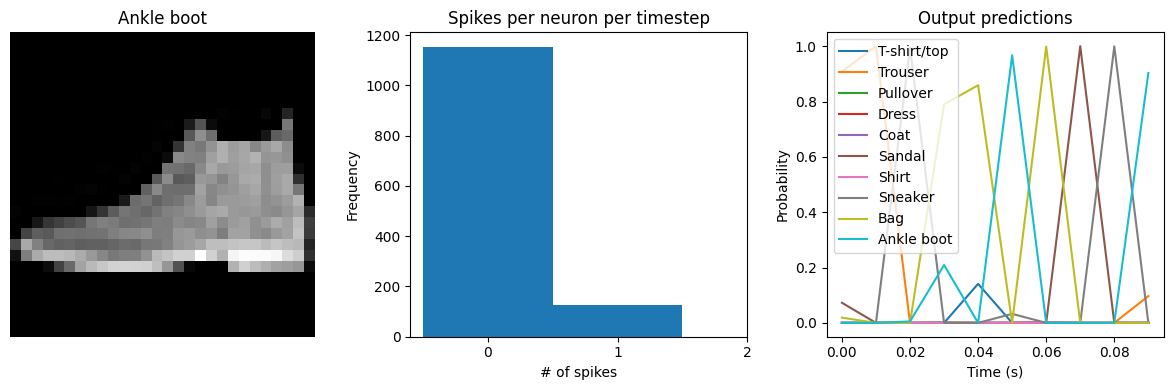

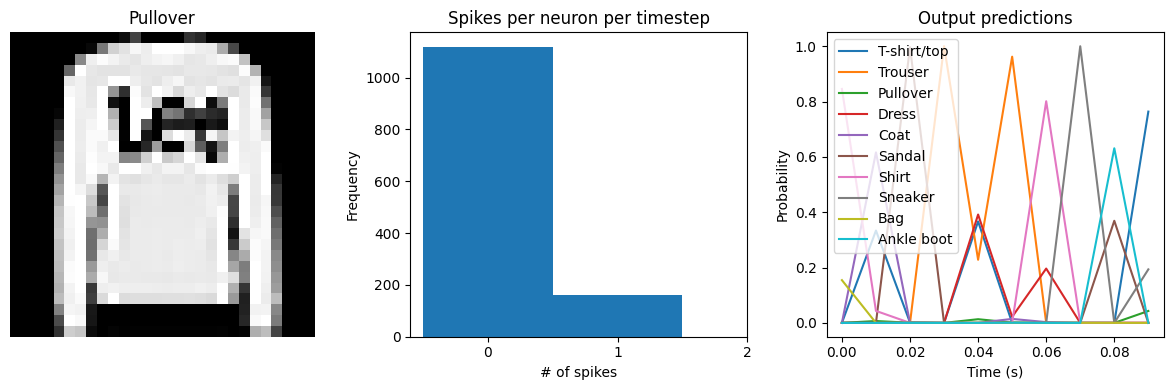

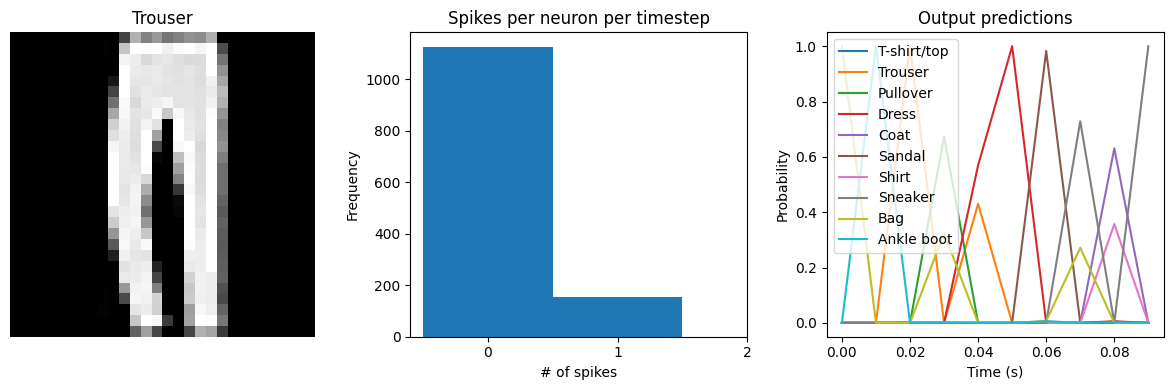

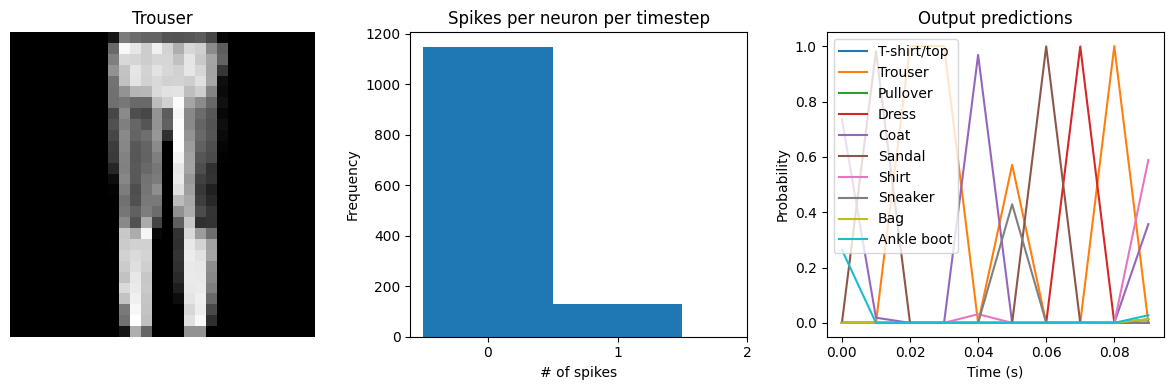

In [14]:
check_output(regularized_model)

We can see that the spike rates have moved towards the 10-20 Hz target we specified.
However, the test accuracy has dropped, since we're adding an additional optimization
constraint. (The accuracy is still higher than the original result with `dt=0.01`, due
to the higher spike rates.) We could lower the regularization weight to allow more
freedom in the firing rates. Or we could use `keras_spiking.regularizers.Percentile`,
which allows more freedom for outliers.
Again, this is a tradeoff that is made between controlling
the firing rates and optimizing accuracy, and the best value for that tradeoff will
depend on the particular application (e.g., how important is it that spike rates fall
within a particular range?).

Note that in some cases it may be better to use regularization with
``spiking_aware_training=False``, as the regularization may perform better when the
value being regularized is smoother. It may also help to adjust the weight
initialization so that the initial firing rates are closer to the desired range, so
that there are smaller adjustments required by the regularizer.

## Lowpass filtering

Another tool we can employ when working with SpikingActivation layers is filtering. As
we've seen, the output of a spiking layer consists of discrete, temporally sparse spike
events. This makes it difficult to determine the spike rate of a neuron when just
looking at a single timestep. In the cases above we have worked around this by using a
`tf.keras.layers.GlobalAveragePooling1D` layer to average the output across all
timesteps before classification.

Another way to achieve this is to compute some kind of moving average of the spiking
output across timesteps. This is effectively what filtering is doing. KerasSpiking
contains a Lowpass layer, which implements a
[lowpass filter](https://en.wikipedia.org/wiki/Low-pass_filter). This has a parameter
`tau`, known as the filter time constant, which controls the degree of smoothing the
layer will apply. Larger `tau` values will apply more smoothing, meaning that we're
aggregating information across longer periods of time, but the output will also be
slower to adapt to changes in the input.

By default the `tau` values are trainable. We can use this in combination with spiking
aware training to enable the model to learn time constants that best trade off spike
noise versus response speed.

Unlike `tf.keras.layers.GlobalAveragePooling1D`, `keras_spiking.Lowpass` computes
outputs for all timesteps by default. This makes it possible to apply filtering
throughout the model—not only on the final layer—in the case that there are multiple
spiking layers. For the final layer, we can pass `return_sequences=False` to have the
layer only return the output of the final timestep, rather than the outputs of all
timesteps.

When working with multiple KerasSpiking layers, we often want them to all share the
same `dt`. We can use `keras_spiking.default.dt` to change the default dt for all
layers. Note that this will only affect layers created _after_ the default is changed;
this will not retroactively affect previous layers.

In [15]:
keras_spiking.default.dt = 0.01

filtered_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation("relu", spiking_aware_training=True),
        # add a lowpass filter on output of spiking layer
        keras_spiking.Lowpass(0.1, return_sequences=False),
        tf.keras.layers.Dense(10),
    ]
)

train(filtered_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 36:56 - loss: 2.8121 - accuracy: 0.1875

   6/1875 [..............................] - ETA: 19s - loss: 2.8288 - accuracy: 0.1406  

  12/1875 [..............................] - ETA: 18s - loss: 2.6417 - accuracy: 0.1797

  17/1875 [..............................] - ETA: 18s - loss: 2.6336 - accuracy: 0.1949

  22/1875 [..............................] - ETA: 18s - loss: 2.5125 - accuracy: 0.2372

  28/1875 [..............................] - ETA: 18s - loss: 2.4895 - accuracy: 0.2411

  34/1875 [..............................] - ETA: 18s - loss: 2.4241 - accuracy: 0.2629

  40/1875 [..............................] - ETA: 18s - loss: 2.3765 - accuracy: 0.2688

  45/1875 [..............................] - ETA: 18s - loss: 2.3490 - accuracy: 0.2792

  50/1875 [..............................] - ETA: 18s - loss: 2.3073 - accuracy: 0.2931

  55/1875 [..............................] - ETA: 18s - loss: 2.2641 - accuracy: 0.3074

  60/1875 [..............................] - ETA: 18s - loss: 2.2130 - accuracy: 0.3214

  65/1875 [>.............................] - ETA: 18s - loss: 2.1598 - accuracy: 0.3327

  71/1875 [>.............................] - ETA: 17s - loss: 2.1433 - accuracy: 0.3393

  76/1875 [>.............................] - ETA: 17s - loss: 2.1253 - accuracy: 0.3450

  81/1875 [>.............................] - ETA: 17s - loss: 2.1083 - accuracy: 0.3526

  87/1875 [>.............................] - ETA: 17s - loss: 2.0789 - accuracy: 0.3624

  92/1875 [>.............................] - ETA: 17s - loss: 2.0639 - accuracy: 0.3702

  98/1875 [>.............................] - ETA: 17s - loss: 2.0373 - accuracy: 0.3772

 104/1875 [>.............................] - ETA: 17s - loss: 2.0164 - accuracy: 0.3876

 109/1875 [>.............................] - ETA: 17s - loss: 1.9983 - accuracy: 0.3931

 115/1875 [>.............................] - ETA: 17s - loss: 1.9779 - accuracy: 0.3992

 121/1875 [>.............................] - ETA: 17s - loss: 1.9493 - accuracy: 0.4065

 126/1875 [=>............................] - ETA: 17s - loss: 1.9239 - accuracy: 0.4149

 131/1875 [=>............................] - ETA: 17s - loss: 1.9030 - accuracy: 0.4210

 137/1875 [=>............................] - ETA: 17s - loss: 1.9012 - accuracy: 0.4238

 143/1875 [=>............................] - ETA: 17s - loss: 1.8790 - accuracy: 0.4283

 149/1875 [=>............................] - ETA: 17s - loss: 1.8556 - accuracy: 0.4348

 155/1875 [=>............................] - ETA: 17s - loss: 1.8367 - accuracy: 0.4403

 161/1875 [=>............................] - ETA: 16s - loss: 1.8240 - accuracy: 0.4429

 167/1875 [=>............................] - ETA: 16s - loss: 1.8121 - accuracy: 0.4467

 172/1875 [=>............................] - ETA: 16s - loss: 1.7985 - accuracy: 0.4508

 178/1875 [=>............................] - ETA: 16s - loss: 1.7857 - accuracy: 0.4561

 184/1875 [=>............................] - ETA: 16s - loss: 1.7752 - accuracy: 0.4594

 190/1875 [==>...........................] - ETA: 16s - loss: 1.7605 - accuracy: 0.4638

 195/1875 [==>...........................] - ETA: 16s - loss: 1.7449 - accuracy: 0.4684

 200/1875 [==>...........................] - ETA: 16s - loss: 1.7255 - accuracy: 0.4731

 205/1875 [==>...........................] - ETA: 16s - loss: 1.7144 - accuracy: 0.4756

 210/1875 [==>...........................] - ETA: 16s - loss: 1.7007 - accuracy: 0.4796

 215/1875 [==>...........................] - ETA: 16s - loss: 1.6884 - accuracy: 0.4830

 221/1875 [==>...........................] - ETA: 16s - loss: 1.6726 - accuracy: 0.4870

 227/1875 [==>...........................] - ETA: 16s - loss: 1.6694 - accuracy: 0.4884

 233/1875 [==>...........................] - ETA: 16s - loss: 1.6516 - accuracy: 0.4936

 239/1875 [==>...........................] - ETA: 16s - loss: 1.6395 - accuracy: 0.4978

 245/1875 [==>...........................] - ETA: 16s - loss: 1.6297 - accuracy: 0.5000

 250/1875 [===>..........................] - ETA: 16s - loss: 1.6195 - accuracy: 0.5029

 256/1875 [===>..........................] - ETA: 16s - loss: 1.6111 - accuracy: 0.5060

 262/1875 [===>..........................] - ETA: 15s - loss: 1.5994 - accuracy: 0.5093

 268/1875 [===>..........................] - ETA: 15s - loss: 1.5914 - accuracy: 0.5106

 274/1875 [===>..........................] - ETA: 15s - loss: 1.5838 - accuracy: 0.5139

 279/1875 [===>..........................] - ETA: 15s - loss: 1.5754 - accuracy: 0.5156

 285/1875 [===>..........................] - ETA: 15s - loss: 1.5665 - accuracy: 0.5180

 291/1875 [===>..........................] - ETA: 15s - loss: 1.5567 - accuracy: 0.5207

 296/1875 [===>..........................] - ETA: 15s - loss: 1.5469 - accuracy: 0.5226

 302/1875 [===>..........................] - ETA: 15s - loss: 1.5391 - accuracy: 0.5239

 307/1875 [===>..........................] - ETA: 15s - loss: 1.5312 - accuracy: 0.5259

 313/1875 [====>.........................] - ETA: 15s - loss: 1.5175 - accuracy: 0.5302

 318/1875 [====>.........................] - ETA: 15s - loss: 1.5117 - accuracy: 0.5312

 324/1875 [====>.........................] - ETA: 15s - loss: 1.5025 - accuracy: 0.5340

 330/1875 [====>.........................] - ETA: 15s - loss: 1.4985 - accuracy: 0.5351

 336/1875 [====>.........................] - ETA: 15s - loss: 1.4888 - accuracy: 0.5379

 342/1875 [====>.........................] - ETA: 15s - loss: 1.4817 - accuracy: 0.5400

 348/1875 [====>.........................] - ETA: 15s - loss: 1.4727 - accuracy: 0.5423

 354/1875 [====>.........................] - ETA: 15s - loss: 1.4629 - accuracy: 0.5448

 359/1875 [====>.........................] - ETA: 14s - loss: 1.4552 - accuracy: 0.5470

 364/1875 [====>.........................] - ETA: 14s - loss: 1.4473 - accuracy: 0.5488

 369/1875 [====>.........................] - ETA: 14s - loss: 1.4401 - accuracy: 0.5507

 374/1875 [====>.........................] - ETA: 14s - loss: 1.4341 - accuracy: 0.5517

 378/1875 [=====>........................] - ETA: 14s - loss: 1.4302 - accuracy: 0.5523

 382/1875 [=====>........................] - ETA: 14s - loss: 1.4251 - accuracy: 0.5530

 387/1875 [=====>........................] - ETA: 14s - loss: 1.4180 - accuracy: 0.5548

 392/1875 [=====>........................] - ETA: 14s - loss: 1.4097 - accuracy: 0.5571

 398/1875 [=====>........................] - ETA: 14s - loss: 1.4023 - accuracy: 0.5588

 404/1875 [=====>........................] - ETA: 14s - loss: 1.3947 - accuracy: 0.5606

 410/1875 [=====>........................] - ETA: 14s - loss: 1.3883 - accuracy: 0.5620

 416/1875 [=====>........................] - ETA: 14s - loss: 1.3836 - accuracy: 0.5637

 422/1875 [=====>........................] - ETA: 14s - loss: 1.3793 - accuracy: 0.5652

 428/1875 [=====>........................] - ETA: 14s - loss: 1.3726 - accuracy: 0.5660

 433/1875 [=====>........................] - ETA: 14s - loss: 1.3674 - accuracy: 0.5670

 438/1875 [======>.......................] - ETA: 14s - loss: 1.3615 - accuracy: 0.5684

 443/1875 [======>.......................] - ETA: 14s - loss: 1.3577 - accuracy: 0.5693

 448/1875 [======>.......................] - ETA: 14s - loss: 1.3518 - accuracy: 0.5704

 453/1875 [======>.......................] - ETA: 14s - loss: 1.3474 - accuracy: 0.5713

 459/1875 [======>.......................] - ETA: 14s - loss: 1.3405 - accuracy: 0.5727

 464/1875 [======>.......................] - ETA: 14s - loss: 1.3366 - accuracy: 0.5735

 470/1875 [======>.......................] - ETA: 14s - loss: 1.3298 - accuracy: 0.5748

 476/1875 [======>.......................] - ETA: 14s - loss: 1.3235 - accuracy: 0.5767

 482/1875 [======>.......................] - ETA: 13s - loss: 1.3181 - accuracy: 0.5782

 487/1875 [======>.......................] - ETA: 13s - loss: 1.3123 - accuracy: 0.5794

 492/1875 [======>.......................] - ETA: 13s - loss: 1.3081 - accuracy: 0.5806

 498/1875 [======>.......................] - ETA: 13s - loss: 1.3026 - accuracy: 0.5821

 504/1875 [=======>......................] - ETA: 13s - loss: 1.2992 - accuracy: 0.5828

 510/1875 [=======>......................] - ETA: 13s - loss: 1.2976 - accuracy: 0.5834

 515/1875 [=======>......................] - ETA: 13s - loss: 1.2922 - accuracy: 0.5848

 520/1875 [=======>......................] - ETA: 13s - loss: 1.2883 - accuracy: 0.5855

 525/1875 [=======>......................] - ETA: 13s - loss: 1.2850 - accuracy: 0.5866

 530/1875 [=======>......................] - ETA: 13s - loss: 1.2814 - accuracy: 0.5873

 536/1875 [=======>......................] - ETA: 13s - loss: 1.2768 - accuracy: 0.5883

 542/1875 [=======>......................] - ETA: 13s - loss: 1.2709 - accuracy: 0.5899

 547/1875 [=======>......................] - ETA: 13s - loss: 1.2664 - accuracy: 0.5913

 552/1875 [=======>......................] - ETA: 13s - loss: 1.2641 - accuracy: 0.5923

 558/1875 [=======>......................] - ETA: 13s - loss: 1.2586 - accuracy: 0.5938

 564/1875 [========>.....................] - ETA: 13s - loss: 1.2522 - accuracy: 0.5955

 570/1875 [========>.....................] - ETA: 13s - loss: 1.2487 - accuracy: 0.5966

 576/1875 [========>.....................] - ETA: 13s - loss: 1.2436 - accuracy: 0.5978

 582/1875 [========>.....................] - ETA: 12s - loss: 1.2401 - accuracy: 0.5990

 588/1875 [========>.....................] - ETA: 12s - loss: 1.2382 - accuracy: 0.5996

 593/1875 [========>.....................] - ETA: 12s - loss: 1.2342 - accuracy: 0.6009

 598/1875 [========>.....................] - ETA: 12s - loss: 1.2299 - accuracy: 0.6022

 603/1875 [========>.....................] - ETA: 12s - loss: 1.2255 - accuracy: 0.6035

 609/1875 [========>.....................] - ETA: 12s - loss: 1.2222 - accuracy: 0.6041

 614/1875 [========>.....................] - ETA: 12s - loss: 1.2184 - accuracy: 0.6047

 619/1875 [========>.....................] - ETA: 12s - loss: 1.2146 - accuracy: 0.6058

 625/1875 [=========>....................] - ETA: 12s - loss: 1.2111 - accuracy: 0.6068

 631/1875 [=========>....................] - ETA: 12s - loss: 1.2075 - accuracy: 0.6077

 637/1875 [=========>....................] - ETA: 12s - loss: 1.2032 - accuracy: 0.6092

 642/1875 [=========>....................] - ETA: 12s - loss: 1.2000 - accuracy: 0.6100

 648/1875 [=========>....................] - ETA: 12s - loss: 1.1974 - accuracy: 0.6107

 653/1875 [=========>....................] - ETA: 12s - loss: 1.1947 - accuracy: 0.6113

 658/1875 [=========>....................] - ETA: 12s - loss: 1.1916 - accuracy: 0.6122

 663/1875 [=========>....................] - ETA: 12s - loss: 1.1888 - accuracy: 0.6128

 668/1875 [=========>....................] - ETA: 12s - loss: 1.1858 - accuracy: 0.6133

 673/1875 [=========>....................] - ETA: 12s - loss: 1.1839 - accuracy: 0.6138

 679/1875 [=========>....................] - ETA: 12s - loss: 1.1803 - accuracy: 0.6148

 685/1875 [=========>....................] - ETA: 11s - loss: 1.1759 - accuracy: 0.6162

 691/1875 [==========>...................] - ETA: 11s - loss: 1.1730 - accuracy: 0.6169

 697/1875 [==========>...................] - ETA: 11s - loss: 1.1701 - accuracy: 0.6175

 703/1875 [==========>...................] - ETA: 11s - loss: 1.1661 - accuracy: 0.6183

 709/1875 [==========>...................] - ETA: 11s - loss: 1.1639 - accuracy: 0.6187

 715/1875 [==========>...................] - ETA: 11s - loss: 1.1603 - accuracy: 0.6195

 721/1875 [==========>...................] - ETA: 11s - loss: 1.1570 - accuracy: 0.6203

 727/1875 [==========>...................] - ETA: 11s - loss: 1.1536 - accuracy: 0.6211

 732/1875 [==========>...................] - ETA: 11s - loss: 1.1528 - accuracy: 0.6213

 738/1875 [==========>...................] - ETA: 11s - loss: 1.1506 - accuracy: 0.6219

 744/1875 [==========>...................] - ETA: 11s - loss: 1.1469 - accuracy: 0.6229

 750/1875 [===========>..................] - ETA: 11s - loss: 1.1437 - accuracy: 0.6240

 755/1875 [===========>..................] - ETA: 11s - loss: 1.1410 - accuracy: 0.6247

 761/1875 [===========>..................] - ETA: 11s - loss: 1.1373 - accuracy: 0.6259

 766/1875 [===========>..................] - ETA: 11s - loss: 1.1340 - accuracy: 0.6267

 771/1875 [===========>..................] - ETA: 11s - loss: 1.1314 - accuracy: 0.6269

 777/1875 [===========>..................] - ETA: 10s - loss: 1.1285 - accuracy: 0.6277

 783/1875 [===========>..................] - ETA: 10s - loss: 1.1269 - accuracy: 0.6283

 789/1875 [===========>..................] - ETA: 10s - loss: 1.1248 - accuracy: 0.6290

 794/1875 [===========>..................] - ETA: 10s - loss: 1.1228 - accuracy: 0.6296

 800/1875 [===========>..................] - ETA: 10s - loss: 1.1202 - accuracy: 0.6304

 805/1875 [===========>..................] - ETA: 10s - loss: 1.1177 - accuracy: 0.6311

 810/1875 [===========>..................] - ETA: 10s - loss: 1.1150 - accuracy: 0.6320

 815/1875 [============>.................] - ETA: 10s - loss: 1.1130 - accuracy: 0.6327

 821/1875 [============>.................] - ETA: 10s - loss: 1.1123 - accuracy: 0.6326

 826/1875 [============>.................] - ETA: 10s - loss: 1.1107 - accuracy: 0.6330

 832/1875 [============>.................] - ETA: 10s - loss: 1.1084 - accuracy: 0.6336

 838/1875 [============>.................] - ETA: 10s - loss: 1.1059 - accuracy: 0.6343

 843/1875 [============>.................] - ETA: 10s - loss: 1.1039 - accuracy: 0.6350

 849/1875 [============>.................] - ETA: 10s - loss: 1.1013 - accuracy: 0.6355

 854/1875 [============>.................] - ETA: 10s - loss: 1.0994 - accuracy: 0.6360

 860/1875 [============>.................] - ETA: 10s - loss: 1.0962 - accuracy: 0.6369

 866/1875 [============>.................] - ETA: 10s - loss: 1.0938 - accuracy: 0.6374

 871/1875 [============>.................] - ETA: 10s - loss: 1.0920 - accuracy: 0.6379

 876/1875 [=============>................] - ETA: 9s - loss: 1.0903 - accuracy: 0.6384 

 882/1875 [=============>................] - ETA: 9s - loss: 1.0875 - accuracy: 0.6393

 888/1875 [=============>................] - ETA: 9s - loss: 1.0857 - accuracy: 0.6398

 894/1875 [=============>................] - ETA: 9s - loss: 1.0836 - accuracy: 0.6403

 899/1875 [=============>................] - ETA: 9s - loss: 1.0818 - accuracy: 0.6408

 904/1875 [=============>................] - ETA: 9s - loss: 1.0805 - accuracy: 0.6410

 910/1875 [=============>................] - ETA: 9s - loss: 1.0786 - accuracy: 0.6413

 916/1875 [=============>................] - ETA: 9s - loss: 1.0771 - accuracy: 0.6419

 922/1875 [=============>................] - ETA: 9s - loss: 1.0740 - accuracy: 0.6429

 927/1875 [=============>................] - ETA: 9s - loss: 1.0714 - accuracy: 0.6436

 933/1875 [=============>................] - ETA: 9s - loss: 1.0701 - accuracy: 0.6439

 938/1875 [==============>...............] - ETA: 9s - loss: 1.0679 - accuracy: 0.6443

 943/1875 [==============>...............] - ETA: 9s - loss: 1.0657 - accuracy: 0.6449

 948/1875 [==============>...............] - ETA: 9s - loss: 1.0636 - accuracy: 0.6452

 953/1875 [==============>...............] - ETA: 9s - loss: 1.0625 - accuracy: 0.6456

 958/1875 [==============>...............] - ETA: 9s - loss: 1.0608 - accuracy: 0.6462

 963/1875 [==============>...............] - ETA: 9s - loss: 1.0591 - accuracy: 0.6465

 968/1875 [==============>...............] - ETA: 9s - loss: 1.0579 - accuracy: 0.6470

 974/1875 [==============>...............] - ETA: 9s - loss: 1.0558 - accuracy: 0.6475

 980/1875 [==============>...............] - ETA: 8s - loss: 1.0544 - accuracy: 0.6477

 985/1875 [==============>...............] - ETA: 8s - loss: 1.0520 - accuracy: 0.6485

 991/1875 [==============>...............] - ETA: 8s - loss: 1.0497 - accuracy: 0.6492

 996/1875 [==============>...............] - ETA: 8s - loss: 1.0490 - accuracy: 0.6494

1001/1875 [===============>..............] - ETA: 8s - loss: 1.0468 - accuracy: 0.6500

1007/1875 [===============>..............] - ETA: 8s - loss: 1.0448 - accuracy: 0.6505

1013/1875 [===============>..............] - ETA: 8s - loss: 1.0426 - accuracy: 0.6510

1018/1875 [===============>..............] - ETA: 8s - loss: 1.0403 - accuracy: 0.6516

1023/1875 [===============>..............] - ETA: 8s - loss: 1.0384 - accuracy: 0.6522

1028/1875 [===============>..............] - ETA: 8s - loss: 1.0371 - accuracy: 0.6526

1034/1875 [===============>..............] - ETA: 8s - loss: 1.0351 - accuracy: 0.6529

1040/1875 [===============>..............] - ETA: 8s - loss: 1.0325 - accuracy: 0.6537

1046/1875 [===============>..............] - ETA: 8s - loss: 1.0302 - accuracy: 0.6544

1052/1875 [===============>..............] - ETA: 8s - loss: 1.0287 - accuracy: 0.6548

1057/1875 [===============>..............] - ETA: 8s - loss: 1.0272 - accuracy: 0.6552

1063/1875 [================>.............] - ETA: 8s - loss: 1.0256 - accuracy: 0.6555

1069/1875 [================>.............] - ETA: 8s - loss: 1.0237 - accuracy: 0.6560

1074/1875 [================>.............] - ETA: 8s - loss: 1.0228 - accuracy: 0.6562

1080/1875 [================>.............] - ETA: 7s - loss: 1.0213 - accuracy: 0.6566

1086/1875 [================>.............] - ETA: 7s - loss: 1.0196 - accuracy: 0.6570

1092/1875 [================>.............] - ETA: 7s - loss: 1.0184 - accuracy: 0.6573

1098/1875 [================>.............] - ETA: 7s - loss: 1.0166 - accuracy: 0.6579

1103/1875 [================>.............] - ETA: 7s - loss: 1.0152 - accuracy: 0.6584

1109/1875 [================>.............] - ETA: 7s - loss: 1.0140 - accuracy: 0.6587

1115/1875 [================>.............] - ETA: 7s - loss: 1.0118 - accuracy: 0.6593

1121/1875 [================>.............] - ETA: 7s - loss: 1.0103 - accuracy: 0.6597

1126/1875 [=================>............] - ETA: 7s - loss: 1.0091 - accuracy: 0.6599

1132/1875 [=================>............] - ETA: 7s - loss: 1.0073 - accuracy: 0.6604

1137/1875 [=================>............] - ETA: 7s - loss: 1.0063 - accuracy: 0.6607

1142/1875 [=================>............] - ETA: 7s - loss: 1.0047 - accuracy: 0.6612

1147/1875 [=================>............] - ETA: 7s - loss: 1.0030 - accuracy: 0.6615

1152/1875 [=================>............] - ETA: 7s - loss: 1.0018 - accuracy: 0.6617

1157/1875 [=================>............] - ETA: 7s - loss: 0.9997 - accuracy: 0.6624

1163/1875 [=================>............] - ETA: 7s - loss: 0.9979 - accuracy: 0.6628

1169/1875 [=================>............] - ETA: 7s - loss: 0.9969 - accuracy: 0.6631

1174/1875 [=================>............] - ETA: 7s - loss: 0.9961 - accuracy: 0.6633

1180/1875 [=================>............] - ETA: 6s - loss: 0.9952 - accuracy: 0.6633

1185/1875 [=================>............] - ETA: 6s - loss: 0.9940 - accuracy: 0.6638

1190/1875 [==================>...........] - ETA: 6s - loss: 0.9926 - accuracy: 0.6641

1196/1875 [==================>...........] - ETA: 6s - loss: 0.9910 - accuracy: 0.6648

1202/1875 [==================>...........] - ETA: 6s - loss: 0.9896 - accuracy: 0.6652

1207/1875 [==================>...........] - ETA: 6s - loss: 0.9877 - accuracy: 0.6658

1213/1875 [==================>...........] - ETA: 6s - loss: 0.9865 - accuracy: 0.6661

1218/1875 [==================>...........] - ETA: 6s - loss: 0.9849 - accuracy: 0.6665

1224/1875 [==================>...........] - ETA: 6s - loss: 0.9824 - accuracy: 0.6672

1230/1875 [==================>...........] - ETA: 6s - loss: 0.9811 - accuracy: 0.6677

1235/1875 [==================>...........] - ETA: 6s - loss: 0.9799 - accuracy: 0.6679

1240/1875 [==================>...........] - ETA: 6s - loss: 0.9787 - accuracy: 0.6683

1246/1875 [==================>...........] - ETA: 6s - loss: 0.9780 - accuracy: 0.6686

1252/1875 [===================>..........] - ETA: 6s - loss: 0.9770 - accuracy: 0.6690

1257/1875 [===================>..........] - ETA: 6s - loss: 0.9757 - accuracy: 0.6691

1262/1875 [===================>..........] - ETA: 6s - loss: 0.9746 - accuracy: 0.6694

1268/1875 [===================>..........] - ETA: 6s - loss: 0.9730 - accuracy: 0.6699

1273/1875 [===================>..........] - ETA: 6s - loss: 0.9711 - accuracy: 0.6704

1279/1875 [===================>..........] - ETA: 5s - loss: 0.9699 - accuracy: 0.6708

1285/1875 [===================>..........] - ETA: 5s - loss: 0.9683 - accuracy: 0.6713

1291/1875 [===================>..........] - ETA: 5s - loss: 0.9667 - accuracy: 0.6717

1296/1875 [===================>..........] - ETA: 5s - loss: 0.9656 - accuracy: 0.6718

1302/1875 [===================>..........] - ETA: 5s - loss: 0.9640 - accuracy: 0.6723

1307/1875 [===================>..........] - ETA: 5s - loss: 0.9624 - accuracy: 0.6726

1312/1875 [===================>..........] - ETA: 5s - loss: 0.9606 - accuracy: 0.6732

1318/1875 [====================>.........] - ETA: 5s - loss: 0.9593 - accuracy: 0.6736

1324/1875 [====================>.........] - ETA: 5s - loss: 0.9578 - accuracy: 0.6740

1330/1875 [====================>.........] - ETA: 5s - loss: 0.9562 - accuracy: 0.6742

1336/1875 [====================>.........] - ETA: 5s - loss: 0.9559 - accuracy: 0.6743

1342/1875 [====================>.........] - ETA: 5s - loss: 0.9550 - accuracy: 0.6746

1348/1875 [====================>.........] - ETA: 5s - loss: 0.9535 - accuracy: 0.6750

1353/1875 [====================>.........] - ETA: 5s - loss: 0.9524 - accuracy: 0.6752

1358/1875 [====================>.........] - ETA: 5s - loss: 0.9509 - accuracy: 0.6756

1364/1875 [====================>.........] - ETA: 5s - loss: 0.9493 - accuracy: 0.6760

1369/1875 [====================>.........] - ETA: 5s - loss: 0.9480 - accuracy: 0.6764

1374/1875 [====================>.........] - ETA: 5s - loss: 0.9471 - accuracy: 0.6766

1380/1875 [=====================>........] - ETA: 4s - loss: 0.9460 - accuracy: 0.6768

1386/1875 [=====================>........] - ETA: 4s - loss: 0.9450 - accuracy: 0.6770

1392/1875 [=====================>........] - ETA: 4s - loss: 0.9436 - accuracy: 0.6774

1398/1875 [=====================>........] - ETA: 4s - loss: 0.9428 - accuracy: 0.6776

1404/1875 [=====================>........] - ETA: 4s - loss: 0.9416 - accuracy: 0.6780

1410/1875 [=====================>........] - ETA: 4s - loss: 0.9404 - accuracy: 0.6784

1416/1875 [=====================>........] - ETA: 4s - loss: 0.9391 - accuracy: 0.6788

1422/1875 [=====================>........] - ETA: 4s - loss: 0.9382 - accuracy: 0.6791

1428/1875 [=====================>........] - ETA: 4s - loss: 0.9376 - accuracy: 0.6792

1434/1875 [=====================>........] - ETA: 4s - loss: 0.9363 - accuracy: 0.6796

1440/1875 [======================>.......] - ETA: 4s - loss: 0.9344 - accuracy: 0.6803

1446/1875 [======================>.......] - ETA: 4s - loss: 0.9329 - accuracy: 0.6808

1452/1875 [======================>.......] - ETA: 4s - loss: 0.9315 - accuracy: 0.6812

1458/1875 [======================>.......] - ETA: 4s - loss: 0.9306 - accuracy: 0.6814

1464/1875 [======================>.......] - ETA: 4s - loss: 0.9296 - accuracy: 0.6815

1469/1875 [======================>.......] - ETA: 4s - loss: 0.9287 - accuracy: 0.6818

1475/1875 [======================>.......] - ETA: 3s - loss: 0.9273 - accuracy: 0.6822

1481/1875 [======================>.......] - ETA: 3s - loss: 0.9264 - accuracy: 0.6825

1486/1875 [======================>.......] - ETA: 3s - loss: 0.9256 - accuracy: 0.6827

1491/1875 [======================>.......] - ETA: 3s - loss: 0.9243 - accuracy: 0.6830

1496/1875 [======================>.......] - ETA: 3s - loss: 0.9231 - accuracy: 0.6833

1501/1875 [=======================>......] - ETA: 3s - loss: 0.9221 - accuracy: 0.6838

1507/1875 [=======================>......] - ETA: 3s - loss: 0.9209 - accuracy: 0.6841

1513/1875 [=======================>......] - ETA: 3s - loss: 0.9197 - accuracy: 0.6845

1519/1875 [=======================>......] - ETA: 3s - loss: 0.9184 - accuracy: 0.6849

1525/1875 [=======================>......] - ETA: 3s - loss: 0.9171 - accuracy: 0.6852

1530/1875 [=======================>......] - ETA: 3s - loss: 0.9163 - accuracy: 0.6855

1536/1875 [=======================>......] - ETA: 3s - loss: 0.9151 - accuracy: 0.6858

1541/1875 [=======================>......] - ETA: 3s - loss: 0.9145 - accuracy: 0.6860

1546/1875 [=======================>......] - ETA: 3s - loss: 0.9138 - accuracy: 0.6862

1551/1875 [=======================>......] - ETA: 3s - loss: 0.9129 - accuracy: 0.6864

1557/1875 [=======================>......] - ETA: 3s - loss: 0.9115 - accuracy: 0.6866

1563/1875 [========================>.....] - ETA: 3s - loss: 0.9105 - accuracy: 0.6869

1568/1875 [========================>.....] - ETA: 3s - loss: 0.9095 - accuracy: 0.6871

1574/1875 [========================>.....] - ETA: 3s - loss: 0.9091 - accuracy: 0.6873

1579/1875 [========================>.....] - ETA: 2s - loss: 0.9083 - accuracy: 0.6874

1584/1875 [========================>.....] - ETA: 2s - loss: 0.9074 - accuracy: 0.6876

1589/1875 [========================>.....] - ETA: 2s - loss: 0.9070 - accuracy: 0.6878

1594/1875 [========================>.....] - ETA: 2s - loss: 0.9058 - accuracy: 0.6882

1600/1875 [========================>.....] - ETA: 2s - loss: 0.9042 - accuracy: 0.6887

1605/1875 [========================>.....] - ETA: 2s - loss: 0.9032 - accuracy: 0.6891

1610/1875 [========================>.....] - ETA: 2s - loss: 0.9025 - accuracy: 0.6892

1616/1875 [========================>.....] - ETA: 2s - loss: 0.9016 - accuracy: 0.6895

1622/1875 [========================>.....] - ETA: 2s - loss: 0.9006 - accuracy: 0.6899

1627/1875 [=========================>....] - ETA: 2s - loss: 0.9000 - accuracy: 0.6900

1632/1875 [=========================>....] - ETA: 2s - loss: 0.8992 - accuracy: 0.6902

1637/1875 [=========================>....] - ETA: 2s - loss: 0.8986 - accuracy: 0.6903

1642/1875 [=========================>....] - ETA: 2s - loss: 0.8977 - accuracy: 0.6906

1648/1875 [=========================>....] - ETA: 2s - loss: 0.8965 - accuracy: 0.6910

1654/1875 [=========================>....] - ETA: 2s - loss: 0.8956 - accuracy: 0.6913

1660/1875 [=========================>....] - ETA: 2s - loss: 0.8943 - accuracy: 0.6916

1665/1875 [=========================>....] - ETA: 2s - loss: 0.8935 - accuracy: 0.6918

1671/1875 [=========================>....] - ETA: 2s - loss: 0.8930 - accuracy: 0.6920

1677/1875 [=========================>....] - ETA: 1s - loss: 0.8918 - accuracy: 0.6925

1683/1875 [=========================>....] - ETA: 1s - loss: 0.8908 - accuracy: 0.6929

1689/1875 [==========================>...] - ETA: 1s - loss: 0.8900 - accuracy: 0.6931

1694/1875 [==========================>...] - ETA: 1s - loss: 0.8893 - accuracy: 0.6933

1700/1875 [==========================>...] - ETA: 1s - loss: 0.8882 - accuracy: 0.6935

1705/1875 [==========================>...] - ETA: 1s - loss: 0.8880 - accuracy: 0.6936

1710/1875 [==========================>...] - ETA: 1s - loss: 0.8872 - accuracy: 0.6938

1716/1875 [==========================>...] - ETA: 1s - loss: 0.8860 - accuracy: 0.6941

1722/1875 [==========================>...] - ETA: 1s - loss: 0.8852 - accuracy: 0.6943

1728/1875 [==========================>...] - ETA: 1s - loss: 0.8842 - accuracy: 0.6945

1734/1875 [==========================>...] - ETA: 1s - loss: 0.8835 - accuracy: 0.6947

1739/1875 [==========================>...] - ETA: 1s - loss: 0.8830 - accuracy: 0.6949

1745/1875 [==========================>...] - ETA: 1s - loss: 0.8820 - accuracy: 0.6952

1751/1875 [===========================>..] - ETA: 1s - loss: 0.8811 - accuracy: 0.6954

1757/1875 [===========================>..] - ETA: 1s - loss: 0.8800 - accuracy: 0.6958

1763/1875 [===========================>..] - ETA: 1s - loss: 0.8792 - accuracy: 0.6961

1769/1875 [===========================>..] - ETA: 1s - loss: 0.8786 - accuracy: 0.6962

1775/1875 [===========================>..] - ETA: 0s - loss: 0.8776 - accuracy: 0.6965

1780/1875 [===========================>..] - ETA: 0s - loss: 0.8766 - accuracy: 0.6967

1786/1875 [===========================>..] - ETA: 0s - loss: 0.8760 - accuracy: 0.6969

1792/1875 [===========================>..] - ETA: 0s - loss: 0.8756 - accuracy: 0.6971

1797/1875 [===========================>..] - ETA: 0s - loss: 0.8748 - accuracy: 0.6974

1803/1875 [===========================>..] - ETA: 0s - loss: 0.8738 - accuracy: 0.6977

1809/1875 [===========================>..] - ETA: 0s - loss: 0.8730 - accuracy: 0.6980

1815/1875 [============================>.] - ETA: 0s - loss: 0.8721 - accuracy: 0.6983

1821/1875 [============================>.] - ETA: 0s - loss: 0.8712 - accuracy: 0.6984

1826/1875 [============================>.] - ETA: 0s - loss: 0.8704 - accuracy: 0.6986

1832/1875 [============================>.] - ETA: 0s - loss: 0.8693 - accuracy: 0.6989

1838/1875 [============================>.] - ETA: 0s - loss: 0.8681 - accuracy: 0.6992

1843/1875 [============================>.] - ETA: 0s - loss: 0.8672 - accuracy: 0.6995

1848/1875 [============================>.] - ETA: 0s - loss: 0.8663 - accuracy: 0.6997

1854/1875 [============================>.] - ETA: 0s - loss: 0.8658 - accuracy: 0.6999

1859/1875 [============================>.] - ETA: 0s - loss: 0.8655 - accuracy: 0.7000

1865/1875 [============================>.] - ETA: 0s - loss: 0.8647 - accuracy: 0.7001

1871/1875 [============================>.] - ETA: 0s - loss: 0.8640 - accuracy: 0.7004

1875/1875 [==============================] - 20s 10ms/step - loss: 0.8631 - accuracy: 0.7007


Epoch 2/10


   1/1875 [..............................] - ETA: 20s - loss: 0.4881 - accuracy: 0.7812

   7/1875 [..............................] - ETA: 17s - loss: 0.6050 - accuracy: 0.7902

  13/1875 [..............................] - ETA: 17s - loss: 0.6188 - accuracy: 0.7885

  19/1875 [..............................] - ETA: 17s - loss: 0.6363 - accuracy: 0.7829

  25/1875 [..............................] - ETA: 17s - loss: 0.6364 - accuracy: 0.7763

  31/1875 [..............................] - ETA: 17s - loss: 0.6558 - accuracy: 0.7651

  37/1875 [..............................] - ETA: 17s - loss: 0.6415 - accuracy: 0.7677

  43/1875 [..............................] - ETA: 17s - loss: 0.6436 - accuracy: 0.7696

  49/1875 [..............................] - ETA: 17s - loss: 0.6479 - accuracy: 0.7691

  55/1875 [..............................] - ETA: 17s - loss: 0.6439 - accuracy: 0.7710

  61/1875 [..............................] - ETA: 17s - loss: 0.6302 - accuracy: 0.7772

  66/1875 [>.............................] - ETA: 17s - loss: 0.6314 - accuracy: 0.7751

  72/1875 [>.............................] - ETA: 17s - loss: 0.6226 - accuracy: 0.7773

  77/1875 [>.............................] - ETA: 17s - loss: 0.6157 - accuracy: 0.7784

  82/1875 [>.............................] - ETA: 17s - loss: 0.6126 - accuracy: 0.7797

  88/1875 [>.............................] - ETA: 17s - loss: 0.6060 - accuracy: 0.7823

  94/1875 [>.............................] - ETA: 17s - loss: 0.6129 - accuracy: 0.7803

  99/1875 [>.............................] - ETA: 17s - loss: 0.6102 - accuracy: 0.7794

 105/1875 [>.............................] - ETA: 17s - loss: 0.6108 - accuracy: 0.7786

 111/1875 [>.............................] - ETA: 17s - loss: 0.6102 - accuracy: 0.7796

 117/1875 [>.............................] - ETA: 17s - loss: 0.6118 - accuracy: 0.7804

 123/1875 [>.............................] - ETA: 17s - loss: 0.6118 - accuracy: 0.7802

 129/1875 [=>............................] - ETA: 17s - loss: 0.6145 - accuracy: 0.7786

 135/1875 [=>............................] - ETA: 16s - loss: 0.6188 - accuracy: 0.7769

 141/1875 [=>............................] - ETA: 16s - loss: 0.6214 - accuracy: 0.7773

 146/1875 [=>............................] - ETA: 16s - loss: 0.6183 - accuracy: 0.7780

 152/1875 [=>............................] - ETA: 16s - loss: 0.6168 - accuracy: 0.7782

 157/1875 [=>............................] - ETA: 16s - loss: 0.6168 - accuracy: 0.7785

 163/1875 [=>............................] - ETA: 16s - loss: 0.6218 - accuracy: 0.7776

 169/1875 [=>............................] - ETA: 16s - loss: 0.6210 - accuracy: 0.7772

 175/1875 [=>............................] - ETA: 16s - loss: 0.6196 - accuracy: 0.7775

 180/1875 [=>............................] - ETA: 16s - loss: 0.6185 - accuracy: 0.7774

 186/1875 [=>............................] - ETA: 16s - loss: 0.6176 - accuracy: 0.7762

 192/1875 [==>...........................] - ETA: 16s - loss: 0.6194 - accuracy: 0.7752

 198/1875 [==>...........................] - ETA: 16s - loss: 0.6149 - accuracy: 0.7762

 204/1875 [==>...........................] - ETA: 16s - loss: 0.6161 - accuracy: 0.7750

 210/1875 [==>...........................] - ETA: 16s - loss: 0.6149 - accuracy: 0.7754

 215/1875 [==>...........................] - ETA: 16s - loss: 0.6145 - accuracy: 0.7757

 221/1875 [==>...........................] - ETA: 16s - loss: 0.6120 - accuracy: 0.7762

 227/1875 [==>...........................] - ETA: 16s - loss: 0.6107 - accuracy: 0.7767

 232/1875 [==>...........................] - ETA: 16s - loss: 0.6105 - accuracy: 0.7768

 238/1875 [==>...........................] - ETA: 16s - loss: 0.6132 - accuracy: 0.7760

 243/1875 [==>...........................] - ETA: 16s - loss: 0.6139 - accuracy: 0.7746

 248/1875 [==>...........................] - ETA: 15s - loss: 0.6117 - accuracy: 0.7749

 253/1875 [===>..........................] - ETA: 15s - loss: 0.6098 - accuracy: 0.7756

 258/1875 [===>..........................] - ETA: 15s - loss: 0.6087 - accuracy: 0.7762

 263/1875 [===>..........................] - ETA: 15s - loss: 0.6073 - accuracy: 0.7769

 269/1875 [===>..........................] - ETA: 15s - loss: 0.6075 - accuracy: 0.7764

 274/1875 [===>..........................] - ETA: 15s - loss: 0.6043 - accuracy: 0.7771

 280/1875 [===>..........................] - ETA: 15s - loss: 0.6063 - accuracy: 0.7761

 285/1875 [===>..........................] - ETA: 15s - loss: 0.6059 - accuracy: 0.7763

 290/1875 [===>..........................] - ETA: 15s - loss: 0.6041 - accuracy: 0.7772

 296/1875 [===>..........................] - ETA: 15s - loss: 0.6064 - accuracy: 0.7768

 302/1875 [===>..........................] - ETA: 15s - loss: 0.6075 - accuracy: 0.7762

 307/1875 [===>..........................] - ETA: 15s - loss: 0.6074 - accuracy: 0.7767

 312/1875 [===>..........................] - ETA: 15s - loss: 0.6062 - accuracy: 0.7769

 318/1875 [====>.........................] - ETA: 15s - loss: 0.6044 - accuracy: 0.7779

 323/1875 [====>.........................] - ETA: 15s - loss: 0.6051 - accuracy: 0.7784

 329/1875 [====>.........................] - ETA: 15s - loss: 0.6017 - accuracy: 0.7797

 334/1875 [====>.........................] - ETA: 15s - loss: 0.6008 - accuracy: 0.7796

 340/1875 [====>.........................] - ETA: 15s - loss: 0.6012 - accuracy: 0.7800

 346/1875 [====>.........................] - ETA: 15s - loss: 0.6005 - accuracy: 0.7802

 352/1875 [====>.........................] - ETA: 15s - loss: 0.6020 - accuracy: 0.7805

 358/1875 [====>.........................] - ETA: 15s - loss: 0.6026 - accuracy: 0.7803

 363/1875 [====>.........................] - ETA: 14s - loss: 0.6037 - accuracy: 0.7794

 369/1875 [====>.........................] - ETA: 14s - loss: 0.6027 - accuracy: 0.7801

 375/1875 [=====>........................] - ETA: 14s - loss: 0.6025 - accuracy: 0.7797

 381/1875 [=====>........................] - ETA: 14s - loss: 0.6014 - accuracy: 0.7804

 386/1875 [=====>........................] - ETA: 14s - loss: 0.5995 - accuracy: 0.7813

 391/1875 [=====>........................] - ETA: 14s - loss: 0.5990 - accuracy: 0.7816

 397/1875 [=====>........................] - ETA: 14s - loss: 0.5983 - accuracy: 0.7822

 402/1875 [=====>........................] - ETA: 14s - loss: 0.5982 - accuracy: 0.7823

 408/1875 [=====>........................] - ETA: 14s - loss: 0.5975 - accuracy: 0.7826

 414/1875 [=====>........................] - ETA: 14s - loss: 0.5987 - accuracy: 0.7825

 420/1875 [=====>........................] - ETA: 14s - loss: 0.5979 - accuracy: 0.7828

 425/1875 [=====>........................] - ETA: 14s - loss: 0.5978 - accuracy: 0.7828

 430/1875 [=====>........................] - ETA: 14s - loss: 0.5979 - accuracy: 0.7826

 435/1875 [=====>........................] - ETA: 14s - loss: 0.5972 - accuracy: 0.7826

 440/1875 [======>.......................] - ETA: 14s - loss: 0.5959 - accuracy: 0.7832

 445/1875 [======>.......................] - ETA: 14s - loss: 0.5957 - accuracy: 0.7831

 451/1875 [======>.......................] - ETA: 14s - loss: 0.5955 - accuracy: 0.7836

 456/1875 [======>.......................] - ETA: 14s - loss: 0.5946 - accuracy: 0.7840

 462/1875 [======>.......................] - ETA: 14s - loss: 0.5944 - accuracy: 0.7844

 467/1875 [======>.......................] - ETA: 13s - loss: 0.5961 - accuracy: 0.7843

 473/1875 [======>.......................] - ETA: 13s - loss: 0.5965 - accuracy: 0.7838

 479/1875 [======>.......................] - ETA: 13s - loss: 0.5961 - accuracy: 0.7838

 485/1875 [======>.......................] - ETA: 13s - loss: 0.5956 - accuracy: 0.7840

 490/1875 [======>.......................] - ETA: 13s - loss: 0.5949 - accuracy: 0.7843

 496/1875 [======>.......................] - ETA: 13s - loss: 0.5942 - accuracy: 0.7848

 502/1875 [=======>......................] - ETA: 13s - loss: 0.5948 - accuracy: 0.7845

 508/1875 [=======>......................] - ETA: 13s - loss: 0.5947 - accuracy: 0.7844

 514/1875 [=======>......................] - ETA: 13s - loss: 0.5946 - accuracy: 0.7842

 520/1875 [=======>......................] - ETA: 13s - loss: 0.5939 - accuracy: 0.7846

 525/1875 [=======>......................] - ETA: 13s - loss: 0.5944 - accuracy: 0.7844

 531/1875 [=======>......................] - ETA: 13s - loss: 0.5942 - accuracy: 0.7845

 537/1875 [=======>......................] - ETA: 13s - loss: 0.5943 - accuracy: 0.7845

 542/1875 [=======>......................] - ETA: 13s - loss: 0.5942 - accuracy: 0.7845

 547/1875 [=======>......................] - ETA: 13s - loss: 0.5940 - accuracy: 0.7844

 552/1875 [=======>......................] - ETA: 13s - loss: 0.5925 - accuracy: 0.7849

 557/1875 [=======>......................] - ETA: 13s - loss: 0.5934 - accuracy: 0.7844

 563/1875 [========>.....................] - ETA: 13s - loss: 0.5924 - accuracy: 0.7843

 569/1875 [========>.....................] - ETA: 12s - loss: 0.5932 - accuracy: 0.7837

 574/1875 [========>.....................] - ETA: 12s - loss: 0.5920 - accuracy: 0.7843

 579/1875 [========>.....................] - ETA: 12s - loss: 0.5924 - accuracy: 0.7843

 584/1875 [========>.....................] - ETA: 12s - loss: 0.5923 - accuracy: 0.7842

 589/1875 [========>.....................] - ETA: 12s - loss: 0.5929 - accuracy: 0.7838

 595/1875 [========>.....................] - ETA: 12s - loss: 0.5914 - accuracy: 0.7845

 600/1875 [========>.....................] - ETA: 12s - loss: 0.5916 - accuracy: 0.7844

 606/1875 [========>.....................] - ETA: 12s - loss: 0.5913 - accuracy: 0.7848

 612/1875 [========>.....................] - ETA: 12s - loss: 0.5903 - accuracy: 0.7851

 618/1875 [========>.....................] - ETA: 12s - loss: 0.5901 - accuracy: 0.7853

 624/1875 [========>.....................] - ETA: 12s - loss: 0.5898 - accuracy: 0.7852

 629/1875 [=========>....................] - ETA: 12s - loss: 0.5911 - accuracy: 0.7849

 634/1875 [=========>....................] - ETA: 12s - loss: 0.5901 - accuracy: 0.7850

 640/1875 [=========>....................] - ETA: 12s - loss: 0.5896 - accuracy: 0.7852

 645/1875 [=========>....................] - ETA: 12s - loss: 0.5895 - accuracy: 0.7850

 651/1875 [=========>....................] - ETA: 12s - loss: 0.5897 - accuracy: 0.7850

 656/1875 [=========>....................] - ETA: 12s - loss: 0.5902 - accuracy: 0.7846

 661/1875 [=========>....................] - ETA: 12s - loss: 0.5895 - accuracy: 0.7849

 667/1875 [=========>....................] - ETA: 12s - loss: 0.5890 - accuracy: 0.7849

 671/1875 [=========>....................] - ETA: 12s - loss: 0.5890 - accuracy: 0.7849

 676/1875 [=========>....................] - ETA: 12s - loss: 0.5881 - accuracy: 0.7851

 681/1875 [=========>....................] - ETA: 11s - loss: 0.5882 - accuracy: 0.7852

 686/1875 [=========>....................] - ETA: 11s - loss: 0.5880 - accuracy: 0.7853

 692/1875 [==========>...................] - ETA: 11s - loss: 0.5882 - accuracy: 0.7853

 698/1875 [==========>...................] - ETA: 11s - loss: 0.5870 - accuracy: 0.7859

 703/1875 [==========>...................] - ETA: 11s - loss: 0.5872 - accuracy: 0.7857

 709/1875 [==========>...................] - ETA: 11s - loss: 0.5872 - accuracy: 0.7857

 715/1875 [==========>...................] - ETA: 11s - loss: 0.5870 - accuracy: 0.7856

 721/1875 [==========>...................] - ETA: 11s - loss: 0.5873 - accuracy: 0.7858

 727/1875 [==========>...................] - ETA: 11s - loss: 0.5860 - accuracy: 0.7865

 733/1875 [==========>...................] - ETA: 11s - loss: 0.5858 - accuracy: 0.7864

 738/1875 [==========>...................] - ETA: 11s - loss: 0.5854 - accuracy: 0.7867

 744/1875 [==========>...................] - ETA: 11s - loss: 0.5853 - accuracy: 0.7866

 750/1875 [===========>..................] - ETA: 11s - loss: 0.5849 - accuracy: 0.7867

 755/1875 [===========>..................] - ETA: 11s - loss: 0.5848 - accuracy: 0.7865

 760/1875 [===========>..................] - ETA: 11s - loss: 0.5853 - accuracy: 0.7863

 765/1875 [===========>..................] - ETA: 11s - loss: 0.5853 - accuracy: 0.7864

 770/1875 [===========>..................] - ETA: 11s - loss: 0.5844 - accuracy: 0.7867

 776/1875 [===========>..................] - ETA: 11s - loss: 0.5840 - accuracy: 0.7870

 781/1875 [===========>..................] - ETA: 10s - loss: 0.5840 - accuracy: 0.7870

 787/1875 [===========>..................] - ETA: 10s - loss: 0.5843 - accuracy: 0.7870

 792/1875 [===========>..................] - ETA: 10s - loss: 0.5840 - accuracy: 0.7871

 798/1875 [===========>..................] - ETA: 10s - loss: 0.5843 - accuracy: 0.7872

 804/1875 [===========>..................] - ETA: 10s - loss: 0.5846 - accuracy: 0.7871

 809/1875 [===========>..................] - ETA: 10s - loss: 0.5846 - accuracy: 0.7872

 815/1875 [============>.................] - ETA: 10s - loss: 0.5842 - accuracy: 0.7873

 820/1875 [============>.................] - ETA: 10s - loss: 0.5843 - accuracy: 0.7872

 826/1875 [============>.................] - ETA: 10s - loss: 0.5846 - accuracy: 0.7871

 831/1875 [============>.................] - ETA: 10s - loss: 0.5842 - accuracy: 0.7873

 837/1875 [============>.................] - ETA: 10s - loss: 0.5842 - accuracy: 0.7874

 843/1875 [============>.................] - ETA: 10s - loss: 0.5848 - accuracy: 0.7874

 848/1875 [============>.................] - ETA: 10s - loss: 0.5857 - accuracy: 0.7871

 854/1875 [============>.................] - ETA: 10s - loss: 0.5849 - accuracy: 0.7873

 859/1875 [============>.................] - ETA: 10s - loss: 0.5855 - accuracy: 0.7871

 864/1875 [============>.................] - ETA: 10s - loss: 0.5850 - accuracy: 0.7871

 869/1875 [============>.................] - ETA: 10s - loss: 0.5844 - accuracy: 0.7873

 875/1875 [=============>................] - ETA: 10s - loss: 0.5840 - accuracy: 0.7875

 880/1875 [=============>................] - ETA: 9s - loss: 0.5836 - accuracy: 0.7876 

 885/1875 [=============>................] - ETA: 9s - loss: 0.5838 - accuracy: 0.7875

 891/1875 [=============>................] - ETA: 9s - loss: 0.5838 - accuracy: 0.7876

 896/1875 [=============>................] - ETA: 9s - loss: 0.5834 - accuracy: 0.7878

 901/1875 [=============>................] - ETA: 9s - loss: 0.5828 - accuracy: 0.7880

 906/1875 [=============>................] - ETA: 9s - loss: 0.5822 - accuracy: 0.7882

 911/1875 [=============>................] - ETA: 9s - loss: 0.5825 - accuracy: 0.7881

 917/1875 [=============>................] - ETA: 9s - loss: 0.5823 - accuracy: 0.7884

 923/1875 [=============>................] - ETA: 9s - loss: 0.5823 - accuracy: 0.7886

 928/1875 [=============>................] - ETA: 9s - loss: 0.5825 - accuracy: 0.7886

 934/1875 [=============>................] - ETA: 9s - loss: 0.5822 - accuracy: 0.7887

 940/1875 [==============>...............] - ETA: 9s - loss: 0.5822 - accuracy: 0.7887

 945/1875 [==============>...............] - ETA: 9s - loss: 0.5820 - accuracy: 0.7888

 950/1875 [==============>...............] - ETA: 9s - loss: 0.5819 - accuracy: 0.7889

 956/1875 [==============>...............] - ETA: 9s - loss: 0.5813 - accuracy: 0.7892

 962/1875 [==============>...............] - ETA: 9s - loss: 0.5815 - accuracy: 0.7890

 967/1875 [==============>...............] - ETA: 9s - loss: 0.5817 - accuracy: 0.7888

 973/1875 [==============>...............] - ETA: 9s - loss: 0.5819 - accuracy: 0.7889

 978/1875 [==============>...............] - ETA: 8s - loss: 0.5818 - accuracy: 0.7890

 983/1875 [==============>...............] - ETA: 8s - loss: 0.5819 - accuracy: 0.7890

 989/1875 [==============>...............] - ETA: 8s - loss: 0.5816 - accuracy: 0.7890

 995/1875 [==============>...............] - ETA: 8s - loss: 0.5813 - accuracy: 0.7889

1000/1875 [===============>..............] - ETA: 8s - loss: 0.5810 - accuracy: 0.7889

1005/1875 [===============>..............] - ETA: 8s - loss: 0.5805 - accuracy: 0.7890

1011/1875 [===============>..............] - ETA: 8s - loss: 0.5802 - accuracy: 0.7890

1016/1875 [===============>..............] - ETA: 8s - loss: 0.5800 - accuracy: 0.7891

1022/1875 [===============>..............] - ETA: 8s - loss: 0.5802 - accuracy: 0.7891

1028/1875 [===============>..............] - ETA: 8s - loss: 0.5799 - accuracy: 0.7892

1034/1875 [===============>..............] - ETA: 8s - loss: 0.5802 - accuracy: 0.7890

1039/1875 [===============>..............] - ETA: 8s - loss: 0.5796 - accuracy: 0.7893

1045/1875 [===============>..............] - ETA: 8s - loss: 0.5795 - accuracy: 0.7893

1050/1875 [===============>..............] - ETA: 8s - loss: 0.5794 - accuracy: 0.7894

1055/1875 [===============>..............] - ETA: 8s - loss: 0.5793 - accuracy: 0.7896

1061/1875 [===============>..............] - ETA: 8s - loss: 0.5789 - accuracy: 0.7896

1067/1875 [================>.............] - ETA: 8s - loss: 0.5786 - accuracy: 0.7898

1072/1875 [================>.............] - ETA: 8s - loss: 0.5785 - accuracy: 0.7899

1078/1875 [================>.............] - ETA: 7s - loss: 0.5791 - accuracy: 0.7897

1084/1875 [================>.............] - ETA: 7s - loss: 0.5787 - accuracy: 0.7899

1090/1875 [================>.............] - ETA: 7s - loss: 0.5791 - accuracy: 0.7902

1096/1875 [================>.............] - ETA: 7s - loss: 0.5789 - accuracy: 0.7904

1102/1875 [================>.............] - ETA: 7s - loss: 0.5786 - accuracy: 0.7906

1107/1875 [================>.............] - ETA: 7s - loss: 0.5784 - accuracy: 0.7905

1112/1875 [================>.............] - ETA: 7s - loss: 0.5783 - accuracy: 0.7906

1117/1875 [================>.............] - ETA: 7s - loss: 0.5787 - accuracy: 0.7906

1123/1875 [================>.............] - ETA: 7s - loss: 0.5783 - accuracy: 0.7905

1129/1875 [=================>............] - ETA: 7s - loss: 0.5777 - accuracy: 0.7909

1135/1875 [=================>............] - ETA: 7s - loss: 0.5779 - accuracy: 0.7908

1140/1875 [=================>............] - ETA: 7s - loss: 0.5777 - accuracy: 0.7909

1145/1875 [=================>............] - ETA: 7s - loss: 0.5773 - accuracy: 0.7911

1150/1875 [=================>............] - ETA: 7s - loss: 0.5778 - accuracy: 0.7910

1155/1875 [=================>............] - ETA: 7s - loss: 0.5777 - accuracy: 0.7909

1160/1875 [=================>............] - ETA: 7s - loss: 0.5777 - accuracy: 0.7908

1166/1875 [=================>............] - ETA: 7s - loss: 0.5783 - accuracy: 0.7905

1171/1875 [=================>............] - ETA: 7s - loss: 0.5783 - accuracy: 0.7905

1177/1875 [=================>............] - ETA: 7s - loss: 0.5779 - accuracy: 0.7905

1183/1875 [=================>............] - ETA: 6s - loss: 0.5774 - accuracy: 0.7907

1188/1875 [==================>...........] - ETA: 6s - loss: 0.5781 - accuracy: 0.7907

1193/1875 [==================>...........] - ETA: 6s - loss: 0.5773 - accuracy: 0.7909

1199/1875 [==================>...........] - ETA: 6s - loss: 0.5775 - accuracy: 0.7907

1204/1875 [==================>...........] - ETA: 6s - loss: 0.5772 - accuracy: 0.7906

1209/1875 [==================>...........] - ETA: 6s - loss: 0.5771 - accuracy: 0.7905

1214/1875 [==================>...........] - ETA: 6s - loss: 0.5769 - accuracy: 0.7904

1220/1875 [==================>...........] - ETA: 6s - loss: 0.5765 - accuracy: 0.7905

1226/1875 [==================>...........] - ETA: 6s - loss: 0.5754 - accuracy: 0.7908

1232/1875 [==================>...........] - ETA: 6s - loss: 0.5752 - accuracy: 0.7909

1237/1875 [==================>...........] - ETA: 6s - loss: 0.5751 - accuracy: 0.7911

1242/1875 [==================>...........] - ETA: 6s - loss: 0.5753 - accuracy: 0.7912

1248/1875 [==================>...........] - ETA: 6s - loss: 0.5748 - accuracy: 0.7913

1253/1875 [===================>..........] - ETA: 6s - loss: 0.5746 - accuracy: 0.7915

1259/1875 [===================>..........] - ETA: 6s - loss: 0.5743 - accuracy: 0.7915

1264/1875 [===================>..........] - ETA: 6s - loss: 0.5742 - accuracy: 0.7915

1269/1875 [===================>..........] - ETA: 6s - loss: 0.5741 - accuracy: 0.7916

1275/1875 [===================>..........] - ETA: 6s - loss: 0.5741 - accuracy: 0.7916

1280/1875 [===================>..........] - ETA: 5s - loss: 0.5744 - accuracy: 0.7915

1285/1875 [===================>..........] - ETA: 5s - loss: 0.5746 - accuracy: 0.7914

1290/1875 [===================>..........] - ETA: 5s - loss: 0.5743 - accuracy: 0.7916

1296/1875 [===================>..........] - ETA: 5s - loss: 0.5740 - accuracy: 0.7916

1302/1875 [===================>..........] - ETA: 5s - loss: 0.5740 - accuracy: 0.7916

1307/1875 [===================>..........] - ETA: 5s - loss: 0.5737 - accuracy: 0.7917

1313/1875 [====================>.........] - ETA: 5s - loss: 0.5736 - accuracy: 0.7917

1319/1875 [====================>.........] - ETA: 5s - loss: 0.5737 - accuracy: 0.7917

1325/1875 [====================>.........] - ETA: 5s - loss: 0.5738 - accuracy: 0.7916

1331/1875 [====================>.........] - ETA: 5s - loss: 0.5741 - accuracy: 0.7913

1336/1875 [====================>.........] - ETA: 5s - loss: 0.5737 - accuracy: 0.7915

1342/1875 [====================>.........] - ETA: 5s - loss: 0.5740 - accuracy: 0.7915

1348/1875 [====================>.........] - ETA: 5s - loss: 0.5742 - accuracy: 0.7913

1353/1875 [====================>.........] - ETA: 5s - loss: 0.5741 - accuracy: 0.7913

1359/1875 [====================>.........] - ETA: 5s - loss: 0.5738 - accuracy: 0.7915

1364/1875 [====================>.........] - ETA: 5s - loss: 0.5741 - accuracy: 0.7914

1369/1875 [====================>.........] - ETA: 5s - loss: 0.5742 - accuracy: 0.7913

1375/1875 [=====================>........] - ETA: 5s - loss: 0.5739 - accuracy: 0.7915

1381/1875 [=====================>........] - ETA: 4s - loss: 0.5736 - accuracy: 0.7915

1386/1875 [=====================>........] - ETA: 4s - loss: 0.5736 - accuracy: 0.7915

1392/1875 [=====================>........] - ETA: 4s - loss: 0.5735 - accuracy: 0.7916

1397/1875 [=====================>........] - ETA: 4s - loss: 0.5735 - accuracy: 0.7913

1402/1875 [=====================>........] - ETA: 4s - loss: 0.5733 - accuracy: 0.7914

1408/1875 [=====================>........] - ETA: 4s - loss: 0.5734 - accuracy: 0.7913

1413/1875 [=====================>........] - ETA: 4s - loss: 0.5728 - accuracy: 0.7915

1419/1875 [=====================>........] - ETA: 4s - loss: 0.5728 - accuracy: 0.7914

1424/1875 [=====================>........] - ETA: 4s - loss: 0.5726 - accuracy: 0.7914

1429/1875 [=====================>........] - ETA: 4s - loss: 0.5728 - accuracy: 0.7915

1434/1875 [=====================>........] - ETA: 4s - loss: 0.5724 - accuracy: 0.7915

1440/1875 [======================>.......] - ETA: 4s - loss: 0.5719 - accuracy: 0.7919

1446/1875 [======================>.......] - ETA: 4s - loss: 0.5722 - accuracy: 0.7917

1452/1875 [======================>.......] - ETA: 4s - loss: 0.5719 - accuracy: 0.7918

1458/1875 [======================>.......] - ETA: 4s - loss: 0.5720 - accuracy: 0.7917

1464/1875 [======================>.......] - ETA: 4s - loss: 0.5719 - accuracy: 0.7917

1470/1875 [======================>.......] - ETA: 4s - loss: 0.5724 - accuracy: 0.7917

1476/1875 [======================>.......] - ETA: 4s - loss: 0.5721 - accuracy: 0.7917

1481/1875 [======================>.......] - ETA: 3s - loss: 0.5721 - accuracy: 0.7917

1486/1875 [======================>.......] - ETA: 3s - loss: 0.5718 - accuracy: 0.7919

1491/1875 [======================>.......] - ETA: 3s - loss: 0.5717 - accuracy: 0.7919

1496/1875 [======================>.......] - ETA: 3s - loss: 0.5716 - accuracy: 0.7918

1501/1875 [=======================>......] - ETA: 3s - loss: 0.5721 - accuracy: 0.7918

1506/1875 [=======================>......] - ETA: 3s - loss: 0.5722 - accuracy: 0.7918

1511/1875 [=======================>......] - ETA: 3s - loss: 0.5716 - accuracy: 0.7919

1516/1875 [=======================>......] - ETA: 3s - loss: 0.5716 - accuracy: 0.7919

1521/1875 [=======================>......] - ETA: 3s - loss: 0.5715 - accuracy: 0.7920

1526/1875 [=======================>......] - ETA: 3s - loss: 0.5716 - accuracy: 0.7921

1532/1875 [=======================>......] - ETA: 3s - loss: 0.5712 - accuracy: 0.7922

1537/1875 [=======================>......] - ETA: 3s - loss: 0.5711 - accuracy: 0.7923

1543/1875 [=======================>......] - ETA: 3s - loss: 0.5717 - accuracy: 0.7921

1549/1875 [=======================>......] - ETA: 3s - loss: 0.5714 - accuracy: 0.7923

1554/1875 [=======================>......] - ETA: 3s - loss: 0.5710 - accuracy: 0.7924

1560/1875 [=======================>......] - ETA: 3s - loss: 0.5711 - accuracy: 0.7923

1566/1875 [========================>.....] - ETA: 3s - loss: 0.5707 - accuracy: 0.7923

1571/1875 [========================>.....] - ETA: 3s - loss: 0.5708 - accuracy: 0.7924

1576/1875 [========================>.....] - ETA: 3s - loss: 0.5709 - accuracy: 0.7924

1581/1875 [========================>.....] - ETA: 2s - loss: 0.5705 - accuracy: 0.7926

1587/1875 [========================>.....] - ETA: 2s - loss: 0.5704 - accuracy: 0.7927

1592/1875 [========================>.....] - ETA: 2s - loss: 0.5703 - accuracy: 0.7927

1598/1875 [========================>.....] - ETA: 2s - loss: 0.5698 - accuracy: 0.7928

1604/1875 [========================>.....] - ETA: 2s - loss: 0.5694 - accuracy: 0.7930

1610/1875 [========================>.....] - ETA: 2s - loss: 0.5693 - accuracy: 0.7931

1616/1875 [========================>.....] - ETA: 2s - loss: 0.5694 - accuracy: 0.7929

1622/1875 [========================>.....] - ETA: 2s - loss: 0.5695 - accuracy: 0.7929

1628/1875 [=========================>....] - ETA: 2s - loss: 0.5695 - accuracy: 0.7929

1634/1875 [=========================>....] - ETA: 2s - loss: 0.5692 - accuracy: 0.7930

1640/1875 [=========================>....] - ETA: 2s - loss: 0.5690 - accuracy: 0.7930

1646/1875 [=========================>....] - ETA: 2s - loss: 0.5690 - accuracy: 0.7930

1652/1875 [=========================>....] - ETA: 2s - loss: 0.5686 - accuracy: 0.7933

1658/1875 [=========================>....] - ETA: 2s - loss: 0.5682 - accuracy: 0.7934

1664/1875 [=========================>....] - ETA: 2s - loss: 0.5681 - accuracy: 0.7934

1669/1875 [=========================>....] - ETA: 2s - loss: 0.5681 - accuracy: 0.7933

1674/1875 [=========================>....] - ETA: 2s - loss: 0.5681 - accuracy: 0.7934

1680/1875 [=========================>....] - ETA: 1s - loss: 0.5683 - accuracy: 0.7933

1685/1875 [=========================>....] - ETA: 1s - loss: 0.5683 - accuracy: 0.7933

1691/1875 [==========================>...] - ETA: 1s - loss: 0.5683 - accuracy: 0.7933

1696/1875 [==========================>...] - ETA: 1s - loss: 0.5687 - accuracy: 0.7933

1701/1875 [==========================>...] - ETA: 1s - loss: 0.5685 - accuracy: 0.7934

1707/1875 [==========================>...] - ETA: 1s - loss: 0.5682 - accuracy: 0.7936

1713/1875 [==========================>...] - ETA: 1s - loss: 0.5677 - accuracy: 0.7937

1718/1875 [==========================>...] - ETA: 1s - loss: 0.5674 - accuracy: 0.7939

1724/1875 [==========================>...] - ETA: 1s - loss: 0.5675 - accuracy: 0.7939

1729/1875 [==========================>...] - ETA: 1s - loss: 0.5676 - accuracy: 0.7939

1734/1875 [==========================>...] - ETA: 1s - loss: 0.5672 - accuracy: 0.7940

1740/1875 [==========================>...] - ETA: 1s - loss: 0.5671 - accuracy: 0.7941

1746/1875 [==========================>...] - ETA: 1s - loss: 0.5669 - accuracy: 0.7941

1752/1875 [===========================>..] - ETA: 1s - loss: 0.5666 - accuracy: 0.7942

1758/1875 [===========================>..] - ETA: 1s - loss: 0.5666 - accuracy: 0.7940

1763/1875 [===========================>..] - ETA: 1s - loss: 0.5663 - accuracy: 0.7942

1769/1875 [===========================>..] - ETA: 1s - loss: 0.5663 - accuracy: 0.7944

1775/1875 [===========================>..] - ETA: 1s - loss: 0.5667 - accuracy: 0.7943

1780/1875 [===========================>..] - ETA: 0s - loss: 0.5666 - accuracy: 0.7944

1785/1875 [===========================>..] - ETA: 0s - loss: 0.5668 - accuracy: 0.7944

1790/1875 [===========================>..] - ETA: 0s - loss: 0.5668 - accuracy: 0.7943

1795/1875 [===========================>..] - ETA: 0s - loss: 0.5667 - accuracy: 0.7944

1801/1875 [===========================>..] - ETA: 0s - loss: 0.5668 - accuracy: 0.7941

1807/1875 [===========================>..] - ETA: 0s - loss: 0.5668 - accuracy: 0.7943

1812/1875 [===========================>..] - ETA: 0s - loss: 0.5668 - accuracy: 0.7943

1818/1875 [============================>.] - ETA: 0s - loss: 0.5669 - accuracy: 0.7943

1824/1875 [============================>.] - ETA: 0s - loss: 0.5665 - accuracy: 0.7945

1829/1875 [============================>.] - ETA: 0s - loss: 0.5663 - accuracy: 0.7945

1834/1875 [============================>.] - ETA: 0s - loss: 0.5662 - accuracy: 0.7945

1840/1875 [============================>.] - ETA: 0s - loss: 0.5660 - accuracy: 0.7946

1845/1875 [============================>.] - ETA: 0s - loss: 0.5661 - accuracy: 0.7946

1850/1875 [============================>.] - ETA: 0s - loss: 0.5660 - accuracy: 0.7946

1854/1875 [============================>.] - ETA: 0s - loss: 0.5659 - accuracy: 0.7946

1859/1875 [============================>.] - ETA: 0s - loss: 0.5658 - accuracy: 0.7947

1864/1875 [============================>.] - ETA: 0s - loss: 0.5658 - accuracy: 0.7947

1869/1875 [============================>.] - ETA: 0s - loss: 0.5656 - accuracy: 0.7948

1874/1875 [============================>.] - ETA: 0s - loss: 0.5657 - accuracy: 0.7948

1875/1875 [==============================] - 19s 10ms/step - loss: 0.5657 - accuracy: 0.7948


Epoch 3/10


   1/1875 [..............................] - ETA: 18s - loss: 0.6579 - accuracy: 0.8125

   6/1875 [..............................] - ETA: 19s - loss: 0.4413 - accuracy: 0.8490

  12/1875 [..............................] - ETA: 18s - loss: 0.4492 - accuracy: 0.8464

  18/1875 [..............................] - ETA: 18s - loss: 0.4925 - accuracy: 0.8333

  23/1875 [..............................] - ETA: 18s - loss: 0.4938 - accuracy: 0.8302

  28/1875 [..............................] - ETA: 18s - loss: 0.4889 - accuracy: 0.8315

  34/1875 [..............................] - ETA: 18s - loss: 0.4922 - accuracy: 0.8254

  40/1875 [..............................] - ETA: 18s - loss: 0.5017 - accuracy: 0.8234

  46/1875 [..............................] - ETA: 17s - loss: 0.4953 - accuracy: 0.8268

  51/1875 [..............................] - ETA: 18s - loss: 0.5016 - accuracy: 0.8223

  56/1875 [..............................] - ETA: 18s - loss: 0.4978 - accuracy: 0.8225

  62/1875 [..............................] - ETA: 18s - loss: 0.5111 - accuracy: 0.8191

  67/1875 [>.............................] - ETA: 18s - loss: 0.5098 - accuracy: 0.8195

  73/1875 [>.............................] - ETA: 17s - loss: 0.5115 - accuracy: 0.8198

  78/1875 [>.............................] - ETA: 17s - loss: 0.5140 - accuracy: 0.8197

  84/1875 [>.............................] - ETA: 17s - loss: 0.5126 - accuracy: 0.8192

  90/1875 [>.............................] - ETA: 17s - loss: 0.5052 - accuracy: 0.8222

  95/1875 [>.............................] - ETA: 17s - loss: 0.5104 - accuracy: 0.8224

 101/1875 [>.............................] - ETA: 17s - loss: 0.5064 - accuracy: 0.8224

 106/1875 [>.............................] - ETA: 17s - loss: 0.5102 - accuracy: 0.8216

 111/1875 [>.............................] - ETA: 17s - loss: 0.5070 - accuracy: 0.8235

 116/1875 [>.............................] - ETA: 17s - loss: 0.5128 - accuracy: 0.8198

 122/1875 [>.............................] - ETA: 17s - loss: 0.5166 - accuracy: 0.8181

 127/1875 [=>............................] - ETA: 17s - loss: 0.5196 - accuracy: 0.8182

 133/1875 [=>............................] - ETA: 17s - loss: 0.5170 - accuracy: 0.8193

 139/1875 [=>............................] - ETA: 17s - loss: 0.5146 - accuracy: 0.8186

 144/1875 [=>............................] - ETA: 17s - loss: 0.5096 - accuracy: 0.8203

 150/1875 [=>............................] - ETA: 17s - loss: 0.5109 - accuracy: 0.8200

 155/1875 [=>............................] - ETA: 17s - loss: 0.5116 - accuracy: 0.8202

 161/1875 [=>............................] - ETA: 17s - loss: 0.5135 - accuracy: 0.8189

 166/1875 [=>............................] - ETA: 17s - loss: 0.5159 - accuracy: 0.8172

 172/1875 [=>............................] - ETA: 17s - loss: 0.5162 - accuracy: 0.8172

 178/1875 [=>............................] - ETA: 16s - loss: 0.5195 - accuracy: 0.8150

 184/1875 [=>............................] - ETA: 16s - loss: 0.5181 - accuracy: 0.8159

 189/1875 [==>...........................] - ETA: 16s - loss: 0.5237 - accuracy: 0.8156

 195/1875 [==>...........................] - ETA: 16s - loss: 0.5216 - accuracy: 0.8165

 201/1875 [==>...........................] - ETA: 16s - loss: 0.5187 - accuracy: 0.8164

 206/1875 [==>...........................] - ETA: 16s - loss: 0.5202 - accuracy: 0.8161

 212/1875 [==>...........................] - ETA: 16s - loss: 0.5207 - accuracy: 0.8154

 217/1875 [==>...........................] - ETA: 16s - loss: 0.5209 - accuracy: 0.8151

 222/1875 [==>...........................] - ETA: 16s - loss: 0.5223 - accuracy: 0.8139

 227/1875 [==>...........................] - ETA: 16s - loss: 0.5230 - accuracy: 0.8133

 232/1875 [==>...........................] - ETA: 16s - loss: 0.5193 - accuracy: 0.8147

 238/1875 [==>...........................] - ETA: 16s - loss: 0.5233 - accuracy: 0.8136

 244/1875 [==>...........................] - ETA: 16s - loss: 0.5227 - accuracy: 0.8130

 250/1875 [===>..........................] - ETA: 16s - loss: 0.5224 - accuracy: 0.8126

 256/1875 [===>..........................] - ETA: 16s - loss: 0.5237 - accuracy: 0.8127

 262/1875 [===>..........................] - ETA: 16s - loss: 0.5253 - accuracy: 0.8114

 267/1875 [===>..........................] - ETA: 16s - loss: 0.5269 - accuracy: 0.8116

 272/1875 [===>..........................] - ETA: 16s - loss: 0.5309 - accuracy: 0.8109

 276/1875 [===>..........................] - ETA: 16s - loss: 0.5297 - accuracy: 0.8109

 281/1875 [===>..........................] - ETA: 16s - loss: 0.5311 - accuracy: 0.8108

 287/1875 [===>..........................] - ETA: 16s - loss: 0.5329 - accuracy: 0.8111

 292/1875 [===>..........................] - ETA: 16s - loss: 0.5327 - accuracy: 0.8114

 298/1875 [===>..........................] - ETA: 16s - loss: 0.5339 - accuracy: 0.8112

 304/1875 [===>..........................] - ETA: 15s - loss: 0.5346 - accuracy: 0.8103

 309/1875 [===>..........................] - ETA: 15s - loss: 0.5335 - accuracy: 0.8109

 314/1875 [====>.........................] - ETA: 15s - loss: 0.5346 - accuracy: 0.8110

 319/1875 [====>.........................] - ETA: 15s - loss: 0.5359 - accuracy: 0.8105

 325/1875 [====>.........................] - ETA: 15s - loss: 0.5365 - accuracy: 0.8097

 330/1875 [====>.........................] - ETA: 15s - loss: 0.5358 - accuracy: 0.8098

 336/1875 [====>.........................] - ETA: 15s - loss: 0.5341 - accuracy: 0.8110

 342/1875 [====>.........................] - ETA: 15s - loss: 0.5359 - accuracy: 0.8106

 347/1875 [====>.........................] - ETA: 15s - loss: 0.5357 - accuracy: 0.8108

 352/1875 [====>.........................] - ETA: 15s - loss: 0.5363 - accuracy: 0.8106

 358/1875 [====>.........................] - ETA: 15s - loss: 0.5359 - accuracy: 0.8105

 364/1875 [====>.........................] - ETA: 15s - loss: 0.5357 - accuracy: 0.8110

 369/1875 [====>.........................] - ETA: 15s - loss: 0.5361 - accuracy: 0.8105

 374/1875 [====>.........................] - ETA: 15s - loss: 0.5381 - accuracy: 0.8097

 379/1875 [=====>........................] - ETA: 15s - loss: 0.5369 - accuracy: 0.8097

 385/1875 [=====>........................] - ETA: 15s - loss: 0.5377 - accuracy: 0.8089

 390/1875 [=====>........................] - ETA: 15s - loss: 0.5371 - accuracy: 0.8091

 395/1875 [=====>........................] - ETA: 15s - loss: 0.5364 - accuracy: 0.8093

 400/1875 [=====>........................] - ETA: 14s - loss: 0.5365 - accuracy: 0.8091

 405/1875 [=====>........................] - ETA: 14s - loss: 0.5374 - accuracy: 0.8086

 410/1875 [=====>........................] - ETA: 14s - loss: 0.5377 - accuracy: 0.8083

 415/1875 [=====>........................] - ETA: 14s - loss: 0.5369 - accuracy: 0.8084

 421/1875 [=====>........................] - ETA: 14s - loss: 0.5365 - accuracy: 0.8080

 427/1875 [=====>........................] - ETA: 14s - loss: 0.5351 - accuracy: 0.8085

 433/1875 [=====>........................] - ETA: 14s - loss: 0.5352 - accuracy: 0.8087

 438/1875 [======>.......................] - ETA: 14s - loss: 0.5353 - accuracy: 0.8089

 444/1875 [======>.......................] - ETA: 14s - loss: 0.5332 - accuracy: 0.8095

 449/1875 [======>.......................] - ETA: 14s - loss: 0.5336 - accuracy: 0.8096

 455/1875 [======>.......................] - ETA: 14s - loss: 0.5320 - accuracy: 0.8100

 461/1875 [======>.......................] - ETA: 14s - loss: 0.5324 - accuracy: 0.8100

 467/1875 [======>.......................] - ETA: 14s - loss: 0.5305 - accuracy: 0.8106

 472/1875 [======>.......................] - ETA: 14s - loss: 0.5300 - accuracy: 0.8106

 478/1875 [======>.......................] - ETA: 14s - loss: 0.5301 - accuracy: 0.8107

 484/1875 [======>.......................] - ETA: 14s - loss: 0.5297 - accuracy: 0.8106

 489/1875 [======>.......................] - ETA: 13s - loss: 0.5285 - accuracy: 0.8106

 495/1875 [======>.......................] - ETA: 13s - loss: 0.5282 - accuracy: 0.8105

 500/1875 [=======>......................] - ETA: 13s - loss: 0.5287 - accuracy: 0.8104

 506/1875 [=======>......................] - ETA: 13s - loss: 0.5286 - accuracy: 0.8107

 512/1875 [=======>......................] - ETA: 13s - loss: 0.5284 - accuracy: 0.8105

 518/1875 [=======>......................] - ETA: 13s - loss: 0.5279 - accuracy: 0.8110

 524/1875 [=======>......................] - ETA: 13s - loss: 0.5275 - accuracy: 0.8112

 529/1875 [=======>......................] - ETA: 13s - loss: 0.5269 - accuracy: 0.8112

 535/1875 [=======>......................] - ETA: 13s - loss: 0.5265 - accuracy: 0.8116

 541/1875 [=======>......................] - ETA: 13s - loss: 0.5265 - accuracy: 0.8116

 547/1875 [=======>......................] - ETA: 13s - loss: 0.5266 - accuracy: 0.8112

 553/1875 [=======>......................] - ETA: 13s - loss: 0.5262 - accuracy: 0.8115

 559/1875 [=======>......................] - ETA: 13s - loss: 0.5260 - accuracy: 0.8112

 565/1875 [========>.....................] - ETA: 13s - loss: 0.5259 - accuracy: 0.8112

 571/1875 [========>.....................] - ETA: 13s - loss: 0.5268 - accuracy: 0.8110

 576/1875 [========>.....................] - ETA: 13s - loss: 0.5264 - accuracy: 0.8111

 581/1875 [========>.....................] - ETA: 13s - loss: 0.5264 - accuracy: 0.8109

 587/1875 [========>.....................] - ETA: 12s - loss: 0.5273 - accuracy: 0.8104

 592/1875 [========>.....................] - ETA: 12s - loss: 0.5281 - accuracy: 0.8102

 597/1875 [========>.....................] - ETA: 12s - loss: 0.5275 - accuracy: 0.8103

 602/1875 [========>.....................] - ETA: 12s - loss: 0.5271 - accuracy: 0.8105

 608/1875 [========>.....................] - ETA: 12s - loss: 0.5259 - accuracy: 0.8113

 614/1875 [========>.....................] - ETA: 12s - loss: 0.5255 - accuracy: 0.8115

 620/1875 [========>.....................] - ETA: 12s - loss: 0.5258 - accuracy: 0.8112

 626/1875 [=========>....................] - ETA: 12s - loss: 0.5254 - accuracy: 0.8110

 631/1875 [=========>....................] - ETA: 12s - loss: 0.5248 - accuracy: 0.8112

 637/1875 [=========>....................] - ETA: 12s - loss: 0.5253 - accuracy: 0.8110

 642/1875 [=========>....................] - ETA: 12s - loss: 0.5265 - accuracy: 0.8105

 648/1875 [=========>....................] - ETA: 12s - loss: 0.5263 - accuracy: 0.8103

 653/1875 [=========>....................] - ETA: 12s - loss: 0.5264 - accuracy: 0.8103

 659/1875 [=========>....................] - ETA: 12s - loss: 0.5260 - accuracy: 0.8106

 665/1875 [=========>....................] - ETA: 12s - loss: 0.5258 - accuracy: 0.8107

 671/1875 [=========>....................] - ETA: 12s - loss: 0.5264 - accuracy: 0.8105

 676/1875 [=========>....................] - ETA: 12s - loss: 0.5264 - accuracy: 0.8103

 682/1875 [=========>....................] - ETA: 11s - loss: 0.5266 - accuracy: 0.8101

 688/1875 [==========>...................] - ETA: 11s - loss: 0.5265 - accuracy: 0.8102

 694/1875 [==========>...................] - ETA: 11s - loss: 0.5279 - accuracy: 0.8094

 700/1875 [==========>...................] - ETA: 11s - loss: 0.5276 - accuracy: 0.8097

 706/1875 [==========>...................] - ETA: 11s - loss: 0.5279 - accuracy: 0.8095

 712/1875 [==========>...................] - ETA: 11s - loss: 0.5271 - accuracy: 0.8101

 717/1875 [==========>...................] - ETA: 11s - loss: 0.5267 - accuracy: 0.8101

 722/1875 [==========>...................] - ETA: 11s - loss: 0.5276 - accuracy: 0.8098

 728/1875 [==========>...................] - ETA: 11s - loss: 0.5268 - accuracy: 0.8101

 733/1875 [==========>...................] - ETA: 11s - loss: 0.5274 - accuracy: 0.8099

 737/1875 [==========>...................] - ETA: 11s - loss: 0.5275 - accuracy: 0.8097

 742/1875 [==========>...................] - ETA: 11s - loss: 0.5268 - accuracy: 0.8098

 748/1875 [==========>...................] - ETA: 11s - loss: 0.5262 - accuracy: 0.8100

 754/1875 [===========>..................] - ETA: 11s - loss: 0.5259 - accuracy: 0.8101

 760/1875 [===========>..................] - ETA: 11s - loss: 0.5255 - accuracy: 0.8104

 766/1875 [===========>..................] - ETA: 11s - loss: 0.5256 - accuracy: 0.8104

 772/1875 [===========>..................] - ETA: 11s - loss: 0.5253 - accuracy: 0.8106

 777/1875 [===========>..................] - ETA: 11s - loss: 0.5248 - accuracy: 0.8107

 783/1875 [===========>..................] - ETA: 10s - loss: 0.5256 - accuracy: 0.8104

 789/1875 [===========>..................] - ETA: 10s - loss: 0.5246 - accuracy: 0.8109

 794/1875 [===========>..................] - ETA: 10s - loss: 0.5248 - accuracy: 0.8106

 800/1875 [===========>..................] - ETA: 10s - loss: 0.5248 - accuracy: 0.8107

 806/1875 [===========>..................] - ETA: 10s - loss: 0.5243 - accuracy: 0.8109

 812/1875 [===========>..................] - ETA: 10s - loss: 0.5242 - accuracy: 0.8110

 818/1875 [============>.................] - ETA: 10s - loss: 0.5239 - accuracy: 0.8109

 823/1875 [============>.................] - ETA: 10s - loss: 0.5241 - accuracy: 0.8110

 828/1875 [============>.................] - ETA: 10s - loss: 0.5244 - accuracy: 0.8111

 833/1875 [============>.................] - ETA: 10s - loss: 0.5246 - accuracy: 0.8111

 838/1875 [============>.................] - ETA: 10s - loss: 0.5253 - accuracy: 0.8110

 844/1875 [============>.................] - ETA: 10s - loss: 0.5249 - accuracy: 0.8112

 850/1875 [============>.................] - ETA: 10s - loss: 0.5244 - accuracy: 0.8115

 856/1875 [============>.................] - ETA: 10s - loss: 0.5247 - accuracy: 0.8113

 861/1875 [============>.................] - ETA: 10s - loss: 0.5242 - accuracy: 0.8114

 867/1875 [============>.................] - ETA: 10s - loss: 0.5232 - accuracy: 0.8118

 873/1875 [============>.................] - ETA: 10s - loss: 0.5231 - accuracy: 0.8117

 879/1875 [=============>................] - ETA: 9s - loss: 0.5228 - accuracy: 0.8116 

 885/1875 [=============>................] - ETA: 9s - loss: 0.5233 - accuracy: 0.8114

 891/1875 [=============>................] - ETA: 9s - loss: 0.5228 - accuracy: 0.8116

 896/1875 [=============>................] - ETA: 9s - loss: 0.5228 - accuracy: 0.8116

 902/1875 [=============>................] - ETA: 9s - loss: 0.5223 - accuracy: 0.8116

 908/1875 [=============>................] - ETA: 9s - loss: 0.5224 - accuracy: 0.8115

 913/1875 [=============>................] - ETA: 9s - loss: 0.5225 - accuracy: 0.8113

 919/1875 [=============>................] - ETA: 9s - loss: 0.5231 - accuracy: 0.8115

 925/1875 [=============>................] - ETA: 9s - loss: 0.5230 - accuracy: 0.8118

 930/1875 [=============>................] - ETA: 9s - loss: 0.5228 - accuracy: 0.8118

 936/1875 [=============>................] - ETA: 9s - loss: 0.5226 - accuracy: 0.8120

 942/1875 [==============>...............] - ETA: 9s - loss: 0.5227 - accuracy: 0.8121

 948/1875 [==============>...............] - ETA: 9s - loss: 0.5222 - accuracy: 0.8122

 954/1875 [==============>...............] - ETA: 9s - loss: 0.5223 - accuracy: 0.8124

 960/1875 [==============>...............] - ETA: 9s - loss: 0.5221 - accuracy: 0.8124

 966/1875 [==============>...............] - ETA: 9s - loss: 0.5214 - accuracy: 0.8127

 972/1875 [==============>...............] - ETA: 9s - loss: 0.5211 - accuracy: 0.8125

 978/1875 [==============>...............] - ETA: 8s - loss: 0.5209 - accuracy: 0.8125

 983/1875 [==============>...............] - ETA: 8s - loss: 0.5204 - accuracy: 0.8128

 989/1875 [==============>...............] - ETA: 8s - loss: 0.5202 - accuracy: 0.8129

 995/1875 [==============>...............] - ETA: 8s - loss: 0.5205 - accuracy: 0.8129

1001/1875 [===============>..............] - ETA: 8s - loss: 0.5206 - accuracy: 0.8129

1007/1875 [===============>..............] - ETA: 8s - loss: 0.5205 - accuracy: 0.8130

1012/1875 [===============>..............] - ETA: 8s - loss: 0.5200 - accuracy: 0.8131

1018/1875 [===============>..............] - ETA: 8s - loss: 0.5196 - accuracy: 0.8132

1024/1875 [===============>..............] - ETA: 8s - loss: 0.5194 - accuracy: 0.8132

1030/1875 [===============>..............] - ETA: 8s - loss: 0.5199 - accuracy: 0.8129

1036/1875 [===============>..............] - ETA: 8s - loss: 0.5196 - accuracy: 0.8133

1042/1875 [===============>..............] - ETA: 8s - loss: 0.5194 - accuracy: 0.8134

1047/1875 [===============>..............] - ETA: 8s - loss: 0.5193 - accuracy: 0.8135

1052/1875 [===============>..............] - ETA: 8s - loss: 0.5191 - accuracy: 0.8133

1058/1875 [===============>..............] - ETA: 8s - loss: 0.5199 - accuracy: 0.8132

1064/1875 [================>.............] - ETA: 8s - loss: 0.5194 - accuracy: 0.8133

1070/1875 [================>.............] - ETA: 8s - loss: 0.5193 - accuracy: 0.8132

1076/1875 [================>.............] - ETA: 7s - loss: 0.5186 - accuracy: 0.8135

1080/1875 [================>.............] - ETA: 7s - loss: 0.5186 - accuracy: 0.8136

1085/1875 [================>.............] - ETA: 7s - loss: 0.5182 - accuracy: 0.8137

1090/1875 [================>.............] - ETA: 7s - loss: 0.5180 - accuracy: 0.8138

1096/1875 [================>.............] - ETA: 7s - loss: 0.5183 - accuracy: 0.8138

1101/1875 [================>.............] - ETA: 7s - loss: 0.5188 - accuracy: 0.8137

1107/1875 [================>.............] - ETA: 7s - loss: 0.5186 - accuracy: 0.8138

1112/1875 [================>.............] - ETA: 7s - loss: 0.5180 - accuracy: 0.8139

1117/1875 [================>.............] - ETA: 7s - loss: 0.5179 - accuracy: 0.8139

1123/1875 [================>.............] - ETA: 7s - loss: 0.5175 - accuracy: 0.8140

1129/1875 [=================>............] - ETA: 7s - loss: 0.5178 - accuracy: 0.8139

1135/1875 [=================>............] - ETA: 7s - loss: 0.5175 - accuracy: 0.8140

1141/1875 [=================>............] - ETA: 7s - loss: 0.5174 - accuracy: 0.8140

1147/1875 [=================>............] - ETA: 7s - loss: 0.5177 - accuracy: 0.8141

1153/1875 [=================>............] - ETA: 7s - loss: 0.5174 - accuracy: 0.8143

1159/1875 [=================>............] - ETA: 7s - loss: 0.5173 - accuracy: 0.8144

1165/1875 [=================>............] - ETA: 7s - loss: 0.5169 - accuracy: 0.8144

1171/1875 [=================>............] - ETA: 7s - loss: 0.5169 - accuracy: 0.8145

1177/1875 [=================>............] - ETA: 6s - loss: 0.5170 - accuracy: 0.8143

1183/1875 [=================>............] - ETA: 6s - loss: 0.5171 - accuracy: 0.8143

1189/1875 [==================>...........] - ETA: 6s - loss: 0.5173 - accuracy: 0.8142

1195/1875 [==================>...........] - ETA: 6s - loss: 0.5174 - accuracy: 0.8142

1201/1875 [==================>...........] - ETA: 6s - loss: 0.5174 - accuracy: 0.8143

1207/1875 [==================>...........] - ETA: 6s - loss: 0.5170 - accuracy: 0.8145

1213/1875 [==================>...........] - ETA: 6s - loss: 0.5168 - accuracy: 0.8145

1218/1875 [==================>...........] - ETA: 6s - loss: 0.5166 - accuracy: 0.8146

1224/1875 [==================>...........] - ETA: 6s - loss: 0.5165 - accuracy: 0.8146

1230/1875 [==================>...........] - ETA: 6s - loss: 0.5164 - accuracy: 0.8147

1236/1875 [==================>...........] - ETA: 6s - loss: 0.5165 - accuracy: 0.8146

1242/1875 [==================>...........] - ETA: 6s - loss: 0.5163 - accuracy: 0.8146

1248/1875 [==================>...........] - ETA: 6s - loss: 0.5160 - accuracy: 0.8148

1254/1875 [===================>..........] - ETA: 6s - loss: 0.5161 - accuracy: 0.8147

1260/1875 [===================>..........] - ETA: 6s - loss: 0.5162 - accuracy: 0.8147

1266/1875 [===================>..........] - ETA: 6s - loss: 0.5169 - accuracy: 0.8143

1272/1875 [===================>..........] - ETA: 5s - loss: 0.5166 - accuracy: 0.8144

1277/1875 [===================>..........] - ETA: 5s - loss: 0.5162 - accuracy: 0.8146

1283/1875 [===================>..........] - ETA: 5s - loss: 0.5157 - accuracy: 0.8148

1288/1875 [===================>..........] - ETA: 5s - loss: 0.5160 - accuracy: 0.8147

1294/1875 [===================>..........] - ETA: 5s - loss: 0.5157 - accuracy: 0.8149

1300/1875 [===================>..........] - ETA: 5s - loss: 0.5154 - accuracy: 0.8152

1306/1875 [===================>..........] - ETA: 5s - loss: 0.5147 - accuracy: 0.8154

1311/1875 [===================>..........] - ETA: 5s - loss: 0.5140 - accuracy: 0.8154

1316/1875 [====================>.........] - ETA: 5s - loss: 0.5138 - accuracy: 0.8155

1322/1875 [====================>.........] - ETA: 5s - loss: 0.5136 - accuracy: 0.8156

1328/1875 [====================>.........] - ETA: 5s - loss: 0.5136 - accuracy: 0.8157

1334/1875 [====================>.........] - ETA: 5s - loss: 0.5132 - accuracy: 0.8158

1339/1875 [====================>.........] - ETA: 5s - loss: 0.5133 - accuracy: 0.8158

1345/1875 [====================>.........] - ETA: 5s - loss: 0.5146 - accuracy: 0.8153

1351/1875 [====================>.........] - ETA: 5s - loss: 0.5145 - accuracy: 0.8153

1357/1875 [====================>.........] - ETA: 5s - loss: 0.5144 - accuracy: 0.8153

1362/1875 [====================>.........] - ETA: 5s - loss: 0.5141 - accuracy: 0.8153

1368/1875 [====================>.........] - ETA: 5s - loss: 0.5143 - accuracy: 0.8153

1373/1875 [====================>.........] - ETA: 4s - loss: 0.5144 - accuracy: 0.8152

1379/1875 [=====================>........] - ETA: 4s - loss: 0.5145 - accuracy: 0.8153

1385/1875 [=====================>........] - ETA: 4s - loss: 0.5144 - accuracy: 0.8152

1390/1875 [=====================>........] - ETA: 4s - loss: 0.5141 - accuracy: 0.8153

1396/1875 [=====================>........] - ETA: 4s - loss: 0.5143 - accuracy: 0.8152

1402/1875 [=====================>........] - ETA: 4s - loss: 0.5144 - accuracy: 0.8153

1408/1875 [=====================>........] - ETA: 4s - loss: 0.5143 - accuracy: 0.8152

1414/1875 [=====================>........] - ETA: 4s - loss: 0.5146 - accuracy: 0.8154

1420/1875 [=====================>........] - ETA: 4s - loss: 0.5146 - accuracy: 0.8153

1426/1875 [=====================>........] - ETA: 4s - loss: 0.5144 - accuracy: 0.8153

1432/1875 [=====================>........] - ETA: 4s - loss: 0.5143 - accuracy: 0.8154

1437/1875 [=====================>........] - ETA: 4s - loss: 0.5142 - accuracy: 0.8155

1442/1875 [======================>.......] - ETA: 4s - loss: 0.5138 - accuracy: 0.8157

1448/1875 [======================>.......] - ETA: 4s - loss: 0.5139 - accuracy: 0.8155

1454/1875 [======================>.......] - ETA: 4s - loss: 0.5139 - accuracy: 0.8155

1460/1875 [======================>.......] - ETA: 4s - loss: 0.5137 - accuracy: 0.8155

1466/1875 [======================>.......] - ETA: 4s - loss: 0.5138 - accuracy: 0.8155

1472/1875 [======================>.......] - ETA: 3s - loss: 0.5136 - accuracy: 0.8156

1478/1875 [======================>.......] - ETA: 3s - loss: 0.5139 - accuracy: 0.8155

1484/1875 [======================>.......] - ETA: 3s - loss: 0.5140 - accuracy: 0.8155

1490/1875 [======================>.......] - ETA: 3s - loss: 0.5135 - accuracy: 0.8158

1495/1875 [======================>.......] - ETA: 3s - loss: 0.5133 - accuracy: 0.8158

1500/1875 [=======================>......] - ETA: 3s - loss: 0.5130 - accuracy: 0.8159

1506/1875 [=======================>......] - ETA: 3s - loss: 0.5133 - accuracy: 0.8157

1511/1875 [=======================>......] - ETA: 3s - loss: 0.5136 - accuracy: 0.8156

1517/1875 [=======================>......] - ETA: 3s - loss: 0.5133 - accuracy: 0.8158

1523/1875 [=======================>......] - ETA: 3s - loss: 0.5128 - accuracy: 0.8160

1529/1875 [=======================>......] - ETA: 3s - loss: 0.5127 - accuracy: 0.8160

1535/1875 [=======================>......] - ETA: 3s - loss: 0.5122 - accuracy: 0.8162

1540/1875 [=======================>......] - ETA: 3s - loss: 0.5123 - accuracy: 0.8163

1546/1875 [=======================>......] - ETA: 3s - loss: 0.5122 - accuracy: 0.8163

1552/1875 [=======================>......] - ETA: 3s - loss: 0.5120 - accuracy: 0.8165

1558/1875 [=======================>......] - ETA: 3s - loss: 0.5122 - accuracy: 0.8165

1564/1875 [========================>.....] - ETA: 3s - loss: 0.5122 - accuracy: 0.8164

1570/1875 [========================>.....] - ETA: 3s - loss: 0.5124 - accuracy: 0.8163

1576/1875 [========================>.....] - ETA: 2s - loss: 0.5128 - accuracy: 0.8162

1581/1875 [========================>.....] - ETA: 2s - loss: 0.5127 - accuracy: 0.8162

1587/1875 [========================>.....] - ETA: 2s - loss: 0.5126 - accuracy: 0.8163

1592/1875 [========================>.....] - ETA: 2s - loss: 0.5125 - accuracy: 0.8162

1597/1875 [========================>.....] - ETA: 2s - loss: 0.5124 - accuracy: 0.8163

1603/1875 [========================>.....] - ETA: 2s - loss: 0.5122 - accuracy: 0.8163

1609/1875 [========================>.....] - ETA: 2s - loss: 0.5126 - accuracy: 0.8160

1615/1875 [========================>.....] - ETA: 2s - loss: 0.5124 - accuracy: 0.8161

1621/1875 [========================>.....] - ETA: 2s - loss: 0.5123 - accuracy: 0.8160

1627/1875 [=========================>....] - ETA: 2s - loss: 0.5121 - accuracy: 0.8161

1633/1875 [=========================>....] - ETA: 2s - loss: 0.5120 - accuracy: 0.8161

1639/1875 [=========================>....] - ETA: 2s - loss: 0.5120 - accuracy: 0.8160

1645/1875 [=========================>....] - ETA: 2s - loss: 0.5121 - accuracy: 0.8160

1651/1875 [=========================>....] - ETA: 2s - loss: 0.5123 - accuracy: 0.8160

1657/1875 [=========================>....] - ETA: 2s - loss: 0.5124 - accuracy: 0.8159

1663/1875 [=========================>....] - ETA: 2s - loss: 0.5120 - accuracy: 0.8159

1669/1875 [=========================>....] - ETA: 2s - loss: 0.5120 - accuracy: 0.8159

1675/1875 [=========================>....] - ETA: 1s - loss: 0.5118 - accuracy: 0.8159

1681/1875 [=========================>....] - ETA: 1s - loss: 0.5118 - accuracy: 0.8160

1686/1875 [=========================>....] - ETA: 1s - loss: 0.5117 - accuracy: 0.8159

1692/1875 [==========================>...] - ETA: 1s - loss: 0.5119 - accuracy: 0.8158

1698/1875 [==========================>...] - ETA: 1s - loss: 0.5115 - accuracy: 0.8159

1704/1875 [==========================>...] - ETA: 1s - loss: 0.5110 - accuracy: 0.8160

1710/1875 [==========================>...] - ETA: 1s - loss: 0.5107 - accuracy: 0.8161

1716/1875 [==========================>...] - ETA: 1s - loss: 0.5105 - accuracy: 0.8161

1722/1875 [==========================>...] - ETA: 1s - loss: 0.5105 - accuracy: 0.8161

1728/1875 [==========================>...] - ETA: 1s - loss: 0.5103 - accuracy: 0.8162

1734/1875 [==========================>...] - ETA: 1s - loss: 0.5102 - accuracy: 0.8161

1740/1875 [==========================>...] - ETA: 1s - loss: 0.5101 - accuracy: 0.8162

1746/1875 [==========================>...] - ETA: 1s - loss: 0.5098 - accuracy: 0.8163

1751/1875 [===========================>..] - ETA: 1s - loss: 0.5097 - accuracy: 0.8162

1756/1875 [===========================>..] - ETA: 1s - loss: 0.5099 - accuracy: 0.8162

1761/1875 [===========================>..] - ETA: 1s - loss: 0.5099 - accuracy: 0.8162

1766/1875 [===========================>..] - ETA: 1s - loss: 0.5096 - accuracy: 0.8163

1772/1875 [===========================>..] - ETA: 1s - loss: 0.5096 - accuracy: 0.8164

1778/1875 [===========================>..] - ETA: 0s - loss: 0.5095 - accuracy: 0.8164

1784/1875 [===========================>..] - ETA: 0s - loss: 0.5096 - accuracy: 0.8164

1790/1875 [===========================>..] - ETA: 0s - loss: 0.5096 - accuracy: 0.8164

1795/1875 [===========================>..] - ETA: 0s - loss: 0.5097 - accuracy: 0.8163

1801/1875 [===========================>..] - ETA: 0s - loss: 0.5097 - accuracy: 0.8163

1807/1875 [===========================>..] - ETA: 0s - loss: 0.5095 - accuracy: 0.8164

1813/1875 [============================>.] - ETA: 0s - loss: 0.5090 - accuracy: 0.8166

1819/1875 [============================>.] - ETA: 0s - loss: 0.5088 - accuracy: 0.8167

1825/1875 [============================>.] - ETA: 0s - loss: 0.5083 - accuracy: 0.8170

1830/1875 [============================>.] - ETA: 0s - loss: 0.5083 - accuracy: 0.8170

1836/1875 [============================>.] - ETA: 0s - loss: 0.5086 - accuracy: 0.8170

1842/1875 [============================>.] - ETA: 0s - loss: 0.5082 - accuracy: 0.8171

1847/1875 [============================>.] - ETA: 0s - loss: 0.5083 - accuracy: 0.8171

1853/1875 [============================>.] - ETA: 0s - loss: 0.5080 - accuracy: 0.8172

1859/1875 [============================>.] - ETA: 0s - loss: 0.5082 - accuracy: 0.8172

1865/1875 [============================>.] - ETA: 0s - loss: 0.5077 - accuracy: 0.8173

1871/1875 [============================>.] - ETA: 0s - loss: 0.5076 - accuracy: 0.8174

1875/1875 [==============================] - 18s 10ms/step - loss: 0.5077 - accuracy: 0.8173


Epoch 4/10


   1/1875 [..............................] - ETA: 17s - loss: 0.5711 - accuracy: 0.8125

   7/1875 [..............................] - ETA: 17s - loss: 0.4915 - accuracy: 0.8304

  13/1875 [..............................] - ETA: 17s - loss: 0.4647 - accuracy: 0.8269

  18/1875 [..............................] - ETA: 18s - loss: 0.4753 - accuracy: 0.8212

  24/1875 [..............................] - ETA: 17s - loss: 0.4908 - accuracy: 0.8203

  30/1875 [..............................] - ETA: 17s - loss: 0.4985 - accuracy: 0.8135

  36/1875 [..............................] - ETA: 17s - loss: 0.5067 - accuracy: 0.8160

  42/1875 [..............................] - ETA: 17s - loss: 0.5054 - accuracy: 0.8214

  48/1875 [..............................] - ETA: 17s - loss: 0.5157 - accuracy: 0.8197

  54/1875 [..............................] - ETA: 17s - loss: 0.5012 - accuracy: 0.8229

  60/1875 [..............................] - ETA: 17s - loss: 0.4955 - accuracy: 0.8234

  66/1875 [>.............................] - ETA: 17s - loss: 0.4987 - accuracy: 0.8210

  71/1875 [>.............................] - ETA: 17s - loss: 0.4914 - accuracy: 0.8248

  77/1875 [>.............................] - ETA: 17s - loss: 0.4893 - accuracy: 0.8239

  83/1875 [>.............................] - ETA: 17s - loss: 0.4966 - accuracy: 0.8212

  89/1875 [>.............................] - ETA: 17s - loss: 0.4980 - accuracy: 0.8223

  95/1875 [>.............................] - ETA: 17s - loss: 0.4972 - accuracy: 0.8211

 101/1875 [>.............................] - ETA: 17s - loss: 0.4969 - accuracy: 0.8221

 107/1875 [>.............................] - ETA: 17s - loss: 0.4973 - accuracy: 0.8207

 113/1875 [>.............................] - ETA: 16s - loss: 0.4924 - accuracy: 0.8230

 119/1875 [>.............................] - ETA: 16s - loss: 0.4877 - accuracy: 0.8246

 125/1875 [=>............................] - ETA: 16s - loss: 0.4863 - accuracy: 0.8253

 131/1875 [=>............................] - ETA: 16s - loss: 0.4944 - accuracy: 0.8220

 137/1875 [=>............................] - ETA: 16s - loss: 0.4979 - accuracy: 0.8203

 143/1875 [=>............................] - ETA: 16s - loss: 0.4964 - accuracy: 0.8206

 149/1875 [=>............................] - ETA: 16s - loss: 0.4993 - accuracy: 0.8186

 155/1875 [=>............................] - ETA: 16s - loss: 0.4981 - accuracy: 0.8188

 161/1875 [=>............................] - ETA: 16s - loss: 0.4992 - accuracy: 0.8185

 167/1875 [=>............................] - ETA: 16s - loss: 0.4997 - accuracy: 0.8183

 173/1875 [=>............................] - ETA: 16s - loss: 0.5012 - accuracy: 0.8174

 179/1875 [=>............................] - ETA: 16s - loss: 0.4968 - accuracy: 0.8191

 185/1875 [=>............................] - ETA: 16s - loss: 0.4938 - accuracy: 0.8196

 191/1875 [==>...........................] - ETA: 16s - loss: 0.4920 - accuracy: 0.8197

 196/1875 [==>...........................] - ETA: 16s - loss: 0.4900 - accuracy: 0.8198

 202/1875 [==>...........................] - ETA: 16s - loss: 0.4892 - accuracy: 0.8199

 208/1875 [==>...........................] - ETA: 16s - loss: 0.4886 - accuracy: 0.8199

 214/1875 [==>...........................] - ETA: 15s - loss: 0.4876 - accuracy: 0.8197

 219/1875 [==>...........................] - ETA: 15s - loss: 0.4871 - accuracy: 0.8201

 225/1875 [==>...........................] - ETA: 15s - loss: 0.4833 - accuracy: 0.8221

 231/1875 [==>...........................] - ETA: 15s - loss: 0.4837 - accuracy: 0.8229

 237/1875 [==>...........................] - ETA: 15s - loss: 0.4839 - accuracy: 0.8227

 243/1875 [==>...........................] - ETA: 15s - loss: 0.4855 - accuracy: 0.8212

 249/1875 [==>...........................] - ETA: 15s - loss: 0.4838 - accuracy: 0.8225

 255/1875 [===>..........................] - ETA: 15s - loss: 0.4832 - accuracy: 0.8225

 261/1875 [===>..........................] - ETA: 15s - loss: 0.4820 - accuracy: 0.8234

 267/1875 [===>..........................] - ETA: 15s - loss: 0.4812 - accuracy: 0.8236

 273/1875 [===>..........................] - ETA: 15s - loss: 0.4838 - accuracy: 0.8230

 279/1875 [===>..........................] - ETA: 15s - loss: 0.4845 - accuracy: 0.8231

 285/1875 [===>..........................] - ETA: 15s - loss: 0.4852 - accuracy: 0.8231

 291/1875 [===>..........................] - ETA: 15s - loss: 0.4885 - accuracy: 0.8223

 297/1875 [===>..........................] - ETA: 15s - loss: 0.4866 - accuracy: 0.8237

 303/1875 [===>..........................] - ETA: 15s - loss: 0.4864 - accuracy: 0.8242

 309/1875 [===>..........................] - ETA: 15s - loss: 0.4851 - accuracy: 0.8243

 315/1875 [====>.........................] - ETA: 14s - loss: 0.4836 - accuracy: 0.8244

 321/1875 [====>.........................] - ETA: 14s - loss: 0.4826 - accuracy: 0.8245

 327/1875 [====>.........................] - ETA: 14s - loss: 0.4812 - accuracy: 0.8253

 333/1875 [====>.........................] - ETA: 14s - loss: 0.4809 - accuracy: 0.8251

 339/1875 [====>.........................] - ETA: 14s - loss: 0.4828 - accuracy: 0.8243

 345/1875 [====>.........................] - ETA: 14s - loss: 0.4821 - accuracy: 0.8238

 350/1875 [====>.........................] - ETA: 14s - loss: 0.4835 - accuracy: 0.8232

 356/1875 [====>.........................] - ETA: 14s - loss: 0.4813 - accuracy: 0.8245

 362/1875 [====>.........................] - ETA: 14s - loss: 0.4813 - accuracy: 0.8244

 367/1875 [====>.........................] - ETA: 14s - loss: 0.4819 - accuracy: 0.8239

 373/1875 [====>.........................] - ETA: 14s - loss: 0.4812 - accuracy: 0.8241

 379/1875 [=====>........................] - ETA: 14s - loss: 0.4813 - accuracy: 0.8239

 385/1875 [=====>........................] - ETA: 14s - loss: 0.4807 - accuracy: 0.8243

 391/1875 [=====>........................] - ETA: 14s - loss: 0.4794 - accuracy: 0.8248

 397/1875 [=====>........................] - ETA: 14s - loss: 0.4811 - accuracy: 0.8243

 403/1875 [=====>........................] - ETA: 14s - loss: 0.4809 - accuracy: 0.8244

 409/1875 [=====>........................] - ETA: 14s - loss: 0.4801 - accuracy: 0.8247

 415/1875 [=====>........................] - ETA: 13s - loss: 0.4808 - accuracy: 0.8245

 421/1875 [=====>........................] - ETA: 13s - loss: 0.4794 - accuracy: 0.8249

 427/1875 [=====>........................] - ETA: 13s - loss: 0.4788 - accuracy: 0.8252

 433/1875 [=====>........................] - ETA: 13s - loss: 0.4774 - accuracy: 0.8259

 439/1875 [======>.......................] - ETA: 13s - loss: 0.4785 - accuracy: 0.8252

 445/1875 [======>.......................] - ETA: 13s - loss: 0.4795 - accuracy: 0.8252

 451/1875 [======>.......................] - ETA: 13s - loss: 0.4795 - accuracy: 0.8249

 457/1875 [======>.......................] - ETA: 13s - loss: 0.4798 - accuracy: 0.8249

 463/1875 [======>.......................] - ETA: 13s - loss: 0.4793 - accuracy: 0.8251

 469/1875 [======>.......................] - ETA: 13s - loss: 0.4804 - accuracy: 0.8248

 475/1875 [======>.......................] - ETA: 13s - loss: 0.4788 - accuracy: 0.8253

 481/1875 [======>.......................] - ETA: 13s - loss: 0.4803 - accuracy: 0.8246

 487/1875 [======>.......................] - ETA: 13s - loss: 0.4807 - accuracy: 0.8249

 493/1875 [======>.......................] - ETA: 13s - loss: 0.4798 - accuracy: 0.8253

 499/1875 [======>.......................] - ETA: 13s - loss: 0.4799 - accuracy: 0.8252

 505/1875 [=======>......................] - ETA: 13s - loss: 0.4798 - accuracy: 0.8252

 511/1875 [=======>......................] - ETA: 13s - loss: 0.4799 - accuracy: 0.8253

 517/1875 [=======>......................] - ETA: 13s - loss: 0.4806 - accuracy: 0.8250

 523/1875 [=======>......................] - ETA: 12s - loss: 0.4811 - accuracy: 0.8252

 529/1875 [=======>......................] - ETA: 12s - loss: 0.4809 - accuracy: 0.8254

 535/1875 [=======>......................] - ETA: 12s - loss: 0.4811 - accuracy: 0.8252

 541/1875 [=======>......................] - ETA: 12s - loss: 0.4809 - accuracy: 0.8250

 547/1875 [=======>......................] - ETA: 12s - loss: 0.4819 - accuracy: 0.8248

 552/1875 [=======>......................] - ETA: 12s - loss: 0.4806 - accuracy: 0.8252

 558/1875 [=======>......................] - ETA: 12s - loss: 0.4791 - accuracy: 0.8259

 564/1875 [========>.....................] - ETA: 12s - loss: 0.4790 - accuracy: 0.8264

 570/1875 [========>.....................] - ETA: 12s - loss: 0.4780 - accuracy: 0.8265

 576/1875 [========>.....................] - ETA: 12s - loss: 0.4778 - accuracy: 0.8267

 582/1875 [========>.....................] - ETA: 12s - loss: 0.4771 - accuracy: 0.8271

 588/1875 [========>.....................] - ETA: 12s - loss: 0.4770 - accuracy: 0.8269

 594/1875 [========>.....................] - ETA: 12s - loss: 0.4779 - accuracy: 0.8266

 599/1875 [========>.....................] - ETA: 12s - loss: 0.4786 - accuracy: 0.8264

 605/1875 [========>.....................] - ETA: 12s - loss: 0.4775 - accuracy: 0.8269

 611/1875 [========>.....................] - ETA: 12s - loss: 0.4771 - accuracy: 0.8272

 617/1875 [========>.....................] - ETA: 12s - loss: 0.4766 - accuracy: 0.8273

 623/1875 [========>.....................] - ETA: 12s - loss: 0.4765 - accuracy: 0.8276

 628/1875 [=========>....................] - ETA: 11s - loss: 0.4766 - accuracy: 0.8276

 634/1875 [=========>....................] - ETA: 11s - loss: 0.4767 - accuracy: 0.8275

 640/1875 [=========>....................] - ETA: 11s - loss: 0.4766 - accuracy: 0.8277

 646/1875 [=========>....................] - ETA: 11s - loss: 0.4766 - accuracy: 0.8278

 652/1875 [=========>....................] - ETA: 11s - loss: 0.4773 - accuracy: 0.8275

 658/1875 [=========>....................] - ETA: 11s - loss: 0.4783 - accuracy: 0.8272

 664/1875 [=========>....................] - ETA: 11s - loss: 0.4780 - accuracy: 0.8273

 669/1875 [=========>....................] - ETA: 11s - loss: 0.4780 - accuracy: 0.8274

 675/1875 [=========>....................] - ETA: 11s - loss: 0.4770 - accuracy: 0.8277

 680/1875 [=========>....................] - ETA: 11s - loss: 0.4763 - accuracy: 0.8280

 686/1875 [=========>....................] - ETA: 11s - loss: 0.4761 - accuracy: 0.8283

 691/1875 [==========>...................] - ETA: 11s - loss: 0.4759 - accuracy: 0.8283

 697/1875 [==========>...................] - ETA: 11s - loss: 0.4762 - accuracy: 0.8283

 703/1875 [==========>...................] - ETA: 11s - loss: 0.4757 - accuracy: 0.8286

 709/1875 [==========>...................] - ETA: 11s - loss: 0.4759 - accuracy: 0.8282

 715/1875 [==========>...................] - ETA: 11s - loss: 0.4758 - accuracy: 0.8281

 721/1875 [==========>...................] - ETA: 11s - loss: 0.4763 - accuracy: 0.8278

 727/1875 [==========>...................] - ETA: 11s - loss: 0.4763 - accuracy: 0.8278

 733/1875 [==========>...................] - ETA: 10s - loss: 0.4763 - accuracy: 0.8280

 739/1875 [==========>...................] - ETA: 10s - loss: 0.4758 - accuracy: 0.8281

 745/1875 [==========>...................] - ETA: 10s - loss: 0.4764 - accuracy: 0.8279

 751/1875 [===========>..................] - ETA: 10s - loss: 0.4772 - accuracy: 0.8276

 757/1875 [===========>..................] - ETA: 10s - loss: 0.4773 - accuracy: 0.8278

 763/1875 [===========>..................] - ETA: 10s - loss: 0.4769 - accuracy: 0.8279

 769/1875 [===========>..................] - ETA: 10s - loss: 0.4779 - accuracy: 0.8276

 775/1875 [===========>..................] - ETA: 10s - loss: 0.4780 - accuracy: 0.8275

 780/1875 [===========>..................] - ETA: 10s - loss: 0.4780 - accuracy: 0.8274

 786/1875 [===========>..................] - ETA: 10s - loss: 0.4783 - accuracy: 0.8271

 792/1875 [===========>..................] - ETA: 10s - loss: 0.4787 - accuracy: 0.8273

 797/1875 [===========>..................] - ETA: 10s - loss: 0.4785 - accuracy: 0.8273

 802/1875 [===========>..................] - ETA: 10s - loss: 0.4786 - accuracy: 0.8272

 808/1875 [===========>..................] - ETA: 10s - loss: 0.4790 - accuracy: 0.8267

 814/1875 [============>.................] - ETA: 10s - loss: 0.4790 - accuracy: 0.8268

 820/1875 [============>.................] - ETA: 10s - loss: 0.4791 - accuracy: 0.8268

 826/1875 [============>.................] - ETA: 10s - loss: 0.4795 - accuracy: 0.8264

 831/1875 [============>.................] - ETA: 10s - loss: 0.4788 - accuracy: 0.8266

 837/1875 [============>.................] - ETA: 9s - loss: 0.4779 - accuracy: 0.8269 

 842/1875 [============>.................] - ETA: 9s - loss: 0.4774 - accuracy: 0.8271

 847/1875 [============>.................] - ETA: 9s - loss: 0.4777 - accuracy: 0.8269

 852/1875 [============>.................] - ETA: 9s - loss: 0.4776 - accuracy: 0.8270

 858/1875 [============>.................] - ETA: 9s - loss: 0.4775 - accuracy: 0.8269

 864/1875 [============>.................] - ETA: 9s - loss: 0.4772 - accuracy: 0.8272

 870/1875 [============>.................] - ETA: 9s - loss: 0.4772 - accuracy: 0.8273

 876/1875 [=============>................] - ETA: 9s - loss: 0.4761 - accuracy: 0.8276

 881/1875 [=============>................] - ETA: 9s - loss: 0.4769 - accuracy: 0.8273

 887/1875 [=============>................] - ETA: 9s - loss: 0.4771 - accuracy: 0.8272

 893/1875 [=============>................] - ETA: 9s - loss: 0.4774 - accuracy: 0.8271

 899/1875 [=============>................] - ETA: 9s - loss: 0.4771 - accuracy: 0.8274

 905/1875 [=============>................] - ETA: 9s - loss: 0.4773 - accuracy: 0.8272

 911/1875 [=============>................] - ETA: 9s - loss: 0.4770 - accuracy: 0.8273

 917/1875 [=============>................] - ETA: 9s - loss: 0.4780 - accuracy: 0.8269

 923/1875 [=============>................] - ETA: 9s - loss: 0.4776 - accuracy: 0.8269

 929/1875 [=============>................] - ETA: 9s - loss: 0.4778 - accuracy: 0.8269

 935/1875 [=============>................] - ETA: 9s - loss: 0.4772 - accuracy: 0.8270

 940/1875 [==============>...............] - ETA: 9s - loss: 0.4774 - accuracy: 0.8271

 946/1875 [==============>...............] - ETA: 8s - loss: 0.4782 - accuracy: 0.8266

 952/1875 [==============>...............] - ETA: 8s - loss: 0.4779 - accuracy: 0.8267

 958/1875 [==============>...............] - ETA: 8s - loss: 0.4789 - accuracy: 0.8263

 964/1875 [==============>...............] - ETA: 8s - loss: 0.4787 - accuracy: 0.8263

 970/1875 [==============>...............] - ETA: 8s - loss: 0.4790 - accuracy: 0.8261

 976/1875 [==============>...............] - ETA: 8s - loss: 0.4781 - accuracy: 0.8263

 982/1875 [==============>...............] - ETA: 8s - loss: 0.4780 - accuracy: 0.8264

 987/1875 [==============>...............] - ETA: 8s - loss: 0.4774 - accuracy: 0.8267

 993/1875 [==============>...............] - ETA: 8s - loss: 0.4774 - accuracy: 0.8267

 999/1875 [==============>...............] - ETA: 8s - loss: 0.4784 - accuracy: 0.8265

1005/1875 [===============>..............] - ETA: 8s - loss: 0.4785 - accuracy: 0.8265

1011/1875 [===============>..............] - ETA: 8s - loss: 0.4781 - accuracy: 0.8266

1017/1875 [===============>..............] - ETA: 8s - loss: 0.4775 - accuracy: 0.8269

1023/1875 [===============>..............] - ETA: 8s - loss: 0.4770 - accuracy: 0.8270

1029/1875 [===============>..............] - ETA: 8s - loss: 0.4773 - accuracy: 0.8268

1035/1875 [===============>..............] - ETA: 8s - loss: 0.4773 - accuracy: 0.8269

1041/1875 [===============>..............] - ETA: 8s - loss: 0.4770 - accuracy: 0.8269

1047/1875 [===============>..............] - ETA: 7s - loss: 0.4769 - accuracy: 0.8269

1053/1875 [===============>..............] - ETA: 7s - loss: 0.4764 - accuracy: 0.8270

1059/1875 [===============>..............] - ETA: 7s - loss: 0.4760 - accuracy: 0.8271

1064/1875 [================>.............] - ETA: 7s - loss: 0.4759 - accuracy: 0.8271

1070/1875 [================>.............] - ETA: 7s - loss: 0.4758 - accuracy: 0.8271

1076/1875 [================>.............] - ETA: 7s - loss: 0.4755 - accuracy: 0.8272

1082/1875 [================>.............] - ETA: 7s - loss: 0.4755 - accuracy: 0.8273

1087/1875 [================>.............] - ETA: 7s - loss: 0.4752 - accuracy: 0.8274

1093/1875 [================>.............] - ETA: 7s - loss: 0.4749 - accuracy: 0.8276

1099/1875 [================>.............] - ETA: 7s - loss: 0.4748 - accuracy: 0.8276

1105/1875 [================>.............] - ETA: 7s - loss: 0.4746 - accuracy: 0.8278

1111/1875 [================>.............] - ETA: 7s - loss: 0.4743 - accuracy: 0.8281

1116/1875 [================>.............] - ETA: 7s - loss: 0.4745 - accuracy: 0.8279

1122/1875 [================>.............] - ETA: 7s - loss: 0.4757 - accuracy: 0.8275

1128/1875 [=================>............] - ETA: 7s - loss: 0.4759 - accuracy: 0.8276

1133/1875 [=================>............] - ETA: 7s - loss: 0.4761 - accuracy: 0.8275

1138/1875 [=================>............] - ETA: 7s - loss: 0.4763 - accuracy: 0.8275

1144/1875 [=================>............] - ETA: 7s - loss: 0.4761 - accuracy: 0.8275

1150/1875 [=================>............] - ETA: 6s - loss: 0.4760 - accuracy: 0.8276

1156/1875 [=================>............] - ETA: 6s - loss: 0.4756 - accuracy: 0.8277

1162/1875 [=================>............] - ETA: 6s - loss: 0.4750 - accuracy: 0.8278

1168/1875 [=================>............] - ETA: 6s - loss: 0.4749 - accuracy: 0.8277

1174/1875 [=================>............] - ETA: 6s - loss: 0.4746 - accuracy: 0.8277

1180/1875 [=================>............] - ETA: 6s - loss: 0.4747 - accuracy: 0.8276

1186/1875 [=================>............] - ETA: 6s - loss: 0.4746 - accuracy: 0.8277

1192/1875 [==================>...........] - ETA: 6s - loss: 0.4746 - accuracy: 0.8275

1197/1875 [==================>...........] - ETA: 6s - loss: 0.4742 - accuracy: 0.8277

1203/1875 [==================>...........] - ETA: 6s - loss: 0.4746 - accuracy: 0.8276

1209/1875 [==================>...........] - ETA: 6s - loss: 0.4745 - accuracy: 0.8276

1215/1875 [==================>...........] - ETA: 6s - loss: 0.4746 - accuracy: 0.8275

1221/1875 [==================>...........] - ETA: 6s - loss: 0.4743 - accuracy: 0.8275

1227/1875 [==================>...........] - ETA: 6s - loss: 0.4745 - accuracy: 0.8273

1233/1875 [==================>...........] - ETA: 6s - loss: 0.4743 - accuracy: 0.8275

1239/1875 [==================>...........] - ETA: 6s - loss: 0.4745 - accuracy: 0.8274

1245/1875 [==================>...........] - ETA: 6s - loss: 0.4741 - accuracy: 0.8275

1251/1875 [===================>..........] - ETA: 5s - loss: 0.4738 - accuracy: 0.8276

1257/1875 [===================>..........] - ETA: 5s - loss: 0.4734 - accuracy: 0.8278

1262/1875 [===================>..........] - ETA: 5s - loss: 0.4738 - accuracy: 0.8278

1268/1875 [===================>..........] - ETA: 5s - loss: 0.4732 - accuracy: 0.8279

1272/1875 [===================>..........] - ETA: 5s - loss: 0.4731 - accuracy: 0.8280

1278/1875 [===================>..........] - ETA: 5s - loss: 0.4723 - accuracy: 0.8283

1284/1875 [===================>..........] - ETA: 5s - loss: 0.4724 - accuracy: 0.8282

1290/1875 [===================>..........] - ETA: 5s - loss: 0.4731 - accuracy: 0.8279

1295/1875 [===================>..........] - ETA: 5s - loss: 0.4728 - accuracy: 0.8282

1301/1875 [===================>..........] - ETA: 5s - loss: 0.4728 - accuracy: 0.8282

1306/1875 [===================>..........] - ETA: 5s - loss: 0.4732 - accuracy: 0.8281

1312/1875 [===================>..........] - ETA: 5s - loss: 0.4734 - accuracy: 0.8280

1318/1875 [====================>.........] - ETA: 5s - loss: 0.4732 - accuracy: 0.8280

1324/1875 [====================>.........] - ETA: 5s - loss: 0.4731 - accuracy: 0.8281

1330/1875 [====================>.........] - ETA: 5s - loss: 0.4730 - accuracy: 0.8282

1336/1875 [====================>.........] - ETA: 5s - loss: 0.4731 - accuracy: 0.8282

1342/1875 [====================>.........] - ETA: 5s - loss: 0.4732 - accuracy: 0.8281

1348/1875 [====================>.........] - ETA: 5s - loss: 0.4737 - accuracy: 0.8281

1354/1875 [====================>.........] - ETA: 5s - loss: 0.4742 - accuracy: 0.8280

1360/1875 [====================>.........] - ETA: 4s - loss: 0.4741 - accuracy: 0.8280

1365/1875 [====================>.........] - ETA: 4s - loss: 0.4743 - accuracy: 0.8280

1371/1875 [====================>.........] - ETA: 4s - loss: 0.4743 - accuracy: 0.8280

1377/1875 [=====================>........] - ETA: 4s - loss: 0.4744 - accuracy: 0.8279

1383/1875 [=====================>........] - ETA: 4s - loss: 0.4744 - accuracy: 0.8280

1389/1875 [=====================>........] - ETA: 4s - loss: 0.4745 - accuracy: 0.8280

1395/1875 [=====================>........] - ETA: 4s - loss: 0.4739 - accuracy: 0.8281

1401/1875 [=====================>........] - ETA: 4s - loss: 0.4738 - accuracy: 0.8283

1406/1875 [=====================>........] - ETA: 4s - loss: 0.4733 - accuracy: 0.8285

1412/1875 [=====================>........] - ETA: 4s - loss: 0.4730 - accuracy: 0.8287

1418/1875 [=====================>........] - ETA: 4s - loss: 0.4724 - accuracy: 0.8288

1424/1875 [=====================>........] - ETA: 4s - loss: 0.4725 - accuracy: 0.8287

1430/1875 [=====================>........] - ETA: 4s - loss: 0.4724 - accuracy: 0.8287

1436/1875 [=====================>........] - ETA: 4s - loss: 0.4725 - accuracy: 0.8287

1441/1875 [======================>.......] - ETA: 4s - loss: 0.4722 - accuracy: 0.8289

1447/1875 [======================>.......] - ETA: 4s - loss: 0.4723 - accuracy: 0.8287

1453/1875 [======================>.......] - ETA: 4s - loss: 0.4720 - accuracy: 0.8287

1459/1875 [======================>.......] - ETA: 4s - loss: 0.4722 - accuracy: 0.8287

1465/1875 [======================>.......] - ETA: 3s - loss: 0.4721 - accuracy: 0.8286

1471/1875 [======================>.......] - ETA: 3s - loss: 0.4721 - accuracy: 0.8286

1477/1875 [======================>.......] - ETA: 3s - loss: 0.4723 - accuracy: 0.8286

1483/1875 [======================>.......] - ETA: 3s - loss: 0.4723 - accuracy: 0.8287

1488/1875 [======================>.......] - ETA: 3s - loss: 0.4721 - accuracy: 0.8288

1494/1875 [======================>.......] - ETA: 3s - loss: 0.4719 - accuracy: 0.8288

1500/1875 [=======================>......] - ETA: 3s - loss: 0.4719 - accuracy: 0.8288

1506/1875 [=======================>......] - ETA: 3s - loss: 0.4718 - accuracy: 0.8289

1512/1875 [=======================>......] - ETA: 3s - loss: 0.4720 - accuracy: 0.8289

1518/1875 [=======================>......] - ETA: 3s - loss: 0.4716 - accuracy: 0.8290

1524/1875 [=======================>......] - ETA: 3s - loss: 0.4719 - accuracy: 0.8289

1530/1875 [=======================>......] - ETA: 3s - loss: 0.4719 - accuracy: 0.8288

1536/1875 [=======================>......] - ETA: 3s - loss: 0.4722 - accuracy: 0.8287

1541/1875 [=======================>......] - ETA: 3s - loss: 0.4724 - accuracy: 0.8286

1547/1875 [=======================>......] - ETA: 3s - loss: 0.4718 - accuracy: 0.8289

1553/1875 [=======================>......] - ETA: 3s - loss: 0.4717 - accuracy: 0.8289

1559/1875 [=======================>......] - ETA: 3s - loss: 0.4720 - accuracy: 0.8289

1565/1875 [========================>.....] - ETA: 2s - loss: 0.4719 - accuracy: 0.8289

1571/1875 [========================>.....] - ETA: 2s - loss: 0.4719 - accuracy: 0.8288

1577/1875 [========================>.....] - ETA: 2s - loss: 0.4719 - accuracy: 0.8288

1583/1875 [========================>.....] - ETA: 2s - loss: 0.4723 - accuracy: 0.8287

1589/1875 [========================>.....] - ETA: 2s - loss: 0.4721 - accuracy: 0.8288

1595/1875 [========================>.....] - ETA: 2s - loss: 0.4717 - accuracy: 0.8289

1601/1875 [========================>.....] - ETA: 2s - loss: 0.4720 - accuracy: 0.8290

1607/1875 [========================>.....] - ETA: 2s - loss: 0.4725 - accuracy: 0.8287

1613/1875 [========================>.....] - ETA: 2s - loss: 0.4724 - accuracy: 0.8287

1619/1875 [========================>.....] - ETA: 2s - loss: 0.4721 - accuracy: 0.8290

1625/1875 [=========================>....] - ETA: 2s - loss: 0.4716 - accuracy: 0.8292

1631/1875 [=========================>....] - ETA: 2s - loss: 0.4714 - accuracy: 0.8292

1637/1875 [=========================>....] - ETA: 2s - loss: 0.4714 - accuracy: 0.8292

1643/1875 [=========================>....] - ETA: 2s - loss: 0.4712 - accuracy: 0.8293

1649/1875 [=========================>....] - ETA: 2s - loss: 0.4712 - accuracy: 0.8294

1655/1875 [=========================>....] - ETA: 2s - loss: 0.4708 - accuracy: 0.8296

1661/1875 [=========================>....] - ETA: 2s - loss: 0.4706 - accuracy: 0.8297

1667/1875 [=========================>....] - ETA: 1s - loss: 0.4705 - accuracy: 0.8297

1673/1875 [=========================>....] - ETA: 1s - loss: 0.4707 - accuracy: 0.8296

1679/1875 [=========================>....] - ETA: 1s - loss: 0.4711 - accuracy: 0.8295

1685/1875 [=========================>....] - ETA: 1s - loss: 0.4711 - accuracy: 0.8295

1691/1875 [==========================>...] - ETA: 1s - loss: 0.4711 - accuracy: 0.8295

1697/1875 [==========================>...] - ETA: 1s - loss: 0.4712 - accuracy: 0.8295

1703/1875 [==========================>...] - ETA: 1s - loss: 0.4711 - accuracy: 0.8296

1709/1875 [==========================>...] - ETA: 1s - loss: 0.4711 - accuracy: 0.8297

1714/1875 [==========================>...] - ETA: 1s - loss: 0.4710 - accuracy: 0.8298

1719/1875 [==========================>...] - ETA: 1s - loss: 0.4713 - accuracy: 0.8297

1725/1875 [==========================>...] - ETA: 1s - loss: 0.4716 - accuracy: 0.8296

1731/1875 [==========================>...] - ETA: 1s - loss: 0.4718 - accuracy: 0.8294

1737/1875 [==========================>...] - ETA: 1s - loss: 0.4716 - accuracy: 0.8294

1743/1875 [==========================>...] - ETA: 1s - loss: 0.4719 - accuracy: 0.8293

1749/1875 [==========================>...] - ETA: 1s - loss: 0.4722 - accuracy: 0.8292

1755/1875 [===========================>..] - ETA: 1s - loss: 0.4719 - accuracy: 0.8294

1761/1875 [===========================>..] - ETA: 1s - loss: 0.4722 - accuracy: 0.8293

1767/1875 [===========================>..] - ETA: 1s - loss: 0.4720 - accuracy: 0.8294

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4721 - accuracy: 0.8294

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4721 - accuracy: 0.8293

1785/1875 [===========================>..] - ETA: 0s - loss: 0.4719 - accuracy: 0.8293

1791/1875 [===========================>..] - ETA: 0s - loss: 0.4719 - accuracy: 0.8293

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4720 - accuracy: 0.8291

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4718 - accuracy: 0.8293

1809/1875 [===========================>..] - ETA: 0s - loss: 0.4718 - accuracy: 0.8293

1815/1875 [============================>.] - ETA: 0s - loss: 0.4719 - accuracy: 0.8293

1820/1875 [============================>.] - ETA: 0s - loss: 0.4718 - accuracy: 0.8294

1826/1875 [============================>.] - ETA: 0s - loss: 0.4717 - accuracy: 0.8294

1832/1875 [============================>.] - ETA: 0s - loss: 0.4719 - accuracy: 0.8293

1838/1875 [============================>.] - ETA: 0s - loss: 0.4713 - accuracy: 0.8296

1843/1875 [============================>.] - ETA: 0s - loss: 0.4712 - accuracy: 0.8298

1849/1875 [============================>.] - ETA: 0s - loss: 0.4716 - accuracy: 0.8296

1855/1875 [============================>.] - ETA: 0s - loss: 0.4713 - accuracy: 0.8297

1861/1875 [============================>.] - ETA: 0s - loss: 0.4712 - accuracy: 0.8297

1867/1875 [============================>.] - ETA: 0s - loss: 0.4709 - accuracy: 0.8298

1873/1875 [============================>.] - ETA: 0s - loss: 0.4710 - accuracy: 0.8299

1875/1875 [==============================] - 18s 10ms/step - loss: 0.4709 - accuracy: 0.8298


Epoch 5/10


   1/1875 [..............................] - ETA: 17s - loss: 0.2737 - accuracy: 0.9062

   7/1875 [..............................] - ETA: 17s - loss: 0.4106 - accuracy: 0.8348

  13/1875 [..............................] - ETA: 17s - loss: 0.4283 - accuracy: 0.8389

  19/1875 [..............................] - ETA: 17s - loss: 0.4687 - accuracy: 0.8306

  25/1875 [..............................] - ETA: 17s - loss: 0.4352 - accuracy: 0.8400

  31/1875 [..............................] - ETA: 17s - loss: 0.4429 - accuracy: 0.8407

  37/1875 [..............................] - ETA: 17s - loss: 0.4620 - accuracy: 0.8345

  43/1875 [..............................] - ETA: 16s - loss: 0.4750 - accuracy: 0.8307

  49/1875 [..............................] - ETA: 16s - loss: 0.4708 - accuracy: 0.8323

  55/1875 [..............................] - ETA: 16s - loss: 0.4719 - accuracy: 0.8341

  61/1875 [..............................] - ETA: 16s - loss: 0.4723 - accuracy: 0.8320

  67/1875 [>.............................] - ETA: 16s - loss: 0.4737 - accuracy: 0.8298

  73/1875 [>.............................] - ETA: 16s - loss: 0.4649 - accuracy: 0.8335

  79/1875 [>.............................] - ETA: 16s - loss: 0.4576 - accuracy: 0.8350

  85/1875 [>.............................] - ETA: 16s - loss: 0.4521 - accuracy: 0.8371

  91/1875 [>.............................] - ETA: 16s - loss: 0.4513 - accuracy: 0.8396

  97/1875 [>.............................] - ETA: 16s - loss: 0.4566 - accuracy: 0.8380

 103/1875 [>.............................] - ETA: 16s - loss: 0.4547 - accuracy: 0.8386

 108/1875 [>.............................] - ETA: 16s - loss: 0.4533 - accuracy: 0.8388

 114/1875 [>.............................] - ETA: 16s - loss: 0.4522 - accuracy: 0.8388

 120/1875 [>.............................] - ETA: 16s - loss: 0.4481 - accuracy: 0.8398

 126/1875 [=>............................] - ETA: 16s - loss: 0.4544 - accuracy: 0.8380

 132/1875 [=>............................] - ETA: 16s - loss: 0.4582 - accuracy: 0.8357

 138/1875 [=>............................] - ETA: 16s - loss: 0.4556 - accuracy: 0.8347

 143/1875 [=>............................] - ETA: 16s - loss: 0.4538 - accuracy: 0.8354

 149/1875 [=>............................] - ETA: 16s - loss: 0.4505 - accuracy: 0.8368

 155/1875 [=>............................] - ETA: 16s - loss: 0.4565 - accuracy: 0.8345

 161/1875 [=>............................] - ETA: 16s - loss: 0.4559 - accuracy: 0.8344

 167/1875 [=>............................] - ETA: 16s - loss: 0.4537 - accuracy: 0.8350

 173/1875 [=>............................] - ETA: 15s - loss: 0.4534 - accuracy: 0.8344

 179/1875 [=>............................] - ETA: 15s - loss: 0.4532 - accuracy: 0.8347

 185/1875 [=>............................] - ETA: 15s - loss: 0.4539 - accuracy: 0.8346

 191/1875 [==>...........................] - ETA: 15s - loss: 0.4528 - accuracy: 0.8354

 197/1875 [==>...........................] - ETA: 15s - loss: 0.4499 - accuracy: 0.8372

 202/1875 [==>...........................] - ETA: 15s - loss: 0.4536 - accuracy: 0.8365

 208/1875 [==>...........................] - ETA: 15s - loss: 0.4510 - accuracy: 0.8370

 214/1875 [==>...........................] - ETA: 15s - loss: 0.4522 - accuracy: 0.8367

 220/1875 [==>...........................] - ETA: 15s - loss: 0.4522 - accuracy: 0.8371

 226/1875 [==>...........................] - ETA: 15s - loss: 0.4557 - accuracy: 0.8371

 232/1875 [==>...........................] - ETA: 15s - loss: 0.4571 - accuracy: 0.8365

 238/1875 [==>...........................] - ETA: 15s - loss: 0.4562 - accuracy: 0.8368

 244/1875 [==>...........................] - ETA: 15s - loss: 0.4568 - accuracy: 0.8371

 250/1875 [===>..........................] - ETA: 15s - loss: 0.4565 - accuracy: 0.8380

 256/1875 [===>..........................] - ETA: 15s - loss: 0.4567 - accuracy: 0.8374

 261/1875 [===>..........................] - ETA: 15s - loss: 0.4579 - accuracy: 0.8367

 267/1875 [===>..........................] - ETA: 15s - loss: 0.4579 - accuracy: 0.8368

 273/1875 [===>..........................] - ETA: 15s - loss: 0.4574 - accuracy: 0.8368

 279/1875 [===>..........................] - ETA: 15s - loss: 0.4575 - accuracy: 0.8366

 284/1875 [===>..........................] - ETA: 15s - loss: 0.4587 - accuracy: 0.8364

 290/1875 [===>..........................] - ETA: 15s - loss: 0.4561 - accuracy: 0.8375

 296/1875 [===>..........................] - ETA: 14s - loss: 0.4557 - accuracy: 0.8369

 302/1875 [===>..........................] - ETA: 14s - loss: 0.4563 - accuracy: 0.8359

 308/1875 [===>..........................] - ETA: 14s - loss: 0.4562 - accuracy: 0.8358

 314/1875 [====>.........................] - ETA: 14s - loss: 0.4576 - accuracy: 0.8355

 320/1875 [====>.........................] - ETA: 14s - loss: 0.4575 - accuracy: 0.8356

 326/1875 [====>.........................] - ETA: 14s - loss: 0.4578 - accuracy: 0.8360

 331/1875 [====>.........................] - ETA: 14s - loss: 0.4573 - accuracy: 0.8360

 337/1875 [====>.........................] - ETA: 14s - loss: 0.4566 - accuracy: 0.8362

 342/1875 [====>.........................] - ETA: 14s - loss: 0.4572 - accuracy: 0.8358

 348/1875 [====>.........................] - ETA: 14s - loss: 0.4569 - accuracy: 0.8357

 354/1875 [====>.........................] - ETA: 14s - loss: 0.4562 - accuracy: 0.8360

 360/1875 [====>.........................] - ETA: 14s - loss: 0.4553 - accuracy: 0.8356

 366/1875 [====>.........................] - ETA: 14s - loss: 0.4545 - accuracy: 0.8359

 372/1875 [====>.........................] - ETA: 14s - loss: 0.4542 - accuracy: 0.8357

 377/1875 [=====>........................] - ETA: 14s - loss: 0.4542 - accuracy: 0.8355

 383/1875 [=====>........................] - ETA: 14s - loss: 0.4548 - accuracy: 0.8353

 389/1875 [=====>........................] - ETA: 14s - loss: 0.4536 - accuracy: 0.8354

 395/1875 [=====>........................] - ETA: 14s - loss: 0.4550 - accuracy: 0.8348

 401/1875 [=====>........................] - ETA: 14s - loss: 0.4555 - accuracy: 0.8344

 407/1875 [=====>........................] - ETA: 13s - loss: 0.4542 - accuracy: 0.8348

 413/1875 [=====>........................] - ETA: 13s - loss: 0.4533 - accuracy: 0.8352

 419/1875 [=====>........................] - ETA: 13s - loss: 0.4543 - accuracy: 0.8352

 424/1875 [=====>........................] - ETA: 13s - loss: 0.4562 - accuracy: 0.8347

 430/1875 [=====>........................] - ETA: 13s - loss: 0.4570 - accuracy: 0.8344

 436/1875 [=====>........................] - ETA: 13s - loss: 0.4562 - accuracy: 0.8351

 442/1875 [======>.......................] - ETA: 13s - loss: 0.4559 - accuracy: 0.8351

 448/1875 [======>.......................] - ETA: 13s - loss: 0.4562 - accuracy: 0.8348

 454/1875 [======>.......................] - ETA: 13s - loss: 0.4556 - accuracy: 0.8347

 460/1875 [======>.......................] - ETA: 13s - loss: 0.4558 - accuracy: 0.8347

 466/1875 [======>.......................] - ETA: 13s - loss: 0.4552 - accuracy: 0.8350

 472/1875 [======>.......................] - ETA: 13s - loss: 0.4544 - accuracy: 0.8356

 478/1875 [======>.......................] - ETA: 13s - loss: 0.4532 - accuracy: 0.8359

 484/1875 [======>.......................] - ETA: 13s - loss: 0.4535 - accuracy: 0.8352

 490/1875 [======>.......................] - ETA: 13s - loss: 0.4539 - accuracy: 0.8349

 494/1875 [======>.......................] - ETA: 13s - loss: 0.4537 - accuracy: 0.8351

 500/1875 [=======>......................] - ETA: 13s - loss: 0.4536 - accuracy: 0.8355

 506/1875 [=======>......................] - ETA: 13s - loss: 0.4527 - accuracy: 0.8359

 512/1875 [=======>......................] - ETA: 13s - loss: 0.4539 - accuracy: 0.8358

 518/1875 [=======>......................] - ETA: 12s - loss: 0.4544 - accuracy: 0.8352

 524/1875 [=======>......................] - ETA: 12s - loss: 0.4553 - accuracy: 0.8350

 530/1875 [=======>......................] - ETA: 12s - loss: 0.4545 - accuracy: 0.8352

 536/1875 [=======>......................] - ETA: 12s - loss: 0.4564 - accuracy: 0.8340

 542/1875 [=======>......................] - ETA: 12s - loss: 0.4556 - accuracy: 0.8344

 548/1875 [=======>......................] - ETA: 12s - loss: 0.4556 - accuracy: 0.8345

 554/1875 [=======>......................] - ETA: 12s - loss: 0.4562 - accuracy: 0.8343

 560/1875 [=======>......................] - ETA: 12s - loss: 0.4561 - accuracy: 0.8344

 566/1875 [========>.....................] - ETA: 12s - loss: 0.4556 - accuracy: 0.8344

 572/1875 [========>.....................] - ETA: 12s - loss: 0.4550 - accuracy: 0.8345

 578/1875 [========>.....................] - ETA: 12s - loss: 0.4549 - accuracy: 0.8347

 584/1875 [========>.....................] - ETA: 12s - loss: 0.4548 - accuracy: 0.8349

 590/1875 [========>.....................] - ETA: 12s - loss: 0.4547 - accuracy: 0.8350

 596/1875 [========>.....................] - ETA: 12s - loss: 0.4544 - accuracy: 0.8351

 602/1875 [========>.....................] - ETA: 12s - loss: 0.4539 - accuracy: 0.8353

 608/1875 [========>.....................] - ETA: 12s - loss: 0.4534 - accuracy: 0.8354

 614/1875 [========>.....................] - ETA: 12s - loss: 0.4523 - accuracy: 0.8360

 620/1875 [========>.....................] - ETA: 11s - loss: 0.4517 - accuracy: 0.8364

 626/1875 [=========>....................] - ETA: 11s - loss: 0.4516 - accuracy: 0.8361

 632/1875 [=========>....................] - ETA: 11s - loss: 0.4513 - accuracy: 0.8362

 638/1875 [=========>....................] - ETA: 11s - loss: 0.4518 - accuracy: 0.8361

 644/1875 [=========>....................] - ETA: 11s - loss: 0.4516 - accuracy: 0.8361

 650/1875 [=========>....................] - ETA: 11s - loss: 0.4520 - accuracy: 0.8360

 656/1875 [=========>....................] - ETA: 11s - loss: 0.4520 - accuracy: 0.8359

 662/1875 [=========>....................] - ETA: 11s - loss: 0.4514 - accuracy: 0.8361

 668/1875 [=========>....................] - ETA: 11s - loss: 0.4512 - accuracy: 0.8362

 674/1875 [=========>....................] - ETA: 11s - loss: 0.4507 - accuracy: 0.8363

 680/1875 [=========>....................] - ETA: 11s - loss: 0.4516 - accuracy: 0.8362

 685/1875 [=========>....................] - ETA: 11s - loss: 0.4513 - accuracy: 0.8360

 691/1875 [==========>...................] - ETA: 11s - loss: 0.4508 - accuracy: 0.8361

 697/1875 [==========>...................] - ETA: 11s - loss: 0.4506 - accuracy: 0.8362

 702/1875 [==========>...................] - ETA: 11s - loss: 0.4507 - accuracy: 0.8364

 708/1875 [==========>...................] - ETA: 11s - loss: 0.4500 - accuracy: 0.8362

 714/1875 [==========>...................] - ETA: 11s - loss: 0.4501 - accuracy: 0.8361

 720/1875 [==========>...................] - ETA: 11s - loss: 0.4496 - accuracy: 0.8361

 726/1875 [==========>...................] - ETA: 10s - loss: 0.4502 - accuracy: 0.8358

 732/1875 [==========>...................] - ETA: 10s - loss: 0.4506 - accuracy: 0.8360

 738/1875 [==========>...................] - ETA: 10s - loss: 0.4504 - accuracy: 0.8361

 744/1875 [==========>...................] - ETA: 10s - loss: 0.4506 - accuracy: 0.8360

 750/1875 [===========>..................] - ETA: 10s - loss: 0.4504 - accuracy: 0.8360

 756/1875 [===========>..................] - ETA: 10s - loss: 0.4504 - accuracy: 0.8362

 762/1875 [===========>..................] - ETA: 10s - loss: 0.4508 - accuracy: 0.8362

 768/1875 [===========>..................] - ETA: 10s - loss: 0.4506 - accuracy: 0.8365

 774/1875 [===========>..................] - ETA: 10s - loss: 0.4514 - accuracy: 0.8362

 780/1875 [===========>..................] - ETA: 10s - loss: 0.4514 - accuracy: 0.8363

 786/1875 [===========>..................] - ETA: 10s - loss: 0.4514 - accuracy: 0.8365

 792/1875 [===========>..................] - ETA: 10s - loss: 0.4510 - accuracy: 0.8365

 798/1875 [===========>..................] - ETA: 10s - loss: 0.4503 - accuracy: 0.8369

 804/1875 [===========>..................] - ETA: 10s - loss: 0.4514 - accuracy: 0.8367

 809/1875 [===========>..................] - ETA: 10s - loss: 0.4516 - accuracy: 0.8366

 815/1875 [============>.................] - ETA: 10s - loss: 0.4514 - accuracy: 0.8368

 821/1875 [============>.................] - ETA: 10s - loss: 0.4508 - accuracy: 0.8370

 827/1875 [============>.................] - ETA: 9s - loss: 0.4510 - accuracy: 0.8369 

 833/1875 [============>.................] - ETA: 9s - loss: 0.4521 - accuracy: 0.8368

 839/1875 [============>.................] - ETA: 9s - loss: 0.4513 - accuracy: 0.8370

 845/1875 [============>.................] - ETA: 9s - loss: 0.4513 - accuracy: 0.8371

 851/1875 [============>.................] - ETA: 9s - loss: 0.4511 - accuracy: 0.8371

 857/1875 [============>.................] - ETA: 9s - loss: 0.4510 - accuracy: 0.8374

 863/1875 [============>.................] - ETA: 9s - loss: 0.4510 - accuracy: 0.8377

 869/1875 [============>.................] - ETA: 9s - loss: 0.4511 - accuracy: 0.8376

 875/1875 [=============>................] - ETA: 9s - loss: 0.4510 - accuracy: 0.8376

 881/1875 [=============>................] - ETA: 9s - loss: 0.4502 - accuracy: 0.8377

 887/1875 [=============>................] - ETA: 9s - loss: 0.4496 - accuracy: 0.8380

 893/1875 [=============>................] - ETA: 9s - loss: 0.4492 - accuracy: 0.8380

 899/1875 [=============>................] - ETA: 9s - loss: 0.4494 - accuracy: 0.8378

 905/1875 [=============>................] - ETA: 9s - loss: 0.4498 - accuracy: 0.8376

 910/1875 [=============>................] - ETA: 9s - loss: 0.4496 - accuracy: 0.8376

 916/1875 [=============>................] - ETA: 9s - loss: 0.4497 - accuracy: 0.8376

 922/1875 [=============>................] - ETA: 9s - loss: 0.4492 - accuracy: 0.8376

 928/1875 [=============>................] - ETA: 9s - loss: 0.4492 - accuracy: 0.8375

 934/1875 [=============>................] - ETA: 8s - loss: 0.4489 - accuracy: 0.8375

 940/1875 [==============>...............] - ETA: 8s - loss: 0.4492 - accuracy: 0.8375

 946/1875 [==============>...............] - ETA: 8s - loss: 0.4494 - accuracy: 0.8375

 952/1875 [==============>...............] - ETA: 8s - loss: 0.4494 - accuracy: 0.8374

 958/1875 [==============>...............] - ETA: 8s - loss: 0.4497 - accuracy: 0.8374

 964/1875 [==============>...............] - ETA: 8s - loss: 0.4505 - accuracy: 0.8372

 970/1875 [==============>...............] - ETA: 8s - loss: 0.4498 - accuracy: 0.8375

 976/1875 [==============>...............] - ETA: 8s - loss: 0.4499 - accuracy: 0.8375

 982/1875 [==============>...............] - ETA: 8s - loss: 0.4493 - accuracy: 0.8376

 988/1875 [==============>...............] - ETA: 8s - loss: 0.4500 - accuracy: 0.8373

 994/1875 [==============>...............] - ETA: 8s - loss: 0.4503 - accuracy: 0.8372

 999/1875 [==============>...............] - ETA: 8s - loss: 0.4505 - accuracy: 0.8370

1005/1875 [===============>..............] - ETA: 8s - loss: 0.4503 - accuracy: 0.8372

1011/1875 [===============>..............] - ETA: 8s - loss: 0.4500 - accuracy: 0.8370

1017/1875 [===============>..............] - ETA: 8s - loss: 0.4496 - accuracy: 0.8373

1023/1875 [===============>..............] - ETA: 8s - loss: 0.4493 - accuracy: 0.8375

1029/1875 [===============>..............] - ETA: 8s - loss: 0.4491 - accuracy: 0.8375

1035/1875 [===============>..............] - ETA: 8s - loss: 0.4494 - accuracy: 0.8374

1041/1875 [===============>..............] - ETA: 7s - loss: 0.4490 - accuracy: 0.8375

1047/1875 [===============>..............] - ETA: 7s - loss: 0.4490 - accuracy: 0.8375

1053/1875 [===============>..............] - ETA: 7s - loss: 0.4496 - accuracy: 0.8375

1058/1875 [===============>..............] - ETA: 7s - loss: 0.4497 - accuracy: 0.8374

1063/1875 [================>.............] - ETA: 7s - loss: 0.4501 - accuracy: 0.8371

1069/1875 [================>.............] - ETA: 7s - loss: 0.4493 - accuracy: 0.8375

1075/1875 [================>.............] - ETA: 7s - loss: 0.4495 - accuracy: 0.8375

1080/1875 [================>.............] - ETA: 7s - loss: 0.4490 - accuracy: 0.8377

1086/1875 [================>.............] - ETA: 7s - loss: 0.4490 - accuracy: 0.8378

1092/1875 [================>.............] - ETA: 7s - loss: 0.4494 - accuracy: 0.8376

1098/1875 [================>.............] - ETA: 7s - loss: 0.4496 - accuracy: 0.8375

1104/1875 [================>.............] - ETA: 7s - loss: 0.4499 - accuracy: 0.8374

1110/1875 [================>.............] - ETA: 7s - loss: 0.4501 - accuracy: 0.8373

1116/1875 [================>.............] - ETA: 7s - loss: 0.4501 - accuracy: 0.8374

1122/1875 [================>.............] - ETA: 7s - loss: 0.4500 - accuracy: 0.8373

1128/1875 [=================>............] - ETA: 7s - loss: 0.4495 - accuracy: 0.8375

1134/1875 [=================>............] - ETA: 7s - loss: 0.4496 - accuracy: 0.8374

1140/1875 [=================>............] - ETA: 7s - loss: 0.4491 - accuracy: 0.8375

1146/1875 [=================>............] - ETA: 6s - loss: 0.4491 - accuracy: 0.8373

1152/1875 [=================>............] - ETA: 6s - loss: 0.4489 - accuracy: 0.8373

1158/1875 [=================>............] - ETA: 6s - loss: 0.4485 - accuracy: 0.8375

1164/1875 [=================>............] - ETA: 6s - loss: 0.4487 - accuracy: 0.8373

1170/1875 [=================>............] - ETA: 6s - loss: 0.4492 - accuracy: 0.8372

1176/1875 [=================>............] - ETA: 6s - loss: 0.4494 - accuracy: 0.8372

1179/1875 [=================>............] - ETA: 6s - loss: 0.4489 - accuracy: 0.8374

1184/1875 [=================>............] - ETA: 6s - loss: 0.4488 - accuracy: 0.8375

1190/1875 [==================>...........] - ETA: 6s - loss: 0.4485 - accuracy: 0.8375

1196/1875 [==================>...........] - ETA: 6s - loss: 0.4480 - accuracy: 0.8378

1202/1875 [==================>...........] - ETA: 6s - loss: 0.4479 - accuracy: 0.8376

1207/1875 [==================>...........] - ETA: 6s - loss: 0.4481 - accuracy: 0.8375

1212/1875 [==================>...........] - ETA: 6s - loss: 0.4486 - accuracy: 0.8375

1218/1875 [==================>...........] - ETA: 6s - loss: 0.4486 - accuracy: 0.8377

1224/1875 [==================>...........] - ETA: 6s - loss: 0.4483 - accuracy: 0.8379

1230/1875 [==================>...........] - ETA: 6s - loss: 0.4481 - accuracy: 0.8379

1236/1875 [==================>...........] - ETA: 6s - loss: 0.4489 - accuracy: 0.8377

1242/1875 [==================>...........] - ETA: 6s - loss: 0.4490 - accuracy: 0.8377

1248/1875 [==================>...........] - ETA: 5s - loss: 0.4490 - accuracy: 0.8377

1254/1875 [===================>..........] - ETA: 5s - loss: 0.4489 - accuracy: 0.8377

1260/1875 [===================>..........] - ETA: 5s - loss: 0.4488 - accuracy: 0.8377

1266/1875 [===================>..........] - ETA: 5s - loss: 0.4488 - accuracy: 0.8376

1272/1875 [===================>..........] - ETA: 5s - loss: 0.4490 - accuracy: 0.8376

1278/1875 [===================>..........] - ETA: 5s - loss: 0.4496 - accuracy: 0.8375

1283/1875 [===================>..........] - ETA: 5s - loss: 0.4494 - accuracy: 0.8376

1289/1875 [===================>..........] - ETA: 5s - loss: 0.4491 - accuracy: 0.8377

1294/1875 [===================>..........] - ETA: 5s - loss: 0.4496 - accuracy: 0.8374

1300/1875 [===================>..........] - ETA: 5s - loss: 0.4493 - accuracy: 0.8375

1306/1875 [===================>..........] - ETA: 5s - loss: 0.4490 - accuracy: 0.8376

1312/1875 [===================>..........] - ETA: 5s - loss: 0.4484 - accuracy: 0.8379

1318/1875 [====================>.........] - ETA: 5s - loss: 0.4481 - accuracy: 0.8380

1323/1875 [====================>.........] - ETA: 5s - loss: 0.4483 - accuracy: 0.8381

1329/1875 [====================>.........] - ETA: 5s - loss: 0.4485 - accuracy: 0.8380

1335/1875 [====================>.........] - ETA: 5s - loss: 0.4485 - accuracy: 0.8378

1341/1875 [====================>.........] - ETA: 5s - loss: 0.4485 - accuracy: 0.8378

1347/1875 [====================>.........] - ETA: 5s - loss: 0.4488 - accuracy: 0.8379

1353/1875 [====================>.........] - ETA: 4s - loss: 0.4490 - accuracy: 0.8377

1359/1875 [====================>.........] - ETA: 4s - loss: 0.4496 - accuracy: 0.8375

1365/1875 [====================>.........] - ETA: 4s - loss: 0.4498 - accuracy: 0.8373

1371/1875 [====================>.........] - ETA: 4s - loss: 0.4498 - accuracy: 0.8373

1376/1875 [=====================>........] - ETA: 4s - loss: 0.4498 - accuracy: 0.8373

1382/1875 [=====================>........] - ETA: 4s - loss: 0.4496 - accuracy: 0.8374

1388/1875 [=====================>........] - ETA: 4s - loss: 0.4493 - accuracy: 0.8375

1394/1875 [=====================>........] - ETA: 4s - loss: 0.4490 - accuracy: 0.8377

1400/1875 [=====================>........] - ETA: 4s - loss: 0.4490 - accuracy: 0.8377

1406/1875 [=====================>........] - ETA: 4s - loss: 0.4487 - accuracy: 0.8378

1412/1875 [=====================>........] - ETA: 4s - loss: 0.4486 - accuracy: 0.8379

1418/1875 [=====================>........] - ETA: 4s - loss: 0.4488 - accuracy: 0.8379

1424/1875 [=====================>........] - ETA: 4s - loss: 0.4484 - accuracy: 0.8379

1430/1875 [=====================>........] - ETA: 4s - loss: 0.4483 - accuracy: 0.8379

1436/1875 [=====================>........] - ETA: 4s - loss: 0.4483 - accuracy: 0.8380

1441/1875 [======================>.......] - ETA: 4s - loss: 0.4482 - accuracy: 0.8380

1447/1875 [======================>.......] - ETA: 4s - loss: 0.4480 - accuracy: 0.8380

1453/1875 [======================>.......] - ETA: 4s - loss: 0.4479 - accuracy: 0.8380

1459/1875 [======================>.......] - ETA: 3s - loss: 0.4479 - accuracy: 0.8381

1465/1875 [======================>.......] - ETA: 3s - loss: 0.4478 - accuracy: 0.8381

1470/1875 [======================>.......] - ETA: 3s - loss: 0.4478 - accuracy: 0.8380

1476/1875 [======================>.......] - ETA: 3s - loss: 0.4475 - accuracy: 0.8382

1480/1875 [======================>.......] - ETA: 3s - loss: 0.4475 - accuracy: 0.8382

1485/1875 [======================>.......] - ETA: 3s - loss: 0.4474 - accuracy: 0.8382

1491/1875 [======================>.......] - ETA: 3s - loss: 0.4474 - accuracy: 0.8382

1497/1875 [======================>.......] - ETA: 3s - loss: 0.4475 - accuracy: 0.8382

1503/1875 [=======================>......] - ETA: 3s - loss: 0.4478 - accuracy: 0.8380

1509/1875 [=======================>......] - ETA: 3s - loss: 0.4477 - accuracy: 0.8379

1515/1875 [=======================>......] - ETA: 3s - loss: 0.4480 - accuracy: 0.8379

1521/1875 [=======================>......] - ETA: 3s - loss: 0.4477 - accuracy: 0.8381

1527/1875 [=======================>......] - ETA: 3s - loss: 0.4474 - accuracy: 0.8382

1533/1875 [=======================>......] - ETA: 3s - loss: 0.4475 - accuracy: 0.8381

1539/1875 [=======================>......] - ETA: 3s - loss: 0.4473 - accuracy: 0.8381

1545/1875 [=======================>......] - ETA: 3s - loss: 0.4470 - accuracy: 0.8383

1551/1875 [=======================>......] - ETA: 3s - loss: 0.4467 - accuracy: 0.8384

1557/1875 [=======================>......] - ETA: 3s - loss: 0.4470 - accuracy: 0.8384

1563/1875 [========================>.....] - ETA: 2s - loss: 0.4470 - accuracy: 0.8383

1569/1875 [========================>.....] - ETA: 2s - loss: 0.4468 - accuracy: 0.8384

1575/1875 [========================>.....] - ETA: 2s - loss: 0.4469 - accuracy: 0.8383

1581/1875 [========================>.....] - ETA: 2s - loss: 0.4470 - accuracy: 0.8382

1587/1875 [========================>.....] - ETA: 2s - loss: 0.4470 - accuracy: 0.8384

1593/1875 [========================>.....] - ETA: 2s - loss: 0.4471 - accuracy: 0.8383

1599/1875 [========================>.....] - ETA: 2s - loss: 0.4469 - accuracy: 0.8383

1605/1875 [========================>.....] - ETA: 2s - loss: 0.4470 - accuracy: 0.8383

1611/1875 [========================>.....] - ETA: 2s - loss: 0.4467 - accuracy: 0.8383

1616/1875 [========================>.....] - ETA: 2s - loss: 0.4470 - accuracy: 0.8380

1622/1875 [========================>.....] - ETA: 2s - loss: 0.4474 - accuracy: 0.8380

1628/1875 [=========================>....] - ETA: 2s - loss: 0.4474 - accuracy: 0.8380

1634/1875 [=========================>....] - ETA: 2s - loss: 0.4475 - accuracy: 0.8379

1640/1875 [=========================>....] - ETA: 2s - loss: 0.4477 - accuracy: 0.8379

1646/1875 [=========================>....] - ETA: 2s - loss: 0.4475 - accuracy: 0.8379

1652/1875 [=========================>....] - ETA: 2s - loss: 0.4475 - accuracy: 0.8381

1658/1875 [=========================>....] - ETA: 2s - loss: 0.4471 - accuracy: 0.8382

1664/1875 [=========================>....] - ETA: 2s - loss: 0.4468 - accuracy: 0.8383

1670/1875 [=========================>....] - ETA: 1s - loss: 0.4467 - accuracy: 0.8384

1676/1875 [=========================>....] - ETA: 1s - loss: 0.4471 - accuracy: 0.8384

1682/1875 [=========================>....] - ETA: 1s - loss: 0.4475 - accuracy: 0.8382

1688/1875 [==========================>...] - ETA: 1s - loss: 0.4477 - accuracy: 0.8381

1694/1875 [==========================>...] - ETA: 1s - loss: 0.4475 - accuracy: 0.8382

1700/1875 [==========================>...] - ETA: 1s - loss: 0.4475 - accuracy: 0.8381

1706/1875 [==========================>...] - ETA: 1s - loss: 0.4476 - accuracy: 0.8380

1712/1875 [==========================>...] - ETA: 1s - loss: 0.4479 - accuracy: 0.8379

1717/1875 [==========================>...] - ETA: 1s - loss: 0.4479 - accuracy: 0.8379

1723/1875 [==========================>...] - ETA: 1s - loss: 0.4476 - accuracy: 0.8380

1729/1875 [==========================>...] - ETA: 1s - loss: 0.4477 - accuracy: 0.8381

1735/1875 [==========================>...] - ETA: 1s - loss: 0.4477 - accuracy: 0.8380

1741/1875 [==========================>...] - ETA: 1s - loss: 0.4479 - accuracy: 0.8379

1747/1875 [==========================>...] - ETA: 1s - loss: 0.4481 - accuracy: 0.8378

1753/1875 [===========================>..] - ETA: 1s - loss: 0.4481 - accuracy: 0.8379

1759/1875 [===========================>..] - ETA: 1s - loss: 0.4482 - accuracy: 0.8380

1765/1875 [===========================>..] - ETA: 1s - loss: 0.4482 - accuracy: 0.8380

1770/1875 [===========================>..] - ETA: 1s - loss: 0.4484 - accuracy: 0.8379

1775/1875 [===========================>..] - ETA: 0s - loss: 0.4482 - accuracy: 0.8380

1781/1875 [===========================>..] - ETA: 0s - loss: 0.4480 - accuracy: 0.8381

1787/1875 [===========================>..] - ETA: 0s - loss: 0.4481 - accuracy: 0.8380

1793/1875 [===========================>..] - ETA: 0s - loss: 0.4483 - accuracy: 0.8381

1799/1875 [===========================>..] - ETA: 0s - loss: 0.4481 - accuracy: 0.8381

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4477 - accuracy: 0.8382

1811/1875 [===========================>..] - ETA: 0s - loss: 0.4479 - accuracy: 0.8382

1817/1875 [============================>.] - ETA: 0s - loss: 0.4478 - accuracy: 0.8383

1823/1875 [============================>.] - ETA: 0s - loss: 0.4477 - accuracy: 0.8382

1829/1875 [============================>.] - ETA: 0s - loss: 0.4476 - accuracy: 0.8383

1835/1875 [============================>.] - ETA: 0s - loss: 0.4478 - accuracy: 0.8383

1841/1875 [============================>.] - ETA: 0s - loss: 0.4476 - accuracy: 0.8383

1846/1875 [============================>.] - ETA: 0s - loss: 0.4480 - accuracy: 0.8382

1851/1875 [============================>.] - ETA: 0s - loss: 0.4483 - accuracy: 0.8381

1856/1875 [============================>.] - ETA: 0s - loss: 0.4481 - accuracy: 0.8382

1861/1875 [============================>.] - ETA: 0s - loss: 0.4480 - accuracy: 0.8382

1867/1875 [============================>.] - ETA: 0s - loss: 0.4478 - accuracy: 0.8384

1873/1875 [============================>.] - ETA: 0s - loss: 0.4476 - accuracy: 0.8385

1875/1875 [==============================] - 18s 10ms/step - loss: 0.4474 - accuracy: 0.8386


Epoch 6/10


   1/1875 [..............................] - ETA: 19s - loss: 0.3795 - accuracy: 0.8438

   7/1875 [..............................] - ETA: 17s - loss: 0.3695 - accuracy: 0.8795

  13/1875 [..............................] - ETA: 17s - loss: 0.5040 - accuracy: 0.8365

  19/1875 [..............................] - ETA: 17s - loss: 0.5020 - accuracy: 0.8503

  25/1875 [..............................] - ETA: 17s - loss: 0.4603 - accuracy: 0.8562

  31/1875 [..............................] - ETA: 17s - loss: 0.4818 - accuracy: 0.8468

  37/1875 [..............................] - ETA: 17s - loss: 0.4663 - accuracy: 0.8505

  43/1875 [..............................] - ETA: 17s - loss: 0.4568 - accuracy: 0.8510

  49/1875 [..............................] - ETA: 17s - loss: 0.4528 - accuracy: 0.8520

  54/1875 [..............................] - ETA: 17s - loss: 0.4494 - accuracy: 0.8536

  60/1875 [..............................] - ETA: 17s - loss: 0.4591 - accuracy: 0.8474

  66/1875 [>.............................] - ETA: 17s - loss: 0.4576 - accuracy: 0.8485

  72/1875 [>.............................] - ETA: 17s - loss: 0.4630 - accuracy: 0.8472

  78/1875 [>.............................] - ETA: 17s - loss: 0.4615 - accuracy: 0.8450

  84/1875 [>.............................] - ETA: 17s - loss: 0.4570 - accuracy: 0.8464

  90/1875 [>.............................] - ETA: 17s - loss: 0.4557 - accuracy: 0.8469

  96/1875 [>.............................] - ETA: 16s - loss: 0.4512 - accuracy: 0.8486

 102/1875 [>.............................] - ETA: 16s - loss: 0.4463 - accuracy: 0.8499

 108/1875 [>.............................] - ETA: 16s - loss: 0.4445 - accuracy: 0.8504

 114/1875 [>.............................] - ETA: 16s - loss: 0.4446 - accuracy: 0.8506

 120/1875 [>.............................] - ETA: 16s - loss: 0.4445 - accuracy: 0.8490

 126/1875 [=>............................] - ETA: 16s - loss: 0.4395 - accuracy: 0.8500

 132/1875 [=>............................] - ETA: 16s - loss: 0.4436 - accuracy: 0.8494

 138/1875 [=>............................] - ETA: 16s - loss: 0.4421 - accuracy: 0.8490

 144/1875 [=>............................] - ETA: 16s - loss: 0.4378 - accuracy: 0.8505

 150/1875 [=>............................] - ETA: 16s - loss: 0.4365 - accuracy: 0.8504

 156/1875 [=>............................] - ETA: 16s - loss: 0.4388 - accuracy: 0.8488

 162/1875 [=>............................] - ETA: 16s - loss: 0.4381 - accuracy: 0.8482

 168/1875 [=>............................] - ETA: 16s - loss: 0.4373 - accuracy: 0.8477

 174/1875 [=>............................] - ETA: 16s - loss: 0.4398 - accuracy: 0.8457

 180/1875 [=>............................] - ETA: 16s - loss: 0.4424 - accuracy: 0.8439

 186/1875 [=>............................] - ETA: 16s - loss: 0.4423 - accuracy: 0.8443

 192/1875 [==>...........................] - ETA: 15s - loss: 0.4429 - accuracy: 0.8441

 198/1875 [==>...........................] - ETA: 15s - loss: 0.4421 - accuracy: 0.8445

 204/1875 [==>...........................] - ETA: 15s - loss: 0.4405 - accuracy: 0.8442

 210/1875 [==>...........................] - ETA: 15s - loss: 0.4387 - accuracy: 0.8448

 216/1875 [==>...........................] - ETA: 15s - loss: 0.4374 - accuracy: 0.8452

 222/1875 [==>...........................] - ETA: 15s - loss: 0.4366 - accuracy: 0.8449

 228/1875 [==>...........................] - ETA: 15s - loss: 0.4358 - accuracy: 0.8450

 234/1875 [==>...........................] - ETA: 15s - loss: 0.4345 - accuracy: 0.8451

 240/1875 [==>...........................] - ETA: 15s - loss: 0.4318 - accuracy: 0.8465

 246/1875 [==>...........................] - ETA: 15s - loss: 0.4303 - accuracy: 0.8473

 252/1875 [===>..........................] - ETA: 15s - loss: 0.4302 - accuracy: 0.8471

 258/1875 [===>..........................] - ETA: 15s - loss: 0.4306 - accuracy: 0.8474

 264/1875 [===>..........................] - ETA: 15s - loss: 0.4288 - accuracy: 0.8479

 269/1875 [===>..........................] - ETA: 15s - loss: 0.4290 - accuracy: 0.8485

 275/1875 [===>..........................] - ETA: 15s - loss: 0.4283 - accuracy: 0.8482

 281/1875 [===>..........................] - ETA: 15s - loss: 0.4271 - accuracy: 0.8483

 287/1875 [===>..........................] - ETA: 15s - loss: 0.4270 - accuracy: 0.8483

 293/1875 [===>..........................] - ETA: 15s - loss: 0.4267 - accuracy: 0.8478

 299/1875 [===>..........................] - ETA: 14s - loss: 0.4264 - accuracy: 0.8482

 305/1875 [===>..........................] - ETA: 14s - loss: 0.4274 - accuracy: 0.8481

 311/1875 [===>..........................] - ETA: 14s - loss: 0.4262 - accuracy: 0.8487

 317/1875 [====>.........................] - ETA: 14s - loss: 0.4265 - accuracy: 0.8480

 323/1875 [====>.........................] - ETA: 14s - loss: 0.4276 - accuracy: 0.8474

 329/1875 [====>.........................] - ETA: 14s - loss: 0.4295 - accuracy: 0.8471

 335/1875 [====>.........................] - ETA: 14s - loss: 0.4297 - accuracy: 0.8466

 341/1875 [====>.........................] - ETA: 14s - loss: 0.4306 - accuracy: 0.8464

 347/1875 [====>.........................] - ETA: 14s - loss: 0.4311 - accuracy: 0.8457

 353/1875 [====>.........................] - ETA: 14s - loss: 0.4311 - accuracy: 0.8458

 359/1875 [====>.........................] - ETA: 14s - loss: 0.4305 - accuracy: 0.8455

 365/1875 [====>.........................] - ETA: 14s - loss: 0.4323 - accuracy: 0.8444

 371/1875 [====>.........................] - ETA: 14s - loss: 0.4331 - accuracy: 0.8439

 376/1875 [=====>........................] - ETA: 14s - loss: 0.4349 - accuracy: 0.8433

 382/1875 [=====>........................] - ETA: 14s - loss: 0.4337 - accuracy: 0.8433

 388/1875 [=====>........................] - ETA: 14s - loss: 0.4353 - accuracy: 0.8426

 394/1875 [=====>........................] - ETA: 14s - loss: 0.4357 - accuracy: 0.8422

 400/1875 [=====>........................] - ETA: 13s - loss: 0.4367 - accuracy: 0.8420

 406/1875 [=====>........................] - ETA: 13s - loss: 0.4364 - accuracy: 0.8417

 412/1875 [=====>........................] - ETA: 13s - loss: 0.4359 - accuracy: 0.8418

 418/1875 [=====>........................] - ETA: 13s - loss: 0.4351 - accuracy: 0.8423

 424/1875 [=====>........................] - ETA: 13s - loss: 0.4350 - accuracy: 0.8422

 430/1875 [=====>........................] - ETA: 13s - loss: 0.4358 - accuracy: 0.8419

 436/1875 [=====>........................] - ETA: 13s - loss: 0.4351 - accuracy: 0.8420

 442/1875 [======>.......................] - ETA: 13s - loss: 0.4354 - accuracy: 0.8419

 448/1875 [======>.......................] - ETA: 13s - loss: 0.4358 - accuracy: 0.8417

 454/1875 [======>.......................] - ETA: 13s - loss: 0.4357 - accuracy: 0.8420

 460/1875 [======>.......................] - ETA: 13s - loss: 0.4366 - accuracy: 0.8420

 466/1875 [======>.......................] - ETA: 13s - loss: 0.4354 - accuracy: 0.8425

 472/1875 [======>.......................] - ETA: 13s - loss: 0.4335 - accuracy: 0.8436

 478/1875 [======>.......................] - ETA: 13s - loss: 0.4335 - accuracy: 0.8434

 484/1875 [======>.......................] - ETA: 13s - loss: 0.4324 - accuracy: 0.8436

 490/1875 [======>.......................] - ETA: 13s - loss: 0.4324 - accuracy: 0.8435

 496/1875 [======>.......................] - ETA: 13s - loss: 0.4329 - accuracy: 0.8436

 502/1875 [=======>......................] - ETA: 13s - loss: 0.4331 - accuracy: 0.8435

 508/1875 [=======>......................] - ETA: 12s - loss: 0.4342 - accuracy: 0.8432

 514/1875 [=======>......................] - ETA: 12s - loss: 0.4349 - accuracy: 0.8427

 520/1875 [=======>......................] - ETA: 12s - loss: 0.4356 - accuracy: 0.8424

 526/1875 [=======>......................] - ETA: 12s - loss: 0.4351 - accuracy: 0.8426

 532/1875 [=======>......................] - ETA: 12s - loss: 0.4342 - accuracy: 0.8428

 538/1875 [=======>......................] - ETA: 12s - loss: 0.4335 - accuracy: 0.8431

 544/1875 [=======>......................] - ETA: 12s - loss: 0.4339 - accuracy: 0.8428

 550/1875 [=======>......................] - ETA: 12s - loss: 0.4341 - accuracy: 0.8424

 556/1875 [=======>......................] - ETA: 12s - loss: 0.4335 - accuracy: 0.8423

 561/1875 [=======>......................] - ETA: 12s - loss: 0.4337 - accuracy: 0.8422

 567/1875 [========>.....................] - ETA: 12s - loss: 0.4346 - accuracy: 0.8415

 573/1875 [========>.....................] - ETA: 12s - loss: 0.4347 - accuracy: 0.8416

 579/1875 [========>.....................] - ETA: 12s - loss: 0.4339 - accuracy: 0.8416

 585/1875 [========>.....................] - ETA: 12s - loss: 0.4341 - accuracy: 0.8412

 591/1875 [========>.....................] - ETA: 12s - loss: 0.4344 - accuracy: 0.8411

 597/1875 [========>.....................] - ETA: 12s - loss: 0.4342 - accuracy: 0.8410

 602/1875 [========>.....................] - ETA: 12s - loss: 0.4348 - accuracy: 0.8408

 608/1875 [========>.....................] - ETA: 12s - loss: 0.4350 - accuracy: 0.8407

 614/1875 [========>.....................] - ETA: 11s - loss: 0.4355 - accuracy: 0.8406

 619/1875 [========>.....................] - ETA: 11s - loss: 0.4352 - accuracy: 0.8408

 625/1875 [=========>....................] - ETA: 11s - loss: 0.4346 - accuracy: 0.8411

 631/1875 [=========>....................] - ETA: 11s - loss: 0.4339 - accuracy: 0.8413

 637/1875 [=========>....................] - ETA: 11s - loss: 0.4338 - accuracy: 0.8413

 643/1875 [=========>....................] - ETA: 11s - loss: 0.4347 - accuracy: 0.8407

 649/1875 [=========>....................] - ETA: 11s - loss: 0.4341 - accuracy: 0.8409

 654/1875 [=========>....................] - ETA: 11s - loss: 0.4339 - accuracy: 0.8412

 660/1875 [=========>....................] - ETA: 11s - loss: 0.4340 - accuracy: 0.8413

 665/1875 [=========>....................] - ETA: 11s - loss: 0.4340 - accuracy: 0.8415

 671/1875 [=========>....................] - ETA: 11s - loss: 0.4339 - accuracy: 0.8414

 676/1875 [=========>....................] - ETA: 11s - loss: 0.4340 - accuracy: 0.8414

 682/1875 [=========>....................] - ETA: 11s - loss: 0.4346 - accuracy: 0.8412

 688/1875 [==========>...................] - ETA: 11s - loss: 0.4342 - accuracy: 0.8413

 694/1875 [==========>...................] - ETA: 11s - loss: 0.4337 - accuracy: 0.8414

 700/1875 [==========>...................] - ETA: 11s - loss: 0.4333 - accuracy: 0.8414

 706/1875 [==========>...................] - ETA: 11s - loss: 0.4329 - accuracy: 0.8416

 712/1875 [==========>...................] - ETA: 11s - loss: 0.4334 - accuracy: 0.8411

 718/1875 [==========>...................] - ETA: 11s - loss: 0.4336 - accuracy: 0.8412

 724/1875 [==========>...................] - ETA: 10s - loss: 0.4329 - accuracy: 0.8414

 730/1875 [==========>...................] - ETA: 10s - loss: 0.4332 - accuracy: 0.8410

 736/1875 [==========>...................] - ETA: 10s - loss: 0.4330 - accuracy: 0.8411

 742/1875 [==========>...................] - ETA: 10s - loss: 0.4330 - accuracy: 0.8410

 748/1875 [==========>...................] - ETA: 10s - loss: 0.4339 - accuracy: 0.8406

 754/1875 [===========>..................] - ETA: 10s - loss: 0.4341 - accuracy: 0.8407

 760/1875 [===========>..................] - ETA: 10s - loss: 0.4339 - accuracy: 0.8410

 766/1875 [===========>..................] - ETA: 10s - loss: 0.4332 - accuracy: 0.8412

 772/1875 [===========>..................] - ETA: 10s - loss: 0.4330 - accuracy: 0.8412

 777/1875 [===========>..................] - ETA: 10s - loss: 0.4330 - accuracy: 0.8412

 783/1875 [===========>..................] - ETA: 10s - loss: 0.4324 - accuracy: 0.8415

 789/1875 [===========>..................] - ETA: 10s - loss: 0.4327 - accuracy: 0.8415

 795/1875 [===========>..................] - ETA: 10s - loss: 0.4324 - accuracy: 0.8415

 801/1875 [===========>..................] - ETA: 10s - loss: 0.4322 - accuracy: 0.8416

 807/1875 [===========>..................] - ETA: 10s - loss: 0.4310 - accuracy: 0.8422

 812/1875 [===========>..................] - ETA: 10s - loss: 0.4302 - accuracy: 0.8425

 818/1875 [============>.................] - ETA: 10s - loss: 0.4297 - accuracy: 0.8426

 824/1875 [============>.................] - ETA: 10s - loss: 0.4303 - accuracy: 0.8426

 830/1875 [============>.................] - ETA: 9s - loss: 0.4310 - accuracy: 0.8426 

 836/1875 [============>.................] - ETA: 9s - loss: 0.4311 - accuracy: 0.8427

 842/1875 [============>.................] - ETA: 9s - loss: 0.4304 - accuracy: 0.8429

 848/1875 [============>.................] - ETA: 9s - loss: 0.4299 - accuracy: 0.8432

 854/1875 [============>.................] - ETA: 9s - loss: 0.4303 - accuracy: 0.8431

 860/1875 [============>.................] - ETA: 9s - loss: 0.4299 - accuracy: 0.8431

 866/1875 [============>.................] - ETA: 9s - loss: 0.4291 - accuracy: 0.8435

 872/1875 [============>.................] - ETA: 9s - loss: 0.4288 - accuracy: 0.8437

 878/1875 [=============>................] - ETA: 9s - loss: 0.4282 - accuracy: 0.8439

 884/1875 [=============>................] - ETA: 9s - loss: 0.4284 - accuracy: 0.8440

 890/1875 [=============>................] - ETA: 9s - loss: 0.4281 - accuracy: 0.8439

 896/1875 [=============>................] - ETA: 9s - loss: 0.4289 - accuracy: 0.8437

 902/1875 [=============>................] - ETA: 9s - loss: 0.4289 - accuracy: 0.8438

 907/1875 [=============>................] - ETA: 9s - loss: 0.4289 - accuracy: 0.8439

 912/1875 [=============>................] - ETA: 9s - loss: 0.4286 - accuracy: 0.8441

 918/1875 [=============>................] - ETA: 9s - loss: 0.4281 - accuracy: 0.8443

 924/1875 [=============>................] - ETA: 9s - loss: 0.4291 - accuracy: 0.8442

 930/1875 [=============>................] - ETA: 9s - loss: 0.4286 - accuracy: 0.8444

 936/1875 [=============>................] - ETA: 8s - loss: 0.4288 - accuracy: 0.8443

 942/1875 [==============>...............] - ETA: 8s - loss: 0.4282 - accuracy: 0.8446

 948/1875 [==============>...............] - ETA: 8s - loss: 0.4286 - accuracy: 0.8445

 954/1875 [==============>...............] - ETA: 8s - loss: 0.4288 - accuracy: 0.8444

 960/1875 [==============>...............] - ETA: 8s - loss: 0.4292 - accuracy: 0.8442

 966/1875 [==============>...............] - ETA: 8s - loss: 0.4293 - accuracy: 0.8442

 972/1875 [==============>...............] - ETA: 8s - loss: 0.4297 - accuracy: 0.8442

 978/1875 [==============>...............] - ETA: 8s - loss: 0.4304 - accuracy: 0.8439

 983/1875 [==============>...............] - ETA: 8s - loss: 0.4298 - accuracy: 0.8441

 988/1875 [==============>...............] - ETA: 8s - loss: 0.4300 - accuracy: 0.8439

 994/1875 [==============>...............] - ETA: 8s - loss: 0.4296 - accuracy: 0.8440

1000/1875 [===============>..............] - ETA: 8s - loss: 0.4299 - accuracy: 0.8440

1006/1875 [===============>..............] - ETA: 8s - loss: 0.4295 - accuracy: 0.8442

1012/1875 [===============>..............] - ETA: 8s - loss: 0.4301 - accuracy: 0.8441

1018/1875 [===============>..............] - ETA: 8s - loss: 0.4301 - accuracy: 0.8441

1024/1875 [===============>..............] - ETA: 8s - loss: 0.4295 - accuracy: 0.8443

1030/1875 [===============>..............] - ETA: 8s - loss: 0.4299 - accuracy: 0.8443

1036/1875 [===============>..............] - ETA: 7s - loss: 0.4298 - accuracy: 0.8441

1042/1875 [===============>..............] - ETA: 7s - loss: 0.4290 - accuracy: 0.8444

1048/1875 [===============>..............] - ETA: 7s - loss: 0.4285 - accuracy: 0.8447

1054/1875 [===============>..............] - ETA: 7s - loss: 0.4290 - accuracy: 0.8446

1060/1875 [===============>..............] - ETA: 7s - loss: 0.4290 - accuracy: 0.8447

1066/1875 [================>.............] - ETA: 7s - loss: 0.4287 - accuracy: 0.8449

1072/1875 [================>.............] - ETA: 7s - loss: 0.4289 - accuracy: 0.8447

1078/1875 [================>.............] - ETA: 7s - loss: 0.4283 - accuracy: 0.8449

1084/1875 [================>.............] - ETA: 7s - loss: 0.4282 - accuracy: 0.8450

1090/1875 [================>.............] - ETA: 7s - loss: 0.4279 - accuracy: 0.8452

1096/1875 [================>.............] - ETA: 7s - loss: 0.4276 - accuracy: 0.8453

1101/1875 [================>.............] - ETA: 7s - loss: 0.4282 - accuracy: 0.8453

1107/1875 [================>.............] - ETA: 7s - loss: 0.4278 - accuracy: 0.8452

1113/1875 [================>.............] - ETA: 7s - loss: 0.4284 - accuracy: 0.8452

1119/1875 [================>.............] - ETA: 7s - loss: 0.4285 - accuracy: 0.8451

1125/1875 [=================>............] - ETA: 7s - loss: 0.4286 - accuracy: 0.8450

1131/1875 [=================>............] - ETA: 7s - loss: 0.4285 - accuracy: 0.8450

1137/1875 [=================>............] - ETA: 7s - loss: 0.4289 - accuracy: 0.8447

1142/1875 [=================>............] - ETA: 6s - loss: 0.4297 - accuracy: 0.8444

1148/1875 [=================>............] - ETA: 6s - loss: 0.4299 - accuracy: 0.8443

1154/1875 [=================>............] - ETA: 6s - loss: 0.4300 - accuracy: 0.8442

1160/1875 [=================>............] - ETA: 6s - loss: 0.4299 - accuracy: 0.8442

1166/1875 [=================>............] - ETA: 6s - loss: 0.4300 - accuracy: 0.8443

1172/1875 [=================>............] - ETA: 6s - loss: 0.4299 - accuracy: 0.8442

1177/1875 [=================>............] - ETA: 6s - loss: 0.4296 - accuracy: 0.8442

1183/1875 [=================>............] - ETA: 6s - loss: 0.4298 - accuracy: 0.8441

1189/1875 [==================>...........] - ETA: 6s - loss: 0.4294 - accuracy: 0.8442

1195/1875 [==================>...........] - ETA: 6s - loss: 0.4295 - accuracy: 0.8443

1201/1875 [==================>...........] - ETA: 6s - loss: 0.4298 - accuracy: 0.8441

1207/1875 [==================>...........] - ETA: 6s - loss: 0.4293 - accuracy: 0.8444

1213/1875 [==================>...........] - ETA: 6s - loss: 0.4291 - accuracy: 0.8444

1219/1875 [==================>...........] - ETA: 6s - loss: 0.4287 - accuracy: 0.8444

1225/1875 [==================>...........] - ETA: 6s - loss: 0.4286 - accuracy: 0.8445

1231/1875 [==================>...........] - ETA: 6s - loss: 0.4285 - accuracy: 0.8445

1237/1875 [==================>...........] - ETA: 6s - loss: 0.4282 - accuracy: 0.8447

1243/1875 [==================>...........] - ETA: 6s - loss: 0.4282 - accuracy: 0.8447

1249/1875 [==================>...........] - ETA: 5s - loss: 0.4283 - accuracy: 0.8447

1255/1875 [===================>..........] - ETA: 5s - loss: 0.4282 - accuracy: 0.8448

1261/1875 [===================>..........] - ETA: 5s - loss: 0.4279 - accuracy: 0.8450

1267/1875 [===================>..........] - ETA: 5s - loss: 0.4280 - accuracy: 0.8450

1273/1875 [===================>..........] - ETA: 5s - loss: 0.4280 - accuracy: 0.8451

1279/1875 [===================>..........] - ETA: 5s - loss: 0.4277 - accuracy: 0.8452

1285/1875 [===================>..........] - ETA: 5s - loss: 0.4279 - accuracy: 0.8451

1291/1875 [===================>..........] - ETA: 5s - loss: 0.4278 - accuracy: 0.8451

1297/1875 [===================>..........] - ETA: 5s - loss: 0.4284 - accuracy: 0.8449

1303/1875 [===================>..........] - ETA: 5s - loss: 0.4286 - accuracy: 0.8449

1309/1875 [===================>..........] - ETA: 5s - loss: 0.4286 - accuracy: 0.8450

1315/1875 [====================>.........] - ETA: 5s - loss: 0.4290 - accuracy: 0.8448

1321/1875 [====================>.........] - ETA: 5s - loss: 0.4292 - accuracy: 0.8448

1327/1875 [====================>.........] - ETA: 5s - loss: 0.4292 - accuracy: 0.8449

1333/1875 [====================>.........] - ETA: 5s - loss: 0.4289 - accuracy: 0.8449

1339/1875 [====================>.........] - ETA: 5s - loss: 0.4291 - accuracy: 0.8448

1345/1875 [====================>.........] - ETA: 5s - loss: 0.4291 - accuracy: 0.8447

1351/1875 [====================>.........] - ETA: 4s - loss: 0.4291 - accuracy: 0.8448

1357/1875 [====================>.........] - ETA: 4s - loss: 0.4287 - accuracy: 0.8449

1363/1875 [====================>.........] - ETA: 4s - loss: 0.4287 - accuracy: 0.8449

1369/1875 [====================>.........] - ETA: 4s - loss: 0.4292 - accuracy: 0.8448

1374/1875 [====================>.........] - ETA: 4s - loss: 0.4289 - accuracy: 0.8450

1380/1875 [=====================>........] - ETA: 4s - loss: 0.4289 - accuracy: 0.8451

1386/1875 [=====================>........] - ETA: 4s - loss: 0.4285 - accuracy: 0.8452

1392/1875 [=====================>........] - ETA: 4s - loss: 0.4285 - accuracy: 0.8452

1398/1875 [=====================>........] - ETA: 4s - loss: 0.4286 - accuracy: 0.8453

1404/1875 [=====================>........] - ETA: 4s - loss: 0.4289 - accuracy: 0.8452

1410/1875 [=====================>........] - ETA: 4s - loss: 0.4293 - accuracy: 0.8451

1416/1875 [=====================>........] - ETA: 4s - loss: 0.4290 - accuracy: 0.8451

1422/1875 [=====================>........] - ETA: 4s - loss: 0.4289 - accuracy: 0.8451

1428/1875 [=====================>........] - ETA: 4s - loss: 0.4291 - accuracy: 0.8450

1434/1875 [=====================>........] - ETA: 4s - loss: 0.4291 - accuracy: 0.8450

1440/1875 [======================>.......] - ETA: 4s - loss: 0.4293 - accuracy: 0.8449

1446/1875 [======================>.......] - ETA: 4s - loss: 0.4290 - accuracy: 0.8450

1452/1875 [======================>.......] - ETA: 4s - loss: 0.4285 - accuracy: 0.8452

1458/1875 [======================>.......] - ETA: 3s - loss: 0.4282 - accuracy: 0.8453

1464/1875 [======================>.......] - ETA: 3s - loss: 0.4282 - accuracy: 0.8452

1470/1875 [======================>.......] - ETA: 3s - loss: 0.4281 - accuracy: 0.8453

1476/1875 [======================>.......] - ETA: 3s - loss: 0.4281 - accuracy: 0.8453

1481/1875 [======================>.......] - ETA: 3s - loss: 0.4278 - accuracy: 0.8455

1487/1875 [======================>.......] - ETA: 3s - loss: 0.4276 - accuracy: 0.8454

1493/1875 [======================>.......] - ETA: 3s - loss: 0.4281 - accuracy: 0.8452

1499/1875 [======================>.......] - ETA: 3s - loss: 0.4277 - accuracy: 0.8453

1505/1875 [=======================>......] - ETA: 3s - loss: 0.4273 - accuracy: 0.8455

1511/1875 [=======================>......] - ETA: 3s - loss: 0.4275 - accuracy: 0.8455

1517/1875 [=======================>......] - ETA: 3s - loss: 0.4275 - accuracy: 0.8454

1523/1875 [=======================>......] - ETA: 3s - loss: 0.4276 - accuracy: 0.8455

1529/1875 [=======================>......] - ETA: 3s - loss: 0.4275 - accuracy: 0.8454

1535/1875 [=======================>......] - ETA: 3s - loss: 0.4275 - accuracy: 0.8455

1541/1875 [=======================>......] - ETA: 3s - loss: 0.4279 - accuracy: 0.8454

1547/1875 [=======================>......] - ETA: 3s - loss: 0.4281 - accuracy: 0.8453

1553/1875 [=======================>......] - ETA: 3s - loss: 0.4280 - accuracy: 0.8453

1559/1875 [=======================>......] - ETA: 3s - loss: 0.4281 - accuracy: 0.8452

1565/1875 [========================>.....] - ETA: 2s - loss: 0.4281 - accuracy: 0.8452

1571/1875 [========================>.....] - ETA: 2s - loss: 0.4277 - accuracy: 0.8453

1577/1875 [========================>.....] - ETA: 2s - loss: 0.4277 - accuracy: 0.8453

1583/1875 [========================>.....] - ETA: 2s - loss: 0.4282 - accuracy: 0.8451

1589/1875 [========================>.....] - ETA: 2s - loss: 0.4281 - accuracy: 0.8452

1595/1875 [========================>.....] - ETA: 2s - loss: 0.4278 - accuracy: 0.8453

1601/1875 [========================>.....] - ETA: 2s - loss: 0.4273 - accuracy: 0.8454

1606/1875 [========================>.....] - ETA: 2s - loss: 0.4273 - accuracy: 0.8453

1611/1875 [========================>.....] - ETA: 2s - loss: 0.4273 - accuracy: 0.8454

1617/1875 [========================>.....] - ETA: 2s - loss: 0.4275 - accuracy: 0.8454

1623/1875 [========================>.....] - ETA: 2s - loss: 0.4275 - accuracy: 0.8453

1629/1875 [=========================>....] - ETA: 2s - loss: 0.4272 - accuracy: 0.8455

1635/1875 [=========================>....] - ETA: 2s - loss: 0.4270 - accuracy: 0.8456

1641/1875 [=========================>....] - ETA: 2s - loss: 0.4272 - accuracy: 0.8455

1647/1875 [=========================>....] - ETA: 2s - loss: 0.4271 - accuracy: 0.8456

1652/1875 [=========================>....] - ETA: 2s - loss: 0.4273 - accuracy: 0.8456

1658/1875 [=========================>....] - ETA: 2s - loss: 0.4273 - accuracy: 0.8457

1664/1875 [=========================>....] - ETA: 2s - loss: 0.4274 - accuracy: 0.8456

1670/1875 [=========================>....] - ETA: 1s - loss: 0.4275 - accuracy: 0.8456

1676/1875 [=========================>....] - ETA: 1s - loss: 0.4276 - accuracy: 0.8454

1682/1875 [=========================>....] - ETA: 1s - loss: 0.4277 - accuracy: 0.8453

1688/1875 [==========================>...] - ETA: 1s - loss: 0.4277 - accuracy: 0.8453

1694/1875 [==========================>...] - ETA: 1s - loss: 0.4275 - accuracy: 0.8453

1700/1875 [==========================>...] - ETA: 1s - loss: 0.4276 - accuracy: 0.8453

1706/1875 [==========================>...] - ETA: 1s - loss: 0.4275 - accuracy: 0.8452

1712/1875 [==========================>...] - ETA: 1s - loss: 0.4273 - accuracy: 0.8453

1717/1875 [==========================>...] - ETA: 1s - loss: 0.4274 - accuracy: 0.8453

1722/1875 [==========================>...] - ETA: 1s - loss: 0.4274 - accuracy: 0.8453

1728/1875 [==========================>...] - ETA: 1s - loss: 0.4278 - accuracy: 0.8453

1734/1875 [==========================>...] - ETA: 1s - loss: 0.4274 - accuracy: 0.8454

1740/1875 [==========================>...] - ETA: 1s - loss: 0.4275 - accuracy: 0.8454

1746/1875 [==========================>...] - ETA: 1s - loss: 0.4275 - accuracy: 0.8455

1752/1875 [===========================>..] - ETA: 1s - loss: 0.4275 - accuracy: 0.8454

1758/1875 [===========================>..] - ETA: 1s - loss: 0.4277 - accuracy: 0.8453

1764/1875 [===========================>..] - ETA: 1s - loss: 0.4279 - accuracy: 0.8453

1770/1875 [===========================>..] - ETA: 0s - loss: 0.4281 - accuracy: 0.8454

1775/1875 [===========================>..] - ETA: 0s - loss: 0.4277 - accuracy: 0.8454

1780/1875 [===========================>..] - ETA: 0s - loss: 0.4277 - accuracy: 0.8454

1786/1875 [===========================>..] - ETA: 0s - loss: 0.4280 - accuracy: 0.8454

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4277 - accuracy: 0.8455

1798/1875 [===========================>..] - ETA: 0s - loss: 0.4279 - accuracy: 0.8452

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4277 - accuracy: 0.8453

1809/1875 [===========================>..] - ETA: 0s - loss: 0.4284 - accuracy: 0.8451

1814/1875 [============================>.] - ETA: 0s - loss: 0.4282 - accuracy: 0.8452

1818/1875 [============================>.] - ETA: 0s - loss: 0.4280 - accuracy: 0.8453

1824/1875 [============================>.] - ETA: 0s - loss: 0.4280 - accuracy: 0.8453

1830/1875 [============================>.] - ETA: 0s - loss: 0.4280 - accuracy: 0.8454

1836/1875 [============================>.] - ETA: 0s - loss: 0.4281 - accuracy: 0.8453

1842/1875 [============================>.] - ETA: 0s - loss: 0.4282 - accuracy: 0.8453

1848/1875 [============================>.] - ETA: 0s - loss: 0.4283 - accuracy: 0.8453

1854/1875 [============================>.] - ETA: 0s - loss: 0.4281 - accuracy: 0.8452

1860/1875 [============================>.] - ETA: 0s - loss: 0.4281 - accuracy: 0.8453

1866/1875 [============================>.] - ETA: 0s - loss: 0.4279 - accuracy: 0.8452

1872/1875 [============================>.] - ETA: 0s - loss: 0.4277 - accuracy: 0.8454

1875/1875 [==============================] - 18s 10ms/step - loss: 0.4279 - accuracy: 0.8453


Epoch 7/10


   1/1875 [..............................] - ETA: 18s - loss: 0.4770 - accuracy: 0.7500

   7/1875 [..............................] - ETA: 17s - loss: 0.4597 - accuracy: 0.8393

  13/1875 [..............................] - ETA: 17s - loss: 0.4429 - accuracy: 0.8438

  19/1875 [..............................] - ETA: 17s - loss: 0.3904 - accuracy: 0.8635

  25/1875 [..............................] - ETA: 17s - loss: 0.4243 - accuracy: 0.8500

  31/1875 [..............................] - ETA: 17s - loss: 0.4256 - accuracy: 0.8498

  37/1875 [..............................] - ETA: 17s - loss: 0.4228 - accuracy: 0.8505

  43/1875 [..............................] - ETA: 17s - loss: 0.4243 - accuracy: 0.8503

  48/1875 [..............................] - ETA: 17s - loss: 0.4280 - accuracy: 0.8490

  54/1875 [..............................] - ETA: 17s - loss: 0.4250 - accuracy: 0.8530

  60/1875 [..............................] - ETA: 17s - loss: 0.4270 - accuracy: 0.8505

  66/1875 [>.............................] - ETA: 17s - loss: 0.4305 - accuracy: 0.8475

  72/1875 [>.............................] - ETA: 17s - loss: 0.4397 - accuracy: 0.8455

  78/1875 [>.............................] - ETA: 17s - loss: 0.4425 - accuracy: 0.8462

  84/1875 [>.............................] - ETA: 16s - loss: 0.4404 - accuracy: 0.8467

  89/1875 [>.............................] - ETA: 17s - loss: 0.4426 - accuracy: 0.8487

  95/1875 [>.............................] - ETA: 16s - loss: 0.4386 - accuracy: 0.8503

 101/1875 [>.............................] - ETA: 16s - loss: 0.4376 - accuracy: 0.8512

 107/1875 [>.............................] - ETA: 16s - loss: 0.4355 - accuracy: 0.8508

 113/1875 [>.............................] - ETA: 16s - loss: 0.4370 - accuracy: 0.8490

 119/1875 [>.............................] - ETA: 16s - loss: 0.4381 - accuracy: 0.8482

 125/1875 [=>............................] - ETA: 16s - loss: 0.4383 - accuracy: 0.8472

 131/1875 [=>............................] - ETA: 16s - loss: 0.4405 - accuracy: 0.8466

 137/1875 [=>............................] - ETA: 16s - loss: 0.4413 - accuracy: 0.8458

 143/1875 [=>............................] - ETA: 16s - loss: 0.4444 - accuracy: 0.8446

 149/1875 [=>............................] - ETA: 16s - loss: 0.4452 - accuracy: 0.8444

 155/1875 [=>............................] - ETA: 16s - loss: 0.4436 - accuracy: 0.8440

 161/1875 [=>............................] - ETA: 16s - loss: 0.4431 - accuracy: 0.8438

 167/1875 [=>............................] - ETA: 16s - loss: 0.4427 - accuracy: 0.8432

 173/1875 [=>............................] - ETA: 16s - loss: 0.4402 - accuracy: 0.8441

 179/1875 [=>............................] - ETA: 15s - loss: 0.4359 - accuracy: 0.8446

 185/1875 [=>............................] - ETA: 15s - loss: 0.4369 - accuracy: 0.8451

 191/1875 [==>...........................] - ETA: 15s - loss: 0.4383 - accuracy: 0.8449

 197/1875 [==>...........................] - ETA: 15s - loss: 0.4342 - accuracy: 0.8461

 203/1875 [==>...........................] - ETA: 15s - loss: 0.4316 - accuracy: 0.8474

 209/1875 [==>...........................] - ETA: 15s - loss: 0.4300 - accuracy: 0.8485

 214/1875 [==>...........................] - ETA: 15s - loss: 0.4297 - accuracy: 0.8489

 219/1875 [==>...........................] - ETA: 15s - loss: 0.4298 - accuracy: 0.8482

 224/1875 [==>...........................] - ETA: 15s - loss: 0.4293 - accuracy: 0.8488

 230/1875 [==>...........................] - ETA: 15s - loss: 0.4310 - accuracy: 0.8480

 235/1875 [==>...........................] - ETA: 15s - loss: 0.4300 - accuracy: 0.8483

 241/1875 [==>...........................] - ETA: 15s - loss: 0.4305 - accuracy: 0.8475

 247/1875 [==>...........................] - ETA: 15s - loss: 0.4308 - accuracy: 0.8478

 253/1875 [===>..........................] - ETA: 15s - loss: 0.4291 - accuracy: 0.8484

 258/1875 [===>..........................] - ETA: 15s - loss: 0.4269 - accuracy: 0.8490

 264/1875 [===>..........................] - ETA: 15s - loss: 0.4287 - accuracy: 0.8481

 270/1875 [===>..........................] - ETA: 15s - loss: 0.4295 - accuracy: 0.8485

 276/1875 [===>..........................] - ETA: 15s - loss: 0.4283 - accuracy: 0.8487

 282/1875 [===>..........................] - ETA: 15s - loss: 0.4261 - accuracy: 0.8494

 288/1875 [===>..........................] - ETA: 15s - loss: 0.4274 - accuracy: 0.8487

 294/1875 [===>..........................] - ETA: 15s - loss: 0.4275 - accuracy: 0.8484

 300/1875 [===>..........................] - ETA: 14s - loss: 0.4291 - accuracy: 0.8486

 306/1875 [===>..........................] - ETA: 14s - loss: 0.4306 - accuracy: 0.8485

 312/1875 [===>..........................] - ETA: 14s - loss: 0.4319 - accuracy: 0.8482

 318/1875 [====>.........................] - ETA: 14s - loss: 0.4312 - accuracy: 0.8477

 324/1875 [====>.........................] - ETA: 14s - loss: 0.4302 - accuracy: 0.8481

 330/1875 [====>.........................] - ETA: 14s - loss: 0.4286 - accuracy: 0.8488

 336/1875 [====>.........................] - ETA: 14s - loss: 0.4286 - accuracy: 0.8481

 342/1875 [====>.........................] - ETA: 14s - loss: 0.4295 - accuracy: 0.8481

 348/1875 [====>.........................] - ETA: 14s - loss: 0.4301 - accuracy: 0.8478

 354/1875 [====>.........................] - ETA: 14s - loss: 0.4280 - accuracy: 0.8479

 360/1875 [====>.........................] - ETA: 14s - loss: 0.4287 - accuracy: 0.8474

 366/1875 [====>.........................] - ETA: 14s - loss: 0.4276 - accuracy: 0.8476

 372/1875 [====>.........................] - ETA: 14s - loss: 0.4265 - accuracy: 0.8482

 378/1875 [=====>........................] - ETA: 14s - loss: 0.4265 - accuracy: 0.8483

 384/1875 [=====>........................] - ETA: 14s - loss: 0.4271 - accuracy: 0.8481

 390/1875 [=====>........................] - ETA: 14s - loss: 0.4259 - accuracy: 0.8486

 396/1875 [=====>........................] - ETA: 14s - loss: 0.4264 - accuracy: 0.8486

 401/1875 [=====>........................] - ETA: 14s - loss: 0.4249 - accuracy: 0.8490

 406/1875 [=====>........................] - ETA: 14s - loss: 0.4253 - accuracy: 0.8488

 412/1875 [=====>........................] - ETA: 13s - loss: 0.4256 - accuracy: 0.8485

 418/1875 [=====>........................] - ETA: 13s - loss: 0.4253 - accuracy: 0.8493

 424/1875 [=====>........................] - ETA: 13s - loss: 0.4255 - accuracy: 0.8489

 430/1875 [=====>........................] - ETA: 13s - loss: 0.4252 - accuracy: 0.8489

 436/1875 [=====>........................] - ETA: 13s - loss: 0.4258 - accuracy: 0.8486

 442/1875 [======>.......................] - ETA: 13s - loss: 0.4256 - accuracy: 0.8485

 448/1875 [======>.......................] - ETA: 13s - loss: 0.4244 - accuracy: 0.8488

 454/1875 [======>.......................] - ETA: 13s - loss: 0.4236 - accuracy: 0.8492

 460/1875 [======>.......................] - ETA: 13s - loss: 0.4230 - accuracy: 0.8495

 465/1875 [======>.......................] - ETA: 13s - loss: 0.4231 - accuracy: 0.8494

 471/1875 [======>.......................] - ETA: 13s - loss: 0.4239 - accuracy: 0.8491

 477/1875 [======>.......................] - ETA: 13s - loss: 0.4248 - accuracy: 0.8487

 483/1875 [======>.......................] - ETA: 13s - loss: 0.4255 - accuracy: 0.8487

 489/1875 [======>.......................] - ETA: 13s - loss: 0.4248 - accuracy: 0.8491

 494/1875 [======>.......................] - ETA: 13s - loss: 0.4249 - accuracy: 0.8491

 500/1875 [=======>......................] - ETA: 13s - loss: 0.4248 - accuracy: 0.8490

 506/1875 [=======>......................] - ETA: 13s - loss: 0.4245 - accuracy: 0.8493

 512/1875 [=======>......................] - ETA: 12s - loss: 0.4236 - accuracy: 0.8495

 517/1875 [=======>......................] - ETA: 12s - loss: 0.4224 - accuracy: 0.8500

 523/1875 [=======>......................] - ETA: 12s - loss: 0.4222 - accuracy: 0.8504

 529/1875 [=======>......................] - ETA: 12s - loss: 0.4219 - accuracy: 0.8504

 535/1875 [=======>......................] - ETA: 12s - loss: 0.4217 - accuracy: 0.8506

 540/1875 [=======>......................] - ETA: 12s - loss: 0.4210 - accuracy: 0.8510

 545/1875 [=======>......................] - ETA: 12s - loss: 0.4208 - accuracy: 0.8508

 551/1875 [=======>......................] - ETA: 12s - loss: 0.4203 - accuracy: 0.8510

 557/1875 [=======>......................] - ETA: 12s - loss: 0.4208 - accuracy: 0.8508

 563/1875 [========>.....................] - ETA: 12s - loss: 0.4219 - accuracy: 0.8506

 569/1875 [========>.....................] - ETA: 12s - loss: 0.4207 - accuracy: 0.8511

 575/1875 [========>.....................] - ETA: 12s - loss: 0.4195 - accuracy: 0.8514

 581/1875 [========>.....................] - ETA: 12s - loss: 0.4196 - accuracy: 0.8514

 587/1875 [========>.....................] - ETA: 12s - loss: 0.4183 - accuracy: 0.8518

 593/1875 [========>.....................] - ETA: 12s - loss: 0.4188 - accuracy: 0.8522

 599/1875 [========>.....................] - ETA: 12s - loss: 0.4189 - accuracy: 0.8519

 605/1875 [========>.....................] - ETA: 12s - loss: 0.4202 - accuracy: 0.8512

 611/1875 [========>.....................] - ETA: 12s - loss: 0.4199 - accuracy: 0.8514

 616/1875 [========>.....................] - ETA: 12s - loss: 0.4202 - accuracy: 0.8512

 622/1875 [========>.....................] - ETA: 11s - loss: 0.4197 - accuracy: 0.8514

 628/1875 [=========>....................] - ETA: 11s - loss: 0.4195 - accuracy: 0.8515

 634/1875 [=========>....................] - ETA: 11s - loss: 0.4189 - accuracy: 0.8514

 640/1875 [=========>....................] - ETA: 11s - loss: 0.4194 - accuracy: 0.8513

 646/1875 [=========>....................] - ETA: 11s - loss: 0.4199 - accuracy: 0.8511

 652/1875 [=========>....................] - ETA: 11s - loss: 0.4197 - accuracy: 0.8514

 658/1875 [=========>....................] - ETA: 11s - loss: 0.4202 - accuracy: 0.8511

 664/1875 [=========>....................] - ETA: 11s - loss: 0.4206 - accuracy: 0.8510

 670/1875 [=========>....................] - ETA: 11s - loss: 0.4206 - accuracy: 0.8511

 676/1875 [=========>....................] - ETA: 11s - loss: 0.4204 - accuracy: 0.8513

 681/1875 [=========>....................] - ETA: 11s - loss: 0.4204 - accuracy: 0.8515

 686/1875 [=========>....................] - ETA: 11s - loss: 0.4202 - accuracy: 0.8517

 691/1875 [==========>...................] - ETA: 11s - loss: 0.4197 - accuracy: 0.8518

 697/1875 [==========>...................] - ETA: 11s - loss: 0.4194 - accuracy: 0.8520

 703/1875 [==========>...................] - ETA: 11s - loss: 0.4193 - accuracy: 0.8520

 709/1875 [==========>...................] - ETA: 11s - loss: 0.4181 - accuracy: 0.8524

 715/1875 [==========>...................] - ETA: 11s - loss: 0.4182 - accuracy: 0.8523

 721/1875 [==========>...................] - ETA: 11s - loss: 0.4181 - accuracy: 0.8523

 726/1875 [==========>...................] - ETA: 10s - loss: 0.4180 - accuracy: 0.8520

 731/1875 [==========>...................] - ETA: 10s - loss: 0.4177 - accuracy: 0.8520

 737/1875 [==========>...................] - ETA: 10s - loss: 0.4180 - accuracy: 0.8517

 743/1875 [==========>...................] - ETA: 10s - loss: 0.4179 - accuracy: 0.8517

 749/1875 [==========>...................] - ETA: 10s - loss: 0.4177 - accuracy: 0.8516

 755/1875 [===========>..................] - ETA: 10s - loss: 0.4179 - accuracy: 0.8514

 761/1875 [===========>..................] - ETA: 10s - loss: 0.4182 - accuracy: 0.8513

 767/1875 [===========>..................] - ETA: 10s - loss: 0.4179 - accuracy: 0.8514

 773/1875 [===========>..................] - ETA: 10s - loss: 0.4175 - accuracy: 0.8515

 778/1875 [===========>..................] - ETA: 10s - loss: 0.4172 - accuracy: 0.8513

 784/1875 [===========>..................] - ETA: 10s - loss: 0.4170 - accuracy: 0.8513

 790/1875 [===========>..................] - ETA: 10s - loss: 0.4166 - accuracy: 0.8513

 796/1875 [===========>..................] - ETA: 10s - loss: 0.4170 - accuracy: 0.8512

 802/1875 [===========>..................] - ETA: 10s - loss: 0.4169 - accuracy: 0.8513

 808/1875 [===========>..................] - ETA: 10s - loss: 0.4164 - accuracy: 0.8513

 814/1875 [============>.................] - ETA: 10s - loss: 0.4171 - accuracy: 0.8509

 820/1875 [============>.................] - ETA: 10s - loss: 0.4169 - accuracy: 0.8510

 826/1875 [============>.................] - ETA: 10s - loss: 0.4171 - accuracy: 0.8511

 832/1875 [============>.................] - ETA: 9s - loss: 0.4168 - accuracy: 0.8510 

 838/1875 [============>.................] - ETA: 9s - loss: 0.4174 - accuracy: 0.8509

 844/1875 [============>.................] - ETA: 9s - loss: 0.4180 - accuracy: 0.8507

 849/1875 [============>.................] - ETA: 9s - loss: 0.4184 - accuracy: 0.8507

 855/1875 [============>.................] - ETA: 9s - loss: 0.4180 - accuracy: 0.8509

 861/1875 [============>.................] - ETA: 9s - loss: 0.4180 - accuracy: 0.8509

 867/1875 [============>.................] - ETA: 9s - loss: 0.4177 - accuracy: 0.8509

 873/1875 [============>.................] - ETA: 9s - loss: 0.4172 - accuracy: 0.8511

 879/1875 [=============>................] - ETA: 9s - loss: 0.4168 - accuracy: 0.8512

 884/1875 [=============>................] - ETA: 9s - loss: 0.4169 - accuracy: 0.8511

 888/1875 [=============>................] - ETA: 9s - loss: 0.4171 - accuracy: 0.8509

 894/1875 [=============>................] - ETA: 9s - loss: 0.4178 - accuracy: 0.8506

 900/1875 [=============>................] - ETA: 9s - loss: 0.4189 - accuracy: 0.8503

 906/1875 [=============>................] - ETA: 9s - loss: 0.4191 - accuracy: 0.8503

 912/1875 [=============>................] - ETA: 9s - loss: 0.4191 - accuracy: 0.8503

 918/1875 [=============>................] - ETA: 9s - loss: 0.4189 - accuracy: 0.8503

 924/1875 [=============>................] - ETA: 9s - loss: 0.4191 - accuracy: 0.8501

 930/1875 [=============>................] - ETA: 9s - loss: 0.4185 - accuracy: 0.8503

 936/1875 [=============>................] - ETA: 8s - loss: 0.4184 - accuracy: 0.8502

 942/1875 [==============>...............] - ETA: 8s - loss: 0.4180 - accuracy: 0.8504

 948/1875 [==============>...............] - ETA: 8s - loss: 0.4178 - accuracy: 0.8504

 954/1875 [==============>...............] - ETA: 8s - loss: 0.4176 - accuracy: 0.8506

 959/1875 [==============>...............] - ETA: 8s - loss: 0.4174 - accuracy: 0.8508

 965/1875 [==============>...............] - ETA: 8s - loss: 0.4169 - accuracy: 0.8509

 971/1875 [==============>...............] - ETA: 8s - loss: 0.4166 - accuracy: 0.8509

 976/1875 [==============>...............] - ETA: 8s - loss: 0.4163 - accuracy: 0.8510

 981/1875 [==============>...............] - ETA: 8s - loss: 0.4161 - accuracy: 0.8512

 987/1875 [==============>...............] - ETA: 8s - loss: 0.4165 - accuracy: 0.8512

 993/1875 [==============>...............] - ETA: 8s - loss: 0.4162 - accuracy: 0.8514

 998/1875 [==============>...............] - ETA: 8s - loss: 0.4161 - accuracy: 0.8516

1004/1875 [===============>..............] - ETA: 8s - loss: 0.4162 - accuracy: 0.8516

1010/1875 [===============>..............] - ETA: 8s - loss: 0.4164 - accuracy: 0.8515

1016/1875 [===============>..............] - ETA: 8s - loss: 0.4161 - accuracy: 0.8517

1022/1875 [===============>..............] - ETA: 8s - loss: 0.4158 - accuracy: 0.8518

1028/1875 [===============>..............] - ETA: 8s - loss: 0.4158 - accuracy: 0.8518

1034/1875 [===============>..............] - ETA: 8s - loss: 0.4162 - accuracy: 0.8517

1040/1875 [===============>..............] - ETA: 7s - loss: 0.4158 - accuracy: 0.8519

1046/1875 [===============>..............] - ETA: 7s - loss: 0.4158 - accuracy: 0.8520

1052/1875 [===============>..............] - ETA: 7s - loss: 0.4154 - accuracy: 0.8521

1058/1875 [===============>..............] - ETA: 7s - loss: 0.4154 - accuracy: 0.8522

1064/1875 [================>.............] - ETA: 7s - loss: 0.4154 - accuracy: 0.8523

1070/1875 [================>.............] - ETA: 7s - loss: 0.4146 - accuracy: 0.8525

1076/1875 [================>.............] - ETA: 7s - loss: 0.4152 - accuracy: 0.8524

1082/1875 [================>.............] - ETA: 7s - loss: 0.4149 - accuracy: 0.8524

1088/1875 [================>.............] - ETA: 7s - loss: 0.4153 - accuracy: 0.8523

1094/1875 [================>.............] - ETA: 7s - loss: 0.4156 - accuracy: 0.8521

1100/1875 [================>.............] - ETA: 7s - loss: 0.4157 - accuracy: 0.8520

1106/1875 [================>.............] - ETA: 7s - loss: 0.4160 - accuracy: 0.8518

1112/1875 [================>.............] - ETA: 7s - loss: 0.4161 - accuracy: 0.8516

1118/1875 [================>.............] - ETA: 7s - loss: 0.4162 - accuracy: 0.8516

1124/1875 [================>.............] - ETA: 7s - loss: 0.4168 - accuracy: 0.8514

1129/1875 [=================>............] - ETA: 7s - loss: 0.4171 - accuracy: 0.8514

1135/1875 [=================>............] - ETA: 7s - loss: 0.4171 - accuracy: 0.8514

1141/1875 [=================>............] - ETA: 7s - loss: 0.4170 - accuracy: 0.8513

1147/1875 [=================>............] - ETA: 6s - loss: 0.4171 - accuracy: 0.8513

1153/1875 [=================>............] - ETA: 6s - loss: 0.4166 - accuracy: 0.8515

1159/1875 [=================>............] - ETA: 6s - loss: 0.4157 - accuracy: 0.8517

1165/1875 [=================>............] - ETA: 6s - loss: 0.4162 - accuracy: 0.8514

1171/1875 [=================>............] - ETA: 6s - loss: 0.4161 - accuracy: 0.8515

1177/1875 [=================>............] - ETA: 6s - loss: 0.4157 - accuracy: 0.8517

1183/1875 [=================>............] - ETA: 6s - loss: 0.4160 - accuracy: 0.8516

1188/1875 [==================>...........] - ETA: 6s - loss: 0.4157 - accuracy: 0.8516

1194/1875 [==================>...........] - ETA: 6s - loss: 0.4155 - accuracy: 0.8517

1200/1875 [==================>...........] - ETA: 6s - loss: 0.4153 - accuracy: 0.8517

1206/1875 [==================>...........] - ETA: 6s - loss: 0.4156 - accuracy: 0.8516

1212/1875 [==================>...........] - ETA: 6s - loss: 0.4157 - accuracy: 0.8516

1218/1875 [==================>...........] - ETA: 6s - loss: 0.4154 - accuracy: 0.8516

1224/1875 [==================>...........] - ETA: 6s - loss: 0.4153 - accuracy: 0.8517

1230/1875 [==================>...........] - ETA: 6s - loss: 0.4158 - accuracy: 0.8514

1236/1875 [==================>...........] - ETA: 6s - loss: 0.4160 - accuracy: 0.8513

1242/1875 [==================>...........] - ETA: 6s - loss: 0.4160 - accuracy: 0.8514

1248/1875 [==================>...........] - ETA: 5s - loss: 0.4157 - accuracy: 0.8514

1254/1875 [===================>..........] - ETA: 5s - loss: 0.4161 - accuracy: 0.8511

1260/1875 [===================>..........] - ETA: 5s - loss: 0.4156 - accuracy: 0.8512

1266/1875 [===================>..........] - ETA: 5s - loss: 0.4159 - accuracy: 0.8511

1271/1875 [===================>..........] - ETA: 5s - loss: 0.4156 - accuracy: 0.8512

1277/1875 [===================>..........] - ETA: 5s - loss: 0.4156 - accuracy: 0.8513

1283/1875 [===================>..........] - ETA: 5s - loss: 0.4155 - accuracy: 0.8514

1289/1875 [===================>..........] - ETA: 5s - loss: 0.4151 - accuracy: 0.8515

1295/1875 [===================>..........] - ETA: 5s - loss: 0.4153 - accuracy: 0.8515

1301/1875 [===================>..........] - ETA: 5s - loss: 0.4150 - accuracy: 0.8515

1306/1875 [===================>..........] - ETA: 5s - loss: 0.4152 - accuracy: 0.8514

1312/1875 [===================>..........] - ETA: 5s - loss: 0.4154 - accuracy: 0.8513

1318/1875 [====================>.........] - ETA: 5s - loss: 0.4154 - accuracy: 0.8513

1324/1875 [====================>.........] - ETA: 5s - loss: 0.4150 - accuracy: 0.8515

1330/1875 [====================>.........] - ETA: 5s - loss: 0.4150 - accuracy: 0.8515

1336/1875 [====================>.........] - ETA: 5s - loss: 0.4148 - accuracy: 0.8516

1342/1875 [====================>.........] - ETA: 5s - loss: 0.4146 - accuracy: 0.8517

1348/1875 [====================>.........] - ETA: 5s - loss: 0.4153 - accuracy: 0.8515

1354/1875 [====================>.........] - ETA: 4s - loss: 0.4152 - accuracy: 0.8516

1360/1875 [====================>.........] - ETA: 4s - loss: 0.4151 - accuracy: 0.8516

1366/1875 [====================>.........] - ETA: 4s - loss: 0.4157 - accuracy: 0.8514

1372/1875 [====================>.........] - ETA: 4s - loss: 0.4160 - accuracy: 0.8514

1378/1875 [=====================>........] - ETA: 4s - loss: 0.4158 - accuracy: 0.8514

1384/1875 [=====================>........] - ETA: 4s - loss: 0.4159 - accuracy: 0.8514

1390/1875 [=====================>........] - ETA: 4s - loss: 0.4162 - accuracy: 0.8514

1396/1875 [=====================>........] - ETA: 4s - loss: 0.4165 - accuracy: 0.8513

1402/1875 [=====================>........] - ETA: 4s - loss: 0.4166 - accuracy: 0.8512

1408/1875 [=====================>........] - ETA: 4s - loss: 0.4161 - accuracy: 0.8514

1414/1875 [=====================>........] - ETA: 4s - loss: 0.4160 - accuracy: 0.8514

1420/1875 [=====================>........] - ETA: 4s - loss: 0.4161 - accuracy: 0.8513

1426/1875 [=====================>........] - ETA: 4s - loss: 0.4163 - accuracy: 0.8512

1432/1875 [=====================>........] - ETA: 4s - loss: 0.4158 - accuracy: 0.8514

1437/1875 [=====================>........] - ETA: 4s - loss: 0.4158 - accuracy: 0.8514

1443/1875 [======================>.......] - ETA: 4s - loss: 0.4156 - accuracy: 0.8515

1449/1875 [======================>.......] - ETA: 4s - loss: 0.4161 - accuracy: 0.8514

1455/1875 [======================>.......] - ETA: 4s - loss: 0.4161 - accuracy: 0.8513

1461/1875 [======================>.......] - ETA: 3s - loss: 0.4162 - accuracy: 0.8512

1467/1875 [======================>.......] - ETA: 3s - loss: 0.4166 - accuracy: 0.8511

1473/1875 [======================>.......] - ETA: 3s - loss: 0.4164 - accuracy: 0.8512

1479/1875 [======================>.......] - ETA: 3s - loss: 0.4162 - accuracy: 0.8513

1485/1875 [======================>.......] - ETA: 3s - loss: 0.4167 - accuracy: 0.8512

1491/1875 [======================>.......] - ETA: 3s - loss: 0.4168 - accuracy: 0.8510

1497/1875 [======================>.......] - ETA: 3s - loss: 0.4168 - accuracy: 0.8511

1502/1875 [=======================>......] - ETA: 3s - loss: 0.4167 - accuracy: 0.8510

1508/1875 [=======================>......] - ETA: 3s - loss: 0.4166 - accuracy: 0.8509

1514/1875 [=======================>......] - ETA: 3s - loss: 0.4167 - accuracy: 0.8510

1520/1875 [=======================>......] - ETA: 3s - loss: 0.4169 - accuracy: 0.8509

1525/1875 [=======================>......] - ETA: 3s - loss: 0.4169 - accuracy: 0.8509

1530/1875 [=======================>......] - ETA: 3s - loss: 0.4166 - accuracy: 0.8511

1536/1875 [=======================>......] - ETA: 3s - loss: 0.4162 - accuracy: 0.8513

1542/1875 [=======================>......] - ETA: 3s - loss: 0.4160 - accuracy: 0.8514

1548/1875 [=======================>......] - ETA: 3s - loss: 0.4157 - accuracy: 0.8516

1554/1875 [=======================>......] - ETA: 3s - loss: 0.4157 - accuracy: 0.8517

1560/1875 [=======================>......] - ETA: 3s - loss: 0.4159 - accuracy: 0.8515

1564/1875 [========================>.....] - ETA: 2s - loss: 0.4160 - accuracy: 0.8515

1570/1875 [========================>.....] - ETA: 2s - loss: 0.4159 - accuracy: 0.8515

1576/1875 [========================>.....] - ETA: 2s - loss: 0.4161 - accuracy: 0.8514

1582/1875 [========================>.....] - ETA: 2s - loss: 0.4161 - accuracy: 0.8514

1588/1875 [========================>.....] - ETA: 2s - loss: 0.4160 - accuracy: 0.8515

1594/1875 [========================>.....] - ETA: 2s - loss: 0.4163 - accuracy: 0.8513

1600/1875 [========================>.....] - ETA: 2s - loss: 0.4162 - accuracy: 0.8513

1606/1875 [========================>.....] - ETA: 2s - loss: 0.4160 - accuracy: 0.8513

1612/1875 [========================>.....] - ETA: 2s - loss: 0.4166 - accuracy: 0.8511

1618/1875 [========================>.....] - ETA: 2s - loss: 0.4166 - accuracy: 0.8511

1624/1875 [========================>.....] - ETA: 2s - loss: 0.4165 - accuracy: 0.8511

1630/1875 [=========================>....] - ETA: 2s - loss: 0.4161 - accuracy: 0.8512

1635/1875 [=========================>....] - ETA: 2s - loss: 0.4161 - accuracy: 0.8513

1641/1875 [=========================>....] - ETA: 2s - loss: 0.4161 - accuracy: 0.8513

1647/1875 [=========================>....] - ETA: 2s - loss: 0.4157 - accuracy: 0.8514

1653/1875 [=========================>....] - ETA: 2s - loss: 0.4159 - accuracy: 0.8514

1659/1875 [=========================>....] - ETA: 2s - loss: 0.4158 - accuracy: 0.8514

1665/1875 [=========================>....] - ETA: 2s - loss: 0.4160 - accuracy: 0.8511

1670/1875 [=========================>....] - ETA: 1s - loss: 0.4160 - accuracy: 0.8511

1676/1875 [=========================>....] - ETA: 1s - loss: 0.4162 - accuracy: 0.8512

1682/1875 [=========================>....] - ETA: 1s - loss: 0.4159 - accuracy: 0.8513

1688/1875 [==========================>...] - ETA: 1s - loss: 0.4159 - accuracy: 0.8513

1694/1875 [==========================>...] - ETA: 1s - loss: 0.4158 - accuracy: 0.8514

1700/1875 [==========================>...] - ETA: 1s - loss: 0.4156 - accuracy: 0.8515

1706/1875 [==========================>...] - ETA: 1s - loss: 0.4155 - accuracy: 0.8515

1712/1875 [==========================>...] - ETA: 1s - loss: 0.4155 - accuracy: 0.8516

1718/1875 [==========================>...] - ETA: 1s - loss: 0.4156 - accuracy: 0.8515

1724/1875 [==========================>...] - ETA: 1s - loss: 0.4159 - accuracy: 0.8514

1730/1875 [==========================>...] - ETA: 1s - loss: 0.4163 - accuracy: 0.8513

1736/1875 [==========================>...] - ETA: 1s - loss: 0.4166 - accuracy: 0.8512

1742/1875 [==========================>...] - ETA: 1s - loss: 0.4163 - accuracy: 0.8513

1748/1875 [==========================>...] - ETA: 1s - loss: 0.4167 - accuracy: 0.8512

1754/1875 [===========================>..] - ETA: 1s - loss: 0.4164 - accuracy: 0.8513

1760/1875 [===========================>..] - ETA: 1s - loss: 0.4163 - accuracy: 0.8513

1766/1875 [===========================>..] - ETA: 1s - loss: 0.4165 - accuracy: 0.8512

1772/1875 [===========================>..] - ETA: 0s - loss: 0.4166 - accuracy: 0.8512

1778/1875 [===========================>..] - ETA: 0s - loss: 0.4164 - accuracy: 0.8511

1784/1875 [===========================>..] - ETA: 0s - loss: 0.4162 - accuracy: 0.8511

1790/1875 [===========================>..] - ETA: 0s - loss: 0.4165 - accuracy: 0.8511

1796/1875 [===========================>..] - ETA: 0s - loss: 0.4171 - accuracy: 0.8508

1802/1875 [===========================>..] - ETA: 0s - loss: 0.4174 - accuracy: 0.8507

1808/1875 [===========================>..] - ETA: 0s - loss: 0.4175 - accuracy: 0.8506

1814/1875 [============================>.] - ETA: 0s - loss: 0.4174 - accuracy: 0.8507

1820/1875 [============================>.] - ETA: 0s - loss: 0.4171 - accuracy: 0.8508

1826/1875 [============================>.] - ETA: 0s - loss: 0.4172 - accuracy: 0.8507

1832/1875 [============================>.] - ETA: 0s - loss: 0.4170 - accuracy: 0.8508

1838/1875 [============================>.] - ETA: 0s - loss: 0.4171 - accuracy: 0.8508

1843/1875 [============================>.] - ETA: 0s - loss: 0.4171 - accuracy: 0.8508

1848/1875 [============================>.] - ETA: 0s - loss: 0.4173 - accuracy: 0.8508

1854/1875 [============================>.] - ETA: 0s - loss: 0.4174 - accuracy: 0.8508

1859/1875 [============================>.] - ETA: 0s - loss: 0.4174 - accuracy: 0.8508

1865/1875 [============================>.] - ETA: 0s - loss: 0.4171 - accuracy: 0.8508

1871/1875 [============================>.] - ETA: 0s - loss: 0.4169 - accuracy: 0.8510

1875/1875 [==============================] - 18s 10ms/step - loss: 0.4168 - accuracy: 0.8510


Epoch 8/10


   1/1875 [..............................] - ETA: 19s - loss: 0.4398 - accuracy: 0.8750

   7/1875 [..............................] - ETA: 17s - loss: 0.3924 - accuracy: 0.8705

  13/1875 [..............................] - ETA: 17s - loss: 0.4044 - accuracy: 0.8510

  19/1875 [..............................] - ETA: 17s - loss: 0.4011 - accuracy: 0.8454

  25/1875 [..............................] - ETA: 17s - loss: 0.3953 - accuracy: 0.8512

  30/1875 [..............................] - ETA: 17s - loss: 0.3925 - accuracy: 0.8521

  36/1875 [..............................] - ETA: 17s - loss: 0.3932 - accuracy: 0.8507

  42/1875 [..............................] - ETA: 17s - loss: 0.3955 - accuracy: 0.8519

  47/1875 [..............................] - ETA: 17s - loss: 0.3869 - accuracy: 0.8551

  53/1875 [..............................] - ETA: 17s - loss: 0.3841 - accuracy: 0.8526

  59/1875 [..............................] - ETA: 17s - loss: 0.3903 - accuracy: 0.8501

  65/1875 [>.............................] - ETA: 17s - loss: 0.3996 - accuracy: 0.8481

  71/1875 [>.............................] - ETA: 17s - loss: 0.3954 - accuracy: 0.8508

  77/1875 [>.............................] - ETA: 17s - loss: 0.3994 - accuracy: 0.8486

  83/1875 [>.............................] - ETA: 17s - loss: 0.4066 - accuracy: 0.8464

  89/1875 [>.............................] - ETA: 17s - loss: 0.4029 - accuracy: 0.8466

  95/1875 [>.............................] - ETA: 17s - loss: 0.4060 - accuracy: 0.8457

 101/1875 [>.............................] - ETA: 17s - loss: 0.4043 - accuracy: 0.8468

 107/1875 [>.............................] - ETA: 17s - loss: 0.4067 - accuracy: 0.8458

 113/1875 [>.............................] - ETA: 16s - loss: 0.4038 - accuracy: 0.8462

 119/1875 [>.............................] - ETA: 16s - loss: 0.3959 - accuracy: 0.8493

 125/1875 [=>............................] - ETA: 16s - loss: 0.3968 - accuracy: 0.8490

 131/1875 [=>............................] - ETA: 16s - loss: 0.3982 - accuracy: 0.8492

 137/1875 [=>............................] - ETA: 16s - loss: 0.4008 - accuracy: 0.8488

 142/1875 [=>............................] - ETA: 16s - loss: 0.4047 - accuracy: 0.8473

 148/1875 [=>............................] - ETA: 16s - loss: 0.4110 - accuracy: 0.8454

 154/1875 [=>............................] - ETA: 16s - loss: 0.4118 - accuracy: 0.8448

 160/1875 [=>............................] - ETA: 16s - loss: 0.4090 - accuracy: 0.8465

 166/1875 [=>............................] - ETA: 16s - loss: 0.4065 - accuracy: 0.8471

 172/1875 [=>............................] - ETA: 16s - loss: 0.4047 - accuracy: 0.8485

 178/1875 [=>............................] - ETA: 16s - loss: 0.4042 - accuracy: 0.8476

 184/1875 [=>............................] - ETA: 16s - loss: 0.4081 - accuracy: 0.8468

 190/1875 [==>...........................] - ETA: 16s - loss: 0.4077 - accuracy: 0.8464

 196/1875 [==>...........................] - ETA: 16s - loss: 0.4073 - accuracy: 0.8465

 202/1875 [==>...........................] - ETA: 16s - loss: 0.4078 - accuracy: 0.8462

 208/1875 [==>...........................] - ETA: 15s - loss: 0.4075 - accuracy: 0.8462

 214/1875 [==>...........................] - ETA: 15s - loss: 0.4076 - accuracy: 0.8468

 220/1875 [==>...........................] - ETA: 15s - loss: 0.4071 - accuracy: 0.8476

 226/1875 [==>...........................] - ETA: 15s - loss: 0.4068 - accuracy: 0.8476

 232/1875 [==>...........................] - ETA: 15s - loss: 0.4087 - accuracy: 0.8474

 238/1875 [==>...........................] - ETA: 15s - loss: 0.4103 - accuracy: 0.8476

 244/1875 [==>...........................] - ETA: 15s - loss: 0.4130 - accuracy: 0.8468

 250/1875 [===>..........................] - ETA: 15s - loss: 0.4137 - accuracy: 0.8472

 255/1875 [===>..........................] - ETA: 15s - loss: 0.4132 - accuracy: 0.8477

 260/1875 [===>..........................] - ETA: 15s - loss: 0.4133 - accuracy: 0.8476

 266/1875 [===>..........................] - ETA: 15s - loss: 0.4123 - accuracy: 0.8483

 272/1875 [===>..........................] - ETA: 15s - loss: 0.4118 - accuracy: 0.8483

 278/1875 [===>..........................] - ETA: 15s - loss: 0.4130 - accuracy: 0.8480

 283/1875 [===>..........................] - ETA: 15s - loss: 0.4150 - accuracy: 0.8470

 289/1875 [===>..........................] - ETA: 15s - loss: 0.4145 - accuracy: 0.8473

 294/1875 [===>..........................] - ETA: 15s - loss: 0.4139 - accuracy: 0.8477

 300/1875 [===>..........................] - ETA: 15s - loss: 0.4137 - accuracy: 0.8471

 306/1875 [===>..........................] - ETA: 15s - loss: 0.4143 - accuracy: 0.8468

 312/1875 [===>..........................] - ETA: 15s - loss: 0.4118 - accuracy: 0.8473

 318/1875 [====>.........................] - ETA: 15s - loss: 0.4134 - accuracy: 0.8471

 324/1875 [====>.........................] - ETA: 14s - loss: 0.4138 - accuracy: 0.8469

 330/1875 [====>.........................] - ETA: 14s - loss: 0.4126 - accuracy: 0.8477

 336/1875 [====>.........................] - ETA: 14s - loss: 0.4118 - accuracy: 0.8480

 342/1875 [====>.........................] - ETA: 14s - loss: 0.4127 - accuracy: 0.8481

 348/1875 [====>.........................] - ETA: 14s - loss: 0.4143 - accuracy: 0.8474

 354/1875 [====>.........................] - ETA: 14s - loss: 0.4137 - accuracy: 0.8474

 360/1875 [====>.........................] - ETA: 14s - loss: 0.4146 - accuracy: 0.8471

 366/1875 [====>.........................] - ETA: 14s - loss: 0.4158 - accuracy: 0.8465

 372/1875 [====>.........................] - ETA: 14s - loss: 0.4152 - accuracy: 0.8467

 378/1875 [=====>........................] - ETA: 14s - loss: 0.4143 - accuracy: 0.8469

 384/1875 [=====>........................] - ETA: 14s - loss: 0.4140 - accuracy: 0.8472

 390/1875 [=====>........................] - ETA: 14s - loss: 0.4131 - accuracy: 0.8474

 396/1875 [=====>........................] - ETA: 14s - loss: 0.4127 - accuracy: 0.8476

 402/1875 [=====>........................] - ETA: 14s - loss: 0.4138 - accuracy: 0.8476

 407/1875 [=====>........................] - ETA: 14s - loss: 0.4137 - accuracy: 0.8480

 413/1875 [=====>........................] - ETA: 14s - loss: 0.4127 - accuracy: 0.8482

 419/1875 [=====>........................] - ETA: 14s - loss: 0.4126 - accuracy: 0.8479

 425/1875 [=====>........................] - ETA: 13s - loss: 0.4115 - accuracy: 0.8484

 431/1875 [=====>........................] - ETA: 13s - loss: 0.4109 - accuracy: 0.8488

 437/1875 [=====>........................] - ETA: 13s - loss: 0.4116 - accuracy: 0.8488

 443/1875 [======>.......................] - ETA: 13s - loss: 0.4113 - accuracy: 0.8490

 449/1875 [======>.......................] - ETA: 13s - loss: 0.4102 - accuracy: 0.8496

 455/1875 [======>.......................] - ETA: 13s - loss: 0.4103 - accuracy: 0.8497

 461/1875 [======>.......................] - ETA: 13s - loss: 0.4086 - accuracy: 0.8504

 467/1875 [======>.......................] - ETA: 13s - loss: 0.4087 - accuracy: 0.8500

 473/1875 [======>.......................] - ETA: 13s - loss: 0.4073 - accuracy: 0.8504

 479/1875 [======>.......................] - ETA: 13s - loss: 0.4062 - accuracy: 0.8511

 485/1875 [======>.......................] - ETA: 13s - loss: 0.4062 - accuracy: 0.8514

 491/1875 [======>.......................] - ETA: 13s - loss: 0.4052 - accuracy: 0.8517

 497/1875 [======>.......................] - ETA: 13s - loss: 0.4049 - accuracy: 0.8518

 503/1875 [=======>......................] - ETA: 13s - loss: 0.4041 - accuracy: 0.8521

 509/1875 [=======>......................] - ETA: 13s - loss: 0.4049 - accuracy: 0.8517

 515/1875 [=======>......................] - ETA: 13s - loss: 0.4037 - accuracy: 0.8522

 521/1875 [=======>......................] - ETA: 12s - loss: 0.4026 - accuracy: 0.8525

 527/1875 [=======>......................] - ETA: 12s - loss: 0.4021 - accuracy: 0.8522

 533/1875 [=======>......................] - ETA: 12s - loss: 0.4025 - accuracy: 0.8522

 539/1875 [=======>......................] - ETA: 12s - loss: 0.4019 - accuracy: 0.8520

 545/1875 [=======>......................] - ETA: 12s - loss: 0.4023 - accuracy: 0.8521

 551/1875 [=======>......................] - ETA: 12s - loss: 0.4028 - accuracy: 0.8520

 557/1875 [=======>......................] - ETA: 12s - loss: 0.4022 - accuracy: 0.8524

 563/1875 [========>.....................] - ETA: 12s - loss: 0.4010 - accuracy: 0.8529

 569/1875 [========>.....................] - ETA: 12s - loss: 0.4015 - accuracy: 0.8528

 575/1875 [========>.....................] - ETA: 12s - loss: 0.4013 - accuracy: 0.8530

 581/1875 [========>.....................] - ETA: 12s - loss: 0.4006 - accuracy: 0.8532

 586/1875 [========>.....................] - ETA: 12s - loss: 0.4013 - accuracy: 0.8533

 592/1875 [========>.....................] - ETA: 12s - loss: 0.4017 - accuracy: 0.8538

 598/1875 [========>.....................] - ETA: 12s - loss: 0.4012 - accuracy: 0.8539

 603/1875 [========>.....................] - ETA: 12s - loss: 0.4028 - accuracy: 0.8539

 609/1875 [========>.....................] - ETA: 12s - loss: 0.4030 - accuracy: 0.8535

 615/1875 [========>.....................] - ETA: 12s - loss: 0.4023 - accuracy: 0.8539

 621/1875 [========>.....................] - ETA: 11s - loss: 0.4027 - accuracy: 0.8539

 627/1875 [=========>....................] - ETA: 11s - loss: 0.4029 - accuracy: 0.8538

 633/1875 [=========>....................] - ETA: 11s - loss: 0.4023 - accuracy: 0.8541

 639/1875 [=========>....................] - ETA: 11s - loss: 0.4024 - accuracy: 0.8539

 645/1875 [=========>....................] - ETA: 11s - loss: 0.4021 - accuracy: 0.8541

 651/1875 [=========>....................] - ETA: 11s - loss: 0.4018 - accuracy: 0.8544

 657/1875 [=========>....................] - ETA: 11s - loss: 0.4014 - accuracy: 0.8544

 663/1875 [=========>....................] - ETA: 11s - loss: 0.4016 - accuracy: 0.8541

 669/1875 [=========>....................] - ETA: 11s - loss: 0.4019 - accuracy: 0.8542

 675/1875 [=========>....................] - ETA: 11s - loss: 0.4022 - accuracy: 0.8540

 681/1875 [=========>....................] - ETA: 11s - loss: 0.4018 - accuracy: 0.8542

 687/1875 [=========>....................] - ETA: 11s - loss: 0.4022 - accuracy: 0.8541

 693/1875 [==========>...................] - ETA: 11s - loss: 0.4020 - accuracy: 0.8543

 699/1875 [==========>...................] - ETA: 11s - loss: 0.4015 - accuracy: 0.8544

 705/1875 [==========>...................] - ETA: 11s - loss: 0.4018 - accuracy: 0.8544

 711/1875 [==========>...................] - ETA: 11s - loss: 0.4018 - accuracy: 0.8546

 717/1875 [==========>...................] - ETA: 11s - loss: 0.4021 - accuracy: 0.8543

 723/1875 [==========>...................] - ETA: 10s - loss: 0.4029 - accuracy: 0.8541

 729/1875 [==========>...................] - ETA: 10s - loss: 0.4027 - accuracy: 0.8543

 735/1875 [==========>...................] - ETA: 10s - loss: 0.4035 - accuracy: 0.8540

 741/1875 [==========>...................] - ETA: 10s - loss: 0.4042 - accuracy: 0.8537

 747/1875 [==========>...................] - ETA: 10s - loss: 0.4038 - accuracy: 0.8538

 753/1875 [===========>..................] - ETA: 10s - loss: 0.4035 - accuracy: 0.8539

 759/1875 [===========>..................] - ETA: 10s - loss: 0.4034 - accuracy: 0.8540

 765/1875 [===========>..................] - ETA: 10s - loss: 0.4029 - accuracy: 0.8544

 770/1875 [===========>..................] - ETA: 10s - loss: 0.4029 - accuracy: 0.8544

 776/1875 [===========>..................] - ETA: 10s - loss: 0.4029 - accuracy: 0.8544

 782/1875 [===========>..................] - ETA: 10s - loss: 0.4034 - accuracy: 0.8541

 788/1875 [===========>..................] - ETA: 10s - loss: 0.4039 - accuracy: 0.8536

 794/1875 [===========>..................] - ETA: 10s - loss: 0.4034 - accuracy: 0.8539

 800/1875 [===========>..................] - ETA: 10s - loss: 0.4032 - accuracy: 0.8538

 806/1875 [===========>..................] - ETA: 10s - loss: 0.4030 - accuracy: 0.8538

 812/1875 [===========>..................] - ETA: 10s - loss: 0.4035 - accuracy: 0.8538

 818/1875 [============>.................] - ETA: 10s - loss: 0.4038 - accuracy: 0.8535

 824/1875 [============>.................] - ETA: 10s - loss: 0.4029 - accuracy: 0.8538

 830/1875 [============>.................] - ETA: 9s - loss: 0.4033 - accuracy: 0.8538 

 836/1875 [============>.................] - ETA: 9s - loss: 0.4034 - accuracy: 0.8537

 842/1875 [============>.................] - ETA: 9s - loss: 0.4036 - accuracy: 0.8537

 848/1875 [============>.................] - ETA: 9s - loss: 0.4034 - accuracy: 0.8540

 854/1875 [============>.................] - ETA: 9s - loss: 0.4041 - accuracy: 0.8535

 860/1875 [============>.................] - ETA: 9s - loss: 0.4038 - accuracy: 0.8536

 866/1875 [============>.................] - ETA: 9s - loss: 0.4047 - accuracy: 0.8535

 872/1875 [============>.................] - ETA: 9s - loss: 0.4050 - accuracy: 0.8533

 878/1875 [=============>................] - ETA: 9s - loss: 0.4057 - accuracy: 0.8530

 884/1875 [=============>................] - ETA: 9s - loss: 0.4063 - accuracy: 0.8528

 890/1875 [=============>................] - ETA: 9s - loss: 0.4065 - accuracy: 0.8528

 895/1875 [=============>................] - ETA: 9s - loss: 0.4066 - accuracy: 0.8527

 900/1875 [=============>................] - ETA: 9s - loss: 0.4068 - accuracy: 0.8525

 906/1875 [=============>................] - ETA: 9s - loss: 0.4060 - accuracy: 0.8529

 912/1875 [=============>................] - ETA: 9s - loss: 0.4060 - accuracy: 0.8529

 917/1875 [=============>................] - ETA: 9s - loss: 0.4055 - accuracy: 0.8531

 923/1875 [=============>................] - ETA: 9s - loss: 0.4056 - accuracy: 0.8530

 928/1875 [=============>................] - ETA: 9s - loss: 0.4059 - accuracy: 0.8531

 934/1875 [=============>................] - ETA: 8s - loss: 0.4054 - accuracy: 0.8533

 940/1875 [==============>...............] - ETA: 8s - loss: 0.4055 - accuracy: 0.8531

 946/1875 [==============>...............] - ETA: 8s - loss: 0.4056 - accuracy: 0.8530

 952/1875 [==============>...............] - ETA: 8s - loss: 0.4064 - accuracy: 0.8526

 958/1875 [==============>...............] - ETA: 8s - loss: 0.4063 - accuracy: 0.8524

 964/1875 [==============>...............] - ETA: 8s - loss: 0.4065 - accuracy: 0.8523

 970/1875 [==============>...............] - ETA: 8s - loss: 0.4070 - accuracy: 0.8522

 976/1875 [==============>...............] - ETA: 8s - loss: 0.4071 - accuracy: 0.8522

 982/1875 [==============>...............] - ETA: 8s - loss: 0.4073 - accuracy: 0.8521

 988/1875 [==============>...............] - ETA: 8s - loss: 0.4077 - accuracy: 0.8517

 994/1875 [==============>...............] - ETA: 8s - loss: 0.4078 - accuracy: 0.8519

1000/1875 [===============>..............] - ETA: 8s - loss: 0.4089 - accuracy: 0.8518

1006/1875 [===============>..............] - ETA: 8s - loss: 0.4091 - accuracy: 0.8519

1012/1875 [===============>..............] - ETA: 8s - loss: 0.4087 - accuracy: 0.8521

1018/1875 [===============>..............] - ETA: 8s - loss: 0.4090 - accuracy: 0.8520

1024/1875 [===============>..............] - ETA: 8s - loss: 0.4093 - accuracy: 0.8521

1030/1875 [===============>..............] - ETA: 8s - loss: 0.4096 - accuracy: 0.8519

1036/1875 [===============>..............] - ETA: 7s - loss: 0.4095 - accuracy: 0.8520

1041/1875 [===============>..............] - ETA: 7s - loss: 0.4103 - accuracy: 0.8517

1047/1875 [===============>..............] - ETA: 7s - loss: 0.4102 - accuracy: 0.8516

1053/1875 [===============>..............] - ETA: 7s - loss: 0.4106 - accuracy: 0.8515

1058/1875 [===============>..............] - ETA: 7s - loss: 0.4106 - accuracy: 0.8516

1064/1875 [================>.............] - ETA: 7s - loss: 0.4108 - accuracy: 0.8516

1070/1875 [================>.............] - ETA: 7s - loss: 0.4111 - accuracy: 0.8514

1076/1875 [================>.............] - ETA: 7s - loss: 0.4108 - accuracy: 0.8515

1082/1875 [================>.............] - ETA: 7s - loss: 0.4108 - accuracy: 0.8514

1088/1875 [================>.............] - ETA: 7s - loss: 0.4105 - accuracy: 0.8514

1094/1875 [================>.............] - ETA: 7s - loss: 0.4102 - accuracy: 0.8516

1100/1875 [================>.............] - ETA: 7s - loss: 0.4103 - accuracy: 0.8515

1106/1875 [================>.............] - ETA: 7s - loss: 0.4101 - accuracy: 0.8515

1112/1875 [================>.............] - ETA: 7s - loss: 0.4097 - accuracy: 0.8516

1118/1875 [================>.............] - ETA: 7s - loss: 0.4095 - accuracy: 0.8516

1123/1875 [================>.............] - ETA: 7s - loss: 0.4089 - accuracy: 0.8519

1129/1875 [=================>............] - ETA: 7s - loss: 0.4095 - accuracy: 0.8518

1135/1875 [=================>............] - ETA: 7s - loss: 0.4100 - accuracy: 0.8517

1141/1875 [=================>............] - ETA: 6s - loss: 0.4094 - accuracy: 0.8518

1147/1875 [=================>............] - ETA: 6s - loss: 0.4091 - accuracy: 0.8519

1153/1875 [=================>............] - ETA: 6s - loss: 0.4089 - accuracy: 0.8520

1159/1875 [=================>............] - ETA: 6s - loss: 0.4086 - accuracy: 0.8521

1165/1875 [=================>............] - ETA: 6s - loss: 0.4089 - accuracy: 0.8519

1171/1875 [=================>............] - ETA: 6s - loss: 0.4092 - accuracy: 0.8518

1177/1875 [=================>............] - ETA: 6s - loss: 0.4091 - accuracy: 0.8519

1183/1875 [=================>............] - ETA: 6s - loss: 0.4091 - accuracy: 0.8520

1189/1875 [==================>...........] - ETA: 6s - loss: 0.4091 - accuracy: 0.8521

1194/1875 [==================>...........] - ETA: 6s - loss: 0.4091 - accuracy: 0.8521

1200/1875 [==================>...........] - ETA: 6s - loss: 0.4092 - accuracy: 0.8520

1206/1875 [==================>...........] - ETA: 6s - loss: 0.4090 - accuracy: 0.8520

1212/1875 [==================>...........] - ETA: 6s - loss: 0.4086 - accuracy: 0.8522

1218/1875 [==================>...........] - ETA: 6s - loss: 0.4086 - accuracy: 0.8521

1224/1875 [==================>...........] - ETA: 6s - loss: 0.4088 - accuracy: 0.8520

1230/1875 [==================>...........] - ETA: 6s - loss: 0.4086 - accuracy: 0.8521

1236/1875 [==================>...........] - ETA: 6s - loss: 0.4090 - accuracy: 0.8519

1242/1875 [==================>...........] - ETA: 6s - loss: 0.4089 - accuracy: 0.8519

1248/1875 [==================>...........] - ETA: 5s - loss: 0.4085 - accuracy: 0.8519

1253/1875 [===================>..........] - ETA: 5s - loss: 0.4087 - accuracy: 0.8519

1259/1875 [===================>..........] - ETA: 5s - loss: 0.4085 - accuracy: 0.8521

1265/1875 [===================>..........] - ETA: 5s - loss: 0.4085 - accuracy: 0.8521

1271/1875 [===================>..........] - ETA: 5s - loss: 0.4085 - accuracy: 0.8519

1277/1875 [===================>..........] - ETA: 5s - loss: 0.4089 - accuracy: 0.8517

1283/1875 [===================>..........] - ETA: 5s - loss: 0.4087 - accuracy: 0.8518

1289/1875 [===================>..........] - ETA: 5s - loss: 0.4088 - accuracy: 0.8518

1295/1875 [===================>..........] - ETA: 5s - loss: 0.4088 - accuracy: 0.8517

1301/1875 [===================>..........] - ETA: 5s - loss: 0.4087 - accuracy: 0.8518

1307/1875 [===================>..........] - ETA: 5s - loss: 0.4087 - accuracy: 0.8517

1313/1875 [====================>.........] - ETA: 5s - loss: 0.4082 - accuracy: 0.8519

1319/1875 [====================>.........] - ETA: 5s - loss: 0.4081 - accuracy: 0.8521

1324/1875 [====================>.........] - ETA: 5s - loss: 0.4081 - accuracy: 0.8522

1330/1875 [====================>.........] - ETA: 5s - loss: 0.4079 - accuracy: 0.8523

1336/1875 [====================>.........] - ETA: 5s - loss: 0.4078 - accuracy: 0.8523

1342/1875 [====================>.........] - ETA: 5s - loss: 0.4081 - accuracy: 0.8522

1347/1875 [====================>.........] - ETA: 5s - loss: 0.4079 - accuracy: 0.8523

1352/1875 [====================>.........] - ETA: 4s - loss: 0.4075 - accuracy: 0.8525

1358/1875 [====================>.........] - ETA: 4s - loss: 0.4075 - accuracy: 0.8525

1364/1875 [====================>.........] - ETA: 4s - loss: 0.4076 - accuracy: 0.8524

1370/1875 [====================>.........] - ETA: 4s - loss: 0.4076 - accuracy: 0.8524

1376/1875 [=====================>........] - ETA: 4s - loss: 0.4074 - accuracy: 0.8523

1382/1875 [=====================>........] - ETA: 4s - loss: 0.4076 - accuracy: 0.8523

1388/1875 [=====================>........] - ETA: 4s - loss: 0.4075 - accuracy: 0.8523

1394/1875 [=====================>........] - ETA: 4s - loss: 0.4073 - accuracy: 0.8525

1400/1875 [=====================>........] - ETA: 4s - loss: 0.4071 - accuracy: 0.8526

1406/1875 [=====================>........] - ETA: 4s - loss: 0.4072 - accuracy: 0.8525

1411/1875 [=====================>........] - ETA: 4s - loss: 0.4071 - accuracy: 0.8525

1417/1875 [=====================>........] - ETA: 4s - loss: 0.4070 - accuracy: 0.8525

1423/1875 [=====================>........] - ETA: 4s - loss: 0.4071 - accuracy: 0.8523

1429/1875 [=====================>........] - ETA: 4s - loss: 0.4071 - accuracy: 0.8524

1434/1875 [=====================>........] - ETA: 4s - loss: 0.4070 - accuracy: 0.8525

1440/1875 [======================>.......] - ETA: 4s - loss: 0.4075 - accuracy: 0.8523

1445/1875 [======================>.......] - ETA: 4s - loss: 0.4072 - accuracy: 0.8523

1451/1875 [======================>.......] - ETA: 4s - loss: 0.4069 - accuracy: 0.8524

1457/1875 [======================>.......] - ETA: 3s - loss: 0.4064 - accuracy: 0.8525

1463/1875 [======================>.......] - ETA: 3s - loss: 0.4065 - accuracy: 0.8524

1468/1875 [======================>.......] - ETA: 3s - loss: 0.4065 - accuracy: 0.8524

1474/1875 [======================>.......] - ETA: 3s - loss: 0.4065 - accuracy: 0.8523

1479/1875 [======================>.......] - ETA: 3s - loss: 0.4063 - accuracy: 0.8524

1484/1875 [======================>.......] - ETA: 3s - loss: 0.4062 - accuracy: 0.8524

1490/1875 [======================>.......] - ETA: 3s - loss: 0.4063 - accuracy: 0.8525

1496/1875 [======================>.......] - ETA: 3s - loss: 0.4064 - accuracy: 0.8524

1501/1875 [=======================>......] - ETA: 3s - loss: 0.4061 - accuracy: 0.8524

1507/1875 [=======================>......] - ETA: 3s - loss: 0.4057 - accuracy: 0.8526

1513/1875 [=======================>......] - ETA: 3s - loss: 0.4053 - accuracy: 0.8527

1519/1875 [=======================>......] - ETA: 3s - loss: 0.4052 - accuracy: 0.8528

1525/1875 [=======================>......] - ETA: 3s - loss: 0.4050 - accuracy: 0.8528

1531/1875 [=======================>......] - ETA: 3s - loss: 0.4047 - accuracy: 0.8529

1536/1875 [=======================>......] - ETA: 3s - loss: 0.4049 - accuracy: 0.8528

1541/1875 [=======================>......] - ETA: 3s - loss: 0.4049 - accuracy: 0.8529

1547/1875 [=======================>......] - ETA: 3s - loss: 0.4049 - accuracy: 0.8529

1552/1875 [=======================>......] - ETA: 3s - loss: 0.4049 - accuracy: 0.8530

1557/1875 [=======================>......] - ETA: 3s - loss: 0.4049 - accuracy: 0.8530

1563/1875 [========================>.....] - ETA: 2s - loss: 0.4044 - accuracy: 0.8532

1569/1875 [========================>.....] - ETA: 2s - loss: 0.4041 - accuracy: 0.8532

1575/1875 [========================>.....] - ETA: 2s - loss: 0.4042 - accuracy: 0.8533

1581/1875 [========================>.....] - ETA: 2s - loss: 0.4041 - accuracy: 0.8532

1587/1875 [========================>.....] - ETA: 2s - loss: 0.4037 - accuracy: 0.8534

1593/1875 [========================>.....] - ETA: 2s - loss: 0.4038 - accuracy: 0.8533

1599/1875 [========================>.....] - ETA: 2s - loss: 0.4040 - accuracy: 0.8533

1605/1875 [========================>.....] - ETA: 2s - loss: 0.4036 - accuracy: 0.8535

1611/1875 [========================>.....] - ETA: 2s - loss: 0.4035 - accuracy: 0.8536

1617/1875 [========================>.....] - ETA: 2s - loss: 0.4036 - accuracy: 0.8535

1623/1875 [========================>.....] - ETA: 2s - loss: 0.4040 - accuracy: 0.8534

1629/1875 [=========================>....] - ETA: 2s - loss: 0.4039 - accuracy: 0.8534

1635/1875 [=========================>....] - ETA: 2s - loss: 0.4035 - accuracy: 0.8535

1640/1875 [=========================>....] - ETA: 2s - loss: 0.4033 - accuracy: 0.8535

1645/1875 [=========================>....] - ETA: 2s - loss: 0.4035 - accuracy: 0.8536

1651/1875 [=========================>....] - ETA: 2s - loss: 0.4035 - accuracy: 0.8535

1656/1875 [=========================>....] - ETA: 2s - loss: 0.4037 - accuracy: 0.8534

1661/1875 [=========================>....] - ETA: 2s - loss: 0.4036 - accuracy: 0.8534

1666/1875 [=========================>....] - ETA: 2s - loss: 0.4036 - accuracy: 0.8534

1671/1875 [=========================>....] - ETA: 1s - loss: 0.4037 - accuracy: 0.8533

1677/1875 [=========================>....] - ETA: 1s - loss: 0.4038 - accuracy: 0.8532

1682/1875 [=========================>....] - ETA: 1s - loss: 0.4037 - accuracy: 0.8533

1688/1875 [==========================>...] - ETA: 1s - loss: 0.4039 - accuracy: 0.8532

1693/1875 [==========================>...] - ETA: 1s - loss: 0.4036 - accuracy: 0.8533

1699/1875 [==========================>...] - ETA: 1s - loss: 0.4032 - accuracy: 0.8534

1705/1875 [==========================>...] - ETA: 1s - loss: 0.4030 - accuracy: 0.8534

1710/1875 [==========================>...] - ETA: 1s - loss: 0.4031 - accuracy: 0.8534

1715/1875 [==========================>...] - ETA: 1s - loss: 0.4034 - accuracy: 0.8534

1720/1875 [==========================>...] - ETA: 1s - loss: 0.4033 - accuracy: 0.8535

1725/1875 [==========================>...] - ETA: 1s - loss: 0.4029 - accuracy: 0.8537

1731/1875 [==========================>...] - ETA: 1s - loss: 0.4029 - accuracy: 0.8537

1737/1875 [==========================>...] - ETA: 1s - loss: 0.4030 - accuracy: 0.8537

1743/1875 [==========================>...] - ETA: 1s - loss: 0.4032 - accuracy: 0.8536

1749/1875 [==========================>...] - ETA: 1s - loss: 0.4034 - accuracy: 0.8535

1755/1875 [===========================>..] - ETA: 1s - loss: 0.4033 - accuracy: 0.8536

1761/1875 [===========================>..] - ETA: 1s - loss: 0.4032 - accuracy: 0.8536

1767/1875 [===========================>..] - ETA: 1s - loss: 0.4037 - accuracy: 0.8535

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4036 - accuracy: 0.8535

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4039 - accuracy: 0.8534

1785/1875 [===========================>..] - ETA: 0s - loss: 0.4042 - accuracy: 0.8533

1791/1875 [===========================>..] - ETA: 0s - loss: 0.4046 - accuracy: 0.8532

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4047 - accuracy: 0.8533

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4046 - accuracy: 0.8533

1809/1875 [===========================>..] - ETA: 0s - loss: 0.4045 - accuracy: 0.8533

1815/1875 [============================>.] - ETA: 0s - loss: 0.4046 - accuracy: 0.8534

1820/1875 [============================>.] - ETA: 0s - loss: 0.4046 - accuracy: 0.8534

1826/1875 [============================>.] - ETA: 0s - loss: 0.4045 - accuracy: 0.8535

1832/1875 [============================>.] - ETA: 0s - loss: 0.4044 - accuracy: 0.8536

1838/1875 [============================>.] - ETA: 0s - loss: 0.4041 - accuracy: 0.8537

1844/1875 [============================>.] - ETA: 0s - loss: 0.4040 - accuracy: 0.8537

1849/1875 [============================>.] - ETA: 0s - loss: 0.4039 - accuracy: 0.8536

1855/1875 [============================>.] - ETA: 0s - loss: 0.4039 - accuracy: 0.8537

1860/1875 [============================>.] - ETA: 0s - loss: 0.4042 - accuracy: 0.8536

1866/1875 [============================>.] - ETA: 0s - loss: 0.4044 - accuracy: 0.8535

1872/1875 [============================>.] - ETA: 0s - loss: 0.4045 - accuracy: 0.8536

1875/1875 [==============================] - 18s 10ms/step - loss: 0.4045 - accuracy: 0.8536


Epoch 9/10


   1/1875 [..............................] - ETA: 19s - loss: 0.3644 - accuracy: 0.8125

   7/1875 [..............................] - ETA: 17s - loss: 0.3605 - accuracy: 0.8795

  13/1875 [..............................] - ETA: 17s - loss: 0.3475 - accuracy: 0.8822

  19/1875 [..............................] - ETA: 17s - loss: 0.3845 - accuracy: 0.8618

  25/1875 [..............................] - ETA: 17s - loss: 0.3687 - accuracy: 0.8650

  31/1875 [..............................] - ETA: 17s - loss: 0.3673 - accuracy: 0.8659

  37/1875 [..............................] - ETA: 17s - loss: 0.3757 - accuracy: 0.8581

  43/1875 [..............................] - ETA: 17s - loss: 0.3714 - accuracy: 0.8656

  49/1875 [..............................] - ETA: 17s - loss: 0.3741 - accuracy: 0.8648

  55/1875 [..............................] - ETA: 17s - loss: 0.3861 - accuracy: 0.8591

  61/1875 [..............................] - ETA: 17s - loss: 0.3851 - accuracy: 0.8601

  67/1875 [>.............................] - ETA: 17s - loss: 0.3908 - accuracy: 0.8591

  73/1875 [>.............................] - ETA: 16s - loss: 0.3985 - accuracy: 0.8570

  79/1875 [>.............................] - ETA: 16s - loss: 0.4014 - accuracy: 0.8568

  85/1875 [>.............................] - ETA: 16s - loss: 0.4019 - accuracy: 0.8585

  91/1875 [>.............................] - ETA: 16s - loss: 0.4037 - accuracy: 0.8575

  97/1875 [>.............................] - ETA: 16s - loss: 0.4122 - accuracy: 0.8541

 103/1875 [>.............................] - ETA: 16s - loss: 0.4104 - accuracy: 0.8538

 109/1875 [>.............................] - ETA: 16s - loss: 0.4062 - accuracy: 0.8555

 115/1875 [>.............................] - ETA: 16s - loss: 0.4072 - accuracy: 0.8554

 121/1875 [>.............................] - ETA: 16s - loss: 0.4007 - accuracy: 0.8587

 127/1875 [=>............................] - ETA: 16s - loss: 0.4003 - accuracy: 0.8590

 133/1875 [=>............................] - ETA: 16s - loss: 0.3985 - accuracy: 0.8595

 138/1875 [=>............................] - ETA: 16s - loss: 0.3979 - accuracy: 0.8589

 144/1875 [=>............................] - ETA: 16s - loss: 0.3929 - accuracy: 0.8615

 150/1875 [=>............................] - ETA: 16s - loss: 0.3983 - accuracy: 0.8596

 156/1875 [=>............................] - ETA: 16s - loss: 0.3958 - accuracy: 0.8602

 162/1875 [=>............................] - ETA: 16s - loss: 0.3912 - accuracy: 0.8611

 168/1875 [=>............................] - ETA: 16s - loss: 0.3906 - accuracy: 0.8610

 174/1875 [=>............................] - ETA: 16s - loss: 0.3877 - accuracy: 0.8624

 180/1875 [=>............................] - ETA: 15s - loss: 0.3897 - accuracy: 0.8616

 186/1875 [=>............................] - ETA: 15s - loss: 0.3895 - accuracy: 0.8621

 192/1875 [==>...........................] - ETA: 15s - loss: 0.3914 - accuracy: 0.8608

 198/1875 [==>...........................] - ETA: 15s - loss: 0.3893 - accuracy: 0.8611

 204/1875 [==>...........................] - ETA: 15s - loss: 0.3868 - accuracy: 0.8620

 210/1875 [==>...........................] - ETA: 15s - loss: 0.3849 - accuracy: 0.8624

 216/1875 [==>...........................] - ETA: 15s - loss: 0.3856 - accuracy: 0.8623

 221/1875 [==>...........................] - ETA: 15s - loss: 0.3846 - accuracy: 0.8626

 227/1875 [==>...........................] - ETA: 15s - loss: 0.3860 - accuracy: 0.8622

 233/1875 [==>...........................] - ETA: 15s - loss: 0.3841 - accuracy: 0.8628

 239/1875 [==>...........................] - ETA: 15s - loss: 0.3854 - accuracy: 0.8621

 245/1875 [==>...........................] - ETA: 15s - loss: 0.3857 - accuracy: 0.8621

 251/1875 [===>..........................] - ETA: 15s - loss: 0.3860 - accuracy: 0.8619

 257/1875 [===>..........................] - ETA: 15s - loss: 0.3841 - accuracy: 0.8630

 263/1875 [===>..........................] - ETA: 15s - loss: 0.3871 - accuracy: 0.8618

 269/1875 [===>..........................] - ETA: 15s - loss: 0.3888 - accuracy: 0.8609

 275/1875 [===>..........................] - ETA: 15s - loss: 0.3918 - accuracy: 0.8605

 281/1875 [===>..........................] - ETA: 15s - loss: 0.3940 - accuracy: 0.8595

 287/1875 [===>..........................] - ETA: 14s - loss: 0.3938 - accuracy: 0.8594

 293/1875 [===>..........................] - ETA: 14s - loss: 0.3933 - accuracy: 0.8597

 299/1875 [===>..........................] - ETA: 14s - loss: 0.3963 - accuracy: 0.8598

 305/1875 [===>..........................] - ETA: 14s - loss: 0.3952 - accuracy: 0.8601

 311/1875 [===>..........................] - ETA: 14s - loss: 0.3970 - accuracy: 0.8587

 317/1875 [====>.........................] - ETA: 14s - loss: 0.3969 - accuracy: 0.8590

 322/1875 [====>.........................] - ETA: 14s - loss: 0.3973 - accuracy: 0.8589

 328/1875 [====>.........................] - ETA: 14s - loss: 0.3959 - accuracy: 0.8594

 334/1875 [====>.........................] - ETA: 14s - loss: 0.3963 - accuracy: 0.8590

 340/1875 [====>.........................] - ETA: 14s - loss: 0.3967 - accuracy: 0.8593

 346/1875 [====>.........................] - ETA: 14s - loss: 0.3961 - accuracy: 0.8596

 352/1875 [====>.........................] - ETA: 14s - loss: 0.3957 - accuracy: 0.8597

 358/1875 [====>.........................] - ETA: 14s - loss: 0.3974 - accuracy: 0.8594

 364/1875 [====>.........................] - ETA: 14s - loss: 0.3963 - accuracy: 0.8598

 370/1875 [====>.........................] - ETA: 14s - loss: 0.3970 - accuracy: 0.8595

 376/1875 [=====>........................] - ETA: 14s - loss: 0.3973 - accuracy: 0.8598

 382/1875 [=====>........................] - ETA: 14s - loss: 0.3964 - accuracy: 0.8601

 388/1875 [=====>........................] - ETA: 14s - loss: 0.3963 - accuracy: 0.8602

 394/1875 [=====>........................] - ETA: 13s - loss: 0.3968 - accuracy: 0.8595

 400/1875 [=====>........................] - ETA: 13s - loss: 0.3967 - accuracy: 0.8596

 406/1875 [=====>........................] - ETA: 13s - loss: 0.3966 - accuracy: 0.8595

 412/1875 [=====>........................] - ETA: 13s - loss: 0.3965 - accuracy: 0.8593

 418/1875 [=====>........................] - ETA: 13s - loss: 0.3978 - accuracy: 0.8587

 424/1875 [=====>........................] - ETA: 13s - loss: 0.3983 - accuracy: 0.8588

 430/1875 [=====>........................] - ETA: 13s - loss: 0.3985 - accuracy: 0.8588

 436/1875 [=====>........................] - ETA: 13s - loss: 0.3971 - accuracy: 0.8594

 442/1875 [======>.......................] - ETA: 13s - loss: 0.3983 - accuracy: 0.8592

 448/1875 [======>.......................] - ETA: 13s - loss: 0.3975 - accuracy: 0.8593

 454/1875 [======>.......................] - ETA: 13s - loss: 0.3983 - accuracy: 0.8590

 460/1875 [======>.......................] - ETA: 13s - loss: 0.3978 - accuracy: 0.8589

 466/1875 [======>.......................] - ETA: 13s - loss: 0.3982 - accuracy: 0.8588

 472/1875 [======>.......................] - ETA: 13s - loss: 0.3970 - accuracy: 0.8592

 477/1875 [======>.......................] - ETA: 13s - loss: 0.3967 - accuracy: 0.8593

 483/1875 [======>.......................] - ETA: 13s - loss: 0.3964 - accuracy: 0.8597

 488/1875 [======>.......................] - ETA: 13s - loss: 0.3962 - accuracy: 0.8598

 494/1875 [======>.......................] - ETA: 13s - loss: 0.3964 - accuracy: 0.8597

 500/1875 [=======>......................] - ETA: 12s - loss: 0.3956 - accuracy: 0.8601

 506/1875 [=======>......................] - ETA: 12s - loss: 0.3962 - accuracy: 0.8597

 512/1875 [=======>......................] - ETA: 12s - loss: 0.3954 - accuracy: 0.8600

 518/1875 [=======>......................] - ETA: 12s - loss: 0.3951 - accuracy: 0.8602

 524/1875 [=======>......................] - ETA: 12s - loss: 0.3955 - accuracy: 0.8598

 529/1875 [=======>......................] - ETA: 12s - loss: 0.3958 - accuracy: 0.8596

 535/1875 [=======>......................] - ETA: 12s - loss: 0.3962 - accuracy: 0.8598

 541/1875 [=======>......................] - ETA: 12s - loss: 0.3962 - accuracy: 0.8600

 546/1875 [=======>......................] - ETA: 12s - loss: 0.3959 - accuracy: 0.8598

 552/1875 [=======>......................] - ETA: 12s - loss: 0.3963 - accuracy: 0.8599

 558/1875 [=======>......................] - ETA: 12s - loss: 0.3955 - accuracy: 0.8603

 564/1875 [========>.....................] - ETA: 12s - loss: 0.3952 - accuracy: 0.8603

 570/1875 [========>.....................] - ETA: 12s - loss: 0.3958 - accuracy: 0.8600

 576/1875 [========>.....................] - ETA: 12s - loss: 0.3958 - accuracy: 0.8598

 582/1875 [========>.....................] - ETA: 12s - loss: 0.3960 - accuracy: 0.8596

 588/1875 [========>.....................] - ETA: 12s - loss: 0.3956 - accuracy: 0.8596

 594/1875 [========>.....................] - ETA: 12s - loss: 0.3954 - accuracy: 0.8599

 600/1875 [========>.....................] - ETA: 12s - loss: 0.3952 - accuracy: 0.8601

 606/1875 [========>.....................] - ETA: 12s - loss: 0.3946 - accuracy: 0.8603

 612/1875 [========>.....................] - ETA: 11s - loss: 0.3946 - accuracy: 0.8603

 618/1875 [========>.....................] - ETA: 11s - loss: 0.3947 - accuracy: 0.8603

 624/1875 [========>.....................] - ETA: 11s - loss: 0.3944 - accuracy: 0.8602

 629/1875 [=========>....................] - ETA: 11s - loss: 0.3936 - accuracy: 0.8605

 635/1875 [=========>....................] - ETA: 11s - loss: 0.3941 - accuracy: 0.8603

 640/1875 [=========>....................] - ETA: 11s - loss: 0.3945 - accuracy: 0.8603

 646/1875 [=========>....................] - ETA: 11s - loss: 0.3956 - accuracy: 0.8602

 652/1875 [=========>....................] - ETA: 11s - loss: 0.3950 - accuracy: 0.8602

 658/1875 [=========>....................] - ETA: 11s - loss: 0.3946 - accuracy: 0.8604

 664/1875 [=========>....................] - ETA: 11s - loss: 0.3955 - accuracy: 0.8599

 670/1875 [=========>....................] - ETA: 11s - loss: 0.3959 - accuracy: 0.8598

 676/1875 [=========>....................] - ETA: 11s - loss: 0.3962 - accuracy: 0.8597

 682/1875 [=========>....................] - ETA: 11s - loss: 0.3959 - accuracy: 0.8598

 688/1875 [==========>...................] - ETA: 11s - loss: 0.3957 - accuracy: 0.8601

 694/1875 [==========>...................] - ETA: 11s - loss: 0.3952 - accuracy: 0.8603

 699/1875 [==========>...................] - ETA: 11s - loss: 0.3964 - accuracy: 0.8600

 704/1875 [==========>...................] - ETA: 11s - loss: 0.3956 - accuracy: 0.8604

 709/1875 [==========>...................] - ETA: 11s - loss: 0.3958 - accuracy: 0.8604

 715/1875 [==========>...................] - ETA: 11s - loss: 0.3958 - accuracy: 0.8605

 721/1875 [==========>...................] - ETA: 10s - loss: 0.3959 - accuracy: 0.8603

 726/1875 [==========>...................] - ETA: 10s - loss: 0.3954 - accuracy: 0.8602

 731/1875 [==========>...................] - ETA: 10s - loss: 0.3950 - accuracy: 0.8603

 737/1875 [==========>...................] - ETA: 10s - loss: 0.3949 - accuracy: 0.8603

 742/1875 [==========>...................] - ETA: 10s - loss: 0.3953 - accuracy: 0.8601

 748/1875 [==========>...................] - ETA: 10s - loss: 0.3954 - accuracy: 0.8600

 754/1875 [===========>..................] - ETA: 10s - loss: 0.3959 - accuracy: 0.8596

 760/1875 [===========>..................] - ETA: 10s - loss: 0.3957 - accuracy: 0.8597

 766/1875 [===========>..................] - ETA: 10s - loss: 0.3957 - accuracy: 0.8598

 772/1875 [===========>..................] - ETA: 10s - loss: 0.3956 - accuracy: 0.8598

 778/1875 [===========>..................] - ETA: 10s - loss: 0.3951 - accuracy: 0.8600

 784/1875 [===========>..................] - ETA: 10s - loss: 0.3952 - accuracy: 0.8599

 790/1875 [===========>..................] - ETA: 10s - loss: 0.3952 - accuracy: 0.8598

 795/1875 [===========>..................] - ETA: 10s - loss: 0.3957 - accuracy: 0.8596

 801/1875 [===========>..................] - ETA: 10s - loss: 0.3960 - accuracy: 0.8594

 807/1875 [===========>..................] - ETA: 10s - loss: 0.3960 - accuracy: 0.8593

 813/1875 [============>.................] - ETA: 10s - loss: 0.3953 - accuracy: 0.8594

 819/1875 [============>.................] - ETA: 10s - loss: 0.3957 - accuracy: 0.8594

 825/1875 [============>.................] - ETA: 10s - loss: 0.3959 - accuracy: 0.8592

 831/1875 [============>.................] - ETA: 9s - loss: 0.3964 - accuracy: 0.8590 

 837/1875 [============>.................] - ETA: 9s - loss: 0.3969 - accuracy: 0.8588

 843/1875 [============>.................] - ETA: 9s - loss: 0.3963 - accuracy: 0.8591

 849/1875 [============>.................] - ETA: 9s - loss: 0.3968 - accuracy: 0.8588

 855/1875 [============>.................] - ETA: 9s - loss: 0.3976 - accuracy: 0.8586

 861/1875 [============>.................] - ETA: 9s - loss: 0.3968 - accuracy: 0.8589

 867/1875 [============>.................] - ETA: 9s - loss: 0.3965 - accuracy: 0.8590

 873/1875 [============>.................] - ETA: 9s - loss: 0.3964 - accuracy: 0.8590

 879/1875 [=============>................] - ETA: 9s - loss: 0.3963 - accuracy: 0.8592

 885/1875 [=============>................] - ETA: 9s - loss: 0.3959 - accuracy: 0.8593

 890/1875 [=============>................] - ETA: 9s - loss: 0.3956 - accuracy: 0.8594

 896/1875 [=============>................] - ETA: 9s - loss: 0.3958 - accuracy: 0.8592

 902/1875 [=============>................] - ETA: 9s - loss: 0.3959 - accuracy: 0.8592

 908/1875 [=============>................] - ETA: 9s - loss: 0.3954 - accuracy: 0.8593

 914/1875 [=============>................] - ETA: 9s - loss: 0.3952 - accuracy: 0.8594

 920/1875 [=============>................] - ETA: 9s - loss: 0.3948 - accuracy: 0.8597

 926/1875 [=============>................] - ETA: 9s - loss: 0.3945 - accuracy: 0.8597

 932/1875 [=============>................] - ETA: 8s - loss: 0.3945 - accuracy: 0.8597

 938/1875 [==============>...............] - ETA: 8s - loss: 0.3948 - accuracy: 0.8596

 944/1875 [==============>...............] - ETA: 8s - loss: 0.3948 - accuracy: 0.8597

 950/1875 [==============>...............] - ETA: 8s - loss: 0.3948 - accuracy: 0.8597

 956/1875 [==============>...............] - ETA: 8s - loss: 0.3945 - accuracy: 0.8598

 962/1875 [==============>...............] - ETA: 8s - loss: 0.3944 - accuracy: 0.8598

 968/1875 [==============>...............] - ETA: 8s - loss: 0.3939 - accuracy: 0.8599

 974/1875 [==============>...............] - ETA: 8s - loss: 0.3939 - accuracy: 0.8598

 980/1875 [==============>...............] - ETA: 8s - loss: 0.3949 - accuracy: 0.8598

 986/1875 [==============>...............] - ETA: 8s - loss: 0.3956 - accuracy: 0.8596

 992/1875 [==============>...............] - ETA: 8s - loss: 0.3958 - accuracy: 0.8596

 998/1875 [==============>...............] - ETA: 8s - loss: 0.3949 - accuracy: 0.8599

1004/1875 [===============>..............] - ETA: 8s - loss: 0.3949 - accuracy: 0.8600

1010/1875 [===============>..............] - ETA: 8s - loss: 0.3953 - accuracy: 0.8599

1016/1875 [===============>..............] - ETA: 8s - loss: 0.3962 - accuracy: 0.8596

1022/1875 [===============>..............] - ETA: 8s - loss: 0.3957 - accuracy: 0.8597

1028/1875 [===============>..............] - ETA: 8s - loss: 0.3957 - accuracy: 0.8596

1034/1875 [===============>..............] - ETA: 7s - loss: 0.3959 - accuracy: 0.8595

1040/1875 [===============>..............] - ETA: 7s - loss: 0.3960 - accuracy: 0.8595

1046/1875 [===============>..............] - ETA: 7s - loss: 0.3954 - accuracy: 0.8599

1052/1875 [===============>..............] - ETA: 7s - loss: 0.3953 - accuracy: 0.8600

1058/1875 [===============>..............] - ETA: 7s - loss: 0.3950 - accuracy: 0.8601

1063/1875 [================>.............] - ETA: 7s - loss: 0.3951 - accuracy: 0.8600

1069/1875 [================>.............] - ETA: 7s - loss: 0.3953 - accuracy: 0.8600

1075/1875 [================>.............] - ETA: 7s - loss: 0.3955 - accuracy: 0.8599

1081/1875 [================>.............] - ETA: 7s - loss: 0.3953 - accuracy: 0.8599

1086/1875 [================>.............] - ETA: 7s - loss: 0.3957 - accuracy: 0.8600

1092/1875 [================>.............] - ETA: 7s - loss: 0.3958 - accuracy: 0.8599

1098/1875 [================>.............] - ETA: 7s - loss: 0.3954 - accuracy: 0.8601

1103/1875 [================>.............] - ETA: 7s - loss: 0.3959 - accuracy: 0.8600

1109/1875 [================>.............] - ETA: 7s - loss: 0.3956 - accuracy: 0.8600

1115/1875 [================>.............] - ETA: 7s - loss: 0.3954 - accuracy: 0.8600

1121/1875 [================>.............] - ETA: 7s - loss: 0.3954 - accuracy: 0.8602

1127/1875 [=================>............] - ETA: 7s - loss: 0.3957 - accuracy: 0.8598

1132/1875 [=================>............] - ETA: 7s - loss: 0.3957 - accuracy: 0.8597

1138/1875 [=================>............] - ETA: 7s - loss: 0.3957 - accuracy: 0.8596

1144/1875 [=================>............] - ETA: 6s - loss: 0.3957 - accuracy: 0.8596

1150/1875 [=================>............] - ETA: 6s - loss: 0.3953 - accuracy: 0.8597

1156/1875 [=================>............] - ETA: 6s - loss: 0.3948 - accuracy: 0.8598

1162/1875 [=================>............] - ETA: 6s - loss: 0.3946 - accuracy: 0.8599

1168/1875 [=================>............] - ETA: 6s - loss: 0.3946 - accuracy: 0.8599

1174/1875 [=================>............] - ETA: 6s - loss: 0.3944 - accuracy: 0.8600

1180/1875 [=================>............] - ETA: 6s - loss: 0.3947 - accuracy: 0.8599

1186/1875 [=================>............] - ETA: 6s - loss: 0.3944 - accuracy: 0.8599

1192/1875 [==================>...........] - ETA: 6s - loss: 0.3943 - accuracy: 0.8598

1198/1875 [==================>...........] - ETA: 6s - loss: 0.3939 - accuracy: 0.8600

1204/1875 [==================>...........] - ETA: 6s - loss: 0.3939 - accuracy: 0.8599

1210/1875 [==================>...........] - ETA: 6s - loss: 0.3947 - accuracy: 0.8597

1216/1875 [==================>...........] - ETA: 6s - loss: 0.3942 - accuracy: 0.8599

1222/1875 [==================>...........] - ETA: 6s - loss: 0.3940 - accuracy: 0.8598

1228/1875 [==================>...........] - ETA: 6s - loss: 0.3932 - accuracy: 0.8601

1234/1875 [==================>...........] - ETA: 6s - loss: 0.3932 - accuracy: 0.8601

1240/1875 [==================>...........] - ETA: 6s - loss: 0.3932 - accuracy: 0.8601

1246/1875 [==================>...........] - ETA: 5s - loss: 0.3929 - accuracy: 0.8602

1252/1875 [===================>..........] - ETA: 5s - loss: 0.3932 - accuracy: 0.8600

1258/1875 [===================>..........] - ETA: 5s - loss: 0.3931 - accuracy: 0.8601

1264/1875 [===================>..........] - ETA: 5s - loss: 0.3930 - accuracy: 0.8602

1270/1875 [===================>..........] - ETA: 5s - loss: 0.3926 - accuracy: 0.8603

1276/1875 [===================>..........] - ETA: 5s - loss: 0.3922 - accuracy: 0.8604

1282/1875 [===================>..........] - ETA: 5s - loss: 0.3919 - accuracy: 0.8606

1288/1875 [===================>..........] - ETA: 5s - loss: 0.3920 - accuracy: 0.8606

1294/1875 [===================>..........] - ETA: 5s - loss: 0.3917 - accuracy: 0.8606

1299/1875 [===================>..........] - ETA: 5s - loss: 0.3914 - accuracy: 0.8607

1305/1875 [===================>..........] - ETA: 5s - loss: 0.3915 - accuracy: 0.8606

1311/1875 [===================>..........] - ETA: 5s - loss: 0.3907 - accuracy: 0.8608

1317/1875 [====================>.........] - ETA: 5s - loss: 0.3906 - accuracy: 0.8608

1323/1875 [====================>.........] - ETA: 5s - loss: 0.3904 - accuracy: 0.8608

1329/1875 [====================>.........] - ETA: 5s - loss: 0.3904 - accuracy: 0.8608

1335/1875 [====================>.........] - ETA: 5s - loss: 0.3906 - accuracy: 0.8608

1341/1875 [====================>.........] - ETA: 5s - loss: 0.3906 - accuracy: 0.8608

1347/1875 [====================>.........] - ETA: 5s - loss: 0.3904 - accuracy: 0.8608

1353/1875 [====================>.........] - ETA: 4s - loss: 0.3905 - accuracy: 0.8607

1359/1875 [====================>.........] - ETA: 4s - loss: 0.3902 - accuracy: 0.8609

1365/1875 [====================>.........] - ETA: 4s - loss: 0.3902 - accuracy: 0.8609

1371/1875 [====================>.........] - ETA: 4s - loss: 0.3905 - accuracy: 0.8607

1377/1875 [=====================>........] - ETA: 4s - loss: 0.3906 - accuracy: 0.8607

1383/1875 [=====================>........] - ETA: 4s - loss: 0.3906 - accuracy: 0.8607

1389/1875 [=====================>........] - ETA: 4s - loss: 0.3906 - accuracy: 0.8608

1395/1875 [=====================>........] - ETA: 4s - loss: 0.3910 - accuracy: 0.8606

1401/1875 [=====================>........] - ETA: 4s - loss: 0.3909 - accuracy: 0.8606

1407/1875 [=====================>........] - ETA: 4s - loss: 0.3910 - accuracy: 0.8605

1413/1875 [=====================>........] - ETA: 4s - loss: 0.3910 - accuracy: 0.8605

1419/1875 [=====================>........] - ETA: 4s - loss: 0.3912 - accuracy: 0.8604

1425/1875 [=====================>........] - ETA: 4s - loss: 0.3914 - accuracy: 0.8603

1431/1875 [=====================>........] - ETA: 4s - loss: 0.3914 - accuracy: 0.8603

1437/1875 [=====================>........] - ETA: 4s - loss: 0.3913 - accuracy: 0.8604

1443/1875 [======================>.......] - ETA: 4s - loss: 0.3908 - accuracy: 0.8606

1448/1875 [======================>.......] - ETA: 4s - loss: 0.3908 - accuracy: 0.8606

1454/1875 [======================>.......] - ETA: 4s - loss: 0.3909 - accuracy: 0.8606

1460/1875 [======================>.......] - ETA: 3s - loss: 0.3913 - accuracy: 0.8604

1465/1875 [======================>.......] - ETA: 3s - loss: 0.3914 - accuracy: 0.8603

1471/1875 [======================>.......] - ETA: 3s - loss: 0.3918 - accuracy: 0.8602

1477/1875 [======================>.......] - ETA: 3s - loss: 0.3917 - accuracy: 0.8602

1483/1875 [======================>.......] - ETA: 3s - loss: 0.3916 - accuracy: 0.8603

1489/1875 [======================>.......] - ETA: 3s - loss: 0.3918 - accuracy: 0.8602

1495/1875 [======================>.......] - ETA: 3s - loss: 0.3919 - accuracy: 0.8602

1501/1875 [=======================>......] - ETA: 3s - loss: 0.3921 - accuracy: 0.8602

1507/1875 [=======================>......] - ETA: 3s - loss: 0.3922 - accuracy: 0.8602

1513/1875 [=======================>......] - ETA: 3s - loss: 0.3921 - accuracy: 0.8601

1519/1875 [=======================>......] - ETA: 3s - loss: 0.3921 - accuracy: 0.8601

1525/1875 [=======================>......] - ETA: 3s - loss: 0.3920 - accuracy: 0.8601

1530/1875 [=======================>......] - ETA: 3s - loss: 0.3923 - accuracy: 0.8600

1536/1875 [=======================>......] - ETA: 3s - loss: 0.3924 - accuracy: 0.8600

1542/1875 [=======================>......] - ETA: 3s - loss: 0.3924 - accuracy: 0.8600

1548/1875 [=======================>......] - ETA: 3s - loss: 0.3923 - accuracy: 0.8601

1554/1875 [=======================>......] - ETA: 3s - loss: 0.3929 - accuracy: 0.8599

1560/1875 [=======================>......] - ETA: 2s - loss: 0.3929 - accuracy: 0.8600

1565/1875 [========================>.....] - ETA: 2s - loss: 0.3931 - accuracy: 0.8599

1571/1875 [========================>.....] - ETA: 2s - loss: 0.3932 - accuracy: 0.8599

1577/1875 [========================>.....] - ETA: 2s - loss: 0.3930 - accuracy: 0.8600

1583/1875 [========================>.....] - ETA: 2s - loss: 0.3931 - accuracy: 0.8600

1589/1875 [========================>.....] - ETA: 2s - loss: 0.3932 - accuracy: 0.8600

1595/1875 [========================>.....] - ETA: 2s - loss: 0.3931 - accuracy: 0.8600

1601/1875 [========================>.....] - ETA: 2s - loss: 0.3934 - accuracy: 0.8600

1607/1875 [========================>.....] - ETA: 2s - loss: 0.3932 - accuracy: 0.8601

1613/1875 [========================>.....] - ETA: 2s - loss: 0.3930 - accuracy: 0.8601

1619/1875 [========================>.....] - ETA: 2s - loss: 0.3930 - accuracy: 0.8601

1625/1875 [=========================>....] - ETA: 2s - loss: 0.3929 - accuracy: 0.8600

1631/1875 [=========================>....] - ETA: 2s - loss: 0.3928 - accuracy: 0.8601

1637/1875 [=========================>....] - ETA: 2s - loss: 0.3929 - accuracy: 0.8601

1643/1875 [=========================>....] - ETA: 2s - loss: 0.3927 - accuracy: 0.8601

1649/1875 [=========================>....] - ETA: 2s - loss: 0.3927 - accuracy: 0.8600

1655/1875 [=========================>....] - ETA: 2s - loss: 0.3925 - accuracy: 0.8601

1661/1875 [=========================>....] - ETA: 2s - loss: 0.3921 - accuracy: 0.8602

1667/1875 [=========================>....] - ETA: 1s - loss: 0.3924 - accuracy: 0.8601

1673/1875 [=========================>....] - ETA: 1s - loss: 0.3927 - accuracy: 0.8600

1679/1875 [=========================>....] - ETA: 1s - loss: 0.3928 - accuracy: 0.8600

1684/1875 [=========================>....] - ETA: 1s - loss: 0.3928 - accuracy: 0.8600

1690/1875 [==========================>...] - ETA: 1s - loss: 0.3926 - accuracy: 0.8601

1696/1875 [==========================>...] - ETA: 1s - loss: 0.3928 - accuracy: 0.8600

1701/1875 [==========================>...] - ETA: 1s - loss: 0.3926 - accuracy: 0.8600

1707/1875 [==========================>...] - ETA: 1s - loss: 0.3927 - accuracy: 0.8600

1713/1875 [==========================>...] - ETA: 1s - loss: 0.3923 - accuracy: 0.8601

1719/1875 [==========================>...] - ETA: 1s - loss: 0.3925 - accuracy: 0.8600

1725/1875 [==========================>...] - ETA: 1s - loss: 0.3925 - accuracy: 0.8600

1731/1875 [==========================>...] - ETA: 1s - loss: 0.3924 - accuracy: 0.8600

1737/1875 [==========================>...] - ETA: 1s - loss: 0.3926 - accuracy: 0.8599

1743/1875 [==========================>...] - ETA: 1s - loss: 0.3928 - accuracy: 0.8599

1749/1875 [==========================>...] - ETA: 1s - loss: 0.3927 - accuracy: 0.8600

1755/1875 [===========================>..] - ETA: 1s - loss: 0.3930 - accuracy: 0.8598

1761/1875 [===========================>..] - ETA: 1s - loss: 0.3929 - accuracy: 0.8598

1767/1875 [===========================>..] - ETA: 1s - loss: 0.3930 - accuracy: 0.8599

1773/1875 [===========================>..] - ETA: 0s - loss: 0.3931 - accuracy: 0.8599

1779/1875 [===========================>..] - ETA: 0s - loss: 0.3933 - accuracy: 0.8598

1785/1875 [===========================>..] - ETA: 0s - loss: 0.3934 - accuracy: 0.8598

1791/1875 [===========================>..] - ETA: 0s - loss: 0.3932 - accuracy: 0.8599

1797/1875 [===========================>..] - ETA: 0s - loss: 0.3930 - accuracy: 0.8600

1803/1875 [===========================>..] - ETA: 0s - loss: 0.3932 - accuracy: 0.8598

1809/1875 [===========================>..] - ETA: 0s - loss: 0.3930 - accuracy: 0.8600

1815/1875 [============================>.] - ETA: 0s - loss: 0.3932 - accuracy: 0.8599

1820/1875 [============================>.] - ETA: 0s - loss: 0.3933 - accuracy: 0.8599

1826/1875 [============================>.] - ETA: 0s - loss: 0.3933 - accuracy: 0.8599

1832/1875 [============================>.] - ETA: 0s - loss: 0.3931 - accuracy: 0.8600

1838/1875 [============================>.] - ETA: 0s - loss: 0.3932 - accuracy: 0.8599

1843/1875 [============================>.] - ETA: 0s - loss: 0.3931 - accuracy: 0.8600

1849/1875 [============================>.] - ETA: 0s - loss: 0.3929 - accuracy: 0.8600

1855/1875 [============================>.] - ETA: 0s - loss: 0.3928 - accuracy: 0.8600

1861/1875 [============================>.] - ETA: 0s - loss: 0.3927 - accuracy: 0.8600

1866/1875 [============================>.] - ETA: 0s - loss: 0.3927 - accuracy: 0.8600

1872/1875 [============================>.] - ETA: 0s - loss: 0.3927 - accuracy: 0.8600

1875/1875 [==============================] - 18s 10ms/step - loss: 0.3925 - accuracy: 0.8601


Epoch 10/10


   1/1875 [..............................] - ETA: 18s - loss: 0.2416 - accuracy: 0.9375

   7/1875 [..............................] - ETA: 17s - loss: 0.2851 - accuracy: 0.8884

  13/1875 [..............................] - ETA: 17s - loss: 0.3654 - accuracy: 0.8726

  19/1875 [..............................] - ETA: 17s - loss: 0.3915 - accuracy: 0.8635

  25/1875 [..............................] - ETA: 17s - loss: 0.3883 - accuracy: 0.8637

  31/1875 [..............................] - ETA: 17s - loss: 0.3830 - accuracy: 0.8639

  37/1875 [..............................] - ETA: 17s - loss: 0.3723 - accuracy: 0.8606

  43/1875 [..............................] - ETA: 17s - loss: 0.3790 - accuracy: 0.8576

  49/1875 [..............................] - ETA: 17s - loss: 0.3853 - accuracy: 0.8565

  55/1875 [..............................] - ETA: 16s - loss: 0.3805 - accuracy: 0.8557

  61/1875 [..............................] - ETA: 16s - loss: 0.3825 - accuracy: 0.8545

  67/1875 [>.............................] - ETA: 16s - loss: 0.3828 - accuracy: 0.8563

  72/1875 [>.............................] - ETA: 16s - loss: 0.3807 - accuracy: 0.8533

  78/1875 [>.............................] - ETA: 16s - loss: 0.3829 - accuracy: 0.8542

  84/1875 [>.............................] - ETA: 16s - loss: 0.3754 - accuracy: 0.8575

  90/1875 [>.............................] - ETA: 16s - loss: 0.3740 - accuracy: 0.8576

  96/1875 [>.............................] - ETA: 16s - loss: 0.3801 - accuracy: 0.8551

 102/1875 [>.............................] - ETA: 16s - loss: 0.3725 - accuracy: 0.8585

 108/1875 [>.............................] - ETA: 16s - loss: 0.3744 - accuracy: 0.8565

 114/1875 [>.............................] - ETA: 16s - loss: 0.3739 - accuracy: 0.8566

 120/1875 [>.............................] - ETA: 16s - loss: 0.3765 - accuracy: 0.8547

 126/1875 [=>............................] - ETA: 16s - loss: 0.3742 - accuracy: 0.8554

 132/1875 [=>............................] - ETA: 16s - loss: 0.3780 - accuracy: 0.8549

 138/1875 [=>............................] - ETA: 16s - loss: 0.3792 - accuracy: 0.8558

 144/1875 [=>............................] - ETA: 16s - loss: 0.3808 - accuracy: 0.8553

 150/1875 [=>............................] - ETA: 16s - loss: 0.3807 - accuracy: 0.8552

 156/1875 [=>............................] - ETA: 16s - loss: 0.3804 - accuracy: 0.8556

 162/1875 [=>............................] - ETA: 16s - loss: 0.3800 - accuracy: 0.8559

 168/1875 [=>............................] - ETA: 16s - loss: 0.3813 - accuracy: 0.8547

 174/1875 [=>............................] - ETA: 16s - loss: 0.3781 - accuracy: 0.8560

 179/1875 [=>............................] - ETA: 16s - loss: 0.3788 - accuracy: 0.8561

 185/1875 [=>............................] - ETA: 15s - loss: 0.3797 - accuracy: 0.8568

 191/1875 [==>...........................] - ETA: 15s - loss: 0.3764 - accuracy: 0.8578

 197/1875 [==>...........................] - ETA: 15s - loss: 0.3745 - accuracy: 0.8583

 203/1875 [==>...........................] - ETA: 15s - loss: 0.3739 - accuracy: 0.8581

 209/1875 [==>...........................] - ETA: 15s - loss: 0.3701 - accuracy: 0.8600

 215/1875 [==>...........................] - ETA: 15s - loss: 0.3709 - accuracy: 0.8597

 221/1875 [==>...........................] - ETA: 15s - loss: 0.3722 - accuracy: 0.8596

 227/1875 [==>...........................] - ETA: 15s - loss: 0.3730 - accuracy: 0.8592

 233/1875 [==>...........................] - ETA: 15s - loss: 0.3735 - accuracy: 0.8598

 238/1875 [==>...........................] - ETA: 15s - loss: 0.3726 - accuracy: 0.8604

 244/1875 [==>...........................] - ETA: 15s - loss: 0.3728 - accuracy: 0.8603

 250/1875 [===>..........................] - ETA: 15s - loss: 0.3739 - accuracy: 0.8602

 256/1875 [===>..........................] - ETA: 15s - loss: 0.3746 - accuracy: 0.8597

 262/1875 [===>..........................] - ETA: 15s - loss: 0.3738 - accuracy: 0.8595

 268/1875 [===>..........................] - ETA: 15s - loss: 0.3750 - accuracy: 0.8593

 274/1875 [===>..........................] - ETA: 15s - loss: 0.3760 - accuracy: 0.8590

 280/1875 [===>..........................] - ETA: 15s - loss: 0.3755 - accuracy: 0.8596

 286/1875 [===>..........................] - ETA: 15s - loss: 0.3768 - accuracy: 0.8594

 291/1875 [===>..........................] - ETA: 15s - loss: 0.3772 - accuracy: 0.8589

 297/1875 [===>..........................] - ETA: 14s - loss: 0.3759 - accuracy: 0.8598

 303/1875 [===>..........................] - ETA: 14s - loss: 0.3751 - accuracy: 0.8599

 309/1875 [===>..........................] - ETA: 14s - loss: 0.3759 - accuracy: 0.8600

 315/1875 [====>.........................] - ETA: 14s - loss: 0.3756 - accuracy: 0.8609

 321/1875 [====>.........................] - ETA: 14s - loss: 0.3752 - accuracy: 0.8613

 327/1875 [====>.........................] - ETA: 14s - loss: 0.3748 - accuracy: 0.8616

 332/1875 [====>.........................] - ETA: 14s - loss: 0.3739 - accuracy: 0.8622

 338/1875 [====>.........................] - ETA: 14s - loss: 0.3764 - accuracy: 0.8616

 344/1875 [====>.........................] - ETA: 14s - loss: 0.3752 - accuracy: 0.8620

 350/1875 [====>.........................] - ETA: 14s - loss: 0.3758 - accuracy: 0.8620

 356/1875 [====>.........................] - ETA: 14s - loss: 0.3763 - accuracy: 0.8618

 362/1875 [====>.........................] - ETA: 14s - loss: 0.3770 - accuracy: 0.8620

 368/1875 [====>.........................] - ETA: 14s - loss: 0.3766 - accuracy: 0.8619

 374/1875 [====>.........................] - ETA: 14s - loss: 0.3751 - accuracy: 0.8624

 379/1875 [=====>........................] - ETA: 14s - loss: 0.3758 - accuracy: 0.8621

 384/1875 [=====>........................] - ETA: 14s - loss: 0.3771 - accuracy: 0.8616

 388/1875 [=====>........................] - ETA: 14s - loss: 0.3779 - accuracy: 0.8614

 394/1875 [=====>........................] - ETA: 14s - loss: 0.3787 - accuracy: 0.8614

 399/1875 [=====>........................] - ETA: 14s - loss: 0.3788 - accuracy: 0.8614

 405/1875 [=====>........................] - ETA: 14s - loss: 0.3785 - accuracy: 0.8616

 411/1875 [=====>........................] - ETA: 14s - loss: 0.3785 - accuracy: 0.8620

 417/1875 [=====>........................] - ETA: 13s - loss: 0.3772 - accuracy: 0.8626

 423/1875 [=====>........................] - ETA: 13s - loss: 0.3786 - accuracy: 0.8618

 429/1875 [=====>........................] - ETA: 13s - loss: 0.3766 - accuracy: 0.8627

 435/1875 [=====>........................] - ETA: 13s - loss: 0.3771 - accuracy: 0.8625

 441/1875 [======>.......................] - ETA: 13s - loss: 0.3772 - accuracy: 0.8625

 447/1875 [======>.......................] - ETA: 13s - loss: 0.3769 - accuracy: 0.8628

 453/1875 [======>.......................] - ETA: 13s - loss: 0.3764 - accuracy: 0.8629

 459/1875 [======>.......................] - ETA: 13s - loss: 0.3759 - accuracy: 0.8629

 465/1875 [======>.......................] - ETA: 13s - loss: 0.3752 - accuracy: 0.8628

 471/1875 [======>.......................] - ETA: 13s - loss: 0.3761 - accuracy: 0.8627

 477/1875 [======>.......................] - ETA: 13s - loss: 0.3750 - accuracy: 0.8631

 483/1875 [======>.......................] - ETA: 13s - loss: 0.3753 - accuracy: 0.8630

 489/1875 [======>.......................] - ETA: 13s - loss: 0.3750 - accuracy: 0.8630

 495/1875 [======>.......................] - ETA: 13s - loss: 0.3742 - accuracy: 0.8634

 501/1875 [=======>......................] - ETA: 13s - loss: 0.3730 - accuracy: 0.8640

 506/1875 [=======>......................] - ETA: 13s - loss: 0.3728 - accuracy: 0.8638

 512/1875 [=======>......................] - ETA: 13s - loss: 0.3736 - accuracy: 0.8636

 518/1875 [=======>......................] - ETA: 12s - loss: 0.3737 - accuracy: 0.8632

 524/1875 [=======>......................] - ETA: 12s - loss: 0.3740 - accuracy: 0.8630

 530/1875 [=======>......................] - ETA: 12s - loss: 0.3739 - accuracy: 0.8630

 536/1875 [=======>......................] - ETA: 12s - loss: 0.3737 - accuracy: 0.8633

 542/1875 [=======>......................] - ETA: 12s - loss: 0.3739 - accuracy: 0.8631

 547/1875 [=======>......................] - ETA: 12s - loss: 0.3740 - accuracy: 0.8629

 552/1875 [=======>......................] - ETA: 12s - loss: 0.3745 - accuracy: 0.8628

 557/1875 [=======>......................] - ETA: 12s - loss: 0.3743 - accuracy: 0.8625

 561/1875 [=======>......................] - ETA: 12s - loss: 0.3748 - accuracy: 0.8624

 567/1875 [========>.....................] - ETA: 12s - loss: 0.3751 - accuracy: 0.8624

 572/1875 [========>.....................] - ETA: 12s - loss: 0.3752 - accuracy: 0.8625

 578/1875 [========>.....................] - ETA: 12s - loss: 0.3764 - accuracy: 0.8620

 583/1875 [========>.....................] - ETA: 12s - loss: 0.3768 - accuracy: 0.8618

 588/1875 [========>.....................] - ETA: 12s - loss: 0.3765 - accuracy: 0.8618

 593/1875 [========>.....................] - ETA: 12s - loss: 0.3759 - accuracy: 0.8619

 599/1875 [========>.....................] - ETA: 12s - loss: 0.3761 - accuracy: 0.8617

 604/1875 [========>.....................] - ETA: 12s - loss: 0.3760 - accuracy: 0.8617

 609/1875 [========>.....................] - ETA: 12s - loss: 0.3768 - accuracy: 0.8614

 615/1875 [========>.....................] - ETA: 12s - loss: 0.3768 - accuracy: 0.8614

 621/1875 [========>.....................] - ETA: 12s - loss: 0.3773 - accuracy: 0.8615

 627/1875 [=========>....................] - ETA: 12s - loss: 0.3777 - accuracy: 0.8612

 633/1875 [=========>....................] - ETA: 12s - loss: 0.3772 - accuracy: 0.8613

 639/1875 [=========>....................] - ETA: 11s - loss: 0.3778 - accuracy: 0.8609

 645/1875 [=========>....................] - ETA: 11s - loss: 0.3785 - accuracy: 0.8608

 651/1875 [=========>....................] - ETA: 11s - loss: 0.3785 - accuracy: 0.8609

 657/1875 [=========>....................] - ETA: 11s - loss: 0.3784 - accuracy: 0.8608

 663/1875 [=========>....................] - ETA: 11s - loss: 0.3783 - accuracy: 0.8608

 669/1875 [=========>....................] - ETA: 11s - loss: 0.3789 - accuracy: 0.8608

 675/1875 [=========>....................] - ETA: 11s - loss: 0.3791 - accuracy: 0.8609

 681/1875 [=========>....................] - ETA: 11s - loss: 0.3788 - accuracy: 0.8611

 686/1875 [=========>....................] - ETA: 11s - loss: 0.3794 - accuracy: 0.8611

 691/1875 [==========>...................] - ETA: 11s - loss: 0.3791 - accuracy: 0.8611

 696/1875 [==========>...................] - ETA: 11s - loss: 0.3789 - accuracy: 0.8610

 701/1875 [==========>...................] - ETA: 11s - loss: 0.3786 - accuracy: 0.8610

 707/1875 [==========>...................] - ETA: 11s - loss: 0.3775 - accuracy: 0.8615

 713/1875 [==========>...................] - ETA: 11s - loss: 0.3776 - accuracy: 0.8615

 719/1875 [==========>...................] - ETA: 11s - loss: 0.3770 - accuracy: 0.8617

 725/1875 [==========>...................] - ETA: 11s - loss: 0.3775 - accuracy: 0.8616

 731/1875 [==========>...................] - ETA: 11s - loss: 0.3781 - accuracy: 0.8613

 737/1875 [==========>...................] - ETA: 11s - loss: 0.3784 - accuracy: 0.8614

 743/1875 [==========>...................] - ETA: 10s - loss: 0.3784 - accuracy: 0.8615

 748/1875 [==========>...................] - ETA: 10s - loss: 0.3783 - accuracy: 0.8615

 754/1875 [===========>..................] - ETA: 10s - loss: 0.3780 - accuracy: 0.8618

 760/1875 [===========>..................] - ETA: 10s - loss: 0.3777 - accuracy: 0.8619

 765/1875 [===========>..................] - ETA: 10s - loss: 0.3782 - accuracy: 0.8618

 771/1875 [===========>..................] - ETA: 10s - loss: 0.3787 - accuracy: 0.8616

 777/1875 [===========>..................] - ETA: 10s - loss: 0.3798 - accuracy: 0.8615

 782/1875 [===========>..................] - ETA: 10s - loss: 0.3809 - accuracy: 0.8613

 788/1875 [===========>..................] - ETA: 10s - loss: 0.3807 - accuracy: 0.8611

 794/1875 [===========>..................] - ETA: 10s - loss: 0.3814 - accuracy: 0.8609

 800/1875 [===========>..................] - ETA: 10s - loss: 0.3812 - accuracy: 0.8611

 805/1875 [===========>..................] - ETA: 10s - loss: 0.3812 - accuracy: 0.8609

 811/1875 [===========>..................] - ETA: 10s - loss: 0.3820 - accuracy: 0.8606

 817/1875 [============>.................] - ETA: 10s - loss: 0.3818 - accuracy: 0.8606

 823/1875 [============>.................] - ETA: 10s - loss: 0.3813 - accuracy: 0.8606

 829/1875 [============>.................] - ETA: 10s - loss: 0.3817 - accuracy: 0.8608

 835/1875 [============>.................] - ETA: 10s - loss: 0.3816 - accuracy: 0.8607

 840/1875 [============>.................] - ETA: 10s - loss: 0.3810 - accuracy: 0.8608

 846/1875 [============>.................] - ETA: 9s - loss: 0.3810 - accuracy: 0.8608 

 852/1875 [============>.................] - ETA: 9s - loss: 0.3810 - accuracy: 0.8607

 858/1875 [============>.................] - ETA: 9s - loss: 0.3807 - accuracy: 0.8608

 864/1875 [============>.................] - ETA: 9s - loss: 0.3815 - accuracy: 0.8607

 870/1875 [============>.................] - ETA: 9s - loss: 0.3816 - accuracy: 0.8607

 876/1875 [=============>................] - ETA: 9s - loss: 0.3811 - accuracy: 0.8609

 881/1875 [=============>................] - ETA: 9s - loss: 0.3806 - accuracy: 0.8612

 887/1875 [=============>................] - ETA: 9s - loss: 0.3806 - accuracy: 0.8612

 892/1875 [=============>................] - ETA: 9s - loss: 0.3802 - accuracy: 0.8613

 898/1875 [=============>................] - ETA: 9s - loss: 0.3801 - accuracy: 0.8614

 904/1875 [=============>................] - ETA: 9s - loss: 0.3804 - accuracy: 0.8613

 909/1875 [=============>................] - ETA: 9s - loss: 0.3804 - accuracy: 0.8617

 915/1875 [=============>................] - ETA: 9s - loss: 0.3805 - accuracy: 0.8617

 920/1875 [=============>................] - ETA: 9s - loss: 0.3802 - accuracy: 0.8620

 926/1875 [=============>................] - ETA: 9s - loss: 0.3802 - accuracy: 0.8618

 932/1875 [=============>................] - ETA: 9s - loss: 0.3805 - accuracy: 0.8618

 938/1875 [==============>...............] - ETA: 9s - loss: 0.3802 - accuracy: 0.8618

 944/1875 [==============>...............] - ETA: 9s - loss: 0.3799 - accuracy: 0.8620

 949/1875 [==============>...............] - ETA: 8s - loss: 0.3801 - accuracy: 0.8619

 955/1875 [==============>...............] - ETA: 8s - loss: 0.3811 - accuracy: 0.8616

 960/1875 [==============>...............] - ETA: 8s - loss: 0.3813 - accuracy: 0.8615

 966/1875 [==============>...............] - ETA: 8s - loss: 0.3811 - accuracy: 0.8613

 971/1875 [==============>...............] - ETA: 8s - loss: 0.3807 - accuracy: 0.8615

 977/1875 [==============>...............] - ETA: 8s - loss: 0.3807 - accuracy: 0.8615

 983/1875 [==============>...............] - ETA: 8s - loss: 0.3812 - accuracy: 0.8613

 989/1875 [==============>...............] - ETA: 8s - loss: 0.3809 - accuracy: 0.8614

 994/1875 [==============>...............] - ETA: 8s - loss: 0.3815 - accuracy: 0.8612

 999/1875 [==============>...............] - ETA: 8s - loss: 0.3816 - accuracy: 0.8612

1005/1875 [===============>..............] - ETA: 8s - loss: 0.3816 - accuracy: 0.8611

1010/1875 [===============>..............] - ETA: 8s - loss: 0.3808 - accuracy: 0.8614

1016/1875 [===============>..............] - ETA: 8s - loss: 0.3805 - accuracy: 0.8614

1022/1875 [===============>..............] - ETA: 8s - loss: 0.3801 - accuracy: 0.8615

1028/1875 [===============>..............] - ETA: 8s - loss: 0.3801 - accuracy: 0.8614

1034/1875 [===============>..............] - ETA: 8s - loss: 0.3804 - accuracy: 0.8613

1040/1875 [===============>..............] - ETA: 8s - loss: 0.3798 - accuracy: 0.8617

1046/1875 [===============>..............] - ETA: 8s - loss: 0.3790 - accuracy: 0.8620

1052/1875 [===============>..............] - ETA: 7s - loss: 0.3789 - accuracy: 0.8621

1058/1875 [===============>..............] - ETA: 7s - loss: 0.3787 - accuracy: 0.8620

1064/1875 [================>.............] - ETA: 7s - loss: 0.3787 - accuracy: 0.8619

1070/1875 [================>.............] - ETA: 7s - loss: 0.3787 - accuracy: 0.8619

1076/1875 [================>.............] - ETA: 7s - loss: 0.3784 - accuracy: 0.8621

1082/1875 [================>.............] - ETA: 7s - loss: 0.3787 - accuracy: 0.8622

1088/1875 [================>.............] - ETA: 7s - loss: 0.3787 - accuracy: 0.8623

1094/1875 [================>.............] - ETA: 7s - loss: 0.3783 - accuracy: 0.8623

1100/1875 [================>.............] - ETA: 7s - loss: 0.3786 - accuracy: 0.8622

1106/1875 [================>.............] - ETA: 7s - loss: 0.3788 - accuracy: 0.8622

1112/1875 [================>.............] - ETA: 7s - loss: 0.3792 - accuracy: 0.8619

1117/1875 [================>.............] - ETA: 7s - loss: 0.3790 - accuracy: 0.8620

1123/1875 [================>.............] - ETA: 7s - loss: 0.3802 - accuracy: 0.8616

1129/1875 [=================>............] - ETA: 7s - loss: 0.3801 - accuracy: 0.8617

1134/1875 [=================>............] - ETA: 7s - loss: 0.3799 - accuracy: 0.8617

1140/1875 [=================>............] - ETA: 7s - loss: 0.3802 - accuracy: 0.8617

1146/1875 [=================>............] - ETA: 7s - loss: 0.3806 - accuracy: 0.8616

1152/1875 [=================>............] - ETA: 7s - loss: 0.3813 - accuracy: 0.8613

1158/1875 [=================>............] - ETA: 6s - loss: 0.3815 - accuracy: 0.8614

1164/1875 [=================>............] - ETA: 6s - loss: 0.3819 - accuracy: 0.8614

1170/1875 [=================>............] - ETA: 6s - loss: 0.3818 - accuracy: 0.8614

1176/1875 [=================>............] - ETA: 6s - loss: 0.3822 - accuracy: 0.8613

1182/1875 [=================>............] - ETA: 6s - loss: 0.3821 - accuracy: 0.8613

1187/1875 [=================>............] - ETA: 6s - loss: 0.3820 - accuracy: 0.8613

1193/1875 [==================>...........] - ETA: 6s - loss: 0.3820 - accuracy: 0.8613

1199/1875 [==================>...........] - ETA: 6s - loss: 0.3817 - accuracy: 0.8615

1204/1875 [==================>...........] - ETA: 6s - loss: 0.3815 - accuracy: 0.8615

1210/1875 [==================>...........] - ETA: 6s - loss: 0.3818 - accuracy: 0.8613

1216/1875 [==================>...........] - ETA: 6s - loss: 0.3821 - accuracy: 0.8611

1222/1875 [==================>...........] - ETA: 6s - loss: 0.3822 - accuracy: 0.8612

1227/1875 [==================>...........] - ETA: 6s - loss: 0.3819 - accuracy: 0.8613

1233/1875 [==================>...........] - ETA: 6s - loss: 0.3815 - accuracy: 0.8615

1238/1875 [==================>...........] - ETA: 6s - loss: 0.3817 - accuracy: 0.8614

1244/1875 [==================>...........] - ETA: 6s - loss: 0.3821 - accuracy: 0.8614

1249/1875 [==================>...........] - ETA: 6s - loss: 0.3819 - accuracy: 0.8614

1255/1875 [===================>..........] - ETA: 6s - loss: 0.3816 - accuracy: 0.8615

1261/1875 [===================>..........] - ETA: 5s - loss: 0.3817 - accuracy: 0.8614

1267/1875 [===================>..........] - ETA: 5s - loss: 0.3818 - accuracy: 0.8614

1272/1875 [===================>..........] - ETA: 5s - loss: 0.3815 - accuracy: 0.8615

1278/1875 [===================>..........] - ETA: 5s - loss: 0.3819 - accuracy: 0.8614

1284/1875 [===================>..........] - ETA: 5s - loss: 0.3818 - accuracy: 0.8615

1290/1875 [===================>..........] - ETA: 5s - loss: 0.3815 - accuracy: 0.8615

1296/1875 [===================>..........] - ETA: 5s - loss: 0.3815 - accuracy: 0.8615

1302/1875 [===================>..........] - ETA: 5s - loss: 0.3813 - accuracy: 0.8615

1308/1875 [===================>..........] - ETA: 5s - loss: 0.3811 - accuracy: 0.8617

1314/1875 [====================>.........] - ETA: 5s - loss: 0.3809 - accuracy: 0.8618

1320/1875 [====================>.........] - ETA: 5s - loss: 0.3808 - accuracy: 0.8618

1325/1875 [====================>.........] - ETA: 5s - loss: 0.3810 - accuracy: 0.8617

1331/1875 [====================>.........] - ETA: 5s - loss: 0.3810 - accuracy: 0.8617

1337/1875 [====================>.........] - ETA: 5s - loss: 0.3808 - accuracy: 0.8617

1343/1875 [====================>.........] - ETA: 5s - loss: 0.3806 - accuracy: 0.8618

1349/1875 [====================>.........] - ETA: 5s - loss: 0.3809 - accuracy: 0.8616

1355/1875 [====================>.........] - ETA: 5s - loss: 0.3809 - accuracy: 0.8617

1361/1875 [====================>.........] - ETA: 4s - loss: 0.3812 - accuracy: 0.8616

1367/1875 [====================>.........] - ETA: 4s - loss: 0.3818 - accuracy: 0.8614

1373/1875 [====================>.........] - ETA: 4s - loss: 0.3815 - accuracy: 0.8615

1379/1875 [=====================>........] - ETA: 4s - loss: 0.3812 - accuracy: 0.8617

1384/1875 [=====================>........] - ETA: 4s - loss: 0.3809 - accuracy: 0.8618

1390/1875 [=====================>........] - ETA: 4s - loss: 0.3806 - accuracy: 0.8619

1396/1875 [=====================>........] - ETA: 4s - loss: 0.3806 - accuracy: 0.8619

1402/1875 [=====================>........] - ETA: 4s - loss: 0.3808 - accuracy: 0.8619

1408/1875 [=====================>........] - ETA: 4s - loss: 0.3808 - accuracy: 0.8618

1413/1875 [=====================>........] - ETA: 4s - loss: 0.3805 - accuracy: 0.8619

1418/1875 [=====================>........] - ETA: 4s - loss: 0.3805 - accuracy: 0.8618

1423/1875 [=====================>........] - ETA: 4s - loss: 0.3805 - accuracy: 0.8618

1429/1875 [=====================>........] - ETA: 4s - loss: 0.3810 - accuracy: 0.8617

1435/1875 [=====================>........] - ETA: 4s - loss: 0.3818 - accuracy: 0.8617

1441/1875 [======================>.......] - ETA: 4s - loss: 0.3816 - accuracy: 0.8618

1446/1875 [======================>.......] - ETA: 4s - loss: 0.3817 - accuracy: 0.8619

1452/1875 [======================>.......] - ETA: 4s - loss: 0.3813 - accuracy: 0.8619

1458/1875 [======================>.......] - ETA: 4s - loss: 0.3812 - accuracy: 0.8619

1464/1875 [======================>.......] - ETA: 3s - loss: 0.3817 - accuracy: 0.8618

1470/1875 [======================>.......] - ETA: 3s - loss: 0.3817 - accuracy: 0.8618

1476/1875 [======================>.......] - ETA: 3s - loss: 0.3817 - accuracy: 0.8617

1482/1875 [======================>.......] - ETA: 3s - loss: 0.3822 - accuracy: 0.8616

1488/1875 [======================>.......] - ETA: 3s - loss: 0.3822 - accuracy: 0.8615

1494/1875 [======================>.......] - ETA: 3s - loss: 0.3823 - accuracy: 0.8614

1500/1875 [=======================>......] - ETA: 3s - loss: 0.3820 - accuracy: 0.8615

1506/1875 [=======================>......] - ETA: 3s - loss: 0.3820 - accuracy: 0.8616

1512/1875 [=======================>......] - ETA: 3s - loss: 0.3819 - accuracy: 0.8616

1516/1875 [=======================>......] - ETA: 3s - loss: 0.3819 - accuracy: 0.8617

1521/1875 [=======================>......] - ETA: 3s - loss: 0.3820 - accuracy: 0.8617

1527/1875 [=======================>......] - ETA: 3s - loss: 0.3822 - accuracy: 0.8616

1533/1875 [=======================>......] - ETA: 3s - loss: 0.3826 - accuracy: 0.8616

1539/1875 [=======================>......] - ETA: 3s - loss: 0.3830 - accuracy: 0.8615

1545/1875 [=======================>......] - ETA: 3s - loss: 0.3831 - accuracy: 0.8614

1551/1875 [=======================>......] - ETA: 3s - loss: 0.3833 - accuracy: 0.8614

1557/1875 [=======================>......] - ETA: 3s - loss: 0.3832 - accuracy: 0.8614

1563/1875 [========================>.....] - ETA: 3s - loss: 0.3832 - accuracy: 0.8614

1568/1875 [========================>.....] - ETA: 2s - loss: 0.3831 - accuracy: 0.8614

1574/1875 [========================>.....] - ETA: 2s - loss: 0.3829 - accuracy: 0.8616

1579/1875 [========================>.....] - ETA: 2s - loss: 0.3829 - accuracy: 0.8615

1585/1875 [========================>.....] - ETA: 2s - loss: 0.3828 - accuracy: 0.8615

1590/1875 [========================>.....] - ETA: 2s - loss: 0.3831 - accuracy: 0.8614

1596/1875 [========================>.....] - ETA: 2s - loss: 0.3831 - accuracy: 0.8614

1602/1875 [========================>.....] - ETA: 2s - loss: 0.3832 - accuracy: 0.8613

1607/1875 [========================>.....] - ETA: 2s - loss: 0.3834 - accuracy: 0.8613

1613/1875 [========================>.....] - ETA: 2s - loss: 0.3834 - accuracy: 0.8613

1619/1875 [========================>.....] - ETA: 2s - loss: 0.3837 - accuracy: 0.8613

1625/1875 [=========================>....] - ETA: 2s - loss: 0.3837 - accuracy: 0.8612

1631/1875 [=========================>....] - ETA: 2s - loss: 0.3836 - accuracy: 0.8612

1637/1875 [=========================>....] - ETA: 2s - loss: 0.3838 - accuracy: 0.8611

1643/1875 [=========================>....] - ETA: 2s - loss: 0.3836 - accuracy: 0.8611

1648/1875 [=========================>....] - ETA: 2s - loss: 0.3839 - accuracy: 0.8610

1654/1875 [=========================>....] - ETA: 2s - loss: 0.3837 - accuracy: 0.8611

1660/1875 [=========================>....] - ETA: 2s - loss: 0.3837 - accuracy: 0.8611

1666/1875 [=========================>....] - ETA: 2s - loss: 0.3838 - accuracy: 0.8610

1671/1875 [=========================>....] - ETA: 1s - loss: 0.3839 - accuracy: 0.8610

1676/1875 [=========================>....] - ETA: 1s - loss: 0.3842 - accuracy: 0.8608

1682/1875 [=========================>....] - ETA: 1s - loss: 0.3845 - accuracy: 0.8607

1688/1875 [==========================>...] - ETA: 1s - loss: 0.3845 - accuracy: 0.8607

1693/1875 [==========================>...] - ETA: 1s - loss: 0.3846 - accuracy: 0.8607

1699/1875 [==========================>...] - ETA: 1s - loss: 0.3847 - accuracy: 0.8608

1704/1875 [==========================>...] - ETA: 1s - loss: 0.3847 - accuracy: 0.8608

1710/1875 [==========================>...] - ETA: 1s - loss: 0.3846 - accuracy: 0.8609

1716/1875 [==========================>...] - ETA: 1s - loss: 0.3849 - accuracy: 0.8607

1721/1875 [==========================>...] - ETA: 1s - loss: 0.3849 - accuracy: 0.8608

1727/1875 [==========================>...] - ETA: 1s - loss: 0.3849 - accuracy: 0.8608

1732/1875 [==========================>...] - ETA: 1s - loss: 0.3850 - accuracy: 0.8607

1738/1875 [==========================>...] - ETA: 1s - loss: 0.3849 - accuracy: 0.8607

1744/1875 [==========================>...] - ETA: 1s - loss: 0.3850 - accuracy: 0.8607

1749/1875 [==========================>...] - ETA: 1s - loss: 0.3850 - accuracy: 0.8607

1754/1875 [===========================>..] - ETA: 1s - loss: 0.3851 - accuracy: 0.8606

1760/1875 [===========================>..] - ETA: 1s - loss: 0.3851 - accuracy: 0.8607

1766/1875 [===========================>..] - ETA: 1s - loss: 0.3849 - accuracy: 0.8608

1771/1875 [===========================>..] - ETA: 1s - loss: 0.3847 - accuracy: 0.8609

1777/1875 [===========================>..] - ETA: 0s - loss: 0.3848 - accuracy: 0.8609

1783/1875 [===========================>..] - ETA: 0s - loss: 0.3847 - accuracy: 0.8609

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3848 - accuracy: 0.8608

1794/1875 [===========================>..] - ETA: 0s - loss: 0.3852 - accuracy: 0.8608

1800/1875 [===========================>..] - ETA: 0s - loss: 0.3851 - accuracy: 0.8608

1806/1875 [===========================>..] - ETA: 0s - loss: 0.3851 - accuracy: 0.8608

1812/1875 [===========================>..] - ETA: 0s - loss: 0.3849 - accuracy: 0.8609

1817/1875 [============================>.] - ETA: 0s - loss: 0.3848 - accuracy: 0.8610

1822/1875 [============================>.] - ETA: 0s - loss: 0.3849 - accuracy: 0.8609

1828/1875 [============================>.] - ETA: 0s - loss: 0.3846 - accuracy: 0.8610

1834/1875 [============================>.] - ETA: 0s - loss: 0.3844 - accuracy: 0.8611

1840/1875 [============================>.] - ETA: 0s - loss: 0.3845 - accuracy: 0.8610

1846/1875 [============================>.] - ETA: 0s - loss: 0.3843 - accuracy: 0.8611

1852/1875 [============================>.] - ETA: 0s - loss: 0.3843 - accuracy: 0.8610

1857/1875 [============================>.] - ETA: 0s - loss: 0.3844 - accuracy: 0.8610

1862/1875 [============================>.] - ETA: 0s - loss: 0.3845 - accuracy: 0.8610

1868/1875 [============================>.] - ETA: 0s - loss: 0.3844 - accuracy: 0.8610

1873/1875 [============================>.] - ETA: 0s - loss: 0.3841 - accuracy: 0.8611

1875/1875 [==============================] - 18s 10ms/step - loss: 0.3839 - accuracy: 0.8611


313/313 - 1s - loss: 0.4227 - accuracy: 0.8460 - 1s/epoch - 4ms/step



Test accuracy: 0.8460000157356262


  1/313 [..............................] - ETA: 1:24

 17/313 [>.............................] - ETA: 0s  

 33/313 [==>...........................] - ETA: 0s

 47/313 [===>..........................] - ETA: 0s

 64/313 [=====>........................] - ETA: 0s

 80/313 [======>.......................] - ETA: 0s

 97/313 [========>.....................] - ETA: 0s

113/313 [=========>....................] - ETA: 0s

130/313 [===========>..................] - ETA: 0s

147/313 [=============>................] - ETA: 0s

163/313 [==============>...............] - ETA: 0s

179/313 [================>.............] - ETA: 0s

196/313 [=================>............] - ETA: 0s

213/313 [===================>..........] - ETA: 0s

230/313 [=====================>........] - ETA: 0s

247/313 [======================>.......] - ETA: 0s

264/313 [========================>.....] - ETA: 0s

281/313 [=========================>....] - ETA: 0s

297/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 1s 3ms/step


Test accuracy: 84.60%
Spike rate per neuron (Hz): min=0.00 mean=5.53 max=60.00


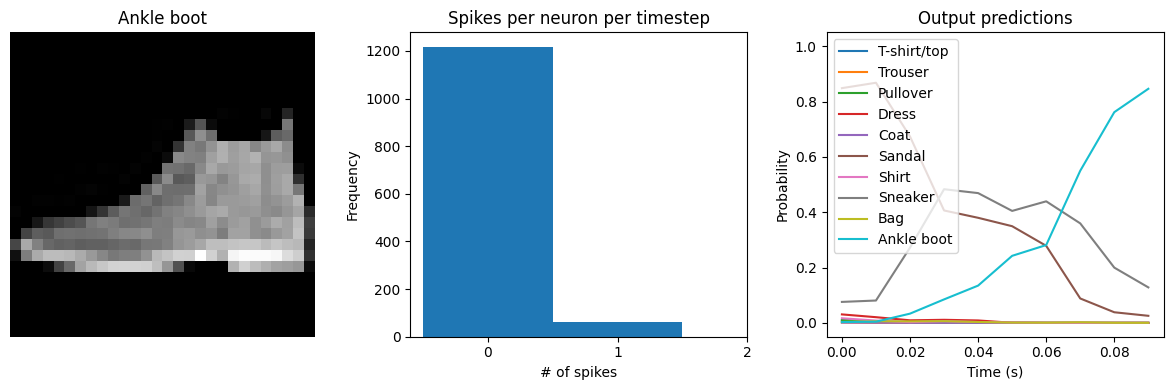

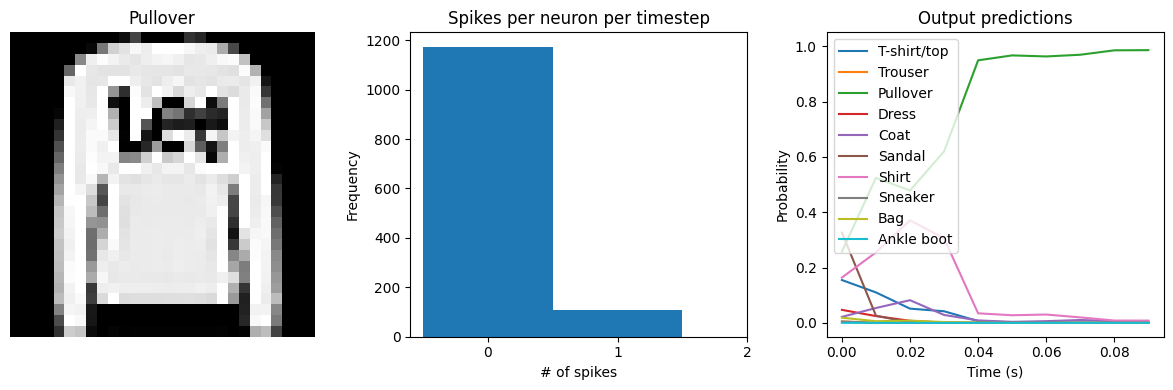

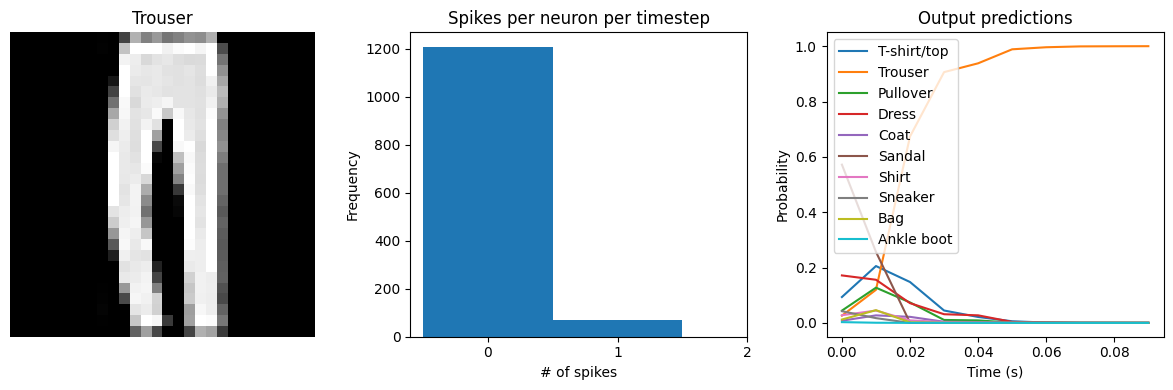

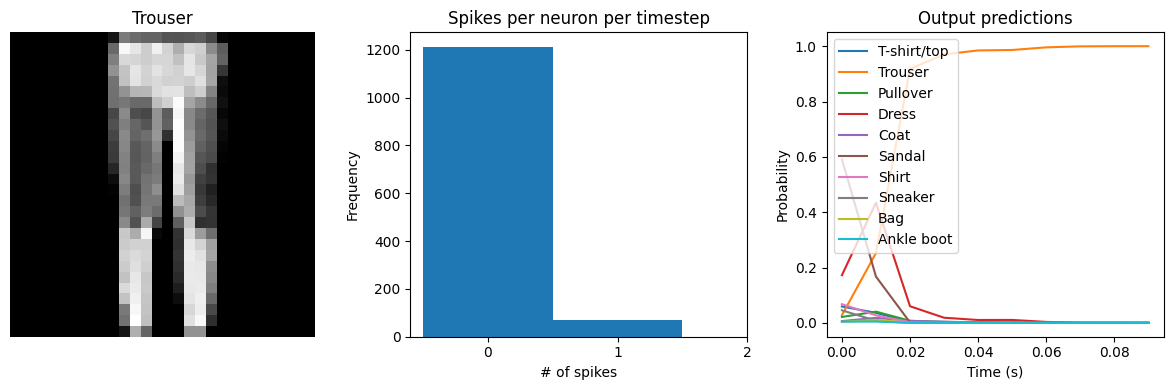

In [16]:
check_output(filtered_model)

We can see that the model performs similarly to the previous
[spiking aware training](#Spiking-aware-training) example, which makes sense since, for
a static input image, a moving average is very similar to a global average. We would
need a more complicated model, with multiple spiking layers or inputs that are changing
over time, to really see the benefits of a Lowpass layer.
The ``keras_spiking.Alpha`` layer is another lowpass-filtering layer,
which can provide better filtering of spike noise with less delay
than ``keras_spiking.Lowpass``.

## Summary

We can use `SpikingActivation` layers to convert any activation function to an
equivalent spiking implementation. Models with SpikingActivations can be trained and
evaluated in the same way as non-spiking models, thanks to the swappable
training/inference behaviour.

There are also a number of additional features that should be kept in mind in order to
optimize the performance of a spiking model:

- [Simulation time](#Simulation-time): by adjusting `dt` we can trade off temporal
  sparsity versus accuracy
- [Spiking aware training](#Spiking-aware-training): incorporating spiking dynamics on
  the forward pass can allow the model to learn weights that are more robust to spiking
  activations
- [Spike rate regularization](#Spike-rate-regularization): we can gain more control over
  spike rates by directly incorporating activity regularization into the optimization
  process
- [Lowpass filtering](#Lowpass-filtering): we can achieve better accuracy with fewer
  spikes by aggregating spike data over time